In [49]:
# Chapter 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,10)

In [50]:
# data prep
from io import StringIO
prices_str = 'date,EBAY,YHOO\n2010-01-04,23.9,17.1\n2010-01-05,23.65,17.23\n2010-01-06,23.5,17.17\n2010-01-07,23.229998,16.700001\n2010-01-08,23.509999,16.700001\n2010-01-11,23.45,16.74\n2010-01-12,23.19,16.68\n2010-01-13,23.6,16.9\n2010-01-14,22.88,17.120001000000002\n2010-01-15,22.469998,16.82\n2010-01-19,23.259999,16.75\n2010-01-20,22.23,16.379998999999998\n2010-01-21,24.129998,16.200001\n2010-01-22,23.579998,15.88\n2010-01-25,23.69,15.86\n2010-01-26,24.069999,15.99\n2010-01-27,23.969999,15.98\n2010-01-28,23.329998,15.44\n2010-01-29,23.019999,15.01\n2010-02-01,23.169999,15.05\n2010-02-02,23.079998,15.17\n2010-02-03,23.229998,15.46\n2010-02-04,22.449999,15.01\n2010-02-05,22.709999,15.19\n2010-02-08,22.49,14.99\n2010-02-09,22.369998,15.07\n2010-02-10,21.959999,14.8\n2010-02-11,22.13,15.22\n2010-02-12,21.769998,15.17\n2010-02-16,22.519998,15.41\n2010-02-17,22.68,15.44\n2010-02-18,22.84,15.54\n2010-02-19,23.419999,15.58\n2010-02-22,23.279998000000006,15.49\n2010-02-23,22.89,15.38\n2010-02-24,23.259999,15.59\n2010-02-25,23.0,15.24\n2010-02-26,23.019999,15.31\n2010-03-01,23.879998,15.79\n2010-03-02,23.99,15.73\n2010-03-03,23.509999,15.57\n2010-03-04,23.779998000000006,15.81\n2010-03-05,24.629999,16.059998999999998\n2010-03-08,24.839998,16.52\n2010-03-09,25.51,16.530001000000002\n2010-03-10,25.56,16.790001\n2010-03-11,25.439998000000006,16.530001000000002\n2010-03-12,25.969999,16.32\n2010-03-15,26.279999,16.459999\n2010-03-16,26.789999,16.360001\n2010-03-17,26.979999,16.5\n2010-03-18,27.46,16.559998999999998\n2010-03-19,27.189999,16.440001000000002\n2010-03-22,27.07,16.34\n2010-03-23,27.049998,16.030001000000002\n2010-03-24,26.939999,16.09\n2010-03-25,27.559998,16.32\n2010-03-26,27.449998,16.540001\n2010-03-29,27.279999,16.559998999999998\n2010-03-30,27.139999,16.610001\n2010-03-31,26.97,16.530001000000002\n2010-04-01,26.57,16.290001\n2010-04-05,27.37,16.51\n2010-04-06,27.27,16.92\n2010-04-07,26.849998,16.870001000000002\n2010-04-08,26.46,17.35\n2010-04-09,26.549998,17.52\n2010-04-12,26.629999,17.639999\n2010-04-13,26.639999,18.18\n2010-04-14,27.039999,18.379999\n2010-04-15,26.979999,18.969999\n2010-04-16,26.329999,18.17\n2010-04-19,26.32,18.389999\n2010-04-20,26.399998,18.379999\n2010-04-21,26.289999,17.450001\n2010-04-22,24.779999,17.719998999999994\n2010-04-23,24.55,17.639999\n2010-04-26,24.559999,17.389999\n2010-04-27,23.769999,16.92\n2010-04-28,23.99,16.75\n2010-04-29,24.24,16.969998999999998\n2010-04-30,23.779998000000006,16.530001000000002\n2010-05-03,23.909999,16.950001\n2010-05-04,23.079998,16.32\n2010-05-05,22.659999,16.49\n2010-05-06,22.269998,15.92\n2010-05-07,21.48,15.29\n2010-05-10,22.33,16.33\n2010-05-11,22.38,16.41\n2010-05-12,22.509999,16.469998999999998\n2010-05-13,22.68,16.139999\n2010-05-14,22.249999,16.389999\n2010-05-17,22.509999,16.27\n2010-05-18,22.169998,16.030001000000002\n2010-05-19,21.64,15.79\n2010-05-20,20.809998,15.1\n2010-05-21,21.42,15.48\n2010-05-24,21.359999,15.54\n2010-05-25,21.59,15.31\n2010-05-26,21.38,15.45\n2010-05-27,21.909999,15.69\n2010-05-28,21.409999,15.34\n2010-06-01,20.959999,15.02\n2010-06-02,21.249999,15.18\n2010-06-03,22.18,15.43\n2010-06-04,21.99,15.0\n2010-06-07,21.549999,14.94\n2010-06-08,21.69,14.79\n2010-06-09,21.78,14.69\n2010-06-10,22.28,15.1\n2010-06-11,22.649999,15.29\n2010-06-14,22.209999,15.17\n2010-06-15,22.39,15.65\n2010-06-16,22.13,15.49\n2010-06-17,22.099999,15.6\n2010-06-18,22.159999,15.54\n2010-06-21,21.869998,15.21\n2010-06-22,21.559999,15.09\n2010-06-23,21.34,15.23\n2010-06-24,20.859998,14.83\n2010-06-25,20.949999,14.81\n2010-06-28,20.709998,14.73\n2010-06-29,19.689999,14.04\n2010-06-30,19.61,13.84\n2010-07-01,19.639999,14.09\n2010-07-02,19.26,14.07\n2010-07-06,19.349999,14.13\n2010-07-07,19.81,14.4\n2010-07-08,19.889999,14.6\n2010-07-09,20.289999,14.89\n2010-07-12,20.22,14.94\n2010-07-13,21.009999,15.52\n2010-07-14,21.109999,15.37\n2010-07-15,21.03,15.37\n2010-07-16,20.089999,14.9\n2010-07-19,20.399999,15.1\n2010-07-20,20.789999,15.2\n2010-07-21,20.17,13.91\n2010-07-22,20.939999,13.88\n2010-07-23,21.089999,13.99\n2010-07-26,21.139999,14.15\n2010-07-27,21.039999,13.95\n2010-07-28,21.039999,13.87\n2010-07-29,20.77,13.76\n2010-07-30,20.909998,13.88\n2010-08-02,21.459999,14.0\n2010-08-03,20.97,13.94\n2010-08-04,21.099999,14.18\n2010-08-05,21.07,14.16\n2010-08-06,21.449999,14.34\n2010-08-09,21.98,14.4\n2010-08-10,21.909999,14.35\n2010-08-11,21.249999,13.87\n2010-08-12,21.59,13.85\n2010-08-13,21.499999,13.83\n2010-08-16,22.049999,13.79\n2010-08-17,22.349999,13.94\n2010-08-18,22.74,13.99\n2010-08-19,23.129998,13.85\n2010-08-20,23.369999,13.79\n2010-08-23,23.269999,13.65\n2010-08-24,22.869999,13.4\n2010-08-25,23.159999,13.26\n2010-08-26,22.73,13.21\n2010-08-27,23.179998,13.43\n2010-08-30,23.129998,13.18\n2010-08-31,23.229998,13.11\n2010-09-01,24.029998000000006,13.37\n2010-09-02,24.059999,13.51\n2010-09-03,24.129998,13.62\n2010-09-07,23.529998000000006,13.53\n2010-09-08,24.569999,13.75\n2010-09-09,24.3,13.65\n2010-09-10,24.1,13.68\n2010-09-13,24.3,13.73\n2010-09-14,24.25,13.63\n2010-09-15,24.19,14.27\n2010-09-16,23.9,14.19\n2010-09-17,24.219999,13.89\n2010-09-20,24.65,13.86\n2010-09-21,24.739998,14.18\n2010-09-22,24.34,14.04\n2010-09-23,24.25,14.17\n2010-09-24,24.739998,14.5\n2010-09-27,24.769999,14.28\n2010-09-28,24.869999,14.39\n2010-09-29,24.989998,14.34\n2010-09-30,24.4,14.17\n2010-10-01,24.459999,14.27\n2010-10-04,24.079998,14.28\n2010-10-05,24.589998,14.61\n2010-10-06,24.45,14.52\n2010-10-07,24.75,14.23\n2010-10-08,24.61,14.49\n2010-10-11,24.29,14.41\n2010-10-12,24.45,14.43\n2010-10-13,24.869999,15.25\n2010-10-14,25.279999,15.93\n2010-10-15,25.679999,16.25\n2010-10-18,25.719999,15.93\n2010-10-19,25.529999,15.49\n2010-10-20,25.66,15.8\n2010-10-21,27.199998,15.97\n2010-10-22,28.07,16.309998999999998\n2010-10-25,27.93,16.4\n2010-10-26,28.749999,16.459999\n2010-10-27,29.28,16.42\n2010-10-28,29.719998,16.4\n2010-10-29,29.859999,16.49\n2010-11-01,29.359999,16.15\n2010-11-02,30.069998,16.190001000000002\n2010-11-03,30.109999,16.17\n2010-11-04,30.149999,16.200001\n2010-11-05,30.869999,16.27\n2010-11-08,30.84,16.440001000000002\n2010-11-09,30.529998,16.969998999999998\n2010-11-10,30.929998,16.940001000000002\n2010-11-11,30.79,16.799999\n2010-11-12,30.14,16.549999\n2010-11-15,30.059999,16.6\n2010-11-16,29.769998,16.24\n2010-11-17,30.14,16.15\n2010-11-18,30.569998,16.99\n2010-11-19,30.299999,16.57\n2010-11-22,30.64,16.559998999999998\n2010-11-23,30.18,16.190001000000002\n2010-11-24,31.209999,16.41\n2010-11-26,31.149999,16.219998999999998\n2010-11-29,30.23,16.379998999999998\n2010-11-30,29.139999,15.82\n2010-12-01,29.259999,16.15\n2010-12-02,29.909999,16.33\n2010-12-03,29.609999,16.35\n2010-12-06,29.489999,16.33\n2010-12-07,29.999999,16.940001000000002\n2010-12-08,30.149999,17.02\n2010-12-09,30.349999,16.950001\n2010-12-10,30.69,17.01\n2010-12-13,30.28,16.700001\n2010-12-14,30.749999,16.629998999999998\n2010-12-15,30.19,16.450001\n2010-12-16,30.529998,16.51\n2010-12-17,29.819998,16.379998999999998\n2010-12-20,29.58,16.280001000000002\n2010-12-21,28.649999,16.6\n2010-12-22,28.57,16.629998999999998\n2010-12-23,28.32,16.719998999999998\n2010-12-27,28.309998,16.48\n2010-12-28,28.349999,16.43\n2010-12-29,28.359998,16.610001\n2010-12-30,28.13,16.76\n2010-12-31,27.829999,16.629998999999998\n2011-01-03,28.68,16.75\n2011-01-04,28.47,16.59\n2011-01-05,28.73,16.91\n2011-01-06,28.42,17.059998999999998\n2011-01-07,27.699999,16.9\n2011-01-10,28.259998,16.6\n2011-01-11,28.359998,16.58\n2011-01-12,28.83,16.65\n2011-01-13,28.709998,16.75\n2011-01-14,29.18,16.809998999999998\n2011-01-18,29.449999,16.5\n2011-01-19,29.099999,16.309998999999998\n2011-01-20,30.779998,16.23\n2011-01-21,30.019998,15.97\n2011-01-24,30.509999,16.09\n2011-01-25,30.909999,16.02\n2011-01-26,31.059999,15.57\n2011-01-27,30.959999,16.200001\n2011-01-28,30.309999,15.83\n2011-01-31,30.359999,16.120001000000002\n2011-02-01,31.64,16.379998999999998\n2011-02-02,31.879998,16.57\n2011-02-03,32.05,16.690001000000002\n2011-02-04,32.209999,16.790001\n2011-02-07,32.239998,16.799999\n2011-02-08,32.639998,16.6\n2011-02-09,31.95,16.43\n2011-02-10,34.489999,16.620001000000002\n2011-02-11,34.51,16.85\n2011-02-14,33.86,16.889999\n2011-02-15,34.46,17.200001\n2011-02-16,34.46,17.76\n2011-02-17,34.689999,17.77\n2011-02-18,34.529999,17.66\n2011-02-22,33.649998,16.91\n2011-02-23,32.85,16.58\n2011-02-24,33.089998,16.370001000000002\n2011-02-25,33.629999,16.5\n2011-02-28,33.51,16.4\n2011-03-01,32.289998,16.1\n2011-03-02,32.679999,16.629998999999998\n2011-03-03,32.929999,16.860001\n2011-03-04,32.009999,17.08\n2011-03-07,31.5,16.700001\n2011-03-08,31.669999,16.940001000000002\n2011-03-09,31.329998,17.65\n2011-03-10,31.079998,17.059998999999998\n2011-03-11,30.919999,17.42\n2011-03-14,30.769998,17.309998999999998\n2011-03-15,30.44,16.33\n2011-03-16,29.73,15.91\n2011-03-17,29.949999,15.86\n2011-03-18,30.469998,16.030001000000002\n2011-03-21,30.579998,16.290001\n2011-03-22,30.219998,16.360001\n2011-03-23,30.669998,16.129998999999998\n2011-03-24,31.759999,16.83\n2011-03-25,31.7,16.959999\n2011-03-28,30.34,16.58\n2011-03-29,31.079998,16.75\n2011-03-30,31.629998,16.74\n2011-03-31,31.04,16.68\n2011-04-01,31.359999,16.84\n2011-04-04,31.39,16.870001000000002\n2011-04-05,31.84,17.110001\n2011-04-06,31.85,17.049999\n2011-04-07,31.529998,17.0\n2011-04-08,31.14,16.77\n2011-04-11,31.19,16.59\n2011-04-12,30.699999,16.360001\n2011-04-13,30.669998,16.639999\n2011-04-14,30.849999,16.690001000000002\n2011-04-15,31.609999,16.620001000000002\n2011-04-18,31.149999,16.35\n2011-04-19,31.149999,16.120001000000002\n2011-04-20,31.759999,16.870001000000002\n2011-04-21,31.95,16.85\n2011-04-25,32.96,17.110001\n2011-04-26,33.079999,17.280001000000002\n2011-04-27,34.029999,17.26\n2011-04-28,33.999998,17.51\n2011-04-29,34.389999,17.700001\n2011-05-02,33.639998,18.139999\n2011-05-03,33.539998,17.92\n2011-05-04,33.01,18.200001\n2011-05-05,32.679999,18.43\n2011-05-06,32.719999,18.65\n2011-05-09,33.119999,18.559999\n2011-05-10,33.929999,18.549999\n2011-05-11,33.31,17.200001\n2011-05-12,33.579999,17.17\n2011-05-13,33.569999,16.549999\n2011-05-16,32.369999,15.81\n2011-05-17,32.65,16.0\n2011-05-18,32.879999,15.96\n2011-05-19,32.9,16.35\n2011-05-20,32.479997999999995,16.299999\n2011-05-23,31.629998,16.059998999999998\n2011-05-24,30.819998,16.139999\n2011-05-25,30.699999,16.15\n2011-05-26,30.659999,15.98\n2011-05-27,30.679998,16.02\n2011-05-31,31.169999,16.549999\n2011-06-01,30.64,15.85\n2011-06-02,31.279998,16.02\n2011-06-03,30.299999,15.68\n2011-06-06,29.559999,15.45\n2011-06-07,29.919998,15.45\n2011-06-08,30.569998,15.1\n2011-06-09,30.659999,15.22\n2011-06-10,29.959999,15.2\n2011-06-13,29.859999,15.16\n2011-06-14,29.759999,15.2\n2011-06-15,28.659998,14.81\n2011-06-16,28.47,14.78\n2011-06-17,28.83,14.7\n2011-06-20,28.82,14.99\n2011-06-21,29.78,15.35\n2011-06-22,29.349999,15.23\n2011-06-23,29.249999,15.08\n2011-06-24,28.349999,14.89\n2011-06-27,28.709998,14.88\n2011-06-28,28.959998,14.95\n2011-06-29,30.859999,14.89\n2011-06-30,32.269999,15.04\n2011-07-01,32.739998,15.45\n2011-07-05,32.639998,15.49\n2011-07-06,32.919999,15.72\n2011-07-07,33.329999,15.81\n2011-07-08,33.419999,15.61\n2011-07-11,32.91,15.05\n2011-07-12,32.259999,14.86\n2011-07-13,32.379998,14.91\n2011-07-14,32.189998,14.63\n2011-07-15,32.809999,14.69\n2011-07-18,32.7,14.42\n2011-07-19,33.76,14.59\n2011-07-20,33.169999,13.48\n2011-07-21,33.439998,13.59\n2011-07-22,33.499998,13.98\n2011-07-25,33.799997999999995,13.69\n2011-07-26,34.419999,13.94\n2011-07-27,33.36,13.59\n2011-07-28,33.35,13.5\n2011-07-29,32.75,13.1\n2011-08-01,33.019999,13.1\n2011-08-02,31.75,12.76\n2011-08-03,32.25,13.02\n2011-08-04,30.04,12.0\n2011-08-05,29.299999,11.74\n2011-08-08,26.949998,11.09\n2011-08-09,30.159999,12.09\n2011-08-10,29.149999,11.77\n2011-08-11,30.199999,12.86\n2011-08-12,30.529998,13.59\n2011-08-15,30.89,13.47\n2011-08-16,30.359999,13.48\n2011-08-17,30.249999,13.47\n2011-08-18,27.939999,12.96\n2011-08-19,27.16,12.92\n2011-08-22,27.36,12.84\n2011-08-23,28.92,13.35\n2011-08-24,29.049999,13.15\n2011-08-25,28.33,12.87\n2011-08-26,29.459999,12.74\n2011-08-29,30.49,13.68\n2011-08-30,30.949999,13.84\n2011-08-31,30.869999,13.61\n2011-09-01,30.39,13.35\n2011-09-02,29.409999,12.87\n2011-09-06,29.269998,12.91\n2011-09-07,29.749999,13.61\n2011-09-08,30.509999,14.44\n2011-09-09,28.459998,14.48\n2011-09-12,29.419998,14.26\n2011-09-13,29.399999,14.26\n2011-09-14,30.14,14.55\n2011-09-15,32.039998,14.89\n2011-09-16,33.689998,14.97\n2011-09-19,33.1,14.61\n2011-09-20,32.729999,14.36\n2011-09-21,32.239998,13.96\n2011-09-22,31.669999,13.99\n2011-09-23,32.079998,14.71\n2011-09-26,32.55,14.75\n2011-09-27,32.519999,14.54\n2011-09-28,31.64,14.19\n2011-09-29,30.669998,13.42\n2011-09-30,29.489999,13.17\n2011-10-03,28.109998,13.53\n2011-10-04,29.349999,14.46\n2011-10-05,30.529998,15.92\n2011-10-06,31.44,15.65\n2011-10-07,31.069999,15.47\n2011-10-10,32.3,15.84\n2011-10-11,32.829999,15.86\n2011-10-12,32.75,15.77\n2011-10-13,32.739998,15.93\n2011-10-14,33.689998,15.91\n2011-10-17,33.219999,15.7\n2011-10-18,33.869999,15.47\n2011-10-19,33.179999,15.94\n2011-10-20,32.15,16.18\n2011-10-21,32.119999,16.120001000000002\n2011-10-24,32.369999,16.709999\n2011-10-25,31.669999,16.24\n2011-10-26,31.079998,16.299999\n2011-10-27,32.289998,16.629998999999998\n2011-10-28,33.25,16.559998999999998\n2011-10-31,31.829998,15.64\n2011-11-01,30.89,14.93\n2011-11-02,31.779998,15.1\n2011-11-03,33.05,15.48\n2011-11-04,32.709999,15.24\n2011-11-07,32.469999,15.69\n2011-11-08,32.919999,15.97\n2011-11-09,31.179998,15.92\n2011-11-10,30.749999,15.95\n2011-11-11,31.759999,16.27\n2011-11-14,31.409999,16.0\n2011-11-15,31.45,15.93\n2011-11-16,30.54,15.72\n2011-11-17,29.649999,15.34\n2011-11-18,29.809999,15.38\n2011-11-21,28.749999,14.99\n2011-11-22,29.039999,14.97\n2011-11-23,28.549999,14.94\n2011-11-25,28.23,15.1\n2011-11-28,29.659999,15.35\n2011-11-29,28.749999,15.7\n2011-11-30,29.59,15.71\n2011-12-01,29.68,16.23\n2011-12-02,29.599999,16.049999\n2011-12-05,30.699999,15.89\n2011-12-06,30.899999,15.84\n2011-12-07,30.94,15.62\n2011-12-08,31.029998,15.61\n2011-12-09,31.64,15.94\n2011-12-12,31.129998,15.47\n2011-12-13,30.84,15.42\n2011-12-14,30.269998,15.02\n2011-12-15,29.599999,15.16\n2011-12-16,30.399999,14.96\n2011-12-19,29.769998,14.62\n2011-12-20,30.629998,15.11\n2011-12-21,30.34,15.99\n2011-12-22,30.609999,16.0\n2011-12-23,30.84,16.190001000000002\n2011-12-27,30.919999,16.09\n2011-12-28,30.409999,15.78\n2011-12-29,30.359999,16.129998999999998\n2011-12-30,30.33,16.129998999999998\n2012-01-03,31.34,16.290001\n2012-01-04,30.159999,15.78\n2012-01-05,30.709999,15.64\n2012-01-06,30.629998,15.52\n2012-01-09,30.509999,15.46\n2012-01-10,31.2,15.51\n2012-01-11,31.519999,15.53\n2012-01-12,31.579998,15.66\n2012-01-13,30.619998,15.48\n2012-01-17,30.529998,15.43\n2012-01-18,30.34,15.92\n2012-01-19,31.509999,16.120001000000002\n2012-01-20,31.929998,15.96\n2012-01-23,31.989998,15.68\n2012-01-24,31.95,15.69\n2012-01-25,31.939998,15.56\n2012-01-26,31.709999,15.53\n2012-01-27,31.85,15.74\n2012-01-30,31.579998,15.55\n2012-01-31,31.6,15.47\n2012-02-01,32.2,15.73\n2012-02-02,32.7,15.72\n2012-02-03,32.95,15.92\n2012-02-06,32.639998,15.82\n2012-02-07,32.869999,15.83\n2012-02-08,33.05,15.78\n2012-02-09,33.26,16.0\n2012-02-10,33.029999,16.139999\n2012-02-13,33.16,16.120001000000002\n2012-02-14,32.96,15.37\n2012-02-15,33.31,15.12\n2012-02-16,34.51,15.36\n2012-02-17,35.059998,15.01\n2012-02-21,35.139999,14.75\n2012-02-22,34.67,14.5\n2012-02-23,36.02,14.78\n2012-02-24,36.359998,14.89\n2012-02-27,36.559998,14.86\n2012-02-28,36.619998,14.9\n2012-02-29,35.739999,14.83\n2012-03-01,36.37,14.93\n2012-03-02,36.249999,14.72\n2012-03-05,35.72,14.62\n2012-03-06,35.109998,14.42\n2012-03-07,35.589999,14.62\n2012-03-08,35.779999,14.62\n2012-03-09,36.249999,14.63\n2012-03-12,36.18,14.49\n2012-03-13,37.33,14.55\n2012-03-14,37.619998,14.63\n2012-03-15,36.83,14.89\n2012-03-16,37.689999,15.18\n2012-03-19,37.79,15.15\n2012-03-20,37.389999,15.41\n2012-03-21,37.419998,15.51\n2012-03-22,37.619998,15.49\n2012-03-23,37.089999,15.39\n2012-03-26,38.079998,15.54\n2012-03-27,37.869998,15.43\n2012-03-28,37.239999,15.32\n2012-03-29,36.989999,15.3\n2012-03-30,36.899999,15.22\n2012-04-02,36.589999,15.46\n2012-04-03,36.63,15.18\n2012-04-04,35.729999,15.27\n2012-04-05,35.62,15.07\n2012-04-09,36.299999,15.1\n2012-04-10,35.47,14.99\n2012-04-11,35.759998,14.88\n2012-04-12,36.459998,15.06\n2012-04-13,36.12,14.87\n2012-04-16,35.499998,14.79\n2012-04-17,36.079999,15.01\n2012-04-18,35.87,15.49\n2012-04-19,40.619997,15.4\n2012-04-20,40.29,15.6\n2012-04-23,39.649997,15.33\n2012-04-24,39.299997,15.43\n2012-04-25,39.859999,15.5\n2012-04-26,41.049998,15.53\n2012-04-27,41.229999,15.57\n2012-04-30,41.019997,15.54\n2012-05-01,40.749998,15.63\n2012-05-02,41.16,15.67\n2012-05-03,40.379998,15.4\n2012-05-04,39.44,15.15\n2012-05-07,40.070001,15.35\n2012-05-08,40.19,15.36\n2012-05-09,40.559999,15.3\n2012-05-10,41.21,15.44\n2012-05-11,40.74,15.19\n2012-05-14,40.249997,15.5\n2012-05-15,40.049997,15.4\n2012-05-16,39.859999,15.28\n2012-05-17,39.029998,14.87\n2012-05-18,38.359999,15.42\n2012-05-21,39.509999,15.58\n2012-05-22,39.220001,15.29\n2012-05-23,39.679998,15.38\n2012-05-24,39.659999,15.35\n2012-05-25,40.349997,15.36\n2012-05-29,41.490001,15.47\n2012-05-30,39.59,15.25\n2012-05-31,39.19,15.24\n2012-06-01,38.820001,14.92\n2012-06-04,39.159999,15.01\n2012-06-05,39.759999,15.1\n2012-06-06,40.94,15.36\n2012-06-07,40.899998,15.36\n2012-06-08,41.049998,15.65\n2012-06-11,40.929999,15.3\n2012-06-12,40.909999,15.47\n2012-06-13,40.169997,15.34\n2012-06-14,40.129998,15.36\n2012-06-15,40.669997,15.36\n2012-06-18,42.490001,15.49\n2012-06-19,43.499998,15.65\n2012-06-20,42.949998,15.74\n2012-06-21,41.829999,15.52\n2012-06-22,42.799998,15.61\n2012-06-25,41.81,15.44\n2012-06-26,42.499998,15.35\n2012-06-27,42.290001,15.52\n2012-06-28,40.779999,15.45\n2012-06-29,42.01,15.83\n2012-07-02,41.219997,15.84\n2012-07-03,41.199998,15.98\n2012-07-05,40.929999,15.85\n2012-07-06,40.409999,15.78\n2012-07-09,40.679998,15.75\n2012-07-10,39.679998,15.82\n2012-07-11,39.129998,15.8\n2012-07-12,39.309999,15.69\n2012-07-13,39.949997,15.74\n2012-07-16,38.599997,15.65\n2012-07-17,39.070001,15.6\n2012-07-18,40.459999,15.7\n2012-07-19,43.949998,15.73\n2012-07-20,44.849999,15.92\n2012-07-23,44.239997,15.76\n2012-07-24,43.519997,15.43\n2012-07-25,43.189996,15.5\n2012-07-26,43.789997,15.8\n2012-07-27,45.219998,16.110001\n2012-07-30,45.599999,15.98\n2012-07-31,44.299999,15.84\n2012-08-01,43.889997,15.99\n2012-08-02,43.769998,15.75\n2012-08-03,44.499999,15.97\n2012-08-06,44.769998,16.040001\n2012-08-07,45.610001,16.219998999999998\n2012-08-08,44.939997,16.17\n2012-08-09,44.269998,16.01\n2012-08-10,43.989997,15.15\n2012-08-13,45.319998,15.02\n2012-08-14,45.360001,14.73\n2012-08-15,44.98,14.76\n2012-08-16,45.789997,14.99\n2012-08-17,46.869998,15.03\n2012-08-20,46.399999,14.96\n2012-08-21,45.849999,14.97\n2012-08-22,46.999999,14.92\n2012-08-23,46.809997,14.87\n2012-08-24,47.099999,14.92\n2012-08-27,46.98,14.85\n2012-08-28,46.939997,14.72\n2012-08-29,47.489998,14.84\n2012-08-30,46.549999,14.67\n2012-08-31,47.469999,14.65\n2012-09-04,47.359997,14.89\n2012-09-05,47.159997,15.09\n2012-09-06,48.909997,15.11\n2012-09-07,49.239998,15.22\n2012-09-10,48.530001,15.11\n2012-09-11,48.330001,15.16\n2012-09-12,47.989998,15.4\n2012-09-13,48.880001,15.6\n2012-09-14,49.969999,15.77\n2012-09-17,50.479997,15.68\n2012-09-18,49.959997,15.91\n2012-09-19,50.389998,15.86\n2012-09-20,50.079997,15.79\n2012-09-21,49.469999,15.74\n2012-09-24,49.309997,16.0\n2012-09-25,48.030001,15.68\n2012-09-26,47.539998,15.61\n2012-09-27,49.119999,16.040001\n2012-09-28,48.369999,15.98\n2012-10-01,48.230001,15.83\n2012-10-02,48.4,15.94\n2012-10-03,48.589998,16.209999\n2012-10-04,49.489998,16.27\n2012-10-05,48.730001,16.09\n2012-10-08,47.919999,16.030001000000002\n2012-10-09,46.219998,15.85\n2012-10-10,46.759997,15.83\n2012-10-11,47.489998,15.92\n2012-10-12,47.85,15.88\n2012-10-15,47.399999,15.68\n2012-10-16,48.239998,15.92\n2012-10-17,48.2,16.09\n2012-10-18,50.829997,16.0\n2012-10-19,49.969999,15.84\n2012-10-22,50.15,15.77\n2012-10-23,49.35,16.67\n2012-10-24,48.880001,16.549999\n2012-10-25,48.339998,16.610001\n2012-10-26,49.509997,16.790001\n2012-10-31,48.259997,16.84\n2012-11-01,49.219999,16.950001\n2012-11-02,48.689998,17.110001\n2012-11-05,49.35,17.370001000000002\n2012-11-06,49.489998,17.459999\n2012-11-07,48.4,17.389999\n2012-11-08,47.869999,17.24\n2012-11-09,47.73,17.26\n2012-11-12,47.469999,17.51\n2012-11-13,47.739998,17.85\n2012-11-14,46.469998,17.83\n2012-11-15,46.519998,17.889999\n2012-11-16,47.259997,17.860001\n2012-11-19,47.919999,18.360001\n2012-11-20,48.259997,18.24\n2012-11-21,48.630001,18.4\n2012-11-23,49.009997,18.57\n2012-11-26,51.400001,18.76\n2012-11-27,51.15,18.93\n2012-11-28,51.47,18.91\n2012-11-29,52.199996,18.870001\n2012-11-30,52.82,18.77\n2012-12-03,52.039999,18.549999\n2012-12-04,51.989999,18.93\n2012-12-05,52.02,18.889999\n2012-12-06,51.989999,19.200001\n2012-12-07,51.739999,19.200001\n2012-12-10,51.17,19.43\n2012-12-11,51.989999,19.52\n2012-12-12,51.859998,19.379999\n2012-12-13,51.02,19.35\n2012-12-14,50.359998,19.639999\n2012-12-17,51.309998,19.690001\n2012-12-18,51.909998,19.620001\n2012-12-19,51.339999,19.6\n2012-12-20,52.139999,19.690001\n2012-12-21,51.350001,19.35\n2012-12-24,51.079997,19.65\n2012-12-26,50.239998,19.57\n2012-12-27,50.289998,19.6\n2012-12-28,49.809997,19.5\n2012-12-31,51.0,19.9\n2013-01-02,53.589999,20.08\n2013-01-03,52.449996,19.780001\n2013-01-04,52.779997,19.860001\n2013-01-07,53.509998,19.4\n2013-01-08,52.679997,19.66\n2013-01-09,52.759998,19.32\n2013-01-10,52.999996,18.99\n2013-01-11,53.699997,19.290001\n2013-01-14,53.179997,19.43\n2013-01-15,52.509998,19.52\n2013-01-16,52.899996,20.07\n2013-01-17,54.17,20.129999\n2013-01-18,54.209999,20.02\n2013-01-22,53.37,19.9\n2013-01-23,53.379997,20.110001\n2013-01-24,55.19,20.440001\n2013-01-25,56.529998,20.370001\n2013-01-28,55.949997,20.309999\n2013-01-29,55.659999,19.700001\n2013-01-30,55.779998,20.120001\n2013-01-31,55.969996,19.629999\n2013-02-01,57.209999,19.76\n2013-02-04,55.69,19.34\n2013-02-05,56.419996,19.66\n2013-02-06,56.109999,19.85\n2013-02-07,56.129998,20.32\n2013-02-08,56.619997,20.5\n2013-02-11,56.409999,20.9\n2013-02-12,56.779998,21.209999\n2013-02-13,57.049998,21.15\n2013-02-14,56.829998,21.18\n2013-02-15,56.699997,21.02\n2013-02-19,56.679998,21.290001\n2013-02-20,55.529998,20.92\n2013-02-21,54.620001,20.83\n2013-02-22,55.019996,21.219999\n2013-02-25,53.609998,20.73\n2013-02-26,53.82,20.76\n2013-02-27,54.149997,21.16\n2013-02-28,54.709999,21.309999\n2013-03-01,54.899997,21.940001\n2013-03-04,55.479998,22.700001\n2013-03-05,55.259999,22.950001\n2013-03-06,53.57,22.799999\n2013-03-07,52.979997,22.700001\n2013-03-08,53.129997,22.9\n2013-03-11,52.759998,22.6\n2013-03-12,52.959998,22.4\n2013-03-13,50.979997,22.34\n2013-03-14,51.800001,22.43\n2013-03-15,50.409998,22.07\n2013-03-18,50.109997,22.01\n2013-03-19,51.1,22.17\n2013-03-20,52.42,22.1\n2013-03-21,52.92,22.860001\n2013-03-22,53.27,23.26\n2013-03-25,51.309998,23.379999\n2013-03-26,52.089999,23.59\n2013-03-27,52.07,23.59\n2013-03-28,54.22,23.530001\n2013-04-01,55.709999,23.5\n2013-04-02,56.159999,23.780001\n2013-04-03,55.499997,23.379999\n2013-04-04,55.79,23.52\n2013-04-05,55.519996,23.299999\n2013-04-08,55.86999599999999,23.48\n2013-04-09,56.069996,23.83\n2013-04-10,57.299998,24.200001\n2013-04-11,57.779999,24.49\n2013-04-12,57.309999,24.690001\n2013-04-15,55.84,23.98\n2013-04-16,57.009999,23.790001\n2013-04-17,56.099997,23.700001\n2013-04-18,52.82,23.26\n2013-04-19,52.389999,23.469999\n2013-04-22,51.629997,23.950001\n2013-04-23,52.489999,24.379999\n2013-04-24,52.97,24.75\n2013-04-25,52.359998,25.200001\n2013-04-26,52.539999,24.68\n2013-04-29,52.839999,24.43\n2013-04-30,52.389999,24.73\n2013-05-01,52.399996,24.299999\n2013-05-02,53.549997,24.969999\n2013-05-03,54.209999,25.07\n2013-05-06,54.089999,25.17\n2013-05-07,53.939999,26.07\n2013-05-08,54.959999,26.41\n2013-05-09,55.169996,26.24\n2013-05-10,55.649997,26.83\n2013-05-13,55.329998,26.389999\n2013-05-14,56.269996,26.639999\n2013-05-15,56.649997,27.34\n2013-05-16,55.799997,26.58\n2013-05-17,56.709999,26.52\n2013-05-20,55.949997,26.58\n2013-05-21,54.949997,27.0\n2013-05-22,54.399997,26.540001\n2013-05-23,54.479998,26.02\n2013-05-24,54.64,26.33\n2013-05-28,55.529998,26.07\n2013-05-29,55.049997,25.809999\n2013-05-30,55.099997,26.33\n2013-05-31,54.099997,26.299999\n2013-06-03,53.409998,26.389999\n2013-06-04,52.589999,26.26\n2013-06-05,51.359998,25.75\n2013-06-06,51.52,26.209999\n2013-06-07,51.450001,27.040001\n2013-06-10,53.249996,26.74\n2013-06-11,52.049996,26.4\n2013-06-12,50.75,25.889999\n2013-06-13,51.479997,26.370001\n2013-06-14,51.289999,26.280001\n2013-06-17,52.07,26.540001\n2013-06-18,52.559998,26.66\n2013-06-19,52.229997,26.24\n2013-06-20,50.739999,25.35\n2013-06-21,51.129997,25.190001\n2013-06-24,50.819999,24.07\n2013-06-25,51.639999,24.959999\n2013-06-26,51.329997,25.290001\n2013-06-27,52.139999,25.469999\n2013-06-28,51.72,25.129999\n2013-07-01,52.899996,25.24\n2013-07-02,53.329997,24.99\n2013-07-03,53.17,25.59\n2013-07-05,53.849997,25.68\n2013-07-08,53.709998,25.530001\n2013-07-09,54.49,26.68\n2013-07-10,54.879998,26.559999\n2013-07-11,55.879998,27.040001\n2013-07-12,57.04,27.23\n2013-07-15,56.449997,27.34\n2013-07-16,56.809999,26.879999\n2013-07-17,57.379999,29.66\n2013-07-18,53.52,29.66\n2013-07-19,52.189999,29.110001\n2013-07-22,52.309998,27.860001\n2013-07-23,51.639999,27.360001\n2013-07-24,52.099996,27.84\n2013-07-25,51.500001,28.27\n2013-07-26,52.249996,28.110001\n2013-07-29,51.639999,27.93\n2013-07-30,51.979997,28.049999\n2013-07-31,51.689999,28.09\n2013-08-01,52.409998,27.959999\n2013-08-02,52.539999,27.65\n2013-08-05,52.709998,27.67\n2013-08-06,53.699997,27.32\n2013-08-07,53.009998,27.389999\n2013-08-08,53.57,27.48\n2013-08-09,53.329997,27.68\n2013-08-12,53.279997,28.35\n2013-08-13,54.12,28.34\n2013-08-14,54.229998,28.049999\n2013-08-15,53.179997,27.139999\n2013-08-16,52.92,27.32\n2013-08-19,52.07,26.91\n2013-08-20,51.989999,27.120001\n2013-08-21,50.959998,27.059999\n2013-08-22,51.079997,27.9\n2013-08-23,51.650001,27.99\n2013-08-26,51.959998,27.700001\n2013-08-27,50.609998,27.0\n2013-08-28,50.429997,27.110001\n2013-08-29,50.989999,27.299999\n2013-08-30,49.989998,27.120001\n2013-09-03,50.319999,27.780001\n2013-09-04,51.450001,28.07\n2013-09-05,51.950001,28.23\n2013-09-06,52.829997,28.17\n2013-09-09,52.67,29.24\n2013-09-10,53.489999,29.48\n2013-09-11,54.279998,29.190001\n2013-09-12,54.029998,29.65\n2013-09-13,53.82,29.26\n2013-09-16,53.649997,29.620001\n2013-09-17,54.629998,30.0\n2013-09-18,54.679998,30.440001\n2013-09-19,54.449997,31.030001\n2013-09-20,54.949997,30.93\n2013-09-23,54.759999,30.26\n2013-09-24,55.169996,31.27\n2013-09-25,54.209999,31.34\n2013-09-26,56.64,32.75\n2013-09-27,55.779998,33.549999\n2013-09-30,55.799997,33.169998\n2013-10-01,55.969996,34.310001\n2013-10-02,55.629998,34.139999\n2013-10-03,54.909999,33.880001\n2013-10-04,55.579998,34.889999\n2013-10-07,54.57,34.139999\n2013-10-08,52.97,32.93\n2013-10-09,52.329997,33.009998\n2013-10-10,53.42,33.869999\n2013-10-11,54.37,34.150002\n2013-10-14,54.770001,34.0\n2013-10-15,53.97,33.380001\n2013-10-16,53.52,33.09\n2013-10-17,51.379997,32.740002000000004\n2013-10-18,52.199996,33.43\n2013-10-21,51.939999,34.060001\n2013-10-22,51.829997,33.939999\n2013-10-23,51.729997,33.099998\n2013-10-24,52.339999,33.080002\n2013-10-25,51.639999,32.25\n2013-10-28,51.97,32.349998\n2013-10-29,53.339999,33.169998\n2013-10-30,52.729997,32.57\n2013-10-31,52.709998,32.939999\n2013-11-01,51.939999,33.18\n2013-11-04,51.37,33.189999\n2013-11-05,51.079997,32.970001\n2013-11-06,53.279997,32.880001\n2013-11-07,52.57,32.110001000000004\n2013-11-08,52.999996,33.119999\n2013-11-11,52.82,33.82\n2013-11-12,52.829997,34.07\n2013-11-13,53.029997,35.099998\n2013-11-14,52.879997,35.689999\n2013-11-15,52.599996,35.470001\n2013-11-18,52.079997,34.98\n2013-11-19,52.129997,34.630001\n2013-11-20,50.389998,35.619999\n2013-11-21,50.209997,36.299999\n2013-11-22,50.329997,36.490002\n2013-11-25,49.039998,36.290001\n2013-11-26,48.759997,36.639999\n2013-11-27,49.3,36.959999\n2013-11-29,50.519999,36.98\n2013-12-02,51.350001,37.009998\n2013-12-03,51.929997,36.560001\n2013-12-04,51.089999,38.130001\n2013-12-05,51.409998,38.869999\n2013-12-06,52.009998,38.860001\n2013-12-09,51.689999,38.869999\n2013-12-10,51.92,40.220001\n2013-12-11,51.37,39.16\n2013-12-12,51.37,39.349998\n2013-12-13,51.550001,39.73\n2013-12-16,53.109998,39.73\n2013-12-17,52.579997,39.509998\n2013-12-18,53.129997,40.040001\n2013-12-19,53.399997,40.200001\n2013-12-20,54.579998,40.119999\n2013-12-23,55.299997,40.77\n2013-12-24,55.169996,40.849998\n2013-12-26,54.059999,40.650002\n2013-12-27,54.179998,40.490002\n2013-12-30,54.009999,40.200001\n2013-12-31,54.870001,40.439999\n2014-01-02,53.939995,39.59\n2014-01-03,53.259998,40.119999\n2014-01-06,51.779997,39.93\n2014-01-07,52.869995,40.919998\n2014-01-08,52.369995,41.02\n2014-01-09,52.07,40.919998\n2014-01-10,52.159998,41.23\n2014-01-13,52.539999,39.990002\n2014-01-14,52.959998,41.139999\n2014-01-15,53.789999,41.07\n2014-01-16,53.739999,40.34\n2014-01-17,53.200001,40.009998\n2014-01-21,54.150001,39.52\n2014-01-22,54.409999,40.18\n2014-01-23,54.939995,39.389999\n2014-01-24,54.36999599999999,37.91\n2014-01-27,52.879997,36.650002\n2014-01-28,53.159998,38.220001\n2014-01-29,52.189999,34.889999\n2014-01-30,53.179997,35.310001\n2014-01-31,53.200001,36.009998\n2014-02-03,52.389999,34.900002\n2014-02-04,52.909998,35.66\n2014-02-05,53.52,35.49000200000001\n2014-02-06,54.36999599999999,36.240002\n2014-02-07,54.59,37.23\n2014-02-10,53.779998,37.759998\n2014-02-11,54.309999,38.5\n2014-02-12,54.830002,38.110001\n2014-02-13,54.919996,38.52\n2014-02-14,54.770001,38.23\n2014-02-18,55.150002,38.310001\n2014-02-19,54.74,37.810001\n2014-02-20,54.959999,37.790001\n2014-02-21,54.59,37.290001\n2014-02-24,56.299997,37.419998\n2014-02-25,56.150002,37.259998\n2014-02-26,57.34,37.619999\n2014-02-27,58.340001,38.470001\n2014-02-28,58.769997,38.669998\n2014-03-03,58.31,38.25\n2014-03-04,59.06,39.630001\n2014-03-05,58.86,39.5\n2014-03-06,59.299998,39.66\n2014-03-07,59.06,38.700001\n2014-03-10,58.220001,38.049999\n2014-03-11,57.54,37.560001\n2014-03-12,57.979999,37.5\n2014-03-13,56.699997,37.23\n2014-03-14,56.74,37.599998\n2014-03-17,57.419997,39.110001\n2014-03-18,57.84,39.450001\n2014-03-19,57.299998,38.610001\n2014-03-20,57.119997,37.77\n2014-03-21,56.959999,37.939999\n2014-03-24,56.54,36.68\n2014-03-25,56.329998,35.93\n2014-03-26,55.599997,35.450001\n2014-03-27,55.179998,35.59\n2014-03-28,55.189995,35.900002\n2014-03-31,55.24,35.900002\n2014-04-01,56.04,36.490002\n2014-04-02,55.449997,36.639999\n2014-04-03,54.580002,35.759998\n2014-04-04,53.999997,34.259998\n2014-04-07,52.950001,33.07\n2014-04-08,54.799997,33.830002\n2014-04-09,55.89,34.869999\n2014-04-10,54.080002,33.400002\n2014-04-11,53.459998,32.869999\n2014-04-14,53.979998,33.450001\n2014-04-15,53.900001,34.209999\n2014-04-16,54.689995,36.349998\n2014-04-17,54.970001,36.380001\n2014-04-21,54.929998,36.400002\n2014-04-22,55.470001,36.139999\n2014-04-23,54.939995,35.439999\n2014-04-24,54.84,35.24000200000001\n2014-04-25,53.72,34.48\n2014-04-28,53.639999,33.990002000000004\n2014-04-29,54.54,35.830002\n2014-04-30,51.830002,35.950001\n2014-05-01,51.689999,36.509998\n2014-05-02,52.009998,36.869999\n2014-05-05,51.999996,36.91\n2014-05-06,50.95,36.490002\n2014-05-07,50.569999,34.07\n2014-05-08,50.259997,33.919998\n2014-05-09,50.539998,33.759998\n2014-05-12,51.330001,34.450001\n2014-05-13,51.580001,34.400002\n2014-05-14,51.650001,34.169998\n2014-05-15,51.359998,33.799999\n2014-05-16,51.950001,33.41\n2014-05-19,52.330002,33.889999\n2014-05-20,51.959998,33.869999\n2014-05-21,51.88000200000001,34.360001000000004\n2014-05-22,51.500001,34.700001\n2014-05-23,52.02,35.02\n2014-05-27,51.77,35.119999\n2014-05-28,50.389998,34.779999\n2014-05-29,50.139998,34.900002\n2014-05-30,50.729997,34.650002\n2014-06-02,50.489998,34.869999\n2014-06-03,50.419995,34.650002\n2014-06-04,50.45,34.73\n2014-06-05,50.580001,34.939999\n2014-06-06,49.7,35.919998\n2014-06-09,49.580001,36.040001\n2014-06-10,48.25,36.310001\n2014-06-11,48.830001,36.630001\n2014-06-12,48.560002,36.779999\n2014-06-13,49.039998,36.939999\n2014-06-16,49.0,34.810001\n2014-06-17,49.060002,34.43\n2014-06-18,49.659997,34.939999\n2014-06-19,49.599995,34.68\n2014-06-20,49.339998,34.049999\n2014-06-23,49.389998,33.639999\n2014-06-24,48.849995,33.48\n2014-06-25,49.319999,33.25\n2014-06-26,49.469999,33.66\n2014-06-27,50.080001,34.25\n2014-06-30,50.060002,35.130001\n2014-07-01,50.5,35.349998\n2014-07-02,50.549996,35.880001\n2014-07-03,50.939999,36.139999\n2014-07-07,50.739999,35.52\n2014-07-08,50.179997,34.529999\n2014-07-09,50.929997,34.849998\n2014-07-10,50.339998,34.93\n2014-07-11,51.500001,35.43\n2014-07-14,51.159998,35.700001\n2014-07-15,50.819999,35.61000100000001\n2014-07-16,50.7,33.790001000000004\n2014-07-17,51.029997,33.209999\n2014-07-18,51.479997,33.330002\n2014-07-21,51.700001,33.279999\n2014-07-22,52.049996,33.599998\n2014-07-23,52.659998,34.709999\n2014-07-24,53.229997,36.169998\n2014-07-25,52.749996,36.119999\n2014-07-28,52.929997,35.900002\n2014-07-29,53.209998,35.68\n2014-07-30,53.229997,36.599998\n2014-07-31,52.830002,35.810001\n2014-08-01,52.529997,35.619999\n2014-08-04,53.059998,36.529999\n2014-08-05,53.259998,35.700001\n2014-08-06,53.459998,35.79000100000001\n2014-08-07,53.559998,35.66\n2014-08-08,54.089999,35.91\n2014-08-11,53.879998,35.79000100000001\n2014-08-12,53.429997,35.52\n2014-08-13,52.939999,36.189999\n2014-08-14,52.929997,36.360001\n2014-08-15,52.639999,36.470001\n2014-08-18,53.109998,37.380001\n2014-08-19,53.749997,37.830002\n2014-08-20,53.400001,37.5\n2014-08-21,55.89,37.639999\n2014-08-22,55.499997,38.009998\n2014-08-25,55.49,37.709999\n2014-08-26,56.249997,37.790001\n2014-08-27,55.919996,38.18\n2014-08-28,55.429998,38.310001\n2014-08-29,55.499997,38.509998\n2014-09-02,54.879998,39.27\n2014-09-03,54.549997,38.869999\n2014-09-04,54.439995,39.189999\n2014-09-05,53.900001,39.59\n2014-09-08,54.229998,41.810001\n2014-09-09,52.729997,40.779999\n2014-09-10,51.099996,41.139999\n2014-09-11,50.679997,41.259998\n2014-09-12,52.189999,42.880001\n2014-09-15,50.959998,42.549999\n2014-09-16,51.609998,42.709999\n2014-09-17,51.950001,42.59\n2014-09-18,52.700001,42.09\n2014-09-19,52.400001,40.93\n2014-09-22,52.47,38.650002\n2014-09-23,52.739999,39.049999\n2014-09-24,52.929997,39.880001\n2014-09-25,52.150001,38.950001\n2014-09-26,52.929997,40.66\n2014-09-29,52.659998,40.52\n2014-09-30,56.629998,40.75\n2014-10-01,55.459999,40.32\n2014-10-02,54.859999,40.5\n2014-10-03,54.439995,41.029999\n2014-10-06,53.549997,41.52\n2014-10-07,52.97,40.93\n2014-10-08,54.509999,41.080002\n2014-10-09,52.859998,41.099998\n2014-10-10,51.859998,39.599998\n2014-10-13,50.459998,38.380001\n2014-10-14,50.589998,37.970001\n2014-10-15,50.239998,37.82\n2014-10-16,47.88,38.119999\n2014-10-17,47.95,38.450001\n2014-10-20,49.2,39.279999\n2014-10-21,50.859998,40.18\n2014-10-22,50.130001,42.0\n2014-10-23,50.789999,42.599998\n2014-10-24,51.12,43.5\n2014-10-27,51.189999,44.700001\n2014-10-28,51.2,45.869999\n2014-10-29,51.330001,45.43\n2014-10-30,51.549996,45.630001\n2014-10-31,52.499996,46.049999\n2014-11-03,52.700001,46.34\n2014-11-04,53.27,47.080002\n2014-11-05,53.589999,47.459999\n2014-11-06,53.259998,47.93\n2014-11-07,53.52,48.549999\n2014-11-10,53.889999,49.41\n2014-11-11,54.189995,49.049999\n2014-11-12,54.059999,50.599998\n2014-11-13,54.36999599999999,50.5\n2014-11-14,54.359999,51.75\n2014-11-17,54.830002,52.369999\n2014-11-18,55.379998,51.75\n2014-11-19,54.939995,50.580002\n2014-11-20,54.54,51.25\n2014-11-21,54.419996,51.040001\n2014-11-24,54.39,51.830002\n2014-11-25,54.400001,51.720001\n2014-11-26,54.569996,51.93\n2014-11-28,54.879998,51.740002\n2014-12-01,54.86999599999999,50.099998\n2014-12-02,55.020001,50.669998\n2014-12-03,54.809999,50.279999\n2014-12-04,54.669996,50.41\n2014-12-05,54.809999,50.990002\n2014-12-08,55.150002,49.619999\n2014-12-09,55.400002,50.509998\n2014-12-10,55.270001,49.209999\n2014-12-11,56.79,49.939999\n2014-12-12,55.770001,50.240002\n2014-12-15,55.439995,49.82\n2014-12-16,55.939995,48.849998\n2014-12-17,56.409999,50.119999\n2014-12-18,57.529999,50.91\n2014-12-19,57.139996,50.880001\n2014-12-22,57.329999,51.150002\n2014-12-23,57.229998,50.02\n2014-12-24,57.099998,50.650002\n2014-12-26,57.04,50.860001\n2014-12-29,57.029998,50.529999\n2014-12-30,57.220001,51.220001\n2014-12-31,56.11999599999999,50.509998\n2015-01-02,56.209999,50.169998\n2015-01-05,55.74,49.130001\n2015-01-06,55.019996,49.209999\n2015-01-07,54.929998,48.59\n2015-01-08,56.409999,50.23\n2015-01-09,55.629998,49.720001\n2015-01-12,55.199997,48.799999\n2015-01-13,55.129998,48.299999\n2015-01-14,54.029998,47.509998\n2015-01-15,53.02,46.23\n2015-01-16,53.659998,46.470001\n2015-01-20,53.679998,47.630001\n2015-01-21,53.379997,48.18\n2015-01-22,57.149998,48.889999\n2015-01-23,56.759999,48.950001\n2015-01-26,56.059999,49.439999\n2015-01-27,54.69,47.990002\n2015-01-28,53.839999,46.459999\n2015-01-29,53.959999,43.73\n2015-01-30,52.999996,43.990002\n'
fh = StringIO(prices_str)
prices = pd.read_csv(fh, parse_dates=['date'], index_col='date')
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1278 entries, 2010-01-04 to 2015-01-30
Data columns (total 2 columns):
EBAY    1278 non-null float64
YHOO    1278 non-null float64
dtypes: float64(2)
memory usage: 30.0 KB


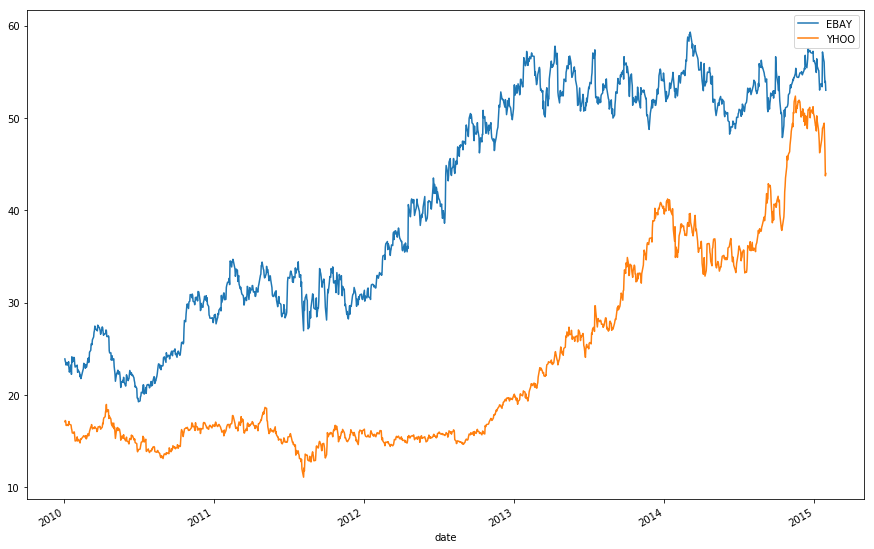

In [51]:
# Plot the raw values over time
prices.plot()
plt.show()

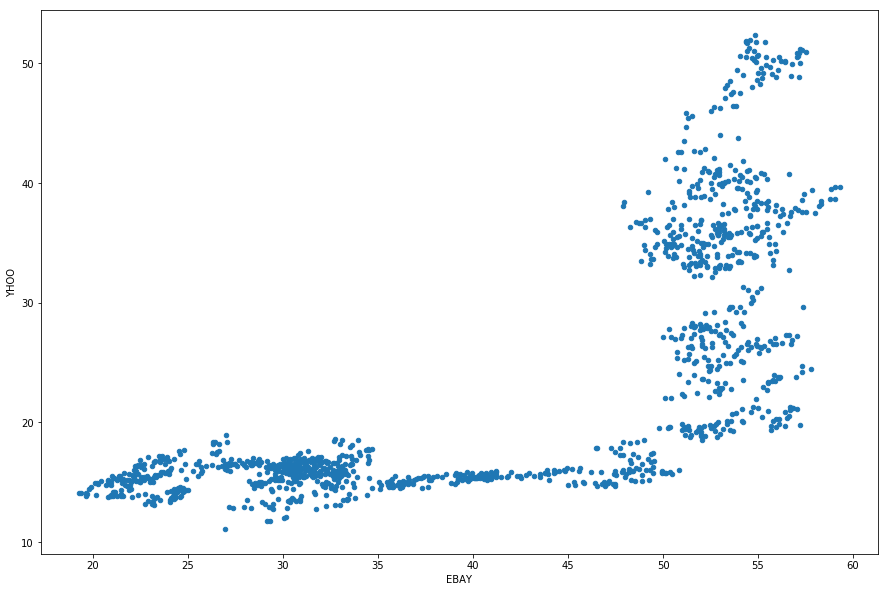

In [52]:
# Scatterplot with one company per axis
prices.plot.scatter('EBAY', 'YHOO')
plt.show()

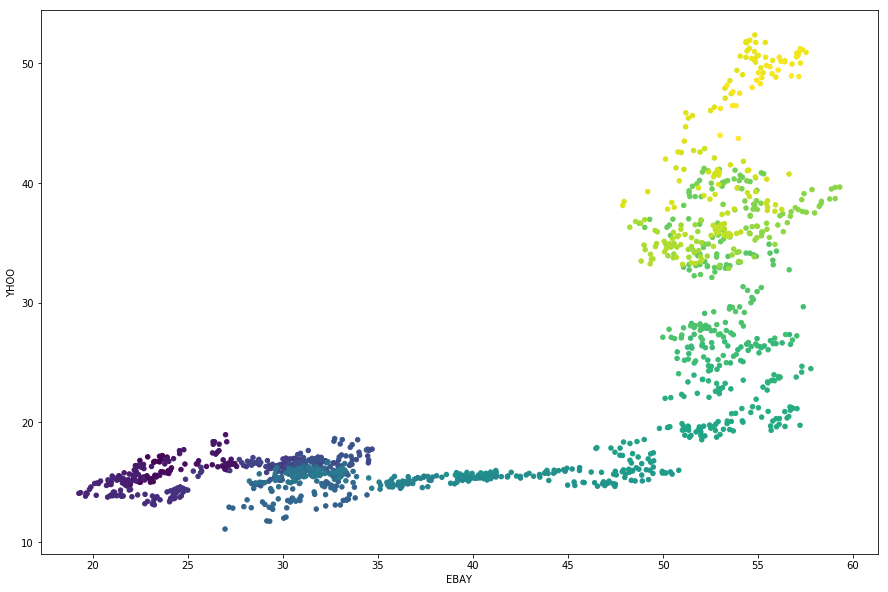

In [53]:
# Scatterplot with color relating to time
prices.plot.scatter('EBAY', 'YHOO', c=prices.index, 
                    cmap=plt.cm.viridis, colorbar=False)
plt.show()

In [100]:
# data prep
all_prices_str = 'date,AAPL,ABT,AIG,AMAT,ARNC,BAC,BSX,C,CHK,CMCSA,CSCO,DAL,EBAY,F,FB,FCX,FITB,FOXA,FTR,GE,GILD,GLW,GM,HAL,HBAN,HPE,HPQ,INTC,JPM,KEY,KMI,KO,MRK,MRO,MSFT,MU,NFLX,NVDA,ORCL,PFE,QCOM,RF,SBUX,T,V,VZ,WFC,XOM,XRX,YHOO\n2010-01-04,214.009998,54.459951,29.889999,14.3,16.650013,15.69,9.01,3.4,28.090001,16.969998999999998,24.690001,11.22,23.9,10.28,,83.459999,10.12,13.929995000000002,7.96,15.45,43.299999,19.559999,,31.25,3.68,,52.449999,20.879999,42.849998,5.94,,57.040001,37.009998,32.11007,30.950001,10.85,53.479999,18.49,24.85,18.93,46.939999,5.42,23.049999,28.58,88.139999,33.279869,27.32,69.150002,8.63,17.1\n2010-01-05,214.379993,54.019953,29.33,14.19,16.130013,16.200001,9.04,3.53,28.970002,16.74,24.58,12.1,23.65,10.96,,83.959999,10.39,13.97,7.91,15.53,43.259998,19.629999,,31.65,3.76,,52.669998,20.870001,43.68,6.17,,56.349998,37.16,32.140079,30.959999,11.17,51.510001,18.76,24.82,18.66,48.07,5.6,23.59,28.440001,87.129997,33.339868,28.07,69.41999799999999,8.64,17.23\n2010-01-06,210.969995,54.31995300000001,29.139999,14.16,16.970013,16.389999,9.16,3.64,28.650002,16.620001000000002,24.42,12.11,23.5,11.37,,87.309998,10.45,14.2,7.8,15.45,44.759998,19.379999,,32.400002,3.86,,52.179999,20.799999,43.919998,6.13,,56.330002,37.66,32.850072,30.77,11.22,53.319999,18.879999,24.459999,18.6,47.599998,5.67,23.42,27.610001,85.959999,31.919873,28.110001,70.019997,8.56,17.17\n2010-01-07,210.58,54.769952,28.58,14.01,16.610014000000003,16.93,9.09,3.65,28.720002,16.969998999999998,24.530001,12.69,23.229998,11.66,,85.639999,11.08,13.999998,7.76,16.25,44.869999,19.57,,32.48,4.29,,52.199999,20.6,44.790001,6.39,,56.189999,37.720001,32.650089,30.450001,10.84,52.400001,18.51,24.379999,18.530001,48.98,6.17,23.360001,27.299999,86.760002,31.729875,29.129999,69.800003,8.6,16.700001\n2010-01-08,211.980005,55.04995200000001,29.34,14.55,17.020014,16.780001000000002,9.0,3.59,28.910002,16.92,24.66,12.47,23.509999,11.69,,88.099998,11.09,14.120002,7.68,16.6,44.540001,19.889999,,34.119999,4.22,,52.589997,20.83,44.68,6.5,,55.150002,37.700001,32.70008,30.66,11.1,53.300002,18.549999,24.68,18.68,49.470001,6.18,23.280001,27.1,87.0,31.749874,28.860001,69.519997,8.57,16.700001\n2010-01-11,210.110003,55.329952,29.629999,14.87,17.450013000000002,16.93,9.07,3.63,28.000001,16.809998999999998,24.59,12.79,23.45,12.11,,88.089996,11.2,14.079997,7.66,16.76,44.889999,20.49,,33.779999,4.33,,52.429999,20.950001,44.529999,6.53,,56.27,37.849998,32.70008,30.27,10.9,53.23,18.290001,24.690001,18.83,49.290001,6.32,23.209999,26.969999,86.75,31.879873,28.799999,70.300003,8.78,16.74\n2010-01-12,207.720001,55.169951,28.459999,14.2,15.520012,16.360001,9.14,3.52,27.58,16.51,24.200001,12.54,23.19,11.87,,84.769997,10.99,13.450005,7.57,16.77,44.950001,20.17,,33.290001000000004,4.21,,51.969996,20.610001,43.490002,6.41,,56.880001,37.549999,32.25007,30.07,10.26,52.37,17.67,24.559999,18.77,48.490002,6.25,22.82,26.959999,86.339996,31.909874,28.08,69.949997,8.85,16.68\n2010-01-13,210.650002,55.289953,29.059999,14.27,15.980012,16.620001000000002,9.15,3.5,27.820001,16.77,24.639999,12.85,23.6,11.68,,86.150002,11.52,13.339997,7.62,16.83,45.509998,20.309999,,34.049999,4.31,,52.22,20.959999,44.25,6.49,,57.029999,38.93,32.140079,30.35,10.46,53.96,17.91,24.799999,19.209999,48.700001,6.36,23.379999,26.639999,87.139999,31.869874,28.58,69.66999799999999,8.95,16.9\n2010-01-14,209.43,55.349952,28.6,14.35,15.810012,16.82,9.51,3.51,27.670001,16.67,24.950001,13.17,22.88,11.76,,85.08000200000002,11.77,13.439998,7.62,16.700001,45.459999,20.200001,,34.310001,4.41,,52.509996,21.48,44.689999,6.85,,57.130001,39.990002,31.970087,30.959999,10.73,50.989999,17.629998999999994,25.34,19.379999,48.369999,6.55,23.549999,26.190001,87.440002,31.219877,28.99,69.68,8.89,17.120001000000002\n2010-01-15,205.93,55.48995,28.059999,13.73,15.630012,16.26,9.43,3.42,27.91,16.629998999999998,24.4,12.74,22.469998,11.6,,84.300003,11.36,13.189996,7.49,16.440001000000002,45.52,19.66,,34.029999,4.28,,52.469999,20.799999,43.68,6.88,,56.290001,39.470001,31.640078000000006,30.860001,10.13,50.950001,17.110001,25.24,19.49,48.529999,6.52,23.27,25.790001,86.139999,30.579879,28.08,69.110001,8.84,16.82\n2010-01-19,215.039995,56.19995,28.25,13.97,15.620013,16.32,9.62,3.54,28.210001,16.809998999999998,24.85,13.03,23.259999,11.75,,84.599998,11.39,13.400004,7.65,16.540001,46.279999,19.790001,,34.599998,4.3,,52.749999,21.049999,43.279999,6.76,,56.419998,40.619999,32.130087,31.1,10.28,51.2,17.43,25.33,20.0,49.32,6.51,23.58,26.200001,87.849998,31.229877,28.280001,69.269997,9.02,16.75\n2010-01-20,211.73,56.239949,27.959999,13.8,15.230011,16.49,9.48,3.46,27.660002,16.52,24.41,13.41,22.23,11.51,,83.519997,11.31,13.059997,7.58,16.5,46.049999,19.77,,33.27,4.29,,52.209999,21.08,43.400002,6.96,,55.5,41.029999,32.190086,30.59,9.98,51.240001,17.360001,25.059999,19.940001,48.349998,6.73,23.290001,25.83,87.41999799999998,30.709878000000003,27.82,68.029999,8.89,16.379998999999998\n2010-01-21,208.069996,55.559951,27.549999,13.58,14.250012,15.47,9.2,3.27,27.18,16.0,23.98,13.44,24.129998,11.18,,76.279999,12.02,12.840004,7.6,16.02,45.779999,19.610001,,32.529999,4.53,,51.289998,20.84,40.540001,7.34,,54.369999,40.080002,31.500075,30.01,9.8,51.19,17.049999,24.83,19.24,48.09,6.86,23.68,25.67,84.449997,30.62988,28.0,66.699997,9.28,16.200001\n2010-01-22,197.75,54.509952,26.5,12.63,13.400011,14.9,9.0,3.25,26.620001,15.85,22.969999,13.29,23.579998,10.52,,74.230003,12.1,12.410003,7.53,16.110001,46.080002,18.559999,,31.15,4.69,,49.289996,19.91,39.16,7.25,,54.240002,38.869999,30.580075,28.959999,9.13,50.89,16.459999,24.15,18.959999,46.779999,6.6,22.91,25.389999,82.730003,30.339881,27.26,66.099998,8.97,15.88\n2010-01-25,203.070002,54.699952,26.09,12.64,13.39001,14.98,9.01,3.23,26.960001,16.01,22.99,13.33,23.69,11.03,,74.599998,12.49,12.660005,7.62,16.370001000000002,45.709999,18.719999,,31.07,4.8,,50.06,20.32,39.209999,7.06,,54.349998,38.759998,30.710082,29.32,9.33,49.13,16.74,24.030001,18.85,46.91,6.55,22.4,25.58,82.029999,30.679879,27.66,65.849998,8.89,15.86\n2010-01-26,205.940001,54.479951,24.4,12.65,13.540010999999998,14.77,9.03,3.15,26.530002000000003,15.7,22.9,13.15,24.069999,11.19,,71.989998,11.71,12.770001,7.6,16.35,44.869999,18.65,,30.879999,4.6,,49.739999,20.0,38.439999,6.89,,54.139999,38.580002,30.400074,29.5,9.44,49.949998,16.209999,23.879999,18.780001,46.889999,6.08,22.540001,25.33,81.150002,30.169882,26.99,65.91999799999999,8.86,15.99\n2010-01-27,207.880005,53.899951,24.91,13.04,13.300010999999998,15.19,8.93,3.2,25.930002,15.85,23.15,13.16,23.969999,11.55,,71.25,12.18,12.649997,7.61,16.299999,48.040001,19.139999,,30.41,4.88,,49.449998,20.24,39.330002,7.15,,54.509998,38.639999,30.370065000000004,29.67,9.72,50.969998,16.65,23.860001,19.0,47.200001,6.17,22.41,25.620001,83.910004,29.869881,28.200001,65.540001,8.89,15.98\n2010-01-28,199.289995,53.949952,24.16,12.61,12.92001,15.37,8.72,3.24,25.510001000000006,15.62,22.52,12.65,23.329998,11.41,,68.82,12.26,12.519999,7.65,16.16,47.509998,18.610001,,29.65,4.99,,47.789998,19.92,39.48,7.27,,54.18,37.970001,30.170066,29.16,9.4,63.040001,16.09,23.469999,18.629999,40.48,6.43,22.08,25.540001,82.650002,29.329883,28.450001,64.959999,8.82,15.44\n2010-01-29,192.060003,52.939953,24.23,12.18,12.73001,15.18,8.63,3.32,24.780001,15.83,22.469999,12.23,23.019999,10.84,,66.690002,12.44,12.610004,7.61,16.08,48.27,18.08,,29.209999,4.79,,47.069999,19.4,38.939999,7.18,,54.25,38.18,29.81008,28.18,8.72,62.250003,15.39,23.059999,18.66,39.189999,6.35,21.790001,25.360001,82.029999,29.419885,28.43,64.43,8.72,15.01\n2010-02-01,194.729998,53.339951,23.959999,12.52,13.36001,15.42,8.42,3.34,25.86,15.94,22.73,12.63,23.169999,11.12,,71.589996,12.5,12.529995,7.62,16.25,47.810001,18.16,,30.65,4.9,,47.829998,19.610001,39.630001,7.34,,54.380001,38.299999,30.650067,28.41,9.17,61.030002,16.57,23.219999,18.790001,39.77,6.64,22.23,25.379999,83.660004,29.609883,28.93,66.18,8.97,15.05\n2010-02-02,195.859997,54.439951,23.969999,12.51,13.67001,15.6,8.4,3.41,26.25,16.290001,23.02,12.9,23.079998,11.39,,72.510002,12.48,12.759995,7.72,16.85,48.560001,18.709999,,30.76,4.93,,48.589998,19.91,40.549999,7.52,,55.049999,39.540001,30.900076,28.459999,9.35,61.85,16.74,23.76,19.24,39.259998,6.58,22.450001,25.690001,84.010002,29.729883,28.790001,66.959999,9.13,15.17\n2010-02-03,199.229994,54.64995,23.790001,12.28,13.490011,15.53,8.36,3.37,25.830001,15.97,23.07,12.42,23.229998,11.64,,70.459999,12.0,13.669997,7.71,16.68,47.540001,18.950001,,30.360001,4.71,,48.73,19.68,40.290001,7.41,,54.869999,38.720001,30.370065000000004,28.629999,9.02,61.950003,16.879998999999998,23.75,18.620001,39.630001,6.39,22.43,25.58,83.519997,29.189885,28.139999,66.599998,8.99,15.46\n2010-02-04,192.050003,53.819952,22.59,11.8,12.91001,14.75,8.18,3.18,24.180001,15.52,23.16,11.46,22.449999,11.06,,66.739998,11.22,13.08,7.62,16.040001,46.470001,18.25,,28.860001,4.54,,47.029998,19.02,38.349998,6.95,,53.43,37.099998,28.860071,27.84,8.61,60.339999,15.9,23.110001,18.030001,38.169998,6.12,21.809999,25.030001,83.050003,28.629888,27.059999,64.720001,8.65,15.01\n2010-02-05,195.460001,53.969952,22.41,12.23,13.180011,15.0,8.21,3.22,24.520001,15.42,23.700001,11.3,22.709999,10.91,,70.230003,11.26,12.959996,7.62,15.79,46.380001,18.049999,,28.290001,4.63,,47.319999,19.469999,38.299999,6.89,,53.09,36.73,28.460071000000006,28.02,8.7,60.839997,16.219998999999998,23.549999,17.959999,38.040001,6.18,21.700001,25.24,82.559998,28.739886,27.42,64.800003,8.47,15.19\n2010-02-08,194.119997,53.349953,22.16,12.07,13.06001,14.48,8.15,3.15,24.240001,15.21,23.5,11.25,22.49,10.97,,69.199997,11.39,12.640003,7.58,15.6,46.09,17.84,,28.1,4.58,,47.589999,19.35,37.700001,6.82,,52.650002,36.59,28.040069,27.719999,8.91,60.899999,16.190001000000002,23.120001,17.84,37.509998,6.23,21.91,24.98,83.050003,28.369887,26.43,64.349998,8.45,14.99\n2010-02-09,196.190004,53.349953,23.139999,12.15,13.28001,14.47,8.23,3.18,24.510001000000006,15.39,23.889999,12.39,22.369998,11.15,,71.58000200000002,11.47,12.909995,7.58,15.6,46.299999,17.76,,29.08,4.65,,48.119999,19.65,38.389999,6.92,,54.009998,36.470001,28.620071000000006,28.01,9.08,62.13,16.059998999999998,23.51,17.879998999999994,37.91,6.29,22.190001,25.26,83.269997,28.749887,26.709999,65.199997,8.38,15.07\n2010-02-10,195.120007,53.259952,26.92,12.23,13.16001,14.67,8.29,3.2,24.4,15.31,23.76,11.58,21.959999,10.94,,71.029999,11.69,12.610004,7.56,15.69,45.970001,17.52,,29.23,4.71,,48.019997,19.690001,38.869999,6.88,,53.790001,36.200001,28.390079,27.99,8.54,61.489999,16.370001000000002,23.110001,17.74,37.43,6.36,22.370001,25.120001,83.639999,28.869885,27.18,64.849998,8.45,14.8\n2010-02-11,198.669994,53.539952,26.299999,12.47,13.580011,14.63,7.47,3.21,25.13,15.33,23.93,11.83,22.13,11.18,,74.16999799999998,11.87,12.929998,7.6,15.77,46.759998,17.950001,,30.16,4.79,,48.619998,20.059999,39.02,6.87,,54.220001,36.880001,28.830078000000004,28.120001,8.53,63.360002,17.120001000000002,23.35,17.870001000000006,38.009998,6.38,22.559999,25.190001,85.139999,29.039884000000004,27.08,65.239998,8.76,15.22\n2010-02-12,200.379993,53.92995300000001,26.82,12.47,13.28001,14.45,7.39,3.18,24.960001,15.34,23.76,12.25,21.769998,11.12,,73.68,11.61,13.109998,7.59,15.55,47.009998,17.889999,,30.02,4.68,,48.46,20.43,38.950001,6.79,,53.98,36.919998,28.610062,27.93,8.44,63.179997,17.35,23.41,17.799999,38.84,6.35,22.6,25.07,84.779999,28.929886,26.879999,64.800003,8.77,15.17\n2010-02-16,203.399996,54.589951,27.43,12.95,13.74001,15.16,7.41,3.31,25.830001,15.67,24.0,12.48,22.519998,11.32,,75.940002,12.08,13.419995000000002,7.64,16.040001,46.869999,18.15,,31.049999,4.82,,49.439998,20.719999,40.07,6.92,,54.82,37.66,29.690063,28.35,8.63,64.860003,17.67,23.809999,17.719998999999994,39.02,6.62,22.879999,25.32,85.879997,29.179885,27.389999,66.279999,8.86,15.41\n2010-02-17,202.550003,54.74995300000001,26.9,12.99,13.60001,15.66,7.75,3.41,26.360001,15.66,24.07,12.73,22.68,11.49,,75.120003,12.05,13.450005,7.77,16.15,48.650002,18.01,,31.08,4.76,,50.119996,20.66,40.040001,6.83,,55.330002,37.34,29.630079,28.59,8.73,64.510001,17.84,24.18,17.67,39.43,6.46,23.15,25.4,86.41999799999998,29.139885,27.33,65.760002,8.92,15.44\n2010-02-18,202.929998,54.96995,26.709999,12.68,13.610010999999998,15.88,7.79,3.43,27.460002000000006,15.73,24.280001,12.55,22.84,11.38,,76.599998,11.92,13.489998000000002,7.78,16.24,49.450001,17.99,,31.540001,4.72,,50.809999,20.84,40.41,6.74,,55.91,37.290001,29.95008,28.969999,8.76,66.099998,16.67,24.52,17.73,39.810001,6.42,23.26,25.24,86.959999,29.149885,27.34,65.959999,9.17,15.54\n2010-02-19,201.669996,54.379952,26.530001,12.5,13.53001,15.88,7.69,3.42,27.590002,16.0,24.360001,12.69,23.419999,11.29,,77.160004,12.23,13.560001000000002,7.64,16.17,48.84,18.290001,,31.790001,4.85,,50.789998,20.82,40.029999,6.79,,55.720001,37.490002,29.970081,28.77,8.9,66.649997,16.58,24.32,17.99,39.59,6.57,23.360001,25.1,86.809998,29.019885,27.370001,65.870003,9.2,15.58\n2010-02-22,200.419994,54.399952,28.43,12.45,13.540010999999998,16.209999,7.87,3.46,27.100001,16.190001000000002,24.299999,12.73,23.279998000000006,11.21,,76.239998,12.55,13.489998000000002,7.74,16.25,47.880001,17.76,,31.02,4.93,,50.559999,20.870001,40.849998,6.97,,55.380001,37.119999,29.510065,28.73,8.94,65.269999,16.610001,24.809999,17.950001,39.009998,6.81,22.9,25.02,86.910004,28.999885,28.01,65.400002,9.24,15.49\n2010-02-23,197.059998,53.969952,26.76,12.01,13.180011,15.94,7.75,3.35,26.300001,16.139999,24.049999,12.64,22.89,11.6,,73.639999,12.27,13.18,7.7,15.95,47.349998,17.209999,,30.200001,4.81,,50.119996,20.389999,39.880001,6.74,,54.830002,36.509998,28.87008,28.33,8.61,64.349998,16.209999,24.48,17.67,38.540001,6.53,22.68,24.83,86.120003,28.739886,27.290001,64.940002,9.1,15.38\n2010-02-24,200.66,54.329951,27.99,12.27,13.06001,16.33,7.8,3.45,26.540002,16.42,24.34,12.75,23.259999,11.73,,72.68,12.69,13.489998000000002,7.6,16.120001000000002,47.560001,17.5,,30.01,4.89,,50.789998,20.700001,40.849998,7.11,,55.16,36.93,29.170079,28.629999,9.09,64.689999,16.549999,24.77,17.809998999999994,37.869999,6.64,23.08,24.91,85.629997,28.959887,27.66,65.550003,9.25,15.59\n2010-02-25,202.000004,54.11995200000001,27.51,12.22,13.31001,16.549999,7.73,3.39,26.730002,16.139999,24.33,12.66,23.0,11.78,,74.07,12.2,13.419995000000002,7.67,15.92,47.41,17.5,,30.0,4.8,,50.91999600000001,20.629999,40.639999,6.99,,53.119999,36.57,28.940071000000003,28.6,9.07,65.61,16.4,24.870001,17.690001000000006,37.18,6.54,22.9,24.77,85.230003,28.879887,27.440001,65.139999,9.29,15.24\n2010-02-26,204.619997,54.279954,24.77,12.24,13.300010999999998,16.66,7.74,3.4,26.570001,16.440001000000002,24.33,12.92,23.019999,11.74,,75.160004,12.21,13.369995,7.79,16.059998999999998,47.610001,17.629998999999994,,30.15,4.81,,50.789998,20.530001,41.970001,7.15,,52.720001,36.880001,28.95008,28.67,9.06,66.050003,16.200001,24.65,17.549999,36.68,6.75,22.91,24.809999,85.279999,28.929886,27.34,65.0,9.37,15.31\n2010-03-01,208.990004,54.289951,25.780001,12.5,13.31001,16.709999,7.77,3.39,26.680001,16.83,24.6,13.17,23.879998,12.41,,76.449997,12.24,13.760003,7.75,15.9,47.509998,17.77,,30.75,4.8,,51.539997,20.870001,41.830002,6.97,,53.27,37.27,29.160071,29.02,9.77,69.7,16.85,24.74,17.75,35.560001,6.65,23.290001,25.0,86.82,28.989885,27.35,65.400002,9.55,15.79\n2010-03-02,208.85,54.579953,25.030001,12.42,13.24001,16.459999,7.82,3.4,26.740002,16.799999,24.610001,12.78,23.99,12.22,,77.980003,12.66,13.840001,7.66,15.9,47.540001,17.610001,,31.209999,4.83,,51.119999,20.700001,41.619999,7.04,,53.299999,37.389999,29.360073,28.459999,9.57,68.979997,16.84,24.58,17.6,37.93,6.61,23.33,24.879999,86.449997,29.259885,27.870001,65.489998,9.5,15.73\n2010-03-03,209.329998,54.079952,24.879999,12.39,13.34001,16.370001000000002,7.9,3.4,26.800002000000006,16.959999,24.84,12.93,23.509999,12.69,,79.239998,12.54,13.699996,7.62,16.030001000000002,47.57,17.610001,,31.700001,4.81,,51.099999,20.52,41.529999,7.04,,53.93,37.209999,29.470079,28.459999,9.45,67.54999699999999,16.629998999999998,24.5,17.32,38.689999,6.62,23.059999,24.889999,86.800003,29.129886,28.200001,65.43,9.52,15.57\n2010-03-04,210.710003,54.079952,26.709999,12.26,13.43001,16.4,7.92,3.43,26.19,17.17,24.950001,12.78,23.779998000000006,12.79,,78.839996,12.33,13.899997,7.61,16.110001,47.060001,17.51,,31.450001,4.81,,51.509997,20.530001,41.919998,7.1,,54.470001,37.139999,29.580072,28.629999,9.41,68.010001,16.66,24.76,17.33,39.25,6.67,22.92,24.959999,87.040001,29.269885,28.43,65.400002,9.54,15.81\n2010-03-05,218.950005,54.31995300000001,28.08,12.29,13.840011,16.700001,7.89,3.5,26.31,17.43,25.209999,12.7,24.629999,13.0,,80.709999,12.73,14.43,7.31,16.35,47.610001,18.1,,31.879999,4.96,,52.029997,20.790001,42.810001,7.25,,54.700001,37.490002,30.610081,28.59,9.46,67.65,17.17,24.950001,17.48,38.759998,6.84,23.370001,24.99,88.510002,29.229885,29.15,66.470001,9.87,16.059998999999998\n2010-03-08,219.079994,54.419952,29.1,12.36,13.780010999999998,16.74,7.9,3.56,25.59,17.559998999999998,26.129999,12.54,24.839998,12.93,,80.620003,12.61,14.279998,7.49,16.27,47.009998,18.35,,31.41,4.96,,51.729996,20.77,42.59,7.27,,54.459999,37.349998,30.800075,28.629999,9.59,68.680003,16.92,24.700001,17.35,38.790001,6.98,23.32,25.280001,90.629997,29.629884000000004,28.889999,66.480003,9.91,16.52\n2010-03-09,223.020004,54.79995,32.77,12.29,13.67001,16.799999,7.74,3.82,25.700001,17.51,26.129999,12.81,25.51,12.8,,79.760002,12.62,14.270003,7.47,16.49,47.439999,18.4,,30.91,5.03,,51.879999,20.940001,42.419998,7.26,,54.18,37.040001,30.880075,28.799999,9.41,69.939999,17.549999,24.879999,17.23,38.68,6.91,23.620001,25.559999,90.150002,29.909881,28.98,66.779999,9.74,16.530001000000002\n2010-03-10,224.839993,55.029953000000006,36.240002,12.53,13.57001,17.110001,7.65,3.96,25.66,17.530001000000002,25.870001,13.3,25.56,12.82,,80.08000200000002,12.96,14.279998,7.55,16.51,47.279999,18.48,,30.639999,5.25,,51.779997,21.190001,42.93,7.56,,54.200001,36.669998,31.490086,28.969999,9.87,71.28000300000002,17.59,24.870001,17.15,38.880001,7.29,24.23,25.52,91.519997,29.749882,29.57,67.220001,9.85,16.790001\n2010-03-11,225.500008,55.539951,35.110001000000004,12.41,13.640011,17.120001000000002,7.86,4.18,25.79,17.57,25.969999,12.99,25.439998000000006,12.91,,80.5,13.28,14.259996,7.54,16.48,47.099998,18.35,,30.74,5.4,,52.019997,21.25,43.18,7.88,,53.599998,36.880001,31.670084000000006,29.18,9.8,71.190001,17.190001000000002,25.139999,17.290001,39.099998,7.38,24.27,25.6,92.739998,29.839883,29.76,67.220001,10.0,16.530001000000002\n2010-03-12,226.600006,54.51995,34.23,12.36,13.60001,16.85,7.78,3.97,25.640001,17.42,25.879999,12.83,25.969999,13.34,,80.529999,13.15,14.029996,7.5,17.040001,47.419998,18.040001,,31.5,5.47,,52.359998,21.27,43.150002,7.55,,53.349998,37.16,31.480078,29.27,9.97,69.98,17.25,25.049999,17.08,38.950001,7.34,24.280001,25.620001,93.25,29.729883,29.629999,66.800003,9.89,16.32\n2010-03-15,223.839996,54.79995,34.32,12.23,13.510011,16.85,6.8,3.89,25.420001,17.530001000000002,26.08,12.66,26.279999,13.4,,80.660004,13.38,13.97,7.49,17.290001,47.52,18.08,,31.030001,5.41,,52.419999,21.17,43.07,7.57,,53.650002,37.75,31.230085,29.290001,9.73,69.599998,17.16,25.280001,17.26,38.869999,7.23,24.42,25.780001,92.410004,29.859882,29.889999,66.300003,10.02,16.459999\n2010-03-16,224.449997,54.679952,33.610001000000004,12.45,13.800010999999998,17.030001000000002,7.09,4.05,25.420001,17.49,26.15,12.98,26.789999,13.49,,82.190002,13.45,14.029996,7.45,18.07,47.470001,18.48,,31.709999,5.53,,52.349997,22.01,43.240002,7.7,,53.700001,37.939999,31.710086,29.370001,10.21,70.63000100000002,17.76,25.209999,17.26,39.009998,7.51,25.290001,25.85,91.650002,29.929882,30.280001,66.57,10.09,16.360001\n2010-03-17,224.120003,54.49995,34.41,12.66,14.460012,17.27,6.95,4.05,25.050001,17.58,26.26,12.94,26.979999,14.1,,81.230003,13.7,14.010006,7.58,18.040001,47.18,18.879999,,32.52,5.76,,52.23,22.24,43.790001,7.9,,53.84,38.080002,32.330086,29.629999,10.4,70.920001,18.1,25.469999,17.209999,38.900002,7.7,25.559999,25.9,91.510002,30.149881,30.549999,67.360001,9.9,16.5\n2010-03-18,224.650002,53.769951,34.639999,12.63,14.300010999999998,17.08,7.07,4.02,23.790001,17.67,26.34,13.11,27.46,13.73,,80.269997,13.44,14.020001,7.51,18.190001,47.419998,19.24,,31.58,5.5,,52.729999,22.200001,43.639999,7.56,,53.950001,38.450001,32.100078,29.610001,10.16,70.539999,17.459999,25.379999,17.23,40.43,7.5,25.02,26.059999,90.129997,30.299881,30.290001,67.389999,9.86,16.559998999999998\n2010-03-19,222.25,53.45995300000001,34.799999,12.49,14.260011,16.82,7.13,3.9,24.21,17.530001000000002,26.15,12.57,27.189999,13.29,,78.510002,13.3,13.979996,7.49,18.07,47.869999,19.389999,,30.5,5.32,,52.49,21.99,43.450001,7.6,,54.75,38.060001,31.980079,29.59,9.95,70.449997,17.25,25.190001,16.91,40.049999,7.38,24.969999,26.24,88.839996,30.409879,30.379999,67.040001,9.57,16.440001000000002\n2010-03-22,224.750004,53.869953,33.389999,12.78,14.340011,16.959999,6.95,4.04,23.240001,17.780001000000006,26.280001,13.07,27.07,13.99,,79.800003,13.43,14.010006,7.48,18.07,48.150002,19.42,,30.639999,5.47,,52.949998,22.24,43.740002,7.64,,54.540001,38.299999,31.660075,29.6,10.33,72.889999,17.530001000000002,25.559999,17.15,40.279999,7.62,25.24,26.4,89.239998,30.649879,30.41,66.970001,9.87,16.34\n2010-03-23,228.359993,54.339953,33.279999,13.24,14.500011,17.129998999999998,7.02,4.13,23.27,18.09,26.639999,13.43,27.049998,13.9,,81.089996,13.46,14.029996,7.5,18.33,47.759998,19.68,,30.709999,5.48,,53.149997,22.67,44.580002,7.69,,55.299999,38.5,31.740079,29.879999,10.54,72.960001,17.889999,25.99,17.540001,40.52,7.73,25.41,26.549999,89.980003,30.979878000000006,31.08,66.949997,10.11,16.030001000000002\n2010-03-24,229.370003,53.869953,33.169998,13.0,14.320012,17.57,7.04,4.15,23.110001,18.18,26.450001,13.81,26.939999,13.9,,79.790001,13.58,14.270003,7.41,18.450001,47.290001,19.459999,,30.209999,5.48,,53.059996,22.43,44.939999,7.9,,54.619999,38.009998,31.380077000000004,29.65,10.43,72.370001,17.290001,25.76,17.610001,40.189999,7.85,25.290001,26.26,88.75,30.459879,30.860001,66.5,9.86,16.09\n2010-03-25,226.649994,53.519953,34.509998,13.16,14.110010999999998,17.74,6.96,4.27,22.430002,18.440001,26.43,14.2,27.559998,13.8,,77.910004,13.41,14.43,7.38,18.299999,45.950001,19.690001,,29.57,5.5,,53.499999,22.35,44.939999,7.93,,54.799999,37.779999,31.100075,30.01,10.38,73.540001,17.34,26.040001,17.389999,42.189999,7.69,24.209999,26.15,90.410004,30.309881,31.059999,66.300003,9.62,16.32\n2010-03-26,230.899998,52.899953,34.209999,13.21,14.270010999999998,17.9,7.01,4.31,22.370002,18.34,26.469999,14.5,27.449998,13.86,,79.16999799999998,13.2,14.459998,7.35,18.34,45.34,19.790001,,29.360001,5.47,,53.419997,22.24,45.02,7.86,,54.650002,37.43,30.840077,29.66,10.49,74.299998,17.34,25.690001,17.139999,41.830002,7.63,24.59,26.24,90.25,30.369879,31.219999,66.540001,9.7,16.540001\n2010-03-29,232.389992,53.11995400000001,34.450001,13.31,14.440010999999998,18.040001,7.19,4.18,23.28,18.5,26.51,14.65,27.279999,13.57,,82.879997,13.31,14.550003,7.4,18.4,45.880001,20.1,,29.870001,5.45,,52.969999,22.33,44.860001,7.72,,54.77,37.889999,31.460077,29.59,10.63,73.900002,17.559998999999998,25.57,17.280001000000002,41.759998,7.64,24.610001,26.51,90.239998,30.449879,31.1,67.300003,9.73,16.559998999999998\n2010-03-30,235.849991,52.509953,34.189999,13.45,14.400011,17.76,7.25,4.09,23.440001,18.74,26.65,14.62,27.139999,13.28,,83.660004,13.27,14.450003,7.46,18.299999,45.610001,20.17,,30.0,5.41,,53.259999,22.34,44.580002,7.76,,54.869999,37.66,31.400077000000003,29.77,10.79,75.060002,17.629998999999994,25.540001,17.26,42.130001,7.62,24.559999,25.950001,91.0,31.229877,30.84,67.050003,9.69,16.610001\n2010-03-31,235.000011,52.67995300000001,34.139999,13.47,14.240011,17.85,7.22,4.05,23.640001,18.83,26.030001,14.59,26.97,12.57,,83.540001,13.56,14.409997,7.44,18.200001,45.470001,20.209999,,30.129999,5.39,,53.149997,22.290001,44.75,7.75,,55.0,37.349998,31.640078000000006,29.290001,10.37,73.739999,17.4,25.709999,17.15,41.959999,7.85,24.27,25.84,91.029999,31.019878,31.120001,66.980003,9.75,16.530001000000002\n2010-04-01,235.969994,52.95995300000001,34.110001000000004,13.35,14.700012,18.040001,7.23,4.18,24.120001,18.860001,25.83,14.69,26.57,12.63,,86.279999,13.59,14.589997,7.48,18.33,45.639999,20.379999,,30.74,5.39,,53.239999,22.389999,45.18,7.8,,55.299999,37.709999,32.090069,29.16,10.17,75.000001,17.219998999999998,25.459999,17.08,42.27,7.77,24.24,26.110001,92.550003,31.279876,31.370001,67.610001,9.99,16.290001\n2010-04-05,238.489998,52.92995500000001,35.060001,13.52,14.730012,18.129999,7.21,4.26,24.580001,18.82,26.17,14.42,27.37,12.77,,87.33000200000002,13.95,14.789998,7.55,18.530001,45.84,20.66,,31.85,5.53,,53.86999599999999,22.59,45.34,8.16,,54.860001,37.389999,32.420078000000004,29.27,10.6,79.990002,17.48,25.58,16.9,42.529999,8.19,24.610001,26.309999,92.470001,31.459875,31.51,68.190002,10.38,16.51\n2010-04-06,239.540009,52.83995400000001,35.91,13.48,15.030010999999998,18.49,7.14,4.29,24.520001,18.76,26.219999,14.66,27.27,12.7,,87.33000200000002,14.35,14.700005,7.54,18.6,45.509998,20.450001,,32.200001,5.85,,53.859996,22.4,45.84,8.47,,54.290001,37.25,32.580078,29.32,10.23,83.36999899999998,17.049999,25.83,16.959999,42.43,8.55,24.6,26.309999,92.400002,31.199876,32.279999,67.900002,10.27,16.92\n2010-04-07,240.600006,52.49995500000001,39.689999,13.58,14.740012,18.620001,7.15,4.36,24.090002,18.290001,26.34,14.17,26.849998,12.58,,85.93,14.3,14.48,7.45,18.5,45.450001,20.07,,31.629999,5.89,,53.29,22.450001,45.32,8.52,,53.82,36.790001,31.95007,29.35,10.56,79.730002,17.16,25.91,17.07,42.77,8.37,24.91,25.65,90.709999,30.23988,31.99,67.339996,10.16,16.870001000000002\n2010-04-08,239.950005,52.279954,37.59,13.34,14.870012,18.65,6.98,4.47,24.110001,18.43,26.280001,14.81,26.46,12.63,,86.050003,14.27,14.71,7.45,18.559999,45.82,19.82,,31.66,5.9,,53.629996,22.309999,45.759998,8.34,,53.759998,36.779999,31.870086,29.92,10.58,81.82999699999998,16.879998999999998,25.83,17.139999,42.400002,8.6,24.83,26.02,91.489998,30.15988,32.23,67.860001,10.42,17.35\n2010-04-09,241.789993,52.729954000000006,38.139999,13.47,14.390012,18.59,6.97,4.55,24.560001,18.5,26.6,14.58,26.549998,12.72,,85.66999799999998,14.1,15.219999,7.45,18.52,45.799999,19.67,,31.57,5.86,,53.86999599999999,22.549999,45.98,8.35,,54.59,36.970001,32.190086,30.34,10.73,82.419997,16.99,26.129999,17.25,42.169998,8.59,24.719999,26.440001,92.519997,30.079881,32.299999,68.760002,10.44,17.52\n2010-04-12,242.290005,52.669955,41.220001,13.63,14.570011,18.66,6.94,4.64,24.33,18.629999,26.530001,14.93,26.629999,12.77,,84.400002,14.36,15.030005,7.43,18.709999,45.869999,19.98,,31.5,6.03,,53.879996,22.540001,46.139999,8.34,,54.759998,36.849998,32.200078999999995,30.32,10.82,83.180001,17.299999,26.200001,17.290001,42.23,8.74,24.49,26.379999,93.190002,29.939882,32.419998,68.709999,10.49,17.639999\n2010-04-13,242.430008,52.279954,40.150002,13.8,14.340011,18.67,6.9,4.62,24.570001,18.67,26.440001,14.37,26.639999,12.79,,84.769997,14.33,15.470003,7.79,18.950001,46.349998,20.030001,,31.42,5.69,,53.779999,22.77,45.869999,8.14,,55.02,36.700001,32.210071,30.450001,10.76,86.38000100000002,17.66,26.35,17.18,42.299999,8.34,24.73,26.200001,92.790001,30.069881,32.150002,68.660004,10.45,18.18\n2010-04-14,245.690002,52.309952,39.740002,14.41,14.430011,19.4,7.16,4.93,24.680002,18.93,26.879999,14.39,27.039999,13.35,,85.360001,14.94,15.830001,7.77,19.35,46.060001,20.309999,,32.43,5.88,,54.519998,23.52,47.73,8.52,,54.950001,36.209999,32.820079,30.82,11.3,87.570002,17.879998999999994,26.379999,17.07,42.599998,8.82,24.84,26.24,94.260002,29.849882,33.279999,68.610001,10.55,18.379999\n2010-04-15,248.92001,52.359953,39.98,14.34,14.31001,19.48,7.14,4.81,24.370001,18.860001,27.209999,14.39,26.979999,13.76,,84.220001,14.9,15.78,7.79,19.5,45.32,20.219999,,32.52,5.75,,54.229997,24.219999,47.810001,8.35,,54.259998,36.040001,32.70008,30.870001,11.18,86.829998,18.01,26.200001,16.99,42.700001,8.53,25.129999,26.24,94.449997,29.539883000000003,33.509998,68.260002,10.49,18.969999\n2010-04-16,247.400002,52.259955,39.150002,14.36,13.910011,18.41,7.34,4.56,23.88,18.32,26.98,13.87,26.329999,13.42,,81.18,14.2,15.750003,7.76,18.969999,45.700001,19.9,,31.639999,5.56,,53.749998,23.92,45.549999,8.0,,54.970001,35.709999,32.020078000000005,30.67,10.92,85.31000300000002,17.059998999999998,25.950001,16.799999,42.740002,8.3,24.959999,25.93,93.849998,29.579882,32.560001,67.93,10.32,18.17\n2010-04-19,247.070007,52.909951,39.09,14.3,13.72001,18.389999,7.35,4.88,23.750002,18.58,27.07,13.18,26.32,13.6,,80.800003,14.24,15.78,7.72,18.940001,45.740002,19.98,,31.57,5.49,,53.639997,24.0,45.389999,8.13,,55.32,35.900002,32.050071,31.040001,10.79,84.799998,16.98,26.190001,16.790001,42.75,8.33,24.9,26.379999,93.120003,29.729883,33.02,68.230003,10.71,18.389999\n2010-04-20,244.590004,53.059951,41.630001,14.46,13.750011,18.610001,7.33,4.97,23.87,18.540001,27.18,13.16,26.399998,13.91,,80.800003,14.8,15.850003,7.85,19.0,45.07,20.1,,33.310001,5.83,,53.56,24.120001,45.880001,8.58,,54.470001,36.060001,32.600079,31.360001,10.75,87.069997,17.040001,26.15,16.76,43.290001,8.8,25.26,26.66,94.050003,29.759883,33.689999,68.970001,10.74,18.379999\n2010-04-21,259.220005,51.779954,40.900002,14.43,13.710010999999998,18.280001,7.23,4.93,23.68,18.530001,27.24,12.57,26.289999,14.13,,78.410004,15.15,15.980002,7.84,19.030001,40.759998,20.4,,33.290001000000004,6.59,,53.699998,23.799999,45.349998,8.94,,54.189999,34.740002000000004,32.54008,31.33,10.74,86.980001,16.6,26.290001,16.6,42.630001,8.79,25.389999,26.34,93.129997,29.559883000000006,33.009998,68.91999799999999,10.6,17.450001\n2010-04-22,266.46999700000003,51.119955,43.25,14.37,13.850011,18.540001,7.21,4.87,23.88,18.799999,27.32,12.36,24.779999,14.2,,80.5,14.96,16.06,7.84,18.950001,40.59,20.690001,,33.73,6.89,,53.309996,23.99,44.740002,9.12,,54.310001,33.77,32.480077,31.389999,10.93,100.249998,16.67,26.24,16.48,39.330002,8.89,27.25,26.27,95.139999,29.279884000000006,33.580002,68.559998,10.45,17.719998999999994\n2010-04-23,270.82999,51.199954,44.380001,14.47,14.110010999999998,18.43,7.21,4.86,24.890001,18.959999,27.469999,13.01,24.55,14.21,,79.559998,15.12,16.119997,7.82,19.07,41.669998,20.84,,34.959999,7.17,,53.899996,24.040001,44.939999,9.19,,53.880001,35.459999,33.08008,30.959999,11.0,99.73,16.440001000000002,26.48,16.91,38.25,8.95,27.26,26.25,96.589996,29.049886,33.48,69.239998,11.32,17.639999\n2010-04-26,269.5,50.369956,44.509998,14.36,14.050010999999998,18.049999,7.06,4.61,24.47,19.08,27.57,12.95,24.559999,14.46,,80.400002,14.52,16.239998999999994,7.83,19.299999,40.560001,20.92,,34.470001,6.86,,54.259998,23.82,43.889999,8.8,,53.73,35.0,33.040082,31.110001,10.97,108.169999,16.6,26.469999,16.82,38.110001,8.69,27.389999,26.27,96.0,28.939886,32.720001,69.290001,11.35,17.389999\n2010-04-27,262.039989,49.769957,37.369999,13.93,13.440010999999998,17.469998999999998,7.1,4.34,23.650001,18.459999,27.01,12.22,23.769999,13.57,,76.150002,14.05,15.700002,7.8,18.700001,40.369999,20.120001,,32.810001,6.68,,53.249999,23.35,42.41,8.62,,52.869999,34.48,31.980079,30.85,10.34,102.07,16.129998999999998,25.98,16.459999,37.919998,8.43,26.530001,25.950001,92.949997,28.749887,31.719999,68.269997,10.81,16.92\n2010-04-28,261.600006,50.269957,39.509998,14.05,13.57001,17.780001000000006,6.99,4.45,23.720001,18.809999,27.040001,12.18,23.99,13.25,,76.489998,14.44,15.559996,7.89,18.950001,40.68,20.07,,33.349998,6.73,,53.279999,23.26,43.459999,8.71,,53.360001,34.560001,32.210071,30.91,10.24,99.389998,16.16,25.860001,16.530001000000002,38.82,8.49,26.219999,25.91,93.610001,29.119884000000006,32.450001,69.190002,11.1,16.75\n2010-04-29,268.640007,50.749954,40.23,14.26,13.72001,18.299999,6.96,4.56,23.61,20.0,27.530001,12.11,24.24,13.58,,77.720001,14.87,15.759998,8.07,19.49,40.400002,19.940001,,31.6,6.87,,52.879997,23.49,44.0,8.96,,53.740002,35.25,32.400077,31.0,10.21,103.169998,16.65,25.969999,16.860001,38.98,8.65,26.6,26.139999,92.82,29.219885,33.23,68.660004,11.22,16.969998999999998\n2010-04-30,261.090008,51.159955,38.900002,13.78,13.43001,17.83,6.88,4.37,23.8,19.77,26.93,12.08,23.779998000000006,13.02,,75.529999,14.92,15.429997,7.96,18.860001,39.709999,19.25,,30.65,6.76,,51.969996,22.84,42.580002,9.02,,53.450001,35.040001000000004,32.150088000000004,30.540001,9.35,98.900001,15.71,25.870001,16.719998999999998,38.68,8.84,25.98,26.059999,90.230003,28.899886,33.110001000000004,67.769997,10.9,16.530001000000002\n2010-05-03,266.34999500000004,50.869957,39.540001,14.0,13.15001,18.059999,6.86,4.41,24.080002,20.389999,27.540001,12.59,23.909999,13.3,,73.739998,15.36,16.039998,8.0,19.26,39.759998,19.809999,,31.389999,6.88,,52.709999,23.26,43.529999,8.99,,53.759998,35.27,32.270070000000004,30.860001,9.89,101.989998,15.54,26.01,16.91,38.639999,8.84,27.18,26.280001,89.269997,29.289883000000003,33.880001,67.839996,11.05,16.950001\n2010-05-04,258.679993,50.189955,38.25,13.39,12.58001,17.559998999999998,6.68,4.26,23.620002,19.870001,26.559999,11.76,23.079998,12.85,,70.489998,14.56,15.4,7.84,18.58,38.529999,18.940001,,30.309999,6.67,,50.639996,22.559999,42.470001,8.64,,53.18,35.810001,32.150088000000004,30.129999,9.52,99.359998,14.75,24.969999,17.26,37.599998,8.58,26.030001,25.9,88.370003,28.749887,32.939999,66.470001,10.6,16.32\n2010-05-05,255.989998,50.149955,37.700001,13.22,12.46001,17.530001000000002,6.76,4.18,23.170001,19.74,26.549999,12.33,22.659999,12.34,,70.440002,14.59,14.600003,7.88,18.1,40.209999,18.67,,29.98,6.55,,50.929996,22.17,42.630001,8.54,,53.66,35.59,31.770069,29.85,9.26,98.229999,14.5,24.940001,17.18,37.630001,8.67,26.219999,25.77,86.43,28.679887,32.66,66.16999799999999,10.42,16.49\n2010-05-06,246.249989,48.999958,36.75,12.71,11.940009,16.280001000000002,6.59,4.04,22.470001,18.51,25.49,11.72,22.269998,11.78,,69.029999,13.61,13.97,7.63,17.309998999999998,39.18,17.5,,28.75,6.23,,48.329998,21.51,40.810001,7.97,,52.299999,34.27,30.660076,28.98,8.75,96.970003,14.2,23.91,16.74,36.669998,8.21,25.610001,25.139999,82.91999799999998,28.00989,31.18,63.889999,10.04,15.92\n2010-05-07,235.860004,48.719958,38.700001,12.5,12.00001,16.18,6.38,4.0,21.910002,18.360001,24.709999,11.7,21.48,11.51,,67.589996,13.31,13.669997,7.5,16.879998999999998,38.369999,17.540001,,27.51,6.01,,46.729998,21.309999,40.759998,7.88,,52.669998,33.490002000000004,30.440073,28.209999,8.57,91.090002,13.96,23.41,16.459999,36.5,7.99,25.450001,25.1,82.290001,28.189889,30.82,63.700001,9.73,15.29\n2010-05-10,253.990005,49.689958,40.98,13.19,12.59001,17.299999,6.6,4.22,23.100002,18.030001,26.129999,12.3,22.33,12.15,,72.5,14.38,14.66,7.72,18.040001,38.380001,18.41,,27.59,6.49,,49.099997,22.549999,41.950001,8.35,,54.040001,34.25,31.580075,28.940001,9.09,97.500002,14.56,24.389999,17.0,37.369999,8.51,27.040001,25.67,85.989998,28.609887,32.970001,65.230003,10.14,16.33\n2010-05-11,256.51999700000005,49.399956,42.889999,13.36,12.130009,17.16,6.58,4.17,23.28,18.08,25.959999,12.4,22.38,12.31,,70.239998,14.61,14.48,7.78,18.0,39.259998,18.219999,,28.34,6.48,,48.419999,22.280001,41.549999,8.58,,53.610001,33.509998,31.070085,28.879999,8.82,99.820002,14.4,24.190001,17.01,37.48,8.67,26.700001,25.639999,84.160004,28.399888,32.91,64.459999,10.1,16.41\n2010-05-12,262.090004,49.149957,41.400002,13.77,12.46001,17.07,6.81,4.18,23.530001,18.18,26.74,13.55,22.509999,12.68,,73.0,15.0,14.509998,7.9,18.440001,40.150002,18.530001,,29.09,6.77,,49.55999600000001,23.09,41.689999,8.73,,54.02,33.639999,31.710086,29.440001,9.33,107.829998,14.68,24.6,16.9,38.16,8.81,27.85,25.82,85.68,28.699886,33.66,64.910004,10.19,16.469998999999998\n2010-05-13,258.360012,48.609957,40.650002,13.23,12.80001,16.870001000000002,6.85,4.09,23.290002,17.76,25.530001,13.25,22.68,12.42,,71.709999,14.8,14.300001000000002,7.95,18.049999,39.470001,18.52,,29.01,6.76,,48.72,22.5,40.810001,8.68,,53.490002,33.310001,31.680076,29.24,9.14,110.010001,14.65,24.24,16.559998999999998,37.959999,8.74,27.440001,25.74,85.730003,28.689887,33.080002,64.739998,10.3,16.139999\n2010-05-14,253.819988,48.499957,39.720001,12.95,12.36001,16.34,6.83,3.98,22.62,17.6,24.940001,13.74,22.249999,12.11,,69.720001,14.08,13.949998,7.84,17.639999,37.779999,17.959999,,28.09,6.53,,47.429996,21.889999,39.889999,8.43,,53.34,32.880001,31.290068,28.93,8.94,100.559999,12.96,23.780001,16.200001,37.299999,8.26,26.51,25.4,77.260002,28.509888,32.040001000000004,63.599998,10.02,16.389999\n2010-05-17,254.219997,48.429956,39.0,13.18,12.100009,16.35,6.81,3.86,22.29,18.1,24.870001,13.94,22.509999,11.95,,67.970001,13.98,14.029996,7.86,17.559998999999998,38.23,18.32,,27.85,6.5,,47.519998,22.02,39.84,8.26,,53.41,32.779999,31.610069,28.940001,9.17,106.349998,12.99,23.74,16.110001,37.369999,8.27,26.91,25.77,74.709999,28.659886,31.969999,63.27,10.1,16.27\n2010-05-18,252.360008,48.049957,37.779999,12.94,11.820009,15.95,6.69,3.73,22.250001,17.690001000000006,24.360001,13.57,22.169998,11.55,,67.349998,13.43,13.749996,7.86,17.23,38.279999,18.040001,,27.639999,6.16,,46.789999,21.43,39.02,7.87,,53.099998,32.349998,32.25007,28.6,9.08,102.009998,12.56,23.43,15.81,36.709999,7.92,26.58,25.59,70.089996,28.419889,30.59,62.790001,10.01,16.030001000000002\n2010-05-19,248.339996,47.939957,37.330002,13.02,11.780009,16.309998999999998,6.7,3.81,22.100002,17.58,24.26,13.63,21.64,11.55,,67.690002,13.3,13.389997,7.93,17.26,39.0,17.540001,,27.120001,6.15,,46.999998,21.6,39.380001,7.79,,53.119999,32.619999,32.530072,28.24,8.96,100.61,12.76,23.190001,15.82,36.450001,7.82,26.190001,25.57,72.970001,28.509888,30.08,62.450001,9.59,15.79\n2010-05-20,237.75999500000003,46.479958,34.810001,12.69,11.070008,15.3,6.34,3.63,21.02,16.790001,23.309999,12.91,20.809998,10.8,,63.619999,12.51,12.729996,7.73,16.26,36.970001,16.809998999999998,,26.219999,5.85,,45.949998,20.790001,37.830002,7.47,,51.540001,31.82,31.410067,27.110001,8.74,94.989998,12.46,22.35,15.23,35.59,7.25,25.1,24.959999,72.82,27.759891,28.690001,60.330002,9.12,15.1\n2010-05-21,242.319992,46.939959,35.959999,12.72,11.350009,15.99,6.24,3.75,21.010001000000006,17.030001000000002,23.459999,13.34,21.42,11.26,,67.010002,13.19,12.95,7.71,16.42,36.57,16.98,,26.73,6.24,,46.58,20.91,40.049999,7.87,,51.59,32.040001000000004,31.420075,26.84,8.93,99.47,12.73,22.16,15.4,35.889999,7.47,25.290001,24.85,74.199997,27.95989,30.110001,60.880001,9.22,15.48\n2010-05-24,246.759987,47.559958,34.529999,12.49,11.090008,15.4,6.25,3.78,20.750001,16.77,23.370001,13.46,21.359999,11.01,,65.559998,12.57,12.899999,7.84,16.01,36.349998,16.860001,,25.65,6.0,,45.689999,20.67,38.619999,7.5,,51.459999,31.860001,31.600076,26.27,8.79,101.620003,12.36,22.280001,15.22,35.669998,7.2,25.07,24.43,74.550003,27.489891,28.709999,60.189999,8.95,15.54\n2010-05-25,245.220005,47.229957,34.490002000000004,12.67,11.300009,15.49,6.1,3.78,20.790001,17.67,23.309999,13.84,21.59,11.02,,67.620003,12.83,12.809994,7.73,15.95,36.18,16.950001,,25.620001,5.96,,45.849997,20.85,38.939999,7.79,,50.619999,32.060001,30.620074,26.07,8.8,105.0,12.69,22.200001,15.06,35.61000100000001,7.45,24.92,24.32,72.970001,27.399891,28.9,59.709999,9.09,15.31\n2010-05-26,244.109993,47.169958,34.049999,12.52,11.250009,15.47,6.04,3.86,21.16,17.719998999999994,22.889999,13.85,21.38,11.39,,66.589996,12.51,12.859995,7.81,16.01,34.82,16.84,,25.879999,6.01,,45.719999,20.700001,38.779999,7.71,,50.080002,32.419998,30.370065000000004,25.01,8.69,104.800002,12.75,21.91,15.11,34.880001,7.4,24.709999,24.129999,73.400002,26.929894,28.040001,59.310001,8.99,15.45\n2010-05-27,253.349991,47.869956,36.459999,13.07,11.820009,16.18,6.2,4.02,22.22,18.33,23.67,13.95,21.909999,11.99,,71.07,13.26,13.489998000000002,7.88,16.66,36.240002,17.52,,26.99,6.24,,46.939997,21.76,40.419998,8.2,,51.23,33.619999,31.640078000000006,26.0,9.44,108.860002,13.5,22.58,15.37,35.560001,7.88,26.02,24.629999,73.690002,27.57989,29.41,61.459999,9.46,15.69\n2010-05-28,256.880005,47.559958,35.380001,12.92,11.640009,15.74,6.05,3.96,22.340001,18.09,23.16,13.58,21.409999,11.73,,70.050003,13.0,13.200003,7.95,16.35,35.919998,17.43,,24.83,6.16,,46.009999,21.42,39.580002,8.02,,51.400002,33.689999,31.090066,25.799999,9.09,111.150001,13.14,22.57,15.23,35.560001,7.63,25.889999,24.299999,72.459999,27.519891,28.690001,60.459999,9.31,15.34\n2010-06-01,260.830002,46.939959,34.25,12.59,11.190008,15.44,5.97,3.85,21.62,18.02,23.0,13.54,20.959999,11.41,,66.489998,12.4,12.770001,7.91,15.98,35.43,16.4,,21.15,5.93,,45.579997,21.18,38.540001,7.89,,51.290001,33.529999,30.190064000000003,25.889999,8.66,107.289999,12.58,22.200001,14.99,35.07,7.38,25.700001,24.33,71.489998,27.209893,28.23,59.25,8.95,15.02\n2010-06-02,263.949993,47.47996,35.060001,12.85,11.480009,15.89,6.11,3.92,23.320001,18.379999,23.35,14.09,21.249999,11.85,,69.019997,13.05,13.319994,8.15,16.35,36.0,16.83,,23.68,6.17,,47.269998,21.809999,39.549999,8.24,,52.41,34.360001000000004,31.330086,26.459999,9.18,110.779999,12.72,22.639999,15.2,36.02,7.69,26.58,24.780001,71.25,27.589892,29.18,60.77,9.22,15.18\n2010-06-03,263.11998700000004,47.729958,35.200001,13.03,11.370009,15.81,6.03,3.96,24.86,18.4,23.719999,14.28,22.18,11.96,,66.16999799999999,13.13,13.189996,8.27,16.450001,35.900002,16.809998999999998,,23.629999,6.11,,47.479997,21.9,39.099998,8.17,,52.75,34.290001000000004,31.740079,26.860001,9.24,111.850003,12.7,22.84,15.23,36.470001,7.64,26.860001,24.799999,72.839996,27.639891,28.860001,61.560001,9.27,15.43\n2010-06-04,255.960011,46.52995900000001,34.75,12.57,10.840009,15.35,5.74,3.79,24.090002,17.790001,22.959999,13.58,21.99,11.5,,62.810001,12.5,12.649997,8.34,15.71,34.709999,16.23,,23.110001,5.83,,46.05,20.950001,37.619999,7.77,,51.27,33.169998,30.700074,25.790001,8.86,109.780003,12.1,22.129999,14.76,35.299999,7.13,26.15,24.17,72.129997,27.209893,27.780001,59.529999,8.88,15.0\n2010-06-07,250.940002,46.22996,34.080002,12.18,10.510009,14.83,5.59,3.64,23.950002,17.360001,22.76,13.13,21.549999,11.09,,58.66,12.32,12.389999,7.82,15.41,34.439999,16.0,,22.799999,5.57,,45.24,20.309999,36.720001,7.54,,50.799999,33.310001,31.040075,25.290001,8.38,109.160002,11.5,21.700001,14.52,35.009998,6.91,25.540001,24.32,71.889999,27.079894,27.290001,59.299999,8.62,14.94\n2010-06-08,249.330006,46.309958,34.310001,12.34,10.760008,15.33,5.52,3.72,23.990001,17.43,22.959999,13.19,21.69,11.22,,61.48,12.67,12.579994,7.75,15.48,33.459999,17.049999,,23.02,5.72,,45.879997,20.18,37.779999,7.81,,51.560001,33.810001,31.510084000000006,25.110001,8.54,110.330002,11.18,21.76,14.55,35.27,7.1,25.85,24.969999,73.349998,27.679891,27.76,61.240002,8.56,14.79\n2010-06-09,243.200012,45.859959,34.220001,12.19,10.800008,15.01,5.44,3.87,23.440001,17.42,22.780001,13.36,21.78,11.05,,60.75,12.67,12.72,7.78,15.32,32.91,17.290001,,22.559999,5.71,,45.409998,19.93,37.119999,7.91,,51.349998,33.709999,30.920077000000006,24.790001,8.53,115.429998,10.91,21.540001,14.52,34.720001,6.79,26.309999,24.9,73.800003,27.77989,27.030001,60.029999,8.49,14.69\n2010-06-10,250.510006,47.19996,35.299999,12.53,11.250009,15.46,5.57,3.9,24.41,18.07,22.77,13.35,22.28,11.39,,64.360001,13.37,13.319994,7.82,15.68,33.720001,17.809998999999994,,24.219999,5.91,,46.499999,20.549999,38.290001,8.23,,52.450001,34.650002,32.190086,25.0,8.77,118.660006,11.35,22.200001,14.91,35.029999,7.16,26.98,25.440001,77.449997,28.339889000000003,28.129999,61.889999,9.02,15.1\n2010-06-11,253.50999500000003,47.19996,35.080002,12.69,11.360009,15.6,5.77,3.88,24.640001,18.190001,22.91,13.45,22.649999,11.4,,64.93,13.36,13.369995,7.85,15.56,34.529999,18.139999,,24.389999,6.11,,47.189997,20.639999,38.09,8.24,,51.650002,34.860001000000004,32.370071,25.66,8.93,120.689999,11.61,22.690001,15.46,35.36000100000001,7.06,27.15,25.290001,76.08000200000002,28.559887,27.84,61.860001,9.02,15.29\n2010-06-14,254.27999900000003,47.32996,37.09,12.69,11.340009,15.41,5.82,3.88,24.620002,18.15,22.76,13.69,22.209999,11.46,,65.260002,13.53,13.120004000000002,7.94,15.39,34.639999,18.370001,,24.02,6.08,,46.87999600000001,20.889999,37.330002,8.12,,51.509998,35.02,32.560081,25.5,8.91,126.810005,11.36,22.690001,15.33,34.790001000000004,7.16,27.459999,25.17,73.779999,28.629888,27.4,61.369999,9.15,15.17\n2010-06-15,259.690002,48.169956,37.880001,13.26,11.590009,15.8,6.11,3.99,25.360001,18.65,23.33,13.99,22.39,11.7,,67.050003,14.0,14.370004000000002,8.11,15.79,35.529999,18.74,,25.459999,6.29,,47.979997,21.48,38.25,8.31,,52.18,36.02,33.40008,26.58,9.68,123.499996,11.92,23.200001,15.52,35.580002,7.34,27.93,25.540001,76.93,29.109885,27.91,62.509998,9.46,15.65\n2010-06-16,267.249989,48.789959,37.869999,13.39,11.410009,15.87,6.1,3.99,25.180001,18.389999,23.290001,14.08,22.13,11.63,,67.029999,14.05,14.159995,7.92,15.85,35.810001,18.26,,26.25,6.14,,48.009997,21.49,38.52,8.39,,52.400002,36.009998,33.220079,26.32,9.91,124.669996,11.77,23.18,15.48,35.080002,7.16,27.99,25.52,77.16999799999998,29.179885,28.120001,62.509998,9.44,15.49\n2010-06-17,271.86998700000004,48.629957,37.77,13.4,11.180009,15.82,6.11,3.96,24.880002,18.58,23.17,14.19,22.099999,11.48,,65.809998,13.62,14.15,7.94,15.91,35.970001,18.309999,,26.389999,6.03,,48.23999600000001,21.52,38.439999,8.31,,52.360001,35.86000100000001,33.390072,26.370001,9.92,125.859997,12.22,23.07,15.47,35.709999,7.15,27.98,25.57,78.239998,29.089886,27.93,62.599998,9.46,15.6\n2010-06-18,274.070011,48.769955,37.91,13.34,11.110009,15.82,6.33,4.01,24.610002,18.51,23.49,13.71,22.159999,11.46,,65.900002,13.58,13.999998,7.83,15.95,36.02,18.23,,26.98,6.05,,47.979997,21.4,39.18,8.37,,52.310001,35.669998,33.790073,26.440001,10.0,126.419996,12.3,23.200001,15.21,35.689999,7.15,28.09,25.43,77.040001,29.129886,28.07,63.099998,9.43,15.54\n2010-06-21,270.170002,48.299956,38.759998,13.26,11.720009,15.79,6.18,4.02,24.490002,18.35,23.34,13.49,21.869998,11.53,,68.08000200000001,13.53,13.810003,7.86,16.1,36.099998,18.42,,27.049999,6.05,,47.509998,21.190001,38.869999,8.44,,52.48,35.119999,34.110073,25.950001,9.92,118.99,12.01,23.09,15.1,35.639999,7.17,28.02,25.440001,80.900002,29.059885,27.940001,63.130001,9.35,15.21\n2010-06-22,273.850006,47.989958,38.27,13.06,11.290009,15.58,6.02,3.94,23.660001,18.24,22.969999,12.67,21.559999,11.22,,65.190002,13.51,13.489998000000002,7.69,15.79,35.91,18.129999,,25.99,5.96,,46.769999,20.98,38.330002,8.17,,52.459999,35.130001,33.110089,25.77,9.64,116.429995,11.56,22.889999,14.97,35.57,7.0,27.23,25.360001,78.760002,29.059885,27.459999,61.939999,9.13,15.09\n2010-06-23,270.969994,47.559958,37.810001,13.12,11.430009,15.43,6.04,3.89,23.490002,18.18,22.860001,12.66,21.34,11.03,,65.059998,13.51,13.439998,7.57,15.39,36.209999,18.139999,,25.780001,5.85,,46.889996,20.809999,38.889999,8.22,,52.240002,35.419998,33.250089,25.309999,9.82,117.769999,11.69,22.68,14.88,35.419998,7.07,27.32,25.440001,77.760002,29.329883,27.32,61.099998,9.02,15.23\n2010-06-24,268.999989,47.45996,36.77,12.76,11.110009,15.02,5.96,3.78,22.88,17.82,22.57,12.31,20.859998,10.78,,63.439999,13.2,12.690003,7.6,15.08,35.720001,17.690001000000006,,25.209999,5.74,,45.889998,20.32,38.029999,8.05,,51.799999,35.61000100000001,32.850072,25.0,9.62,115.249994,11.11,22.219999,14.46,34.790001000000004,6.81,26.67,25.049999,76.480003,28.959887,26.860001,60.07,8.77,14.83\n2010-06-25,266.699989,47.189958,36.950001,12.95,11.230009,15.42,6.11,3.94,22.980001,17.67,22.18,12.0,20.949999,10.75,,66.57,13.37,12.57,7.55,14.91,36.349998,17.33,,26.34,6.0,,45.919998,20.030001,39.439999,8.27,,50.259998,35.93,32.750071000000005,24.530001,9.46,117.980003,11.08,22.66,14.64,34.57,6.99,26.809999,24.790001,76.660004,28.549888,27.049999,59.099998,8.74,14.81\n2010-06-28,268.299999,47.17996,36.380001,12.83,11.030009,15.24,6.05,4.0,22.450001,18.110001,22.42,12.04,20.709998,10.43,,64.660004,13.51,12.67,7.48,15.0,35.77,17.25,,25.99,5.93,,46.069996,20.360001,38.540001,8.22,,51.080002,35.939999,32.290087,24.309999,10.02,117.609995,11.1,22.450001,14.54,34.040001000000004,7.08,26.389999,24.950001,75.220001,28.709888,27.030001,58.470001,8.71,14.73\n2010-06-29,256.170002,46.64995800000001,34.52,12.32,10.340008,14.57,5.77,3.73,21.270001,17.68,21.620001,11.31,19.689999,9.88,,61.07,12.95,12.21,7.2,14.48,34.970001,16.459999,,24.48,5.63,,44.299998,19.790001,37.060001,7.81,,50.330002,35.43,31.370084,23.309999,8.67,112.58,10.48,21.75,14.28,33.139999,6.76,25.01,24.459999,71.449997,28.619886,25.93,57.290001,8.34,14.04\n2010-06-30,251.530003,46.779958,34.439999,12.02,10.060008,14.37,5.8,3.76,20.950001,17.370001000000002,21.309999,11.75,19.61,10.08,,59.130001,12.29,11.959998,7.11,14.42,34.279999,16.15,,24.549999,5.54,,43.279999,19.450001,36.610001,7.69,,50.119999,34.970001,31.090066,23.01,8.49,108.649997,10.21,21.459999,14.26,32.84,6.58,24.299999,24.190001,70.75,28.019889000000006,25.6,57.07,8.04,13.84\n2010-07-01,248.48,46.459958,33.880001,12.0,10.050008,14.02,5.9,3.78,20.82,17.74,21.26,11.72,19.639999,10.57,,58.18,12.16,11.909998,7.69,14.12,34.139999,16.15,,24.98,5.43,,42.889997,19.25,36.080002,7.37,,50.029999,34.439999,30.850066,23.16,8.38,109.66,10.38,21.549999,14.23,31.959999,6.39,24.66,24.34,72.860001,28.129890000000003,25.18,56.610001,7.97,14.09\n2010-07-02,246.939991,46.459958,33.099998,12.0,10.000008,13.84,6.14,3.79,20.51,17.459999,21.129999,11.03,19.26,10.28,,58.540001,11.82,11.820004,7.35,13.88,34.869999,16.33,,25.74,5.34,,42.81,19.200001,35.830002,7.22,,50.049999,34.220001,30.830068,23.27,8.22,107.080001,10.25,21.83,14.14,32.369999,6.24,24.35,24.290001,73.18,26.809999,24.879999,56.57,7.99,14.07\n2010-07-06,248.62999,46.689957,33.709999,11.78,10.210008,14.06,6.03,3.79,20.540001,17.799999,21.34,11.1,19.349999,10.16,,59.189999,12.04,12.150005,7.03,13.97,34.77,16.379998999999998,,26.459999,5.32,,43.169997,19.48,36.330002,7.41,,50.43,34.650002,31.010066,23.82,8.35,107.269999,10.14,22.32,14.29,32.650002,6.41,23.610001,24.41,72.269997,26.610001,25.15,57.459999,7.91,14.13\n2010-07-07,258.670006,47.709958,35.34,12.19,10.550008,14.71,6.28,3.9,21.42,17.84,22.48,11.71,19.81,10.59,,62.959999,12.92,12.389999,7.17,14.62,34.939999,17.08,,27.99,5.76,,44.96,20.139999,38.150002,8.0,,51.470001,35.43,32.040078,24.299999,8.89,118.490002,10.63,23.09,14.62,33.380001,6.62,24.4,24.33,74.82,26.52,26.66,58.43,8.12,14.4\n2010-07-08,258.089993,48.09995900000001,35.509998,12.11,10.720008,14.86,6.38,3.97,21.440002,17.84,22.549999,11.77,19.889999,10.62,,63.16,13.09,12.610004,7.5,14.83,34.82,17.4,,28.709999,5.67,,45.48,20.1,38.16,8.13,,52.419998,35.86000100000001,32.080077,24.41,8.69,116.979994,10.31,23.219999,14.82,33.93,6.83,24.84,24.57,75.08000200000002,26.780001,26.639999,58.810001,8.17,14.6\n2010-07-09,259.61998700000004,48.029958,35.900002,12.3,10.940009,15.11,6.46,4.04,21.480001,18.07,22.700001,11.65,20.289999,10.85,,65.980003,13.48,12.85,7.39,14.95,34.740002000000004,17.51,,28.639999,5.91,,45.249996,20.24,38.849998,8.35,,52.400002,36.299999,32.080077,24.27,8.57,117.530006,10.35,23.370001,14.77,33.91,7.15,25.299999,24.83,77.379997,26.65,27.0,58.779999,8.22,14.89\n2010-07-12,257.290001,47.819959,35.57,12.31,10.870009,15.21,6.45,4.11,21.260001000000006,18.51,22.860001,11.67,20.22,11.1,,63.220001,13.27,12.990006,7.2,14.93,34.48,17.309998999999998,,28.17,5.93,,45.679998,20.57,39.189999,8.23,,52.450001,36.09,32.100078,24.83,8.55,119.379995,10.54,23.379999,14.93,35.099998,7.24,25.27,24.84,76.510002,26.49,27.059999,58.939999,8.4,14.94\n2010-07-13,251.799995,47.66995900000001,37.990002,12.52,11.000008,15.67,6.5,4.3,21.410001,19.02,23.09,12.11,21.009999,11.66,,64.120003,13.69,13.239996,7.19,15.21,35.200001,17.73,,28.129999,6.16,,46.769999,21.01,40.48,8.37,,52.720001,36.450001,32.97009,25.129999,8.73,120.920004,10.92,23.709999,14.79,35.950001,7.38,25.940001,24.950001,76.589996,26.889999,27.940001,59.419998,8.63,15.52\n2010-07-14,252.730003,47.849956,37.529999,12.53,10.910009,15.67,6.52,4.21,21.410001,18.98,23.74,12.21,21.109999,11.81,,63.66,13.34,13.189996,7.32,15.2,34.810001,17.700001,,28.17,6.04,,47.339999,21.360001,40.349998,8.24,,52.82,36.200001,32.54008,25.440001,8.75,122.999998,11.03,23.940001,14.84,36.900002,7.15,26.0,24.959999,76.279999,26.84,27.66,59.259998,8.61,15.37\n2010-07-15,251.450001,48.019956,37.380001,12.46,10.840009,15.39,6.59,4.16,21.440002,19.309999,23.92,12.01,21.03,11.86,,63.169998,13.25,13.159997,7.34,15.25,34.900002,17.620001000000006,,28.1,6.13,,47.41999600000001,21.51,40.459999,8.21,,52.849998,36.490002,32.520079,25.51,8.66,121.109995,10.72,23.83,14.87,36.880001,7.02,26.129999,25.0,75.279999,26.799999,27.809999,59.27,8.61,15.37\n2010-07-16,249.900005,47.069959,35.639999,12.19,10.410008,13.98,6.11,3.9,20.870001,18.540001,22.75,11.72,20.089999,11.34,,60.080002,12.17,12.499997,7.39,14.55,31.940001,16.959999,,27.51,5.73,,46.199998,21.02,39.0,7.75,,52.369999,35.91,31.700077,24.889999,8.27,118.389999,10.05,23.27,14.56,35.959999,6.55,25.35,24.690001,71.449997,26.690001,26.24,57.959999,8.3,14.9\n2010-07-19,245.580013,47.409959,35.389999,12.38,10.580009,13.61,6.11,3.98,20.940001,19.01,22.73,11.38,20.399999,11.48,,60.860001,11.9,12.870002,7.34,14.62,32.91,16.98,,29.17,5.77,,46.679997,21.59,39.040001,7.77,,52.27,35.799999,31.79007,25.23,8.43,118.899998,10.46,23.59,14.73,36.77,6.68,25.49,24.879999,71.220001,26.719999,26.02,58.43,8.44,15.1\n2010-07-20,251.890011,47.469958,36.310001,12.34,10.850008,13.77,6.27,3.99,21.510002,18.860001,23.049999,11.53,20.789999,11.75,,64.32,11.78,13.170004999999998,7.49,14.94,33.0,16.66,,30.27,5.82,,46.609996,21.65,39.630001,7.74,,53.240002,35.66,32.680079,25.48,8.45,120.390005,10.72,23.92,14.55,36.75,6.56,25.77,24.790001,73.599998,26.67,25.91,58.950001,8.47,15.2\n2010-07-21,254.239998,48.679958,35.310001,12.2,10.590008,13.36,5.97,3.94,21.140001,18.35,22.559999,10.9,20.17,11.55,,66.059998,11.28,12.599998,7.33,14.84,32.91,16.799999,,29.879999,5.67,,45.48,21.26,38.419998,7.54,,54.080002,35.189999,32.220079,25.120001,8.17,119.650002,10.37,23.559999,14.5,36.16,6.2,25.17,24.92,72.360001,26.52,26.059999,58.169998,8.41,13.91\n2010-07-22,259.02,49.009956,36.490002,12.45,10.820009,13.66,5.93,4.09,21.7,18.82,23.27,11.46,20.939999,12.09,,68.779999,12.45,12.970002,7.34,15.21,33.779999,18.1,,30.299999,5.85,,46.069996,21.780001,39.349998,7.95,,54.259998,35.18,32.70008,25.84,8.54,103.56,10.54,24.309999,14.81,39.110001,6.6,25.15,25.51,74.459999,27.0,27.389999,59.380001,9.03,13.88\n2010-07-23,259.939995,48.929957,36.77,12.51,11.050008,13.74,5.95,4.02,21.810001,19.32,23.35,11.45,21.089999,12.72,,71.08000200000002,12.29,13.250003,7.43,15.71,33.43,18.01,,30.59,6.06,,46.149997,21.690001,39.830002,8.03,,54.75,34.869999,32.880081,25.809999,8.48,107.700002,10.36,24.5,14.58,39.080002,6.65,25.379999,25.540001,75.589996,28.02,27.42,59.720001,9.25,13.99\n2010-07-26,259.280006,49.239958,38.700001,12.56,11.230009,14.15,5.95,4.15,21.980001,19.469999,23.610001,11.98,21.139999,12.94,,71.239998,12.82,13.369995,7.58,16.139999,33.389999,17.9,,30.860001,6.31,,46.57,21.709999,40.330002,8.31,,54.939999,35.27,33.370071,26.1,8.51,102.790003,10.55,24.639999,15.02,39.240002,7.09,25.389999,25.959999,76.08000200000002,28.280001,27.91,60.389999,9.53,14.15\n2010-07-27,264.080009,49.269956,39.150002,12.61,11.210008,14.19,5.9,4.16,21.280001,19.33,23.299999,11.71,21.039999,13.03,,69.83000200000001,13.14,13.159997,7.74,16.18,33.389999,18.0,,30.450001,6.36,,47.569999,21.58,40.689999,8.42,,55.049999,35.18,33.230072,26.16,8.43,104.089999,10.46,24.57,15.27,39.220001,7.21,25.18,26.15,76.610001,28.59,28.389999,60.810001,9.57,13.95\n2010-07-28,260.959991,49.219955,39.029999,12.35,11.040009,13.99,5.69,4.09,21.120001,19.559999,23.389999,11.54,21.039999,12.91,,70.379997,12.76,12.979998,7.7,16.049999,33.419998,17.66,,29.98,6.19,,47.12999600000001,21.33,40.32,8.46,,54.880001,34.740002000000004,33.180081,25.950001,8.24,100.309999,10.13,24.280001,15.0,38.759998,7.28,24.99,26.200001,75.18,28.91,28.07,60.91,9.52,13.87\n2010-07-29,258.10999300000003,48.979958,38.970001,11.94,11.020008,14.03,5.6,4.12,21.1,19.129999,23.209999,11.69,20.77,12.97,,70.739998,12.82,12.959996,7.7,16.15,33.41,18.16,,30.110001,6.06,,46.409997,21.030001,40.209999,8.44,,54.990002,35.060001,33.360082,26.030001,7.78,98.02,9.13,23.700001,15.09,38.779999,7.39,24.82,26.02,71.980003,28.879999,27.690001,60.34,9.63,13.76\n2010-07-30,257.25,49.079957,38.470001,11.8,11.170009,14.04,5.6,4.1,21.03,19.469999,23.07,11.88,20.909998,12.77,,71.540001,12.71,13.050001,7.64,16.120001000000002,33.32,18.120001,,29.879999,6.06,,46.04,20.6,40.279999,8.46,,55.110001,34.459999,33.450091,25.809999,7.28,102.549997,9.19,23.639999,15.0,38.080002,7.33,24.85,25.940001,73.349998,29.059999,27.73,59.68,9.74,13.88\n2010-08-02,261.849998,49.829956,40.040001,12.01,11.710009,14.44,5.54,4.19,21.660001,19.48,23.799999,12.61,21.459999,13.16,,74.800003,13.42,13.660002,7.71,16.41,34.459999,19.15,,30.73,6.29,,47.559998,21.15,41.639999,8.91,,56.41,35.07,34.280085,26.33,7.65,101.880002,9.18,24.290001,15.48,38.759998,7.7,24.68,26.59,72.230003,29.559999,28.57,61.939999,9.82,14.0\n2010-08-03,261.93,49.999955,39.59,11.82,11.560009,14.34,5.55,4.13,21.83,19.209999,23.82,12.15,20.97,12.91,,74.029999,13.3,13.630004,7.67,16.4,34.48,19.040001,,31.200001,6.28,,47.359999,20.870001,41.080002,8.51,,56.380001,34.82,34.150075,26.16,7.47,104.41,8.94,24.209999,16.34,38.459999,7.58,24.719999,26.690001,73.0,29.540001,28.120001,62.720001,9.65,13.94\n2010-08-04,262.980011,50.179957,40.02,11.87,11.520009,14.19,5.75,4.14,22.440002,19.23,24.139999,11.86,21.099999,13.11,,75.0,13.29,13.849997,7.62,16.48,35.220001,19.24,,31.059999,6.28,,46.769999,20.73,41.290001,8.48,,56.549999,35.189999,34.700083,25.73,7.64,108.129998,9.32,24.49,16.440001000000002,38.43,7.6,25.18,26.639999,72.449997,29.4,27.93,62.720001,9.74,14.18\n2010-08-05,261.700008,49.979956,39.900002,11.81,11.580009,14.02,5.69,4.1,22.370002,18.940001,24.17,11.8,21.07,12.98,,74.07,13.06,14.350001,7.56,16.52,35.73,19.219999,,31.25,6.28,,46.349996,20.67,41.27,8.46,,56.369999,35.07,34.980084999999995,25.370001,7.7,110.53,9.44,24.290001,16.190001000000002,38.5,7.47,25.18,26.74,71.5,29.549999,27.879999,62.709999,9.64,14.16\n2010-08-06,260.090012,50.569957,40.93,11.84,11.590009,13.96,5.8,4.06,22.29,18.639999,24.07,11.81,21.449999,13.04,,74.610001,12.69,14.099999,7.65,16.450001,35.82,18.799999,,30.92,6.25,,41.849997,20.65,40.439999,8.17,,56.75,34.98,34.390091,25.549999,7.58,118.319998,9.55,24.379999,16.24,38.650002,7.4,25.33,26.540001,72.139999,29.549999,27.75,61.970001,9.59,14.34\n2010-08-09,261.749996,50.879955,41.639999,11.87,11.660009,13.91,5.88,4.08,22.010001000000006,18.73,24.77,12.19,21.98,13.05,,74.730003,13.02,14.120002,7.73,16.379998999999998,35.759998,18.940001,,30.700001,6.33,,42.599997,20.65,39.82,8.37,,57.110001,35.36000100000001,34.480084000000005,25.610001,7.54,116.900005,9.64,24.26,16.42,39.75,7.59,25.66,26.860001,74.739998,29.860001,28.23,62.450001,9.75,14.4\n2010-08-10,259.409996,51.469956,40.189999,11.53,11.350009,13.63,5.84,4.0,22.240002,18.610001,24.309999,11.8,21.909999,12.92,,73.209999,13.0,13.929995000000002,7.8,16.25,35.79000100000001,18.549999,,30.120001,6.12,,42.329997,19.82,39.169998,8.49,,56.98,35.77,34.180084,25.07,7.27,125.010004,9.24,24.290001,16.57,39.779999,7.67,25.4,27.01,75.269997,30.02,27.77,61.93,9.62,14.35\n2010-08-11,250.18999900000003,50.389956,37.84,11.21,10.660008,13.19,5.57,3.85,21.410001,18.01,23.73,11.36,21.249999,12.41,,70.040001,12.38,13.389997,7.64,15.7,34.560001,18.049999,,28.780001,5.74,,40.769997,19.43,37.77,7.91,,56.040001,34.889999,33.250089,24.860001,7.15,126.469997,8.88,23.66,16.0,39.360001,7.17,24.66,26.549999,73.510002,29.559999,26.299999,60.389999,9.27,13.87\n2010-08-12,251.790009,50.389956,37.099998,11.16,10.730008,13.06,5.52,3.87,21.04,18.17,21.360001,11.48,21.59,12.27,,70.389999,12.16,13.139995,7.6,15.5,34.66,17.5,,28.43,5.65,,40.14,19.450001,37.810001,7.8,,55.689999,35.040001000000004,32.97009,24.49,7.37,133.050001,8.96,22.940001,16.200001,38.240002,7.14,24.459999,26.66,72.980003,30.32,26.0,60.23,9.1,13.85\n2010-08-13,249.099987,50.059954,36.669998,11.17,10.640008,13.23,5.48,3.88,20.780002,17.870001000000006,21.360001,11.55,21.499999,12.15,,70.07,12.13,12.95,7.6,15.38,34.310001,16.870001000000002,,28.1,5.66,,40.449997,19.15,37.5,7.82,,55.73,35.0,32.76008,24.4,7.28,132.259996,9.39,22.66,16.08,37.950001,7.15,23.99,26.719999,72.220001,30.030001,25.84,59.91,9.01,13.83\n2010-08-16,247.640007,50.339954,35.959999,11.21,10.600008,13.19,5.47,3.87,20.930001,17.75,21.91,11.48,22.049999,11.99,,70.629997,12.19,12.970002,7.6,15.46,33.860001000000004,16.549999,,27.809999,5.55,,40.549998,19.469999,37.689999,7.79,,55.880001,34.970001,32.530072,24.5,7.18,137.220003,9.15,22.719999,16.030001000000002,38.639999,7.18,23.82,26.65,72.83000200000002,29.959999,25.68,59.880001,9.02,13.79\n2010-08-17,251.970013,50.689955,36.419998,11.39,10.950008,13.21,5.8,3.85,21.320001,17.76,22.049999,11.36,22.349999,12.16,,72.83000200000002,12.07,13.08,7.64,15.58,34.150002,16.57,,28.700001,5.51,,40.819998,19.530001,37.48,7.85,,56.119999,35.54000100000001,32.630089,24.709999,7.31,132.969999,9.27,23.049999,16.27,39.139999,7.15,24.299999,26.969999,73.360001,30.17,25.34,60.82,9.24,13.94\n2010-08-18,253.070011,50.229954,36.830002,11.38,10.930008,13.32,5.95,3.86,20.880001,18.110001,22.41,11.36,22.74,12.2,,73.220001,12.11,13.150002,7.86,15.7,33.77,16.719998999999998,,28.790001,5.5,,41.359998,19.59,37.889999,7.78,,55.84,35.369999,32.54008,24.82,7.45,125.700006,9.32,23.09,16.1,39.040001,7.21,24.5,27.280001,72.879997,30.15,25.379999,60.150002,9.26,13.99\n2010-08-19,249.880005,49.319957,35.549999,11.36,10.660008,13.02,5.84,3.79,20.810001,17.84,22.219999,10.78,23.129998,11.89,,72.089996,11.68,12.779997,7.79,15.25,33.130001,16.030001000000002,,28.559999,5.39,,40.759997,18.9,37.07,7.6,,55.279999,34.709999,32.000077000000005,24.440001,7.18,128.239998,9.88,23.0,16.030001000000002,38.110001,6.94,24.040001,26.969999,71.629997,29.620001,24.43,59.290001,9.05,13.85\n2010-08-20,249.639999,49.339957,35.169998,11.09,10.570008,12.87,5.69,3.75,20.38,17.809998999999994,22.23,10.53,23.369999,11.77,,71.370003,11.56,12.729996,7.72,15.03,32.639999,16.1,,27.82,5.39,,39.85,18.91,37.139999,7.64,,55.299999,34.439999,31.520076,24.23,7.12,129.959997,9.97,23.02,15.92,38.91,6.82,24.049999,26.450001,70.099998,29.370001,24.6,58.889999,8.97,13.79\n2010-08-23,245.799992,49.779954,35.040001000000004,10.99,10.370008,12.87,5.63,3.75,20.580002,17.450001,21.68,10.47,23.269999,11.61,,70.360001,11.6,12.479994,7.7,14.89,32.849998,15.94,,28.139999,5.37,,39.04,18.700001,36.880001,7.64,,55.599998,34.970001,31.660075,24.280001,7.38,126.899994,9.82,22.84,16.1,38.540001,6.84,23.68,26.49,70.120003,29.41,24.23,59.5,8.8,13.65\n2010-08-24,239.930004,49.479955,34.27,10.59,10.060008,12.64,5.49,3.71,20.23,17.01,21.129999,9.96,22.869999,11.24,,67.050003,11.04,12.130003,7.6,14.57,32.09,15.72,,28.07,5.2,,38.389998,18.41,36.209999,7.35,,55.66,34.439999,31.230085,24.040001,7.06,121.279999,9.72,22.41,15.82,38.040001,6.56,22.82,26.719999,70.660004,29.469999,23.639999,58.939999,8.46,13.4\n2010-08-25,242.889992,49.819958,34.400002,10.71,10.110008,12.66,5.45,3.68,20.04,17.33,21.209999,10.03,23.159999,11.32,,66.660004,10.98,12.11,7.55,14.57,32.82,16.18,,27.99,5.19,,38.24,18.48,36.23,7.27,,55.389999,34.540001000000004,30.770082,24.1,7.1,124.25,9.92,22.42,15.99,38.459999,6.48,23.360001,26.889999,70.860001,29.66,23.6,58.91,8.59,13.26\n2010-08-26,240.27999900000003,49.499954,33.990002000000004,10.53,10.010008,12.47,5.4,3.66,20.070001,17.030001000000002,20.700001,10.04,22.73,11.17,,67.110001,10.95,12.100004,7.66,14.5,32.07,15.81,,28.120001,5.18,,38.22,18.18,35.630001,7.34,,55.16,34.48,30.210065000000004,23.82,6.78,125.839996,9.8,22.25,15.9,38.279999,6.35,23.27,26.700001,69.910004,29.5,23.49,58.48,8.47,13.21\n2010-08-27,241.620003,49.839958,35.200001,10.69,10.320008,12.64,5.49,3.76,20.810001,17.25,20.809999,10.46,23.179998,11.56,,71.199997,11.18,12.360002,7.7,14.71,32.52,15.98,,29.25,5.44,,37.999996,18.370001,36.599998,7.58,,56.16,35.0,30.940074,23.93,6.83,126.100002,10.12,22.51,16.09,38.639999,6.6,23.469999,26.940001,71.110001,29.84,24.0,59.799999,8.64,13.43\n2010-08-30,242.499996,49.489957,34.0,10.47,10.250008,12.32,5.4,3.67,20.83,17.0,20.32,10.37,23.129998,11.35,,70.360001,10.85,12.310002,7.7,14.52,32.419998,15.95,,28.49,5.24,,38.559997,17.959999,35.849998,7.27,,55.549999,34.73,30.550082,23.639999,6.54,123.1,9.64,22.02,15.86,38.290001,6.4,23.43,26.629999,69.540001,29.440001,23.25,59.0,8.46,13.18\n2010-08-31,243.10001,49.339957,33.93,10.37,10.220008,12.46,5.19,3.71,20.680001,17.1,19.99,10.46,23.229998,11.29,,71.989998,11.04,12.560004,7.73,14.48,31.83,15.68,,28.209999,5.3,,38.449999,17.67,36.360001,7.37,,55.880001,35.16,30.490067,23.469999,6.46,125.520002,9.33,21.84,15.91,38.299999,6.43,22.98,27.030001,68.980003,29.530001,23.549999,59.110001,8.45,13.11\n2010-09-01,250.330002,50.269957,35.66,10.71,10.520008,13.21,5.13,3.85,21.240002,17.940001000000006,20.26,10.68,24.029998000000006,11.61,,76.190002,11.66,13.000001,7.84,15.01,33.02,16.32,,29.73,5.47,,39.209998,18.139999,37.740002,7.85,,57.310001,35.619999,31.550085,23.9,6.73,134.910004,9.4,22.620001,16.280001000000002,39.599998,6.85,23.68,27.35,70.529999,30.26,24.66,60.91,8.82,13.37\n2010-09-02,252.169991,50.609956,35.919998,10.79,10.830008,13.28,5.31,3.88,21.380002,18.08,20.52,10.84,24.059999,11.71,,76.959999,11.72,13.259999,7.89,15.15,33.150002,16.450001,,30.129999,5.68,,39.679997,18.280001,38.16,7.93,,57.380001,35.349998,31.870086,23.940001,6.83,137.999994,9.57,22.48,16.4,40.02,6.93,24.66,27.4,71.980003,30.110001,25.1,61.060001,8.93,13.51\n2010-09-03,258.770008,50.739957,36.700001,10.98,10.880008,13.5,5.35,3.91,21.720001,18.209999,21.040001,11.05,24.129998,12.07,,78.550003,11.93,13.46,7.94,15.39,34.02,16.809998999999998,,30.43,5.72,,40.339999,18.43,39.169998,8.03,,57.560001,35.59,32.160077,24.290001,7.05,138.480005,9.9,22.92,16.459999,40.380001,6.89,25.07,27.440001,72.5,30.200001,25.84,61.32,9.09,13.62\n2010-09-07,257.810013,50.489954,35.57,10.82,10.860008,13.21,5.21,3.83,21.270001,17.799999,20.58,10.67,23.529998000000006,11.8,,77.860001,11.38,13.059997,7.66,15.44,33.23,16.85,,29.84,5.48,,39.919997,18.120001,38.279999,7.72,,57.630001,35.459999,31.740079,23.959999,6.75,141.790001,9.99,24.26,16.33,40.57,6.57,24.870001,27.27,71.5,30.219999,24.92,60.549999,8.9,13.53\n2010-09-08,262.92001,50.449955,36.279999,10.58,11.070008,13.37,5.15,3.84,21.120001,17.92,20.639999,10.69,24.569999,11.8,,79.139999,11.6,13.18,7.55,15.7,33.91,16.700001,,30.209999,5.77,,38.80999600000001,17.9,39.119999,7.98,,57.830002,35.810001,31.740079,23.93,6.6,146.000004,10.32,24.139999,16.559998999999998,40.919998,6.88,24.780001,27.389999,68.550003,30.459999,25.219999,60.75,8.95,13.75\n2010-09-09,263.07,51.089954,36.290001,10.78,11.230009,13.5,5.3,3.91,20.910002,17.98,20.610001,10.63,24.3,11.75,,78.160004,11.96,13.419995000000002,7.66,15.91,34.049999,16.299999,,30.219999,5.86,,38.819996,18.0,40.099998,8.12,,58.290001,36.080002,31.770069,24.01,6.8,145.679996,10.18,24.33,16.77,40.900002,6.91,24.83,27.809999,66.779999,30.84,25.690001,61.049999,9.14,13.65\n2010-09-10,263.410007,51.539953,36.349998,10.68,11.170009,13.55,5.33,3.91,21.200001,18.4,20.620001,10.54,24.1,11.79,,79.309998,12.09,13.510001,7.72,15.98,34.389999,16.08,,30.879999,5.85,,38.279996,17.969998999999994,39.759998,8.22,,58.52,36.650002,32.320077000000005,23.85,6.51,146.15999399999995,10.07,25.049999,16.99,40.419998,6.89,25.4,27.83,68.089996,30.82,25.75,61.200001,9.11,13.68\n2010-09-13,267.039997,51.449956,36.919998,10.78,11.520009,13.95,5.24,3.99,21.660001,18.42,21.26,10.65,24.3,11.99,,81.779999,12.51,13.819999,7.68,16.25,34.389999,16.809998999999998,,31.610001,6.08,,38.279996,18.559999,41.119999,8.31,,58.029999,36.220001,32.25007,25.110001,7.05,147.93999499999995,10.64,25.110001,16.969998999999998,41.0,7.28,25.75,27.93,65.480003,30.9,26.5,61.0,9.81,13.73\n2010-09-14,268.059994,51.409953,36.130001,11.11,11.490009,13.68,5.33,3.94,21.49,17.790001,21.450001,11.18,24.25,11.98,,81.440002,12.49,13.810003,7.69,16.16,34.509998,17.610001,,31.379999,6.07,,39.29,18.74,40.720001,8.07,,57.59,36.52,32.040078,25.030001,7.27,146.650005,10.54,25.379999,17.08,41.110001,7.14,25.780001,27.93,67.120003,30.91,26.059999,61.009998,9.6,13.63\n2010-09-15,270.21999,51.659955,36.16,11.04,11.430009,13.71,5.39,3.92,21.43,18.040001,21.59,11.5,24.19,11.87,,81.400002,12.47,13.74,7.84,16.34,34.84,17.139999,,31.209999,6.07,,39.619996,18.719999,40.98,8.21,,57.419998,36.509998,32.11007,25.120001,6.94,143.120005,10.56,25.74,17.27,41.98,6.99,25.75,28.01,68.93,31.190001,26.34,61.0,9.75,14.27\n2010-09-16,276.569988,51.609954,35.709999,11.08,11.260008,13.55,5.45,3.97,21.63,17.57,21.93,11.58,23.9,12.44,,81.730003,12.22,13.539999,7.88,16.23,34.970001,17.030001000000002,,31.0,5.89,,40.349999,18.969999,40.990002,8.18,,57.509998,36.43,32.000077000000005,25.33,7.1,140.499998,10.57,25.360001,17.17,41.970001,6.95,25.73,28.110001,68.379997,31.42,26.059999,60.970001,10.05,14.19\n2010-09-17,275.36998700000004,51.639956,35.639999,11.02,11.170009,13.4,5.42,3.95,21.460001,17.639999,21.860001,11.18,24.219999,12.49,,81.720001,12.23,13.530003,7.96,16.290001,34.560001,17.0,,30.959999,5.8,,39.139997,18.809999,40.060001,8.23,,57.560001,36.330002,31.610069,25.219999,6.76,140.459997,10.55,27.48,17.059998999999998,42.529999,6.83,25.530001,28.17,68.489998,31.68,26.01,60.779999,10.1,13.89\n2010-09-20,283.230007,52.259955,36.599998,11.16,11.380008,13.74,5.54,3.99,21.740001,18.1,21.75,11.55,24.65,12.57,,83.349998,12.39,13.990002,8.18,16.549999,35.59,17.610001,,31.799999,6.0,,39.389997,18.93,41.189999,8.36,,57.970001,36.540001,32.340078000000005,25.43,6.94,142.889999,10.71,27.49,17.280001000000002,43.009998,7.06,26.280001,28.540001,70.309998,32.09,26.559999,61.549999,10.36,13.86\n2010-09-21,283.769993,52.149954,36.610001,11.25,11.170009,13.65,5.59,3.94,21.180002,18.129999,21.639999,11.95,24.739998,12.55,,82.989998,12.28,13.819999,8.09,16.52,35.900002,17.610001,,31.83,5.92,,39.919997,19.139999,40.59,8.16,,58.110001,36.720001,32.260078,25.15,6.88,147.200005,11.29,26.82,17.139999,43.509998,7.09,26.16,28.610001,69.940002,32.32,26.379999,61.540001,10.27,14.18\n2010-09-22,287.750004,51.989953,35.669998,11.16,11.700009,13.42,5.62,3.88,20.920001,17.950001,21.67,11.42,24.34,12.38,,84.510002,12.04,13.500006,8.1,16.5,36.009998,17.16,,31.52,5.78,,39.549999,19.01,39.939999,7.88,,58.23,36.959999,31.990088,24.610001,6.72,156.93,11.39,27.200001,17.219998999999998,43.299999,6.91,25.93,28.59,70.620003,32.389999,25.809999,61.450001,10.2,14.04\n2010-09-23,288.9199910000001,51.599956,35.07,11.29,11.740009,13.17,5.53,3.8,20.89,17.92,21.530001,11.32,24.25,12.31,,84.230003,11.72,13.46,8.05,16.139999,35.779999,17.4,,31.799999,5.63,,40.149996,18.98,39.099998,7.65,,57.869999,36.66,31.460077,24.43,6.67,160.470001,11.62,27.120001,17.040001,43.650002,6.76,25.450001,28.51,70.980003,32.169998,25.040001,61.150002,10.16,14.17\n2010-09-24,292.319988,51.939955,36.470001,11.63,12.200009,13.6,5.75,3.9,21.56,18.57,22.09,11.7,24.739998,12.56,,86.610001,12.24,13.990002,8.07,16.66,36.549999,17.75,,32.73,5.84,,40.979997,19.42,39.75,7.9,,58.619999,37.34,32.210071,24.780001,7.2,162.210001,12.26,26.959999,17.4,44.549999,6.95,26.129999,28.58,72.370003,32.639999,25.59,61.75,10.52,14.5\n2010-09-27,291.159988,52.099953,37.130001,11.54,12.07001,13.24,5.73,3.87,21.660001,18.309999,22.110001,11.39,24.769999,12.48,,86.559998,11.91,13.589999,8.24,16.43,35.86000100000001,17.76,,32.41,5.74,,41.259997,19.24,39.080002,7.84,,58.599998,37.130001,32.190086,24.73,7.03,164.989998,12.0,26.950001,17.17,44.59,6.97,26.15,28.870001,73.0,32.860001000000004,25.530001,61.709999,10.5,14.28\n2010-09-28,286.859997,52.379953,37.32,11.73,12.22001,13.27,6.18,3.88,21.69,18.34,21.860001,11.59,24.869999,12.52,,87.029999,12.02,13.610002,8.17,16.440001000000002,36.139999,18.27,,32.77,5.72,,41.619998,19.51,38.950001,7.91,,59.099998,37.25,32.490086,24.68,7.15,161.860006,11.97,27.190001,17.43,44.07,7.1,26.139999,28.92,73.269997,32.720001,25.35,62.060001,10.55,14.39\n2010-09-29,287.369995,52.489953,37.450001,11.68,12.080009,13.11,6.11,3.92,22.56,18.15,21.870001,11.59,24.989998,12.33,,86.199997,11.9,13.189996,8.17,16.360001,35.869999,18.379999,,33.400002,5.64,,42.53,19.24,38.41,7.95,,58.759998,37.119999,33.010071999999994,24.5,7.29,170.62999299999996,11.88,27.17,17.4,44.310001,7.21,25.799999,28.709999,74.410004,32.66,25.040001,61.59,10.29,14.34\n2010-09-30,283.749992,52.239955,39.099998,11.68,12.110009,13.1,6.13,3.91,22.650001,18.08,21.9,11.64,24.4,12.24,,85.389999,12.03,13.059997,8.17,16.25,35.61000100000001,18.280001,,33.07,5.69,,42.069997,19.200001,38.060001,7.96,,58.52,36.810001,33.100081,24.49,7.21,162.16,11.68,26.85,17.17,45.130001,7.27,25.549999,28.6,74.260002,32.59,25.120001,61.790001,10.35,14.17\n2010-10-01,282.5200040000001,52.579954,38.860001,11.71,12.230009,13.3,6.07,4.09,22.800001,17.82,21.91,12.01,24.459999,12.26,,89.129997,11.9,13.239996,8.18,16.360001,35.759998,18.23,,33.330002,5.71,,40.769997,19.32,38.810001,8.11,,59.119999,36.599998,33.810073,24.379999,7.29,154.660002,11.35,27.24,17.18,44.259998,7.18,25.940001,28.809999,73.32,32.889999,25.559999,62.540001,10.5,14.27\n2010-10-04,278.639996,52.509953,39.279999,11.49,11.920009,13.15,6.08,4.03,22.28,17.66,21.76,11.51,24.079998,12.84,,87.230003,11.9,12.970002,8.18,16.1,35.36000100000001,17.92,,33.029999,5.7,,40.64,18.870001,38.950001,8.07,,58.880001,36.52,33.370071,23.91,6.99,156.390001,11.24,26.9,16.9,43.889999,7.24,25.690001,28.860001,73.239998,33.029999,25.379999,62.189999,10.44,14.28\n2010-10-05,288.939991,53.07995500000001,39.939999,11.86,12.14001,13.56,6.24,4.13,22.320001,18.07,21.99,11.83,24.589998,13.01,,91.18,12.51,13.549995,8.39,16.51,36.02,18.51,,34.060001,5.94,,40.809998,19.15,39.639999,8.46,,59.66,37.02,34.320083000000004,24.35,6.93,156.159996,11.32,27.299999,17.23,44.259998,7.54,26.25,29.360001,74.989998,33.57,26.25,63.259998,10.72,14.61\n2010-10-06,289.1900100000001,52.979952,40.740002,11.73,12.370009,13.39,6.14,4.1,22.590001,17.76,22.299999,11.78,24.45,13.24,,93.620003,12.28,13.480002,8.4,16.9,35.75,18.360001,,33.970001,5.89,,40.739997,19.309999,39.900002,8.33,,59.799999,37.009998,35.100084,24.43,6.95,150.269995,10.78,27.58,17.26,44.650002,7.5,26.1,28.620001,74.230003,33.360001000000004,26.299999,63.939999,10.74,14.52\n2010-10-07,289.2199970000001,52.579954,40.470001,11.73,12.200009,13.31,6.16,4.18,22.48,17.889999,22.389999,11.77,24.75,13.32,,91.400002,12.52,13.630004,8.37,17.049999,36.259998,18.219999,,33.619999,5.9,,40.809998,19.4,39.52,8.48,,59.439999,36.709999,34.850094,24.530001,7.11,151.429995,10.7,27.690001,17.379998999999998,44.549999,7.36,26.07,28.25,73.610001,32.93,26.0,63.849998,10.74,14.23\n2010-10-08,294.069988,52.809953,40.91,11.82,12.89001,13.18,6.13,4.19,23.050001,17.99,22.48,11.4,24.61,13.66,,95.510002,12.38,13.879995,8.39,17.120001000000002,36.330002,18.370001,,34.73,5.86,,41.149999,19.52,39.310001,8.4,,59.41,36.91,35.480087,24.57,7.59,149.639994,10.86,28.0,17.459999,44.759998,7.42,26.07,28.219999,74.0,32.830002,25.950001,64.379997,10.95,14.49\n2010-10-11,295.360004,52.809953,41.040001,11.82,12.93001,13.15,6.13,4.18,23.300002,18.02,22.469999,11.24,24.29,13.78,,95.379997,12.28,13.829994,8.6,16.959999,36.209999,18.309999,,34.560001,5.82,,41.2,19.559999,39.73,8.48,,59.560001,36.860001,35.260087,24.59,7.67,153.690006,10.81,27.85,17.379998999999998,44.18,7.32,25.99,28.32,74.290001,33.029999,25.65,64.550003,11.04,14.41\n2010-10-12,298.539997,53.509951,41.779999,11.96,13.20001,13.52,6.13,4.24,23.87,18.02,22.620001,11.42,24.45,13.78,,95.43,12.76,13.92,8.63,17.190001000000002,36.110001,18.450001,,34.84,5.94,,41.349998,19.77,40.400002,8.5,,59.599998,36.639999,35.280085,24.83,7.75,155.390005,11.02,27.950001,17.48,44.790001,7.47,27.139999,28.389999,74.25,32.540001000000004,25.98,64.699997,11.16,14.43\n2010-10-13,300.140007,53.17995300000001,42.709999,11.97,13.370010999999998,13.29,6.21,4.25,23.240001,18.139999,23.18,11.58,24.869999,13.64,,99.080002,12.7,14.170001999999998,8.62,17.280001000000002,36.68,18.700001,,35.630001,5.88,,42.209999,19.24,39.84,8.29,,59.939999,37.16,35.690094,25.34,7.65,154.610001,11.34,28.6,17.73,45.32,7.3,27.26,28.469999,76.940002,32.209999,25.809999,65.040001,11.08,15.25\n2010-10-14,302.30999,53.209951,41.939999,11.91,13.13001,12.6,6.16,4.06,22.960002,18.379999,23.07,11.45,25.279999,13.91,,98.989998,12.34,14.079997,8.86,17.16,36.790001,18.389999,,35.080002,5.73,,42.129998,19.32,38.720001,8.18,,59.91,37.150002,35.51009600000001,25.23,7.59,152.779999,11.16,28.33,17.66,45.040001,7.17,27.43,28.5,77.16999799999998,32.439999,24.719999,65.300003,11.03,15.93\n2010-10-15,314.739994,53.169952,41.470001,12.02,13.13001,11.98,6.15,3.95,22.990001,18.950001,23.360001,11.38,25.679999,13.8,,98.050003,12.13,14.190005,8.54,16.299999,37.73,18.780001,,35.82,5.69,,42.82,19.32,37.150002,8.03,,59.939999,36.950001,35.75007700000001,25.540001,7.61,155.719999,11.29,28.9,17.75,44.790001,7.06,27.540001,28.33,77.599998,32.43,23.58,65.190002,11.06,16.25\n2010-10-18,317.999989,53.669952,42.259998,11.95,13.14001,12.34,6.2,4.17,22.69,19.01,23.299999,11.51,25.719999,13.88,,96.300003,12.54,14.020001,8.62,16.25,37.540001,18.860001,,34.09,5.74,,43.319999,19.190001,38.200001,8.3,,60.0,37.23,35.870079,25.82,7.54,153.000004,11.36,29.23,17.799999,44.490002,7.35,27.35,28.620001,78.360001,32.59,24.870001,66.279999,11.22,15.93\n2010-10-19,309.489994,52.86995200000001,41.009998,11.78,12.67001,11.8,5.97,4.06,21.96,19.110001,22.969999,11.7,25.529999,13.32,,92.720001,12.38,13.960005,8.67,16.07,36.73,18.290001,,33.18,5.73,,42.83,19.209999,37.689999,8.3,,60.34,36.52,35.100084,25.1,7.3,149.33,11.29,29.129999,17.389999,44.220001,7.34,27.08,28.209999,77.550003,32.16,24.549999,65.120003,10.94,15.49\n2010-10-20,310.529991,52.419952,41.610001,11.94,12.95001,11.75,6.3,4.11,22.16,19.379999,23.4,12.97,25.66,13.64,,95.349998,12.4,14.559999,8.8,16.049999,38.389999,18.540001,,33.790001000000004,5.6,,42.82,19.639999,38.099998,8.08,,61.150002,36.990002,35.680085,25.309999,7.69,153.149994,11.29,28.639999,17.66,44.380001,7.28,27.450001,28.610001,79.519997,32.639999,25.6,66.010002,11.09,15.8\n2010-10-21,309.520008,52.83995400000001,41.279999,11.9,12.78001,11.36,6.34,4.07,21.95,19.51,23.26,13.53,27.199998,13.81,,96.43,12.8,14.470005,8.78,16.1,39.099998,18.530001,,33.720001,5.62,,42.399998,19.76,37.700001,8.34,,61.470001,37.099998,35.550078000000006,25.42,7.5,172.690001,11.09,28.82,17.629998999999994,43.98,7.28,27.290001,28.34,79.199997,32.52,26.030001,66.32,11.21,15.97\n2010-10-22,307.470001,52.55995400000001,41.560001,12.13,12.72001,11.44,6.3,4.11,21.200001,19.459999,23.48,13.18,28.07,13.95,,94.050003,12.86,14.400002,8.79,16.059998999999998,39.110001,18.6,,34.18,5.69,,42.869997,19.84,37.700001,8.3,,61.610001,37.099998,35.610078,25.379999,7.69,168.100002,11.8,28.99,17.5,44.18,7.14,28.49,28.290001,79.290001,32.09,26.110001,66.339996,11.42,16.309998999999998\n2010-10-25,308.839993,52.509953,41.099998,12.15,12.88001,11.16,6.31,4.21,21.16,19.77,23.610001,13.47,27.93,14.15,,96.07,12.62,14.25,8.7,16.059998999999998,39.540001,18.709999,,34.279999,5.65,,42.879997,19.870001,37.07,8.08,,61.009998,37.419998,35.89008,25.190001,7.81,166.84,11.91,28.84,17.620001000000006,44.330002,7.03,28.389999,28.360001,80.629997,32.349998,25.719999,66.199997,11.6,16.4\n2010-10-26,308.049988,52.689954,42.029999,12.09,12.87001,11.3,6.29,4.18,21.260001000000006,19.639999,23.4,13.33,28.749999,14.36,,98.279999,12.79,14.309997,8.72,16.16,39.610001,18.459999,,34.790001000000004,5.62,,42.949998,20.040001,37.200001,8.05,,61.240002,37.07,35.600085,25.9,7.72,177.62000700000004,11.87,28.629999,17.49,43.939999,6.48,28.530001,28.309999,80.029999,32.5,25.91,66.529999,11.49,16.459999\n2010-10-27,307.830009,51.639956,41.82,12.24,12.70001,11.54,6.31,4.17,21.37,20.27,23.290001,13.78,29.28,14.23,,95.5,12.87,14.320003,8.7,16.110001,39.459999,18.43,,34.419998,5.7,,42.389998,20.190001,37.540001,8.18,,61.189999,36.459999,35.29007700000001,26.049999,7.97,178.5,12.04,28.700001,17.280001000000002,44.48,6.37,28.26,28.35,79.91999799999998,32.509998,25.75,65.66999799999999,11.55,16.42\n2010-10-28,305.23999,51.749956,41.98,12.25,12.65001,11.53,6.38,4.17,21.330001,20.860001,23.190001,13.88,29.719998,14.22,,95.489998,12.72,14.489996,8.7,16.08,39.860001,18.49,,31.68,5.66,,42.659998,20.469999,37.509998,8.21,,61.209999,36.939999,35.270076,26.280001,7.94,175.700003,12.05,29.360001,17.57,44.419998,6.29,28.23,28.5,76.449997,32.41,25.940001,66.220001,11.68,16.4\n2010-10-29,300.98,51.319956,42.009998,12.35,13.14001,11.45,6.39,4.17,21.68,20.629999,22.860001,13.89,29.859999,14.13,,94.790001,12.56,14.48,8.78,16.02,39.669998,18.280001,,31.860001,5.66,,42.039996,20.049999,37.630001,8.2,,61.32,36.310001,35.570079,26.67,8.26,173.569994,12.02,29.379999,17.42,45.16,6.3,28.559999,28.52,78.160004,32.48,26.059999,66.489998,11.7,16.49\n2010-11-01,304.179993,50.599955,41.919998,12.37,13.05001,11.5,6.32,4.15,21.83,20.5,22.92,13.72,29.359999,14.23,,96.239998,12.38,14.509998,8.66,15.95,40.240002,18.5,,31.42,5.6,,42.489999,20.57,37.419998,8.23,,61.709999,36.25,35.49009500000001,26.950001,8.14,167.369999,12.04,29.129999,17.620001000000006,45.330002,6.23,28.809999,28.719999,77.32,32.400002,25.93,66.949997,11.61,16.15\n2010-11-02,309.360004,50.879955,42.119999,12.48,13.24001,11.4,6.44,4.17,22.050001,20.68,23.17,13.85,30.069998,14.43,,97.660004,12.44,14.609998999999998,8.8,15.94,40.330002,18.33,,31.4,5.56,,42.909997,20.34,36.959999,8.39,,61.860001,36.610001,33.610091,27.389999,8.11,171.610003,12.29,29.530001,17.450001,45.380001,6.12,28.879999,28.940001,78.41999799999998,32.799999,25.969999,67.839996,11.72,16.190001000000002\n2010-11-03,312.800003,51.039956,43.57,12.54,13.14001,11.52,6.46,4.19,22.310001,20.67,23.709999,14.19,30.109999,15.18,,97.089996,13.05,14.839999,8.98,16.059998999999998,39.810001,18.59,,31.690001,5.64,,43.809999,20.48,37.720001,8.5,,61.950001,36.509998,33.070072,27.030001,8.09,171.459999,12.38,29.200001,17.59,45.689999,6.3,29.1,29.059999,79.0,32.990002000000004,26.459999,67.970001,11.7,16.17\n2010-11-04,318.270008,50.879955,44.740002,12.89,13.60001,12.13,6.49,4.33,22.29,21.059999,24.209999,14.18,30.149999,15.86,,103.889999,13.4,14.750004999999998,9.02,16.51,39.639999,18.92,,32.849998,5.87,,44.069999,20.969999,39.799999,8.61,,62.450001,36.650002,33.830074,27.139999,8.56,167.819996,12.4,29.469999,17.379998999999998,48.34,6.54,29.75,29.440001,79.989998,33.52,27.459999,69.379997,11.93,16.200001\n2010-11-05,317.130009,50.919954,45.610001,12.98,14.000011,12.36,6.92,4.49,22.270001,21.040001,24.26,14.26,30.869999,16.209999,,104.839996,13.03,14.500002,9.0,16.73,38.950001,18.879999,,31.92,5.94,,43.719997,21.24,40.939999,8.4,,62.580002,35.700001,33.920083,26.85,8.66,168.100002,12.61,29.25,17.18,48.330002,6.45,30.870001,29.27,79.800003,33.43,29.219999,70.0,11.9,16.27\n2010-11-08,318.620003,50.449955,44.630001,12.8,13.960010999999998,12.6,6.79,4.44,22.700002,20.91,24.389999,14.09,30.84,16.41,,105.279999,13.05,14.329999,9.12,16.709999,38.830002,18.98,,33.43,5.96,,44.249997,21.23,40.509998,8.33,,62.459999,35.619999,33.930091,26.809999,8.24,169.129999,12.66,29.040001,17.049999,47.799999,6.34,30.629999,29.18,78.709999,33.169998,29.040001,70.32,11.73,16.440001000000002\n2010-11-09,316.079998,50.049957,42.860001,12.82,13.750011,12.27,6.69,4.3,23.060001,20.77,24.35,13.86,30.529998,16.07,,102.650002,12.87,14.279998,9.15,16.620001000000002,38.509998,18.969999,,33.220001,5.85,,44.119999,21.16,39.900002,8.24,,62.639999,35.049999,33.610091,26.950001,7.9,170.460003,12.59,28.74,16.99,47.919998,6.2,30.17,29.18,78.32,33.009998,28.129999,70.629997,11.77,16.969998999999998\n2010-11-10,318.030003,50.169955,42.990002,12.85,13.880010999999998,12.57,6.84,4.42,23.41,20.73,24.49,13.54,30.929998,16.629998999999998,,104.330002,13.24,14.450003,9.32,16.549999,38.73,18.790001,,34.880001,6.11,,44.16,21.040001,40.619999,8.42,,62.549999,34.959999,34.030092,26.940001,7.87,176.870003,12.74,28.690001,16.83,47.68,6.25,30.469999,29.049999,79.290001,32.849998,28.58,71.129997,11.57,16.940001000000002\n2010-11-11,316.649998,49.779954,42.509998,12.63,13.81001,12.37,6.85,4.36,23.21,20.68,20.52,13.54,30.79,16.610001,,108.010002,13.24,14.550003,9.15,16.35,38.98,18.610001,,36.310001,6.16,,43.1,21.209999,40.02,8.27,,62.799999,35.209999,34.140082,26.68,7.85,175.140003,12.61,28.57,16.98,47.919998,6.41,30.74,28.83,79.220001,32.630001,28.190001,71.83000200000002,11.44,16.799999\n2010-11-12,308.029987,48.579956,41.810001,12.59,13.490011,12.12,6.74,4.29,22.720001,20.43,20.15,13.46,30.14,16.299999,,103.919998,12.87,14.350001,9.0,16.25,37.799999,18.370001,,35.82,5.9,,42.209999,21.530001,39.610001,8.02,,62.919998,34.709999,33.740082,26.27,7.72,172.999994,13.26,28.32,16.85,47.470001,6.15,30.190001,28.459999,76.940002,32.560001,27.540001,70.989998,11.29,16.549999\n2010-11-15,307.040005,48.159958,42.419998,12.61,13.400011,12.1,6.69,4.32,22.310001,20.59,19.950001,13.2,30.059999,17.0,,102.0,13.02,14.38,9.1,16.200001,38.0,18.15,,35.84,5.94,,42.54,21.299999,40.080002,8.11,,62.959999,34.540001000000004,33.670074,26.200001,7.42,168.299994,13.1,28.4,16.75,46.869999,6.2,30.790001,28.629999,76.360001,32.77,27.65,70.480003,11.31,16.6\n2010-11-16,301.59,47.659957,41.709999,12.46,13.03001,11.94,6.52,4.22,21.96,20.26,19.440001,13.15,29.769998,16.51,,97.610001,12.68,14.25,8.92,15.86,37.830002,17.450001,,35.029999,5.78,,41.799997,21.07,39.610001,7.98,,62.080002,34.099998,33.310088,25.809999,7.22,165.399994,12.71,27.58,16.6,46.380001,5.92,29.84,28.24,74.989998,32.189999,27.190001,68.940002,11.03,16.24\n2010-11-17,300.499989,47.799959,41.779999,12.38,12.94001,11.62,6.56,4.19,22.100002,20.389999,19.41,13.21,30.14,16.68,,96.839996,12.39,14.259996,9.05,15.81,37.700001,17.440001000000002,,35.5,5.68,,40.969996,21.08,39.18,7.68,,62.52,34.470001,33.230072,25.57,7.1,166.679996,12.92,27.91,16.48,47.98,5.54,29.99,27.959999,75.730003,32.34,26.860001,69.010002,11.14,16.15\n2010-11-18,308.429996,47.619958,42.560001,12.65,13.38001,11.7,6.56,4.3,22.250001,20.57,19.610001,13.77,30.569998,16.120001000000002,,99.849998,12.08,14.389995,9.1,16.040001,37.950001,17.73,34.189999,37.560001,5.76,,41.689999,21.02,39.66,7.85,,63.84,35.29000100000001,34.160083,25.84,7.29,168.329994,13.32,28.309999,16.83,47.720001,5.31,30.58,28.440001,76.940002,32.650002,27.51,70.309998,11.61,16.99\n2010-11-19,306.730011,47.399957,42.73,12.53,13.38001,11.66,6.77,4.27,22.640001,20.559999,19.610001,13.76,30.299999,16.280001000000002,,101.800003,12.26,14.179997,9.17,16.219998999999998,38.080002,17.83,34.259998,38.009998,5.72,,42.489999,21.139999,39.41,7.66,,64.32,35.330002,34.270077,25.690001,7.39,173.039995,13.75,28.15,16.799999,47.959999,5.5,30.76,28.32,77.050003,32.59,27.49,70.540001,11.68,16.57\n2010-11-22,313.3599890000001,47.249957,42.139999,12.53,13.29001,11.3,6.66,4.18,22.54,20.4,19.559999,13.76,30.64,16.200001,,102.010002,12.12,14.209996,9.16,16.030001000000002,37.700001,18.0,34.080002,37.310001,5.74,,43.249998,21.25,38.509998,7.74,,64.269997,35.59,34.300083,25.73,7.32,188.319998,13.76,28.049999,16.629998999999998,47.619999,5.35,30.870001,28.290001,75.459999,32.5,26.950001,70.190002,11.72,16.559998999999998\n2010-11-23,308.7300029999999,46.949957,40.849998,12.41,13.13001,11.09,6.57,4.1,21.82,20.15,19.200001,13.71,30.18,15.7,,98.699997,11.78,13.74,9.03,15.76,36.98,17.74,33.25,36.459999,5.57,,44.189996,21.09,37.630001,7.57,,63.619999,34.810001,33.32008,25.120001,7.42,187.709997,13.44,27.190001,16.57,47.099998,5.21,30.4,28.030001,74.650002,32.389999,26.799999,68.980003,11.5,16.190001000000002\n2010-11-24,314.799995,46.95995900000001,41.759998,12.59,13.31001,11.28,6.73,4.17,22.180001,20.379999,19.459999,14.33,31.209999,15.95,,100.720001,12.06,14.070001,9.08,15.94,37.779999,18.15,33.48,37.369999,5.62,,43.739998,21.389999,38.16,7.61,,64.610001,35.150002,33.790073,25.370001,7.75,188.769995,13.77,27.74,16.690001000000002,48.07,5.24,31.48,28.139999,75.82,32.349998,27.110001,69.879997,11.8,16.41\n2010-11-26,315.0,46.799957,41.25,12.53,13.17001,11.12,6.58,4.11,21.990001,20.219999,19.49,14.23,31.149999,16.1,,97.919998,11.86,13.960005,9.1,15.8,37.099998,18.110001,33.799999,36.560001,5.55,,43.199998,21.34,37.5,7.48,,64.110001,34.790001000000004,33.480081,25.25,7.63,191.9,13.6,27.49,16.49,47.700001,5.25,31.139999,27.93,75.480003,32.209999,26.65,69.230003,11.76,16.219998999999998\n2010-11-29,316.870003,46.48996,41.529999,12.52,13.29001,11.31,6.5,4.15,22.050001,20.209999,19.440001,14.15,30.23,16.059998999999998,,101.300003,12.03,13.879995,9.12,15.97,37.060001,17.83,33.799999,37.869999,5.79,,42.599997,21.33,37.91,7.7,,63.389999,34.689999,33.690075,25.309999,7.57,198.92,13.75,27.219999,16.559998999999998,47.279999,5.37,30.790001,27.700001,74.190002,31.9,27.200001,69.449997,11.6,16.379998999999998\n2010-11-30,311.150005,46.50996,41.290001,12.43,13.13001,10.95,6.42,4.2,21.120001,20.040001,19.16,13.68,29.139999,15.94,,101.32,11.95,13.64,9.1,15.83,36.5,17.66,34.200001,37.84,5.84,,41.929999,21.16,37.400002,7.53,,63.169998,34.470001,33.470091,25.26,7.27,205.9,13.61,27.049999,16.299999,46.82,5.38,30.6,27.790001,73.849998,32.009998,27.209999,69.559998,11.46,15.82\n2010-12-01,316.400005,47.00996,42.279999,12.77,13.57001,11.29,6.52,4.3,21.410001,20.83,19.32,13.88,29.259999,16.459999,,105.489998,12.27,14.070001,9.31,16.299999,37.200001,18.040001,34.779999,39.189999,6.03,,42.569996,21.48,38.150002,7.77,,64.699997,35.060001,34.150075,26.040001,7.39,200.140001,14.21,27.65,16.700001,47.889999,5.67,31.700001,28.280001,75.220001,32.349998,27.530001,71.33000200000002,11.76,16.15\n2010-12-02,318.150005,47.60996,42.880001,12.91,14.090011,11.68,6.67,4.42,21.63,20.719999,19.219999,13.51,29.909999,16.780001000000002,,107.639999,13.05,14.320003,9.39,16.68,37.700001,18.719999,34.68,40.610001,6.25,,43.109996,21.700001,39.310001,8.12,,64.900002,35.220001,35.040085,26.889999,7.91,193.419994,14.38,28.1,16.690001000000002,48.490002,6.06,32.759998,28.549999,77.0,32.740002000000004,28.780001,71.480003,11.77,16.33\n2010-12-03,317.440002,47.369959,43.759998,13.06,14.230011,11.86,6.83,4.45,22.16,20.709999,19.07,13.63,29.609999,16.799999,,108.949997,13.27,14.309997,9.46,16.780001000000002,37.25,18.74,34.549999,41.150002,6.41,,43.029999,21.690001,39.610001,8.2,,64.5,35.299999,35.110076,27.02,7.92,185.449999,14.79,28.809999,16.719998999999998,48.82,6.08,32.720001,28.49,77.349998,32.900002,29.049999,71.190002,11.83,16.35\n2010-12-06,320.149998,46.91996,43.599998,13.02,14.240011,11.64,6.68,4.45,22.55,20.6,19.43,13.48,29.489999,16.65,,109.900002,13.02,14.220003,9.47,16.700001,36.709999,18.690001,34.48,40.82,6.46,,42.849996,21.700001,39.900002,8.18,,63.990002,35.25,34.780083000000005,26.84,7.96,193.469995,14.51,28.73,16.809998999999998,48.32,6.07,32.720001,28.299999,78.309998,32.889999,28.74,71.309998,11.8,16.33\n2010-12-07,318.210007,46.889958,43.950001,12.99,14.150011,11.57,6.62,4.62,22.74,20.790001,19.389999,13.12,29.999999,16.559998999999998,,110.629997,13.08,14.359997,9.11,17.030001000000002,37.16,18.639999,34.68,40.380001,6.41,,42.189999,21.58,39.25,7.95,,64.139999,35.369999,35.000086,26.870001,7.92,189.810005,14.98,29.049999,16.77,48.470001,6.01,32.779999,28.540001,76.879997,32.950001,28.469999,71.459999,11.86,16.940001000000002\n2010-12-08,321.009991,46.72996,42.220001,13.04,14.140011,12.0,6.67,4.64,22.89,20.790001,19.35,13.1,30.149999,16.690001000000002,,108.599998,13.93,14.279998,9.17,17.040001,37.360001,18.860001,34.450001,40.23,6.49,,42.659998,21.82,40.259998,8.18,,64.389999,35.400002,35.170095,27.23,7.94,188.229996,15.11,29.23,16.719998999999998,48.880001,6.33,32.580002,28.629999,77.940002,32.98,29.370001,71.849998,11.92,17.02\n2010-12-09,319.760002,47.129959,47.779999,13.28,14.150011,12.65,6.87,4.69,22.830002,20.85,19.700001,13.31,30.349999,16.76,,110.660004,14.24,14.300001000000002,9.38,17.129998999999998,36.990002,19.0,33.740002000000004,40.459999,6.72,,42.54,21.809999,40.810001,8.37,,64.83000200000001,35.669998,34.830093,27.08,8.19,191.049994,14.86,29.26,16.76,49.080002,6.5,32.400002,28.82,79.120003,33.560001,30.07,72.0,12.01,16.950001\n2010-12-10,320.559994,47.619958,48.950001,13.36,14.250012,12.8,7.11,4.77,22.920001,21.309999,19.700001,13.02,30.69,16.73,,112.870003,14.57,14.600003,9.37,17.719998999999994,37.610001,18.83,33.810001,40.220001,6.84,,42.619997,21.91,41.43,8.38,,64.650002,35.99000200000001,35.150094,27.34,8.25,194.629995,14.95,29.940001,17.02,49.48,6.46,32.59,28.889999,80.199997,34.040001000000004,30.27,72.18,12.0,17.01\n2010-12-13,321.670006,47.47996,48.52,13.22,14.360010999999998,12.54,7.09,4.81,22.910001,21.32,19.58,13.08,30.28,16.469998999999998,,115.529999,14.49,14.339994,9.33,17.620001000000006,36.830002,19.299999,33.799999,41.150002,6.66,,41.649999,21.5,41.509998,8.3,,64.849998,36.099998,34.970077,27.25,8.14,183.800001,14.57,30.42,17.190001000000002,49.119999,6.55,31.99,28.780001,80.889999,34.110001000000004,30.219999,72.360001,11.92,16.700001\n2010-12-14,320.290001,48.049957,51.77,13.3,14.200010999999998,12.4,7.04,4.69,23.02,21.99,19.540001,13.07,30.749999,16.42,,114.82,14.27,14.400002,9.34,17.690001000000006,37.209999,18.870001,33.889999,41.080002,6.3,,41.539997,21.469999,40.790001,8.16,,63.900002,36.549999,34.970077,27.620001,8.07,178.449999,14.59,30.51,17.110001,49.18,6.21,32.110001000000004,29.34,80.639999,34.669998,29.82,72.18,11.9,16.629998999999998\n2010-12-15,320.3599890000001,48.119958,51.189999,13.2,13.960010999999998,12.29,6.97,4.59,23.510001000000006,21.610001,19.469999,12.64,30.19,16.549999,,112.050003,14.16,14.389995,9.33,17.49,37.310001,18.639999,33.610001000000004,39.790001,6.27,,41.229996,21.280001,40.209999,8.01,,64.739998,36.66,34.860083,27.85,7.92,178.5,14.27,30.49,17.08,49.09,6.31,31.870001,29.129999,76.940002,34.630001,29.790001,71.849998,11.6,16.450001\n2010-12-16,321.249996,48.559956,52.099998,13.38,14.460012,12.52,7.22,4.59,23.570001,21.65,19.75,12.57,30.529998,16.77,,111.440002,13.92,14.439995,9.43,17.77,37.849998,18.75,33.610001000000004,40.27,6.25,,41.949999,21.299999,40.009998,8.09,,65.339996,36.84,35.170095,27.99,8.05,181.650005,14.29,30.27,17.219998999999998,49.650002,6.13,32.59,29.23,67.190002,34.759998,30.02,72.220001,11.81,16.51\n2010-12-17,320.610008,48.39995800000001,52.560001,13.61,14.560012,12.57,7.65,4.7,23.300002,21.42,19.549999,12.46,29.819998,16.799999,,113.709999,14.07,14.500002,9.25,17.700001,37.189999,18.99,34.0,39.889999,6.23,,41.959999,21.459999,39.669998,8.42,,65.699997,36.48,35.210093,27.9,8.21,180.019995,14.37,31.459999,17.030001000000002,49.459999,6.24,32.790001000000004,29.209999,66.900002,34.639999,29.959999,72.16999799999998,11.75,16.379998999999998\n2010-12-20,322.209991,48.269958,53.419998,13.6,14.770012,12.62,7.82,4.71,25.360001,21.93,19.620001,12.53,29.58,16.85,,114.040001,14.16,14.43,9.38,17.700001,37.189999,18.92,33.759998,40.150002,6.53,,41.889998,21.23,39.950001,8.41,,65.309998,36.5,35.910077,27.809999,8.12,178.050003,14.31,31.67,17.17,49.439999,6.31,32.93,29.129999,67.989998,34.740002000000004,30.1,72.220001,11.8,16.280001000000002\n2010-12-21,324.199997,47.999956,55.18,13.91,14.890011,12.98,7.85,4.74,25.380001,22.25,19.530001,12.65,28.649999,16.99,,116.199997,14.3,14.489996,9.45,17.9,36.560001,19.24,33.849998,40.290001,6.7,,41.909998,21.1,41.0,8.49,,65.489998,36.18,36.190079,28.07,8.14,186.240004,14.87,31.76,17.379998999999998,49.990002,6.45,32.860001000000004,29.07,68.050003,34.939999,30.82,72.720001,11.89,16.6\n2010-12-22,325.159992,47.839958,55.759998,14.0,15.140012,13.38,7.71,4.73,25.410002,22.200001,19.559999,12.43,28.57,16.99,,116.389999,14.71,14.949995,9.49,18.059999,36.34,19.43,34.919998,40.41,6.85,,41.48,20.889999,42.16,8.64,,65.589996,36.220001,36.530081,28.190001,8.28,185.349997,15.03,31.66,17.559998999999998,49.990002,6.91,32.93,29.129999,68.550003,35.18,31.309999,72.800003,11.76,16.629998999999998\n2010-12-23,323.60001,47.809957,54.330002,14.0,15.340011,13.06,7.7,4.68,25.610002,22.18,19.690001,12.23,28.32,16.780001000000002,,118.169998,14.39,14.819997,9.5,18.040001,36.259998,19.389999,34.810001,40.32,6.88,,41.74,20.84,42.080002,8.53,,65.58000200000001,36.290001,36.410098,28.299999,7.94,184.580006,14.92,31.540001,17.610001,49.439999,6.75,32.630001,29.200001,68.730003,35.439999,30.99,73.199997,11.69,16.719998999999998\n2010-12-27,324.680008,47.379957,59.380001,14.08,15.230011,13.27,7.7,4.77,25.570001,22.1,20.16,12.45,28.309998,16.870001000000002,,118.610001,14.74,14.600003,9.58,18.190001,36.41,19.41,34.599998,39.860001,6.96,,41.819997,20.84,42.669998,8.54,,65.07,36.23,36.51008,28.07,7.81,180.009995,15.0,31.66,17.49,49.610001,6.76,32.470001,29.25,70.809998,35.5,31.209999,73.010002,11.63,16.48\n2010-12-28,325.470013,47.38995900000001,58.93,14.1,15.250012,13.34,7.82,4.78,25.85,22.08,20.35,12.48,28.349999,16.73,,118.279999,15.04,14.550003,9.64,18.32,36.220001,19.34,35.32,39.630001,6.96,,42.25,20.879999,42.610001,8.85,,65.360001,36.200001,36.490079,28.01,7.76,183.669998,14.94,31.57,17.59,49.860001,6.79,32.389999,29.23,70.730003,35.619999,31.200001,73.41999799999998,11.58,16.43\n2010-12-29,325.290009,47.419956,57.27,14.12,15.130010999999998,13.31,7.76,4.77,26.150001,21.950001,20.25,12.66,28.359998,16.74,,119.150002,14.77,14.569995,9.66,18.27,36.400002,19.27,36.02,40.689999,6.96,,42.319996,20.940001,42.360001,8.85,,65.449997,36.209999,36.920089,27.969999,7.75,180.27,14.94,31.5,17.6,49.990002,6.87,32.509998,29.309999,70.599998,35.580002,31.02,73.370003,11.62,16.610001\n2010-12-30,323.660011,47.569956,57.529999,14.13,15.210012,13.28,7.72,4.76,25.970001,22.08,20.23,12.49,28.13,16.690001000000002,,118.949997,14.64,14.489996,9.66,18.190001,36.259998,19.35,36.82,41.009998,6.89,,42.26,21.02,42.23,8.85,,65.5,36.009998,36.840089,27.85,7.9,179.800003,14.99,31.290001,17.49,49.73,6.92,32.41,29.33,70.290001,35.560001,30.82,73.360001,11.48,16.76\n2010-12-31,322.560013,47.909959,57.619999,14.05,15.390012,13.34,7.57,4.73,25.910001,21.969999,20.23,12.6,27.829999,16.790001,,120.089996,14.68,14.559999,9.73,18.290001,36.240002,19.32,36.860001,40.830002,6.87,,42.099997,21.030001,42.419998,8.85,,65.769997,36.040001,37.030082,27.91,8.02,175.700003,15.4,31.299999,17.51,49.490002,7.0,32.130001,29.379999,70.379997,35.779999,30.99,73.120003,11.52,16.629998999999998\n2011-01-03,329.57,47.819959,58.049999,14.06,15.800012,14.19,7.6,4.9,26.510004,22.370001,20.49,12.58,28.68,17.25,,119.580002,14.78,14.76,9.77,18.280001,36.580002,19.190001,37.060001,40.75,7.11,,42.739999,20.85,43.580002,9.06,,65.220001,36.040001,37.590099,27.98,8.28,178.409998,15.82,31.620001,17.68,50.18,7.07,33.25,29.67,70.519997,36.43,31.58,74.550003,11.71,16.75\n2011-01-04,331.290012,48.269958,56.779999,13.97,16.520013,14.24,7.48,4.9,26.219995,22.440001,20.52,12.53,28.47,17.379998999999998,,118.75,14.73,14.99,9.62,18.610001,36.990002,19.07,37.900002,39.549999,7.19,,43.63,21.15,44.16,8.96,,63.869999,36.349998,37.380092,28.09,8.44,181.369999,15.77,31.48,17.99,50.970001,7.03,32.48,29.879999,70.599998,37.16,31.65,74.900002,11.4,16.59\n2011-01-05,334.000008,48.269958,60.950001,13.76,16.560013,14.5,7.53,4.97,26.500005,22.74,20.77,12.98,28.73,17.889999,,118.349998,14.96,14.849995000000002,9.72,18.639999,37.529999,18.98,38.07,39.419998,7.18,,44.199996,20.940001,44.700001,9.02,,63.490002,36.560001,37.34009,28.0,8.54,179.730001,16.98,31.040001,18.110001,52.029999,7.21,32.349998,29.98,72.089996,37.669998,32.369999,74.699997,11.46,16.91\n2011-01-06,333.729988,48.169956,60.450001,13.89,16.360012,14.44,7.41,4.95,26.670004,22.76,20.950001,12.91,28.42,18.219999,,116.080002,14.62,14.810001000000002,9.55,18.559999,37.509998,19.51,38.900002,38.220001,7.15,,44.879999,20.77,44.48,8.71,,63.029999,37.060001,37.600092,28.82,8.58,177.990002,19.33,31.17,18.18,52.669998,7.14,31.959999,29.15,73.16999799999998,36.23,32.150002,75.18,11.46,17.059998999999998\n2011-01-07,336.120003,48.369957,61.18,13.96,16.420013,14.25,7.28,4.94,26.950003,22.700001,20.969999,13.0,27.699999,18.27,,117.470001,14.68,14.680001999999998,9.59,18.43,37.5,19.459999,38.98,38.450001,7.09,,45.089998,20.66,43.639999,8.73,,62.919998,37.349998,38.630104,28.6,8.65,179.300005,19.870001,31.030001,18.34,51.73,7.02,32.779999,28.85,72.959999,35.93,31.5,75.589996,11.3,16.9\n2011-01-10,342.450001,47.939957,57.389999,13.77,16.490013,14.4,7.39,4.91,26.960001,22.719999,20.790001,12.6,28.259998,18.309999,,118.959999,14.43,14.619994,9.51,18.51,36.66,19.5,38.560001,38.169998,7.2,,44.859998,20.690001,43.400002,8.66,,63.060001,37.200001,39.150103,28.219999,8.55,187.880001,20.629999,31.040001,18.26,51.689999,7.05,32.77,28.34,71.809998,35.919998,31.200001,75.129997,11.41,16.6\n2011-01-11,341.639996,47.839958,59.040001,14.08,16.330012,14.69,7.47,4.94,27.340003000000006,22.6,20.879999,12.35,28.359998,18.280001,,121.800003,14.55,14.409997,9.38,18.629999,37.169998,19.48,38.75,39.380001,7.12,,45.429999,21.049999,43.599998,8.68,,62.689999,36.950001,39.72009600000001,28.110001,8.72,186.65,20.309999,30.99,18.219999,52.07,7.22,32.259998,27.91,71.879997,35.36000100000001,31.4,75.690002,11.48,16.58\n2011-01-12,344.420006,47.57995800000001,58.400002,14.26,16.240013,14.99,7.44,5.08,27.890003000000004,22.530001,21.120001,12.51,28.83,18.709999,,121.839996,14.76,14.359997,9.43,18.67,37.82,19.93,38.619999,39.889999,7.22,,45.639998,21.299999,44.709999,8.77,,63.040001,37.150002,40.530106,28.549999,9.34,188.899998,23.35,30.940001,18.370001,52.34,7.27,32.200001,28.040001,72.610001,35.470001,32.009998,76.58000200000002,11.53,16.65\n2011-01-13,345.680008,47.369959,57.189999,14.24,15.750011,14.77,7.47,5.04,27.699996,22.540001,21.08,12.61,28.709998,18.68,,118.07,14.62,14.129998,9.43,18.6,38.119999,19.85,38.27,39.23,7.12,,45.649998,21.290001,44.450001,8.57,,63.400002,34.689999,42.980104,28.190001,9.63,191.490004,23.389999,31.18,18.219999,51.869999,7.24,32.41,28.08,71.139999,35.799999,31.889999,76.709999,11.32,16.75\n2011-01-14,348.479992,46.889958,54.0,15.32,15.970013,15.25,7.53,5.13,27.66,22.719999,21.209999,12.75,29.18,18.65,,118.349998,14.95,14.170001999999998,9.39,18.82,38.220001,19.809999,38.200001,39.990002,7.25,,46.249999,21.08,44.91,8.77,,63.130001,34.23,42.590095,28.299999,9.71,191.480003,23.59,31.25,18.34,52.040001,7.47,32.700001,28.43,71.120003,35.459999,32.75,77.839996,11.62,16.809998999999998\n2011-01-18,340.650013,47.19996,53.169998,15.2,16.270013,15.0,7.33,4.8,27.669999,22.780001,21.219999,11.7,29.449999,18.700001,,118.599998,14.86,14.370004000000002,9.37,18.6,38.700001,19.84,38.029999,40.040001,7.19,,46.339996,21.08,44.75,8.87,,63.48,33.869999,42.470113,28.66,9.66,193.68,23.040001,31.530001,18.379999,53.029999,7.55,33.0,28.33,71.209999,34.360001000000004,32.490002000000004,78.709999,11.69,16.5\n2011-01-19,338.840012,47.32996,51.02,15.23,16.060013,14.37,7.15,4.76,27.829997,23.1,20.82,11.45,29.099999,17.9,,115.160004,14.61,14.229998000000002,9.21,18.33,38.150002,19.66,37.400002,39.240002,7.0,,46.32,21.01,43.709999,8.54,,63.419998,33.91,42.050095,28.469999,9.37,190.870003,22.41,31.6,18.32,52.139999,7.13,33.009998,28.33,69.120003,34.599998,31.809999,78.239998,11.54,16.309998999999998\n2011-01-20,332.680004,47.959957,43.18,15.06,15.980012,14.54,7.27,4.8,27.809999,23.26,20.77,11.61,30.779998,17.780001000000006,,110.900002,14.22,14.66,9.16,18.43,38.169998,19.379999,37.18,39.060001,6.85,,46.779999,20.950001,44.75,8.4,,62.93,34.049999,41.85011,28.35,9.6,185.000002,22.43,32.310001,18.24,51.330002,7.23,33.18,28.23,70.690002,34.610001000000004,31.889999,77.75,11.15,16.23\n2011-01-21,326.720001,47.919957,43.0,15.01,15.790013,14.25,7.16,4.89,27.799999,23.530001,20.73,11.54,30.019998,17.950001,,108.400002,14.6,15.320001,9.18,19.74,38.189999,19.33,37.240002,39.189999,7.02,,47.229997,20.82,45.290001,8.78,,62.77,33.900002,42.040103,28.02,9.84,182.090002,22.219999,32.509998,18.360001,51.240002,7.4,33.200001,28.33,70.150002,34.950001,32.509998,78.980003,11.14,15.97\n2011-01-24,337.449993,48.169956,41.950001,15.37,16.430011999999998,13.92,7.14,4.86,28.150005,23.6,21.17,12.02,30.509999,17.93,,108.470001,14.34,15.770005,9.22,20.040001,38.310001,19.639999,37.639999,39.549999,6.91,,47.549998,21.24,45.02,8.61,,63.25,33.799999,42.150112,28.379999,10.05,183.960005,24.73,32.400002,18.450001,51.490002,7.3,33.490002000000004,28.48,71.790001,35.24000200000001,32.700001,78.589996,11.23,16.09\n2011-01-25,341.39999,47.959957,41.360001,15.37,16.240013,13.63,7.03,4.82,27.429997,23.34,21.540001,11.63,30.909999,17.889999,,106.43,14.43,15.650002,9.17,19.98,38.16,21.209999,38.400002,40.200001,6.9,,47.079999,21.549999,44.869999,8.91,,62.959999,33.360001000000004,43.550113,28.450001,9.98,186.740002,23.969999,32.290001000000004,18.469999,51.52,7.02,33.650002,28.76,71.58000200000002,35.79000100000001,32.700001,78.68,11.4,16.02\n2011-01-26,343.850006,46.74996,41.610001,15.46,16.600012,13.55,7.15,4.81,28.050002000000006,23.32,21.42,11.98,31.059999,18.370001,,110.32,14.57,15.540005,9.15,19.92,39.66,21.780001,37.889999,43.400002,7.07,,46.87999600000001,21.75,44.98,8.89,,62.959999,33.200001,45.38011,28.780001,9.95,183.029997,24.540001,32.560001,18.360001,51.860001,6.97,33.07,28.73,71.0,36.400002,32.450001,79.660004,10.53,15.57\n2011-01-27,343.209991,46.379959,41.970001,16.1,16.470014000000006,13.67,7.16,4.83,27.699996,23.309999,21.440001,12.3,30.959999,18.790001,,107.660004,14.79,15.589995000000002,9.13,20.280001,38.939999,22.16,38.669998,43.169998,7.3,,46.739998,21.75,45.099998,8.93,,62.700001,33.25,44.66010900000001,28.870001,10.59,210.870007,24.469999,32.919998,18.48,54.900002,7.15,33.029999,28.129999,70.599998,36.490002,32.5,79.879997,10.79,16.200001\n2011-01-28,336.100002,45.489958,40.259998,15.77,16.130013,13.6,6.99,4.72,27.330004,22.84,20.93,11.83,30.309999,16.27,,106.169998,14.64,15.079995000000002,9.07,20.200001,38.209999,21.799999,36.599998,43.880001,7.07,,45.51,21.459999,44.540001,8.79,,62.209999,33.07,44.76011,27.75,10.37,217.979996,23.76,32.0,18.15,53.740002,6.88,31.73,27.49,69.459999,35.630001,31.84,78.989998,10.55,15.83\n2011-01-31,339.319996,45.159961,40.349998,15.69,16.570012,13.73,6.98,4.82,29.530001,22.75,21.15,11.67,30.359999,15.95,,108.75,14.87,15.019998,9.17,20.139999,38.380001,22.209999,36.490002,45.0,7.24,,45.689999,21.459999,44.939999,8.9,,62.849998,33.169998,45.700111,27.73,10.54,214.08,23.92,32.029999,18.219999,54.130001,7.1,31.530001,27.52,69.849998,35.619999,32.419998,80.68,10.62,16.120001000000002\n2011-02-01,345.030006,45.229958,41.060001,16.219998999999998,17.320013,14.31,7.13,4.9,30.23,23.4,21.469999,11.79,31.64,15.89,,114.07,15.52,15.589995000000002,9.3,20.799999,38.5,22.690001,36.450001,45.509998,7.22,,46.519999,21.48,45.93,9.26,,63.049999,34.0,46.600113,27.99,10.81,212.9,24.469999,33.240002000000004,19.219999,55.080002,7.32,32.25,27.870001,70.699997,36.27,33.439999,83.910004,10.88,16.379998999999998\n2011-02-02,344.320004,45.729959,41.169998,16.35,17.210013,14.24,6.85,4.85,30.509999,23.07,21.620001,11.35,31.879998,15.4,,56.259998,15.46,16.000004999999998,9.33,20.709999,39.459999,22.790001,35.68,46.610001,7.21,,46.889996,21.559999,45.450001,9.31,,62.860001,33.82,45.890104,27.940001,10.89,211.260002,25.58,33.139999,18.959999,53.990002,7.25,32.200001,27.67,72.089996,36.16,32.720001,83.410004,10.86,16.57\n2011-02-03,343.4400100000001,45.999961,40.580002,16.139999,17.210013,14.43,6.97,4.81,30.470003,23.209999,21.91,11.53,32.05,15.76,,56.889999,15.4,16.959997,9.38,20.75,38.73,22.57,36.060001,46.779999,7.36,,47.319999,21.57,45.459999,9.47,,62.57,32.900002,45.95012,27.65,10.9,211.489994,25.1,32.990002000000004,19.17,54.98,7.53,32.360001000000004,27.99,71.629997,36.380001,32.75,83.440002,10.91,16.690001000000002\n2011-02-04,346.5,46.119959,40.0,16.49,17.140013,14.29,6.99,4.82,30.060003,23.27,22.049999,11.4,32.209999,15.72,,56.759998,15.39,16.879998999999998,9.39,20.559999,38.790001,23.370001,36.59,45.919998,7.46,,47.429996,21.68,44.59,9.45,,62.560001,32.889999,45.860111,27.77,11.05,220.070004,25.67,32.619999,19.299999,55.23,7.84,32.580002,27.969999,72.900002,36.310001,32.759998,83.279999,10.85,16.790001\n2011-02-07,351.87999,45.689959,42.18,16.389999,17.320013,14.67,6.95,4.9,31.270005,23.540001,22.030001,11.55,32.239998,16.110001,,55.619999,15.36,16.590003,9.4,20.870001,38.380001,22.690001,36.700001,46.18,7.56,,48.139999,21.690001,45.5,9.58,,62.52,33.0,46.400114,28.200001,11.29,218.019997,24.6,32.98,19.040001,55.07,7.79,32.349998,27.959999,73.93,36.02,33.32,83.93,10.88,16.799999\n2011-02-08,355.200012,45.609961,42.369999,16.16,17.400014000000002,14.61,6.95,4.89,31.540004,23.66,21.99,11.86,32.639998,16.24,,55.639999,15.39,16.909997,9.43,21.280001,38.790001,22.610001,36.889999,44.970001,7.4,,48.139999,21.639999,45.740002,9.71,,62.869999,33.27,46.280113,28.280001,11.44,217.630001,23.870001,33.029999,19.16,56.099998,7.8,33.119999,27.91,74.57,36.34,34.099998,82.980003,10.85,16.6\n2011-02-09,358.16,45.53996,41.110001,15.87,17.160014,14.64,6.88,4.84,30.870003000000004,23.530001,22.040001,11.74,31.95,16.09,,53.889999,15.07,16.909997,9.42,21.309999,38.189999,22.799999,36.41,43.950001,7.37,,48.939999,21.459999,45.110001,9.57,,63.150002,33.09,46.340112,27.969999,11.26,222.290001,23.290001,32.889999,19.049999,56.209999,7.61,32.990002000000004,27.969999,73.279999,36.68,33.130001,82.550003,10.89,16.43\n2011-02-10,354.539997,45.489958,41.279999,16.120001000000002,17.120014,14.49,6.91,4.78,30.819996000000003,23.780001,18.92,11.69,34.489999,15.95,,53.619999,15.18,16.759995,9.45,21.27,38.349998,22.16,35.880001,44.790001,7.38,,48.539997,21.799999,45.529999,9.3,,63.540001,33.040001000000004,46.43012,27.5,11.31,223.19999500000003,22.82,33.259998,19.030001,57.0,7.73,33.16,28.24,74.739998,36.419998,33.0,83.199997,10.84,16.620001000000002\n2011-02-11,356.85001,45.559959,41.630001,16.01,17.370014,14.77,6.88,4.88,30.840006,24.0,18.700001,11.9,34.51,16.379998999999998,,53.52,15.46,17.399995,9.51,21.33,38.389999,22.360001,36.450001,44.639999,7.53,,48.639998,21.76,46.57,9.54,,63.57,33.07,46.480114,27.25,11.32,231.069988,23.469999,33.470001,18.83,57.599998,8.02,33.349998,28.469999,74.93,36.389999,33.759998,82.82,10.97,16.85\n2011-02-14,359.179996,45.979961,41.299999,16.200001,17.590013,14.89,6.97,4.91,31.530005,23.870001,18.809999,11.82,33.86,16.09,,56.139999,15.51,16.920003,9.55,21.5,38.560001,22.24,36.290001,45.639999,7.58,,48.309997,21.57,46.540001,9.6,,63.139999,32.82,49.050111,27.23,11.65,247.549992,23.110001,33.290001000000004,19.049999,58.169998,7.91,33.580002,28.459999,75.739998,35.900002,33.869999,84.910004,11.03,16.889999\n2011-02-15,359.900013,46.74996,41.049999,16.120001000000002,17.400014000000002,14.77,6.97,4.91,30.720005,24.16,18.67,11.9,34.46,16.1,,54.650002,15.45,17.109998,9.47,21.459999,38.990002,21.85,36.110001,45.540001,7.6,,47.989997,21.450001,46.82,9.65,,63.189999,32.790001000000004,48.07010800000001,26.959999,11.67,240.78999700000003,22.549999,32.759998,19.049999,58.639999,7.84,33.18,28.24,75.610001,36.459999,33.68,82.970001,11.07,17.200001\n2011-02-16,363.129993,46.259957,41.279999,16.35,17.590013,14.84,7.1,4.9,30.679996000000006,25.129999,18.58,11.82,34.46,16.049999,,55.43,15.38,17.319996,9.45,21.440001,39.389999,22.280001,36.75,47.490002,7.54,,48.99,21.75,47.939999,9.55,,63.400002,32.959999,49.31012800000001,27.02,11.63,237.719994,23.379999,33.110001000000004,19.280001,58.540001,7.76,33.57,28.299999,75.959999,36.169998,33.299999,83.690002,11.37,17.76\n2011-02-17,358.300003,46.31996,42.060001,16.42,17.520013,14.81,7.4,4.94,30.490002,25.219999,18.68,11.65,34.689999,15.97,,55.240002,15.09,17.430003,9.43,21.52,39.290001,22.959999,36.369999,48.43,7.35,,48.619998,21.969999,47.82,9.44,,64.550003,33.099998,50.080123,27.209999,11.8,235.630013,25.68,33.009998,19.370001,59.0,7.7,33.5,28.5,76.139999,36.369999,32.950001,83.879997,11.37,17.77\n2011-02-18,350.560013,46.87996,41.509998,16.469998999999998,17.280013,14.75,7.54,4.91,30.430006,25.67,18.85,11.5,34.529999,15.77,,52.950001,14.99,17.710004,9.46,21.440001,39.299999,23.23,36.509998,48.110001,7.22,,48.669999,22.139999,48.0,9.53,,64.550003,32.849998,49.510111,27.059999,11.7,235.51001,25.629999,33.68,19.190001,59.189999,7.79,34.0,28.57,75.83000200000002,36.619999,32.639999,84.5,11.32,17.66\n2011-02-22,338.6099930000001,46.969957,40.07,15.66,16.540014000000006,14.18,7.28,4.69,32.009998,25.129999,18.59,10.74,33.649998,15.23,,50.380001,14.5,16.740004000000006,9.2,20.82,38.509998,22.6,35.77,46.599998,6.86,,48.229996,21.809999,46.009998,9.21,,63.759998,32.34,47.710126,26.59,10.92,221.599998,23.209999,32.529999,18.889999,58.240002,7.38,32.77,28.200001,73.739998,36.0,31.379999,85.440002,10.87,16.91\n2011-02-23,342.619991,46.46996,40.0,15.64,16.440013,14.17,7.04,4.7,34.330009999999994,24.879999,18.4,11.02,32.85,14.86,,51.009998,14.45,16.560005,8.52,20.370001,38.02,22.379999,34.59,47.34,6.83,,43.589999,21.15,45.959999,9.19,,63.91,32.09,49.180121,26.59,10.55,211.200001,22.110001,32.18,18.76,57.009998,7.38,31.91,28.030001,72.879997,35.810001,31.5,87.07,10.68,16.58\n2011-02-24,342.879997,47.19996,40.43,15.83,16.550013,13.97,7.02,4.69,34.349996999999995,24.940001,18.360001,11.13,33.089998,14.7,,51.860001,14.3,16.759995,8.29,20.58,38.779999,22.76,33.02,45.549999,6.82,,42.169998,21.290001,45.91,9.04,,63.880001,32.029999,48.130108,26.77,10.91,215.179998,22.65,32.25,18.9,57.799999,7.41,31.91,27.92,73.910004,35.580002,31.440001,85.970001,10.61,16.370001000000002\n2011-02-25,348.160011,47.639957,38.540001,16.120001000000002,16.680014,14.2,7.18,4.7,35.37000300000001,25.26,18.639999,11.12,33.629999,15.07,,52.450001,14.6,17.319996,8.42,20.82,39.009998,22.6,33.25,47.029999,6.94,,42.679998,21.860001,46.68,9.29,,64.309998,32.189999,48.620117,26.549999,11.44,212.440002,23.120001,32.950001,18.860001,59.02,7.56,32.5,28.129999,74.68,35.970001,32.400002,85.339996,10.72,16.5\n2011-02-28,353.210007,48.09995900000001,37.060001,16.43,16.850014,14.29,7.16,4.68,35.610003000000006,25.76,18.559999,11.24,33.51,15.05,,52.950001,14.6,17.369996,8.49,20.92,38.98,23.059999,33.529999,46.939999,6.84,,43.63,21.469999,46.689999,9.14,,63.919998,32.57,49.600119,26.58,11.13,206.670004,22.66,32.900002,19.24,59.580002,7.64,32.98,28.379999,73.050003,36.919998,32.259998,85.529999,10.75,16.4\n2011-03-01,349.309998,47.499959,36.700001,16.200001,16.230012,13.93,7.52,4.57,33.700005,25.280001,18.559999,10.61,32.289998,14.66,,51.619999,13.95,17.039996,8.4,20.25,38.560001,22.030001,32.950001,46.330002,6.56,,42.909997,21.389999,45.599998,8.95,,64.910004,32.459999,50.750133,26.16,10.96,204.629997,21.65,31.67,19.139999,58.040001,7.43,32.389999,28.08,72.699997,36.02,31.65,84.800003,10.62,16.1\n2011-03-02,352.119995,47.679957,37.299999,16.42,16.180011999999998,13.83,7.37,4.6,33.889999,25.07,18.5,10.15,32.679999,14.66,,51.98,13.87,17.36,8.26,20.32,39.029999,22.32,32.880001,46.34,6.59,,43.239998,21.49,45.209999,9.04,,64.43,32.580002,50.930115,26.08,11.09,204.230001,20.75,32.119999,19.190001,57.099998,7.47,32.220001,28.17,73.970001,36.34,31.549999,85.08000200000002,10.54,16.629998999999998\n2011-03-03,359.560005,48.349957,37.509998,16.85,16.630013,14.27,7.56,4.68,33.629999,25.77,18.530001,10.26,32.929999,14.76,,52.400002,14.09,17.640001,8.2,20.75,39.990002,22.85,33.029999,47.439999,6.7,,43.199998,21.790001,46.080002,9.34,,65.57,33.099998,52.660128,26.200001,11.57,203.369995,20.870001,33.029999,19.77,58.84,7.66,33.009998,28.129999,75.83000200000002,36.360001,32.41,85.82,10.67,16.860001\n2011-03-04,359.999989,48.689956,37.389999,16.73,16.580013,14.12,7.53,4.54,33.570005,25.549999,18.4,9.91,32.009999,14.42,,51.709999,13.9,17.599996,8.13,20.370001,40.709999,22.92,32.389999,46.84,6.65,,42.609997,21.559999,45.52,9.26,,65.209999,33.060001,51.660125,25.950001,11.64,210.720003,20.76,32.759998,19.66,58.150002,7.48,33.119999,27.92,74.690002,36.080002,31.91,85.08000200000002,10.49,17.08\n2011-03-07,355.3599890000001,48.499957,37.099998,15.96,16.250011999999998,14.03,7.47,4.52,33.450003,25.42,18.200001,10.09,31.5,14.01,,50.139999,13.6,17.21,7.94,20.379999,41.060001,22.59,31.700001,46.439999,6.53,,41.98,21.209999,45.189999,9.27,,65.220001,32.830002,51.420124,25.719999,11.03,207.399994,20.469999,32.099998,19.610001,57.580002,7.41,33.599998,27.9,74.150002,36.009998,31.719999,84.720001,10.39,16.700001\n2011-03-08,355.759998,48.699958,37.310001,15.79,16.490013,14.69,7.63,4.64,32.599994,25.559999,18.219999,11.07,31.669999,14.47,,50.110001,13.7,17.280003,7.91,20.629999,41.25,22.690001,32.720001,45.720001,6.85,,42.399998,21.129999,46.400002,9.31,,65.639999,32.98,50.180121,25.91,10.89,195.450001,19.549999,32.740002000000004,19.68,57.150002,7.64,34.009998,28.450001,74.16999799999998,36.48,32.509998,84.599998,10.57,16.940001000000002\n2011-03-09,352.46999,49.069955,37.110001,15.3,16.300013,14.59,7.78,4.65,33.550006,25.309999,18.120001,10.88,31.329998,14.29,,48.450001,13.87,17.100003,8.08,20.629999,41.650002,22.17,32.25,45.27,6.77,,42.049996,21.200001,46.560001,9.38,,65.620003,33.290001000000004,49.62012,25.889999,10.32,192.989998,19.139999,32.790001000000004,19.66,55.0,7.73,34.540001000000004,28.790001,73.709999,36.650002,32.799999,84.379997,10.48,17.65\n2011-03-10,346.6699910000001,48.499957,36.48,14.96,15.800012,14.26,7.44,4.54,32.100003,24.719999,17.92,11.18,31.079998,14.06,,47.790001,13.69,16.790004999999994,7.95,20.1,40.98,21.32,31.42,43.75,6.62,,41.48,20.790001,45.529999,9.0,,65.290001,32.900002,48.590111,25.41,9.93,200.019999,17.92,31.799999,19.360001,54.040001,7.34,37.970001,28.610001,71.400002,36.400002,32.060001,81.379997,10.33,17.059998999999998\n2011-03-11,351.990005,48.459957,37.349998,15.0,16.030013,14.38,7.51,4.57,32.81,24.950001,17.950001,11.23,30.919999,14.36,,49.48,13.89,17.059998,7.92,20.360001,40.830002,21.309999,31.93,44.459999,6.77,,41.73,20.870001,45.740002,9.08,,64.809998,32.73,50.170112,25.68,10.24,204.539995,18.049999,31.91,19.469999,53.610001,7.48,36.560001,28.459999,72.510002,35.849998,32.380001,82.120003,10.4,17.42\n2011-03-14,353.560001,48.219957,37.5,14.96,16.120012,14.23,7.3,4.54,33.560005,24.49,17.85,10.97,30.769998,14.3,,48.93,13.9,16.829998,7.87,19.92,40.759998,21.42,31.59,45.060001,6.68,,41.48999600000001,20.84,45.299999,8.97,,63.939999,32.380001,49.670114,25.690001,10.36,201.199999,18.200001,31.59,19.809999,53.48,7.38,35.73,28.190001,71.860001,35.18,32.099998,82.379997,10.33,17.309998999999998\n2011-03-15,345.4299890000001,47.649959,36.779999,14.88,16.040013000000002,13.96,7.08,4.44,33.610002,24.16,17.389999,10.69,30.44,14.67,,51.43,13.57,16.419999,7.93,19.610001,39.790001,21.09,32.349998,44.009998,6.64,,40.93,20.18,44.610001,8.82,,63.029999,31.860001,48.97012700000001,25.389999,10.43,217.110003,17.66,31.17,19.76,53.0,7.33,35.720001,27.809999,71.199997,34.869999,32.27,81.389999,10.18,16.33\n2011-03-16,330.01001,46.709957,35.59,14.46,15.660012,13.69,6.93,4.39,34.650004,23.440001,17.049999,10.2,29.73,14.18,,50.290001,13.4,16.210002,7.95,18.950001,39.84,20.530001,31.780001,42.939999,6.51,,40.14,19.809999,43.810001,8.65,,61.599998,31.08,48.73011,24.790001,10.06,213.839994,17.530001000000002,30.200001,19.299999,50.5,7.2,35.0,27.33,70.959999,34.299999,31.23,79.309998,9.87,15.91\n2011-03-17,334.639996,47.259959,35.700001,14.83,16.010012,13.98,7.12,4.45,34.000004,24.08,17.0,9.86,29.949999,14.26,,52.0,13.81,16.29,8.04,19.219999,40.310001,20.709999,31.440001,44.360001,6.63,,41.429999,19.9,44.560001,8.85,,62.279999,31.440001,49.54012,24.780001,10.21,213.899996,17.860001,30.549999,19.879999,52.32,7.35,35.09,27.74,71.43,35.330002,31.360001,81.160004,10.14,15.86\n2011-03-18,330.669998,47.909959,34.950001,14.84,16.110013000000002,14.04,7.2,4.5,33.369999,23.860001,17.139999,10.24,30.469998,14.49,,51.779999,14.03,16.330006,8.13,19.25,40.150002,20.75,31.85,44.189999,6.69,,41.319998,19.93,45.740002,8.92,,62.700001,31.91,49.650113,24.799999,10.07,209.4,17.620001000000006,30.76,20.18,51.709999,7.1,34.959999,27.940001,71.41999799999998,35.84,31.83,80.849998,10.12,16.030001000000002\n2011-03-21,339.299995,48.029958,37.029999,15.21,16.550013,14.05,7.27,4.43,33.750002,24.17,17.389999,10.17,30.579998,14.59,,52.43,14.02,16.909997,8.06,19.719999,40.259998,20.77,31.280001,45.73,6.65,,41.769996,20.190001,45.630001,8.7,,63.57,32.389999,51.840126,25.33,10.36,212.839998,17.76,31.42,19.98,53.630001,7.25,35.310001,28.26,71.959999,36.459999,31.879999,82.839996,10.25,16.290001\n2011-03-22,341.200012,47.959957,36.950001,15.11,16.450013000000002,13.88,6.98,4.42,33.700005,24.059999,17.450001,10.0,30.219998,14.34,,52.279999,13.85,16.720001999999994,8.07,19.49,40.439999,20.799999,30.74,45.700001,6.57,,41.74,20.15,45.470001,8.69,,63.509998,32.529999,51.210133,25.299999,10.35,221.389994,17.450001,31.129999,19.940001,52.490002,7.3,34.950001,28.1,71.599998,36.950001,31.51,82.559998,10.14,16.360001\n2011-03-23,339.190006,47.989958,36.549999,15.16,16.950014000000003,13.65,7.0,4.4,33.730002,24.1,17.58,9.91,30.669998,14.31,,54.880001,13.8,16.779998000000006,8.03,19.530001,41.32,20.85,31.16,46.389999,6.46,,42.069997,20.290001,45.599998,8.59,,64.269997,32.630001,50.560124,25.540001,10.61,229.060009,17.809998999999994,31.41,19.92,52.450001,7.17,36.689999,28.139999,71.989998,36.98,31.450001,82.599998,10.23,16.129998999999998\n2011-03-24,344.970005,48.109957,36.32,15.44,17.110013000000002,13.48,7.1,4.43,33.88,24.73,17.360001,10.01,31.759999,15.04,,54.34,13.78,16.939994,8.14,19.780001,42.040001,21.35,31.389999,45.970001,6.5,,43.1,20.379999,45.73,8.66,,64.690002,32.720001,50.730132,25.809999,11.5,229.12999700000003,19.23,32.139999,20.299999,53.720001,7.13,37.580002,28.540001,72.660004,37.18,31.540001,82.730003,10.26,16.83\n2011-03-25,351.540009,48.029958,36.529999,15.43,17.090014,13.34,7.21,4.46,34.240005,25.02,17.280001000000002,9.8,31.7,15.01,,54.549999,13.85,17.020004999999998,8.09,19.75,42.080002,21.459999,31.469999,46.040001,6.59,,42.53,20.370001,45.860001,8.72,,65.220001,32.57,51.700126,25.620001,11.55,230.009991,18.629999,32.639999,20.35,52.75,7.18,36.900002,28.85,72.089996,37.290001,31.940001,83.620003,10.67,16.959999\n2011-03-28,350.4400100000001,48.079959,36.360001,15.47,17.240013,13.37,7.28,4.43,33.060002000000004,24.43,17.190001000000002,9.91,30.34,14.86,,54.080002,13.78,17.089996,8.15,19.75,41.73,21.450001,30.85,47.900002,6.57,,42.139998,20.34,45.959999,8.76,,65.029999,32.450001,51.140125,25.41,11.55,237.320011,19.32,32.560001,20.27,52.18,7.14,36.880001,29.360001,72.75,37.75,31.610001,83.470001,10.64,16.58\n2011-03-29,350.959995,48.379959,36.18,15.7,17.490013,13.35,7.31,4.45,33.369999,24.52,17.440001000000002,9.79,31.079998,14.84,,54.299999,13.93,17.259999,7.88,19.860001,42.049999,21.110001,31.1,49.0,6.64,,41.109999,20.280001,46.02,8.74,,65.720001,32.779999,52.220125,25.49,11.76,237.380013,19.17,33.16,20.379999,53.91,7.15,36.860001,30.049999,72.199997,38.290001,31.59,83.25,10.65,16.75\n2011-03-30,348.630009,48.959958,36.049999,15.73,17.640014,13.45,7.41,4.45,34.330009999999994,24.700001,17.33,9.94,31.629998,14.86,,55.240002,13.81,17.510002,7.92,20.110001,42.509998,20.799999,31.549999,49.5,6.75,,41.299997,20.459999,46.450001,8.93,,66.040001,33.299999,52.950138,25.610001,11.58,237.950012,18.450001,33.049999,20.34,54.509998,7.23,36.720001,30.709999,74.230003,38.459999,31.91,84.489998,10.66,16.74\n2011-03-31,348.5100060000001,49.049955,35.139999,15.62,17.660013,13.33,7.19,4.42,33.519998,24.719999,17.15,9.8,31.04,14.91,,55.549999,13.89,17.580005,8.22,20.049999,42.470001,20.629999,31.030001,49.84,6.64,,40.969996,20.18,46.099998,8.88,,66.339996,33.009998,53.310121,25.389999,11.47,237.779995,18.459999,33.43,20.309999,54.830002,7.26,36.950001,30.610001,73.620003,38.540001,31.709999,84.129997,10.65,16.68\n2011-04-01,344.560009,49.369954,35.0,15.53,17.470014000000006,13.37,7.3,4.45,33.499999,25.209999,17.040001,9.82,31.359999,15.16,,55.080002,13.99,17.959994000000005,8.1,20.34,42.66,20.610001,32.41,49.34,6.81,,40.979997,19.719999,46.349998,8.95,,67.220001,33.07,53.550137,25.48,11.3,242.09,18.200001,34.02,20.379999,54.470001,7.29,37.25,30.620001,74.220001,38.470001,32.060001,84.68,10.88,16.84\n2011-04-04,341.189999,50.249954,33.939999,15.4,17.560013,13.44,7.23,4.43,33.830005,25.26,17.059998999999998,9.83,31.39,15.55,,55.77,13.97,18.020002,8.1,20.530001,42.810001,20.58,32.389999,49.5,6.74,,40.339999,19.49,46.34,8.92,,67.660004,33.27,53.090138,25.549999,11.19,244.719994,17.549999,34.139999,20.540001,53.110001,7.3,36.73,30.77,75.239998,38.610001,31.799999,84.870003,10.84,16.870001000000002\n2011-04-05,338.8899990000001,49.989957,34.98,15.53,18.050015,13.47,7.06,4.47,33.810006,25.16,17.219998999999998,9.7,31.84,15.79,,56.610001,13.89,17.769999,8.06,20.33,41.84,20.4,32.869999,49.73,6.73,,40.289998,19.709999,46.580002,8.86,,67.470001,33.16,53.430139,25.780001,11.02,244.229996,17.58,33.919998,20.450001,52.580002,7.19,36.400002,30.700001,75.620003,38.380001,31.99,85.41999799999998,10.84,17.110001\n2011-04-06,338.0399930000001,50.67995300000001,34.860001000000004,15.75,18.130014000000006,13.72,7.23,4.59,33.680006,24.83,18.07,9.59,31.85,15.73,,56.25,14.07,17.560001999999994,8.07,20.549999,41.73,20.389999,32.869999,48.41,6.86,,41.18,19.950001,47.639999,8.98,,67.629997,33.349998,52.900128,26.15,11.24,239.970005,17.459999,33.580002,20.290001,53.540001,7.42,36.389999,30.469999,76.0,37.849998,32.400002,85.18,10.85,17.049999\n2011-04-07,338.079994,50.489954,34.669998,15.5,18.120014,13.61,7.42,4.58,34.490005,24.639999,17.91,9.41,31.529998,15.53,,57.439999,13.87,17.289998,8.06,20.35,41.5,20.200001,32.310001,48.23,6.8,,41.079998,20.030001,47.400002,8.93,,67.440002,33.330002,53.000129,26.200001,11.14,233.959988,18.1,33.720001,20.33,53.23,7.33,35.900002,30.540001,76.410004,37.759998,32.169998,85.760002,10.85,17.0\n2011-04-08,335.060005,50.489954,34.490002000000004,15.31,17.920014000000005,13.48,7.35,4.56,34.019999,24.68,17.65,9.04,31.14,15.33,,57.23,13.7,17.169994,7.99,20.190001,41.25,19.58,31.52,48.130001,6.73,,40.699996,20.02,46.84,8.87,,67.269997,33.669998,52.760129000000006,26.07,11.07,234.860008,17.549999,33.540001000000004,20.459999,53.630001,7.27,35.77,30.709999,76.720001,37.720001,31.620001,85.949997,10.7,16.77\n2011-04-11,330.799988,50.909956,34.220001,15.33,17.770015,13.49,7.22,4.53,33.340002,24.549999,17.469998999999998,9.43,31.19,14.86,,55.439999,13.73,17.259999,8.01,20.18,41.23,19.6,30.77,46.93,6.63,,41.049998,20.120001,46.860001,8.83,,67.400002,33.59,51.770118,25.98,10.74,228.159988,17.32,33.779999,20.67,53.400002,7.26,35.49000200000001,30.66,77.709999,37.849998,31.4,85.160004,10.79,16.59\n2011-04-12,332.399998,51.029954,34.080002,15.03,16.700013000000002,13.47,7.1,4.55,31.930005,24.309999,17.440001000000002,9.9,30.699999,14.91,,53.700001,13.66,17.109998,7.99,20.01,41.139999,19.18,31.15,45.34,6.66,,41.079998,19.76,46.639999,8.77,,66.900002,33.560001,50.180121,25.639999,10.53,233.919987,17.370001000000002,33.400002,20.459999,52.25,7.27,35.77,30.469999,77.029999,37.639999,31.4,83.18,10.76,16.360001\n2011-04-13,336.12999,50.449955,33.860001000000004,14.88,16.550013,13.27,6.98,4.5,32.4,24.200001,17.25,9.58,30.669998,14.98,,52.310001,13.6,17.200004,8.08,19.940001,41.349998,19.34,30.860001,45.509998,6.54,,41.129999,19.780001,46.25,8.85,,67.279999,33.470001,50.330113,25.629999,10.62,238.750004,17.76,33.700001,20.459999,52.68,7.21,35.810001,30.18,77.5,37.689999,30.68,83.160004,10.73,16.639999\n2011-04-14,332.419998,50.999957,33.540001000000004,14.78,16.550013,13.13,7.13,4.43,32.650003000000005,24.25,17.17,9.35,30.849999,14.81,,51.93,13.65,16.98,8.06,20.0,41.849998,19.620001,30.58,46.139999,6.5,,40.359999,19.58,44.970001,8.75,,68.309998,33.860001000000004,51.170131,25.42,10.65,236.730011,18.51,33.799999,20.49,52.599998,7.24,35.970001,30.290001,76.309998,37.709999,30.15,83.440002,10.75,16.690001000000002\n2011-04-15,327.459991,51.899956,33.459999,14.72,16.520013,12.82,7.08,4.42,32.729996,24.49,17.030001000000002,9.25,31.609999,14.71,,51.169998,13.8,17.399995,8.07,20.040001,41.700001,19.77,30.24,46.82,6.52,,40.259998,19.75,44.889999,8.82,,68.010002,34.509998,51.330132,25.370001,10.75,235.490009,18.709999,34.18,20.530001,53.139999,7.17,36.380001,30.65,76.470001,37.849998,29.889999,84.290001,10.73,16.620001000000002\n2011-04-18,331.849998,51.279953000000006,32.610001000000004,14.48,16.130013,12.42,6.98,4.42,31.980001,23.959999,16.73,9.14,31.149999,14.62,,50.610001,13.53,16.98,7.97,19.98,40.32,19.49,29.969999,47.139999,6.42,,39.749998,19.620001,43.959999,8.59,,67.309998,33.93,51.090115,25.08,10.42,233.330013,18.09,33.630001,20.4,53.290001,6.98,35.810001,30.309999,75.68,37.310001,29.52,83.099998,10.67,16.35\n2011-04-19,337.8599890000001,51.089954,32.119999,14.61,16.440013,12.34,7.03,4.53,31.980001,24.290001,16.610001,9.13,31.149999,14.66,,51.720001,13.36,16.870003,7.93,20.27,40.630001,19.690001,29.59,49.009998,6.44,,39.989998,19.860001,44.650002,8.39,,67.089996,33.75,51.280125,25.15,10.52,241.549988,18.02,33.669998,20.530001,53.419998,7.17,36.16,30.309999,75.91999799999998,37.240002,30.07,83.800003,10.55,16.120001000000002\n2011-04-20,342.41,50.799956,32.349998,15.28,16.640012,12.27,7.08,4.57,32.210004,24.870001,16.93,9.07,31.759999,15.09,,53.299999,13.32,17.289998,7.97,20.4,40.779999,20.469999,29.93,49.68,6.4,,40.889999,21.41,44.560001,8.35,,67.849998,34.040001000000004,53.320130000000006,25.76,11.39,244.43,18.57,34.110001000000004,20.389999,55.27,7.06,36.889999,30.129999,77.370003,37.790001,28.83,85.650002,10.85,16.870001000000002\n2011-04-21,350.699989,51.799953,32.16,15.25,16.970013,12.31,7.16,4.55,32.69,25.34,16.940001000000002,9.05,31.95,15.43,,54.84,13.16,17.480004,8.04,19.950001,39.060001,20.389999,30.950001,50.48,6.68,,40.989997,21.459999,44.68,8.35,,67.879997,34.040001000000004,53.84012900000001,25.52,11.52,252.220005,18.52,34.75,19.790001,56.939999,7.17,37.0,30.68,77.769997,36.91,28.540001,86.360001,10.22,16.85\n2011-04-25,353.010002,51.319956,31.469999,15.3,16.890013,12.44,7.31,4.52,32.510003000000005,25.290001,17.1,9.0,32.96,15.54,,54.790001,12.92,17.460002,8.01,19.889999,39.200001,20.27,31.139999,50.630001,6.57,,40.529998,21.940001,44.610001,8.41,,67.739998,34.330002,52.590136,25.610001,11.33,251.670006,18.809999,34.830002,20.139999,56.82,7.15,36.869999,30.549999,77.760002,36.990002,28.559999,86.220001,10.03,17.110001\n2011-04-26,350.42001,51.769956,31.870001,15.61,17.030013,12.23,7.27,4.51,33.089999,25.59,17.52,9.99,33.079999,15.66,,55.889999,13.04,17.72,8.17,20.1,39.52,20.6,31.27,50.959999,6.65,,40.689996,22.48,45.119999,8.54,,66.93,35.060001,52.660128,26.190001,11.61,228.909992,19.299999,34.970001,20.190001,57.220001,7.34,36.599998,30.940001,78.769997,37.630001,28.870001,87.41999799999998,10.08,17.280001000000002\n2011-04-27,350.14999,52.179952,31.700001,15.92,17.180013,12.33,7.3,4.51,33.119997,25.84,17.190001000000002,10.05,34.029999,15.58,,56.169998,13.32,17.749997,8.13,20.65,39.889999,21.08,31.780001,50.5,6.77,,41.039997,22.629999,45.5,8.65,,67.0,35.630001,52.640127,26.379999,11.8,235.960007,19.299999,35.25,20.629999,58.18,7.38,37.189999,31.42,78.889999,38.25,29.27,87.779999,10.11,17.26\n2011-04-28,346.749992,52.289952,31.799999,15.69,17.090014,12.42,7.43,4.59,33.22,26.129999,17.290001,10.07,33.999998,15.5,,54.919998,13.43,18.040005,8.19,20.6,39.349998,21.040001,31.91,50.259998,6.85,,40.529998,22.799999,45.849998,8.68,,67.410004,35.77,52.610137,26.709999,11.48,234.37001,19.51,35.29000100000001,20.83,57.580002,7.44,36.880001,31.370001,77.660004,38.27,29.27,87.339996,10.13,17.51\n2011-04-29,350.12999,52.039954,31.15,15.69,17.000013,12.28,7.49,4.59,33.669996000000005,26.209999,17.52,10.38,34.389999,15.47,,55.02,13.27,17.82,8.27,20.450001,38.84,20.940001,32.09,50.48,6.79,,40.37,23.15,45.630001,8.67,,67.459999,35.950001,54.040131,25.92,11.32,232.669998,20.0,35.959999,20.969999,57.09,7.34,36.200001,31.120001,78.120003,37.779999,29.110001,87.980003,10.09,17.700001\n2011-05-02,346.2799950000001,52.589952,30.85,15.15,17.220013,12.34,7.72,4.49,33.229999,26.68,17.58,10.46,33.639998,15.45,,54.34,13.05,17.840002,8.23,20.48,40.669998,20.76,32.18,48.919998,6.77,,40.079999,22.91,45.18,8.71,,67.720001,36.310001,53.410138,25.66,11.24,237.189995,19.73,36.369999,21.02,57.240002,7.35,36.68,31.209999,79.139999,37.560001,29.129999,86.970001,10.11,18.139999\n2011-05-03,348.200012,52.849952,31.129999,15.24,17.670014000000005,12.6,7.79,4.52,31.329999,26.610001,17.41,10.52,33.539998,15.38,,53.200001,13.4,17.519997,8.36,20.639999,41.66,20.610001,32.990002000000004,47.889999,6.85,,40.329999,23.23,45.919998,8.82,,67.879997,36.41,52.560127,25.809999,10.9,231.240005,18.790001,36.139999,20.440001,56.490002,7.37,36.299999,31.860001,80.0,37.799999,29.51,85.620003,10.19,17.92\n2011-05-04,349.570004,52.939953,31.639999,15.09,17.470014000000006,12.49,7.74,4.52,30.730003000000004,25.959999,17.469998999999998,10.47,33.01,15.15,,51.139999,13.15,17.339998,8.24,20.27,41.330002,20.389999,33.040001000000004,47.349998,6.76,,40.94,23.5,45.5,8.63,,67.459999,36.560001,51.550134,26.059999,10.74,229.18999900000003,18.65,35.25,20.639999,56.080002,7.37,36.57,31.790001,79.769997,37.669998,28.780001,84.809998,10.12,18.200001\n2011-05-05,346.749992,52.569952,30.790001,14.96,17.010013,12.3,7.56,4.48,30.860005,25.559999,17.48,11.22,32.679999,15.08,,49.849998,12.82,17.350006,8.37,19.9,40.619999,20.110001,32.02,46.849998,6.65,,40.799998,23.610001,45.169998,8.5,,66.699997,36.25,49.550112,25.790001,10.91,230.309998,18.66,34.669998,20.389999,56.130001,7.11,36.5,31.219999,78.699997,37.119999,28.129999,82.620003,10.15,18.43\n2011-05-06,346.660004,52.519955,30.700001,15.23,17.150013,12.31,7.72,4.52,30.949996,25.440001,17.559998999999998,11.21,32.719999,15.11,,50.169998,12.99,17.510002,8.43,20.01,41.009998,20.299999,31.91,46.669998,6.64,,40.809998,23.25,45.040001,8.53,,66.900002,36.389999,49.570113,25.870001,10.87,229.470005,19.32,34.869999,20.549999,56.57,7.09,36.529999,31.26,79.410004,37.279999,28.25,82.690002,10.25,18.65\n2011-05-09,347.599998,52.659953,29.700001,15.04,17.530013,12.18,7.71,44.16,31.300002000000006,25.280001,17.6,10.81,33.119999,15.08,,51.880001,12.8,17.460002,8.53,20.07,41.240002,20.83,31.389999,48.060001,6.71,,41.019997,22.76,44.959999,8.48,,66.949997,36.48,52.190119,25.83,10.46,236.410004,19.75,35.200001,20.6,56.66,7.12,36.119999,31.35,79.860001,37.240002,28.209999,83.18,10.18,18.559999\n2011-05-10,349.450001,52.83995400000001,29.620001,15.06,17.520013,12.28,7.02,44.200001,31.619998,25.82,17.790001,10.8,33.929999,15.15,,51.610001,12.98,17.790003,8.74,20.299999,41.040001,20.950001,31.610001,48.389999,6.71,,41.569997,23.030001,45.16,8.59,,67.339996,36.77,52.430136,25.67,10.63,237.630005,19.780001,35.619999,20.860001,56.91,7.13,36.23,31.690001,80.349998,37.57,28.530001,83.339996,10.46,18.549999\n2011-05-11,347.2300029999999,53.049953,30.65,14.92,17.050012,12.25,7.02,42.919998,30.919999,25.51,17.780001000000006,11.06,33.31,15.15,,48.27,12.82,17.499995000000002,8.59,20.09,40.77,20.77,31.299999,46.43,6.7,,41.059998,23.41,44.23,8.54,,67.32,36.630001,50.830114,25.360001,10.41,240.669994,19.870001,34.98,20.610001,56.59,7.13,35.79000100000001,31.379999,79.339996,37.259998,28.16,81.120003,10.27,17.200001\n2011-05-12,346.569988,53.529954,31.17,15.09,17.150013,12.2,6.91,42.419998,30.480002,25.440001,16.93,10.87,33.579999,15.26,,48.720001,12.71,17.519997,8.68,20.139999,41.290001,21.049999,31.42,46.639999,6.65,,40.879999,23.709999,44.09,8.53,,68.309998,37.200001,51.170131,25.32,10.66,245.770004,20.5,35.73,20.889999,57.34,7.17,36.450001,31.639999,79.93,37.43,28.23,81.050003,10.3,17.17\n2011-05-13,340.499996,53.489951,30.42,14.8,17.100013,11.93,6.84,41.529999,29.780004,25.129999,16.879998999999998,10.65,33.569999,15.08,,48.27,12.49,17.449994,8.66,19.889999,41.200001,20.73,31.07,46.0,6.58,,40.41,23.41,43.150002,8.27,,68.18,37.080002,51.100124,25.030001,10.4,246.520008,18.26,35.189999,20.92,57.119999,7.05,36.150002,31.41,79.910004,37.259998,27.93,80.870003,10.21,16.549999\n2011-05-16,333.299992,53.999954,31.0,14.52,16.920014000000002,11.86,6.85,41.189999,29.620006,24.709999,16.6,11.0,32.369999,15.13,,47.349998,12.47,17.219995,8.69,19.76,40.560001,20.57,31.1,45.43,6.49,,39.799999,23.639999,42.880001,8.42,,67.83000200000001,37.299999,50.290114,24.57,10.55,237.089993,17.700001,34.18,20.98,56.700001,7.13,35.16,31.059999,79.940002,36.970001,27.860001,80.239998,10.17,15.81\n2011-05-17,336.140003,53.49995300000001,30.799999,14.31,16.450013000000002,11.9,6.83,41.540001,29.090004,25.02,16.639999,11.01,32.65,14.97,,46.830002,12.79,17.230002,8.83,19.59,40.470001,20.280001,31.1,45.330002,6.57,,36.91,23.549999,43.810001,8.52,,67.989998,37.27,50.030113,24.52,9.94,236.940002,17.629998999999994,33.939999,21.139999,56.349998,7.25,35.299999,31.120001,80.599998,37.110001,28.75,80.410004,10.07,16.0\n2011-05-18,339.869995,53.819952,30.83,14.5,16.690013,11.79,6.81,41.240002,29.95,25.370001,16.65,10.93,32.879999,15.12,,48.619999,12.9,17.510002,8.79,19.76,40.34,20.309999,31.52,46.959999,6.54,,36.489998,23.879999,44.080002,8.56,,68.300003,37.580002,51.530134,24.690001,10.06,242.53999700000003,18.040001,33.91,21.18,56.450001,7.13,36.610001,31.200001,80.010002,37.09,28.92,81.739998,10.26,15.96\n2011-05-19,340.53001,53.419954,30.84,14.33,16.670012,11.69,6.9,41.380001,29.910004,25.379999,16.66,11.38,32.9,15.12,,47.970001,13.0,17.699997,8.88,19.959999,40.189999,20.23,31.469999,46.900002,6.57,,36.12999600000001,23.540001,44.0,8.59,,68.459999,37.380001,51.920126,24.719999,10.17,242.729988,17.780001000000006,34.5,21.030001,57.299999,7.1,37.139999,31.4,79.639999,37.32,28.610001,82.33000200000002,10.26,16.35\n2011-05-20,335.220009,53.509951,30.799999,14.09,16.260012,11.58,6.8,41.02,30.620002000000003,25.120001,16.530001000000002,11.51,32.479997999999995,15.0,,48.380001,12.72,17.480004,8.81,19.620001,40.98,19.950001,31.18,47.18,6.37,,35.97999799999999,23.219999,43.130001,8.4,,68.300003,37.060001,51.200125,24.49,10.0,245.899994,18.09,34.27,20.690001,57.380001,6.95,36.610001,31.32,78.230003,37.150002,28.0,81.57,10.11,16.299999\n2011-05-23,334.39999,53.249954,29.98,13.79,15.980012,11.42,6.57,40.16,30.200003,24.549999,16.35,11.23,31.629998,14.8,,47.419998,12.39,17.089996,8.69,19.389999,40.43,19.48,30.959999,46.16,6.35,,35.81,22.860001,42.549999,8.27,,67.489998,36.900002,50.480124,24.17,9.71,247.829998,18.07,33.16,20.59,56.380001,6.83,36.439999,31.08,76.91999799999998,36.849998,27.530001,80.66999799999998,9.97,16.059998999999998\n2011-05-24,332.190006,53.329953,29.459999,13.71,16.110013000000002,11.46,6.67,40.509998,30.919999,24.389999,16.27,11.09,30.819998,14.66,,48.82,12.48,17.050002,8.73,19.1,40.419998,19.549999,30.83,47.5,6.36,,35.969998,22.610001,42.34,8.31,,67.470001,36.869999,51.880127,24.15,9.62,247.600006,18.139999,33.040001000000004,20.52,56.310001,6.77,36.290001,31.16,77.599998,36.900002,27.629999,81.290001,9.85,16.139999\n2011-05-25,336.779991,52.969954,28.280001,13.86,16.330012,11.38,6.91,40.330002,31.000005,24.440001,16.190001000000002,10.49,30.699999,14.58,,49.98,12.61,17.180001,8.69,19.219999,40.48,19.58,31.27,49.869999,6.42,,36.009999,22.68,42.27,8.34,,66.910004,36.689999,52.760129000000006,24.190001,9.61,259.46999700000003,18.360001,32.990002000000004,20.780001,56.990002,6.8,36.119999,31.0,78.75,36.400002,27.559999,81.959999,9.83,16.15\n2011-05-26,335.000004,52.139952,28.75,13.64,16.370013,11.46,6.95,40.220001,31.079998,24.93,16.25,10.18,30.659999,14.56,,50.389999,12.73,17.640001,8.77,19.42,40.900002,19.73,30.68,50.66,6.42,,36.549999,22.5,42.450001,8.3,,66.699997,36.380001,53.58013100000001,24.67,9.79,263.749989,18.82,33.400002,20.9,57.169998,6.94,36.439999,31.110001,79.290001,36.610001,27.700001,82.389999,9.98,15.98\n2011-05-27,337.409992,51.549955,28.879999,13.43,16.480013,11.69,7.04,40.970001,31.110005,24.889999,16.459999,10.0,30.679998,14.6,,51.73,12.93,17.979997,8.81,19.440001,41.189999,19.870001,31.280001,50.150002,6.53,,36.959997,22.209999,42.790001,8.45,,66.510002,36.209999,53.37011999999999,24.76,10.02,264.51000600000003,19.5,33.700001,20.93,57.349998,6.98,36.459999,31.290001,79.800003,36.669998,28.139999,82.629997,10.0,16.02\n2011-05-31,347.82999,52.24995300000001,28.5,13.78,16.810012,11.75,7.18,41.150002,31.339998,25.24,16.799999,10.08,31.169999,14.92,,51.639999,13.06,18.339996,8.85,19.639999,41.740002,20.15,31.809999,50.150002,6.6,,37.379999,22.51,43.240002,8.47,,66.809998,36.75,54.170125,25.01,10.2,270.800003,20.040001,34.220001,21.450001,58.59,7.06,36.790001,31.559999,81.059998,36.93,28.370001,83.470001,10.21,16.549999\n2011-06-01,345.509991,51.919956,28.049999,13.08,16.090011999999998,11.24,7.03,39.650002,30.389999,24.440001,16.379998999999998,9.68,30.64,14.23,,49.380001,12.34,17.649997,8.7,19.129999,41.279999,19.719999,30.23,49.029999,6.35,,36.63,22.0,41.759998,8.18,,66.760002,36.25,52.650135,24.43,9.56,267.260002,19.139999,32.880001,21.049999,57.150002,6.54,35.98,31.17,79.18,36.27,26.940001,82.029999,10.0,15.85\n2011-06-02,346.099991,51.249955,28.01,13.15,16.200013000000002,11.29,6.96,40.009998,30.549996000000004,24.629999,16.25,9.62,31.279998,14.18,,49.779999,12.37,17.580005,8.68,19.09,41.419998,19.469999,29.6,50.150002,6.24,,36.429997,22.09,41.610001,8.23,,66.040001,36.150002,52.51011999999999,24.219999,9.41,271.699997,19.049999,32.720001,21.0,57.799999,6.54,35.919998,30.969999,80.699997,36.169998,27.16,81.33000200000002,10.05,16.02\n2011-06-03,343.4400100000001,51.079956,27.65,12.96,15.920012,11.28,6.87,39.849998,30.529999,24.23,16.01,9.62,30.299999,14.01,,49.93,12.39,17.180001,8.52,18.82,41.049999,19.030001,29.120001,50.279999,6.18,,36.11,21.73,41.57,8.06,,65.529999,35.82,51.800127,23.91,9.16,273.699989,18.459999,32.330002,20.84,57.040001,6.36,35.16,30.65,79.129997,35.630001,26.860001,81.18,10.0,15.68\n2011-06-06,338.0399930000001,51.019957,27.23,12.89,15.610010999999998,10.83,6.85,38.07,29.680001,23.92,15.99,9.33,29.559999,13.91,,49.790001,12.14,17.009997,8.37,18.459999,40.91,18.860001,28.559999,48.040001,6.06,,35.959998,21.83,40.529999,7.93,,65.41999799999999,35.560001,50.590133,24.01,9.04,262.589989,18.07,32.189999,20.74,56.48,6.05,35.74000200000001,30.360001,78.199997,35.209999,26.26,80.290001,9.76,15.45\n2011-06-07,332.039989,51.379955,27.42,13.03,15.690013,10.65,6.82,37.580002,29.729997,24.02,15.51,9.26,29.919998,13.95,,49.759998,12.3,16.729997,8.05,18.48,41.029999,18.889999,28.780001,48.099998,6.21,,35.57,22.059999,40.720001,7.94,,65.199997,35.57,51.200125,24.059999,8.95,263.68998700000003,18.059999,31.84,20.74,56.509998,6.07,35.93,30.309999,79.82,35.380001,25.77,80.0,9.6,15.45\n2011-06-08,332.239994,51.529955,27.32,12.73,15.410013,10.54,6.71,36.810001,29.589997,24.120001,15.3,9.14,30.569998,13.7,,48.82,12.29,16.670001,7.92,18.51,41.150002,18.66,28.860001,47.689999,6.3,,35.359997,21.82,40.389999,7.98,,65.400002,35.79000100000001,50.870132,23.940001,8.5,262.259995,17.57,31.25,20.68,56.299999,6.13,35.74000200000001,30.34,76.709999,35.900002,25.360001,80.760002,9.46,15.1\n2011-06-09,331.48999,51.529955,28.1,12.78,15.500012,10.65,6.88,37.77,29.750007,24.309999,15.31,9.18,30.659999,13.8,,49.849998,12.33,16.8,8.02,18.58,41.16,18.709999,29.450001,48.98,6.31,,35.459999,21.76,40.98,8.13,,65.889999,36.0,51.150115,23.959999,8.49,262.569988,17.370001000000002,31.629999,20.75,55.869999,6.12,35.529999,30.33,76.43,35.669998,26.219999,81.18,9.56,15.22\n2011-06-10,325.900009,50.899954,28.959999,12.58,15.280012,10.8,6.76,37.919998,29.240004,23.889999,15.12,9.22,29.959999,13.35,,48.93,12.25,16.379995,7.9,18.32,40.23,18.370001,28.85,48.0,6.2,,35.25,21.379999,41.049999,8.01,,65.389999,35.450001,50.250132,23.709999,8.44,258.619991,17.120001000000002,31.18,20.110001,54.599998,6.14,35.119999,30.34,74.690002,35.189999,26.280001,79.779999,9.4,15.2\n2011-06-13,326.599998,51.399955,28.98,12.48,15.100011,10.97,6.67,39.169998,28.320002,23.709999,15.06,9.26,29.859999,13.14,,48.330002,12.28,16.249995000000002,7.82,18.389999,39.959999,18.280001,28.59,46.860001,6.21,,34.649999,21.389999,41.669998,8.0,,65.120003,35.330002,49.790129,24.040001,8.29,257.220013,17.0,31.629999,20.459999,54.400002,6.05,34.900002,30.549999,74.860001,35.630001,26.9,79.230003,9.65,15.16\n2011-06-14,332.439999,51.289955,28.51,12.7,15.410013,10.8,6.74,38.779999,28.980002,23.93,15.08,9.5,29.759999,13.43,,49.880001,12.47,16.379995,7.86,18.6,39.779999,18.530001,29.110001,47.889999,6.29,,34.729997999999995,21.82,41.610001,8.11,,65.610001,35.639999,52.010134,24.219999,8.4,261.130009,17.139999,32.080002,20.58,55.580002,6.26,35.27,30.790001,75.93,35.580002,27.02,80.379997,9.83,15.2\n2011-06-15,326.749989,51.309954,27.889999,12.57,14.960010999999998,10.5,6.93,38.0,28.759998,23.459999,14.84,9.33,28.659998,13.15,,48.529999,12.32,16.230004,7.82,18.389999,39.650002,17.98,28.950001,46.77,6.33,,34.259999,21.42,40.68,8.05,,64.970001,35.169998,50.770115,23.74,8.07,257.12001000000004,16.77,31.16,20.190001,54.099998,6.15,34.860001000000004,30.35,74.839996,35.119999,26.549999,78.660004,9.64,14.81\n2011-06-16,325.159992,51.309954,28.040001,12.47,14.790010999999998,10.6,6.83,37.630001,28.170002,23.440001,15.05,9.4,28.47,12.83,,47.849998,12.28,16.069996,7.86,18.440001,39.650002,17.950001,28.59,46.389999,6.32,,34.969999,21.42,40.360001,8.08,,65.489998,35.18,51.190132,24.0,7.87,249.299992,16.190001000000002,30.799999,20.24,52.990002,6.16,35.139999,30.43,74.879997,35.24000200000001,26.799999,79.220001,9.72,14.78\n2011-06-17,320.259987,51.679955,27.98,12.41,14.720010999999998,10.68,6.79,38.299999,28.020003000000006,23.65,14.97,9.58,28.83,12.77,,47.93,12.55,16.050005,7.87,18.49,39.540001,17.799999,29.0,46.02,6.41,,34.999998,21.190001,40.799999,8.3,,65.620003,35.389999,50.590133,24.26,7.83,245.670002,15.81,31.18,20.26,52.689999,6.27,35.439999,30.77,74.43,35.509998,27.33,79.019997,9.85,14.7\n2011-06-20,315.320007,52.019954,28.02,12.42,14.780010999999998,10.6,6.74,38.16,28.099996,23.690001,15.14,9.69,28.82,12.94,,47.41,12.55,16.19,7.93,18.48,40.099998,17.92,29.52,46.43,6.32,,34.989998,21.33,40.48,8.2,,65.83000200000001,35.79000100000001,51.100124,24.469999,7.91,245.630001,15.62,31.91,20.27,53.48,6.19,35.830002,30.959999,74.050003,35.650002,26.950001,79.709999,9.87,14.99\n2011-06-21,325.299995,52.259955,28.780001,12.68,15.370010999999998,10.83,6.92,39.310001,28.790008,24.049999,15.51,9.81,29.78,13.32,,49.240002,12.67,16.649998999999998,8.06,18.809999,39.900002,17.66,29.59,47.130001,6.4,,35.3,21.65,40.91,8.26,,66.260002,35.779999,52.150134,24.76,8.14,253.649998,15.96,32.650002,20.43,54.43,6.3,36.73,31.110001,74.989998,35.99000200000001,27.459999,80.57,9.98,15.35\n2011-06-22,322.6100009999999,52.079953,28.799999,12.58,15.290012,10.79,7.06,39.509998,28.990001,23.92,15.36,9.59,29.349999,13.36,,48.860001,12.41,16.720001999999994,8.03,18.559999,40.049999,17.73,29.969999,47.110001,6.3,,35.119997999999995,21.4,40.689999,8.18,,66.400002,35.470001,52.790138,24.65,8.17,248.660004,15.74,32.200001,20.280001,53.990002,6.21,37.279999,30.879999,74.660004,35.939999,27.370001,79.82,9.99,15.23\n2011-06-23,331.230011,51.919956,28.67,12.76,15.280012,10.71,7.09,39.41,28.970004,23.709999,15.47,9.94,29.249999,13.47,,48.939999,12.09,16.620001000000002,7.99,18.379999,40.130001,17.790001,30.139999,47.07,6.21,,35.229999,21.709999,40.07,8.09,,64.980003,34.970001,51.620126,24.629999,8.43,255.720005,16.209999,32.459999,20.65,54.959999,6.17,37.73,30.719999,75.309998,36.049999,27.040001,78.440002,10.07,15.08\n2011-06-24,326.350006,51.749956,28.450001,12.4,15.230011,10.52,6.89,39.59,28.010005,23.58,14.93,9.43,28.349999,13.24,,48.43,12.18,16.740004000000006,7.87,17.969998999999994,39.709999,17.549999,29.92,45.869999,6.1,,34.899998,21.200001,39.490002,7.93,,64.93,34.549999,49.550112,24.299999,7.21,256.960007,15.74,31.139999,20.08,54.189999,5.94,37.349998,30.440001,73.370003,36.0,27.26,76.779999,9.89,14.89\n2011-06-27,332.039989,51.899956,28.809999,12.66,15.280012,10.85,6.87,39.990002,28.000005,24.27,15.05,9.66,28.709998,13.46,,48.689999,12.28,16.920003,7.87,18.280001,40.18,17.370001000000002,30.26,46.23,6.32,,34.979997,21.34,39.880001,8.08,,65.209999,34.529999,49.060119,25.200001,7.34,260.119999,15.41,31.58,20.17,54.75,5.94,37.990002,30.76,73.889999,36.400002,27.450001,77.91999799999998,9.91,14.88\n2011-06-28,335.26001,52.24995300000001,28.780001,12.71,15.650013,10.82,6.98,40.150002,28.509998,24.76,15.13,9.39,28.959998,13.33,,50.439999,12.42,17.180001,7.95,18.440001,40.950001,17.549999,30.5,48.689999,6.39,,35.089999,21.49,39.540001,8.1,,66.029999,34.91,51.380126,25.799999,7.35,265.089993,15.5,32.34,20.549999,55.450001,5.94,39.25,31.02,75.279999,36.57,27.49,79.629997,10.09,14.95\n2011-06-29,334.040009,52.159952,29.139999,12.67,15.820013,11.14,6.93,41.5,29.049998,24.940001,15.34,9.2,30.859999,13.42,,51.619999,12.71,17.389999,8.01,18.559999,41.389999,17.67,30.299999,49.82,6.54,,35.55,21.389999,40.450001,8.29,,66.709999,35.099998,51.630119,25.620001,7.47,264.940002,15.74,32.43,20.67,55.43,6.14,39.43,31.26,86.57,36.720001,28.07,80.25,10.25,14.89\n2011-06-30,335.670006,52.619953,29.32,13.01,15.860013,10.96,6.91,41.639999,29.69,25.34,15.61,9.17,32.269999,13.79,,52.900002,12.75,17.699997,8.07,18.860001,41.41,18.15,30.360001,51.0,6.56,,36.399996,22.16,40.939999,8.33,,67.290001,35.29000100000001,52.680129,26.0,7.48,262.689991,15.94,32.91,20.6,56.790001,6.2,39.490002,31.41,84.260002,37.23,28.059999,81.379997,10.41,15.04\n2011-07-01,343.2600060000001,53.099955,29.98,13.29,16.310013,11.09,7.23,42.880001,30.1,25.73,15.86,9.29,32.739998,14.02,,53.5,12.97,18.059995,8.2,19.200001,41.950001,18.540001,30.58,51.290001,6.63,,37.049998,22.530001,41.580002,8.44,,68.089996,35.599998,32.950001,26.02,7.83,267.990005,16.15,33.049999,20.75,57.880001,6.3,40.189999,31.68,87.970001,37.799999,28.67,82.010002,10.71,15.45\n2011-07-05,349.43,53.159954000000006,29.68,13.09,16.390012,11.0,7.14,42.57,30.290006,25.969999,15.67,9.12,32.639998,14.1,,53.619999,12.91,18.129998,8.11,19.040001,41.57,18.309999,30.860001,52.150002,6.58,,36.469998,22.440001,41.029999,8.3,,68.300003,35.49000200000001,34.07,26.030001,7.78,289.629993,15.88,33.060001,20.780001,58.139999,6.17,40.950001,31.629999,88.32,37.82,28.42,81.599998,10.57,15.49\n2011-07-06,351.759987,53.279952,29.379999,13.04,16.240013,10.74,7.16,42.009998,30.180004,25.49,15.56,9.13,32.919999,13.96,,53.52,12.65,17.469997,8.14,19.049999,42.25,18.24,31.190001,52.66,6.54,,36.199998,22.75,40.560001,8.24,,68.529999,35.529999,32.810001,26.33,7.56,290.960011,15.67,33.209999,20.780001,58.700001,6.02,40.419998,31.23,88.199997,37.540001,28.120001,81.57,10.57,15.72\n2011-07-07,357.200005,53.539952,30.209999,13.44,16.490013,10.92,7.24,42.630001,30.509999,25.58,15.9,9.41,33.329999,14.12,,55.490002,12.9,17.430003,8.18,19.299999,42.689999,18.190001,31.799999,54.299999,6.74,,36.449997,23.23,41.32,8.38,,68.75,35.73,33.099998,26.77,7.82,292.4199910000001,15.73,34.09,20.23,59.259998,6.17,40.32,31.23,90.150002,37.419998,28.66,82.360001,10.68,15.81\n2011-07-08,359.709995,53.329953,29.940001,13.1,16.380013,10.7,7.17,42.029999,30.580005,25.51,15.74,9.35,33.419999,13.88,,55.119999,12.56,16.749999,8.2,18.99,42.439999,17.860001,31.58,54.040001,6.53,,36.429997,23.09,40.740002,8.26,,68.68,36.119999,32.669998,26.92,7.68,295.1399990000001,15.43,33.939999,20.16,59.360001,6.15,40.349998,31.139999,89.730003,37.48,28.299999,82.41999799999998,10.66,15.61\n2011-07-11,354.000011,53.17995300000001,28.93,12.98,15.910012,10.35,7.27,39.790001,29.750007,25.030001,15.43,9.0,32.91,13.32,,53.299999,12.17,15.479997,8.0,18.629999,41.27,17.25,30.75,52.490002,6.33,,35.29,22.85,39.43,8.01,,68.099998,35.68,32.009998,26.629999,7.49,290.740005,14.89,33.139999,20.040001,58.240002,5.9,39.740002,30.799999,87.900002,37.119999,27.59,81.900002,10.25,15.05\n2011-07-12,353.749992,53.289954,28.719999,12.64,15.710012,10.21,7.28,39.07,29.770004,24.620001,15.6,8.61,32.259999,13.12,,54.080002,12.02,15.349999,7.95,18.379999,41.549999,16.889999,30.68,52.220001,6.19,,35.27,22.450001,39.389999,8.01,,67.849998,35.630001,31.52,26.540001,7.31,291.2700040000001,14.69,32.599998,20.0,56.52,6.0,39.57,30.77,87.699997,37.09,27.389999,81.889999,10.2,14.86\n2011-07-13,358.0199970000001,52.769953,28.84,12.44,15.850012,10.2,7.18,39.470001,29.940003000000004,24.57,15.57,8.7,32.379998,13.27,,54.889999,12.17,15.930001999999998,7.93,18.51,41.610001,16.91,30.75,52.619999,6.19,,35.439998,22.48,39.619999,8.09,,68.059998,36.029999,31.709999,26.629999,7.49,298.729988,14.66,32.689999,19.99,56.09,5.95,39.580002,30.82,88.739998,36.939999,27.530001,82.480003,10.22,14.91\n2011-07-14,357.7700040000001,53.159954000000006,28.5,12.27,15.460012,10.07,7.09,39.02,30.210003000000004,24.43,15.43,8.51,32.189998,13.09,,54.25,12.02,15.440004,7.82,18.530001,41.27,16.559998999999998,30.1,51.830002,6.19,,35.129998,22.27,40.349998,7.96,,67.66999799999999,36.310001,31.299999,26.469999,7.29,286.619991,14.08,32.049999,19.91,54.919998,5.89,39.130001,30.58,87.940002,36.880001,27.280001,82.239998,10.07,14.63\n2011-07-15,364.919994,53.039951,28.23,12.45,15.480013,10.0,7.01,38.380001,32.959999,24.129999,15.59,8.41,32.809999,13.09,,55.34,12.05,15.639994,7.71,18.41,41.0,16.74,29.76,53.080002,6.14,,35.089999,22.370001,39.98,7.93,,67.529999,35.93,31.68,26.780001,7.41,286.9300120000001,14.1,32.09,19.75,54.959999,5.99,39.799999,30.309999,88.75,36.82,27.18,83.0,10.01,14.69\n2011-07-18,373.800011,52.539955000000006,27.65,12.3,15.170013,9.72,6.92,37.740002,32.890004,23.940001,15.44,8.06,32.7,12.9,,55.049999,11.99,14.969997,7.58,18.290001,40.810001,16.5,29.1,53.119999,6.09,,35.019998,22.280001,39.830002,7.73,,67.120003,35.49000200000001,31.4,26.59,7.23,279.000004,13.8,31.49,19.639999,55.279999,5.84,39.400002,30.120001,88.07,36.709999,26.879999,82.650002,9.92,14.42\n2011-07-19,376.849987,52.889952,27.870001,12.66,15.440010999999998,9.57,7.14,38.02,33.659996,24.469999,15.66,8.26,33.76,13.09,,56.299999,12.2,15.789996,7.77,18.58,41.700001,16.85,29.33,55.380001,6.26,,35.609997,23.059999,40.389999,8.06,,69.32,35.79000100000001,31.23,27.540001,7.52,287.2899930000001,14.22,32.639999,19.940001,56.98,5.9,40.32,30.33,89.209999,36.970001,28.41,83.629997,10.19,14.59\n2011-07-20,386.89999,52.399953,28.309999,12.69,15.510011,9.85,7.0,38.619999,33.720002,24.09,15.82,8.14,33.169999,13.08,,55.919998,12.33,15.930001999999998,7.71,18.790001,41.790001,16.860001,29.24,55.27,6.31,,35.28,22.99,40.959999,8.27,,68.870003,35.59,31.030001,27.059999,7.6,281.400005,14.04,32.080002,19.9,57.299999,6.01,39.830002,30.23,88.639999,37.330002,28.700001,83.300003,10.06,13.48\n2011-07-21,387.290012,52.849952,28.950001,12.93,15.770012,10.23,7.08,40.32,33.980005,24.58,16.35,8.17,33.439998,13.28,,55.34,12.76,16.479995000000002,7.8,19.16,42.98,17.0,29.959999,56.93,6.09,,36.229998,22.809999,42.290001,8.4,,69.339996,36.18,31.99,27.1,7.65,275.809998,14.7,32.470001,20.1,56.939999,6.23,40.380001,30.280001,88.050003,37.57,29.379999,85.019997,10.3,13.59\n2011-07-22,393.300003,52.949955,29.09,13.15,15.830013,10.13,7.21,40.259998,34.390004,24.85,16.459999,8.1,33.499998,13.31,,55.669998,12.81,16.419999,7.85,19.040001,43.209999,17.139999,30.1,57.200001,6.14,,36.699997,23.129999,42.189999,8.41,,69.730003,36.09,32.009998,27.530001,8.09,276.580002,15.0,32.549999,20.07,57.459999,6.2,40.349998,30.32,89.519997,36.740002,29.139999,85.220001,10.08,13.98\n2011-07-25,398.499989,52.579954,28.950001,13.1,15.650013,10.01,7.12,39.91,33.870003999999994,25.030001,16.280001000000002,7.86,33.799997999999995,13.17,,55.459999,13.0,16.219997,7.66,18.959999,42.639999,17.02,29.5,57.27,6.02,,37.089999,23.030001,41.689999,8.41,,69.260002,35.889999,32.48,27.91,7.89,281.5299950000001,14.76,32.209999,19.809999,56.810001,6.21,40.400002,29.91,89.08000200000002,36.220001,28.950001,84.57,9.9,13.69\n2011-07-26,403.410007,52.179952,29.469999,13.1,15.480013,10.0,6.9,39.720001,34.110005,25.24,16.290001,8.02,34.419999,12.94,,56.080002,12.92,16.160002,7.67,18.559999,42.16,17.290001,29.09,56.549999,6.06,,37.469996,22.9,41.439999,8.31,,69.190002,35.79000100000001,32.330002,28.08,7.86,266.910007,14.4,32.150002,19.629999,56.540001,6.42,40.18,29.940001,89.199997,36.279999,28.969999,84.370003,9.79,13.94\n2011-07-27,392.59,51.829955,29.1,12.64,14.930011,9.68,6.71,38.27,33.400006,24.66,15.69,7.61,33.36,12.37,,54.450001,12.7,16.000004999999998,7.51,18.110001,42.970001,16.040001,28.139999,55.009998,6.0,,36.799999,22.530001,40.669998,8.1,,68.690002,35.189999,31.5,27.33,7.43,269.419998,13.86,30.709999,19.299999,54.59,6.13,38.970001,29.959999,87.75,36.209999,28.58,83.309998,9.58,13.59\n2011-07-28,391.819996,51.619956,28.940001,12.48,14.830012,9.79,7.28,38.18,33.430005,24.17,16.01,7.63,33.35,12.32,,54.040001,12.67,16.110001,7.47,18.110001,43.169998,16.0,28.1,54.869999,6.03,,36.229998,22.549999,40.68,8.07,,68.809998,34.93,31.09,27.719999,7.42,266.61998700000004,13.83,30.67,19.360001,54.990002,6.17,39.98,29.26,86.91999799999998,35.66,28.299999,81.459999,9.42,13.5\n2011-07-29,390.479992,51.319956,28.700001,12.32,14.730012,9.71,7.16,38.34,34.349996999999995,24.02,15.97,7.89,32.75,12.21,,52.959999,12.65,16.019996,7.49,17.91,42.360001,15.91,27.68,54.73,6.05,,35.169998,22.33,40.450001,8.04,,68.010002,34.130001,30.969999,27.4,7.37,265.990013,13.83,30.58,19.25,54.779999,6.09,40.09,29.26,85.540001,35.29000100000001,27.940001,79.790001,9.33,13.1\n2011-08-01,396.749989,50.469954,28.59,12.33,14.750011,9.81,6.92,38.48,34.349996999999995,23.85,15.83,7.8,33.019999,12.35,,53.169998,12.52,16.099995,7.46,17.969998999999994,41.52,15.63,28.07,54.43,6.0,,35.199999,22.24,40.439999,8.11,,67.730003,33.439999,30.639999,27.27,7.41,263.379993,14.57,30.110001,19.01,54.119999,5.91,39.799999,29.52,85.68,35.869999,27.93,79.599998,9.13,13.1\n2011-08-02,388.909996,50.199956,27.75,12.08,14.160011,9.49,6.64,37.040001,34.149999,22.73,15.46,7.43,31.75,11.85,,51.439999,11.91,15.290002,7.37,17.209999,40.419998,15.13,27.049999,52.66,5.73,,34.349998,21.719999,39.84,7.86,,67.07,32.900002,29.120001,26.799999,7.04,257.200012,14.42,29.549999,18.139999,53.009998,5.7,38.610001,29.18,83.559998,35.49000200000001,27.18,77.839996,8.82,12.76\n2011-08-03,392.57,50.289957,28.190001,12.21,14.260011,9.54,6.77,37.259998,34.230005,22.77,15.49,7.55,32.25,11.65,,50.650002,12.13,15.609997,7.19,17.469998999999998,39.73,15.38,27.17,53.060001,5.86,,34.279999,21.809999,39.900002,7.92,,68.400002,32.700001,27.629999,26.92,6.99,259.999996,14.81,30.190001,18.030001,53.73,5.77,39.279999,29.5,87.480003,35.970001,27.299999,77.720001,8.9,13.02\n2011-08-04,377.369999,48.769955,26.4,11.48,12.94001,8.83,6.39,34.810001,31.349998,21.799999,14.82,7.02,30.04,10.86,,46.799999,11.36,14.559999,6.66,16.469998999999998,37.43,14.49,25.99,48.029999,5.45,,32.539999,20.85,37.919998,7.5,,65.82,31.51,25.1,25.940001,6.4,245.770004,13.4,28.879999,17.360001,51.25,5.34,36.900002,28.780001,84.989998,34.919998,25.74,73.839996,8.57,12.0\n2011-08-05,373.620007,50.229954,25.1,11.44,12.79001,8.17,6.49,33.439999,30.679996000000006,21.879999,14.94,6.97,29.299999,10.84,,45.990002,11.26,14.669995000000002,6.76,16.51,37.759998,14.32,26.309999,47.09,5.39,,32.629999,20.790001,37.599998,7.25,,66.769997,31.709999,26.120001,25.68,6.31,241.110004,12.95,28.35,17.49,51.02,5.1,36.720001,28.93,83.410004,35.049999,25.209999,74.82,8.53,11.74\n2011-08-08,353.210007,48.059959,22.58,11.09,11.330008,6.51,6.0,27.950001,27.200004,20.43,13.94,6.62,26.949998,9.93,,41.889999,9.98,13.619998,6.37,15.43,36.82,13.39,24.57,42.43,4.93,,30.81,20.110001,34.060001,6.5,,65.120003,29.940001,23.370001,24.48,5.71,226.640007,11.93,26.02,16.66,47.290001,4.41,34.049999,27.700001,79.239998,33.119999,22.93,70.190002,7.7,11.09\n2011-08-09,374.010002,48.559956,23.98,11.44,12.24001,7.6,6.34,31.82,29.120002000000003,20.709999,14.06,7.08,30.159999,10.91,,45.049999,10.55,14.550003,6.87,15.96,38.139999,14.34,25.540001,44.75,5.23,,31.529998,20.6,36.400002,6.92,,66.68,31.219999,25.469999,25.58,6.19,237.799995,12.93,27.6,17.6,49.889999,4.78,36.040001,28.85,82.760002,34.290001000000004,24.780001,71.639999,8.17,12.09\n2011-08-10,363.690006,46.889958,22.139999,11.25,11.600009,6.77,5.91,28.49,28.779998,19.780001,13.73,6.68,29.149999,10.41,,43.549999,9.42,13.710003,6.68,15.09,35.34,13.2,23.92,43.299999,4.71,,29.86,19.93,34.369999,6.2,,63.959999,29.809999,25.290001,24.200001,5.72,232.420006,12.34,26.48,17.049999,47.259998,4.23,34.759998,27.879999,79.279999,33.66,22.879999,68.029999,7.71,11.77\n2011-08-11,373.700008,49.379956,23.16,11.72,12.250009,7.25,6.35,30.290001,30.890002000000006,20.59,15.92,6.97,30.199999,10.94,,45.82,9.86,16.19,7.04,15.68,36.869999,14.24,25.809999,45.23,5.13,,31.049999,20.76,36.689999,6.7,,66.470001,31.200001,26.43,25.190001,6.37,243.12999700000003,13.41,27.700001,17.809998999999994,49.549999,4.5,37.110001,28.440001,84.519997,34.619999,24.290001,71.58000200000002,7.99,12.86\n2011-08-12,376.98999,49.629955,23.129999,11.6,12.26001,7.19,6.41,29.85,31.300002000000006,20.639999,15.99,6.97,30.529998,11.06,,45.400002,9.55,16.230004,6.95,15.88,37.43,14.4,25.75,45.48,4.96,,32.319998,20.65,35.91,6.43,,67.139999,31.34,26.65,25.1,6.18,244.000004,12.88,27.389999,17.860001,50.5,4.3,37.360001,28.219999,83.83000200000002,34.299999,24.129999,72.0,8.01,13.59\n2011-08-15,383.410004,49.909955,24.52,11.87,12.560009,7.76,6.53,31.27,32.289998,21.27,16.030001000000002,7.32,30.89,11.35,,46.68,10.15,16.909997,7.19,16.389999,37.27,15.56,26.42,47.630001,5.17,,32.429998,20.889999,36.880001,6.81,,68.199997,32.130001,27.540001,25.51,6.48,246.280003,13.37,27.639999,18.34,51.259998,4.55,38.419998,28.809999,85.870003,35.049999,25.02,74.290001,8.27,13.47\n2011-08-16,380.480003,50.069956,24.51,11.68,12.26001,7.4,6.41,29.940001,31.660005,21.219999,16.0,7.66,30.359999,11.22,,46.009998,10.09,17.139997,7.12,16.15,38.849998,15.16,25.83,45.919998,5.05,,32.609998,20.790001,36.029999,6.68,,68.16999799999999,32.099998,27.110001,25.35,6.29,239.03999700000003,12.99,27.57,18.309999,51.07,4.39,38.889999,28.790001,85.83000200000002,34.880001,24.549999,73.5,8.22,13.48\n2011-08-17,380.440002,50.149955,24.85,11.62,12.26001,7.46,6.48,29.85,31.700002,21.33,15.85,7.8,30.249999,11.11,,46.610001,10.25,17.03,7.31,16.23,38.450001,15.07,24.940001,45.450001,5.1,,31.389998,20.67,36.57,6.69,,69.279999,32.200001,27.43,25.25,6.11,232.240002,12.81,27.469999,18.49,51.009998,4.54,38.700001,29.17,83.989998,35.61000100000001,24.879999,74.160004,8.3,13.47\n2011-08-18,366.050007,48.869958,22.700001,10.99,11.510009,7.01,6.06,27.98,29.82,20.280001,15.01,7.39,27.939999,10.38,,42.849998,9.6,16.19,7.17,15.34,37.290001,14.4,23.6,40.849998,4.74,,29.509998,19.77,35.189999,6.25,,67.760002,31.059999,25.59,24.67,5.64,217.479998,11.94,25.190001,17.709999,47.950001,4.19,34.75,28.459999,80.290001,35.07,23.719999,70.940002,7.67,12.96\n2011-08-19,356.029991,49.079957,22.16,10.82,11.210008,6.97,6.12,26.77,29.309998,19.959999,15.08,7.21,27.16,9.99,,41.939999,9.28,15.559996,6.97,15.09,37.200001,14.32,22.16,38.040001,4.56,,23.599998,19.190001,34.349998,6.01,,67.099998,31.26,25.17,24.049999,5.25,205.209997,11.73,24.780001,17.67,46.52,3.86,35.099998,27.99,79.599998,34.709999,23.360001,69.800003,7.32,12.92\n2011-08-22,356.4399870000001,49.379956,21.790001,10.86,11.230009,6.42,6.09,26.059999,28.420005,19.780001,15.01,7.22,27.36,10.01,,41.599998,9.25,15.509996,7.0,15.11,37.84,14.16,21.709999,37.290001,4.53,,24.449999,19.379999,33.41,6.05,,67.269997,31.309999,25.299999,23.98,5.26,205.209997,11.94,25.059999,17.68,46.400002,3.88,34.889999,28.450001,79.790001,34.82,22.889999,70.18,7.41,12.84\n2011-08-23,373.600006,50.509954,22.92,11.44,11.680009,6.3,6.34,27.32,29.650004,20.059999,15.44,7.26,28.92,10.31,,42.889999,9.76,16.369999,7.16,15.54,39.040001,14.59,22.059999,40.200001,4.75,,24.539998,19.709999,34.779999,6.35,,69.059998,31.940001,25.99,24.719999,5.66,219.540005,13.23,26.200001,18.24,48.060001,4.03,36.73,28.98,83.769997,35.959999,23.940001,73.660004,7.63,13.35\n2011-08-24,376.180012,51.109953,23.549999,11.36,11.870009,6.99,6.32,28.450001,30.180004,20.57,15.46,7.25,29.049999,10.45,,43.470001,10.1,16.840006,7.3,15.72,38.150002,14.46,22.370001,40.610001,4.92,,25.209998,19.799999,35.830002,6.46,,69.68,32.23,25.700001,24.9,5.3,216.030005,13.04,26.68,18.389999,47.93,4.16,37.369999,29.43,86.379997,36.470001,24.43,73.540001,7.84,13.15\n2011-08-25,373.720009,49.939956,23.0,10.81,11.590009,7.65,6.35,29.83,29.550001,20.23,15.08,6.83,28.33,10.28,,43.5,9.74,16.52,7.21,15.45,38.060001,14.02,22.299999,39.880001,4.83,,25.03,19.42,35.720001,6.35,,67.970001,31.860001,25.190001,24.57,5.38,215.83,12.48,25.9,17.959999,46.950001,4.05,36.419998,29.059999,84.110001,35.77,24.76,71.769997,7.53,12.87\n2011-08-26,383.579994,50.149955,23.26,11.06,11.860009,7.76,6.37,29.84,30.519999,20.57,15.32,7.12,29.459999,10.4,,44.529999,10.05,16.870003,7.22,15.54,38.73,14.37,22.870001,41.459999,4.9,,24.819999,19.77,36.209999,6.42,,68.5,31.92,25.889999,25.25,5.66,221.890005,13.01,26.65,18.209999,48.939999,4.12,37.389999,29.040001,85.849998,35.759998,24.59,72.639999,7.72,12.74\n2011-08-29,389.969994,51.209956,25.0,11.39,12.420009,8.39,6.64,31.290001,31.769997,21.24,15.74,7.5,30.49,10.93,,45.810001,10.51,17.330002,7.4,16.040001,39.790001,15.09,23.790001,42.810001,5.12,,26.119998,20.299999,37.639999,6.75,,69.730003,32.459999,26.41,25.84,6.15,225.03999700000003,13.36,27.91,18.879999,50.919998,4.45,38.049999,29.26,86.58000200000002,36.139999,25.42,74.120003,8.06,13.68\n2011-08-30,389.989994,51.739954,24.9,11.42,12.36001,8.12,6.64,30.940001,32.429997,21.32,15.63,7.61,30.949999,10.87,,46.610001,10.46,17.119994000000002,7.48,16.120001000000002,40.099998,14.84,23.58,43.43,4.93,,26.049999,20.24,37.060001,6.57,,69.860001,32.700001,26.5,26.23,5.95,236.279987,13.68,27.870001,18.879999,51.240002,4.48,38.5,29.620001,87.93,36.310001,25.4,73.910004,8.07,13.84\n2011-08-31,384.830009,52.509953,25.33,11.32,12.80001,8.17,6.78,31.049999,32.390001,21.51,15.67,7.53,30.869999,11.12,,47.110001,10.62,17.269995,7.49,16.309998999999998,39.880001,15.03,24.030001,44.369999,5.02,,26.029999,20.129999,37.560001,6.64,,70.449997,33.099998,26.92,26.6,5.91,235.009998,13.31,28.07,18.98,51.459999,4.54,38.619999,28.48,87.879997,36.169998,26.1,74.019997,8.3,13.61\n2011-09-01,381.030003,51.939955,24.790001,11.06,12.490009,7.91,6.72,30.0,33.109997,21.620001,15.82,7.42,30.39,10.85,,46.459999,10.18,16.809995999999998,7.32,16.200001,39.57,14.74,23.030001,43.02,4.84,,25.669999,19.99,36.299999,6.44,,70.449997,32.900002,26.780001,26.209999,5.74,233.270012,13.28,27.84,18.91,51.060001,4.31,38.189999,28.27,87.730003,35.880001,25.23,73.489998,8.11,13.35\n2011-09-02,374.050003,51.039956,23.66,10.84,12.040009,7.25,6.42,28.4,32.110001000000004,21.0,15.41,7.27,29.409999,10.42,,44.939999,9.62,16.269998,7.25,15.76,38.82,14.12,22.07,41.540001,4.65,,24.34,19.639999,34.630001,6.24,,69.739998,32.369999,25.780001,25.799999,5.5,213.110004,12.92,26.969999,18.459999,49.68,4.13,37.490002,28.049999,85.550003,35.560001,24.200001,72.139999,7.91,12.87\n2011-09-06,379.740013,51.289955,23.32,10.67,11.770009,6.99,6.31,27.700001,30.919999,20.709999,15.28,7.13,29.269998,10.22,,44.360001,9.75,16.330006,7.19,15.25,38.639999,14.04,21.440001,40.869999,4.57,,23.629999,19.540001,33.439999,6.11,,69.43,32.25,25.049999,25.51,5.67,218.77,13.18,26.49,18.65,49.450001,3.89,37.75,27.83,85.860001,35.220001,23.92,71.150002,7.81,12.91\n2011-09-07,383.929989,52.299954,25.389999,11.09,12.250009,7.48,6.49,28.98,31.510005,21.389999,15.88,7.47,29.749999,10.56,,45.169998,10.45,16.640003,6.96,15.8,39.799999,14.53,22.860001,42.279999,4.97,,24.139998,20.08,34.82,6.64,,70.800003,32.959999,26.51,26.0,6.06,216.000004,14.25,27.629999,19.01,51.689999,4.37,39.18,28.129999,88.480003,35.619999,24.959999,73.650002,8.03,13.61\n2011-09-08,384.140007,51.439954,24.59,10.85,12.030009,7.2,6.49,27.98,31.960004,21.42,16.290001,7.31,30.509999,10.34,,44.27,10.12,16.319998000000002,6.89,15.59,39.509998,14.36,22.48,41.610001,4.81,,23.869998,19.9,33.509998,6.42,,71.16999799999998,32.779999,25.799999,26.219999,6.25,211.200001,14.18,26.719999,18.82,51.549999,4.18,38.919998,27.959999,87.459999,35.380001,24.4,72.82,7.84,14.44\n2011-09-09,377.479988,50.429955,23.360001,10.73,11.580009,6.98,6.2,26.74,30.379999,20.91,15.82,7.18,28.459998,10.05,,41.990002,9.81,16.030002,6.82,15.09,37.810001,13.58,21.76,39.66,4.6,,22.649998,19.700001,32.080002,6.12,,69.370003,31.84,24.82,25.74,6.35,203.969995,13.88,26.0,18.280001,50.400002,3.97,37.310001,27.540001,86.349998,35.24000200000001,23.52,71.010002,7.41,14.48\n2011-09-12,379.939991,50.509954,23.58,10.86,11.550009,7.05,6.22,26.959999,30.760002000000004,21.139999,16.09,7.38,29.419998,10.11,,41.310001,9.93,16.180004,6.94,15.01,37.98,13.51,21.870001,39.560001,4.68,,22.579999,20.280001,32.419998,6.3,,69.379997,32.0,24.389999,25.889999,6.69,210.050001,14.21,26.75,18.25,51.389999,3.99,37.650002,27.879999,87.449997,35.25,24.1,71.839996,7.52,14.26\n2011-09-13,384.619991,50.579955,24.16,11.02,11.630009,7.0,6.26,27.049999,31.489998,21.84,16.35,7.99,29.399999,10.17,,42.0,10.35,16.19,7.04,15.41,38.209999,13.7,22.0,39.490002,4.82,,22.699999,20.76,32.490002000000004,6.35,,69.099998,31.74,24.58,26.040001,6.86,208.749998,14.53,27.719999,18.33,52.32,3.9,38.189999,28.120001,87.769997,35.5,24.360001,71.650002,7.68,14.26\n2011-09-14,389.299992,50.919954,24.49,11.25,11.730009,7.05,6.46,27.389999,31.520005,21.98,16.33,8.39,30.14,10.32,,41.709999,10.51,16.199995,7.12,15.79,39.380001,13.72,22.18,39.360001,5.03,,22.929999,21.120001,32.799999,6.47,,69.769997,32.119999,24.629999,26.5,7.2,208.709997,15.28,28.15,18.41,53.07,3.83,38.549999,28.26,89.58000200000002,35.599998,24.690001,72.639999,7.82,14.55\n2011-09-15,392.959995,51.289955,25.040001,11.67,11.980009,7.33,6.57,28.59,31.720001,22.610001,16.67,8.46,32.039998,10.63,,42.540001,10.7,16.379995,7.03,16.08,39.82,13.92,22.700001,40.189999,5.13,,23.27,21.540001,33.810001,6.54,,71.019997,32.490002000000004,25.690001,26.99,7.04,169.250002,15.5,28.950001,18.49,53.630001,3.93,39.07,28.540001,90.5,36.189999,25.190001,74.010002,7.91,14.89\n2011-09-16,400.500008,52.169954,25.440001,11.57,11.970009,7.23,6.53,28.99,31.820004,22.940001,16.620001000000002,8.4,33.689998,10.62,,41.59,10.67,16.959997,7.11,16.33,40.41,13.94,22.610001,39.880001,5.1,,23.529999,21.969999,33.43,6.53,,71.230003,32.68,25.33,27.120001,7.03,155.190001,15.46,29.23,18.15,53.869999,4.0,39.200001,28.940001,90.849998,36.720001,24.950001,74.550003,8.02,14.97\n2011-09-19,411.630009,51.989953,24.66,11.23,11.580009,6.99,6.31,27.709999,31.059999,22.860001,16.51,8.31,33.1,10.54,,40.220001,10.47,16.889995000000006,7.0,16.18,40.049999,13.37,23.049999,38.259998,4.96,,22.909998,21.93,32.490002000000004,6.32,,70.489998,32.25,25.17,27.209999,6.88,143.750006,15.14,29.02,18.059999,53.669998,3.81,41.16,28.58,90.029999,36.279999,24.33,73.699997,7.91,14.61\n2011-09-20,413.449997,52.769953,24.6,11.13,11.250009,6.9,6.23,26.93,30.409996000000003,22.719999,16.530001000000002,8.37,32.729999,10.42,,38.549999,10.38,16.820002,6.78,16.040001,40.84,13.42,22.43,37.98,5.03,,22.47,22.200001,32.25,6.34,,70.650002,32.5,24.77,26.98,6.85,130.029999,14.75,28.35,18.24,53.110001,3.78,41.080002,28.85,92.839996,36.41,24.67,74.010002,7.76,14.36\n2011-09-21,412.140007,51.739954,22.950001,10.85,10.840009,6.38,5.93,25.52,29.42,21.860001,15.84,8.0,32.239998,9.97,,35.59,9.77,16.130003,6.37,15.38,39.669998,12.89,21.280001,35.09,4.66,,23.979998,21.940001,30.34,5.93,,69.279999,31.85,23.73,25.99,6.61,128.500004,14.47,29.540001,17.84,51.66,3.62,39.900002,28.299999,91.419998,35.84,23.709999,71.970001,7.49,13.96\n2011-09-22,401.820011,50.689955,21.610001,10.36,10.110008,6.06,5.62,23.959999,27.080003,21.02,15.33,7.58,31.669999,9.62,,32.139999,9.6,15.600001,6.27,15.04,38.34,12.13,20.24,32.720001,4.58,,22.799999,21.620001,29.27,5.79,,67.82,31.129999,22.049999,25.059999,6.43,128.53000500000002,13.51,28.34,17.49,50.029999,3.42,38.610001,27.75,88.300003,35.59,23.17,69.239998,7.11,13.99\n2011-09-23,404.299988,50.95995300000001,22.190001,10.59,10.070008,6.31,5.76,24.98,26.039999,21.4,15.61,8.17,32.079998,9.86,,32.369999,9.84,16.110001,6.28,15.21,38.43,12.35,21.0,31.67,4.6,,22.32,22.16,29.59,5.71,,67.41999799999999,31.049999,22.059999,25.059999,6.65,129.359997,13.79,28.9,17.450001,50.290001,3.43,38.709999,27.85,90.080002,35.880001,23.690001,69.309998,7.1,14.71\n2011-09-26,403.170002,50.749954,23.459999,10.38,10.450008,6.6,5.93,26.719999,27.53,21.9,15.99,8.3,32.55,10.08,,33.77,10.52,16.340001,6.37,15.57,39.549999,12.34,21.08,33.740002000000004,4.98,,22.709999,22.24,31.65,6.07,,68.760002,31.610001,23.23,25.440001,6.58,132.21999499999998,13.82,29.709999,17.77,50.580002,3.6,39.490002,28.34,90.279999,36.360001,24.790001,71.720001,7.4,14.75\n2011-09-27,399.260006,51.199954,23.379999,10.79,10.480008,6.48,6.09,26.99,27.679999,22.33,16.07,8.14,32.519999,10.12,,34.82,10.45,16.479995000000002,6.32,15.76,40.049999,12.78,21.190001,34.459999,4.95,,23.589998,22.540001,31.57,6.02,,69.57,32.139999,23.16,25.67,6.46,127.489994,13.84,30.129999,17.75,51.779999,3.61,39.849998,28.67,89.480003,36.889999,24.959999,72.910004,7.57,14.54\n2011-09-28,397.009995,50.909956,22.709999,10.61,9.970008,6.16,6.09,25.92,27.269999,22.0,15.84,8.11,31.64,9.93,,32.299999,10.09,15.919994,6.13,15.45,39.18,12.49,20.41,32.470001,4.84,,23.189998000000006,22.309999,30.469999,5.79,,68.059998,31.940001,22.15,25.58,6.12,127.139999,13.42,29.450001,17.559998999999998,51.060001,3.43,39.43,28.549999,87.629997,36.84,24.450001,72.07,7.31,14.19\n2011-09-29,390.570007,51.849955,22.889999,10.62,10.060008,6.35,6.1,26.9,26.780004,21.690001,15.85,7.95,30.669998,10.0,,31.34,10.46,15.930001999999998,6.23,15.86,39.25,12.66,20.76,32.25,4.99,,23.779999,22.209999,31.389999,6.23,,69.050003,32.66,22.32,25.450001,5.87,113.190001,13.09,29.65,17.98,50.130001,3.55,38.169998,28.84,87.690002,37.150002,24.99,73.879997,7.34,13.42\n2011-09-30,381.319996,51.139955,21.950001,10.36,9.570008,6.12,5.91,25.620001,25.549995000000006,20.92,15.5,7.5,29.489999,9.67,,30.450001,10.1,15.479997,6.11,15.22,38.799999,12.36,20.18,30.52,4.8,,22.449999,21.34,30.120001,5.93,,67.559998,32.700001,21.58,24.889999,5.04,113.270002,12.51,28.74,17.68,48.630001,3.33,37.290001,28.52,85.720001,36.799999,24.120001,72.629997,6.97,13.17\n2011-10-03,374.600002,50.149955,20.459999,9.85,8.900007,5.53,5.53,23.110001,23.960004,20.360001,15.19,6.65,28.109998,9.37,,29.870001,9.8,15.010001999999998,5.66,14.69,37.810001,11.88,19.73,28.68,4.67,,22.2,20.620001,28.65,5.72,,65.41999799999999,31.57,20.27,24.530001,4.33,113.250002,11.81,27.940001,17.33,47.650002,3.02,36.200001,28.16,84.260002,36.34,23.18,71.150002,6.72,13.53\n2011-10-04,372.500008,50.499956,20.549999,10.27,9.120007,5.76,5.63,24.389999,25.119996,21.17,15.58,7.29,29.349999,10.08,,32.130001,10.64,15.540005,5.63,14.86,37.880001,11.9,21.42,30.51,4.91,,23.02,21.219999,30.26,6.0,,65.230003,31.35,21.09,25.34,4.52,114.9,12.9,28.690001,17.59,49.43,3.19,37.25,28.309999,84.779999,36.400002,24.209999,72.83000200000002,7.01,14.46\n2011-10-05,378.249992,51.109953,21.360001,10.59,9.370007,5.77,5.69,24.709999,25.389996,21.629999,16.16,7.43,30.529998,10.56,,34.419998,10.63,15.980002,5.87,15.27,39.150002,12.6,22.27,32.380001,4.97,,23.859998,21.85,30.84,6.09,,65.529999,31.459999,22.639999,25.889999,4.95,119.760004,13.36,29.51,17.98,50.77,3.33,38.049999,28.309999,84.989998,35.77,24.5,73.949997,7.13,15.92\n2011-10-06,377.369999,51.179954,22.02,10.75,9.880008,6.28,5.64,26.02,25.909999,22.09,16.75,7.78,31.44,10.99,,34.880001,11.11,15.969995,5.92,15.53,39.650002,13.5,22.35,34.450001,5.26,,25.049998,22.030001,32.380001,6.55,,65.389999,31.42,23.200001,26.34,4.96,123.240004,13.89,30.07,18.23,50.869999,3.66,38.5,28.41,87.129997,35.91,25.370001,73.889999,7.2,15.65\n2011-10-07,369.799999,51.529955,20.969999,10.71,9.710008,5.9,5.62,24.629999,25.35,22.059999,16.66,7.8,31.069999,10.69,,34.009998,10.58,16.249995000000002,5.88,15.5,39.310001,13.4,22.01,33.32,4.96,,24.88,22.290001,30.700001,6.16,,65.900002,31.610001,22.530001,26.25,4.95,117.209999,14.15,29.91,18.440001,50.23,3.4,39.259998,28.440001,86.25,36.16,24.540001,73.559998,7.17,15.47\n2011-10-10,388.809994,52.619953,22.190001,11.01,10.090008,6.28,5.7,26.49,26.749997,23.049999,17.09,8.05,32.3,11.21,,36.029999,10.97,16.929999,6.04,16.139999,40.650002,13.73,22.620001,34.84,5.25,,25.739998,22.879999,32.299999,6.47,,66.900002,32.349998,23.9,26.940001,5.16,111.619998,14.78,30.969999,18.92,52.09,3.6,40.919998,29.17,89.25,36.900002,26.129999,76.279999,7.48,15.84\n2011-10-11,400.289989,52.699952,22.370001,10.98,10.300008,6.37,5.63,27.84,26.620007,22.98,16.99,8.21,32.829999,11.24,,35.450001,10.91,16.809995999999998,5.9,16.139999,39.700001,13.7,22.5,35.48,5.24,,25.919999,22.99,32.299999,6.6,,66.800003,31.93,23.549999,27.0,5.2,108.659997,14.62,30.93,18.85,51.650002,3.63,41.330002,28.77,90.510002,36.5,26.049999,76.269997,7.43,15.86\n2011-10-12,402.190006,52.329956,23.76,11.3,10.050008,6.58,5.65,29.200001,26.749997,23.6,17.25,8.42,32.75,11.38,,35.889999,11.51,17.089996,6.03,16.4,40.290001,13.56,23.41,35.07,5.42,,25.869998,23.120001,33.200001,6.76,,67.480003,32.57,23.49,26.959999,5.2,113.619997,14.61,31.110001,18.82,52.040001,3.82,41.509998,28.99,91.169998,36.669998,26.950001,77.160004,7.48,15.77\n2011-10-13,408.429989,52.149954,23.030001,11.58,10.100008,6.22,5.62,27.639999,26.85,23.559999,17.42,8.68,32.739998,11.34,,35.24000200000001,11.23,17.119994000000002,6.0,16.219998999999998,40.639999,13.56,23.15,35.02,5.24,,25.629999,23.389999,31.6,6.56,,67.400002,32.700001,23.65,27.18,5.52,117.009995,15.46,31.139999,18.76,53.310001,3.68,41.09,29.1,92.599998,37.02,26.120001,76.370003,7.54,15.93\n2011-10-14,421.999992,52.729954000000006,23.370001,11.6,10.260008,6.19,5.69,28.4,27.750003000000003,23.940001,17.549999,8.57,33.689998,11.56,,36.77,11.34,17.180001,5.97,16.6,40.43,13.71,24.16,37.43,5.23,,26.11,23.5,31.889999,6.51,,67.849998,32.98,24.549999,27.27,5.7,116.039999,15.72,31.85,19.040001,54.98,3.7,42.220001,29.17,93.919998,37.330002,26.67,78.110001,7.73,15.91\n2011-10-17,419.990013,52.039954,22.24,11.39,9.580007,6.03,5.55,27.93,27.299997,23.42,17.17,8.4,33.219999,11.4,,35.110001000000004,10.62,16.879998999999998,5.95,16.23,39.860001,13.06,23.18,34.48,5.02,,24.859999,23.280001,31.040001,6.23,,67.0,32.310001,23.84,26.98,5.44,117.330002,14.94,31.23,18.690001,53.639999,3.46,41.16,29.02,91.190002,36.939999,24.42,77.470001,7.47,15.7\n2011-10-18,422.23999800000007,52.43995200000001,23.440001,11.66,10.140008,6.64,5.66,29.879999,27.360003000000006,23.780001,17.51,8.71,33.869999,11.78,,35.380001,11.21,17.03,6.01,16.709999,40.759998,13.6,23.540001,35.29000100000001,5.32,,25.609998,23.4,32.869999,6.64,,66.739998,32.790001000000004,24.84,27.309999,5.77,111.740001,15.48,31.879999,18.969999,54.560001,3.83,42.450001,29.209999,93.910004,37.240002,25.860001,78.889999,7.69,15.47\n2011-10-19,398.619991,53.249954,22.549999,11.48,9.770007,6.4,5.64,29.389999,27.100001,23.540001,17.16,8.5,33.179999,11.56,,34.380001,10.66,16.7,5.98,16.52,40.799999,13.25,23.09,33.880001,5.24,,24.979999,24.24,32.25,6.37,,67.029999,32.540001000000004,24.65,27.129999,5.53,109.420001,15.17,31.49,18.809999,52.599998,3.72,40.919998,29.09,90.080002,37.049999,25.18,78.43,7.63,15.94\n2011-10-20,395.310009,54.049951,22.91,11.33,9.950008,6.47,5.39,30.08,27.299997,23.57,17.190001000000002,8.7,32.15,11.7,,34.790001000000004,11.63,16.850001000000002,6.07,16.629998999999998,41.009998,13.18,22.959999,34.470001,4.88,,24.739999,23.610001,33.130001,6.81,,67.120003,32.799999,24.84,27.040001,5.59,111.480001,14.41,31.530001,18.73,52.009998,3.69,40.990002,28.99,91.349998,37.099998,25.76,78.709999,7.61,16.18\n2011-10-21,392.870007,53.859952,24.01,11.69,10.230008,6.46,5.39,30.299999,27.809999,24.33,17.379998999999998,8.66,32.119999,12.26,,36.580002,11.66,17.200004,6.13,16.309998999999998,41.470001,13.74,24.35,33.5,4.9,,25.379999,24.030001,33.419998,6.95,,68.190002,33.349998,25.809999,27.16,5.46,117.039995,14.48,32.119999,19.059999,52.02,3.78,42.09,29.129999,93.43,37.419998,26.309999,80.129997,7.83,16.120001000000002\n2011-10-24,405.770008,53.449952,25.139999,11.93,10.580009,6.72,5.51,31.6,28.320002,24.67,17.540001,8.9,32.369999,12.51,,39.5,12.01,17.399995,6.02,16.450001,41.990002,14.29,24.98,35.32,5.17,,26.019998,24.59,34.57,7.17,,67.870003,33.529999,26.26,27.190001,5.66,118.839996,15.02,32.869999,19.360001,53.610001,3.9,42.540001,28.879999,94.209999,36.93,26.52,80.16999799999998,8.0,16.709999\n2011-10-25,397.770012,52.989954,24.18,11.76,10.140008,6.46,5.42,30.9,27.309996,24.209999,17.620001000000006,8.44,31.669999,12.43,,38.209999,11.69,16.879998999999998,5.95,16.219998999999998,41.060001,13.72,24.860001,35.119999,5.01,,25.049998,24.629999,33.490002000000004,6.94,,66.949997,32.91,25.74,26.809999,5.49,77.370002,14.45,32.369999,18.870001,52.32,3.71,41.279999,28.41,90.68,36.189999,25.549999,79.440002,8.02,16.24\n2011-10-26,400.60001,53.649953,25.32,11.84,10.360008,6.59,5.46,31.15,28.150005,24.799999,17.610001,8.56,31.079998,11.87,,39.299999,12.0,16.870003,6.03,16.35,41.490002,14.13,24.99,35.869999,5.18,,25.749998,24.700001,34.18,7.28,,67.470001,33.540001000000004,26.34,26.59,5.47,79.400002,14.62,32.400002,19.280001,51.599998,3.84,41.400002,28.75,92.019997,36.810001,25.76,81.07,8.2,16.299999\n2011-10-27,404.69001,54.12995400000001,26.52,12.54,11.340009,7.22,5.64,34.169998,29.159998,24.59,18.440001,8.64,32.289998,12.08,,42.75,12.49,17.840002,6.21,17.370001000000002,42.110001,15.42,26.32,38.950001,5.4,,26.989999,25.129999,37.02,7.48,,68.57,34.310001,27.76,27.25,5.7,80.86000200000002,15.25,33.66,19.84,53.52,4.24,43.07,29.469999,94.400002,37.66,27.07,81.879997,8.57,16.629998999999998\n2011-10-28,404.949989,54.21995,26.34,12.62,11.570009,7.35,5.81,34.16,29.739997,23.85,18.559999,8.51,33.25,12.0,,42.799999,12.31,17.799997,6.28,17.25,42.790001,15.31,26.450001,39.130001,5.47,,27.939999,24.98,36.689999,7.33,,68.93,35.110001000000004,27.969999,26.98,5.88,84.14000300000002,15.6,33.689999,19.82,53.23,4.27,42.5,29.74,95.099998,37.630001,27.08,81.480003,8.53,16.559998999999998\n2011-10-31,404.779999,53.869953,24.690001,12.32,10.760008,6.83,5.89,31.59,28.120006,23.450001,18.530001,8.52,31.829998,11.68,,40.259998,12.01,17.519997,6.26,16.709999,41.66,14.29,25.85,37.360001,5.18,,26.609999,24.540001,34.759998,7.06,,68.32,34.5,26.030001,26.629999,5.59,82.080003,14.8,32.77,19.26,51.599998,3.93,42.360001,29.309999,93.260002,36.98,25.91,78.089996,8.18,15.64\n2011-11-01,396.51001,52.759951,23.42,11.92,10.400008,6.4,5.58,29.17,26.999998,22.98,17.59,8.33,30.89,11.08,,38.759998,11.39,16.690004000000002,6.04,16.02,41.049999,13.89,23.33,35.25,4.97,,25.639999,23.9,32.709999,6.83,,67.040001,34.060001,25.379999,25.99,5.29,80.089997,14.06,31.690001,19.33,50.139999,3.7,41.23,28.700001,90.029999,36.470001,24.77,75.940002,7.94,14.93\n2011-11-02,397.410004,52.87995400000001,24.190001,12.04,10.700009,6.72,5.69,29.83,28.010005,23.02,17.85,8.25,31.779998,11.15,,39.779999,11.83,16.900001,6.2,16.25,41.029999,13.96,23.200001,36.580002,5.27,,25.909999,23.85,33.639999,7.15,,67.769997,34.189999,26.01,26.01,5.43,83.389999,13.82,32.279999,19.530001,52.18,3.88,41.18,29.08,91.5,36.799999,25.33,77.370003,8.09,15.1\n2011-11-03,403.07,53.839952,24.629999,12.36,10.870009,6.91,5.87,30.780001,29.029998,23.32,18.18,8.3,33.05,11.32,,40.110001,12.01,16.879998999999998,5.73,16.67,40.93,14.36,24.030001,37.849998,5.3,,26.839999,24.200001,34.380001,7.36,,68.650002,34.529999,26.74,26.530001,5.84,92.290003,14.65,33.110001000000004,19.879999,56.110001,3.99,41.400002,29.440001,93.18,37.450001,25.809999,78.860001,8.35,15.48\n2011-11-04,400.240002,53.329953,23.91,12.42,10.930008,6.49,5.77,30.34,27.070004,22.75,18.030001,8.35,32.709999,11.27,,40.32,12.01,16.8,5.66,16.389999,40.720001,14.54,23.610001,37.16,5.25,,26.969999,23.74,33.970001,7.33,,67.779999,34.02,27.030001,26.25,5.89,90.019998,14.82,32.549999,19.66,56.5,4.02,44.189999,29.16,92.639999,37.169998,25.4,78.519997,8.46,15.24\n2011-11-07,399.730003,53.629953,23.719999,12.41,10.750009,6.45,5.79,30.549999,26.84,22.65,18.01,8.31,32.469999,11.22,,41.259998,12.25,16.950001999999998,5.84,16.389999,41.080002,14.76,24.01,38.02,5.34,,27.879998,24.280001,34.240002000000004,7.39,,68.209999,34.32,27.52,26.799999,5.85,90.830003,14.74,32.869999,20.07,56.919998,4.16,44.23,29.440001,92.959999,37.34,25.42,79.349998,8.45,15.69\n2011-11-08,406.229992,54.259954,24.059999,12.64,10.780008,6.53,5.84,31.42,27.090003000000006,22.76,18.309999,8.2,32.919999,11.61,,41.889999,12.49,17.219995,5.79,16.48,41.220001,14.89,25.040001,38.830002,5.49,,27.839999,24.75,35.02,7.54,,68.650002,34.470001,28.26,27.16,5.91,90.470001,15.08,33.610001000000004,20.08,57.029999,4.38,44.360001,29.459999,94.540001,37.52,26.530001,79.760002,8.54,15.97\n2011-11-09,395.279995,52.939953,22.540001,12.14,10.200008,6.16,5.76,28.85,25.570005,21.610001,17.610001,8.0,31.179998,11.04,,38.799999,11.73,16.440002,5.69,15.85,39.869999,14.22,22.309999,36.43,5.12,,26.329999,23.84,32.540001000000004,7.09,,67.029999,33.790001000000004,26.860001,26.200001,5.35,88.049999,14.32,31.59,19.34,55.41,4.08,42.950001,28.91,93.129997,36.889999,24.99,77.389999,8.09,15.92\n2011-11-10,385.220005,53.949952,23.15,12.25,10.250008,6.03,5.86,28.629999,25.540006,22.17,18.610001,7.62,30.749999,10.99,,39.200001,12.01,16.820002,5.62,16.059998999999998,40.16,14.57,22.700001,37.290001,5.17,,26.759999,24.059999,32.740002000000004,7.25,,67.389999,34.970001,27.33,26.280001,5.18,85.11999899999998,14.47,31.73,19.790001,55.209999,4.14,43.52,29.16,93.040001,37.330002,25.08,78.699997,8.13,15.95\n2011-11-11,384.619991,54.529952,23.85,12.73,10.600008,6.21,5.9,29.33,26.449998,22.52,19.02,7.95,31.759999,11.14,,39.860001,12.18,17.169994,5.69,16.299999,41.080002,15.19,22.51,38.59,5.31,,27.58,24.85,33.279999,7.47,,68.120003,35.970001,28.33,26.91,5.43,87.749999,14.98,32.369999,19.99,56.619999,4.17,44.34,29.42,95.160004,37.52,25.65,79.720001,8.21,16.27\n2011-11-14,379.260002,54.23995,23.540001,12.54,10.380008,6.05,5.84,28.379999,25.669996,22.209999,18.940001,8.06,31.409999,11.02,,39.689999,11.87,17.08,5.56,16.1,40.459999,15.34,22.99,38.529999,5.21,,27.32,24.629999,32.549999,7.22,,67.790001,35.669998,27.67,26.76,5.35,85.719999,14.69,32.299999,19.790001,57.099998,4.02,43.639999,29.190001,93.82,37.0,25.1,78.959999,8.15,16.0\n2011-11-15,388.829994,54.49995,23.120001,12.64,10.360008,6.13,5.82,28.02,25.470002,22.299999,19.120001,8.0,31.45,10.87,,39.59,11.96,17.449994,5.47,16.200001,40.669998,15.53,23.35,38.91,5.21,,28.239999,25.34,32.700001,7.3,,68.0,35.73,27.76,26.74,5.46,86.279999,14.88,32.959999,19.870001,57.400002,4.04,44.029999,29.25,95.629997,37.240002,25.290001,79.089996,8.15,15.93\n2011-11-16,384.770008,53.769951,22.450001,12.47,9.970008,5.9,5.58,26.860001,25.460002,21.51,18.799999,7.58,30.54,10.56,,38.220001,11.98,16.790004999999994,5.33,15.95,40.18,15.43,22.65,39.0,5.17,,27.929999,24.940001,31.469999,7.24,,67.010002,35.09,27.629999,26.07,6.74,81.180002,14.58,31.99,19.57,56.880001,4.04,43.02,28.780001,93.400002,36.650002,24.940001,78.25,8.02,15.72\n2011-11-17,377.41,53.409952,21.879999,11.53,9.620007,5.8,5.46,26.0,24.719997,21.25,18.48,7.28,29.649999,10.17,,36.830002,11.81,16.609994,5.32,15.64,39.610001,15.04,21.790001,37.040001,5.08,,27.289999,24.34,30.49,7.14,,66.620003,34.84,26.459999,25.540001,6.33,76.460001,14.06,30.82,19.469999,56.380001,3.94,42.029999,28.610001,91.400002,36.700001,24.67,77.860001,7.92,15.34\n2011-11-18,374.94001,53.519953,21.879999,11.23,9.690008,5.78,5.42,26.280001,24.330006,21.43,18.42,7.36,29.809999,10.1,,36.939999,11.89,16.319998000000002,5.3,15.65,39.880001,15.0,21.68,35.959999,5.16,,27.99,24.290001,30.620001,7.08,,67.389999,34.950001,26.129999,25.299999,6.29,78.059998,13.93,30.6,19.530001,55.669998,4.1,42.02,28.639999,90.809998,36.459999,24.690001,77.900002,7.88,15.38\n2011-11-21,369.009995,52.769953,21.01,10.89,9.470008,5.49,5.3,25.0,24.070004,21.52,18.0,7.21,28.749999,10.05,,36.139999,11.52,16.29,5.29,15.24,36.259998,14.53,21.049999,34.860001000000004,4.96,,26.859999,23.57,29.91,6.85,,65.949997,34.139999,26.299999,25.0,6.09,74.47000200000002,14.63,29.91,18.959999,54.27,3.97,41.68,28.360001,91.209999,36.07,24.18,76.910004,7.78,14.99\n2011-11-22,376.510006,52.689954,21.01,10.57,9.260007,5.37,5.31,24.459999,23.660005,21.389999,17.92,7.28,29.039999,10.09,,35.639999,11.35,16.410004,5.49,14.99,38.759998,14.45,20.73,33.700001,4.83,,26.65,23.24,29.41,6.77,,65.970001,33.810001,26.01,24.790001,6.1,70.449997,15.08,29.809999,18.9,54.48,3.9,42.279999,28.08,90.839996,36.189999,23.93,76.029999,7.67,14.97\n2011-11-23,366.990002,52.349955,20.1,10.21,8.880007,5.14,5.32,23.51,22.709995000000006,21.07,17.41,7.12,28.549999,9.83,,34.380001,10.94,16.030002,5.35,14.73,39.639999,14.05,20.24,32.200001,4.69,,25.779999,22.700001,28.379999,6.67,,64.870003,33.189999,24.84,24.469999,5.71,68.499999,14.44,29.0,18.450001,52.029999,3.68,41.25,27.549999,89.290001,35.349998,23.209999,74.58000200000002,7.55,14.94\n2011-11-25,363.570004,52.049956,20.07,10.16,8.950007000000003,5.17,5.27,23.629999,22.419996,21.0,17.5,7.12,28.23,9.75,,33.82,10.97,15.969995,5.39,14.7,39.279999,13.95,20.34,31.799999,4.72,,25.389999,22.73,28.48,6.67,,64.739998,33.16,24.66,24.299999,5.5,63.86,14.04,28.74,18.450001,51.860001,3.69,40.84,27.41,89.019997,35.349998,23.51,73.900002,7.57,15.1\n2011-11-28,376.12001,53.199953,20.870001,10.4,9.460007,5.25,5.43,25.049999,23.359998,21.75,18.01,7.43,29.659999,10.0,,35.939999,11.36,16.499997,5.49,14.8,39.799999,14.78,20.74,32.77,4.84,,26.529998,23.459999,29.16,6.82,,65.16999799999999,34.259998,25.98,24.870001,5.62,69.949999,14.83,29.870001,19.09,53.939999,3.78,41.849998,27.950001,93.470001,36.25,24.15,75.839996,7.68,15.35\n2011-11-29,373.199997,53.049953,21.129999,10.25,9.310007,5.08,5.55,25.24,23.780007,21.75,17.68,7.8,28.749999,9.99,,36.48,11.22,16.540001999999998,5.47,14.92,39.27,13.19,20.309999,33.630001,4.86,,26.9,23.58,28.559999,6.96,,66.190002,34.48,26.52,24.84,5.64,67.569998,14.91,29.74,19.4,53.110001,3.59,42.209999,28.059999,92.900002,36.630001,24.08,76.93,7.61,15.7\n2011-11-30,382.199989,54.54995200000001,23.309999,10.78,10.020008,5.44,5.9,27.48,25.340002,22.67,18.639999,8.12,29.59,10.6,,39.599998,12.09,17.439999,5.72,15.91,39.849998,13.27,21.290001,36.799999,5.25,,27.949999,24.91,30.969999,7.29,,67.230003,35.75,27.959999,25.58,5.99,64.530002,15.63,31.35,20.07,54.799999,4.11,43.48,28.98,96.970001,37.73,25.860001,80.440002,8.15,15.71\n2011-12-01,387.93,54.51995,23.0,10.77,9.810008,5.53,5.9,26.99,25.300005,22.57,18.58,8.52,29.68,10.59,,39.279999,11.95,17.560001999999994,5.64,15.91,39.669998,13.47,20.959999,36.41,5.18,,28.219999,24.92,30.459999,7.22,,66.83000200000001,35.68,27.719999,25.280001,5.89,67.170002,15.82,31.67,20.030001,54.73,4.12,43.59,28.84,97.760002,37.77,25.639999,79.790001,8.19,16.23\n2011-12-02,389.700001,54.149953,23.18,10.83,9.910007,5.64,5.5,28.17,25.440003,23.360001,18.549999,8.41,29.599999,10.9,,39.299999,12.12,17.599996,5.55,16.09,39.400002,13.22,21.280001,36.580002,5.21,,27.679999,24.639999,32.330002,7.2,,66.379997,35.48,27.77,25.219999,5.8,66.369997,15.72,31.200001,19.889999,54.34,4.22,43.91,28.959999,97.199997,37.849998,26.07,79.790001,8.22,16.049999\n2011-12-05,393.01001,54.309951,23.57,10.99,10.000008,5.79,5.6,29.83,25.150006,23.15,18.790001,8.61,30.699999,11.11,,40.23,12.56,17.710004,5.77,16.33,40.150002,13.62,21.59,37.02,5.32,,28.12,25.01,33.509998,7.41,,66.309998,35.259998,28.530001,25.700001,5.73,70.120003,15.48,31.9,19.84,54.490002,4.31,44.200001,29.15,96.059998,38.049999,26.74,80.449997,8.36,15.89\n2011-12-06,390.949989,54.53995,24.059999,11.09,9.920008,5.78,5.59,29.75,25.680006,23.190001,18.73,8.47,30.899999,11.05,,40.540001,12.32,17.860004,5.78,16.719998999999998,39.799999,13.88,21.68,35.57,5.26,,28.179998,25.35,33.23,7.33,,66.68,35.400002,28.48,25.66,5.65,68.139997,15.26,31.73,20.23,54.830002,4.16,43.73,29.17,95.370003,38.32,26.65,80.82,8.33,15.84\n2011-12-07,389.09,54.699952,24.459999,11.25,9.900008,5.89,5.59,29.83,25.529996,23.129999,18.99,8.56,30.94,11.08,,40.419998,12.39,17.690001000000006,5.38,16.74,39.419998,14.0,21.940001,33.400002,5.3,,28.409998,25.66,34.0,7.41,,66.779999,35.61000100000001,28.41,25.6,6.06,71.959998,15.17,31.540001,20.469999,54.450001,4.15,43.880001,29.4,97.07,38.310001,27.049999,81.08000200000002,8.36,15.62\n2011-12-08,390.659996,54.179951,23.110001,10.91,9.470008,5.59,5.32,27.75,24.230003,22.469999,18.57,8.18,31.029998,10.75,,38.34,11.97,17.150002999999998,5.17,16.309998999999998,38.73,13.52,20.98,33.130001,5.1,,27.659999,24.709999,32.220001,7.19,,66.730003,35.189999,27.360001,25.4,5.82,69.42,14.69,30.74,20.190001,54.07,4.0,42.860001,28.860001,95.800003,37.810001,26.190001,79.870003,8.03,15.61\n2011-12-09,393.62001,54.569951,24.110001,11.2,9.640008,5.72,5.34,28.77,24.66,22.68,18.879999,8.5,31.64,11.03,,39.73,12.51,17.560001999999994,5.16,16.84,39.009998,13.79,21.15,34.080002,5.26,,27.899998,25.01,33.18,7.38,,67.57,35.68,28.33,25.700001,5.89,70.89,14.9,31.690001,20.559999,55.18,4.12,43.959999,29.030001,97.190002,38.43,26.91,81.339996,8.16,15.94\n2011-12-12,391.839996,54.269952,23.290001,10.52,9.350008,5.45,5.29,27.219999,23.720001,23.27,18.530001,8.5,31.129998,10.85,,38.540001,12.23,17.449994,5.13,16.459999,39.009998,13.48,20.799999,32.560001,5.14,,27.339998,24.0,32.040001000000004,7.22,,66.889999,35.41,27.32,25.51,5.82,75.26,14.53,31.32,20.389999,54.779999,4.0,44.0,29.01,96.919998,38.349998,26.290001,80.050003,7.99,15.47\n2011-12-13,388.809994,54.349951,22.83,10.5,9.040007,5.32,5.33,26.9,23.430002,23.190001,18.469999,7.99,30.84,10.48,,37.779999,11.91,17.259999,4.99,16.42,38.59,13.14,20.110001,31.860001,5.05,,26.799998,23.559999,31.290001,7.14,,66.480003,34.990002000000004,27.639999,25.76,5.61,72.11000200000002,14.13,30.83,20.76,54.189999,4.03,43.610001,29.040001,95.910004,38.259998,25.790001,80.529999,7.92,15.42\n2011-12-14,380.19001,54.229952,22.780001,10.33,8.940007000000003,5.23,5.13,26.049999,22.570006,23.18,17.98,8.15,30.269998,10.15,,37.439999,11.8,17.139997,4.87,16.610001,38.759998,13.14,19.469999,31.0,5.03,,26.38,23.309999,31.51,7.11,,66.260002,35.560001,26.99,25.59,5.45,71.039997,13.58,29.870001,20.860001,53.099998,3.98,43.09,28.809999,96.360001,38.259998,25.860001,79.440002,7.79,15.02\n2011-12-15,378.939995,54.889951,23.219999,10.19,8.780006,5.26,5.11,25.92,22.779999,23.290001,18.040001,8.59,29.599999,10.25,,36.869999,11.97,17.050002,4.86,16.790001,38.490002,13.17,20.1,31.26,5.12,,26.159998,23.309999,31.76,7.12,,66.889999,36.360001,27.08,25.559999,5.55,69.72,13.46,29.030001,21.139999,52.549999,3.97,43.400002,28.790001,95.82,38.419998,25.610001,80.029999,7.92,15.16\n2011-12-16,381.019989,54.889951,23.360001,10.33,8.810007,5.2,5.14,26.030001,22.980005,23.33,17.940001000000006,9.02,30.399999,10.25,,36.990002,12.07,16.98,4.92,17.01,37.16,13.08,20.15,31.76,5.09,,25.84,23.23,31.889999,7.18,,67.440002,36.25,27.379999,26.0,5.68,69.820003,13.51,29.209999,21.030001,52.610001,3.99,43.48,28.85,97.440002,38.779999,25.98,80.160004,7.97,14.96\n2011-12-19,382.210003,54.349951,22.360001,10.13,8.530007000000001,4.99,5.09,24.82,22.060003,22.870001,17.690001000000006,8.51,29.769998,10.02,,35.74000200000001,11.84,16.749999,4.83,16.860001,37.470001,12.57,19.049999,30.799999,5.01,,25.129999,23.1,30.700001,7.14,,67.370003,36.470001,26.450001,25.530001,5.45,67.150002,13.16,28.610001,21.139999,51.919998,3.82,43.619999,28.74,98.580002,38.630001,25.309999,79.529999,7.72,14.62\n2011-12-20,395.949997,54.859953,23.75,10.42,8.880007,5.17,5.15,25.950001,22.819996,23.4,18.41,8.63,30.629998,10.33,,37.580002,12.19,17.180001,4.97,17.280001000000002,38.16,12.58,19.690001,33.209999,5.27,,25.909999,23.84,32.209999,7.37,,68.400002,37.07,27.5,26.030001,5.79,71.399999,13.9,29.17,21.459999,54.110001,4.1,45.060001,29.120001,101.349998,39.209999,26.5,82.0,8.02,15.11\n2011-12-21,396.450008,55.439953,24.08,10.2,8.850006,5.23,5.21,26.1,22.990005,23.59,17.92,8.47,30.34,10.66,,37.75,12.49,17.399995,5.11,17.690001000000006,38.849998,12.55,20.32,33.73,5.41,,25.44,23.68,32.32,7.54,,69.57,37.330002,28.139999,25.76,5.54,70.97000200000002,13.72,25.77,21.68,53.490002,4.22,45.240002,29.299999,100.720001,39.23,26.889999,83.120003,8.06,15.99\n2011-12-22,398.550003,55.649952,24.17,10.53,8.910007,5.47,5.23,27.65,23.520005,23.629999,18.129999,8.36,30.609999,10.94,,38.400002,12.92,17.36,5.1,18.049999,38.700001,13.03,20.700001,33.540001000000004,5.61,,25.859998,24.02,33.450001,7.73,,69.190002,37.560001,28.879999,25.809999,6.41,73.840001,14.31,25.690001,21.629999,54.380001,4.4,45.0,29.66,100.540001,39.290001,27.25,84.290001,8.19,16.0\n2011-12-23,403.330006,56.019948,24.200001,10.82,8.860007000000003,5.6,5.23,27.459999,23.730001,23.84,18.469999,8.33,30.84,10.95,,38.32,12.84,17.619998000000006,5.12,18.23,39.290001,13.38,20.5,33.799999,5.65,,25.879998,24.4,33.57,7.78,,69.940002,37.900002,29.219999,26.030001,6.4,72.62,14.17,26.059999,21.83,54.630001,4.4,45.450001,29.870001,102.480003,39.98,27.790001,85.220001,8.29,16.190001000000002\n2011-12-27,406.529999,56.229951,23.83,10.83,8.790007000000001,5.48,5.23,26.9,23.520005,23.799999,18.58,8.18,30.919999,10.81,,37.860001,12.75,17.749997,4.99,18.01,39.880001,13.2,20.09,34.139999,5.55,,25.649999,24.559999,33.029999,7.73,,69.879997,37.75,29.34,26.040001,6.25,70.6,14.06,25.629999,21.77,54.869999,4.36,45.939999,30.040001,101.910004,39.990002,27.610001,85.279999,8.16,16.09\n2011-12-28,402.640003,55.829949,22.969999,10.62,8.520006,5.29,5.17,26.129999,22.659999,23.459999,18.16,8.12,30.409999,10.52,,36.310001,12.58,17.449994,4.81,17.83,39.889999,12.93,19.860001,33.25,5.47,,25.199998,24.23,32.650002,7.63,,69.510002,37.43,28.83,25.82,6.17,69.200002,13.71,25.51,21.530001,54.34,4.24,45.779999,29.950001,100.720001,39.759998,27.110001,84.18,7.9,15.78\n2011-12-29,405.120007,56.32995,23.24,10.68,8.630007,5.46,5.33,26.76,22.730003,23.83,18.25,8.09,30.359999,10.68,,36.540001,12.91,17.87,5.01,18.07,40.560001,13.05,20.209999,33.790001000000004,5.61,,25.619998,24.549999,33.419998,7.77,,70.160004,37.73,29.299999,26.02,6.27,69.29999699999999,13.97,25.799999,21.709999,54.849998,4.36,46.450001,30.17,103.150002,40.049999,27.76,85.269997,7.97,16.129998999999998\n2011-12-30,405.000004,56.229951,23.200001,10.71,8.650007,5.56,5.34,26.309999,22.290006,23.709999,18.08,8.09,30.33,10.76,,36.790001,12.72,17.840002,5.15,17.91,40.93,12.98,20.27,34.509998,5.49,,25.759999,24.25,33.25,7.69,,69.970001,37.700001,29.27,25.959999,6.29,69.289997,13.86,25.65,21.639999,54.700001,4.3,46.009998,30.24,101.529999,40.119999,27.559999,84.760002,7.96,16.129998999999998\n2012-01-03,411.23,56.71995,24.07,10.7,9.230007,5.8,5.36,28.33,23.6,24.5,18.629999,8.04,31.34,11.13,,39.5,13.08,18.350003,5.33,18.360001,41.860001,13.04,21.049999,34.150002,5.63,,26.619999,24.540001,34.98,7.77,,70.139999,38.299999,30.959999,26.77,6.76,72.239998,14.04,25.860001,21.969999,55.27,4.35,45.290001,30.379999,102.989998,39.73,28.43,86.0,8.2,16.290001\n2012-01-04,413.44001,56.49995,23.92,10.76,9.450008,5.81,5.31,28.17,23.860001,24.73,18.99,8.01,30.159999,11.3,,39.830002,13.09,18.220003,5.15,18.559999,42.02,13.17,21.15,35.119999,5.68,,26.599999,25.110001,34.950001,7.81,,69.699997,38.34,31.030001,27.4,6.99,80.449999,14.2,26.01,21.77,55.830002,4.34,46.169998,30.43,101.150002,39.209999,28.559999,86.019997,8.15,15.78\n2012-01-05,418.029995,56.369949,23.91,10.83,9.360007,6.31,5.34,28.51,23.620002,24.950001,18.92,8.33,30.709999,11.59,,39.299999,13.47,18.489996,5.02,18.549999,42.52,13.28,22.17,34.560001,5.79,,26.5,25.4,35.68,8.0,,69.370003,38.740002,31.26,27.68,7.16,79.299999,14.71,26.59,21.6,56.060001,4.52,46.360001,30.4,101.910004,38.939999,29.02,85.760002,8.1,15.64\n2012-01-06,422.400002,55.859951,23.540001,11.01,9.160007,6.18,5.3,28.549999,23.980001,24.690001,18.85,8.32,30.629998,11.71,,38.869999,13.49,18.300003,5.11,18.65,42.779999,13.52,22.92,34.98,5.8,,26.399998,25.25,35.36000100000001,7.98,,68.93,38.470001,30.690001,28.110001,7.2,86.289999,14.54,26.93,21.57,56.16,4.41,46.720001,29.68,100.709999,38.330002,28.940001,85.120003,8.1,15.52\n2012-01-09,421.73,55.849949,24.0,11.34,9.430007000000002,6.27,5.35,29.08,23.560002,25.209999,18.969999,8.28,30.509999,11.8,,39.040001,13.42,18.350003,5.05,18.860001,42.73,13.74,22.84,35.380001,5.86,,26.439999,25.469999,35.299999,7.99,,68.93,38.389999,30.639999,27.74,7.29,98.179997,14.54,27.030001,21.82,55.91,4.53,46.59,29.66,99.900002,38.369999,29.299999,85.5,8.09,15.46\n2012-01-10,423.239994,56.109949,25.07,11.6,9.440007,6.63,5.53,30.0,23.28,25.4,18.83,8.27,31.2,11.8,,40.599998,13.85,18.650004,5.05,18.719999,44.25,13.99,23.24,36.330002,5.9,,26.689998,25.59,36.049999,8.14,,69.339996,38.52,31.08,27.84,7.25,95.829997,14.48,26.969999,21.940001,55.75,4.7,46.82,29.76,99.800003,38.57,29.41,85.720001,8.11,15.51\n2012-01-11,422.549992,55.419949,25.370001,11.71,9.630007,6.87,5.54,31.27,22.580001,25.42,19.07,8.61,31.519999,12.07,,41.650002,13.75,18.799996,5.04,18.879999,44.400002,14.32,24.469999,35.380001,5.94,,26.64,25.799999,36.66,8.2,,68.059998,38.41,30.58,27.719999,7.22,92.15,14.19,26.889999,21.9,55.619999,4.8,47.119999,29.99,99.110001,38.900002,29.620001,85.08000200000002,8.19,15.53\n2012-01-12,421.389992,55.159953,25.43,11.8,9.930008,6.79,5.56,31.6,22.170002,25.5,19.15,8.87,31.579998,12.14,,42.450001,13.83,18.890001,5.03,18.93,44.900002,14.2,24.67,34.73,5.97,,26.949998,25.75,36.849998,8.22,,67.57,38.610001,30.65,28.0,7.27,92.15,14.1,27.17,21.99,56.330002,4.69,47.599998,30.120001,101.339996,38.919998,29.610001,84.739998,8.13,15.66\n2012-01-13,419.810009,55.429951,24.950001,11.5,9.800008,6.61,5.52,30.74,21.410001,25.379999,19.059999,8.85,30.619998,12.04,,42.0,14.03,18.61,5.1,18.84,44.889999,14.0,24.290001,33.939999,5.97,,26.489999,25.139999,35.919998,8.32,,66.989998,38.32,30.469999,28.25,7.23,94.379997,13.73,27.34,21.84,56.540001,4.79,47.360001,30.07,100.739998,38.919998,29.610001,84.879997,8.08,15.48\n2012-01-17,424.700001,55.709951,24.559999,11.78,9.760008,6.48,5.53,28.219999,20.810001,25.540001,19.309999,8.73,30.529998,12.02,,43.07,13.74,19.02,5.09,18.74,46.259998,14.15,24.200001,33.860001000000004,5.99,,26.459999,25.040001,34.91,8.21,,67.349998,38.82,30.940001,28.26,7.16,94.719998,13.52,27.66,21.940001,57.139999,4.8,47.709999,30.25,102.529999,39.02,29.83,85.690002,8.08,15.43\n2012-01-18,429.110008,55.35995,25.23,12.12,10.020008,6.8,5.72,29.030001,21.450001,25.719999,19.540001,8.92,30.34,12.34,,44.470001,13.75,19.279996,4.95,19.02,47.509998,14.28,24.51,34.990002000000004,6.03,,26.999999,25.389999,36.540001,8.31,,67.589996,38.869999,31.9,28.23,7.65,98.539999,13.98,28.34,21.969999,57.59,4.91,48.040001,30.33,103.779999,39.009998,30.24,86.449997,8.48,15.92\n2012-01-19,427.750004,55.429951,25.549999,12.31,10.180008,6.96,5.87,29.33,20.680001,25.870001,19.790001,9.33,31.509999,12.61,,44.369999,13.56,19.730002,4.87,19.15,47.209999,14.45,24.82,36.25,5.79,,27.149999,25.629999,36.93,8.3,,67.449997,39.259998,31.969999,28.120001,7.88,103.459998,14.35,28.559999,21.84,58.0,4.94,48.02,30.42,102.370003,39.0,30.15,87.029999,8.71,16.120001000000002\n2012-01-20,420.30000700000005,55.759952,25.65,12.47,10.170008,7.07,5.98,29.639999,20.96,26.07,19.92,9.41,31.929998,12.59,,43.099998,13.17,19.190002,4.87,19.15,47.439999,14.42,25.0,36.200001,5.92,,28.129998,26.379999,37.360001,8.3,,68.089996,39.200001,32.040001000000004,29.709999,7.76,100.239998,14.22,28.709999,21.9,57.73,4.91,48.150002,30.51,100.580002,38.970001,30.540001,87.489998,8.76,15.96\n2012-01-23,427.409996,55.719949,25.440001,12.22,10.250008,7.25,5.97,29.85,22.28,25.93,19.83,9.29,31.989998,12.66,,43.880001,13.4,19.209993,4.85,18.940001,47.369999,14.37,24.92,35.439999,5.82,,28.679998,26.709999,37.66,8.11,,68.529999,38.77,32.23,29.73,7.87,93.960001,14.61,28.389999,21.709999,58.150002,4.92,47.34,30.4,99.599998,38.400002,30.92,87.470001,8.73,15.68\n2012-01-24,420.409996,55.979949,25.32,12.31,10.270008,7.29,5.97,29.9,22.49,25.860001,19.82,9.38,31.95,12.82,,43.970001,13.43,19.07,4.75,18.84,47.669998,14.62,24.790001,36.360001,5.82,,28.52,26.9,37.66,8.13,,67.900002,38.779999,32.189999,29.34,7.95,92.669998,14.94,28.51,21.66,58.68,5.23,47.650002,30.09,101.010002,37.790001,30.540001,87.18,8.67,15.69\n2012-01-25,446.659996,55.22995,25.309999,12.36,10.480008,7.35,6.13,29.959999,23.380001,26.120001,19.83,9.96,31.939998,12.93,,46.080002,13.49,18.780005,4.75,19.129999,48.290001,13.05,24.92,36.41,5.94,,28.319999,26.9,37.599998,8.24,,68.43,38.68,32.57,29.559999,7.86,95.039999,14.85,28.51,21.719999,58.990002,5.32,47.77,30.209999,100.559998,37.689999,30.200001,87.220001,7.81,15.56\n2012-01-26,444.62999,54.869951,25.139999,12.4,10.360008,7.3,5.96,30.379999,21.900002,26.309999,19.83,10.17,31.709999,12.79,,46.5,13.08,18.819998,4.47,19.07,48.59,12.67,24.719999,36.16,5.64,,27.99,26.75,37.490002,7.88,,68.010002,38.779999,31.540001,29.5,7.55,116.009998,14.71,28.290001,21.629999,57.810001,5.17,48.34,29.450001,100.860001,37.34,29.049999,86.769997,7.85,15.53\n2012-01-27,447.28001,55.019951,25.25,12.23,10.430008,7.29,5.93,30.870001,22.050001,26.33,19.559999,10.39,31.85,12.21,,46.130001,13.23,18.880004,4.31,19.030001,48.720001,12.62,24.370001,37.099998,5.7,,27.879998,26.73,37.209999,8.01,,67.440002,38.52,31.24,29.23,7.43,123.790003,14.91,28.42,21.48,57.790001,5.31,47.849998,29.16,101.050003,37.209999,29.6,85.83000200000002,7.88,15.74\n2012-01-30,453.009995,54.469953,25.200001,12.06,10.320008,7.07,5.99,30.23,21.69,26.360001,19.559999,10.77,31.579998,12.29,,46.099998,12.99,19.090003,4.23,18.9,48.650002,12.61,24.23,36.669998,5.66,,27.879998,26.74,37.009998,7.85,,67.459999,38.889999,30.959999,29.610001,7.56,125.43,14.8,28.6,21.58,58.630001,5.17,48.48,29.34,99.879997,37.610001,29.25,85.489998,7.73,15.55\n2012-01-31,456.47998,54.149953,25.110001,12.28,10.160008,7.13,5.96,30.719999,21.130001,26.58,19.65,10.55,31.6,12.42,,46.209999,13.01,18.830004,4.28,18.709999,48.860001,12.87,24.02,36.779999,5.72,,27.98,26.42,37.299999,7.77,,67.529999,38.27,31.389999,29.530001,7.6,120.200001,14.77,28.209999,21.4,58.82,5.22,47.919998,29.41,100.639999,37.66,29.209999,83.739998,7.75,15.47\n2012-02-01,456.189987,54.259954,26.6,12.57,10.200008,7.36,6.09,31.6,20.97,26.85,19.799999,10.9,32.2,12.33,,46.16,13.14,19.220001,4.24,18.77,49.150002,12.9,24.370001,36.639999,5.77,,28.759999,26.549999,37.599998,7.85,,67.849998,38.630001,31.58,29.889999,7.7,122.969997,14.93,28.879999,21.309999,59.560001,5.32,48.240002,29.6,102.510002,37.799999,29.889999,83.970001,7.78,15.73\n2012-02-02,455.12000300000005,54.449953,26.309999,12.64,10.420008,7.45,5.84,31.99,22.120001,26.690001,19.799999,11.1,32.7,12.26,,45.509998,13.23,18.94,4.36,18.75,49.310001,12.94,24.309999,36.540001,5.78,,28.499999,26.49,37.549999,7.94,,67.83000200000001,38.439999,31.43,29.950001,7.72,123.999994,15.49,28.809999,21.110001,60.73,5.44,47.66,29.790001,106.059998,37.560001,29.9,83.529999,7.79,15.72\n2012-02-03,459.68,54.999951,27.17,12.79,10.760008,7.84,6.03,33.540001000000004,22.310001,27.15,20.09,11.3,32.95,12.79,,46.48,13.59,19.279996,4.51,19.02,54.700001,13.58,26.18,36.830002,5.89,,29.069998,26.74,38.279999,8.24,,68.08000200000001,38.369999,32.299999,30.24,7.95,126.429996,15.82,29.110001,21.200001,61.060001,5.64,48.32,29.950001,107.029999,37.84,30.629999,84.91999799999998,7.96,15.92\n2012-02-06,463.969978,55.389952,26.799999,12.61,10.740008,7.97,6.02,33.299999,22.650001,27.09,20.190001,10.99,32.639998,12.96,,46.73,13.49,19.559997,4.34,19.049999,56.029999,13.73,26.700001,37.400002,5.84,,28.759999,26.719999,38.139999,8.13,,68.029999,38.400002,32.900002,30.200001,7.73,129.249994,15.7,29.0,20.950001,61.07,5.59,48.290001,29.969999,107.360001,38.139999,30.200001,85.75,7.94,15.82\n2012-02-07,468.830009,55.709951,26.700001,12.74,10.670008,7.85,5.95,33.07,22.180001,27.09,20.200001,10.97,32.869999,12.88,,45.75,13.53,19.500002,4.3,19.18,55.080002,13.75,26.219999,37.0,5.93,,28.949998,26.639999,37.869999,8.07,,68.550003,38.630001,33.16,30.35,7.88,127.880003,15.74,28.950001,21.049999,61.549999,5.59,48.41,30.040001,106.980003,37.919998,30.26,86.339996,7.97,15.83\n2012-02-08,476.680016,55.569949,27.040001,13.0,10.670008,8.13,5.95,34.23,22.110001,27.25,20.43,10.99,33.05,12.84,,46.529999,13.61,19.620006,4.26,19.24,54.27,13.75,25.75,37.02,6.05,,29.46,26.85,38.299999,8.17,,68.33000200000001,38.419998,32.689999,30.66,8.17,123.999994,16.309998999999998,28.73,21.01,61.470001,5.52,48.720001,30.02,108.349998,37.919998,30.629999,85.32,8.01,15.78\n2012-02-09,493.170006,55.259951,27.35,13.11,10.640008,8.18,5.95,33.66,22.340001,27.459999,20.0,11.12,33.26,12.69,,46.419998,13.52,19.209993,4.14,19.129999,53.73,13.79,25.74,36.77,6.03,,29.109998,26.860001,37.860001,8.09,,67.970001,38.150002,32.599998,30.77,8.16,124.84,16.299999,28.889999,21.139999,61.939999,5.68,49.200001,29.99,112.419998,37.919998,30.58,84.879997,8.02,16.0\n2012-02-10,493.419998,55.109952,26.66,12.95,10.290008,8.07,5.93,32.93,22.130001,27.18,19.9,10.89,33.029999,12.44,,44.939999,13.35,19.179997,4.04,18.879999,53.75,13.6,25.5,36.060001,5.91,,28.699998,26.700001,37.610001,7.94,,67.940002,37.91,33.150002,30.5,7.91,123.930006,15.9,28.5,21.049999,61.73,5.67,48.82,29.84,113.900002,37.689999,30.26,83.800003,7.92,16.139999\n2012-02-13,502.600021,55.159953,26.82,12.93,10.330008,8.25,5.94,32.880001,22.660001,27.41,20.030001,11.15,33.16,12.54,,44.66,13.5,19.409997,4.14,19.07,54.900002,13.67,25.34,36.139999,5.9,,28.749999,26.700001,38.299999,8.09,,68.440002,38.110001,33.240002000000004,30.58,7.85,118.299997,16.15,28.43,21.299999,61.740002,5.75,49.25,30.040001,112.709999,38.130001,30.620001,84.41999799999998,8.02,16.120001000000002\n2012-02-14,509.459991,55.07995,26.6,12.87,10.210008,7.98,5.92,32.080002,22.710001,27.25,20.07,10.94,32.96,12.48,,42.959999,13.3,19.149998,4.06,18.940001,54.560001,13.48,25.4,35.700001,5.79,,29.079998,26.780001,37.919998,7.96,,68.900002,38.209999,32.970001,30.25,8.34,123.07,16.24,28.24,21.33,61.709999,5.65,49.119999,30.07,115.239998,38.040001,30.42,84.66999799999998,8.37,15.37\n2012-02-15,497.669975,55.45995300000001,26.49,12.9,10.100008,7.78,5.89,31.719999,23.02,28.52,19.91,10.83,33.31,12.38,,42.400002,13.36,18.84,4.31,18.76,54.82,13.52,24.93,35.23,5.8,,29.119998,26.58,37.400002,7.88,,68.400002,38.02,32.650002,30.049999,8.28,122.060003,16.17,27.98,21.110001,61.580002,5.78,48.48,29.870001,115.099998,37.830002,30.17,84.120003,8.33,15.12\n2012-02-16,502.209999,55.849949,27.280001,13.21,10.280008,8.09,5.97,32.709999,23.770001,28.65,20.190001,10.93,34.51,12.74,,43.84,13.63,19.010003,4.46,19.01,54.810001,13.81,27.17,35.639999,5.93,,29.889998,26.83,38.0,7.99,,68.860001,38.139999,33.59,31.290001,8.46,121.91,16.450001,28.950001,21.33,62.27,5.91,48.52,30.02,113.800003,38.049999,30.370001,85.410004,8.38,15.36\n2012-02-17,502.12001,56.359952,27.23,12.99,10.150007,8.02,6.09,32.919998,24.710001,29.17,20.290001,10.83,35.059998,12.75,,43.040001,13.8,19.600001,4.78,19.280001,47.0,13.84,27.34,36.290001,6.09,,29.589999,27.370001,38.470001,8.12,,69.050003,38.560001,33.77,31.25,8.43,121.849998,15.85,28.790001,21.190001,62.52,6.0,48.450001,30.01,115.010002,38.459999,31.09,85.620003,8.3,15.01\n2012-02-21,514.850021,56.15995,27.33,12.71,10.410008,8.11,5.98,33.360001000000004,24.620002,29.07,20.360001,10.05,35.139999,12.53,,43.970001,13.91,19.539995,4.63,19.41,44.689999,13.77,27.059999,37.029999,6.01,,29.349998,27.16,38.459999,8.07,,68.82,38.130001,34.560001,31.440001,8.21,117.400003,15.93,28.74,21.219999,62.779999,5.98,48.259998,30.34,114.199997,38.490002,30.959999,86.57,8.17,14.75\n2012-02-22,513.039993,56.229951,27.67,12.9,10.380008,7.95,5.92,32.360001000000004,24.030001,29.280001,20.120001,9.93,34.67,12.28,,44.119999,13.59,19.300001,4.59,19.389999,44.529999,13.56,26.549999,38.240002,5.95,,28.939998,26.73,38.07,7.89,,69.25,38.220001,34.389999,31.27,8.04,112.399996,15.82,28.549999,21.360001,62.549999,5.8,48.330002,30.280001,116.360001,38.209999,30.59,86.91999799999998,8.15,14.5\n2012-02-23,516.3899769999998,56.289951,27.99,12.74,10.460008,8.02,5.9,32.709999,24.980001,29.809999,20.23,9.69,36.02,12.4,,43.779999,13.81,19.650002,4.57,19.309999,45.150002,13.58,26.790001,38.209999,6.01,,27.05,26.66,38.490002,8.06,,69.18,38.509998,34.84,31.370001,7.82,112.989996,15.91,28.809999,21.030001,63.509998,5.91,48.459999,30.459999,116.480003,38.130001,30.65,87.019997,8.34,14.78\n2012-02-24,522.4099809999999,56.699951,28.41,12.63,10.430008,7.88,6.25,32.349998,25.450001,29.190001,20.139999,9.53,36.359998,12.23,,43.91,13.6,19.559997,4.64,19.24,45.259998,13.75,26.07,38.509998,5.91,,26.64,26.700001,38.279999,8.06,,69.0,38.200001,35.009998,31.48,7.95,111.669999,15.79,29.25,21.18,63.439999,5.8,48.299999,30.34,117.540001,38.139999,30.18,87.339996,8.36,14.89\n2012-02-27,525.760017,56.599948,28.66,12.53,10.320008,8.04,6.28,32.93,25.110001,29.190001,20.17,9.66,36.559998,12.3,,43.310001,13.58,19.489994,4.62,19.07,45.189999,13.52,26.459999,37.75,5.88,,26.249998,26.889999,39.060001,8.13,,68.83000200000001,38.150002,35.029999,31.35,8.56,109.410001,15.47,29.26,21.26,63.310001,5.83,48.23,30.360001,116.860001,38.130001,31.030001,87.230003,8.37,14.86\n2012-02-28,535.410011,57.03995,28.959999,12.56,10.370008,8.12,6.36,33.48,25.050001,29.370001,20.200001,9.9,36.619998,12.25,,43.66,13.62,19.809999,4.62,19.16,46.0,13.34,26.139999,37.68,5.99,,26.179999,27.24,39.209999,8.27,,68.849998,38.380001,35.060001,31.870001,8.88,113.320004,15.33,29.389999,21.219999,62.68,5.83,48.91,30.530001,118.949997,38.150002,31.370001,87.139999,8.3,14.9\n2012-02-29,542.440025,56.60995,29.219999,12.25,10.170008,7.97,6.22,33.32,25.0,29.41,19.879999,9.81,35.739999,12.38,,42.560001,13.61,19.869995,4.58,19.049999,45.540001,13.04,26.02,36.59,5.85,,25.309998,26.879999,39.240002,8.1,,69.860001,38.169998,33.889999,31.74,8.55,110.729998,15.15,29.25,21.129999,62.18,5.76,48.560001,30.59,116.370003,38.110001,31.290001,86.5,8.23,14.83\n2012-03-01,544.4699780000002,57.31995,29.450001,12.24,10.270008,8.12,6.08,34.130001,24.93,29.450001,19.879999,9.64,36.37,12.66,,42.91,13.72,19.969997,4.5,19.120001,46.610001,12.97,26.469999,36.5,5.9,,25.249999,26.860001,40.369999,8.09,,69.599998,37.790001,34.259998,32.290001000000004,8.71,112.750004,15.25,29.83,21.49,62.610001,5.85,48.709999,30.629999,117.18,38.43,31.540001,86.83000200000002,8.4,14.93\n2012-03-02,545.180008,57.389951,29.799999,12.22,10.240008,8.13,6.0,34.099998,24.33,29.24,19.76,9.77,36.249999,12.72,,42.029999,13.61,19.809999,4.55,18.969999,46.990002,12.99,26.450001,36.049999,5.88,,25.319998,26.92,40.630001,7.98,,69.18,37.93,33.52,32.080002,8.65,115.100004,15.38,29.959999,21.41,62.43,5.96,48.889999,30.870001,116.160004,38.669998,31.280001,86.33000200000002,8.27,14.72\n2012-03-05,533.1600269999999,57.27995,30.389999,12.03,9.870008,7.97,5.84,33.68,24.230001,29.1,19.6,9.67,35.72,12.46,,40.450001,13.31,19.489994,4.41,18.85,46.23,12.88,26.0,35.07,5.72,,25.009999,26.540001,40.400002,7.81,,69.230003,38.450001,33.459999,31.799999,8.2,110.809999,14.86,30.24,21.5,62.110001,5.93,49.040001,30.99,116.239998,39.0,30.969999,87.010002,8.34,14.62\n2012-03-06,530.259987,56.34995,29.049999,12.01,9.470008,7.71,5.7,32.119999,23.560002,28.92,19.48,9.36,35.109998,12.09,,39.439999,12.94,19.110005,4.38,18.42,45.880001,12.81,24.58,34.130001,5.56,,24.169999,26.610001,39.32,7.62,,68.760002,37.439999,32.419998,31.559999,8.0,107.130002,14.72,29.940001,21.27,61.560001,5.75,48.330002,30.73,114.839996,38.689999,30.110001,85.860001,8.06,14.42\n2012-03-07,530.6900099999998,56.259949,29.450001,12.1,9.550007,8.02,5.73,33.240002000000004,24.080002,29.24,19.41,9.37,35.589999,12.24,,38.990002,13.3,19.429999,4.35,18.77,45.48,12.96,24.879999,34.209999,5.7,,24.36,26.91,39.950001,7.79,,68.790001,37.310001,32.970001,31.84,8.09,105.189998,14.81,30.219999,21.370001,62.720001,5.83,49.490002,30.879999,115.639999,38.869999,30.41,85.83000200000002,8.09,14.62\n2012-03-08,541.989975,57.489949,28.309999,12.19,9.770007,8.06,5.93,34.0,24.580001,29.620001,19.68,9.47,35.779999,12.46,,39.5,13.48,19.609998,4.37,19.030001,46.529999,13.41,25.450001,34.779999,5.8,,24.639998,26.84,40.439999,7.94,,69.269997,37.400002,33.529999,32.009998,8.16,108.069997,14.86,30.07,21.459999,63.32,5.79,50.369999,31.0,117.970001,39.220001,31.4,84.83000200000002,8.25,14.62\n2012-03-09,545.170021,57.949951,28.25,12.37,9.810008,8.05,5.95,34.200001,24.550002,29.84,19.799999,9.37,36.249999,12.58,,38.779999,13.76,19.830002,4.42,19.040001,46.09,13.29,25.620001,34.880001,5.86,,24.179999,27.07,41.029999,8.02,,69.510002,37.599998,33.34,31.99,8.33,109.130001,14.82,30.129999,21.48,63.93,5.8,51.84,31.18,117.169998,39.099998,31.66,84.300003,8.25,14.63\n2012-03-12,551.999977,58.229947,28.15,12.38,9.870008,7.99,5.85,34.290001000000004,24.21,29.610001,19.83,9.19,36.18,12.43,,38.259998,13.58,19.459996,4.36,19.129999,46.16,13.45,25.389999,34.700001,5.81,,24.039999,26.99,40.540001,7.88,,70.150002,38.099998,33.669998,32.040001000000004,8.08,106.200001,14.59,29.709999,21.540001,63.849998,5.63,51.110001,31.440001,116.529999,39.32,31.51,85.550003,8.28,14.49\n2012-03-13,568.099998,58.929949,28.4,12.5,10.310008,8.49,5.96,36.450001,24.700001,30.040001,20.219999,9.31,37.33,12.7,,39.09,14.16,19.96,4.41,19.59,46.810001,13.9,26.07,35.34,6.09,,24.569999,27.49,43.389999,8.26,,70.25,38.279999,33.990002000000004,32.669998,8.49,106.349998,14.79,30.129999,22.01,64.849998,5.78,52.34,31.629999,117.269997,39.48,33.330002,86.860001,8.42,14.55\n2012-03-14,589.580009,58.989948,28.25,12.54,10.280008,8.84,5.88,35.209999,24.240001,29.790001,20.200001,9.3,37.619998,12.88,,38.119999,14.28,20.019997,4.32,19.790001,46.66,14.05,26.32,34.18,6.24,,24.34,27.459999,43.580002,8.49,,70.220001,38.220001,33.669998,32.77,8.58,105.249999,14.37,29.84,21.93,65.110001,6.17,52.68,31.450001,116.75,39.470001,33.369999,86.019997,8.46,14.63\n2012-03-15,585.5599980000002,59.109946,28.08,12.79,10.350008,9.24,6.0,36.27,24.440001,29.799999,19.91,9.63,36.83,12.9,,38.349998,14.47,20.19,4.27,20.16,47.16,14.2,26.049999,33.91,6.45,,24.399998,27.75,44.700001,8.54,,70.33000200000001,38.060001,33.650002,32.849998,8.83,110.169998,14.58,30.059999,21.91,65.209999,6.44,53.07,31.639999,117.0,39.540001,34.07,86.089996,8.44,14.89\n2012-03-16,585.569984,59.419947,28.030001,12.82,10.540008,9.8,6.12,36.689999,25.06,29.5,20.030001,9.21,37.689999,12.51,,38.560001,14.33,20.010001000000006,4.33,20.200001,46.73,14.33,25.57,34.540001000000004,6.43,,24.49,27.73,44.57,8.54,,70.160004,38.029999,34.610001000000004,32.599998,8.82,109.96,14.6,29.74,21.940001,65.410004,6.41,53.209999,31.59,116.68,39.57,33.889999,86.440002,8.32,15.18\n2012-03-19,601.100006,60.219948,27.799999,12.83,10.600008,9.53,6.04,37.169998,25.46,29.860001,20.139999,9.31,37.79,12.63,,39.139999,14.5,20.119997,4.23,20.209999,47.07,14.28,25.389999,35.0,6.49,,24.34,27.74,45.0,8.66,,70.400002,37.889999,34.490002000000004,32.200001,8.63,114.33,14.64,29.76,21.879999,66.75,6.35,53.549999,31.65,118.839996,39.650002,34.25,86.989998,8.33,15.15\n2012-03-20,605.959984,60.399945,28.32,12.71,10.440008,9.81,6.03,38.080002,25.580001,29.77,20.57,9.53,37.389999,12.54,,39.150002,14.5,19.880002,4.27,20.07,46.919998,14.05,25.09,34.759998,6.49,,23.979998,27.75,45.380001,8.69,,70.589996,37.759998,33.82,31.99,8.57,115.020002,14.4,30.1,21.799999,66.75,6.46,53.73,31.790001,116.519997,39.630001,34.32,86.599998,8.25,15.41\n2012-03-21,602.4999849999998,60.389947,28.49,12.72,10.270008,9.82,6.03,37.799999,25.19,29.709999,20.5,9.74,37.419998,12.57,,39.799999,14.24,19.969997,4.33,20.07,46.299999,13.93,25.290001,34.130001,6.41,,23.459998,27.780001,45.119999,8.57,,71.120003,37.700001,33.240002000000004,31.91,8.74,120.099998,14.46,29.41,21.77,66.43,6.59,53.810001,31.84,116.75,39.779999,34.02,86.010002,8.26,15.51\n2012-03-22,599.3400190000001,60.109948,27.98,12.65,10.010008,9.6,6.0,36.900002,24.430001,29.889999,20.379999,9.53,37.619998,12.32,,38.330002,14.09,19.719994,4.27,19.85,46.630001,13.86,25.049999,32.98,6.35,,23.029998000000006,27.9,44.650002,8.35,,71.41999799999998,37.599998,32.220001,32.0,8.71,118.729994,14.44,28.629999,21.73,66.290001,6.44,55.209999,31.709999,117.279999,39.66,33.360001000000004,85.33000200000002,8.21,15.49\n2012-03-23,596.050011,60.399945,28.27,12.69,10.110008,9.85,5.97,37.130001,24.66,29.99,20.530001,9.62,37.089999,12.32,,38.48,14.14,19.789997,4.19,19.780001,46.849998,14.02,25.17,33.419998,6.3,,23.629999,27.879999,45.16,8.36,,71.489998,38.009998,32.459999,32.009998,8.4,120.190001,14.55,28.549999,21.82,66.68,6.43,55.349998,31.52,118.779999,39.419998,33.529999,85.550003,8.22,15.39\n2012-03-26,606.97998,60.989947,29.059999,12.96,10.220008,9.93,6.08,37.43,24.21,30.35,20.84,9.88,38.079998,12.48,,38.880001,14.3,20.19,4.17,20.049999,47.220001,14.41,25.58,33.650002,6.41,,23.889999,28.190001,46.169998,8.46,,71.900002,38.66,32.509998,32.59,8.25,121.990002,14.72,29.16,22.16,68.589996,6.61,55.91,31.790001,120.059998,39.330002,34.389999,87.029999,8.38,15.54\n2012-03-27,614.4800190000002,61.329946,29.67,12.82,10.060008,9.6,6.18,36.779999,24.240001,30.17,20.91,9.81,37.869998,12.32,,38.75,14.0,20.249998,4.09,20.040001,47.389999,14.21,25.35,32.830002,6.35,,23.619999,28.190001,45.889999,8.36,,71.870003,38.799999,32.040001000000004,32.52,8.58,120.669998,14.82,29.35,22.5,68.489998,6.58,56.259998,31.639999,119.809998,38.66,34.0,86.620003,8.37,15.43\n2012-03-28,617.62001,61.119947,29.700001,12.46,9.830008,9.75,6.04,37.060001,23.250001,29.92,21.08,10.0,37.239999,12.32,,37.360001,14.1,19.739997,4.02,20.01,47.380001,14.02,25.15,32.48,6.46,,23.579998,27.799999,46.27,8.48,,72.660004,38.310001,31.67,32.189999,8.64,118.809996,15.16,29.360001,22.41,68.120003,6.55,56.029999,31.360001,119.349998,38.259998,34.470001,85.860001,8.25,15.32\n2012-03-29,609.8599929999998,60.979945,29.940001,12.48,10.030007,9.53,6.0,36.509998,23.21,29.83,21.030001,10.07,36.989999,12.5,,37.610001,14.03,19.439993,4.08,19.950001,47.77,14.03,25.309999,32.77,6.4,,23.509999,28.16,45.669998,8.48,,73.809998,38.009998,31.75,32.119999,8.42,115.050003,15.23,29.299999,22.42,67.93,6.52,55.73,31.209999,119.0,38.07,33.939999,86.08000200000002,8.13,15.3\n2012-03-30,599.550011,61.289947,30.83,12.45,10.020008,9.57,5.98,36.549999,23.170001,30.01,21.15,9.92,36.899999,12.48,,38.040001,14.05,19.709998,4.17,20.07,48.860001,14.08,25.65,33.189999,6.45,,23.83,28.120001,45.98,8.5,,74.010002,38.400002,31.700001,32.259998,8.1,115.040003,15.4,29.16,22.65,68.059998,6.59,55.889999,31.23,118.0,38.23,34.139999,86.730003,8.08,15.22\n2012-04-02,618.6300200000002,61.239945,31.17,12.5,10.170008,9.68,5.97,36.869999,23.310001,30.049999,21.190001,10.01,36.589999,12.62,,39.110001,14.44,19.919996,4.27,20.02,48.779999,13.9,26.76,33.450001,6.56,,23.879999,28.379999,46.130001,8.48,,74.139999,38.509998,32.23,32.290001000000004,8.1,113.970005,15.33,29.530001,22.59,68.32,6.58,56.669998,31.450001,118.980003,38.52,34.509998,87.07,8.15,15.46\n2012-04-03,629.319984,61.139947,30.870001,12.24,10.060008,9.49,5.97,36.369999,22.720001,29.66,20.82,10.32,36.63,12.64,,38.580002,14.58,19.939998000000006,4.29,19.959999,48.099998,13.87,25.540001,33.599998,6.5,,23.449998,28.110001,45.419998,8.38,,73.760002,38.720001,31.65,31.940001,7.99,112.959995,15.08,29.389999,22.540001,68.129997,6.65,56.91,31.43,120.360001,38.459999,34.48,85.83000200000002,8.06,15.18\n2012-04-04,624.3099900000002,61.459946,32.52,12.06,9.810008,9.2,5.89,35.040001000000004,22.23,29.32,20.360001,10.48,35.729999,12.51,,38.029999,14.48,19.420002,4.37,19.74,47.189999,13.7,25.1,33.0,6.5,,23.27,27.93,44.41,8.28,,73.459999,38.900002,30.940001,31.209999,7.66,110.26,14.65,29.16,22.389999,67.389999,6.47,56.959999,31.57,118.980003,38.389999,33.880001,84.980003,7.9,15.27\n2012-04-05,633.679977,61.299944,32.889999,12.03,9.630007,9.23,5.9,34.790001000000004,22.15,29.559999,20.219999,10.37,35.62,12.47,,37.799999,14.62,19.489994,4.31,19.49,47.759998,13.54,24.809999,32.77,6.42,,23.109999,28.07,44.34,8.27,,73.470001,38.880001,30.540001,31.52,7.59,110.499999,14.63,29.559999,22.34,67.190002,6.43,58.18,30.940001,121.010002,37.66,33.73,84.82,7.87,15.07\n2012-04-09,636.229996,60.969947,31.99,11.86,9.600007000000002,8.93,5.84,33.970001,21.470001,29.33,19.959999,10.29,36.299999,12.22,,37.509998,14.31,19.029994,4.12,19.200001,46.59,13.48,24.200001,32.380001,6.34,,23.14,27.76,43.889999,8.15,,72.870003,38.73,30.139999,31.1,7.35,106.679998,14.44,29.01,22.049999,66.5,6.22,57.419998,30.639999,119.5,37.459999,33.419998,83.879997,7.8,15.1\n2012-04-10,628.440018,60.139945,31.24,11.75,9.320007,8.54,5.74,32.860001000000004,20.69,28.65,19.549999,9.81,35.47,11.79,,36.630001,13.9,18.660001,4.11,18.74,45.77,13.39,23.709999,31.99,6.16,,23.27,27.450001,42.959999,8.02,,72.019997,38.450001,29.25,30.469999,7.15,101.920003,14.16,28.35,21.99,66.220001,6.08,56.779999,30.129999,116.739998,36.799999,32.919998,82.16999799999998,7.73,14.99\n2012-04-11,626.20002,59.659948,31.870001,11.92,9.900008,8.86,5.74,33.59,20.080001,28.98,20.02,9.91,35.759998,11.91,,35.779999,14.26,18.849995,4.11,19.01,45.419998,13.53,24.030001,32.130001,6.33,,23.41,27.85,44.009998,8.29,,72.120003,38.48,29.23,30.35,7.17,99.810001,14.34,28.139999,21.950001,66.220001,6.19,59.290001,30.450001,117.379997,37.380001,33.619999,82.699997,7.85,14.88\n2012-04-12,622.7699809999998,59.719947,33.23,12.07,10.170008,9.17,5.82,34.630001,20.660001,29.68,20.059999,10.26,36.459998,12.07,,37.889999,14.48,19.349999,4.2,19.299999,45.720001,13.73,24.299999,33.18,6.43,,25.099999,28.48,44.84,8.35,,72.220001,38.27,30.34,30.98,7.15,104.260003,14.68,28.700001,21.92,68.33000200000001,6.3,60.630001,30.84,121.019997,37.549999,34.02,83.599998,7.96,15.06\n2012-04-13,605.22998,59.589947,32.48,11.8,9.850008,8.68,5.62,33.41,19.950001,29.5,19.85,10.13,36.12,11.92,,36.939999,14.02,19.149998,4.12,18.879999,45.509998,13.58,23.799999,32.41,6.22,,24.569999,28.09,43.209999,7.97,,71.940002,37.779999,29.700001,30.809999,6.96,104.170001,14.16,28.559999,21.85,66.66999799999999,6.11,61.669998,30.540001,123.160004,37.259998,32.84,82.949997,7.84,14.87\n2012-04-16,580.1300200000002,59.849947,32.810001,11.86,9.860008,8.79,5.51,34.0,19.19,29.77,19.73,10.25,35.499998,11.88,,36.919998,14.11,19.119999,4.17,18.9,45.860001,13.57,23.42,32.060001,6.33,,24.309999,28.41,43.330002,8.04,,72.440002,37.950001,29.48,31.08,7.12,101.149999,13.99,28.639999,21.98,66.25,6.21,59.650002,30.610001,120.830002,37.43,33.150002,84.010002,7.89,14.79\n2012-04-17,609.699989,60.429947,32.720001,12.03,9.990008,8.92,5.58,35.080002,19.12,30.09,20.08,10.44,36.079999,11.91,,37.759998,14.36,19.390006,4.25,19.34,46.68,13.7,24.040001,32.66,6.35,,24.719999,28.469999,43.900002,8.16,,73.949997,38.509998,29.540001,31.440001,7.24,107.02,14.02,29.280001,22.309999,67.230003,6.29,58.66,30.889999,122.080002,37.740002,33.68,85.449997,8.0,15.01\n2012-04-18,608.340012,60.45994399999999,32.59,11.85,9.950008,8.92,5.54,35.080002,18.06,29.860001,20.059999,10.53,35.87,11.79,,38.290001,14.16,19.270002,4.19,19.1,46.610001,13.54,24.15,34.169998,6.4,,24.929998,27.950001,43.290001,7.99,,74.16999799999998,38.400002,29.51,31.139999,7.07,106.959998,13.87,29.129999,22.450001,66.989998,6.21,60.330002,30.75,121.779999,37.66,33.57,85.75,7.96,15.49\n2012-04-19,587.439987,59.509948,32.27,11.87,9.760008,8.77,5.85,34.849998,18.0,29.48,19.91,10.82,40.619997,11.66,,38.029999,13.73,18.890001,4.13,19.139999,52.25,13.53,24.01,33.98,6.45,,24.709999,27.690001,43.220001,7.91,,73.82,38.360001,29.41,31.01,7.01,107.090001,13.66,29.01,22.34,62.560001,6.12,58.810001,30.74,121.190002,38.150002,33.119999,85.279999,7.91,15.4\n2012-04-20,572.980003,59.879949,32.060001,11.77,9.700007,8.36,5.94,33.889999,17.440001000000002,29.450001,19.91,10.75,40.29,11.41,,37.57,13.95,19.010003,4.13,19.360001,51.0,13.18,23.6,33.290001000000004,6.55,,24.509998,27.6,42.720001,7.87,,74.129997,38.73,29.469999,32.419998,6.64,106.109999,13.39,28.879999,22.559999,62.25,6.07,59.16,30.860001,121.010002,38.73,33.0,85.300003,7.87,15.6\n2012-04-23,571.699974,59.869947,32.09,11.58,9.630007,8.18,5.86,33.25,18.0,29.040001,19.68,10.39,39.649997,11.35,,37.16,13.81,18.979995,4.18,19.07,51.41,13.21,22.950001,32.950001,6.43,,24.269998,27.450001,42.849998,7.88,,73.690002,38.27,29.389999,32.119999,6.63,101.840001,13.23,28.48,22.379999,61.560001,6.09,58.560001,30.610001,118.099998,38.57,32.689999,85.690002,7.88,15.33\n2012-04-24,560.280006,60.729947,32.400002,11.49,9.660008,8.21,6.05,33.419998,17.770001,29.35,19.42,10.48,39.299997,11.39,,36.990002,13.95,19.229998,4.12,19.540001,52.360001,13.35,22.889999,33.380001,6.54,,24.439999,27.309999,43.279999,8.03,,74.120003,38.27,29.389999,31.92,6.51,87.679997,12.82,28.690001,22.629999,61.860001,6.45,58.049999,31.719999,118.93,39.5,33.07,86.309998,7.92,15.43\n2012-04-25,610.000023,61.599944,32.830002,11.64,9.820007,8.26,6.15,33.68,18.13,29.65,19.49,10.48,39.859999,11.73,,37.32,14.31,19.270002,4.13,19.450001,52.57,14.3,23.309999,33.540001000000004,6.66,,24.829999,27.860001,43.16,8.09,,74.93,38.43,29.290001,32.200001,6.52,86.35,13.08,28.870001,22.879999,63.259998,6.65,59.5,31.74,121.790001,39.48,33.349998,86.849998,7.96,15.5\n2012-04-26,607.6999969999998,61.85994399999999,33.709999,11.94,9.860008,8.27,6.18,33.880001,17.560001,30.24,19.6,10.4,41.049998,11.87,,37.75,14.37,19.609998,4.09,19.620001,52.720001,14.3,23.719999,33.450001,6.69,,24.869999,28.219999,43.799999,8.16,,75.709999,38.470001,29.9,32.110001000000004,6.6,85.069998,13.09,29.02,23.059999,63.91,6.75,60.66,32.439999,123.190002,40.139999,33.84,86.07,7.91,15.53\n2012-04-27,603.000023,61.989944,34.459999,12.03,9.750007,8.25,6.27,33.5,17.72,30.280001,19.98,10.82,41.229999,11.6,,38.130001,14.39,19.579999,4.06,19.780001,52.16,14.45,23.530001,33.240002000000004,6.73,,24.75,28.379999,43.34,8.11,,76.629997,38.459999,29.709999,31.98,6.57,83.740001,12.98,29.24,23.08,64.18,6.88,57.43,32.669998,123.519997,40.23,33.77,86.08000200000002,7.83,15.57\n2012-04-30,583.9799879999998,62.05994499999999,34.029999,11.99,9.730008,8.11,6.26,33.040001000000004,18.44,30.35,20.16,10.96,41.019997,11.28,,38.299999,14.23,19.609998,4.03,19.58,52.02,14.35,23.0,34.220001,6.69,,24.76,28.4,42.98,8.04,,76.32,39.240002,29.34,32.02,6.59,80.13999799999998,13.0,29.4,22.9,63.830002,6.74,57.369999,32.91,122.980003,40.380001,33.419998,86.339996,7.78,15.54\n2012-05-01,582.130013,62.229945,34.34,11.86,9.970008,8.31,6.26,33.599998,19.600001,30.6,19.98,11.05,40.749998,11.23,,38.459999,14.4,19.789997,4.04,19.799999,51.439999,14.32,23.309999,35.029999,6.77,,25.17,28.950001,43.790001,8.16,,76.93,39.369999,30.190001,32.009998,6.68,81.36,13.23,29.57,22.780001,63.639999,6.84,57.66,33.060001,123.089996,40.560001,34.09,87.040001,7.93,15.63\n2012-05-02,585.97998,62.64994300000001,34.759998,11.81,9.730008,8.16,6.25,32.700001,16.740001,30.42,19.84,10.87,41.16,11.1,,38.119999,14.4,19.889997,4.02,19.77,51.880001,14.26,22.93,34.490002000000004,6.72,,25.249999,29.18,43.200001,8.02,,77.160004,39.290001,28.879999,31.799999,6.82,82.23,12.85,29.709999,22.66,64.239998,6.81,57.919998,33.040001000000004,122.190002,40.599998,33.57,86.199997,7.83,15.67\n2012-05-03,581.819992,63.049945,34.139999,11.53,9.580007,8.0,6.22,32.48,17.19,30.360001,19.719999,10.96,40.379998,10.92,,36.869999,14.45,19.709998,3.94,19.610001,51.389999,14.0,22.370001,34.060001,6.65,,24.48,28.559999,43.009998,7.99,,77.440002,39.169998,27.65,31.76,6.47,75.970003,12.63,29.379999,22.6,63.549999,6.98,56.650002,33.110001000000004,116.410004,40.639999,33.389999,85.650002,7.71,15.4\n2012-05-04,565.25,62.409946,32.830002,11.28,9.370007,7.74,6.19,31.6,17.39,29.450001,19.120001,11.0,39.44,10.67,,36.400002,13.99,19.179997,3.89,19.34,50.27,13.67,22.360001,32.529999,6.49,,24.269998,27.9,41.75,7.82,,77.0,38.84,26.799999,30.98,6.55,73.13999799999998,12.26,28.41,22.379999,61.91,6.7,55.560001,32.860001000000004,117.790001,40.259998,33.029999,84.57,7.62,15.15\n2012-05-07,569.480003,62.509945,31.84,11.19,9.330008,7.96,6.31,31.67,17.13,29.629999,19.08,11.17,40.070001,10.66,,36.400002,14.39,19.4,3.61,19.32,49.900002,13.6,22.41,32.419998,6.6,,23.869998,27.76,41.779999,7.92,,77.279999,38.540001,26.32,30.65,6.5,73.449999,12.47,27.92,22.450001,61.919998,6.71,55.48,33.0,118.510002,40.529999,33.5,84.480003,7.73,15.35\n2012-05-08,568.18,62.599946,31.700001,11.16,9.210008,7.79,6.22,31.32,16.93,29.4,18.709999,11.17,40.19,10.61,,35.619999,14.21,19.329997,3.26,19.25,49.459999,13.36,22.23,32.689999,6.56,,23.319998,27.370001,41.380001,7.91,,77.139999,38.630001,26.17,30.5,6.24,72.789997,12.46,27.93,22.42,62.669998,6.7,54.189999,33.040001000000004,118.139999,40.549999,33.150002,84.019997,7.68,15.36\n2012-05-09,569.180023,61.229947,31.83,11.08,9.150007,7.73,6.17,30.450001,17.480001,29.17,18.780001,10.91,40.559999,10.69,,35.529999,13.99,19.379998,3.35,18.91,50.639999,13.38,22.440001,32.419998,6.42,,23.329998,27.190001,40.639999,7.87,,76.779999,38.09,26.440001,30.76,6.36,74.349999,12.51,27.780001,22.450001,62.009998,6.56,54.099998,32.810001,117.419998,40.25,32.630001,83.309998,7.64,15.3\n2012-05-10,570.519974,62.21994300000001,32.139999,11.06,9.100007000000002,7.7,6.28,30.65,17.180001,29.629999,16.809998999999998,11.03,41.21,10.71,,35.310001,14.19,20.319998,3.5,19.09,51.25,13.32,22.370001,32.310001,6.5,,23.509999,27.24,40.740002,7.89,,77.410004,38.389999,26.98,30.74,6.29,72.420002,12.42,27.02,22.83,62.48,6.67,54.849998,33.130001,118.169998,40.549999,33.189999,82.839996,7.64,15.44\n2012-05-11,566.710007,62.03994599999999,31.75,10.98,9.060007,7.55,6.31,29.35,14.81,29.379999,16.51,11.37,40.74,10.58,,34.740002000000004,14.07,20.219999,3.47,19.01,51.84,13.31,22.0,31.83,6.54,,23.15,27.629999,36.959999,7.89,,77.470001,38.029999,26.18,31.16,6.36,77.380002,13.21,27.0,22.65,61.860001,6.66,55.009998,33.59,117.919998,41.16,33.310001,83.099998,7.63,15.19\n2012-05-14,558.2199860000002,61.679947,31.299999,10.95,8.920007,7.35,6.23,28.139999,15.520001,28.889999,16.709999,11.43,40.249997,10.32,,34.299999,13.76,20.139999,3.33,18.6,52.459999,13.31,21.629999,31.58,6.38,,22.969999,27.02,35.79000100000001,7.67,,76.870003,38.220001,25.450001,30.68,6.21,76.959999,13.13,26.959999,22.59,61.459999,6.46,53.669998,33.529999,116.720001,40.889999,32.41,82.120003,7.69,15.5\n2012-05-15,553.169991,61.889946,30.959999,10.81,8.710007000000001,7.3,6.14,27.790001,14.650001,28.85,16.540001,11.17,40.049997,10.15,,32.650002,13.58,19.930003,3.26,18.4,51.869999,13.16,21.42,30.58,6.4,,22.399999,26.879999,36.240002,7.6,,76.57,37.740002,24.809999,30.209999,6.02,77.479998,13.0,27.059999,22.299999,61.439999,6.33,53.34,33.349998,116.610001,41.049999,32.240002000000004,81.790001,7.4,15.4\n2012-05-16,546.0800019999998,62.549944,30.450001,10.66,8.490006,7.11,6.09,26.92,14.04,28.85,16.690001000000002,11.39,39.859999,10.16,,32.57,13.55,19.730002,3.26,19.0,51.580002,12.92,21.91,30.200001,6.37,,22.029999,26.5,35.459999,7.51,,76.33000200000002,38.23,24.51,29.9,6.15,74.20000300000002,12.74,26.719999,22.639999,59.110001,6.27,53.02,33.189999,117.529999,40.880001,31.969999,82.16999799999998,7.19,15.28\n2012-05-17,530.12001,62.229945,28.469999,10.48,8.500007,6.98,6.1,26.41,13.55,28.35,16.549999,10.41,39.029998,10.01,,32.169998,13.29,19.459996,3.37,18.879999,50.099998,12.82,21.610001,30.0,6.22,,22.06,26.190001,33.93,7.4,,75.120003,38.029999,24.16,29.719999,5.95,71.969998,12.65,26.25,22.559999,57.16,6.19,51.669998,33.290001000000004,115.010002,41.369999,31.440001,81.910004,7.27,14.87\n2012-05-18,530.37999,61.569946,28.33,10.36,8.430007000000002,7.02,5.96,26.01,14.360001,28.280001,16.469998999999998,10.14,38.359999,10.01,,31.809999,13.35,19.270002,3.22,18.950001,49.939999,12.75,21.18,29.93,6.16,,21.459999,26.07,33.490002000000004,7.41,,74.050003,37.82,24.129999,29.27,5.63,69.959999,12.08,25.610001,22.57,55.98,6.13,51.529999,33.66,112.639999,41.529999,30.940001,81.470001,7.15,15.42\n2012-05-21,561.279976,61.809947,29.440001,10.66,8.600007000000002,6.83,5.99,26.25,14.91,28.709999,16.67,10.58,39.509999,10.2,,32.560001,13.38,19.500002,3.37,19.120001,50.889999,13.18,21.540001,31.17,6.23,,21.889999,26.15,32.509998,7.45,,74.510002,37.599998,24.52,29.75,5.78,71.74,12.29,26.26,22.540001,57.220001,6.2,53.700001,33.630001,116.220001,41.34,31.4,82.040001,7.2,15.58\n2012-05-22,556.970024,61.989944,29.33,10.54,8.490006,6.98,5.94,26.92,14.920001,28.940001,16.73,10.54,39.220001,10.19,,32.130001,13.45,19.539995,3.32,19.18,50.470001,13.11,21.5,30.780001,6.26,,21.779999,26.030001,34.009998,7.51,,74.190002,37.459999,24.33,29.76,5.71,67.710001,12.14,26.360001,22.370001,57.93,6.29,53.369999,33.540001000000004,118.389999,41.389999,31.67,81.949997,7.19,15.29\n2012-05-23,570.559975,61.369945,29.26,10.67,8.610006,7.17,5.91,27.15,15.090001,28.790001,16.690001000000002,10.74,39.679998,10.41,,32.73,13.59,19.179997,3.5,19.18,50.200001,12.77,22.129999,31.32,6.35,,21.079999,25.440001,34.259998,7.58,,74.550003,37.34,24.52,29.110001,5.75,71.909997,12.44,26.68,22.09,58.139999,6.31,55.290001,33.360001000000004,119.169998,41.279999,31.74,82.040001,7.19,15.38\n2012-05-24,565.320015,62.419944,29.41,10.38,8.630007,7.14,5.91,26.66,15.580001,28.93,16.389999,11.27,39.659999,10.59,,32.57,13.57,19.379998,3.43,19.25,50.619999,12.81,22.040001,31.41,6.49,,21.769999,25.65,33.970001,7.54,,75.559998,37.599998,24.879999,29.07,5.74,70.27,12.11,26.120001,22.139999,57.150002,6.33,54.759998,33.639999,119.769997,41.389999,31.809999,82.610001,6.94,15.35\n2012-05-25,562.289986,62.249945,28.99,10.54,8.630007,7.15,5.87,26.469999,15.810001000000002,28.85,16.33,11.37,40.349997,10.6,,32.41,13.52,19.429999,3.5,19.200001,50.490002,12.91,22.440001,31.370001,6.46,,22.33,25.74,33.5,7.5,,75.230003,37.549999,25.290001,29.059999,5.96,70.219998,12.4,26.139999,22.129999,57.32,6.32,54.560001,33.689999,119.370003,41.450001,31.860001,82.08000200000002,7.07,15.36\n2012-05-29,572.269974,62.13994399999999,29.780001,10.71,8.890007,7.44,5.9,27.02,16.350001000000002,29.219999,16.59,11.8,41.490001,10.84,,33.23,13.52,19.689996,3.51,19.35,50.959999,13.1,22.85,32.009998,6.61,,22.799999,26.09,33.630001,7.61,,75.459999,37.59,25.52,29.559999,6.12,69.440001,12.72,26.459999,22.18,58.389999,6.45,55.580002,33.939999,120.279999,41.75,32.25,81.93,7.31,15.47\n2012-05-30,579.1699980000002,61.78994300000001,28.889999,10.46,8.580007,7.2,5.77,26.0,16.440001000000002,28.950001,16.389999,11.75,39.59,10.66,,32.41,13.23,19.4,3.58,19.040001,50.5,12.86,22.370001,30.360001,6.43,,22.74,26.129999,32.959999,7.43,,75.059998,37.400002,24.860001,29.34,5.99,67.339999,12.57,26.17,22.040001,57.450001,6.2,54.73,33.84,117.489998,41.419998,31.700001,79.790001,7.24,15.25\n2012-05-31,577.7300190000002,61.78994300000001,29.18,10.33,8.550007,7.35,5.74,26.51,16.900001,28.91,16.33,12.1,39.19,10.56,,32.040001000000004,13.35,19.199999,3.74,19.09,49.950001,12.99,22.200001,30.059999,6.54,,22.679999,25.84,33.150002,7.5,,74.730003,37.580002,24.91,29.190001,5.84,63.439997,12.43,26.469999,21.870001,57.310001,6.29,54.889999,34.169998,115.199997,41.639999,32.049999,78.629997,7.22,15.24\n2012-06-01,560.989983,60.519948,27.209999,10.01,8.300006,7.02,5.61,25.389999,15.580001,28.629999,15.96,11.51,38.820001,10.12,,32.07,12.52,18.550005,3.52,18.540001,48.669998,12.61,22.01,29.969999,6.11,,21.25,25.139999,31.93,7.14,,73.089996,37.18,23.889999,28.450001,5.45,62.949999,11.98,26.0,21.639999,55.119999,5.88,52.150002,33.900002,112.25,41.029999,30.16,77.91999799999998,7.12,14.92\n2012-06-04,564.289978,60.219948,27.530001,10.1,8.390007,6.9,5.59,24.82,16.520001,28.950001,16.110001,10.18,39.159999,10.04,,32.330002,12.09,18.589998,3.53,18.15,49.209999,12.24,21.110001,29.52,5.84,,21.059999,25.040001,31.0,6.89,,73.639999,37.459999,23.84,28.549999,5.39,64.999999,11.73,26.200001,21.610001,55.849998,5.55,53.900002,34.150002,114.160004,41.34,30.049999,77.83000200000002,7.09,15.01\n2012-06-05,562.830025,60.299947,28.65,10.29,8.450006,7.1,5.57,25.75,17.0,29.030001,16.120001000000002,10.58,39.759999,10.19,,32.59,12.23,18.61,3.55,18.24,48.509998,12.47,21.25,29.120001,5.9,,21.68,25.43,31.99,6.9,,73.239998,37.5,23.99,28.51,5.6,64.83000200000001,12.07,26.709999,21.6,57.18,5.65,52.41,34.060001,113.809998,41.200001,30.52,77.599998,7.19,15.1\n2012-06-06,571.460022,61.03994399999999,29.9,10.65,8.640007,7.64,5.66,27.139999,18.210001,29.76,16.690001000000002,10.61,40.94,10.57,,33.66,12.67,19.4,3.34,18.879999,49.220001,12.83,21.83,28.1,6.1,,22.35,26.07,33.07,7.13,,74.610001,37.900002,24.959999,29.35,5.75,65.879999,12.39,27.530001,21.91,58.400002,5.95,53.470001,34.560001,116.339996,41.77,30.969999,80.18,7.44,15.36\n2012-06-07,571.720001,61.199946,30.15,10.61,8.550007,7.42,5.66,26.91,17.85,30.01,16.58,10.28,40.899998,10.55,,33.599998,12.74,19.290004,3.33,19.0,49.0,12.9,21.85,28.129999,6.1,,22.06,25.940001,32.810001,7.15,,74.279999,38.330002,25.0,29.23,5.67,64.639997,11.89,27.18,21.940001,58.0,6.09,53.439999,34.16,116.809998,41.639999,31.18,80.690002,7.5,15.36\n2012-06-08,580.319984,61.879944,30.48,10.76,8.520006,7.56,5.71,27.77,18.360001,30.27,16.73,10.38,41.049998,10.66,,33.830002,12.93,19.439993,3.45,19.200001,49.639999,13.13,22.049999,27.959999,6.23,,22.309999,26.41,33.68,7.28,,75.239998,38.459999,25.030001,29.65,5.88,65.64,12.12,27.16,22.139999,58.759998,6.15,53.59,34.549999,116.580002,42.439999,31.43,80.839996,7.71,15.65\n2012-06-11,571.169975,61.509947,29.540001,10.59,8.320006,7.28,5.68,26.48,17.610001999999994,29.940001,16.48,10.17,40.929999,10.45,,32.950001,12.71,19.140003,3.54,19.110001,49.540001,12.91,21.92,27.5,6.07,,21.41,25.99,32.82,7.06,,74.660004,38.470001,24.42,28.9,5.71,63.0,12.26,26.809999,22.1,57.790001,6.0,52.830002,34.59,116.349998,42.560001,30.99,80.269997,7.52,15.3\n2012-06-12,576.159996,61.959947,30.190001,10.83,8.520006,7.49,5.87,27.620001,17.47,30.450001,16.790001,10.04,40.909999,10.5,,33.560001,12.86,19.700003,3.67,19.48,49.419998,13.18,22.17,28.129999,6.22,,21.699998,26.52,33.77,7.17,,75.199997,38.849998,24.76,29.290001,5.92,63.02,12.51,27.030001,22.190001,59.400002,6.19,53.040001,34.98,117.160004,42.939999,31.299999,81.260002,7.57,15.47\n2012-06-13,572.160011,61.509947,30.299999,10.76,8.480007,7.5,5.71,27.67,16.93,29.98,16.66,10.29,40.169997,10.3,,33.349998,12.78,19.570005,3.74,19.370001,49.119999,13.05,21.870001,28.219999,6.13,,21.479999,26.540001,34.299999,7.15,,74.690002,38.400002,24.469999,29.129999,5.86,62.83000300000001,12.18,27.02,22.190001,58.939999,6.19,51.27,34.98,114.900002,42.990002,31.58,80.629997,7.63,15.34\n2012-06-14,571.529984,62.13994399999999,31.030001,10.78,8.650007,7.66,5.8,27.91,17.33,30.709999,16.92,10.45,40.129998,10.41,,33.900002,13.04,19.86,3.72,19.719999,50.09,13.02,21.799999,28.68,6.21,,21.589999,26.98,34.650002,7.28,,75.739998,38.790001,24.610001,29.34,5.76,62.659999,12.03,26.91,22.559999,56.790001,6.33,52.330002,35.689999,116.489998,43.75,32.029999,82.129997,7.62,15.36\n2012-06-15,574.12999,62.499943,31.48,10.99,8.820007,7.9,5.95,28.309999,18.100001,31.09,17.1,10.26,40.669997,10.35,,34.34,13.18,20.069996,3.93,20.0,50.290001,13.01,21.74,29.450001,6.3,,21.639999,27.34,35.029999,7.43,,76.089996,38.939999,24.870001,30.02,5.89,65.789997,12.29,27.700001,22.610001,56.5,6.45,52.540001,35.709999,118.400002,43.549999,32.450001,83.220001,7.79,15.36\n2012-06-18,585.779976,62.699944,31.51,11.0,8.690007000000001,7.76,5.78,27.549999,17.67,31.16,17.139999,10.63,42.490001,10.34,,34.259998,12.95,20.09,3.87,19.75,50.209999,13.1,21.43,28.959999,6.28,,21.049999,27.42,34.619999,7.4,,75.980003,38.849998,24.209999,29.84,5.94,66.72999899999999,12.4,27.120001,22.620001,56.77,6.63,54.18,35.630001,120.099998,43.82,32.459999,83.110001,7.71,15.49\n2012-06-19,587.4100269999999,62.869944,31.940001,11.18,8.900007,8.11,5.79,28.5,18.71,31.309999,17.18,10.91,43.499998,10.56,,35.450001,13.13,20.240001,3.88,20.0,50.73,13.25,21.74,29.389999,6.33,,20.809999,27.51,35.380001,7.62,,75.739998,39.23,24.809999,30.700001,6.1,69.830003,13.24,27.959999,22.709999,57.02,6.73,55.119999,35.470001,121.349998,43.73,32.959999,84.480003,7.81,15.65\n2012-06-20,585.739975,62.81994200000001,32.049999,11.55,8.920007,8.14,5.72,28.860001,19.04,31.190001,17.51,11.21,42.949998,10.65,,35.310001,13.12,20.479996,3.88,20.1,50.779999,13.26,21.48,29.57,6.31,,21.159998,27.639999,36.450001,7.64,,75.559998,39.209999,24.690001,30.93,6.12,68.159998,13.45,28.49,22.67,57.0,6.74,55.639999,35.41,122.589996,43.299999,32.810001,84.970001,7.81,15.74\n2012-06-21,577.669991,62.239947,31.040001,11.17,8.550007,7.82,5.62,27.83,18.12,30.68,16.93,11.23,41.829999,10.27,,32.990002000000004,13.04,20.160003,3.92,19.530001,49.919998,12.78,20.639999,28.35,6.22,,20.3,26.709999,35.509998,7.47,,74.66999799999998,39.450001,23.32,30.139999,5.65,65.839998,12.84,27.809999,22.6,55.130001,6.51,54.07,35.029999,119.480003,43.330002,32.34,82.110001,7.62,15.52\n2012-06-22,582.099998,62.319946,31.440001,11.24,8.620007000000001,7.94,5.7,27.99,18.610001,30.83,17.129998999999998,11.04,42.799998,10.19,,32.299999,13.27,20.360005,4.02,19.809999,50.52,12.86,20.6,27.799999,6.28,,20.369998,26.940001,35.99000200000001,7.62,,74.940002,40.18,23.74,30.700001,5.74,67.859998,13.0,28.0,22.73,55.639999,6.67,54.639999,35.169998,124.949997,43.950001,32.810001,82.110001,7.81,15.61\n2012-06-25,570.77002,62.119945,30.629999,10.94,8.390007,7.6,5.52,26.75,17.030001000000002,30.33,16.940001000000002,10.52,41.81,10.01,,31.6,12.72,20.09,3.92,19.52,50.279999,12.45,19.91,26.98,6.15,,19.549998,26.049999,35.32,7.46,,74.769997,39.790001,23.690001,29.870001,5.59,67.029999,12.59,27.620001,22.469999,53.560001,6.4,53.290001,34.950001,121.269997,43.650002,32.220001,81.239998,7.53,15.44\n2012-06-26,572.0300219999998,62.349943,30.799999,10.99,8.390007,7.62,5.52,26.73,17.05,30.58,16.82,11.14,42.499998,10.01,,31.610001,12.87,21.759994,3.76,19.799999,50.369999,12.43,19.85,26.700001,6.19,,19.36,26.01,35.709999,7.57,,75.08000200000002,40.060001,24.0,30.02,5.63,66.8,12.73,27.83,22.440001,53.919998,6.36,53.950001,34.98,123.160004,43.84,32.330002,82.400002,7.59,15.35\n2012-06-27,574.4999849999998,62.869944,30.82,11.13,8.530007000000001,7.77,5.64,27.1,17.93,31.040001,16.73,11.07,42.290001,10.02,,32.139999,12.98,22.31,3.76,20.129999,51.25,12.59,19.66,27.209999,6.16,,19.51,26.219999,36.779999,7.62,,76.339996,40.529999,24.4,30.17,5.72,66.49,13.14,28.17,22.610001,54.91,6.41,52.75,35.189999,123.440002,43.779999,32.73,83.199997,7.65,15.52\n2012-06-28,569.04998,62.90994300000001,30.84,11.09,8.510007,7.74,5.55,26.389999,17.78,31.040001,16.48,11.16,40.779999,10.09,,32.259998,13.02,21.990005,3.79,20.200001,50.040001,12.59,19.82,27.690001,6.19,,19.36,25.83,35.880001,7.54,,76.57,40.68,24.66,29.91,5.97,67.36,13.24,28.17,22.530001,54.299999,6.54,52.09,35.389999,121.519997,43.970001,32.48,83.099998,7.73,15.45\n2012-06-29,584.0000150000002,64.469945,32.09,11.45,8.750007,8.18,5.67,27.41,18.600002,31.969999,17.17,10.95,42.01,9.59,,34.07,13.4,22.289995,3.83,20.84,51.279999,12.93,19.719999,28.389999,6.4,,20.109999,26.65,35.73,7.74,,78.190002,41.75,25.57,30.59,6.31,68.489999,13.82,29.700001,23.0,55.68,6.75,53.32,35.66,123.629997,44.439999,33.439999,85.57,7.87,15.83\n2012-07-02,592.519997,64.629942,31.84,11.28,8.630007,8.05,5.8,27.459999,18.730002,32.259998,17.08,11.12,41.219997,9.39,,33.880001,13.5,22.849997,3.96,20.49,51.630001,12.91,19.57,28.6,6.48,,20.159999,26.67,36.279999,7.72,,78.91999799999998,41.849998,25.299999,30.559999,6.55,67.849998,13.45,29.799999,23.0,55.669998,6.85,52.790001,36.200001,126.620003,44.93,33.549999,85.339996,7.87,15.84\n2012-07-03,599.4099809999999,64.829943,32.389999,11.47,8.900007,8.06,5.8,27.65,19.360001,32.029999,17.15,10.76,41.199998,9.6,,35.209999,13.5,22.730004,3.99,20.43,52.080002,13.08,20.67,29.940001,6.51,,20.359998,26.860001,35.880001,7.8,,79.160004,41.810001,26.01,30.76,6.89,72.04,13.8,29.969999,22.870001,56.259998,6.86,51.939999,36.0,126.339996,44.950001,33.48,86.279999,7.94,15.98\n2012-07-05,609.9399950000002,64.749945,31.969999,11.32,8.920007,7.82,5.72,26.84,19.64,31.450001,16.940001000000002,10.63,40.929999,9.57,,35.470001,13.42,22.439998000000006,4.01,20.33,51.459999,13.0,20.540001,29.559999,6.42,,20.279999,26.549999,34.380001,7.69,,78.449997,41.630001,25.469999,30.700001,6.81,81.720001,13.66,29.719999,22.67,56.25,6.74,52.400002,35.77,127.010002,44.889999,33.130001,85.57,7.84,15.85\n2012-07-06,605.879982,64.749945,31.57,11.04,8.730006,7.66,5.65,26.360001,20.04,31.360001,16.77,11.0,40.409999,9.5,,35.009998,13.38,22.13,4.01,20.0,50.959999,12.79,20.309999,29.299999,6.38,,19.569999,26.16,33.900002,7.7,,78.150002,41.509998,24.959999,30.190001,6.72,81.88999799999998,13.4,29.18,22.540001,55.310001,6.68,51.970001,35.439999,125.279999,44.419998,33.049999,84.800003,7.79,15.78\n2012-07-09,613.889992,65.60994000000001,30.950001,11.01,8.760007,7.56,5.62,26.110001,19.98,31.27,16.65,10.91,40.679998,9.45,,34.529999,13.31,21.920002,3.98,20.040001,51.5,12.67,20.219999,29.0,6.4,,19.429999,26.17,33.959999,7.64,,77.980003,42.130001,24.549999,30.0,6.49,82.989997,13.22,29.1,22.65,55.32,6.63,52.389999,35.54000100000001,123.650002,44.740002,33.259998,83.650002,7.67,15.75\n2012-07-10,608.210022,65.669943,30.969999,10.71,8.400006,7.48,5.51,25.879999,18.690001,31.35,16.41,10.72,39.679998,9.35,,33.09,13.11,21.859994,3.96,19.620001,51.599998,12.54,19.799999,28.360001,6.35,,19.11,25.559999,34.25,7.56,,77.980003,41.369999,24.09,29.74,6.16,80.23,12.82,29.049999,22.440001,55.169998,6.43,52.34,35.439999,122.279999,44.700001,32.970001,83.110001,7.57,15.82\n2012-07-11,604.430016,65.17994,30.83,10.57,8.350006,7.63,5.62,25.870001,19.080001,31.73,16.379998999999998,11.09,39.129998,9.33,,32.360001000000004,13.41,21.690002,4.03,19.68,50.669998,12.42,19.9,28.530001,6.46,,19.689998000000006,25.389999,34.59,7.65,,77.459999,41.209999,24.639999,29.299999,6.21,81.639999,12.61,29.23,22.34,54.369999,6.56,52.16,35.259998,120.739998,44.900002,33.27,84.379997,7.62,15.8\n2012-07-12,598.900009,65.12994300000001,30.469999,10.37,8.300006,7.48,5.57,25.280001,18.66,31.1,15.98,10.75,39.309999,9.13,,32.360001000000004,13.34,21.560004,3.98,19.440001,50.66,12.33,19.33,28.41,6.28,,19.349999,24.74,34.040001000000004,7.58,,76.639999,42.91,24.27,28.629999,6.13,84.97000200000002,12.4,28.82,22.67,53.73,6.47,52.68,34.869999,122.639999,44.669998,32.849998,84.120003,7.4,15.69\n2012-07-13,604.970001,65.449943,31.440001,10.48,8.420005999999999,7.82,5.59,26.65,19.11,31.870001,16.309998999999998,10.82,39.949997,9.27,,33.23,13.69,21.949999,3.93,19.77,51.169998,12.32,19.620001,28.799999,6.48,,18.98,25.25,36.07,7.85,,77.279999,43.470001,24.870001,29.389999,6.13,84.900001,12.56,29.58,22.809999,54.98,6.7,53.610001,35.349998,124.089996,45.209999,33.91,85.470001,7.27,15.74\n2012-07-16,606.910019,65.47994,31.280001,10.38,8.330006,7.81,5.57,26.809999,19.18,31.83,16.190001000000002,10.97,38.599997,9.26,,32.77,13.65,21.849999,3.92,19.59,51.939999,12.25,19.379999,29.0,6.52,,18.809999,25.129999,35.09,7.85,,76.480003,43.349998,25.58,29.440001,6.0,82.979997,12.6,29.52,23.129999,54.360001,6.66,52.900002,35.419998,127.150002,45.27,34.02,85.050003,7.26,15.65\n2012-07-17,606.93998,66.459942,32.290001000000004,10.39,8.280006,7.92,5.63,27.379999,19.24,32.330002,16.23,10.8,39.070001,9.34,,32.900002,13.92,22.289995,3.92,19.719999,52.830002,12.34,19.6,29.4,6.62,,18.869998,25.379999,34.990002000000004,7.96,,77.690002,44.189999,26.01,29.66,5.77,81.78000300000002,12.37,29.92,23.620001,54.459999,6.85,53.73,35.82,128.229996,45.66,34.119999,85.730003,7.24,15.6\n2012-07-18,606.260017,65.92994399999999,31.84,10.68,8.330006,7.53,5.56,27.1,19.200001,32.389999,16.700001,10.23,40.459999,9.38,,33.02,13.77,22.369995,3.87,19.84,53.150002,12.39,20.07,30.17,6.6,,19.299999,26.209999,34.959999,7.83,,77.440002,43.939999,26.58,30.450001,5.84,81.269998,13.06,30.5,23.67,56.049999,6.72,53.299999,36.189999,127.82,45.889999,33.959999,86.209999,7.19,15.7\n2012-07-19,614.320015,65.799943,31.76,10.7,8.380007,7.26,5.58,26.59,18.280001,32.380001,16.68,10.0,43.949998,9.35,,34.419998,13.8,22.400005,3.72,19.799999,53.759998,12.46,20.139999,30.209999,6.55,,19.1,26.059999,34.459999,7.91,,77.550003,43.939999,26.75,30.67,5.78,83.12,13.19,30.870001,23.799999,58.439999,6.65,54.200001,35.48,125.389999,44.540001,34.150002,86.209999,7.19,15.73\n2012-07-20,604.300026,65.059942,31.030001,10.51,8.260006,7.07,5.38,25.870001,17.2,32.18,16.360001,9.94,44.849999,9.21,,33.77,13.64,21.990005,3.74,19.870001,53.080002,12.27,19.360001,30.77,6.33,,18.609998,25.52,33.900002,7.89,,77.029999,43.41,26.540001,30.120001,5.83,81.819997,12.81,30.120001,23.700001,57.68,6.41,51.959999,35.29000100000001,125.75,44.490002,33.810001,85.949997,6.7,15.92\n2012-07-23,603.8300019999998,64.639944,30.68,10.49,8.140006,7.09,5.26,25.34,17.440001000000002,31.370001,16.07,9.66,44.239997,9.17,,32.619999,13.51,21.820001,3.67,20.09,51.889999,12.12,19.299999,31.51,6.2,,18.3,25.26,34.439999,7.77,,76.879997,43.27,25.950001,29.280001,5.62,79.940001,12.98,29.65,23.6,57.32,6.39,50.599998,35.380001,124.470001,44.349998,33.439999,85.209999,6.73,15.76\n2012-07-24,600.919975,63.939942,30.52,10.38,8.020006,7.04,5.2,25.24,16.82,31.4,15.12,9.33,43.519997,9.06,,31.68,13.69,21.749998,3.61,19.969999,51.099998,12.07,19.02,31.549999,6.3,,17.989998999999994,25.01,34.73,7.85,,76.660004,42.689999,25.42,29.15,5.73,80.389997,12.84,29.32,23.379999,56.790001,6.65,50.48,34.630001,122.650002,43.77,33.23,84.58000200000002,6.49,15.43\n2012-07-25,574.970009,64.11994399999999,30.15,10.47,8.020006,7.07,5.33,25.790001,17.280002,31.360001,15.42,9.47,43.189996,8.97,,31.43,13.75,22.08,3.59,20.0,51.189999,11.14,18.799999,31.299999,6.28,,17.78,25.129999,35.169998,7.89,,77.019997,42.619999,25.34,28.83,5.84,60.279998,13.09,29.26,23.33,57.279999,6.91,50.41,35.330002,122.199997,43.720001,33.16,85.239998,6.38,15.5\n2012-07-26,574.8800200000002,64.64994200000001,30.690001,10.64,8.190006,7.17,4.97,26.280001,18.150001,31.610001,15.38,9.41,43.789997,8.96,,32.310001,14.14,22.589999,3.63,20.559999,51.68,11.23,19.110001,32.560001,6.41,,18.009999,25.5,35.810001,8.06,,78.849998,43.330002,26.299999,29.16,5.96,57.01000300000001,13.15,30.0,23.49,58.209999,7.07,52.400002,36.299999,126.769997,44.459999,33.779999,86.519997,6.64,15.8\n2012-07-27,585.159988,66.38994100000001,31.57,10.9,8.450006,7.31,5.22,27.299999,18.46,32.290001000000004,15.69,9.42,45.219998,9.0,,33.470001,14.24,23.379998,3.72,20.92,55.5,11.53,19.67,33.619999,6.4,,18.57,26.02,36.889999,8.18,,80.010002,45.099998,27.030001,29.76,6.28,58.92,13.48,30.77,23.83,59.34,7.1,47.470001,37.139999,129.139999,44.900002,34.150002,87.449997,6.84,16.110001\n2012-07-30,595.0300139999998,66.59994,31.719999,10.82,8.450006,7.28,5.16,27.139999,18.700001,32.209999,15.87,9.47,45.599999,9.1,,33.990002000000004,14.02,23.270002,3.71,20.799999,55.610001,11.42,19.360001,33.549999,6.31,,18.259999,25.76,36.139999,8.06,,81.120003,44.48,26.9,29.639999,6.11,57.75,13.33,30.58,23.709999,59.150002,7.05,46.880001,37.43,130.839996,44.950001,33.959999,87.559998,6.91,15.98\n2012-07-31,610.759987,66.309942,31.27,10.89,8.470006,7.34,5.17,27.129999,18.820001,32.549999,15.95,9.65,44.299999,9.24,,33.669998,13.82,23.02,3.92,20.75,54.330002,11.41,19.709999,33.130001,6.22,,18.239999,25.700001,36.0,7.98,,80.800003,44.169998,26.469999,29.469999,6.21,56.849999,13.54,30.200001,24.040001,59.68,6.96,45.279999,37.919998,129.070007,45.139999,33.810001,86.849998,6.93,15.84\n2012-08-01,606.8099900000002,66.09994300000001,30.84,10.92,8.430007000000002,7.22,5.21,26.780001,18.670002,33.549999,15.98,9.48,43.889997,9.04,,33.490002000000004,13.79,23.010005,4.34,20.73,53.630001,11.31,19.66,33.41,6.23,,17.659998,25.93,36.0,7.97,,81.010002,44.279999,26.52,29.41,6.27,54.499999,13.39,30.32,23.940001,59.52,6.86,43.779999,37.639999,127.459999,45.209999,33.900002,86.910004,6.79,15.99\n2012-08-02,607.789986,66.33994,30.84,10.92,8.180006,7.18,5.12,26.18,17.93,34.119999,15.74,9.23,43.769998,8.92,,32.689999,13.67,23.140004,4.41,20.52,57.290001,11.23,19.139999,32.860001000000004,6.16,,17.55,25.91,35.169998,7.93,,79.75,43.91,25.73,29.190001,6.16,53.870001,13.44,29.92,23.92,58.880001,6.72,43.16,37.540001,129.270004,44.619999,33.34,85.879997,6.65,15.75\n2012-08-03,615.70002,66.58994200000001,31.34,11.22,8.370006,7.43,5.31,27.4,17.890001,34.610001000000004,16.35,9.29,44.499999,9.09,,33.5,14.07,23.470003,4.4,20.959999,56.869999,11.34,20.040001,33.759998,6.32,,18.259999,26.23,36.09,8.24,,80.83000200000002,44.150002,26.719999,29.75,6.33,53.909999,13.72,30.719999,24.280001,60.240002,6.93,43.91,37.580002,130.979996,44.459999,34.34,87.550003,6.93,15.97\n2012-08-06,622.5500030000002,66.369941,32.09,11.28,8.500007,7.64,5.26,28.559999,17.700001,34.939999,16.690001000000002,9.37,44.769998,9.15,,34.34,13.98,23.600004,4.45,20.969999,57.639999,11.28,19.85,33.82,6.35,,18.69,26.309999,36.299999,8.23,,80.639999,44.490002,26.709999,29.950001,6.57,56.789998,14.01,31.0,24.26,60.130001,7.0,43.48,37.610001,131.029999,44.689999,34.0,87.449997,6.98,16.040001\n2012-08-07,620.910019,66.029942,32.349998,11.87,8.600007000000002,7.67,5.33,28.889999,19.37,34.549999,17.139999,9.32,45.610001,9.31,,35.27,14.23,23.860001,4.5,21.120001,57.549999,11.53,20.42,34.389999,6.36,,18.96,26.5,37.009998,8.25,,79.769997,44.0,27.4,30.26,6.82,57.899997,14.15,31.5,23.74,61.34,6.96,45.310001,37.439999,130.399994,44.470001,33.959999,87.91999799999998,7.1,16.219998999999998\n2012-08-08,619.860008,65.89994200000001,32.380001,11.92,8.800007,7.67,5.38,28.860001,19.9,34.509998,17.16,9.39,44.939997,9.35,,35.619999,14.3,23.719995,4.55,21.01,56.82,11.61,20.379999,34.619999,6.37,,19.409998,26.6,37.16,8.34,,79.559998,44.060001,27.58,30.33,6.89,57.800001,14.23,31.16,23.83,61.450001,6.92,45.290001,37.43,131.149994,44.18,33.82,88.279999,7.13,16.17\n2012-08-09,620.7299879999998,65.719941,32.509998,11.89,8.860007000000003,7.72,5.5,28.860001,20.31,34.549999,17.700001,9.07,44.269998,9.34,,36.0,14.32,23.669994,4.71,21.059999,56.900002,11.59,20.65,35.049999,6.4,,19.409998,26.700001,36.919998,8.33,,79.239998,44.279999,27.59,30.5,6.81,57.909997,14.71,31.370001,23.870001,62.0,6.97,45.110001,37.23,128.509995,44.34,33.82,88.199997,7.17,16.01\n2012-08-10,621.6999969999998,66.109941,32.599998,11.95,8.980007,7.74,5.54,28.9,19.680001,34.73,17.540001,9.06,43.989997,9.35,,36.310001,14.29,23.389995000000006,4.75,21.1,56.77,11.57,20.540001,35.189999,6.45,,19.699999,26.879999,36.970001,8.34,,78.790001,44.57,27.9,30.42,6.76,59.900002,14.62,31.610001,23.940001,61.98,7.0,45.57,37.490002,129.089996,44.599998,33.830002,88.440002,7.18,15.15\n2012-08-13,630.0,65.98994300000001,33.110001000000004,11.81,8.830007,7.72,5.51,28.780001,19.060002,34.549999,17.34,9.26,45.319998,9.4,,35.48,14.32,23.270002,4.82,20.99,56.630001,11.52,20.469999,35.040001000000004,6.45,,19.619999,26.690001,36.990002,8.25,,39.299999,44.419998,27.549999,30.389999,6.72,59.910003,14.81,31.360001,23.719999,62.099998,6.99,46.110001,37.389999,128.320007,44.27,33.959999,88.139999,7.19,15.02\n2012-08-14,631.690025,66.16994,33.82,11.71,8.690007000000001,7.78,5.46,28.77,19.210001,34.360001000000004,17.17,9.28,45.360001,9.44,,35.009998,14.25,23.300001,4.78,20.940001,57.57,11.52,20.209999,34.849998,6.44,,19.36,26.48,37.099998,8.22,,39.380001,44.41,27.379999,30.129999,6.55,61.759998,14.59,31.35,23.98,62.389999,7.05,46.43,37.25,129.889999,44.330002,33.959999,88.199997,7.18,14.73\n2012-08-15,630.829979,66.419943,34.029999,11.8,8.730006,7.87,5.53,28.74,19.010001000000006,34.189999,17.35,9.26,44.98,9.49,,34.759998,14.29,23.4,4.75,20.959999,57.970001,11.59,20.139999,34.580002,6.47,,19.289998,26.27,37.07,8.23,,39.349998,44.060001,27.48,30.200001,6.49,63.259999,14.48,31.549999,24.040001,62.52,7.05,48.099998,37.099998,129.059998,44.189999,33.970001,88.0,7.24,14.76\n2012-08-16,636.340012,66.42994,34.610001000000004,11.98,8.770007000000001,7.93,5.51,28.82,19.030001,34.139999,19.02,9.03,45.789997,9.59,,35.310001,14.33,23.509999,4.66,21.049999,56.689999,11.75,21.33,35.299999,6.47,,19.52,26.59,37.099998,8.33,,39.549999,43.939999,27.360001,30.780001,6.61,64.31000300000001,14.78,32.029999,24.02,62.57,7.14,48.400002,37.240002,129.679993,44.119999,34.130001,88.66999799999998,7.34,14.99\n2012-08-17,648.110001,65.919942,34.799999,12.0,8.750007,8.0,5.59,29.030001,19.140001,34.02,19.059999,9.13,46.869998,9.63,,35.34,14.4,23.259997,4.63,21.0,56.75,11.99,22.01,35.119999,6.52,,19.52,26.33,36.98,8.36,,39.529999,43.34,27.1,30.9,6.57,63.690002,14.65,32.200001,23.790001,63.290001,7.16,48.220001,37.169998,128.690002,44.060001,34.029999,88.400002,7.41,15.03\n2012-08-20,665.150017,65.72994200000001,34.66,11.97,8.800007,8.15,5.61,29.98,19.400001,33.900002,18.940001,9.46,46.399999,9.63,,35.36000100000001,14.37,23.059993,4.65,20.93,56.490002,11.99,21.870001,35.0,6.48,,20.089998,26.23,37.369999,8.35,,39.470001,43.75,27.16,30.74,6.49,64.240002,14.65,32.040001000000004,23.91,62.799999,7.13,48.049999,36.889999,128.160004,43.700001,34.07,87.949997,7.42,14.96\n2012-08-21,656.059982,65.299943,34.130001,11.78,8.820007,8.19,5.63,30.73,19.730001,34.040001000000004,19.16,9.71,45.849999,9.53,,36.490002,14.39,23.33,4.64,20.85,56.82,11.86,21.629999,35.16,6.46,,19.93,26.110001,38.040001,8.33,,39.259998,42.939999,27.02,30.799999,6.46,65.599999,14.61,31.75,23.690001,62.080002,7.03,48.09,36.59,127.519997,42.889999,34.380001,87.459999,7.42,14.97\n2012-08-22,668.869995,65.53994300000001,33.549999,11.78,8.870007000000003,8.22,5.52,30.49,19.91,33.970001,19.219999,9.53,46.999999,9.49,,37.0,14.81,23.530001,4.62,20.780001,56.48,11.73,21.73,34.669998,6.51,,19.199999,25.73,37.830002,8.34,,38.77,42.91,27.68,30.540001,6.32,65.400002,14.64,31.700001,23.700001,62.169998,7.09,48.119999,36.560001,128.100006,42.619999,34.18,87.730003,7.29,14.92\n2012-08-23,662.630013,65.32994000000001,33.759998,11.8,8.630007,8.15,5.4,29.59,19.3,33.950001,19.129999,9.15,46.809997,9.45,,36.77,14.63,23.309995,4.56,20.639999,56.049999,11.55,21.34,34.150002,6.54,,17.64,25.040001,37.23,8.34,,38.110001,42.799999,27.700001,30.26,6.26,64.04999699999999,14.31,31.59,23.74,62.040001,7.01,47.900002,36.560001,127.150002,42.25,33.919998,87.309998,7.3,14.87\n2012-08-24,663.2199860000002,65.839943,34.470001,11.77,8.630007,8.16,5.5,29.83,19.390002,33.950001,19.200001,9.11,47.099999,9.49,,36.130001,14.81,23.309995,4.63,20.799999,57.290001,11.52,21.18,34.27,6.55,,17.579999,24.91,37.169998,8.35,,38.470001,43.119999,27.84,30.559999,6.3,63.159997,14.6,31.950001,24.01,62.43,7.18,48.700001,36.950001,126.660004,43.169998,34.040001000000004,88.050003,7.38,14.92\n2012-08-27,675.679977,65.719941,34.580002,11.62,8.480007,8.07,5.43,29.690001,19.3,33.970001,19.360001,9.06,46.98,9.39,,35.650002,14.91,23.379998,4.65,20.85,57.189999,11.59,21.219999,34.450001,6.52,,17.21,24.84,37.23,8.31,,38.169998,43.049999,27.620001,30.690001,6.23,62.389999,14.35,31.83,23.889999,62.369999,7.1,49.139999,36.869999,127.660004,42.759998,34.02,87.739998,7.3,14.85\n2012-08-28,674.800011,65.72994200000001,34.27,11.63,8.500007,7.96,5.48,29.34,19.37,33.950001,19.219999,8.7,46.939997,9.34,,35.669998,14.93,23.279999,4.61,20.809999,57.630001,11.68,20.940001,34.080002,6.55,,16.899998999999998,25.0,37.130001,8.31,,38.0,42.830002,27.959999,30.629999,6.2,62.949999,14.29,31.58,23.85,62.009998,7.11,49.360001,36.639999,127.400002,42.669998,34.099998,88.099998,7.38,14.72\n2012-08-29,673.469994,65.60994000000001,33.939999,11.7,8.540006,8.0,5.55,29.91,19.52,33.950001,19.200001,8.61,47.489998,9.32,,35.580002,15.12,23.389995000000006,4.66,20.82,57.759998,11.76,21.299999,33.509998,6.62,,16.94,24.67,37.299999,8.36,,37.459999,43.060001,27.67,30.65,6.2,63.439997,14.32,31.49,23.959999,62.110001,7.05,49.169998,36.82,128.020004,43.09,34.07,87.900002,7.39,14.84\n2012-08-30,663.869987,65.399941,33.790001000000004,11.47,8.440006,7.91,5.43,29.65,19.04,33.630001,18.9,8.55,46.549999,9.31,,34.689999,15.08,23.129996,4.74,20.639999,57.509998,11.62,21.110001,32.810001,6.54,,16.779999,24.27,36.900002,8.4,,37.139999,43.119999,27.26,30.32,6.18,60.480002,14.05,31.17,23.84,61.200001,7.03,49.709999,36.689999,126.699997,42.77,33.869999,87.199997,7.33,14.67\n2012-08-31,665.240005,65.53994300000001,34.330002,11.69,8.560007,7.99,5.4,29.709999,19.350001,33.529999,19.08,8.65,47.469999,9.34,,36.110001,15.14,23.389995000000006,4.62,20.709999,57.689999,11.99,21.35,32.759998,6.59,,16.88,24.83,37.139999,8.43,,37.400002,43.049999,27.82,30.82,6.21,59.719998,14.03,31.65,23.860001,61.459999,6.96,49.610001,36.639999,128.25,42.939999,34.029999,87.300003,7.37,14.65\n2012-09-04,674.970001,65.45994,34.560001,11.74,8.420005999999999,8.0,5.41,29.700001,19.19,33.529999,19.0,8.56,47.359997,9.41,,35.619999,15.05,23.530001,4.66,20.51,58.009998,11.91,21.309999,32.150002,6.57,,16.989998999999994,24.42,37.009998,8.4,,37.279999,43.25,27.450001,30.389999,6.09,55.929998,13.28,31.57,23.780001,60.810001,7.01,49.509998,36.810001,128.520004,43.700001,33.799999,87.120003,7.26,14.89\n2012-09-05,670.230026,65.749942,34.810001,11.72,8.520006,7.95,5.52,29.77,19.540001,33.709999,18.9,8.88,47.159997,9.57,,35.25,14.92,23.750004,4.56,20.65,58.439999,11.85,21.76,32.41,6.49,,17.269999,24.389999,37.110001,8.31,,37.509998,43.439999,27.18,30.389999,6.19,54.96,13.32,32.07,23.92,60.68,6.99,49.799999,36.93,127.610001,43.799999,33.75,87.33000200000002,7.42,15.09\n2012-09-06,676.270004,66.919939,34.220001,11.91,8.760007,8.35,5.55,31.120001,19.7,34.650002,19.73,9.2,48.909997,9.92,,36.34,15.06,24.5,4.65,21.309999,59.490002,12.3,22.450001,32.959999,6.61,,17.589999,25.1,38.689999,8.51,,38.150002,44.240002,28.280001,31.35,6.68,56.650002,13.73,32.630001,24.34,62.619999,7.22,50.84,37.439999,129.5,44.150002,34.84,88.989998,7.68,15.11\n2012-09-07,680.43998,66.689941,33.990002000000004,11.86,9.100007000000002,8.8,5.63,32.07,20.340001,34.459999,19.559999,9.28,49.239998,10.14,,39.43,15.31,24.470001,4.55,21.59,59.259998,12.55,23.370001,34.240002000000004,6.7,,17.42,24.190001,39.299999,8.61,,37.900002,44.049999,28.610001,30.950001,6.42,56.660002,13.4,32.599998,24.24,61.93,7.37,51.169998,37.299999,129.71000700000002,43.720001,35.0,89.91999799999998,7.68,15.22\n2012-09-10,662.739975,67.189941,33.299999,11.69,9.050007,8.58,5.6,31.83,19.57,34.169998,19.15,9.38,48.530001,10.11,,39.709999,15.2,24.149996,4.63,21.48,59.66,12.58,22.98,34.27,6.69,,17.429999,23.26,38.759998,8.63,,37.66,44.259998,28.469999,30.719999,6.41,55.920002,13.28,32.310001,24.1,61.290001,7.42,50.830002,37.419998,128.679993,44.060001,34.59,89.480003,7.46,15.11\n2012-09-11,660.5900190000001,67.329943,33.450001,11.65,9.330008,9.03,5.58,32.66,20.1,34.27,19.040001,9.28,48.330001,10.15,,39.93,15.18,24.349998,4.76,21.59,59.310001,12.77,22.969999,35.349998,6.81,,17.949999,23.34,39.599998,8.65,,37.77,44.330002,29.219999,30.790001,6.36,57.16,13.44,32.32,24.17,61.849998,7.33,50.73,37.619999,131.490005,44.240002,34.150002,89.620003,7.49,15.16\n2012-09-12,669.790016,67.83994200000001,33.799999,11.6,9.350008,8.97,5.64,33.049999,19.890001,34.59,19.08,9.5,47.989998,10.21,,40.099998,15.27,24.149996,4.85,21.889999,59.75,12.7,23.129999,35.73,6.95,,17.989998999999994,23.190001,39.919998,8.69,,37.549999,44.529999,29.059999,30.780001,6.47,57.210001,13.59,32.259998,24.07,62.439999,7.29,51.169998,37.720001,133.46000700000002,44.889999,34.330002,89.550003,7.66,15.4\n2012-09-13,682.980011,69.269935,34.439999,11.85,9.630007,9.4,5.78,34.450001,19.9,35.25,19.360001,9.45,48.880001,10.34,,41.790001,15.61,24.359994,4.79,22.02,60.240002,12.86,23.530001,36.439999,7.05,,18.239999,23.360001,41.400002,8.83,,38.349998,44.66,29.85,30.940001,6.6,57.999999,13.68,32.619999,24.25,63.849998,7.59,51.720001,38.150002,134.979996,45.580002,35.549999,91.230003,7.74,15.6\n2012-09-14,691.2800139999998,68.269942,35.02,12.05,9.840007,9.55,5.82,34.790001000000004,20.520002,35.299999,19.49,9.27,49.969999,10.53,,42.639999,15.78,24.670003,4.65,22.110001,62.02,13.12,24.139999,37.439999,7.2,,18.17,23.370001,41.57,9.04,,38.119999,43.619999,31.09,31.209999,6.7,60.520003,13.84,32.950001,23.799999,64.879997,7.62,50.459999,37.259998,134.25,44.529999,36.130001,92.300003,7.86,15.77\n2012-09-17,699.7800219999998,69.11994,34.75,11.94,9.580007,9.3,5.78,34.060001,20.17,35.060001,19.16,9.23,50.479997,10.39,,41.41,15.74,24.6,4.66,22.049999,65.800003,12.88,23.799999,37.220001,7.07,,18.209998,23.309999,41.189999,8.91,,38.349998,44.0,30.799999,31.209999,6.57,57.020003,13.46,33.099998,24.02,64.809998,7.39,49.66,37.599998,133.869995,44.580002,35.330002,91.910004,7.7,15.68\n2012-09-18,701.910004,68.909941,34.400002,11.71,9.490007,9.23,5.75,33.939999,19.97,34.849998,19.049999,8.96,49.959997,10.42,,41.48,15.65,24.479998,4.69,22.24,66.769997,12.73,24.43,36.57,7.05,,18.249999,23.370001,41.259998,8.89,,38.619999,44.080002,30.309999,31.18,6.48,56.060001,13.55,33.02,24.01,65.08000200000001,7.28,49.25,37.66,133.660004,44.91,35.439999,91.650002,7.6,15.91\n2012-09-19,702.100021,69.349942,34.259998,11.5,9.470008,9.29,5.76,34.18,19.680001,35.380001,19.120001,9.37,50.389998,10.59,,41.540001,15.6,24.880001,4.67,22.43,67.209999,12.88,24.75,36.41,7.04,,18.099999,23.15,41.34,9.04,,38.52,44.509998,30.4,31.049999,6.65,57.039997,13.71,32.779999,24.16,65.08000200000001,7.65,50.110001,37.759998,134.78999299999998,45.27,35.25,90.57,7.79,15.86\n2012-09-20,698.6999969999998,69.859941,33.82,11.44,9.250007,9.19,5.79,33.810001,19.5,35.950001,19.110001,9.15,50.079997,10.44,,40.93,15.59,25.019996,4.79,22.43,67.32,13.1,24.42,36.130001,6.98,,17.76,23.18,41.25,8.98,,38.639999,44.889999,30.389999,31.450001,6.45,58.740003,13.61,32.259998,24.41,64.349998,7.58,51.189999,37.939999,134.610001,45.490002,35.200001,91.519997,7.8,15.79\n2012-09-21,700.089989,69.619936,33.630001,11.45,9.130007,9.11,5.79,33.669998,19.360001,36.220001,18.9,9.07,49.469999,10.4,,40.650002,15.58,24.96,4.98,22.530001,67.760002,13.22,24.799999,35.84,6.94,,17.589999,23.129999,40.880001,8.91,,38.029999,44.91,30.780001,31.190001,6.36,57.790001,13.67,32.470001,24.52,64.269997,7.52,51.07,38.080002,135.0,45.639999,34.970001,91.919998,7.8,15.74\n2012-09-24,690.790016,69.609935,33.900002,11.36,9.060007,9.1,5.64,33.490002000000004,19.38,36.43,18.809999,9.13,49.309997,10.32,,40.279999,15.67,24.820005,4.94,22.360001,67.160004,13.25,24.360001,35.49000200000001,6.97,,17.21,22.799999,41.23,8.92,,38.119999,45.139999,30.34,30.780001,6.26,56.390002,13.66,32.220001,24.75,63.669998,7.44,51.16,38.25,133.740005,45.68,35.099998,91.879997,7.72,16.0\n2012-09-25,673.5400089999998,69.569935,33.080002,11.15,8.840007,8.93,5.63,32.860001000000004,19.090001,35.86000100000001,18.67,9.02,48.030001,10.09,,39.310001,15.56,24.449999,4.9,22.309999,67.290001,12.93,23.52,34.77,6.82,,16.709999,22.540001,40.549999,8.77,,37.68,45.110001,30.030001,30.389999,6.11,53.8,13.41,31.299999,24.84,62.73,7.21,50.529999,38.060001,134.559998,45.619999,34.720001,91.739998,7.32,15.68\n2012-09-26,665.179977,69.189937,32.75,11.14,8.890007,8.82,5.61,32.509998,18.800002,35.119999,18.58,9.16,47.539998,10.01,,39.279999,15.36,24.340003,4.94,22.1,66.059998,12.86,23.389999,33.919998,6.81,,17.109999,22.65,40.240002,8.7,,37.759998,45.009998,29.57,30.17,5.94,55.13,13.18,30.73,24.83,62.32,7.15,50.099998,38.080002,132.520004,45.59,34.419998,91.230003,7.25,15.61\n2012-09-27,681.32,69.319937,33.200001,11.29,8.990007,8.97,5.66,32.970001,19.1,35.79000100000001,18.799999,9.23,49.119999,10.02,,40.110001,15.49,24.650001,4.92,22.73,66.639999,13.3,23.18,34.220001,6.9,,17.229999,23.09,40.68,8.81,,38.310001,45.23,30.02,30.16,6.02,55.55,13.28,31.219999,24.959999,63.490002,7.28,51.040001,37.990002,133.910004,45.759998,34.759998,91.800003,7.38,16.040001\n2012-09-28,667.100021,68.55994,32.790001000000004,11.17,8.860007000000003,8.83,5.74,32.720001,18.870001,35.74000200000001,19.1,9.16,48.369999,9.86,,39.580002,15.51,24.509995,4.92,22.709999,66.33000200000001,13.15,22.75,33.689999,6.9,,17.059998999999998,22.66,40.48,8.74,,37.93,45.099998,29.57,29.76,5.98,54.440001,13.34,31.459999,24.85,62.470001,7.2,50.709999,37.700001,134.279999,45.57,34.529999,91.449997,7.34,15.98\n2012-10-01,659.389992,69.07994000000001,33.259998,11.13,8.910007,8.96,5.69,32.75,19.290001,35.380001,19.040001,9.47,48.230001,9.93,,39.849998,15.49,24.550001,4.82,22.809999,67.440002,13.09,23.09,33.669998,6.93,,17.21,22.76,40.970001,8.71,,38.380001,45.220001,29.85,29.49,5.77,56.050001,13.12,31.67,25.040001,61.91,7.13,50.150002,37.75,136.729996,45.810001,34.700001,91.800003,7.35,15.83\n2012-10-02,661.309982,68.539936,33.470001,11.17,8.850006,8.93,5.66,33.259998,19.540001,35.84,18.870001,9.77,48.4,9.79,,39.68,15.46,24.639995000000006,4.72,22.790001,69.18,13.24,23.68,34.07,6.91,,17.129998999999998,22.84,40.919998,8.69,,38.34,45.470001,29.879999,29.66,5.84,56.459997,13.17,31.65,25.120001,61.790001,7.17,49.299999,37.810001,136.0,45.860001,34.82,91.720001,7.35,15.94\n2012-10-03,671.449974,69.82993499999999,34.209999,11.16,8.780006,9.11,5.69,34.060001,19.000002,36.200001,18.93,10.16,48.589998,9.94,,39.41,15.71,24.759997,4.55,22.91,70.0,13.38,24.389999,33.009998,7.02,,14.909999,22.549999,40.860001,8.75,,38.240002,45.779999,29.41,29.860001,5.84,62.579997,13.04,31.82,25.32,62.07,7.32,49.490002,38.169998,138.520004,46.279999,35.439999,91.699997,7.17,16.209999\n2012-10-04,666.799988,70.77993599999998,34.950001,11.1,9.070007,9.41,5.81,34.959999,19.470001,36.5,18.9,10.14,49.489998,10.11,,40.450001,15.99,25.039998,4.76,22.950001,69.66999799999999,13.4,24.65,33.970001,7.2,,14.939998999999998,22.469999,41.82,8.91,,38.330002,46.119999,29.84,30.030001,5.88,66.669997,13.62,31.9,25.35,62.650002,7.51,49.099998,38.34,139.669998,47.259998,35.970001,92.220001,7.28,16.27\n2012-10-05,652.589996,71.609938,35.23,11.13,9.090007,9.32,5.76,34.77,19.230001,36.540001,18.860001,10.28,48.730001,10.16,,40.509998,15.99,25.189998000000006,4.77,23.120001,69.43,13.3,24.799999,33.419998,7.19,,14.73,22.68,41.709999,8.88,,38.580002,46.279999,29.540001,29.85,5.89,66.560001,13.3,31.389999,25.52,62.639999,7.57,48.740002,37.860001,140.259995,47.049999,35.84,92.550003,7.27,16.09\n2012-10-08,638.170013,71.31994,35.900002,11.01,9.120007,9.28,5.75,34.779999,19.420001,36.209999,18.9,10.13,47.919999,10.05,,40.75,15.98,25.130003,4.78,22.92,69.809998,13.29,24.57,33.630001,7.15,,14.46,22.51,41.66,8.75,,38.580002,46.34,29.6,29.780001,5.85,73.52,13.17,31.18,25.4,61.400002,7.5,48.759998,37.66,138.71000700000002,46.57,35.799999,92.68,7.25,16.030001000000002\n2012-10-09,635.850014,70.899934,35.450001,10.9,9.130007,9.21,5.6,34.599998,19.590002,35.32,18.799999,9.89,46.219998,10.1,,40.669998,15.86,24.620004,4.76,22.620001,68.779999,13.04,24.370001,33.869999,7.1,,14.369998999999998,21.9,41.380001,8.61,,38.560001,46.169998,29.6,29.280001,5.76,65.52999799999999,12.89,30.65,25.309999,60.389999,7.43,47.349998,37.139999,136.740005,46.110001,35.099998,92.129997,7.16,15.85\n2012-10-10,640.909996,70.36994,35.49000200000001,10.9,8.710007000000001,9.21,5.57,35.139999,19.44,35.16,18.309999,9.84,46.759997,9.98,,40.220001,15.82,24.340003,4.9,22.43,67.629997,12.95,24.23,33.5,7.08,,14.18,21.76,41.77,8.59,,38.09,45.599998,29.559999,28.98,5.76,65.499997,12.67,30.58,25.16,59.779999,7.55,46.950001,36.919998,137.419998,45.779999,35.23,91.029999,7.07,15.83\n2012-10-11,628.099983,69.419939,35.68,10.95,8.770007000000001,9.34,5.58,35.52,20.140001,35.130001,18.26,9.75,47.489998,10.14,,40.75,15.89,24.210005,4.86,22.51,67.870003,13.02,24.66,33.970001,7.15,,14.25,21.68,42.099998,8.63,,38.110001,45.450001,29.299999,28.950001,5.75,65.980001,12.74,30.719999,25.120001,59.209999,7.62,47.16,36.259998,139.050003,45.200001,35.18,91.169998,7.22,15.92\n2012-10-12,629.710007,69.279937,35.459999,10.9,8.690007000000001,9.12,5.57,34.75,20.18,35.779999,18.41,10.02,47.85,10.12,,40.139999,15.27,24.110003,4.81,22.48,67.940002,12.98,24.440001,33.799999,6.93,,14.409999,21.48,41.619999,8.33,,38.23,45.619999,29.379999,29.200001,5.67,64.32999699999999,12.63,31.0,25.120001,58.889999,7.28,47.18,35.630001,139.119995,44.619999,34.25,91.029999,7.08,15.88\n2012-10-15,634.760002,72.049939,36.290001,10.96,8.800007,9.44,5.63,36.66,20.03,36.43,18.549999,10.11,47.399999,10.22,,40.290001,15.37,24.359994,4.81,22.639999,67.32,13.08,24.48,33.84,6.99,,14.469999,21.73,42.380001,8.35,,38.130001,46.59,29.870001,29.51,5.72,64.76,12.79,31.299999,25.57,59.290001,7.39,47.669998,35.209999,139.889999,44.5,33.900002,91.510002,7.16,15.68\n2012-10-16,649.789986,72.129938,36.349998,11.2,8.940007000000003,9.46,5.66,37.25,20.38,36.669998,18.85,9.99,48.239998,10.3,,41.470001,15.0,24.770004,4.84,22.639999,68.379997,13.56,24.790001,34.560001,6.9,,14.569999,22.35,42.830002,8.26,,37.900002,47.169998,30.639999,29.49,5.78,66.050003,13.16,31.870001,25.799999,60.360001,7.11,48.959999,35.400002,141.160004,44.080002,33.73,92.379997,7.39,15.92\n2012-10-17,644.610001,69.039941,36.860001,11.16,9.180007000000002,9.44,5.62,38.43,21.09,37.119999,18.709999,10.19,48.2,10.41,,42.310001,15.13,25.199995,4.84,22.91,69.559998,13.83,25.059999,35.32,7.05,,14.72,21.790001,43.32,8.41,,37.740002,47.389999,31.33,29.59,5.78,68.52,13.06,31.23,25.84,60.98,7.18,48.389999,35.720001,142.559998,44.720001,34.470001,93.389999,7.32,16.09\n2012-10-18,632.6400070000002,66.639939,37.209999,11.19,9.210008,9.47,5.4,38.419998,21.580002,37.290001,18.610001,10.21,50.829997,10.43,,42.43,15.12,25.419998,4.88,22.809999,68.290001,13.74,25.559999,35.650002,6.61,,14.8,21.67,43.009998,8.78,,37.84,47.959999,31.23,29.5,5.65,67.36,12.86,31.120001,26.040001,59.959999,7.22,47.41,36.02,141.880005,45.779999,34.57,93.480003,7.36,16.0\n2012-10-19,609.8400190000001,66.14994,35.700001,10.84,9.010007,9.44,5.22,37.16,20.810001,36.950001,18.040001,10.0,49.969999,10.18,,41.18,15.02,24.91,4.76,22.030001,66.589996,13.52,24.59,34.98,6.45,,14.479999,21.27,42.32,8.74,,37.400002,47.029999,30.59,28.639999,5.45,64.97999899999999,12.11,30.48,25.76,58.75,7.13,45.689999,35.32,139.970001,45.16,34.34,92.150002,6.98,15.84\n2012-10-22,634.029999,65.80994100000001,35.549999,10.86,9.100007000000002,9.55,5.23,37.720001,20.790001,37.029999,18.190001,10.14,50.15,10.17,,40.580002,15.04,24.73,4.66,21.700001,66.379997,13.52,24.620001,34.560001,6.46,,14.709999,21.459999,42.09,8.6,,37.23,46.48,30.09,28.0,5.44,67.879998,11.97,30.799999,25.6,58.68,7.08,45.299999,35.259998,139.0,44.77,34.5,92.190002,7.03,15.77\n2012-10-23,613.3599929999998,65.359942,34.75,10.8,8.780006,9.36,5.1,36.889999,20.420001,36.43,18.01,10.15,49.35,10.0,,38.98,14.69,24.099995,4.58,21.280001,64.910004,13.41,23.870001,33.470001,6.35,,14.26,21.59,41.330002,8.43,,36.610001,45.889999,29.559999,28.049999,5.41,68.219999,12.33,30.59,25.190001,58.310001,6.54,44.970001,35.0,136.639999,44.07,33.869999,90.18,6.67,16.67\n2012-10-24,616.829979,65.559943,34.93,10.69,8.700007000000001,9.31,5.07,37.299999,20.080001,36.419998,17.379998999999998,10.04,48.880001,10.17,,38.790001,14.57,24.429997,4.66,21.26,68.339996,12.15,23.690001,32.709999,6.28,,14.04,21.459999,41.709999,8.41,,36.880001,45.880001,29.860001,27.9,5.17,60.120001,12.17,30.6,25.309999,57.630001,6.46,45.259998,34.709999,136.490005,44.23,33.720001,89.879997,6.48,16.549999\n2012-10-25,609.539986,65.77994,34.98,10.68,8.730006,9.24,5.12,37.41,20.220001,36.360001,17.200001,9.64,48.339998,10.39,,39.189999,14.64,24.090001,4.78,21.26,67.379997,12.09,23.629999,32.919998,6.32,,14.19,21.690001,41.669998,8.53,,37.09,46.299999,30.200001,27.879999,5.69,61.509999,12.18,30.860001,25.610001,57.43,6.61,46.25,34.5,137.550003,44.25,34.060001,90.43,6.5,16.610001\n2012-10-26,603.999992,65.47994,34.720001,10.65,8.650007,9.12,5.17,36.599998,20.1,37.560001,17.290001,9.64,49.509997,10.36,,39.07,14.49,23.789998,4.74,21.110001,67.07,11.82,23.280001,32.400002,6.33,,14.089999,21.950001,41.16,8.39,,37.040001,46.150002,29.91,28.209999,5.47,69.57999699999999,12.05,30.99,25.43,59.040001,6.58,45.869999,34.630001,138.309998,44.73,33.970001,90.620003,6.49,16.790001\n2012-10-31,595.320007,65.499944,34.93,10.6,8.570007,9.32,5.14,37.389999,20.260001000000006,37.529999,17.15,9.63,48.259997,11.16,,38.880001,14.53,23.930004,4.73,21.059999,67.18,11.75,25.5,32.290001000000004,6.4,,13.85,21.629999,41.68,8.42,,37.18,45.630001,30.059999,28.540001,5.43,79.239998,11.98,31.08,24.870001,58.610001,6.52,45.900002,34.59,138.759995,44.639999,33.689999,91.169998,6.44,16.84\n2012-11-01,596.5400089999998,65.449943,35.200001,10.95,8.750007,9.74,5.24,37.950001,20.070001,37.549999,17.51,9.7,49.219999,11.25,,40.5,14.56,24.260006,4.71,21.34,67.5,11.74,25.68,32.68,6.37,,13.999999,22.26,42.84,8.5,,37.330002,45.939999,30.370001,29.52,5.79,77.690002,12.55,31.48,24.549999,59.73,6.68,46.619999,35.09,143.880005,45.139999,34.060001,91.599998,6.65,16.950001\n2012-11-02,576.800011,64.959944,32.68,10.81,8.650007,9.85,5.2,37.599998,18.490001,37.610001,17.35,9.7,48.689998,11.17,,39.259998,14.38,23.89,4.51,21.309999,67.010002,11.7,25.790001,32.110001000000004,6.35,,13.759999,22.059999,42.419998,8.37,,37.080002,46.0,29.950001,29.5,5.71,76.899998,12.49,31.209999,24.549999,59.299999,6.66,50.84,34.93,143.399994,44.52,33.740002000000004,90.269997,6.47,17.110001\n2012-11-05,584.620003,65.03994200000001,32.799999,11.09,8.610006,9.75,5.34,37.32,18.270002,37.43,17.4,9.77,49.35,11.25,,39.459999,14.32,23.919996,4.64,21.41,67.040001,11.85,25.57,32.290001000000004,6.37,,14.009999,21.84,42.27,8.46,,36.77,45.669998,30.51,29.629999,5.84,78.240002,13.02,31.25,24.58,60.43,6.58,51.009998,34.830002,141.5,44.200001,34.02,90.629997,6.59,17.370001000000002\n2012-11-06,582.849976,64.819942,33.119999,11.46,8.740007,9.94,5.35,38.470001,18.540001,37.169998,17.48,10.04,49.489998,11.42,,40.349998,14.59,24.279995,4.55,21.59,67.470001,11.9,26.190001,32.759998,6.57,,14.4,21.73,42.880001,8.59,,37.419998,45.919998,31.209999,29.860001,6.09,76.36999899999998,13.01,31.629999,24.709999,60.369999,6.8,51.709999,34.799999,143.860001,44.299999,34.32,91.610001,6.67,17.459999\n2012-11-07,558.000008,64.519942,32.0,10.95,8.480007,9.23,5.16,36.049999,17.560001,36.580002,17.209999,9.94,48.4,11.06,,39.290001,14.12,24.670003,4.49,21.129999,65.449997,11.51,25.030001,31.709999,6.21,,13.689998999999998,20.91,40.48,8.29,,36.720001,44.459999,29.959999,29.08,5.91,77.680002,12.61,30.790001,24.17,58.119999,6.53,51.810001,33.639999,142.559998,43.189999,32.91,88.18,6.36,17.389999\n2012-11-08,537.7499849999998,63.479945,31.41,10.5,8.390007,9.39,5.08,36.0,17.2,36.200001,16.83,10.29,47.869999,10.9,,38.669998,14.04,24.359994,4.35,20.889999,64.849998,11.4,24.719999,30.48,6.15,,13.819999,20.83,40.400002,8.25,,36.360001,43.84,29.860001,28.809999,5.69,75.970003,12.68,30.42,24.16,60.669998,6.38,50.860001,33.200001,142.059998,42.610001,32.349998,87.07,6.34,17.24\n2012-11-09,547.0599980000002,64.83994100000001,32.169998,10.67,8.430007000000002,9.43,5.15,35.93,17.040001,36.119999,16.82,10.19,47.73,10.93,,38.349998,14.16,24.420001,4.35,21.0,65.010002,11.34,25.040001,30.559999,6.16,,13.609998999999998,20.799999,40.619999,8.29,,36.290001,44.049999,30.440001,28.83,5.62,77.900001,12.19,30.35,24.17,61.619999,6.45,50.959999,33.540001000000004,142.929993,42.639999,32.349998,87.209999,6.34,17.26\n2012-11-12,542.829994,64.869943,31.98,10.63,8.430007000000002,9.39,5.21,36.419998,17.230001,36.169998,16.860001,10.3,47.469999,10.97,,38.639999,14.23,24.290002,4.41,20.889999,73.93,11.27,25.26,30.65,6.17,,13.409999,20.77,40.580002,8.29,,36.080002,44.02,30.23,28.219999,5.57,78.190001,11.92,30.299999,24.110001,61.619999,6.53,50.68,33.869999,143.240005,42.560001,32.369999,87.32,6.33,17.51\n2012-11-13,542.900009,64.67994399999999,31.35,10.48,8.310007,9.33,5.19,36.16,17.39,36.110001,16.85,10.21,47.739998,11.0,,38.369999,14.0,24.140002,4.37,20.68,72.690002,11.16,24.82,30.389999,6.09,,13.139999,20.280001,40.040001,8.17,,36.16,43.68,30.16,27.09,5.74,79.61,11.83,30.02,24.049999,62.130001,6.45,50.310001,33.950001,142.449997,42.540001,32.02,86.470001,6.42,17.85\n2012-11-14,536.880005,63.739945,30.68,10.36,8.130006,8.99,5.12,35.02,16.850001000000002,35.400002,17.66,9.56,46.469998,10.67,,37.41,13.81,23.539996,4.37,20.01,72.290001,10.94,24.17,29.950001,5.93,,13.139999,19.959999,39.290001,8.04,,36.009998,43.049999,30.049999,26.84,5.56,79.779997,11.54,29.58,23.809999,61.73,6.25,48.84,33.779999,139.949997,42.240002,31.43,86.07,6.29,17.83\n2012-11-15,525.619987,63.19994499999999,31.24,10.3,8.050007,9.09,5.11,35.209999,16.39,35.139999,17.940001000000006,9.49,46.519998,10.57,,37.279999,14.0,23.120002,4.35,20.059999,72.889999,10.88,23.879999,30.360001,5.9,,13.079999,20.030001,39.389999,8.01,,36.43,42.799999,30.530001,26.66,5.47,81.480002,11.59,29.950001,23.66,61.279999,6.3,48.43,33.419998,140.0,41.700001,31.57,86.139999,6.28,17.889999\n2012-11-16,527.680008,62.879946,31.799999,10.15,8.180006,9.12,5.14,34.98,16.62,35.450001,17.99,9.33,47.259997,10.5,,36.790001,14.1,23.289993,4.29,20.15,74.400002,10.9,23.85,30.459999,6.01,,12.85,20.190001,39.529999,8.03,,36.560001,43.07,30.860001,26.52,5.47,80.900002,11.38,30.0,23.860001,61.93,6.32,48.759998,33.139999,142.71000700000005,41.400002,31.940001,86.449997,6.23,17.860001\n2012-11-19,565.730011,62.919945,32.389999,10.36,8.340007,9.49,5.21,36.099998,17.47,36.009998,18.299999,9.55,47.919999,10.83,,38.279999,14.48,23.969997,4.41,20.66,74.82,11.05,24.93,31.709999,6.11,,13.3,20.25,40.59,8.17,,37.240002,43.34,31.129999,26.73,5.54,81.36,11.7,30.139999,24.139999,62.09,6.47,49.740002,33.82,145.649994,42.810001,32.400002,87.66999799999998,6.42,18.360001\n2012-11-20,560.9099809999999,63.07994300000001,32.41,10.39,8.250005999999999,9.63,5.23,36.0,17.6,36.560001,18.34,9.68,48.259997,10.85,,38.259998,14.6,24.010003,4.4,20.620001,75.809998,11.18,24.6,31.709999,6.14,,11.71,19.51,40.700001,8.36,,37.25,43.560001,31.5,26.709999,5.56,82.399997,11.49,30.200001,24.280001,62.139999,6.61,50.060001,33.68,146.339996,42.82,32.919998,87.5,6.42,18.24\n2012-11-21,561.700012,63.329945,32.669998,10.43,8.270007000000001,9.77,5.5,35.77,17.59,36.490002,18.48,9.72,48.630001,10.92,,38.27,14.58,23.819997,4.42,20.68,75.550003,11.12,24.6,31.700001,6.11,,11.939999,19.360001,40.73,8.34,,37.389999,43.889999,31.5,26.950001,5.52,82.999997,11.82,30.4,24.35,62.139999,6.58,50.509998,33.849998,146.660004,43.16,32.59,88.010002,6.46,18.4\n2012-11-23,571.500023,64.469945,32.830002,10.4,8.350006,9.9,5.59,36.029999,17.830001,36.91,18.84,9.84,49.009997,11.1,,38.880001,14.89,24.299999,4.49,21.040001,76.120003,11.29,25.209999,32.080002,6.23,,12.44,19.719999,41.09,8.45,,37.93,44.279999,31.93,27.700001,5.68,82.95000300000002,11.9,30.92,24.530001,63.130001,6.69,51.189999,34.360001000000004,148.119995,43.759998,33.200001,89.089996,6.66,18.57\n2012-11-26,589.5300219999998,64.359944,32.970001,10.47,8.310007,9.84,5.66,35.57,17.240001,36.630001,19.059999,9.8,51.400001,11.11,,38.84,14.73,24.129994,4.54,21.059999,75.470001,11.35,25.23,32.040001000000004,6.31,,12.739999,19.889999,40.880001,8.48,,37.360001,44.200001,31.0,27.389999,5.7,82.060002,12.11,30.959999,24.49,62.490002,6.65,50.889999,33.970001,147.25,43.299999,32.900002,88.620003,6.58,18.76\n2012-11-27,584.780006,64.059945,32.490002000000004,10.36,8.280006,9.66,5.63,35.040001000000004,17.410002,36.290001,18.959999,9.82,51.15,11.1,,38.490002,14.55,23.930004,4.59,20.870001,74.650002,12.13,25.01,32.040001000000004,6.17,,12.36,19.93,40.75,8.23,,37.419998,43.880001,31.040001,27.08,5.68,83.079999,12.16,31.219999,24.25,62.259998,6.59,50.209999,33.619999,146.779999,42.98,32.630001,87.349998,6.53,18.93\n2012-11-28,582.940018,64.56994300000001,32.599998,10.6,8.400006,9.76,5.69,35.07,17.45,36.66,18.83,10.0,51.47,11.25,,38.560001,14.67,24.370002,4.7,21.139999,74.879997,12.22,25.280001,32.41,6.16,,12.729999,20.09,40.830002,8.18,,37.560001,44.599998,31.07,27.360001,5.77,82.23,12.26,31.799999,24.67,62.650002,6.62,51.369999,33.619999,147.28999299999995,43.560001,32.810001,88.099998,6.67,18.91\n2012-11-29,589.3599780000002,65.079942,33.349998,10.74,8.400006,9.83,5.63,35.209999,17.53,36.860001,19.01,10.05,52.199996,11.53,,39.259998,14.66,24.720004,4.74,21.129999,75.300003,12.33,26.09,32.919998,6.16,,12.889999,19.530001,41.220001,8.12,,37.970001,44.709999,30.690001,26.950001,5.91,81.38,12.04,31.84,24.85,63.349998,6.67,51.799999,33.93,148.179993,44.009998,33.16,88.120003,6.79,18.870001\n2012-11-30,585.279991,64.999943,33.130001,10.73,8.410007,9.86,5.54,34.57,17.030001000000002,37.200001,18.91,10.0,52.82,11.45,,39.009998,14.64,24.639995000000006,4.81,21.129999,75.0,12.23,25.879999,33.349998,6.17,,12.99,19.57,41.080002,8.08,,37.919998,44.299999,30.85,26.620001,5.97,81.710001,11.97,32.18,25.02,63.619999,6.67,51.869999,34.130001,149.71000700000005,44.119999,33.009998,88.139999,6.81,18.77\n2012-12-03,586.190025,64.28994300000001,33.119999,10.66,8.410007,9.8,5.52,34.220001,16.900001,37.080002,19.030001,9.62,52.039999,11.41,,38.400002,14.41,24.529997,4.8,20.82,74.610001,12.15,25.51,33.080002,6.12,,12.869999,19.540001,40.810001,7.99,,37.380001,44.439999,30.799999,26.43,5.93,75.999997,11.75,32.310001,25.09,63.369999,6.58,51.790001,34.139999,148.639999,44.099998,32.75,87.610001,6.79,18.549999\n2012-12-04,575.849976,64.389942,33.32,10.88,8.420005999999999,9.91,5.55,34.290001000000004,16.870001000000002,37.200001,19.17,9.73,51.989999,11.31,,38.279999,14.14,24.509995,4.79,20.860001,74.160004,12.22,25.41,33.060001,6.01,,13.529998999999998,19.969999,40.57,7.9,,37.150002,44.400002,30.040001,26.370001,6.04,86.650001,12.1,32.380001,25.17,63.470001,6.45,51.119999,33.919998,147.589996,43.669998,32.740002000000004,87.190002,6.98,18.93\n2012-12-05,538.7900089999998,64.53994200000001,33.779999,10.8,8.570007,10.46,5.57,36.459999,16.970001,36.880001,19.209999,9.71,52.02,11.31,,32.16,14.36,24.249998,4.73,21.23,74.540001,12.38,25.0,33.5,6.1,,13.819999,19.85,41.200001,7.92,,37.310001,44.389999,30.469999,26.67,6.18,83.36999899999998,11.96,32.0,25.639999,63.630001,6.57,50.790001,33.91,148.059998,44.099998,32.98,87.730003,6.97,18.889999\n2012-12-06,547.239975,64.579941,33.259998,10.89,8.570007,10.46,5.59,37.02,17.100001000000002,37.139999,19.48,10.02,51.989999,11.24,,30.809999,14.34,24.6,4.68,21.370001,73.809998,12.48,24.57,33.580002,6.16,,13.829999,20.16,41.470001,7.93,,37.380001,44.509998,30.719999,26.73,6.41,86.17000300000002,11.98,32.029999,25.610001,64.199997,6.54,53.700001,33.650002,148.470001,44.450001,33.139999,88.0,7.02,19.200001\n2012-12-07,533.2500150000002,65.52994100000001,34.130001,10.97,8.500007,10.64,5.6,37.639999,17.25,37.029999,19.34,10.11,51.739999,11.48,,31.700001,14.54,24.869993,4.71,21.459999,73.91999799999998,12.54,25.190001,33.779999,6.18,,13.939998999999998,20.16,42.560001,8.11,,37.709999,44.630001,30.92,26.459999,6.44,85.97999899999998,11.96,31.92,25.559999,63.860001,6.64,53.639999,33.740002000000004,148.550003,44.41,33.23,88.599998,7.09,19.200001\n2012-12-10,529.819977,65.32994000000001,33.360001000000004,11.05,8.570007,10.57,5.71,37.189999,16.99,37.25,19.790001,10.14,51.17,11.47,,32.040001000000004,14.56,24.859999,4.71,21.389999,74.25,12.63,25.280001,33.66,6.24,,14.159999,20.08,42.310001,8.15,,37.639999,44.48,30.360001,26.940001,6.67,84.799998,12.36,32.07,25.41,63.93,6.71,52.959999,33.73,148.660004,44.029999,33.049999,88.410004,7.03,19.43\n2012-12-11,541.3900150000002,66.16994,35.259998,11.08,8.680007000000002,10.51,5.74,37.0,17.090001,37.400002,19.780001,10.66,51.989999,11.49,,31.99,14.53,24.930002,4.77,21.51,76.339996,12.6,25.450001,33.990002000000004,6.26,,14.26,20.65,42.639999,8.23,,37.860001,45.189999,30.219999,27.32,6.77,86.080001,12.65,32.34,25.639999,64.349998,6.76,53.189999,34.150002,148.899994,44.439999,33.290001000000004,88.989998,7.12,19.52\n2012-12-12,539.0,66.00994200000001,34.849998,11.09,8.650007,10.61,5.67,37.529999,16.960001000000002,37.419998,19.73,10.72,51.859998,11.47,,32.52,14.62,24.789996,4.83,21.780001,76.230003,12.73,25.629999,34.049999,6.25,,14.53,20.67,42.77,8.2,,37.639999,45.259998,30.51,27.24,6.71,90.73,12.52,31.940001,25.51,63.490002,6.78,53.599998,34.490002000000004,147.880005,44.790001,33.5,89.449997,7.08,19.379999\n2012-12-13,529.689987,65.319942,34.240002000000004,11.11,8.590005999999999,10.54,5.63,37.290001,16.680001,36.939999,19.74,11.29,51.02,11.27,,32.48,14.51,24.659997,4.71,21.620001,74.769997,12.74,25.120001,33.509998,6.17,,14.499999,20.49,42.779999,8.14,,37.599998,43.950001,30.190001,27.110001,6.66,92.560002,12.53,31.610001,25.33,62.759998,6.73,53.18,34.32,147.199997,44.52,33.259998,88.58000200000002,7.04,19.35\n2012-12-14,509.78998600000006,65.349944,33.939999,11.08,8.740007,10.58,5.67,37.599998,16.56,36.540001,19.860001,11.22,50.359998,11.1,,33.779999,14.36,24.440005,4.6,21.620001,74.239998,12.62,24.610001,33.389999,6.16,,14.749999,20.530001,42.810001,8.14,,37.66,43.540001,30.82,26.809999,6.85,93.299999,12.59,31.959999,25.18,59.830002,6.7,53.360001,34.009998,146.820007,44.209999,33.150002,88.08000200000002,6.97,19.639999\n2012-12-17,518.829979,65.19994399999999,34.950001,11.11,8.750007,11.0,5.74,39.150002,16.740001,37.540001,20.110001,11.23,51.309998,11.39,,33.639999,14.67,25.06,4.62,21.93,75.459999,12.65,24.85,33.540001000000004,6.31,,14.209999,20.57,43.48,8.39,,37.5,43.630001,30.700001,27.1,6.61,94.699998,12.54,32.32,25.360001,62.040001,6.91,54.580002,34.23,149.130005,44.119999,34.380001,88.870003,6.94,19.690001\n2012-12-18,533.900017,65.92994399999999,35.5,11.18,8.910007,11.36,5.79,39.459999,17.25,38.049999,20.379999,11.53,51.909998,11.67,,33.990002000000004,15.08,25.490001,4.63,21.690001,75.849998,12.99,25.49,34.799999,6.4,,14.53,20.959999,43.869999,8.53,,37.279999,44.240002,31.280001,27.559999,6.7,95.639999,12.56,32.880001,25.639999,63.360001,7.05,54.34,34.34,150.720001,43.869999,34.959999,89.559998,7.12,19.620001\n2012-12-19,526.3099900000002,65.33994200000001,34.889999,11.34,8.640007,11.19,5.74,39.450001,17.2,38.009998,20.27,11.83,51.339999,11.73,,33.950001,14.95,25.230005,4.48,21.01,74.75,12.77,27.18,34.610001000000004,6.4,,14.38,21.1,43.529999,8.45,,36.779999,43.66,31.23,27.309999,6.82,93.980001,12.65,34.09,25.35,62.549999,7.05,54.27,33.91,149.160004,43.380001,34.619999,88.440002,7.06,19.6\n2012-12-20,521.7300190000002,65.549941,35.529999,11.38,8.700007000000001,11.52,5.81,40.169998,17.58,38.09,20.24,11.94,52.139999,11.77,,33.98,15.14,25.419998,4.43,21.049999,73.660004,12.79,27.34,35.130001,6.39,,14.429999,21.030001,44.529999,8.56,,37.049999,42.16,31.459999,27.68,6.79,93.499997,12.64,33.939999,25.43,62.860001,7.18,54.209999,34.169998,152.46000700000005,43.810001,35.060001,88.889999,7.13,19.690001\n2012-12-21,519.330017,66.049942,34.740002000000004,11.5,8.570007,11.29,5.82,39.490002,17.32,37.23,19.959999,11.86,51.350001,11.86,,33.580002,15.12,24.950004,4.28,20.879999,72.779999,12.6,27.32,34.709999,6.37,,14.339999,20.77,44.0,8.44,,36.889999,41.52,31.049999,27.450001,6.32,91.340001,12.35,33.759998,25.08,61.610001,7.11,53.599998,33.669998,150.770004,43.57,34.48,87.230003,7.05,19.35\n2012-12-24,520.169983,65.469942,35.200001,11.37,8.620007000000001,11.25,5.78,39.380001,17.020001,37.360001,19.83,11.78,51.079997,12.4,,33.5,15.04,25.149994,4.24,20.82,72.660004,12.74,27.66,34.52,6.33,,14.009999,20.639999,43.919998,8.44,,36.73,41.419998,30.690001,27.059999,6.23,90.230002,12.25,33.610001000000004,25.08,61.900002,6.99,53.689999,33.740002000000004,151.179993,43.540001,34.419998,86.91999799999998,6.98,19.65\n2012-12-26,512.999992,65.059942,35.349998,11.39,8.730006,11.54,5.7,39.549999,17.150001,37.299999,19.92,11.65,50.239998,12.79,,33.919998,15.14,24.91,4.17,20.77,72.480003,12.59,27.620001,34.709999,6.34,,14.12,20.65,43.959999,8.45,,36.419998,41.34,30.469999,26.860001,6.18,90.649999,12.24,33.610001000000004,25.24,61.59,7.02,53.130001,33.779999,149.759995,43.450001,34.330002,87.07,6.9,19.57\n2012-12-27,515.060013,65.049944,34.970001,11.35,8.620007000000001,11.47,5.7,39.25,16.86,36.990002,19.65,11.57,50.289998,12.76,,33.68,15.08,24.889997,4.19,20.690001,72.599998,12.58,27.959999,34.599998,6.34,,14.04,20.51,43.630001,8.42,,36.419998,41.200001,30.32,26.959999,6.22,90.500002,12.16,33.27,25.139999,61.509998,6.99,53.240002,33.66,149.399994,43.48,34.18,86.860001,6.79,19.6\n2012-12-28,509.589981,64.419943,34.580002,11.26,8.500007,11.36,5.58,39.009998,16.56,36.540001,19.450001,11.5,49.809997,12.87,,33.139999,14.99,24.609996,4.19,20.440001,72.379997,12.47,27.85,34.009998,6.28,,13.679999,20.23,43.240002,8.35,,35.970001,40.639999,29.809999,26.549999,6.13,89.33000200000002,12.1,33.02,24.889999,60.639999,6.93,52.639999,33.32,148.649994,42.900002,33.91,85.099998,6.69,19.5\n2012-12-31,532.169991,65.499944,35.299999,11.44,8.680007000000002,11.61,5.73,39.560001,16.62,37.360001,19.65,11.87,51.0,12.95,,34.200001,15.2,25.510003,4.28,20.99,73.449997,12.62,28.83,34.689999,6.39,,14.25,20.620001,43.970001,8.42,,36.25,40.939999,30.66,26.709999,6.34,92.590003,12.26,33.32,25.08,61.860001,7.13,53.630001,33.709999,151.580002,43.27,34.18,86.550003,6.82,19.9\n2013-01-02,549.029976,32.049999,36.48,11.84,8.990007,12.03,5.89,41.25,16.600001000000002,38.52,20.34,12.23,53.589999,13.2,28.0,35.169998,15.77,26.610003000000006,4.36,21.34,75.059998,12.86,29.129999,35.709999,6.57,,15.019999,21.379999,44.66,8.78,36.529999,37.599998,41.34,31.65,27.620001,6.63,92.010003,12.72,34.689999,25.91,64.75,7.31,55.0,35.0,155.380005,44.27,35.049999,88.709999,7.19,20.08\n2013-01-03,542.099991,33.27,36.18,11.81,9.070007,11.96,5.95,41.389999,16.770001,38.09,20.450001,12.58,52.449996,13.46,27.77,34.849998,15.63,26.259999,4.37,21.1,74.949997,12.77,29.82,36.310001,6.65,,15.139999,21.32,44.57,8.84,36.98,37.599998,42.330002,31.59,27.25,6.9,96.590001,12.73,34.310001,25.85,64.449997,7.33,55.369999,35.02,155.5,44.060001,34.759998,88.550003,7.19,19.780001\n2013-01-04,526.999992,33.07,36.299999,11.81,9.260007,12.11,5.92,42.43,17.45,38.07,20.48,12.98,52.779997,13.57,28.76,35.49000200000001,15.69,26.499994,4.36,21.200001,75.720001,12.73,29.860001,36.650002,6.69,,15.139999,21.16,45.360001,8.95,36.709999,37.66,41.970001,32.009998,26.74,6.96,95.98,13.15,34.610001000000004,25.959999,63.5,7.59,55.689999,35.23,156.770004,44.299999,34.939999,88.959999,7.11,19.860001\n2013-01-07,523.900002,33.34,35.93,11.67,9.100007000000002,12.09,5.98,42.470001,17.620001000000006,37.900002,20.290001,12.99,53.509998,13.43,29.42,35.36000100000001,15.58,26.200004,4.46,21.129999,76.879997,12.63,29.66,36.650002,6.7,,15.169999,21.25,45.41,8.97,37.32,37.299999,42.119999,31.85,26.690001,7.18,99.200001,12.77,34.43,25.98,64.010002,7.46,55.720001,35.389999,157.889999,44.689999,34.77,87.93,7.23,19.4\n2013-01-08,525.31002,33.349998,35.650002,11.51,9.100007000000002,11.98,6.12,42.459999,16.880001,38.16,20.309999,12.98,52.679997,13.35,29.059999,34.970001,15.44,26.130001,4.33,20.9,77.400002,12.48,29.370001,36.189999,6.65,,15.39,21.09,45.5,8.96,37.34,37.040001,42.18,31.940001,26.549999,7.23,97.160001,12.49,34.439999,26.02,63.91,7.4,55.619999,34.349998,159.360001,43.099998,34.709999,88.480003,7.22,19.66\n2013-01-09,517.100006,33.57,35.759998,11.68,9.080007,11.43,6.28,42.040001,17.080002,38.419998,20.299999,13.11,52.759998,13.47,30.59,35.220001,15.41,26.389998,4.35,20.950001,77.870003,12.4,29.969999,36.48,6.58,,15.849999,21.450001,45.470001,8.9,37.119999,37.029999,42.59,31.65,26.700001,7.31,95.909999,12.21,34.459999,26.469999,64.879997,7.3,54.630001,34.240002000000004,161.78999299999995,43.0,34.709999,88.139999,7.22,19.32\n2013-01-10,523.509979,33.849998,35.799999,11.64,8.970007,11.78,6.3,42.830002,16.73,38.5,20.440001,13.3,52.999996,13.83,31.299999,35.599998,15.7,26.970002,4.34,21.17,77.940002,12.64,30.440001,36.900002,6.67,,16.28,21.799999,46.150002,8.94,37.099998,36.959999,42.779999,32.279999,26.459999,7.42,98.0,12.23,34.91,26.76,64.779999,7.35,54.540001,34.369999,160.509995,43.59,35.400002,89.099998,7.29,18.99\n2013-01-11,520.300026,33.369999,35.23,11.71,8.940007000000003,11.63,6.36,42.34,16.870001000000002,38.459999,20.48,13.35,53.699997,14.0,31.719999,35.0,15.47,26.929995,4.35,21.129999,78.08000200000002,12.45,30.360001,36.619999,6.59,,16.159999,22.0,46.139999,8.84,37.060001,36.91,43.23,32.150002,26.83,7.54,101.290002,12.21,34.860001000000004,26.52,64.900002,7.24,55.009998,34.27,161.160004,43.299999,35.099998,89.610001,7.26,19.290001\n2013-01-14,501.750015,33.360001000000004,35.049999,11.75,8.920007,11.47,6.32,42.220001,16.94,38.919998,20.969999,13.44,53.179997,13.99,30.950001,34.720001,15.35,26.799997,4.39,21.120001,77.769997,12.5,30.33,35.91,6.59,,16.95,22.0,45.880001,8.87,36.939999,36.990002,43.34,32.060001,26.889999,7.6,103.449998,12.2,34.959999,26.74,64.239998,7.19,54.669998,34.02,160.649994,42.59,34.77,89.58000200000002,7.4,19.43\n2013-01-15,485.920013,33.02,34.84,11.77,8.920007,11.55,6.51,42.57,17.370001000000002,39.200001,20.98,13.63,52.509998,14.3,30.1,34.610001000000004,15.41,27.040005,4.41,21.200001,77.360001,12.62,30.6,36.18,6.64,,16.53,21.879999,46.349998,8.97,36.84,37.32,42.869999,31.93,27.209999,7.6,101.689998,11.98,34.700001,26.620001,64.440002,7.29,54.48,33.759998,160.449997,41.970001,35.110001000000004,89.529999,7.42,19.52\n2013-01-16,506.089981,32.700001,35.54000100000001,11.93,8.880007,11.78,6.45,42.48,17.310001,39.18,21.030001,13.92,52.899996,14.22,29.85,34.25,15.55,26.990004,4.37,21.120001,77.16999799999998,12.52,29.309999,36.259998,6.72,,17.21,22.110001,46.82,9.15,36.599998,37.32,42.540001,32.32,27.040001,7.67,97.480001,12.09,34.639999,26.610001,64.790001,7.38,54.349998,33.259998,160.199997,41.509998,35.09,89.470001,7.58,20.07\n2013-01-17,502.68002300000006,32.779999,35.209999,12.4,8.940007000000003,11.28,6.61,41.240002,17.550001,39.950001,20.950001,13.83,54.17,14.22,30.139999,34.080002,16.290001,27.469995,4.4,21.299999,77.529999,12.3,29.49,36.299999,7.0,,17.109999,22.68,46.439999,9.34,37.240002,37.509998,42.75,33.16,27.25,7.81,97.7,12.25,34.619999,26.83,65.139999,7.45,54.5,33.200001,159.880005,42.130001,35.029999,90.199997,7.58,20.129999\n2013-01-18,500.000015,32.740002000000004,35.09,12.65,9.000007,11.14,6.7,41.66,17.820001,40.27,21.02,13.61,54.209999,14.11,29.66,33.639999,16.379998999999998,27.259997,4.48,22.040001,78.279999,12.1,29.280001,37.5,7.0,,17.109999,21.25,46.459999,9.28,37.41,37.700001,42.98,33.080002,27.25,7.89,99.17,12.17,35.110001000000004,26.540001,64.68,7.43,54.810001,33.439999,158.270004,42.540001,34.93,90.800003,7.64,20.02\n2013-01-22,504.770004,32.900002,35.91,12.71,9.200007,11.35,6.86,41.779999,18.730002,39.810001,20.870001,14.01,53.37,14.17,30.73,35.189999,16.5,27.170003,4.58,22.01,77.910004,12.31,28.629999,37.93,7.08,,17.249999,21.17,46.540001,9.36,37.790001,37.130001,43.200001,33.540001000000004,27.15,7.84,97.810002,12.11,34.93,26.68,64.68,7.76,54.990002,33.610001000000004,159.050003,42.939999,35.040001000000004,90.919998,7.53,19.9\n2013-01-23,514.010002,32.810001,36.459999,12.7,9.150007,11.42,6.86,42.02,18.500001,40.0,20.620001,13.78,53.379997,13.88,30.82,35.02,16.370001000000002,27.409998,4.55,21.940001,76.839996,12.23,28.57,37.790001,7.03,,17.01,21.110001,46.23,9.3,37.580002,37.130001,42.82,33.66,27.610001,7.78,103.26,12.13,34.689999,26.65,64.889999,7.66,54.459999,33.779999,159.050003,42.790001,34.950001,90.699997,7.58,20.110001\n2013-01-24,450.499977,32.799999,36.599998,12.6,9.040007,11.53,6.84,42.799999,18.77,39.580002,21.02,13.93,55.19,13.87,31.08,34.650002,16.389999,27.059996,4.48,22.049999,78.400002,12.16,28.780001,37.810001,6.99,,17.01,20.950001,46.369999,9.24,37.23,37.110001,43.0,33.77,27.629999,7.83,146.859997,12.19,34.939999,26.85,64.400002,7.67,54.57,33.75,159.559998,42.59,35.16,91.349998,7.75,20.440001\n2013-01-25,439.880001,32.790001000000004,36.700001,12.83,9.030007,11.62,6.86,42.91,19.360001,39.759998,21.15,14.17,56.529998,13.68,31.540001,34.869999,16.370001000000002,27.209996000000004,4.46,22.290001,79.360001,12.24,29.07,39.720001,6.93,,16.989998999999994,20.959999,47.16,9.29,37.25,37.049999,43.459999,33.779999,27.879999,7.87,169.55999599999996,12.41,35.380001,27.0,63.66,7.69,56.810001,34.02,159.839996,42.669998,35.139999,91.730003,7.93,20.370001\n2013-01-28,449.830002,33.0,37.299999,12.96,8.900007,11.48,6.86,42.34,18.930002,39.57,21.059999,13.94,55.949997,13.78,32.470001,34.57,16.18,27.56,4.51,22.5,39.439999,12.15,28.83,40.279999,6.94,,17.019999,21.049999,46.639999,9.2,37.529999,37.009998,42.93,33.52,27.91,7.82,162.109999,12.61,35.54000100000001,26.84,63.669998,7.71,56.02,34.130001,156.350006,42.77,35.110001000000004,91.110001,8.23,20.309999\n2013-01-29,458.269981,33.330002,37.82,12.8,8.880007,11.49,7.1,42.16,18.97,39.110001,20.780001,13.68,55.659999,13.14,30.790001,35.009998,16.27,27.780004,4.57,22.5,39.900002,12.23,28.450001,40.880001,6.89,,16.48,21.280001,47.119999,9.26,37.299999,37.419998,43.66,33.93,28.01,7.58,169.119999,12.34,35.779999,27.700001,63.450001,7.71,55.599998,34.68,156.660004,43.5,35.27,91.760002,8.14,19.700001\n2013-01-30,456.830002,33.220001,37.669998,12.86,8.800007,11.38,7.31,41.950001,20.11,39.029999,20.58,13.84,55.779998,12.93,31.24,35.16,16.33,27.899996999999995,4.48,22.23,39.849998,12.0,27.940001,40.200001,6.97,,16.4,21.370001,47.130001,9.38,37.73,37.5,43.5,33.549999,27.85,7.65,167.700006,12.32,35.380001,27.51,63.529999,7.81,56.0,34.48,155.009995,43.610001,34.970001,90.669998,8.16,20.120001\n2013-01-31,455.48999800000007,33.880001,37.830002,12.91,8.840007,11.32,7.47,42.16,20.18,38.080002,20.57,13.89,55.969996,12.95,30.98,35.25,16.290001,27.739999,4.57,22.280001,39.450001,12.0,28.09,40.68,6.96,,16.509999,21.040001,47.049999,9.4,37.459999,37.240002,43.25,33.610001000000004,27.450001,7.56,165.240004,12.26,35.509998,27.280001,66.019997,7.78,56.119999,34.790001000000004,157.910004,43.610001,34.830002,89.970001,8.01,19.629999\n2013-02-01,453.619995,33.869999,38.860001,13.17,9.000007,11.71,7.64,43.02,20.330001,38.599998,20.83,13.82,57.209999,13.02,29.73,35.73,16.49,28.160004,4.4,22.620001,40.560001,11.91,28.17,41.080002,7.08,,16.459999,21.360001,47.849998,9.47,37.490002,37.540001,41.830002,34.209999,27.93,7.83,164.799994,12.37,36.209999,27.629999,66.730003,7.88,56.860001,35.509998,158.559998,44.560001,35.130001,90.040001,8.02,19.76\n2013-02-04,442.320004,33.5,38.189999,13.0,8.860007000000003,11.48,7.45,42.209999,20.11,38.189999,20.82,13.86,55.69,12.88,28.110001,35.34,16.200001,27.949995,4.47,22.309999,39.59,11.79,27.959999,40.860001,7.02,,16.179999,21.16,47.68,9.37,36.580002,37.349998,40.849998,34.169998,27.440001,7.76,174.739994,12.16,35.130001,27.17,65.639999,7.81,56.09,35.23,156.649994,44.52,34.759998,89.150002,7.94,19.34\n2013-02-05,457.840012,33.84,38.75,13.42,8.940007000000003,11.88,7.67,42.919998,20.540001,39.240002,21.08,13.93,56.419996,13.18,28.639999,35.700001,16.51,28.35,4.53,22.540001,40.540001,11.96,28.59,40.91,7.12,,16.61,21.18,48.790001,9.49,37.380001,38.139999,41.43,34.720001,27.5,7.87,174.389999,12.44,35.48,27.51,66.949997,7.93,56.200001,35.349998,159.529999,44.560001,34.849998,89.739998,8.02,19.66\n2013-02-06,457.350014,34.099998,38.75,13.4,8.960007000000003,11.93,7.66,43.049999,20.51,38.73,21.190001,14.47,56.109999,13.2,29.049999,36.09,16.59,28.220002,4.51,22.440001,39.91,12.18,28.52,40.310001,7.11,,16.689999,20.99,48.610001,9.53,37.27,38.310001,41.09,34.400002,27.34,7.95,184.410002,12.34,35.099998,27.32,67.18,7.94,56.049999,35.43,160.820007,44.75,34.970001,89.790001,7.99,19.85\n2013-02-07,468.220009,34.389999,38.639999,13.3,8.900007,11.84,7.64,42.869999,20.23,38.619999,21.1,14.86,56.129998,13.07,28.65,35.689999,16.469998999999998,27.56,4.56,22.48,40.360001,12.32,28.469999,40.830002,7.14,,16.439999,20.809999,48.23,9.5,37.77,38.91,41.0,34.0,27.280001,7.73,181.959999,12.29,34.560001,26.959999,66.540001,7.96,55.860001,35.27,157.059998,44.459999,34.66,88.25,7.99,20.32\n2013-02-08,474.980003,34.41,38.790001,13.61,8.940007000000003,11.76,7.7,42.68,20.23,38.75,21.16,14.62,56.619997,13.1,28.549999,35.639999,16.610001,28.459996000000004,4.66,22.5,40.900002,12.28,28.57,41.259998,7.2,,16.87,21.0,48.630001,9.57,37.599998,38.77,41.18,34.529999,27.549999,7.75,180.970003,12.37,34.900002,26.879999,66.949997,7.93,56.369999,35.27,157.800003,44.349998,34.880001,88.610001,7.96,20.5\n2013-02-11,479.93002300000006,34.259998,39.450001,13.66,8.870007000000003,11.86,7.63,43.150002,20.050002,38.639999,21.27,14.69,56.409999,13.11,28.26,35.330002,16.5,28.309994,4.57,22.450001,40.400002,12.44,28.530001,40.869999,7.12,,16.829999,21.030001,48.66,9.48,37.650002,38.610001,41.380001,34.310001,27.860001,7.91,177.889999,12.51,34.959999,27.139999,67.18,7.94,56.139999,35.23,156.330002,44.32,35.259998,88.279999,7.99,20.9\n2013-02-12,467.900002,34.299999,38.630001,13.66,9.030007,12.25,7.59,44.349998,20.010001000000006,38.970001,20.969999,14.5,56.779998,13.08,27.370001,35.669998,16.559998999999998,28.340003000000006,4.65,22.58,40.830002,12.57,28.549999,40.709999,7.22,,17.099999,21.190001,49.139999,9.53,37.740002,37.560001,41.450001,34.610001000000004,27.879999,7.92,177.950001,12.43,35.110001000000004,26.99,65.889999,7.93,56.259998,35.599998,156.800003,44.439999,35.509998,88.459999,7.96,21.209999\n2013-02-13,467.009995,34.459999,38.869999,13.77,9.100007000000002,12.17,7.45,44.0,20.57,40.130001,21.139999,14.78,57.049998,13.04,27.91,35.639999,16.110001,28.320001,4.5,23.389999,41.400002,12.78,28.67,40.84,7.13,,17.01,21.25,48.68,9.45,37.799999,37.209999,41.150002,34.959999,28.030001,7.95,186.270004,12.37,34.990002000000004,27.0,65.449997,7.85,55.830002,35.419998,154.770004,44.52,35.130001,88.66999799999998,8.0,21.15\n2013-02-14,466.590012,34.700001,39.209999,13.89,9.290007,12.13,7.53,44.32,20.400001,40.34,20.99,14.24,56.829998,13.11,28.5,35.529999,16.129998999999998,28.489993,4.24,23.41,41.599998,12.95,27.75,43.32,7.17,,17.029999,21.23,49.220001,9.48,37.57,36.84,41.189999,35.34,28.040001,8.08,187.400003,12.73,34.900002,27.059999,65.529999,7.91,55.549999,35.29000100000001,155.979996,44.330002,35.209999,88.519997,8.03,21.18\n2013-02-15,460.16001100000005,35.080002,38.349998,13.74,9.320007,12.03,7.54,43.84,20.010001000000006,41.240002,20.99,14.45,56.699997,13.02,28.32,35.040001000000004,16.049999,28.900005,4.1,23.290001,41.599998,12.79,27.76,42.700001,7.1,,16.789998999999998,21.120001,48.880001,9.48,37.52,37.419998,41.419998,34.66,28.01,7.91,189.509998,12.73,34.810001,27.290001,65.43,7.85,54.34,35.36000100000001,157.990005,44.400002,35.16,88.360001,7.97,21.02\n2013-02-19,459.990021,34.82,38.599998,13.89,9.060007,12.19,7.5,44.5,20.36,41.450001,21.459999,14.3,56.679998,12.99,28.93,34.259998,15.96,29.169999,4.17,23.75,42.279999,12.9,27.68,42.810001,7.14,,16.889999,21.09,49.450001,9.58,37.419998,37.669998,42.220001,35.709999,28.049999,8.12,196.449997,12.56,35.400002,27.709999,65.66999799999999,7.96,54.450001,35.669998,157.610001,44.5,35.139999,89.32,8.0,21.290001\n2013-02-20,448.850006,34.52,37.57,13.59,8.760007,11.8,7.29,43.220001,20.24,40.950001,21.110001,13.82,55.529998,12.6,28.459999,32.220001,15.83,28.700002,4.02,23.41,41.880001,12.63,27.1,41.619999,7.01,,16.699999,20.73,48.610001,9.35,37.130001,37.73,42.66,34.57,27.870001,7.88,187.119997,12.38,35.009998,27.57,65.269997,7.71,53.310001,35.470001,155.419998,44.919998,35.099998,88.970001,7.86,20.92\n2013-02-21,446.060009,34.259998,37.279999,13.25,8.660006,11.42,7.26,42.349998,20.190002,40.080002,20.76,13.56,54.620001,12.39,27.280001,32.34,15.6,28.249998,4.02,23.26,41.540001,12.51,26.51,40.77,6.86,,17.099999,20.25,48.25,9.34,36.73,37.709999,42.5,34.380001,27.49,7.68,187.149998,12.29,34.279999,27.41,64.82,7.59,53.349998,35.43,157.440002,45.119999,35.459999,88.589996,7.84,20.83\n2013-02-22,450.80999800000006,34.549999,38.450001,13.57,8.640007,11.44,7.37,42.790001,20.5,39.91,20.9,13.75,55.019996,12.48,27.129999,32.450001,15.8,28.570003000000003,4.09,23.389999,42.450001,12.61,27.110001,41.110001,6.98,,19.199999,20.42,48.91,9.51,37.0,38.52,42.970001,34.709999,27.76,8.02,179.860004,12.52,34.75,27.379999,64.940002,7.77,54.169998,35.68,159.429993,45.400002,35.82,89.199997,8.12,21.219999\n2013-02-25,442.799988,34.27,37.060001,13.23,8.420005999999999,11.03,7.23,41.150002,19.11,39.41,20.66,14.02,53.609998,12.13,27.27,31.51,15.53,27.999996000000003,4.04,22.809999,42.09,12.35,26.33,39.849998,6.8,,19.069999,20.23,47.700001,9.24,36.110001,37.720001,42.52,32.939999,27.370001,7.93,179.320005,12.3,34.279999,26.84,64.800003,7.48,53.209999,35.189999,155.889999,45.720001,34.790001000000004,87.699997,7.89,20.73\n2013-02-26,448.970009,34.060001,37.689999,13.63,8.410007,11.13,7.31,41.290001,19.750001,39.689999,20.610001,13.9,53.82,12.34,27.389999,31.93,15.56,28.299999,4.07,23.049999,42.25,12.29,26.83,40.490002,6.8,,19.79,20.58,47.599998,9.24,36.209999,38.110001,42.419998,32.860001000000004,27.370001,7.96,184.089994,12.37,34.32,27.030001,65.269997,7.5,53.279999,35.49000200000001,157.830002,46.119999,34.75,88.510002,8.02,20.76\n2013-02-27,444.569988,34.259998,37.77,13.74,8.540006,11.3,7.33,42.16,20.140001,40.150002,20.889999,14.27,54.149997,12.76,26.870001,32.27,15.72,28.809998,4.12,23.370001,42.889999,12.59,27.4,41.27,7.03,,19.77,20.93,49.279999,9.38,37.060001,38.450001,42.970001,33.419998,27.809999,8.18,184.32,12.6,34.68,27.41,65.639999,7.62,54.57,35.849998,159.869995,46.349998,35.130001,89.529999,8.18,21.16\n2013-02-28,441.400009,33.790001000000004,38.009998,13.71,8.520006,11.23,7.39,41.970001,20.16,39.790001,20.860001,14.27,54.709999,12.61,27.25,31.92,15.84,28.809998,4.14,23.219999,42.720001,12.61,27.15,41.509998,7.03,,20.139999,20.879999,48.919998,9.39,37.07,38.720001,42.73,33.5,27.799999,8.38,188.080006,12.66,34.240002000000004,27.370001,65.639999,7.65,54.849998,35.91,158.639999,46.529999,35.080002,89.550003,8.11,21.309999\n2013-03-01,430.470013,33.599998,37.849998,13.59,8.440006,11.34,7.37,42.110001,19.670001,40.029999,20.83,14.82,54.899997,12.61,27.780001,31.49,15.83,29.14,4.19,23.190001,43.450001,12.52,27.209999,40.630001,7.07,,20.149999,21.030001,48.91,9.33,37.259998,38.700001,42.630001,32.889999,27.950001,8.25,189.369995,12.71,34.630001,27.389999,66.300003,7.71,54.869999,36.009998,158.080002,46.720001,35.389999,89.43,8.15,21.940001\n2013-03-04,420.049988,34.310001,38.07,13.57,8.350006,11.41,7.36,42.939999,19.490001,40.380001,20.74,15.65,55.479998,12.75,27.719999,31.4,16.02,29.490004,4.2,23.27,43.869999,12.38,27.09,39.959999,7.21,,19.969999,21.27,49.099998,9.49,37.540001,38.82,43.34,32.369999,28.15,8.4,181.209995,12.66,35.049999,27.690001,66.629997,7.85,55.700001,36.23,159.5,47.110001,35.849998,88.949997,8.18,22.700001\n2013-03-05,431.139988,34.669998,38.25,13.74,8.350006,11.55,7.38,43.599998,19.5,40.950001,21.219999,15.86,55.259999,12.87,27.52,31.540001,16.02,30.189997,4.1,23.59,45.02,12.52,27.58,41.0,7.18,,20.369998,21.51,49.490002,9.52,37.459999,38.68,43.25,32.540001000000004,28.35,8.73,181.729994,12.8,35.459999,28.07,67.970001,7.92,56.509998,36.599998,160.28999299999995,47.689999,35.880001,89.610001,8.22,22.950001\n2013-03-06,425.659996,34.27,38.450001,13.67,8.570007,11.92,7.52,44.580002,19.740001,40.849998,21.719999,15.67,53.57,12.89,27.450001,32.84,16.030001000000002,29.870004,4.04,23.67,45.400002,12.56,27.91,40.799999,7.22,,20.929999,21.75,50.029999,9.66,36.970001,39.02,43.68,32.75,28.09,8.65,182.939995,12.79,35.86000100000001,28.120001,66.66999799999999,8.04,57.099998,36.290001,161.059998,47.279999,36.049999,89.559998,8.51,22.799999\n2013-03-07,430.580002,34.43,39.009998,13.55,8.640007,12.26,7.43,45.0,20.850002,40.619999,21.799999,15.9,52.979997,12.83,28.58,33.080002,16.23,29.950002,4.09,23.68,44.950001,12.66,27.879999,41.41,7.34,,20.85,21.889999,50.630001,9.92,37.259998,39.119999,43.27,33.34,28.139999,8.94,181.560003,12.76,35.939999,28.27,66.790001,8.22,58.25,36.389999,160.509995,47.48,36.419998,88.709999,8.57,22.700001\n2013-03-08,431.720001,34.68,39.580002,13.54,8.610006,12.07,7.49,46.68,21.330001,41.0,21.83,16.24,53.129997,12.98,27.959999,33.279999,16.34,30.569999,4.07,23.77,45.43,12.71,28.0,42.080002,7.36,,21.0,21.58,50.200001,9.86,37.369999,39.220001,42.970001,33.509998,28.0,9.2,184.699995,12.82,35.709999,28.190001,66.650002,8.15,58.669998,36.68,160.669998,47.959999,36.5,88.970001,8.71,22.9\n2013-03-11,437.869995,34.93,39.470001,13.52,8.670007,12.15,7.5,47.599998,21.460001,41.130001,21.879999,16.23,52.759998,13.34,28.139999,33.299999,16.35,30.690001,4.06,23.620001,45.939999,12.63,28.309999,42.0,7.4,,21.029998000000006,21.690001,50.48,9.91,37.32,39.310001,43.66,33.720001,27.870001,9.35,180.450005,12.7,35.880001,28.25,66.699997,8.31,58.610001,36.599998,161.179993,47.810001,37.130001,89.160004,8.66,22.6\n2013-03-12,428.429993,34.98,39.110001,13.4,8.620007000000001,12.01,7.59,46.950001,21.49,40.720001,21.700001,16.030001000000002,52.959998,13.39,27.83,33.439999,16.25,30.469998,4.13,23.41,46.18,12.67,28.370001,41.959999,7.38,,21.4,21.639999,50.279999,9.86,37.27,38.959999,45.040001,34.07,27.91,9.32,182.110003,12.74,35.43,27.940001,67.040001,8.13,58.279999,36.720001,159.800003,48.360001,36.66,89.160004,8.59,22.4\n2013-03-13,428.349991,35.009998,38.889999,13.63,8.540006,12.06,7.53,46.970001,21.400001,40.59,21.58,16.360001,50.979997,13.4,27.08,33.080002,16.389999,30.460003000000004,4.16,23.49,45.869999,12.64,28.07,41.84,7.47,,21.319999,21.66,50.16,10.0,36.93,38.59,44.59,34.369999,27.92,9.51,192.359997,12.74,35.580002,28.02,66.75,8.25,58.59,36.599998,159.369995,47.939999,36.77,89.260002,8.59,22.34\n2013-03-14,432.499992,35.139999,39.02,13.68,8.550007,12.11,7.52,47.459999,22.520001,41.16,21.59,16.280001000000002,51.800001,13.43,27.040001,33.16,16.370001000000002,30.649996999999995,4.1,23.690001,45.880001,12.81,28.16,42.540001,7.5,,21.93,21.65,51.0,10.0,36.950001,39.02,44.27,34.759998,28.139999,9.69,188.369999,12.75,36.299999,28.110001,66.57,8.31,57.68,36.860001,160.660004,48.48,36.970001,89.83000200000002,8.69,22.43\n2013-03-15,443.660007,34.139999,38.970001,13.31,8.630007,12.57,7.39,47.259998,22.460001,40.709999,21.93,16.0,50.409998,13.45,26.65,33.799999,16.610001,30.360001,4.09,23.440001,45.169998,12.92,28.209999,41.900002,7.51,,22.179999,21.379999,50.02,10.11,36.400002,38.830002,44.09,35.07,28.040001,9.37,184.849998,12.64,36.34,28.02,64.970001,8.36,57.66,36.43,158.550003,48.02,38.200001,89.370003,8.71,22.07\n2013-03-18,455.720016,33.459999,38.599998,13.05,8.560007,12.56,7.32,46.240002,22.170002,40.369999,21.67,16.27,50.109997,13.26,26.49,33.529999,16.48,30.16,4.06,23.25,44.799999,12.85,28.040001,40.73,7.43,,22.829999,21.26,49.509998,10.11,36.240002,38.759998,43.630001,34.98,28.1,9.18,185.590002,12.55,36.040001,28.040001,64.559998,8.27,56.93,36.150002,158.070007,48.75,37.759998,88.769997,8.66,22.01\n2013-03-19,454.489975,33.540001000000004,38.380001,12.96,8.480007,12.71,7.27,45.790001,21.04,40.130001,21.52,16.540001,51.1,13.16,26.549999,32.98,16.51,29.629997,3.97,23.32,44.380001,12.83,28.1,39.619999,7.48,,23.109999,21.139999,49.200001,10.07,36.549999,39.330002,43.700001,33.959999,28.18,9.24,181.369999,12.47,35.689999,27.99,64.720001,8.29,56.830002,36.139999,156.0,48.950001,37.490002,88.58000200000002,8.62,22.17\n2013-03-20,452.079987,33.810001,38.299999,13.18,8.540006,12.78,7.45,46.09,20.880001,40.98,21.67,17.07,52.42,13.36,25.860001,33.240002000000004,16.52,30.050004,3.93,23.459999,44.52,13.18,29.200001,39.439999,7.5,,22.919998,21.18,49.119999,10.15,36.970001,39.869999,44.119999,34.599998,28.32,9.31,183.049997,12.62,35.77,28.290001,65.739998,8.4,57.43,36.189999,159.330002,48.599998,37.439999,88.629997,8.76,22.1\n2013-03-21,452.729988,33.48,37.799999,12.96,8.450006,12.57,7.37,45.23,20.660001,40.400002,20.84,16.84,52.92,13.26,25.74,32.990002000000004,16.370001000000002,29.859997,3.97,23.290001,44.540001,12.99,28.629999,39.470001,7.45,,22.32,21.040001,48.349998,10.02,37.200001,40.07,43.790001,34.150002,28.110001,9.07,181.99,12.42,32.299999,28.110001,65.349998,8.22,57.049999,36.150002,157.800003,48.799999,37.139999,88.16999799999998,8.55,22.860001\n2013-03-22,461.91001100000005,33.689999,37.790001,13.26,8.450006,12.56,7.4,45.23,20.390002,41.220001,20.75,16.709999,53.27,13.26,25.73,33.0,16.290001,30.289998,3.98,23.370001,45.509998,13.05,28.219999,39.16,7.38,,23.039998,21.33,48.779999,10.05,37.619999,40.040001,43.900002,34.16,28.25,10.04,181.299997,12.48,31.98,28.379999,65.91999799999999,8.21,57.380001,36.43,160.089996,49.02,37.200001,89.290001,8.6,23.26\n2013-03-25,463.580009,33.799999,37.700001,13.32,8.420005999999999,12.4,7.32,44.490002,20.350001,41.720001,20.85,16.309998999999998,51.309998,13.29,25.129999,32.59,16.35,30.230003000000004,3.87,23.24,44.98,13.01,28.16,39.650002,7.35,,23.099999,21.15,48.52,9.97,37.599998,40.119999,43.689999,33.720001,28.16,9.88,180.789999,12.41,31.25,28.16,65.66999799999999,8.28,56.689999,36.389999,164.0,49.16,37.209999,89.019997,8.51,23.379999\n2013-03-26,461.140007,34.349998,38.439999,13.4,8.420005999999999,12.28,7.44,44.830002,20.730001,41.470001,20.85,16.549999,52.089999,13.31,25.209999,32.799999,16.41,30.330003,3.93,23.120001,45.759998,13.11,28.15,40.130001,7.47,,23.639999,21.77,48.639999,10.09,37.990002,40.689999,44.389999,34.07,28.16,9.92,190.609997,12.5,31.540001,28.6,66.620003,8.3,57.049999,36.740002,167.46000700000005,49.48,37.299999,90.129997,8.58,23.59\n2013-03-27,452.079987,34.610001000000004,38.25,13.41,8.490006,12.23,7.65,44.459999,20.530001,41.75,20.83,16.59,52.07,13.22,26.09,33.360001000000004,16.370001000000002,30.230003000000004,3.82,23.1,47.720001,13.15,28.059999,40.66,7.41,,23.579998,21.83,47.77,10.04,38.369999,40.220001,44.099998,34.009998,28.370001,9.96,190.240002,12.65,31.950001,28.639999,66.68,8.22,56.91,36.619999,168.660004,48.939999,36.98,90.580002,8.54,23.59\n2013-03-28,442.66001100000005,35.32,38.82,13.48,8.520006,12.18,7.81,44.240002,20.410001,41.98,20.9,16.51,54.22,13.15,25.58,33.099998,16.309998999999998,30.510002000000004,3.99,23.120001,48.939999,13.33,27.82,40.41,7.37,,23.839998,21.84,47.459999,9.96,38.68,40.439999,44.200001,33.720001,28.610001,9.98,189.280006,12.83,32.330002,28.860001,66.940002,8.19,56.950001,36.689999,169.839996,49.150002,36.990002,90.110001,8.6,23.530001\n2013-04-01,428.910004,35.310001,38.23,13.36,8.390007,12.15,7.8,43.790001,20.350001,41.380001,20.83,16.25,55.709999,12.9,25.530001,32.380001,16.139999,30.339999,3.9,23.08,47.98,13.33,27.799999,39.93,7.33,,23.309998,21.43,47.830002,9.82,39.110001,40.450001,44.349998,33.599998,28.610001,9.38,182.429996,12.41,32.41,28.84,66.0,8.02,56.869999,37.25,167.350006,49.220001,36.93,90.769997,8.6,23.5\n2013-04-02,429.789997,36.119999,39.0,13.24,8.300006,12.15,7.89,44.110001,19.96,42.299999,21.219999,14.94,56.159999,13.01,25.42,31.92,16.16,31.029997,3.93,23.34,48.200001,13.33,27.93,39.889999,7.27,,22.099998,21.459999,48.279999,9.75,38.84,40.720001,44.91,33.57,28.799999,9.3,176.689999,12.28,32.740002000000004,29.23,66.25,8.04,58.259998,37.57,167.949997,49.5,36.880001,90.580002,8.85,23.780001\n2013-04-03,431.989994,36.32,37.84,13.15,8.270007000000001,11.81,7.75,42.5,19.18,41.82,21.200001,14.56,55.499997,12.68,26.25,31.549999,15.99,30.740002,4.0,23.0,47.630001,13.34,27.799999,38.75,7.19,,21.909999,21.049999,46.849998,9.59,37.84,40.169998,45.360001,33.189999,28.559999,9.1,169.74,12.13,32.400002,29.030001,65.970001,7.87,57.700001,37.279999,164.75,48.990002,36.669998,89.93,8.56,23.379999\n2013-04-04,427.71999000000005,36.650002,37.689999,13.22,8.220007,11.94,7.92,42.77,19.32,42.119999,21.040001,14.75,55.79,12.65,27.07,31.700001,15.95,30.410002,4.11,23.08,47.740002,13.34,27.74,38.540001,7.25,,22.299999,21.139999,47.490002,9.71,37.860001,40.540001,45.32,32.689999,28.6,9.31,166.689997,12.25,32.369999,29.16,65.809998,7.97,58.110001,37.91,166.479996,49.299999,37.419998,89.769997,8.66,23.52\n2013-04-05,423.199993,36.310001,38.619999,13.2,8.240007,11.97,7.86,43.009998,19.750001,41.560001,20.610001,14.39,55.519996,12.44,27.389999,32.099998,16.02,30.640002000000006,4.12,22.93,47.369999,13.31,27.52,38.599998,7.21,,21.969998,20.940001,47.91,9.66,37.52,40.080002,45.130001,32.48,28.700001,9.31,164.660004,12.46,32.029999,29.1,65.160004,7.99,57.799999,38.02,165.160004,49.560001,37.150002,89.010002,8.63,23.299999\n2013-04-08,426.209995,36.549999,40.09,13.38,8.390007,12.21,7.81,43.560001,19.750001,41.630001,20.57,14.93,55.86999599999999,12.78,26.85,32.419998,16.219998999999998,31.41,4.08,23.120001,47.200001,13.35,27.59,38.41,7.35,,21.93,21.09,48.580002,9.81,38.119999,40.860001,45.48,32.84,28.59,9.39,163.059994,12.43,32.360001000000004,29.16,65.860001,8.04,58.119999,37.619999,166.28999299999995,49.43,37.02,88.599998,8.64,23.48\n2013-04-09,426.98,36.66,39.630001,13.3,8.390007,12.25,7.82,43.889999,20.140001,41.279999,20.969999,14.8,56.069996,12.8,26.59,33.759998,16.389999,31.170003,4.19,23.059999,48.299999,13.35,27.530001,39.110001,7.39,,22.22,21.75,48.68,9.85,38.639999,40.709999,45.509998,33.470001,29.610001,9.57,169.360004,12.63,33.040001000000004,29.110001,65.959999,8.08,57.41,37.759998,164.75,49.360001,37.450001,88.769997,8.78,23.83\n2013-04-10,435.689999,37.099998,40.099998,13.81,8.310007,12.32,7.79,45.060001,20.36,41.619999,21.469999,15.25,57.299998,13.12,27.57,33.689999,16.629998999999998,31.209997,4.23,23.58,49.73,13.4,28.370001,40.389999,7.45,,22.32,22.26,49.25,10.03,38.939999,41.07,46.84,33.91,30.280001,10.09,166.069996,12.83,33.73,29.92,67.290001,8.23,57.799999,38.18,166.990005,49.860001,37.57,88.68,8.96,24.200001\n2013-04-11,434.32999400000006,37.27,40.439999,13.8,8.320006,12.27,7.67,44.869999,20.140001,41.810001,21.690001,15.55,57.779999,13.55,28.02,32.790001000000004,16.860001,31.580003,4.23,23.59,51.650002,13.37,29.719999,41.169998,7.47,,20.879998,21.83,49.310001,10.03,38.77,41.18,47.209999,33.799999,28.940001,9.98,173.009995,12.77,33.619999,30.639999,67.029999,8.22,58.580002,38.540001,167.619995,50.509998,37.509998,89.220001,9.27,24.49\n2013-04-12,429.800011,37.130001,40.130001,13.63,8.220007,12.17,7.66,44.779999,19.680001,42.0,21.540001,15.48,57.309999,13.53,27.4,31.92,16.49,31.539999,4.22,23.459999,51.93,13.3,29.620001,40.860001,7.39,,20.899998,21.68,49.009998,9.84,38.779999,41.080002,47.110001,32.540001000000004,28.790001,10.01,173.199999,13.09,33.459999,30.67,66.68,8.11,59.09,38.59,165.75,50.860001,37.209999,88.989998,9.06,24.690001\n2013-04-15,419.85001,36.130001,38.580002,13.31,8.040006,11.98,7.47,44.869999,18.930002,41.150002,21.049999,14.91,55.84,12.95,26.52,29.27,16.08,30.399995,4.08,22.809999,50.68,13.13,28.91,38.66,7.15,,20.679999,21.379999,47.93,9.55,37.950001,40.09,46.459999,30.620001,28.690001,9.56,176.499994,12.82,32.799999,30.450001,65.489998,7.8,57.709999,37.950001,161.28999299999995,50.639999,36.57,86.489998,8.91,23.98\n2013-04-16,426.240009,36.400002,39.560001,13.46,8.100007000000002,12.28,7.43,46.66,19.060002,41.41,21.16,15.87,57.009999,13.12,26.92,29.25,16.15,31.33,4.1,23.1,52.009998,13.18,29.469999,39.689999,7.22,,21.029998000000006,21.92,48.490002,9.65,38.369999,42.369999,46.959999,31.059999,28.969999,9.87,175.850006,12.96,33.419998,30.940001,65.809998,7.97,58.560001,37.939999,164.71000700000005,50.459999,37.060001,86.610001,9.07,23.790001\n2013-04-17,402.800007,37.279999,38.560001,13.05,7.960006,11.7,7.28,45.740002,18.470002,40.619999,20.629999,15.53,56.099997,12.93,26.629999,28.0,15.8,31.020003000000006,4.0,22.76,51.939999,12.96,29.27,37.689999,7.01,,20.489998,21.93,46.790001,9.53,37.799999,42.549999,46.759998,29.99,28.83,9.39,169.360004,12.79,32.490002000000004,30.870001,64.230003,7.79,58.169998,37.779999,162.229996,49.540001,36.560001,86.08000200000002,8.92,23.700001\n2013-04-18,392.049988,36.880001,38.34,12.92,8.030007000000001,11.44,7.09,45.09,18.960001,39.990002,20.58,15.15,52.82,12.75,25.690001,28.049999,15.92,30.439999,3.98,22.67,50.860001,13.06,28.98,37.709999,6.86,,20.209998,22.24,46.639999,9.33,37.919998,42.099998,46.560001,30.110001,28.790001,9.23,163.819998,12.54,32.119999,30.59,63.639999,7.67,57.720001,37.740002,161.410004,50.91,36.27,86.620003,8.63,23.26\n2013-04-19,390.530006,37.200001,38.880001,12.93,8.080006,11.66,7.27,45.029999,18.59,40.560001,20.459999,15.26,52.389999,12.93,25.73,28.24,16.4,31.209997,4.03,21.75,53.169998,12.84,29.15,37.209999,7.0,,19.559998,22.440001,47.23,9.41,38.869999,42.66,47.490002,29.85,29.77,9.35,163.370001,12.57,32.369999,31.059999,63.93,7.83,58.400002,38.279999,163.96000700000005,52.25,36.689999,87.449997,8.46,23.469999\n2013-04-22,398.670006,36.889999,38.610001,13.08,8.110006,11.72,7.27,45.150002,18.600002,40.470001,20.59,15.14,51.629997,13.06,25.969999,28.559999,16.25,31.639998,4.05,21.35,54.049999,12.82,29.25,39.290001,6.98,,19.759999,22.879999,47.349998,9.44,39.0,42.720001,47.919998,30.4,30.83,9.31,174.369999,12.59,32.52,30.93,64.58000200000001,7.73,58.639999,38.73,163.529999,52.189999,36.73,88.089996,8.6,23.950001\n2013-04-23,406.12999,37.209999,40.619999,13.43,8.120006,12.07,7.35,46.459999,18.940001,40.900002,20.91,16.719998999999998,52.489999,13.36,25.98,28.52,16.469998999999998,31.639998,4.05,21.5,53.330002,13.13,29.85,39.689999,7.06,,19.65,23.379999,48.169998,9.59,39.529999,42.700001,48.630001,30.690001,30.6,9.42,216.99,12.92,32.459999,31.08,65.349998,8.01,59.389999,39.0,165.660004,52.32,37.130001,89.300003,8.44,24.379999\n2013-04-24,405.459988,36.52,41.599998,13.63,8.410007,12.31,7.36,47.119999,19.290001,40.669998,20.389999,16.469998999999998,52.97,13.33,26.110001,29.780001,16.719998999999998,31.120005,4.04,21.959999,50.57,13.85,30.450001,40.919998,7.1,,19.839999,23.66,48.720001,9.73,39.98,42.150002,47.950001,31.370001,31.76,9.42,216.719994,13.36,32.509998,30.6,66.0,8.22,59.830002,37.040001,167.059998,51.799999,37.34,89.43,8.37,24.75\n2013-04-25,408.380001,36.490002,42.279999,14.15,8.390007,12.44,7.54,47.110001,19.280001,40.75,20.639999,16.290001,52.359998,13.47,26.139999,29.860001,16.83,31.200002,4.1,21.950001,51.43,14.23,30.709999,40.75,7.11,,19.589999,23.379999,49.0,9.83,39.110001,42.349998,47.349998,31.870001,31.940001,9.53,213.750006,13.47,32.27,30.26,62.439999,8.32,60.5,37.279999,168.759995,53.220001,37.639999,88.07,8.51,25.200001\n2013-04-26,417.199989,36.459999,40.869999,14.14,8.270007000000001,12.42,7.45,46.919998,19.25,41.369999,20.67,16.809998999999998,52.539999,13.67,26.85,29.42,16.76,31.150001,4.08,22.209999,51.380001,14.23,30.5,40.57,7.11,,19.969999,23.4,48.880001,9.8,38.779999,42.099998,47.869999,31.719999,31.790001,9.43,215.549994,13.41,32.360001000000004,30.09,61.52,8.37,60.0,37.040001,167.229996,53.630001,37.880001,88.0,8.38,24.68\n2013-04-29,430.119991,36.73,41.310001,14.4,8.420005999999999,12.38,7.49,46.82,19.330002,41.490002,20.98,16.950001,52.839999,13.66,26.98,29.9,16.83,30.990004,4.14,22.27,51.09,14.41,30.790001,41.57,7.13,,20.499998,23.76,48.919998,9.91,38.900002,42.240002,47.82,32.599998,32.610001000000004,9.35,215.00999500000003,13.57,32.240002000000004,30.43,61.610001,8.42,60.580002,37.299999,167.899994,53.459999,37.880001,88.209999,8.45,24.43\n2013-04-30,442.779987,36.919998,41.419998,14.51,8.500007,12.31,7.49,46.66,19.540001,41.299999,20.92,17.139999,52.389999,13.71,27.77,30.43,17.030001000000002,30.970002,4.16,22.290001,50.639999,14.5,30.84,42.77,7.17,,20.6,23.950001,49.009998,9.97,39.099998,42.330002,47.0,32.669998,33.099998,9.42,216.070005,13.77,32.779999,29.07,61.599998,8.49,60.84,37.459999,168.46000700000005,53.91,37.98,88.989998,8.58,24.73\n2013-05-01,439.290001,36.889999,41.189999,14.47,8.430007000000002,12.14,7.49,45.869999,19.19,41.860001,20.379999,16.84,52.399996,13.38,27.43,30.360001,16.75,31.129999,4.12,22.15,50.139999,14.33,30.18,42.080002,7.06,,20.349998,23.99,48.009998,9.88,38.529999,42.209999,45.689999,31.889999,32.720001,9.2,212.91,13.65,33.16,28.9,61.919998,8.43,60.139999,37.560001,166.020004,52.400002,37.459999,87.510002,8.33,24.299999\n2013-05-02,445.519997,37.060001,42.130001,14.79,8.460007000000001,12.19,7.61,46.540001,19.150001,42.110001,20.73,17.49,53.549997,13.41,28.969999,30.34,16.860001,31.879995,4.02,22.32,52.18,14.37,31.16,42.400002,7.12,,20.45,24.110001,48.080002,9.92,38.720001,41.959999,45.73,32.459999,33.16,9.32,214.489996,13.81,33.689999,29.27,62.889999,8.46,60.380001,37.560001,175.399994,52.529999,37.41,88.629997,8.41,24.969999\n2013-05-03,449.980019,36.799999,44.52,14.83,8.620007000000001,12.24,7.69,46.970001,19.25,42.540001,20.83,17.959999,54.209999,13.83,28.309999,31.129999,17.1,31.97,4.03,22.57,55.150002,14.87,32.099998,42.549999,7.27,,20.629998,23.959999,47.57,10.03,38.849998,42.240002,45.669998,33.529999,33.490002000000004,9.63,213.449999,13.87,33.380001,28.959999,63.77,8.58,61.869999,37.34,179.53999299999995,52.68,37.740002,90.019997,8.54,25.07\n2013-05-06,460.709984,35.849998,45.48,14.81,8.690007000000001,12.88,7.74,47.48,19.44,42.779999,20.809999,18.059999,54.089999,14.09,27.57,31.43,17.299999,32.010003999999995,4.09,22.58,54.43,14.88,31.82,43.060001,7.33,,20.639999,23.91,48.18,10.14,39.07,42.080002,44.98,33.580002,33.75,9.76,210.690002,13.83,33.509998,28.719999,63.860001,8.71,62.48,37.09,178.889999,52.049999,37.900002,90.580002,8.76,25.17\n2013-05-07,458.660004,36.060001,44.599998,14.72,8.640007,12.9,7.69,48.110001,19.130002,43.049999,20.379999,18.08,53.939999,14.19,26.889999,31.549999,17.51,32.190003000000004,3.97,22.68,53.130001,14.87,31.65,43.419998,7.46,,20.499998,24.15,49.139999,10.23,39.259998,42.700001,45.27,34.330002,33.310001,9.97,206.249994,13.65,33.259998,29.030001,63.970001,8.73,62.189999,37.52,179.78999299999995,52.919998,38.400002,91.150002,8.77,26.07\n2013-05-08,463.839989,36.290001,44.349998,14.85,8.870007000000003,13.02,7.85,49.290001,19.19,43.279999,20.719999,18.66,54.959999,14.21,27.120001,32.389999,17.620001000000006,31.860004,4.18,23.01,52.380001,14.88,32.080002,43.700001,7.46,,21.069999,24.25,49.759998,10.35,39.419998,42.459999,44.990002,34.720001,32.990002000000004,10.24,208.609995,13.9,33.459999,28.73,64.120003,8.81,62.41,37.830002,179.259995,53.110001,38.450001,91.699997,8.8,26.41\n2013-05-09,456.7699740000001,36.18,44.07,14.92,8.790007000000001,12.91,8.3,48.599998,19.58,42.959999,20.83,17.700001,55.169996,14.2,27.040001,32.619999,17.57,33.29000300000001,4.13,22.780001,52.790001,15.06,31.65,43.560001,7.43,,21.179999,24.360001,49.040001,10.29,39.459999,42.119999,45.490002,34.779999,32.66,10.71,216.41,13.91,33.700001,28.6,64.110001,8.81,62.360001,37.330002,178.580002,52.709999,37.889999,91.029999,9.0,26.24\n2013-05-10,452.969994,36.169998,44.18,14.97,8.700007000000001,13.02,8.45,48.75,20.150001,43.080002,21.1,18.129999,55.649997,14.11,26.68,32.549999,17.709999,33.269999,4.25,22.9,52.880001,15.1,31.42,43.389999,7.49,,21.54,24.5,48.959999,10.3,39.450001,42.150002,45.950001,34.349998,32.689999,10.82,217.690002,14.54,34.02,28.719999,64.639999,8.81,63.099998,37.360001,178.75,52.889999,38.029999,90.139999,9.0,26.83\n2013-05-13,454.740021,36.349998,44.639999,14.69,8.530007000000001,12.98,8.65,48.919998,20.56,43.189999,21.27,17.889999,55.329998,14.01,26.82,31.959999,17.700001,33.310005,4.12,22.85,54.470001,15.24,31.0,43.560001,7.49,,21.349999,24.08,49.669998,10.35,39.490002,42.189999,46.169998,34.459999,33.029999,10.66,229.37999,14.24,33.779999,29.370001,64.82,8.84,62.82,37.0,178.929993,52.549999,38.200001,90.099998,8.89,26.389999\n2013-05-14,443.860012,37.049999,46.080002,14.79,8.560007,13.34,8.7,50.09,20.76,43.330002,21.27,18.25,56.269996,14.27,27.07,31.57,17.91,33.479997,4.29,23.01,56.25,15.53,31.549999,44.200001,7.69,,21.52,23.84,50.23,10.55,39.98,42.52,46.650002,35.380001,33.529999,10.65,233.970001,14.45,33.669998,29.4,65.32,9.0,63.52,37.23,180.320007,53.169998,38.759998,91.110001,8.92,26.639999\n2013-05-15,428.850002,37.66,45.580002,14.8,8.500007,13.44,9.1,51.34,20.660001,43.73,21.209999,18.959999,56.649997,14.67,26.6,31.76,18.08,33.379997,4.36,23.24,56.360001,15.68,32.310001,44.130001,7.7,,20.969999,24.200001,51.09,10.63,40.200001,42.919998,46.73,35.0,33.849998,10.87,243.39999,14.7,33.990002000000004,29.559999,65.540001,9.14,64.07,37.529999,181.759995,53.599998,39.299999,91.239998,9.0,27.34\n2013-05-16,434.580013,36.830002,44.91,14.66,8.500007,13.36,9.04,50.610001,19.890001,42.869999,23.889999,18.639999,55.799997,14.64,26.129999,32.040001000000004,18.02,32.860002,4.4,23.27,54.959999,15.45,32.389999,43.849998,7.59,,21.359999,23.940001,50.970001,10.57,39.919998,43.09,46.369999,35.150002,34.080002,11.06,237.029991,14.63,34.369999,29.25,65.639999,8.95,63.549999,37.380001,179.800003,53.200001,39.259998,90.699997,8.76,26.58\n2013-05-17,433.26001,36.59,45.23,14.96,8.610006,13.43,9.1,51.450001,20.270001,42.639999,24.24,18.540001,56.709999,15.08,26.25,32.68,18.25,33.22,4.42,23.459999,56.299999,16.139999,33.419998,45.25,7.74,,21.27,24.040001,52.299999,10.8,40.48,42.970001,45.990002,36.150002,34.869999,11.31,238.999996,14.87,35.029999,28.959999,66.610001,9.05,64.129997,37.439999,184.570007,53.349998,39.880001,91.760002,8.82,26.52\n2013-05-20,442.930004,37.810001,44.889999,14.91,8.760007,13.51,9.25,51.599998,20.800001,41.52,23.950001,18.360001,55.949997,15.05,25.76,32.880001,18.389999,33.049995,4.32,23.57,55.740002,16.309998999999998,33.700001,45.549999,7.73,,21.179999,24.08,52.290001,10.85,41.049999,42.380001,45.209999,36.380001,35.080002,11.21,239.549995,14.84,34.900002,28.700001,66.099998,9.15,63.830002,37.220001,181.610001,52.740002,40.200001,92.519997,8.96,26.58\n2013-05-21,439.659996,37.720001,44.959999,14.67,8.760007,13.44,9.23,51.66,20.850002,42.23,24.01,18.129999,54.949997,14.95,25.66,31.98,18.299999,33.210003,4.35,23.66,56.470001,16.190001000000002,33.400002,44.830002,7.69,,21.11,24.15,53.02,10.86,41.09,42.34,47.330002,36.09,34.849998,11.23,237.089993,14.92,35.099998,28.780001,65.760002,9.16,64.25,36.939999,181.550003,52.07,40.68,92.800003,9.02,27.0\n2013-05-22,441.349995,37.720001,44.310001,14.54,8.690007000000001,13.31,9.13,51.0,21.1,41.779999,23.34,18.18,54.399997,14.97,25.16,31.66,18.0,33.22,4.26,23.860001,55.93,15.8,33.23,44.02,7.56,,21.229999,24.07,53.630001,10.69,40.990002,42.25,46.709999,35.389999,34.610001000000004,10.92,228.559998,14.4,34.119999,29.299999,65.230003,9.02,64.150002,36.619999,180.139999,51.470001,40.099998,92.190002,8.81,26.540001\n2013-05-23,442.1399990000001,37.48,44.529999,14.6,8.540006,13.21,9.16,50.529999,21.660001,41.82,23.51,18.49,54.479998,14.81,25.059999,30.93,18.1,32.869996,4.39,23.66,55.48,15.75,32.849998,43.52,7.52,,24.859999,24.049999,53.349998,10.63,40.450001,41.93,47.330002,35.23,34.150002,11.39,226.179996,14.63,34.23,29.110001,63.91,8.99,63.52,36.740002,178.100006,51.889999,40.009998,91.790001,8.92,26.02\n2013-05-24,445.150002,37.759998,44.689999,14.5,8.480007,13.24,9.08,50.52,21.670001,41.950001,23.530001,18.93,54.64,14.79,24.309999,30.4,18.25,33.09,4.4,23.530001,55.810001,15.66,32.869999,43.02,7.54,,24.21,23.92,53.66,10.66,40.580002,42.240002,47.16,35.150002,34.27,11.59,228.740002,14.54,34.049999,29.040001,64.260002,9.1,63.360001,36.75,180.449997,51.389999,40.240002,91.529999,8.92,26.33\n2013-05-28,441.44001,38.560001,45.169998,14.87,8.590005999999999,13.35,9.22,51.790001,22.16,41.82,23.889999,18.719999,55.529998,15.28,24.1,30.889999,18.43,33.240002000000004,4.3,23.6,56.18,15.76,33.959999,43.369999,7.62,,24.649998,24.08,54.599998,10.74,40.419998,42.549999,47.619999,35.48,35.02,11.78,214.190002,14.53,34.529999,29.01,64.07,9.23,64.260002,36.18,180.029999,50.82,40.52,92.379997,9.01,26.07\n2013-05-29,444.949997,37.720001,45.52,14.8,8.580007,13.48,9.16,52.279999,22.580001,40.790001,24.120001,18.08,55.049997,15.63,23.32,31.059999,18.469999,32.800004,4.25,23.639999,55.630001,15.59,34.049999,43.57,7.71,,25.239999,24.27,54.669998,10.72,39.580002,41.400002,46.869999,35.459999,34.880001,11.83,215.340002,14.44,34.400002,28.280001,64.110001,9.26,63.630001,35.91,178.139999,49.57,40.75,92.080002,8.98,25.809999\n2013-05-30,451.580002,37.68,46.209999,15.25,8.490006,13.83,9.27,53.27,22.530001,40.950001,24.370001,18.1,55.099997,15.9,24.549999,31.85,18.530001,32.420003,4.27,23.6,55.799999,15.59,34.639999,42.630001,7.89,,25.259999,24.209999,55.619999,10.85,39.0,40.77,47.07,35.150002,35.029999,11.89,222.659996,14.63,34.34,28.25,64.18,9.38,63.470001,35.5,181.029999,49.080002,41.25,92.089996,8.99,26.33\n2013-05-31,449.730026,36.669998,44.459999,15.2,8.500007,13.66,9.24,51.990002,21.840002,40.169998,24.120001,18.01,54.099997,15.68,24.35,31.049999,18.200001,32.109995,4.15,23.32,54.48,15.37,33.889999,41.849998,7.75,,24.419999,24.280001,54.59,10.78,37.98,39.990002,46.700001,34.389999,34.900002,11.68,226.250011,14.47,33.779999,27.23,63.48,9.13,63.139999,34.990002000000004,178.139999,48.48,40.549999,90.470001,8.79,26.299999\n2013-06-03,450.720009,37.16,44.75,15.43,8.520006,13.55,9.41,51.959999,22.180001,40.459999,24.379999,17.809998999999994,53.409998,15.89,23.85,31.469999,18.200001,32.479999,4.16,23.639999,53.119999,15.7,34.419998,42.389999,7.72,,24.9,25.24,54.490002,10.77,38.360001,40.810001,48.450001,35.459999,35.59,11.73,221.969994,14.45,34.389999,27.75,63.23,9.12,63.459999,35.07,180.190002,48.66,40.73,91.459999,8.9,26.389999\n2013-06-04,449.30999,36.799999,44.099998,15.54,8.380007,13.36,9.15,51.23,21.720001,40.919998,24.360001,18.09,52.589999,15.78,23.52,30.85,17.92,32.470004,4.16,23.66,52.32,15.57,34.959999,41.990002,7.62,,24.62,25.360001,54.040001,10.67,37.93,41.419998,49.439999,34.939999,34.990002000000004,11.71,225.30999,14.47,34.16,27.66,63.709999,8.98,63.330002,35.669998,180.199997,48.84,40.439999,90.790001,8.99,26.26\n2013-06-05,445.110001,36.299999,43.900002,15.15,8.200006,13.09,9.0,50.029999,21.520001,40.189999,24.32,17.559998999999998,51.359998,15.25,22.9,30.32,17.709999,31.530002000000003,4.05,23.32,50.119999,14.99,34.02,41.759998,7.51,,24.189999,24.700001,53.029999,10.48,37.810001,40.650002,48.73,34.049999,34.779999,12.02,223.460001,14.16,34.119999,27.48,63.150002,8.88,62.34,35.259998,177.220001,48.299999,39.82,89.650002,8.75,25.75\n2013-06-06,438.459995,36.639999,44.860001,14.95,8.260006,13.2,9.18,50.830002,21.670001,40.240002,24.549999,17.49,51.52,15.44,22.969999,31.030001,18.07,31.819999,4.12,23.379999,51.349998,15.01,34.439999,42.349998,7.55,,24.249998,24.65,53.5,10.59,38.939999,40.790001,48.599998,34.630001,34.959999,12.35,217.740004,14.25,33.349998,28.110001,62.970001,9.03,63.02,35.810001,179.350006,49.970001,40.720001,90.230003,8.8,26.209999\n2013-06-07,441.810005,37.509998,45.279999,15.49,8.330006,13.38,9.3,51.599998,22.000001,41.18,24.49,18.379999,51.450001,15.73,23.290001,30.92,18.42,32.170001,4.16,23.860001,52.889999,15.38,35.029999,43.16,7.68,,24.809998,24.59,54.27,10.86,39.540001,41.41,48.189999,34.73,35.669998,12.65,220.219994,14.45,33.810001,28.26,62.099998,9.21,65.040001,35.450001,179.940002,50.240002,41.25,91.449997,9.17,27.040001\n2013-06-10,438.889992,37.490002,45.950001,15.46,8.360007000000001,13.3,9.45,51.93,21.920001,40.669998,24.360001,18.59,53.249996,15.71,24.33,30.879999,18.6,31.949998,4.14,23.780001,52.439999,15.22,34.740002000000004,42.82,7.81,,24.49,25.01,54.360001,10.99,38.880001,41.18,48.459999,34.709999,35.470001,12.95,220.929996,14.44,34.049999,28.370001,62.029999,9.36,66.110001,35.99000200000001,182.330002,50.529999,41.27,91.120003,9.21,26.74\n2013-06-11,437.600002,36.830002,44.919998,15.19,8.230006,13.12,9.44,49.950001,21.3,40.16,24.07,18.52,52.049996,15.51,24.030001,30.32,18.34,31.669997,4.04,23.58,52.439999,14.99,33.93,42.040001,7.68,,24.239998,24.709999,53.490002,10.74,38.189999,40.790001,47.560001,34.029999,34.84,12.81,214.459995,14.17,33.57,28.42,61.66,9.22,65.41999799999999,35.759998,179.660004,50.18,40.66,90.459999,9.1,26.4\n2013-06-12,432.189999,36.439999,44.66,15.25,8.180006,13.06,9.42,49.439999,21.080001,39.52,23.99,18.07,50.75,15.37,23.77,29.59,18.32,30.940005,4.15,23.5,51.169998,14.78,33.450001,41.610001,7.59,,24.909998,24.459999,53.18,10.48,37.630001,40.389999,47.25,33.400002,35.0,12.49,207.639999,14.05,33.52,28.43,61.110001,9.07,64.449997,35.619999,179.149994,49.900002,40.27,89.739998,8.85,25.889999\n2013-06-13,435.959991,36.700001,45.939999,15.6,8.200006,13.21,9.58,50.290001,21.000001,39.75,24.35,18.709999,51.479997,15.58,23.73,29.709999,18.450001,31.680004,4.24,23.68,51.950001,15.09,34.5,43.080002,7.73,,24.929998,24.99,54.169998,10.68,37.959999,40.41,47.900002,34.369999,34.720001,12.91,215.390003,14.37,34.25,29.08,61.959999,9.17,65.970001,36.299999,182.25,50.639999,40.939999,91.330002,9.1,26.370001\n2013-06-14,430.050003,36.810001,45.380001,15.41,8.120006,13.07,9.51,49.220001,20.680001,39.740002,24.09,18.85,51.289999,15.37,23.629999,29.57,18.309999,31.289996,4.22,23.52,52.23,14.92,34.290001000000004,42.93,7.53,,24.739999,24.92,53.130001,10.41,38.419998,40.34,47.950001,34.380001,34.400002,12.76,213.989998,14.35,33.77,29.09,61.380001,8.98,65.599998,35.91,180.929993,51.07,40.16,90.580002,9.1,26.280001\n2013-06-17,432.000008,36.889999,45.150002,15.78,8.110006,13.21,9.64,49.360001,21.04,40.080002,24.700001,18.82,52.07,15.55,24.02,29.66,18.290001,31.28,4.08,23.77,51.029999,15.11,33.73,43.619999,7.56,,25.16,25.1,53.849998,10.42,38.59,40.68,47.799999,34.990002000000004,35.0,13.24,229.23,14.49,34.27,29.16,62.07,8.97,66.029999,35.759998,182.350006,50.709999,40.610001,91.510002,9.16,26.540001\n2013-06-18,431.769989,37.509998,45.139999,15.97,8.210006,13.27,9.54,50.009998,21.250001,40.389999,24.82,18.969999,52.559998,15.65,24.209999,29.52,18.4,31.560001,4.04,24.33,51.939999,15.19,34.009998,44.07,7.62,,25.44,25.469999,54.110001,10.5,38.57,40.93,47.75,36.049999,34.98,13.75,228.82999,14.4,34.400002,29.4,62.380001,9.11,67.099998,36.169998,184.009995,51.549999,40.84,91.93,9.49,26.66\n2013-06-19,422.999989,36.209999,44.810001,15.7,8.110006,13.19,9.4,49.529999,20.800001,40.209999,24.68,18.690001,52.229997,15.32,24.309999,29.190001,18.1,32.229997,4.01,23.98,50.599998,14.93,33.66,43.049999,7.47,,25.43,25.0,53.549999,10.41,38.060001,40.41,47.580002,35.669998,34.59,13.97,232.30999,14.84,34.09,29.1,61.91,9.07,66.410004,35.25,182.630005,50.049999,40.66,91.0,9.45,26.24\n2013-06-20,416.840008,35.169998,44.27,15.07,8.020006,12.89,9.11,47.900002,20.080001,38.91,24.440001,18.41,50.739999,14.82,23.9,27.719999,17.780001000000006,31.28,3.89,23.25,49.349998,14.31,32.560001,41.799999,7.51,,24.719999,24.190001,52.48,10.37,36.299999,39.130001,46.310001,34.290001000000004,33.490002000000004,13.54,223.520002,14.44,33.209999,28.639999,60.919998,9.06,65.220001,34.349998,178.46000700000005,48.959999,40.09,89.050003,9.23,25.35\n2013-06-21,413.500011,35.580002,43.689999,15.08,7.980007,12.69,9.14,46.869999,20.220001,39.77,24.48,18.280001,51.129997,15.0,24.530001,28.16,17.700001,31.419995,3.92,23.360001,48.830002,14.26,32.209999,41.790001,7.66,,24.149999,24.200001,51.959999,10.54,36.279999,39.759998,47.0,34.27,33.27,13.9,216.899998,14.42,30.139999,28.459999,60.669998,9.1,64.690002,34.470001,179.5,49.52,40.959999,89.480003,9.28,25.190001\n2013-06-24,402.540001,34.970001,42.32,14.98,7.790006,12.3,9.21,45.439999,19.600001,39.779999,24.059999,17.360001,50.819999,14.67,23.940001,26.82,17.459999,31.139994,3.8,22.93,48.93,13.96,31.42,40.950001,7.61,,23.429998,23.58,50.919998,10.44,36.560001,39.529999,46.41,33.709999,33.720001,13.46,215.599995,14.12,30.17,27.709999,59.880001,9.1,64.010002,34.459999,178.270004,49.119999,39.799999,88.480003,8.95,24.07\n2013-06-25,402.62999,35.110001000000004,43.349998,15.27,7.920006,12.67,9.03,47.0,19.790002,40.169998,24.01,18.15,51.639999,14.97,24.25,27.26,17.879998999999994,31.459999,3.99,23.110001,49.779999,14.21,31.82,41.150002,7.78,,23.849998,23.879999,52.080002,10.72,37.16,39.720001,46.23,35.009998,33.669998,13.75,212.9,14.22,29.959999,27.99,61.810001,9.27,64.739998,35.029999,180.470001,50.439999,40.299999,89.110001,8.97,24.959999\n2013-06-26,398.069992,35.599998,43.619999,14.97,7.750006,12.76,9.25,47.610001,20.37,40.189999,24.389999,18.41,51.329997,15.29,24.16,26.85,17.93,32.149999,3.93,23.25,51.310001,14.33,32.549999,41.470001,7.86,,24.009999,24.01,52.5,10.88,37.57,40.330002,46.689999,35.36000100000001,34.349998,14.18,212.099995,14.14,30.139999,28.1,61.27,9.53,65.800003,35.330002,182.649994,50.66,41.02,89.800003,8.95,25.290001\n2013-06-27,393.779987,35.36000100000001,44.48,14.91,7.870006,13.01,9.22,48.279999,20.580002,40.299999,24.629999,18.690001,52.139999,15.65,24.66,27.299999,18.1,32.689997,4.0,23.32,51.009998,14.3,33.099998,41.84,7.88,,24.77,24.049999,53.150002,11.08,38.27,40.259998,47.279999,35.119999,34.619999,14.34,214.969994,14.01,30.450001,28.18,61.080002,9.71,65.690002,35.630001,184.259995,51.0,41.560001,90.040001,9.18,25.469999\n2013-06-28,396.53001,34.880001,44.700001,14.92,7.8200059999999985,12.86,9.27,47.970001,20.38,41.75,24.34,18.709999,51.72,15.47,24.879999,27.610001,18.049999,32.580001,4.05,23.190001,51.27,14.23,33.310001,41.720001,7.87,,24.799998,24.23,52.790001,11.04,38.150002,40.110001,46.450001,34.580002,34.540001000000004,14.33,211.089998,14.04,30.709999,28.01,61.09,9.53,65.510002,35.400002,182.75,50.34,41.27,90.349998,9.07,25.129999\n2013-07-01,409.219994,35.029999,45.09,14.82,7.8600059999999985,12.93,9.37,48.25,20.77,40.66,24.34,19.360001,52.899996,15.74,24.809999,28.27,18.280001,29.4,4.02,23.34,51.650002,14.45,34.0,42.450001,8.03,,24.929998,23.889999,52.490002,11.24,38.630001,40.459999,46.32,34.830002,34.360001000000004,14.27,224.280006,14.1,30.110001,27.780001,60.959999,9.74,66.239998,35.299999,185.220001,50.360001,41.360001,90.300003,9.24,25.24\n2013-07-02,418.490005,34.860001000000004,44.889999,14.82,7.800006,12.9,9.17,48.150002,20.920001,40.75,24.32,18.99,53.329997,16.18,24.41,27.74,18.48,29.209999,3.98,22.9,52.23,14.42,34.099998,42.790001,8.22,,25.02,23.719999,52.799999,11.4,38.279999,40.369999,46.549999,34.599998,33.939999,14.31,221.459995,14.09,30.1,27.700001,60.919998,9.82,66.790001,35.529999,185.240005,50.630001,41.220001,90.639999,9.23,24.99\n2013-07-03,420.799992,34.25,44.220001,15.0,7.710006,12.83,9.15,47.669998,21.010001000000006,41.150002,24.59,18.41,53.17,16.43,24.52,27.68,18.370001,29.65,3.96,22.91,51.98,14.28,34.139999,42.650002,8.2,,25.179998,23.76,52.77,11.43,38.419998,40.490002,46.549999,35.169998,34.009998,14.14,220.909996,14.13,30.700001,27.65,60.91,9.88,67.300003,35.619999,187.039993,51.009998,41.220001,90.690002,9.28,25.59\n2013-07-05,417.419994,34.919998,45.189999,15.22,7.810006,13.06,9.3,48.529999,21.04,41.700001,24.57,19.0,53.849997,16.700001,24.370001,27.34,18.67,30.389999,3.98,23.24,53.32,14.52,34.669998,43.709999,8.5,,25.579998,24.059999,53.990002,12.0,38.439999,40.52,47.16,35.619999,34.209999,14.31,225.099998,14.24,31.190001,27.969999,60.950001,10.18,67.720001,35.830002,190.789993,51.299999,42.07,91.57,9.44,25.68\n2013-07-08,415.050007,35.41,45.52,15.14,7.920006,13.28,9.37,49.52,20.930001,42.41,24.629999,19.030001,53.709998,16.809998999999998,24.709999,27.459999,18.58,30.370001,4.04,23.32,53.32,14.55,34.639999,43.919998,8.48,,25.17,23.190001,54.700001,11.91,38.970001,40.540001,47.41,35.830002,34.330002,14.03,233.099995,14.17,31.65,28.129999,59.990002,10.15,68.290001,35.580002,188.100006,51.169998,42.830002,92.25,9.4,25.530001\n2013-07-09,422.349987,34.740002000000004,45.779999,15.66,7.910007000000001,13.53,9.15,50.209999,21.140001,42.669998,25.16,19.33,54.49,16.84,25.48,27.639999,18.799999,30.09,3.99,23.620001,54.380001,14.77,34.919998,44.310001,8.46,,25.469998,23.139999,54.889999,11.88,39.52,40.830002,47.619999,36.369999,34.349998,13.14,247.380001,14.24,31.52,28.35,59.389999,10.2,68.129997,35.599998,187.199997,50.959999,42.700001,93.339996,9.4,26.68\n2013-07-10,420.730003,34.740002000000004,45.720001,16.299999,7.920006,13.37,9.23,49.630001,21.400001,42.91,25.41,18.700001,54.879998,16.719998999999998,25.799999,27.6,18.790001,30.02,4.02,23.540001,55.330002,14.8,35.330002,44.130001,8.27,,25.929999,23.25,54.830002,11.79,39.32,40.68,47.959999,36.240002,34.700001,12.55,243.82,14.43,31.23,28.440001,60.439999,10.13,68.099998,35.389999,186.699997,50.540001,42.07,92.82,9.6,26.559999\n2013-07-11,427.289993,35.369999,45.919998,16.49,8.100007000000002,13.51,9.46,50.040001,21.29,44.459999,25.870001,18.860001,55.879998,16.98,25.809999,28.530001,18.809999,29.940001,4.04,23.940001,55.849998,15.04,36.139999,44.18,8.18,,26.38,23.99,55.139999,11.57,39.950001,41.029999,48.310001,36.619999,35.689999,12.7,244.169994,14.63,31.860001,28.77,61.299999,9.88,69.339996,35.869999,189.960007,51.209999,41.889999,93.269997,9.71,27.040001\n2013-07-12,426.51000199999993,35.32,46.740002,16.66,8.100007000000002,13.78,9.61,50.810001,21.240002,44.68,25.940001,19.290001,57.04,17.110001,25.91,28.049999,18.98,30.190001,4.03,23.76,57.34,15.03,36.400002,44.639999,8.33,,26.189999,23.9,54.970001,11.79,40.07,41.029999,48.540001,36.84,35.669998,12.69,257.259987,14.64,31.25,28.809999,62.02,10.0,69.720001,35.810001,190.720001,50.41,42.630001,93.400002,9.82,27.23\n2013-07-15,427.44001,35.48,46.700001,16.469998999999998,8.170007,13.88,9.57,51.810001,21.68,44.150002,25.93,19.440001,56.449997,17.120001000000002,26.280001,28.129999,18.99,30.0,4.08,23.629999,57.66,15.09,36.5,44.110001,8.37,,26.38,23.940001,54.889999,11.76,40.310001,41.009998,48.52,36.57,36.169998,13.07,257.98000299999995,14.61,32.009998,28.790001,61.279999,9.93,69.660004,35.549999,190.25,49.959999,43.349998,93.25,9.84,27.34\n2013-07-16,430.199993,35.700001,46.240002,16.58,8.110006,13.92,9.47,51.830002,21.75,43.990002,25.709999,19.290001,56.809999,16.6,26.32,28.26,18.860001,30.219999,4.1,23.43,57.139999,15.02,36.18,43.630001,8.26,,26.449999,24.25,55.009998,11.55,39.75,40.23,48.23,36.189999,36.27,13.38,260.480007,14.69,32.0,28.68,61.849998,9.74,69.519997,35.880001,189.380005,50.279999,43.02,93.300003,9.73,26.879999\n2013-07-17,430.310009,35.82,46.830002,16.690001000000002,8.190006,14.31,9.54,51.790001,21.75,43.869999,25.719999,19.92,57.379999,16.780001000000002,26.65,28.110001,18.99,30.16,4.14,23.540001,57.75,14.82,36.360001,44.139999,8.24,,26.309999,24.15,55.27,11.66,39.580002,40.84,48.130001,36.549999,35.74000200000001,13.59,267.91999100000004,14.61,32.16,28.68,62.650002,9.98,68.199997,35.959999,189.639999,50.740002,43.509998,93.459999,9.69,29.66\n2013-07-18,431.76000199999993,35.700001,46.990002,16.559998999999998,8.210006,14.76,9.6,52.689999,22.330001,44.34,25.860001,20.559999,53.52,16.93,26.18,28.17,18.950001,31.02,4.2,23.629999,58.220001,14.79,36.84,44.740002,8.4,,26.329999,23.24,56.369999,11.83,39.52,40.810001,47.400002,36.75,35.439999,13.69,266.409996,14.55,32.009998,28.49,61.119999,10.23,68.480003,35.74000200000001,191.009995,49.970001,44.41,94.379997,9.82,29.66\n2013-07-19,424.949993,35.869999,46.880001,16.559998999999998,8.070006,14.75,9.67,52.349998,22.580001,44.57,25.82,20.290001,52.189999,16.76,25.879999,28.559999,19.02,30.68,4.27,24.719999,60.099998,15.11,36.610001,45.830002,8.38,,25.139999,23.040001,56.16,12.04,39.549999,41.09,47.790001,37.48,31.4,13.73,264.579994,14.24,31.860001,29.09,61.459999,10.23,68.790001,35.810001,189.919998,49.950001,44.450001,95.169998,9.7,29.110001\n2013-07-22,426.30999800000006,35.799999,47.450001,16.35,8.120006,14.92,10.02,53.0,22.400001,44.93,25.719999,20.370001,52.309998,17.040001,26.049999,29.15,19.34,30.870001,4.3,24.860001,59.709999,14.99,36.759998,45.080002,8.53,,25.509999,22.77,56.560001,12.37,39.509998,40.84,47.720001,37.23,32.009998,13.83,261.959988,14.23,31.870001,29.35,62.209999,10.42,69.019997,35.580002,191.220001,50.27,44.630001,94.830002,9.81,27.860001\n2013-07-23,418.98999,36.68,46.599998,16.26,8.140006,14.94,9.7,52.880001,22.320001,45.139999,25.559999,20.450001,51.639999,16.940001000000002,26.129999,29.99,19.42,30.860001,4.25,24.709999,59.119999,15.02,36.610001,45.580002,8.46,,25.729998,22.75,56.669998,12.29,39.299999,40.959999,47.93,37.73,31.82,13.64,250.259987,14.21,32.07,29.42,62.299999,10.42,67.660004,35.810001,188.580002,50.360001,44.57,95.199997,9.79,27.360001\n2013-07-24,440.51000199999993,36.450001,45.959999,16.1,8.050007,14.71,9.61,52.189999,22.200001,44.959999,25.59,20.799999,52.099996,17.370001000000002,26.51,28.879999,19.59,30.48,4.28,24.620001,59.880001,15.14,37.139999,44.82,8.59,,26.11,22.93,56.630001,12.37,38.759998,40.860001,47.77,36.810001,31.959999,13.11,241.299995,14.21,32.389999,29.280001,61.389999,10.22,66.610001,35.400002,186.75,50.380001,44.310001,94.989998,9.83,27.84\n2013-07-25,438.499996,36.580002,46.5,16.129998999999998,8.030007000000001,14.83,10.83,52.66,22.590001,44.169998,25.5,21.48,51.500001,16.959999,34.360001000000004,28.84,19.370001,30.389999,4.26,24.690001,60.860001,15.28,37.080002,44.34,8.56,,26.24,23.059999,56.5,12.36,38.869999,40.84,48.169998,36.799999,31.389999,13.29,246.740013,14.26,32.369999,29.190001,63.419998,10.18,68.16999799999999,35.459999,194.610001,50.709999,43.650002,94.970001,9.8,28.27\n2013-07-26,440.990013,36.779999,46.540001,16.129998999999998,8.070006,14.73,10.96,52.209999,22.850001,43.73,25.5,21.9,52.249996,17.02,34.009998,28.93,19.370001,30.43,4.27,24.65,62.57,15.25,36.669998,45.98,8.6,,25.989998,23.26,56.049999,12.4,38.709999,40.639999,48.490002,36.41,31.620001,12.59,246.30999,14.2,32.540001000000004,29.370001,64.610001,10.23,73.360001,35.599998,193.199997,51.02,43.509998,94.790001,9.69,28.110001\n2013-07-29,447.790009,36.740002,46.27,16.02,8.040006,14.52,10.97,51.639999,22.75,43.400002,25.33,21.32,51.639999,17.08,35.43,28.559999,19.209999,29.91,4.29,24.49,62.02,15.39,36.380001,45.529999,8.47,,25.669999,23.24,55.689999,12.17,38.200001,40.279999,48.34,36.18,31.540001,12.47,244.959999,14.17,32.48,29.540001,64.239998,10.06,72.449997,35.880001,191.970001,51.490002,43.25,94.029999,9.65,27.93\n2013-07-30,453.320015,36.880001,45.889999,16.27,8.030007000000001,14.52,10.83,51.779999,23.050001,42.709999,25.67,21.190001,51.979997,17.08,37.630001,28.209999,19.26,29.42,4.32,24.48,61.73,15.19,36.5,45.23,8.44,,25.779999,23.379999,55.330002,12.2,37.919998,40.32,48.049999,36.279999,31.85,12.6,243.759998,14.41,32.549999,29.67,64.510002,10.04,71.93,35.419998,191.440002,50.419998,43.259998,93.809998,9.64,28.049999\n2013-07-31,452.529984,36.630001,45.509998,16.32,7.950006,14.6,10.92,52.139999,23.300002,45.080002,25.59,21.23,51.689999,16.879998999999998,36.799999,28.280001,19.24,29.879999,4.36,24.370001,61.400002,15.19,35.869999,45.189999,8.55,,25.679999,23.34,55.73,12.28,37.759998,40.080002,48.169998,36.360001,31.84,13.24,244.479988,14.44,32.349998,29.23,64.559998,10.01,71.290001,35.27,177.009995,49.48,43.5,93.75,9.7,28.09\n2013-08-01,456.679985,36.84,47.07,16.49,7.950006,14.95,11.15,52.860001,24.950002,45.84,25.889999,22.049999,52.409998,17.190001000000002,37.490002,29.1,19.6,30.620001,4.4,24.620001,62.0,15.45,36.470001,46.41,8.71,,26.23,23.200001,56.540001,12.59,37.91,40.57,48.580002,37.52,31.67,13.57,249.119987,14.64,32.75,29.110001,65.269997,10.26,73.480003,35.720001,179.169998,50.009998,44.259998,92.730003,9.91,27.959999\n2013-08-02,462.53998600000006,36.75,48.330002,16.32,7.970006,14.84,11.24,53.0,24.950002,45.720001,26.190001,21.950001,52.539999,17.5,38.049999,29.200001,19.690001,31.530001,4.49,24.700001,61.75,15.4,36.950001,46.299999,8.71,,26.999999,23.219999,56.490002,12.55,37.650002,40.220001,48.540001,37.560001,31.889999,13.5,246.18,14.76,32.57,29.370001,66.75,10.24,74.230003,35.77,184.0,50.25,44.490002,91.949997,10.0,27.65\n2013-08-05,469.449997,36.450001,48.57,16.1,8.000005999999999,14.8,11.22,52.869999,25.480002,45.630001,26.309999,21.709999,52.709998,17.190001000000002,39.189999,29.02,19.58,31.360001,4.56,24.52,60.950001,15.34,36.75,46.049999,8.73,,27.029999,22.92,56.099998,12.52,37.650002,40.290001,48.529999,37.830002,31.700001,14.17,253.839989,14.83,32.779999,29.190001,66.25,10.25,73.970001,35.669998,184.539993,50.209999,44.34,91.589996,10.07,27.67\n2013-08-06,465.250008,36.099998,48.060001,16.16,7.910007000000001,14.64,11.18,51.48,25.150002,44.990002,26.209999,20.98,53.699997,17.030001000000002,38.549999,29.16,19.360001,31.23,4.56,24.309999,59.98,15.07,35.959999,45.849998,8.64,,26.439999,22.799999,55.490002,12.38,38.169998,40.369999,48.439999,36.880001,31.58,14.14,255.900009,14.61,33.0,29.34,65.589996,10.02,72.800003,35.48,182.889999,50.09,44.029999,91.470001,9.97,27.32\n2013-08-07,464.979988,35.93,47.970001,15.89,7.790006,14.53,11.11,51.5,24.850001,45.18,26.120001,20.98,53.009998,16.77,38.869999,29.43,19.219999,31.809999,4.61,24.34,60.220001,15.03,35.48,45.529999,8.52,,26.689998,22.700001,55.299999,12.18,37.889999,40.150002,48.549999,35.130001,32.060001,13.81,249.210003,14.6,32.82,29.26,65.209999,9.91,72.190002,35.59,181.389999,49.93,43.27,91.339996,9.87,27.389999\n2013-08-08,461.010017,35.919998,48.599998,15.65,7.910007000000001,14.61,11.32,51.779999,25.010002,44.939999,26.26,21.059999,53.57,16.98,38.540001,30.799999,19.23,32.790001000000004,4.59,24.33,59.299999,15.13,36.009998,46.139999,8.6,,26.869999,22.450001,54.830002,12.29,37.75,40.200001,48.470001,34.669998,32.889999,13.95,250.39999,14.7,33.02,29.129999,66.349998,9.93,72.940002,35.29000100000001,180.779999,49.619999,43.220001,91.779999,9.98,27.48\n2013-08-09,454.449974,35.889999,48.029999,15.67,8.220007,14.45,11.35,51.32,25.0,44.619999,26.049999,20.57,53.329997,17.02,38.5,31.610001,19.299999,32.77,4.55,24.25,59.209999,15.09,36.02,46.029999,8.55,,26.77,22.51,54.52,12.23,37.599998,40.16,48.389999,34.549999,32.700001,13.99,252.750004,14.49,32.919998,29.209999,66.269997,9.92,72.800003,34.799999,179.809998,49.32,43.23,90.720001,10.03,27.68\n2013-08-12,467.360016,35.900002,47.75,15.65,8.260006,14.41,11.33,50.900002,25.020002,44.779999,26.34,21.040001,53.279997,17.07,38.220001,31.85,19.27,32.66,4.65,24.27,58.900002,15.11,35.98,46.02,8.59,,26.739999,22.639999,54.09,12.18,37.400002,39.830002,48.470001,34.650002,32.869999,13.83,256.599998,14.37,33.25,29.190001,66.459999,9.85,72.93,34.919998,179.759995,49.650002,43.200001,89.889999,10.15,28.35\n2013-08-13,489.569977,35.939999,48.299999,15.73,8.150007,14.51,11.24,51.77,25.030001,44.849998,26.32,19.549999,54.12,17.059998999999998,37.02,31.16,19.09,32.52,4.74,24.200001,58.93,15.21,35.84,46.580002,8.59,,27.299999,22.52,54.290001,12.28,37.139999,39.650002,48.43,34.360001000000004,32.23,14.97,259.189991,14.42,33.25,29.27,67.25,9.88,72.639999,34.720001,179.229996,49.150002,43.32,89.400002,10.49,28.34\n2013-08-14,498.500008,35.61000100000001,48.060001,15.73,8.160006,14.6,11.28,51.59,24.910001,43.860001,26.379999,19.040001,54.229998,16.889999,36.650002,31.59,19.139999,32.27,4.71,24.07,58.169998,15.12,35.57,46.82,8.61,,27.18,22.57,54.150002,12.29,37.32,39.529999,48.57,34.599998,32.349998,14.82,261.809998,15.03,33.57,29.030001,66.959999,9.95,71.849998,34.77,178.350006,48.889999,43.099998,88.949997,10.51,28.049999\n2013-08-15,497.909981,35.029999,47.040001,15.32,8.160006,14.32,11.0,50.860001,24.99,43.009998,24.48,19.530001,53.179997,16.43,36.560001,31.92,19.040001,31.84,4.68,24.0,56.889999,14.91,34.549999,46.68,8.47,,25.949999,22.030001,53.290001,12.08,37.610001,39.09,47.970001,34.650002,31.790001,14.13,253.409992,15.13,32.73,28.799999,66.949997,9.81,70.739998,34.349998,173.929993,48.540001,42.990002,88.160004,10.28,27.139999\n2013-08-16,502.330002,34.970001,47.099998,15.62,8.120006,14.42,11.06,50.349998,25.0,42.540001,24.27,19.83,52.92,16.299999,37.080002,31.540001,19.16,31.969999,4.61,23.950001,56.91,15.03,34.380001,46.950001,8.56,,26.419998,21.91,53.290001,12.16,37.439999,39.049999,47.700001,34.259998,31.799999,14.01,258.87001000000004,15.19,32.41,28.370001,66.900002,9.84,70.709999,34.18,173.130005,47.709999,42.75,87.910004,10.3,27.32\n2013-08-19,507.740005,34.880001,46.32,15.55,7.940005999999999,14.15,10.99,49.330002,24.770001,42.189999,24.27,19.129999,52.07,16.120001000000002,37.810001,30.93,19.01,31.440001,4.47,23.85,57.34,14.72,34.490002000000004,46.650002,8.45,,25.879998,22.280001,51.830002,11.99,36.630001,38.779999,47.580002,32.610001000000004,31.389999,13.8,259.779991,14.95,32.060001,28.459999,66.33000200000001,9.68,70.290001,33.790001000000004,174.979996,47.5,42.490002,86.91999799999998,10.14,26.91\n2013-08-20,501.07,34.709999,46.919998,15.56,8.000005999999999,14.29,11.01,49.919998,25.26,42.689999,24.32,19.190001,51.989999,16.309998999999998,38.41,30.98,19.059999,31.889999,4.47,23.719999,58.0,14.47,34.790001000000004,47.349998,8.57,,25.84,22.52,52.119999,12.16,36.939999,38.650002,47.560001,33.25,31.620001,13.8,273.28999300000004,14.95,32.200001,28.530001,66.709999,9.86,70.660004,33.869999,173.220001,47.91,42.59,86.83000200000002,10.07,27.120001\n2013-08-21,502.360016,34.639999,46.720001,15.55,7.840006,14.34,11.1,49.16,25.250001,41.830002,24.07,19.559999,50.959998,16.25,38.32,30.360001,18.93,31.450001,4.54,23.610001,58.689999,14.55,34.529999,46.98,8.48,,25.379999,22.17,51.630001,12.09,36.93,38.279999,47.459999,32.799999,31.610001,13.63,270.370007,14.88,32.299999,28.24,66.57,9.84,70.709999,33.48,178.389999,47.27,42.360001,86.41999799999998,9.98,27.059999\n2013-08-22,502.959976,34.669998,47.150002,15.66,8.030007000000001,14.57,11.18,49.91,25.510001000000006,42.02,24.01,20.25,51.079997,16.41,38.549999,31.35,19.18,32.080002,4.5,23.780001,59.93,14.62,34.990002000000004,47.82,8.62,,22.22,22.26,52.209999,12.35,37.119999,38.310001,47.810001,33.470001,32.389999,13.86,269.749992,14.96,32.400002,28.16,67.129997,10.06,71.900002,33.82,178.919998,47.02,42.48,86.980003,10.03,27.9\n2013-08-23,501.020012,34.84,47.389999,15.62,8.050007,14.57,11.14,49.830002,26.230001,41.860001,23.860001,20.120001,51.650001,16.450001,40.549999,31.790001,19.200001,32.189999,4.55,23.780001,59.639999,14.77,35.060001,48.709999,8.6,,22.399999,22.440001,52.32,12.2,37.23,38.52,47.73,33.380001,34.75,13.86,278.35998900000004,14.96,31.77,28.34,67.150002,9.94,71.970001,34.290001000000004,179.100006,47.610001,42.759998,87.519997,10.04,27.99\n2013-08-26,502.970016,34.52,47.360001,15.45,8.060006,14.49,11.28,49.599998,26.350001,41.439999,23.83,20.27,51.959998,16.41,41.34,31.51,18.99,32.080002,4.55,23.610001,60.419998,14.75,34.919998,48.439999,8.45,,22.269999,22.27,51.799999,12.11,37.0,38.119999,47.619999,33.32,34.150002,13.78,282.720009,14.99,32.34,28.02,66.949997,9.81,71.879997,33.82,175.0,46.939999,42.389999,87.089996,10.0,27.700001\n2013-08-27,488.589981,34.009998,46.16,15.07,7.920006,14.11,10.7,48.240002,26.020001,41.799999,23.48,19.110001,50.609998,15.88,39.639999,30.6,18.43,31.6,4.47,23.18,58.740002,14.22,33.689999,48.130001,8.18,,21.989999,22.190001,50.599998,11.65,37.119999,38.150002,47.110001,33.380001,33.259998,13.18,276.039989,14.8,31.780001,28.0,66.019997,9.46,70.160004,33.689999,174.169998,46.950001,41.110001,86.82,9.67,27.0\n2013-08-28,490.89999400000005,33.75,46.41,14.96,7.930006,14.12,10.69,48.310001,26.340002,41.919998,23.450001,19.129999,50.429997,16.02,40.549999,30.48,18.35,31.57,4.43,23.200001,60.439999,14.17,33.919998,48.900002,8.21,,22.61,22.290001,50.580002,11.69,37.110001,38.349998,47.09,34.599998,33.02,13.24,283.359997,14.8,31.66,28.209999,66.559998,9.44,70.959999,33.580002,175.21000700000005,46.560001,41.25,88.839996,9.92,27.110001\n2013-08-29,491.700012,33.73,46.580002,15.14,7.810006,14.17,10.66,48.470001,25.950001,42.439999,23.450001,19.639999,50.989999,16.5,41.279999,30.42,18.389999,31.42,4.46,23.110001,60.93,14.18,34.450001,48.540001,8.26,,22.519998,22.059999,50.700001,11.79,37.84,38.099998,47.099998,34.540001000000004,33.549999,13.57,287.850006,14.77,31.700001,28.1,66.709999,9.49,71.18,33.650002,175.369995,47.82,41.25,87.269997,10.04,27.299999\n2013-08-30,487.220016,33.330002,46.459999,15.01,7.700006,14.12,10.58,48.330002,25.810002,42.09,23.309999,19.73,49.989998,16.190001000000002,41.290001,30.219999,18.290001,31.33,4.33,23.139999,60.27,14.04,34.080002,48.0,8.24,,22.34,21.98,50.529999,11.67,37.93,38.18,47.290001,34.43,33.400002,13.57,283.909996,14.75,31.860001,28.209999,66.279999,9.4,70.519997,33.830002,174.419998,47.380001,41.080002,87.160004,9.98,27.120001\n2013-09-03,488.57999400000006,32.93,47.669998,15.11,7.720006,14.25,10.9,49.369999,26.160001,42.740002,23.48,19.84,50.319999,16.34,41.869999,31.120001,18.309999,31.709999,4.38,23.059999,60.919998,13.92,34.139999,48.299999,8.24,,22.369998,22.07,51.130001,11.68,37.57,37.900002,47.209999,35.169998,31.879999,14.01,288.999992,14.76,32.02,28.01,66.75,9.35,71.599998,33.32,177.020004,46.009998,41.389999,87.150002,10.12,27.780001\n2013-09-04,498.690025,33.459999,48.290001,15.62,7.840006,14.32,10.93,49.599998,26.12,43.060001,23.77,20.309999,51.450001,16.91,41.779999,31.1,18.360001,31.950001,4.45,23.17,61.110001,14.18,35.849998,49.080002,8.39,,22.269999,22.639999,51.869999,11.68,35.299999,38.540001,47.68,35.5,31.200001,14.75,292.430004,14.9,32.32,28.370001,67.279999,9.49,72.139999,33.740002000000004,176.190002,46.779999,41.5,87.760002,10.01,28.07\n2013-09-05,495.2699740000001,33.740002000000004,48.669998,15.68,7.870006,14.37,11.57,49.860001,26.170001,42.540001,23.690001,20.25,51.950001,17.299999,42.66,30.76,18.530001,31.950001,4.36,23.16,61.07,14.45,36.330002,49.77,8.47,,22.119998,22.6,52.110001,11.84,35.5,38.240002,47.509998,35.889999,31.23,15.17,295.110012,14.94,32.259998,28.27,67.83000200000001,9.57,72.050003,33.34,176.21000700000005,46.639999,41.82,87.349998,10.06,28.23\n2013-09-06,498.220001,33.5,48.18,15.51,7.920006,14.36,11.5,49.220001,26.030001,42.48,23.549999,19.889999,52.829997,17.0,43.950001,31.18,18.469999,32.099998,4.28,23.16,61.119999,14.4,36.150002,49.540001,8.52,,22.419999,22.67,52.560001,11.9,35.220001,38.349998,47.490002,35.689999,31.15,15.26,291.539997,14.88,32.200001,28.280001,68.019997,9.55,71.57,33.41,176.669998,46.34,41.43,87.25,10.03,28.17\n2013-09-09,506.169983,33.799999,49.189999,15.59,8.080006,14.48,11.99,50.09,26.400002,42.299999,23.92,21.76,52.67,17.309998999999998,44.040001,31.84,18.379999,32.130001,4.33,23.389999,62.66,14.63,36.48,50.259998,8.57,,22.359998,22.91,52.860001,11.99,36.330002,38.52,47.740002,36.240002,31.66,15.62,294.14999,15.13,32.75,28.299999,69.300003,9.54,72.440002,33.630001,178.550003,45.91,41.720001,88.040001,10.08,29.24\n2013-09-10,494.6399990000001,34.09,49.419998,15.98,8.050007,14.61,11.95,51.09,26.340002,42.84,24.16,22.629999,53.489999,17.549999,43.599998,31.93,18.5,32.220001,4.33,23.870001,62.860001,14.86,37.0,50.32,8.71,,22.269999,22.98,53.669998,12.14,37.049999,38.630001,47.98,35.77,32.389999,16.26,313.060009,15.45,32.860001000000004,28.450001,70.089996,9.66,74.220001,33.970001,184.589996,46.470001,42.450001,87.82,10.22,29.48\n2013-09-11,467.709984,34.75,49.75,15.93,8.190006,14.65,11.92,50.73,26.890001,43.799999,24.379999,22.42,54.279998,17.540001,45.040001,32.830002,18.58,32.470001,4.35,24.09,62.93,14.89,36.349998,50.189999,8.61,,22.269999,22.809999,53.259998,12.06,36.009998,38.779999,48.139999,36.490002,32.740002000000004,16.49,308.300007,15.71,33.02,28.67,68.089996,9.55,75.389999,33.970001,186.309998,46.52,42.5,88.839996,10.29,29.190001\n2013-09-12,472.690018,34.759998,49.279999,15.93,8.160006,14.48,11.91,50.259998,26.92,43.490002,24.290001,22.17,54.029998,17.389999,44.75,33.150002,18.49,32.310001,4.39,23.85,63.189999,14.49,36.369999,49.200001,8.51,,21.959998,22.629999,52.240002,11.97,35.61000100000001,38.439999,47.849998,35.98,32.689999,16.200001,301.409996,15.7,32.790001000000004,28.309999,68.809998,9.48,75.66999799999998,34.380001,185.059998,47.349998,42.259998,87.980003,10.14,29.65\n2013-09-13,464.899986,34.869999,49.700001,15.91,8.080006,14.49,11.84,50.490002,26.670002,43.970001,24.32,22.469999,53.82,17.35,44.310001,33.040001000000004,18.379999,32.630001,4.35,23.780001,63.529999,14.64,36.060001,49.689999,8.52,,22.07,23.440001,52.59,11.97,35.080002,38.689999,47.790001,35.57,33.029999,16.200001,305.650013,15.8,32.459999,28.51,68.58000200000001,9.52,75.57,34.32,189.0,47.759998,42.189999,88.400002,10.45,29.26\n2013-09-16,450.119995,35.009998,49.689999,15.95,8.100007000000002,14.53,11.92,51.0,26.52,44.419998,24.379999,23.15,53.649997,17.35,42.509998,33.25,18.49,32.599998,4.32,24.139999,63.02,14.49,36.220001,49.82,8.54,,21.739999,23.389999,53.139999,12.05,34.720001,38.860001,48.189999,35.459999,32.799999,16.440001000000002,302.16,15.81,32.970001,28.709999,68.089996,9.59,75.239998,34.57,189.380005,48.299999,42.889999,88.66999799999998,10.4,29.620001\n2013-09-17,455.320007,34.970001,50.459999,15.9,8.260006,14.55,11.9,51.200001,27.160001,44.450001,24.370001,23.32,54.629998,17.440001000000002,45.07,33.529999,18.549999,32.59,4.34,24.450001,62.689999,14.65,36.709999,49.669998,8.66,,21.67,23.74,53.09,12.12,34.720001,38.790001,48.009998,35.93,32.93,16.84,299.550007,15.86,33.259998,28.639999,69.41999799999999,9.64,76.040001,34.75,191.600006,48.57,42.849998,88.940002,10.4,30.0\n2013-09-18,464.680008,35.650002,50.57,16.209999,8.550007,14.71,11.93,52.209999,27.300001,44.27,24.799999,23.309999,54.679998,17.629998999999994,45.23,34.549999,18.620001,32.73,4.37,24.860001,64.279999,15.02,37.580002,49.75,8.56,,21.8,23.9,53.41,12.07,36.259998,39.59,48.400002,36.400002,33.32,17.27,306.920002,16.0,33.869999,29.040001,69.639999,9.61,77.33000200000002,34.950001,193.649994,48.720001,43.310001,89.58000200000002,10.36,30.440001\n2013-09-19,472.299995,35.34,49.860001,16.09,8.440006,14.61,11.74,51.950001,26.900001,44.41,24.610001,23.450001,54.449997,17.66,45.98,34.599998,18.530001,32.810001,4.31,24.459999,64.32,14.87,37.23,49.540001,8.33,,21.309998,23.91,52.75,11.6,36.779999,39.310001,48.259998,36.419998,33.639999,17.16,305.499996,15.93,33.889999,28.84,69.459999,9.21,76.349998,34.810001,194.710007,48.509998,42.959999,89.279999,10.24,31.030001\n2013-09-20,467.410004,35.29000100000001,49.950001,15.93,8.290007000000001,14.44,11.63,51.209999,26.58,44.400002,24.51,23.299999,54.949997,17.389999,47.490002,33.869999,18.389999,33.009998,4.18,24.01,63.860001,14.67,36.830002,49.34,8.38,,21.219999,23.77,52.799999,11.57,36.209999,39.400002,48.009998,35.900002,32.790001000000004,17.23,313.830013,15.79,34.049999,28.969999,69.059998,9.29,76.120003,34.310001,198.830002,47.779999,42.849998,88.660004,10.14,30.93\n2013-09-23,490.64001500000006,35.119999,49.16,15.99,8.280006,14.14,11.5,49.57,26.38,43.939999,24.27,23.32,54.759999,17.200001,47.189999,33.759998,18.15,32.740002000000004,4.28,24.280001,62.580002,14.82,37.130001,48.389999,8.23,,21.199999,23.620001,51.459999,11.37,36.040001,38.630001,47.68,35.549999,32.740002000000004,17.049999,302.039997,15.64,33.939999,28.799999,68.980003,9.07,75.360001,34.220001,196.240005,47.98,42.310001,87.75,10.08,30.26\n2013-09-24,489.100006,34.360001000000004,49.240002,17.450001,8.300006,14.09,11.46,48.959999,26.38,43.689999,24.139999,23.76,55.169996,17.26,48.450001,33.740002000000004,18.040001,32.549999,4.32,24.32,62.740002,14.88,37.439999,48.75,8.26,,21.239999,23.700001,50.32,11.42,36.189999,38.529999,47.529999,35.57,32.450001,17.040001,306.490005,15.7,33.639999,28.709999,68.510002,9.19,76.550003,34.09,193.339996,47.27,41.73,87.360001,10.31,31.27\n2013-09-25,481.530006,33.669998,49.540001,17.84,8.330006,14.14,11.45,49.259998,26.500001,43.25,24.43,23.809999,54.209999,17.190001000000002,49.459999,33.830002,18.290001,32.669998,4.29,24.23,61.73,14.92,37.18,48.880001,8.36,,21.4,23.700001,51.700001,11.45,35.970001,38.330002,47.669998,35.459999,32.509998,16.969998999999998,307.140007,15.72,33.869999,28.49,68.75,9.25,76.339996,34.049999,191.559998,46.950001,41.810001,87.139999,10.42,31.34\n2013-09-26,486.219994,33.66,49.450001,17.77,8.270007000000001,14.08,11.67,48.93,26.410001,44.099998,23.77,24.01,56.64,17.27,50.389999,33.869999,18.08,33.02,4.3,24.25,62.799999,14.94,36.950001,48.709999,8.27,,21.299998,23.41,51.889999,11.34,35.98,38.740002,47.68,35.279999,32.77,17.469998999999998,313.5100060000001,15.67,33.810001,28.52,68.870003,9.18,77.18,34.23,193.559998,47.669998,41.610001,87.07,10.38,32.75\n2013-09-27,482.750008,33.139999,49.150002,17.6,8.200006,13.9,11.52,48.889999,26.210002,44.740002,23.33,23.57,55.779998,17.049999,51.240002,33.419998,18.08,33.259998,4.29,24.049999,63.540001,14.73,36.369999,48.389999,8.23,,21.169998,22.98,52.240002,11.36,35.84,38.400002,47.790001,34.900002,33.27,17.620001000000006,312.399994,15.58,33.779999,28.879999,67.379997,9.3,77.33000200000002,33.98,193.050003,47.0,41.59,86.900002,10.37,33.549999\n2013-09-30,476.749977,33.189999,48.630001,17.530001000000002,8.120006,13.8,11.74,48.509998,25.880002,45.119999,23.43,23.59,55.799997,16.870001000000002,50.23,33.080002,18.049999,33.509998,4.18,23.889999,62.869999,14.59,35.970001,48.150002,8.26,,20.99,22.92,51.689999,11.4,35.57,37.880001,47.610001,34.880001,33.279999,17.469998999999998,309.209988,15.56,33.169998,28.73,67.32,9.26,76.970001,33.82,191.100006,46.669998,41.32,86.040001,10.29,33.169998\n2013-10-01,487.960007,33.779999,49.099998,17.469998999999998,8.170007,13.9,11.76,48.599998,26.240001,45.610001,23.24,24.209999,55.969996,17.190001000000002,50.419998,32.919998,18.26,33.98,4.25,24.17,62.799999,14.74,35.91,48.599998,8.35,,21.309998,22.83,51.959999,11.53,36.099998,37.950001,48.740002,35.040001000000004,33.580002,17.610001,324.620007,15.55,33.5,28.889999,67.489998,9.4,77.160004,34.060001,193.220001,46.990002,41.490002,86.0,10.49,34.310001\n2013-10-02,489.55999,33.900002,49.220001,17.51,8.020006,14.06,11.75,48.709999,26.170001,45.450001,23.32,24.25,55.629998,17.209999,50.279999,33.509998,18.049999,33.709999,4.29,24.33,62.400002,14.53,35.939999,49.09,8.35,,21.4,22.889999,52.09,11.42,35.849998,37.43,48.369999,34.599998,33.919998,17.66,330.73,15.54,33.68,29.01,67.68,9.33,77.190002,33.939999,191.820007,46.790001,41.259998,86.08000200000002,10.51,34.139999\n2013-10-03,483.409996,33.290001000000004,48.849998,17.33,7.8600059999999985,14.0,11.66,48.400002,26.18,45.009998,23.01,24.540001,54.909999,16.950001,49.18,33.009998,18.0,33.150002,4.23,24.1,61.709999,14.3,35.29000100000001,48.400002,8.31,,20.919999,22.6,51.939999,11.45,35.369999,37.16,48.360001,34.060001,33.860001000000004,18.02,321.719994,15.38,33.240002000000004,28.77,67.110001,9.3,76.870003,33.639999,188.649994,47.009998,41.0,85.5,10.4,33.880001\n2013-10-04,483.030014,33.560001,49.529999,17.57,7.960006,14.05,11.69,49.139999,26.500001,45.639999,23.02,25.190001,55.579998,17.09,51.040001,33.779999,18.190001,33.650002,4.28,24.049999,63.040001,14.63,35.700001,49.060001,8.45,,21.26,22.809999,52.669998,11.64,35.400002,37.200001,48.23,34.790001000000004,33.880001,18.469999,327.259987,15.59,33.209999,29.0,68.019997,9.43,77.400002,33.75,190.479996,47.099998,41.299999,86.32,10.53,34.889999\n2013-10-07,487.750015,33.5,48.73,17.77,7.970006,13.81,11.63,48.18,26.270002,45.099998,22.889999,24.85,54.57,16.809998999999998,50.52,33.450001,17.77,33.09,4.28,23.940001,61.77,14.48,35.18,49.02,8.26,,20.929999,22.83,51.830002,11.45,35.02,37.049999,47.889999,34.720001,33.299999,18.49,318.159992,15.59,32.84,28.620001,67.190002,9.27,76.860001,34.0,186.330002,47.290001,40.619999,85.900002,10.4,34.139999\n2013-10-08,480.93998,33.009998,47.700001,17.51,7.940005999999999,13.69,11.46,47.669998,26.05,44.619999,22.639999,24.23,52.97,16.5,47.139999,32.900002,17.5,32.439999,4.22,23.67,59.380001,14.0,34.209999,48.66,8.09,,20.749998,22.48,50.869999,11.3,34.59,37.279999,47.75,34.16,33.009998,17.93,302.320004,15.46,32.369999,28.24,66.349998,9.22,75.529999,33.110001000000004,182.529999,46.049999,40.240002,85.510002,10.14,32.93\n2013-10-09,486.589989,33.169998,47.73,17.34,8.100007000000002,13.84,11.72,47.950001,25.99,44.330002,22.5,24.25,52.329997,16.620001000000002,46.77,32.880001,17.76,32.200001,4.22,23.57,58.900002,14.01,34.16,48.560001,8.12,,22.6,22.59,50.75,11.36,34.790001000000004,37.080002,47.27,34.209999,33.07,18.15,288.429993,15.22,32.189999,28.290001,65.709999,9.28,75.260002,33.75,183.850006,46.200001,40.360001,85.160004,10.21,33.009998\n2013-10-10,489.639992,33.639999,49.580002,17.889999,8.350006,14.23,11.88,49.27,26.410001,45.349998,23.01,24.51,53.42,16.93,49.049999,33.23,18.139999,32.869999,4.31,24.25,62.740002,14.46,34.849998,50.0,8.38,,22.32,23.1,52.52,11.75,35.279999,37.779999,47.490002,35.060001,33.759998,18.43,303.990002,15.39,32.990002000000004,28.77,66.839996,9.47,77.120003,34.150002,189.029999,46.860001,41.439999,86.040001,10.65,33.869999\n2013-10-11,492.80999800000006,33.759998,50.0,18.0,8.320006,14.19,11.87,49.220001,26.470002,46.060001,23.280001,24.4,54.37,17.110001,49.110001,33.439999,18.200001,33.23,4.41,24.4,62.689999,14.45,35.349998,50.669998,8.48,,22.799999,23.26,52.509998,11.88,35.49000200000001,37.77,47.290001,34.860001000000004,34.130001,16.84,300.85001,15.26,33.259998,28.719999,67.550003,9.59,77.82,34.200001,192.199997,47.09,41.43,86.949997,10.64,34.150002\n2013-10-14,496.039978,34.0,50.23,18.1,8.450006,14.35,12.21,49.599998,26.45,46.459999,23.34,24.110001,54.770001,17.18,49.509998,33.869999,18.309999,33.689999,4.38,24.379999,63.869999,14.41,35.330002,51.349998,8.54,,22.899998,23.450001,52.709999,11.93,35.259998,37.91,46.75,34.830002,34.450001,17.07,324.3600009999999,15.49,33.279999,29.35,67.75,9.72,78.099998,33.919998,193.440002,46.810001,41.75,87.599998,10.66,34.0\n2013-10-15,498.679985,33.709999,50.02,17.82,8.380007,14.24,12.08,48.860001,26.500001,46.389999,23.18,24.02,53.97,16.969998999999998,49.5,34.040001000000004,18.129999,33.419998,4.37,24.190001,63.599998,14.27,34.700001,51.16,8.41,,22.789998,23.389999,52.310001,11.86,35.049999,37.66,46.57,34.709999,34.490002000000004,16.92,321.690006,15.41,32.75,29.16,68.16999799999999,9.57,76.709999,33.709999,191.369995,46.32,41.540001,86.790001,10.56,33.380001\n2013-10-16,501.110001,35.900002,51.259998,17.959999,8.530007000000001,14.56,12.38,50.84,27.530002000000003,46.98,23.0,24.42,53.52,17.290001,51.139999,34.130001,18.4,33.939999,4.41,24.360001,65.650002,14.42,35.130001,51.970001,8.6,,23.28,23.700001,54.0,12.14,35.619999,38.0,47.169998,34.869999,34.639999,16.959999,322.879993,15.6,33.02,29.799999,68.870003,9.81,78.040001,34.200001,195.630005,47.25,42.209999,87.309998,10.66,33.09\n2013-10-17,504.499985,37.169998,51.849998,18.09,8.590005999999999,14.66,12.38,51.119999,27.630001,47.470001,22.780001,24.790001,51.379997,17.459999,52.209999,34.709999,18.969999,34.32,4.44,24.68,67.360001,14.83,35.66,51.720001,8.88,,23.389999,23.92,54.209999,12.55,35.220001,38.549999,47.110001,34.900002,34.919998,17.15,330.099998,15.63,32.869999,30.26,68.699997,9.94,78.739998,34.439999,198.279999,48.900002,42.68,87.480003,10.8,32.740002000000004\n2013-10-18,508.889992,37.290001,52.299999,18.049999,8.630007,14.63,12.28,51.150002,28.250002,47.040001,22.959999,25.01,52.199996,17.530001000000002,54.220001,34.889999,19.280001,34.259998,4.47,25.549999,68.209999,15.0,35.889999,52.470001,8.9,,23.479999,23.879999,54.299999,12.6,35.330002,38.779999,46.610001,35.279999,34.959999,17.030001000000002,333.499996,15.81,32.900002,30.51,68.400002,10.11,79.309998,34.610001000000004,200.449997,50.009998,42.68,87.550003,10.91,33.43\n2013-10-21,521.3600230000002,36.860001,52.0,17.870001000000006,8.600007000000002,14.52,12.22,51.029999,28.050002000000006,47.09,22.93,24.690001,51.939999,17.5,53.849998,35.040001000000004,19.219999,34.400002,4.46,26.139999,66.989998,15.09,35.5,50.66,8.88,,23.55,24.139999,54.27,12.56,35.419998,38.82,46.509998,35.009998,34.990002000000004,16.57,354.989994,15.85,32.950001,30.4,68.769997,10.04,79.459999,35.220001,200.039993,50.580002,42.619999,87.230003,11.01,34.060001\n2013-10-22,519.870003,37.02,52.290001,18.07,9.360007,14.52,12.29,50.759998,28.190002000000003,47.360001,22.65,25.49,51.829997,17.6,52.68,36.360001,19.34,34.869999,4.48,26.02,68.089996,15.35,35.41,51.779999,8.9,,24.049999,24.07,53.619999,12.64,36.209999,39.09,46.470001,35.330002,34.580002,16.76,322.520012,15.77,32.900002,30.68,68.91999799999999,9.68,80.900002,35.23,199.979996,51.139999,42.939999,87.980003,10.96,33.939999\n2013-10-23,524.959999,37.23,51.860001,17.4,9.270007,14.21,12.29,50.189999,27.290001,46.959999,22.26,25.610001,51.729997,17.52,51.900002,36.630001,19.23,34.77,4.42,25.700001,69.010002,17.52,35.049999,50.740002,8.83,,23.759999,23.74,52.75,12.62,35.950001,39.09,46.560001,34.849998,33.759998,16.549999,330.240002,15.5,32.700001,30.6,67.040001,9.59,80.050003,35.279999,198.889999,50.82,42.759998,87.610001,10.73,33.099998\n2013-10-24,531.910011,37.209999,51.799999,17.82,9.250007,14.17,11.54,50.150002,28.37,47.759998,22.370001,26.32,52.339999,17.76,52.450001,37.41,19.120001,35.18,4.42,25.940001,69.83000200000001,17.48,35.630001,51.099998,8.95,,23.879999,23.780001,52.48,12.63,36.400002,38.799999,46.220001,35.599998,33.720001,16.83,331.2199970000001,15.39,33.07,30.610001,66.940002,9.54,79.050003,34.630001,202.910004,50.419998,42.689999,88.41999799999998,9.61,33.080002\n2013-10-25,525.960022,37.25,51.849998,17.700001,9.240007,14.26,11.62,50.060001,28.470001,48.169998,22.459999,26.309999,51.639999,17.6,51.950001,37.439999,19.08,34.860001000000004,4.48,25.879999,69.68,17.35,35.59,51.689999,8.93,,23.999998,24.24,52.77,12.69,36.490002,39.029999,46.540001,35.59,35.73,16.58,328.029991,15.24,33.150002,30.610001,68.269997,9.49,79.959999,35.189999,203.059998,50.709999,42.860001,87.970001,9.71,32.25\n2013-10-28,529.880005,37.279999,51.43,17.73,9.560007,14.23,11.58,50.150002,28.160001,48.23,22.549999,26.139999,51.97,17.57,50.23,37.27,19.18,34.830002,4.49,26.09,68.730003,17.299999,35.799999,52.029999,8.99,,23.859998,24.360001,52.68,12.74,36.099998,39.610001,45.349998,36.07,35.57,16.719998999999998,314.000004,15.21,33.139999,30.74,68.540001,9.56,78.709999,35.57,203.080002,50.57,42.830002,88.230003,9.77,32.349998\n2013-10-29,516.680023,37.279999,52.25,18.01,9.540008,14.15,11.79,50.220001,28.320002,47.709999,22.83,26.35,53.339999,17.610001,49.400002,37.68,19.209999,34.82,4.49,26.209999,69.5,17.51,36.060001,53.25,8.99,,23.839998,24.52,52.73,12.66,35.779999,39.799999,45.580002,35.99000200000001,35.52,17.5,327.299988,15.23,33.709999,31.25,68.93,9.5,79.620003,36.27,204.240005,51.09,42.959999,88.93,9.81,33.169998\n2013-10-30,524.900024,36.939999,51.970001,17.879998999999994,9.460007,14.17,11.7,49.889999,28.150001,47.09,22.709999,26.48,52.729997,17.34,49.009998,37.279999,19.24,33.939999,4.43,26.370001,72.66999799999998,17.0,37.23,53.259998,8.92,,24.199999,24.5,52.599998,12.53,35.560001,39.619999,45.240002,35.759998,35.54000100000001,17.389999,318.139992,15.22,33.529999,30.93,69.040001,9.54,80.83000200000002,36.259998,203.820007,50.529999,43.099998,88.809998,9.82,32.57\n2013-10-31,522.699974,36.549999,51.650002,17.860001,9.270007,13.97,11.69,48.779999,27.960001,47.599998,22.559999,26.379999,52.709998,17.110001,50.209999,36.759998,19.040001,34.080002,4.41,26.139999,71.18,17.09,36.950001,53.029999,8.8,,24.369998,24.469999,51.540001,12.54,35.310001,39.57,45.09,35.259998,35.41,17.68,322.480011,15.19,33.5,30.690001,69.489998,9.63,81.050003,36.200001,196.669998,50.509998,42.689999,89.620003,9.94,32.939999\n2013-11-01,520.030006,36.959999,48.279999,17.700001,9.270007,14.02,11.75,48.740002,28.000001,48.650002,22.57,26.700001,51.939999,16.889999,49.75,36.779999,18.99,34.369999,4.45,26.540001,70.970001,17.129998999999998,37.389999,53.23,8.85,,25.919999,24.33,52.509998,12.54,35.310001,39.610001,45.23,35.27,35.529999,17.58,329.269993,15.26,33.529999,31.17,69.900002,9.55,80.370003,36.240002,199.160004,50.490002,42.669998,89.82,10.02,33.18\n2013-11-04,526.75,36.98,49.080002,17.75,9.920008,14.04,11.99,48.630001,28.840002,48.18,22.58,27.440001,51.37,17.0,48.220001,37.400002,18.84,34.150002,4.46,26.43,69.339996,17.26,37.470001,54.040001,8.78,,25.769999,24.26,52.040001,12.5,35.23,39.509998,45.720001,35.5,35.939999,17.889999,337.60001,14.82,33.709999,31.26,69.57,9.45,80.370003,36.450001,196.419998,51.080002,42.700001,92.099998,10.19,33.189999\n2013-11-05,525.4499969999998,37.360001,48.290001,17.77,9.780008,13.93,12.0,48.380001,28.140001,47.84,23.07,27.459999,51.079997,17.09,50.110001,37.189999,19.139999,34.09,4.48,26.42,69.540001,16.5,37.09,53.130001,8.75,,25.469998,24.030001,51.950001,12.56,35.110001000000004,39.5,45.360001,35.669998,36.639999,17.67,341.499992,14.8,33.5,31.24,69.010002,9.54,81.989998,35.529999,197.369995,50.099998,42.630001,91.989998,10.28,32.970001\n2013-11-06,520.920013,37.560001,47.59,17.92,9.660008,13.96,11.91,48.619999,26.230001,47.810001,23.280001,26.879999,53.279997,16.91,49.119999,37.080002,19.129999,33.919998,4.72,26.9,67.360001,16.549999,36.59,54.400002,8.85,,25.609998,24.25,52.099998,12.66,35.16,40.049999,45.959999,36.450001,38.18,17.5,335.630005,14.9,34.07,30.969999,69.739998,9.45,81.129997,35.82,199.020004,50.610001,42.439999,93.220001,10.31,32.880001\n2013-11-07,512.490021,37.639999,47.299999,17.360001,8.950007000000003,13.8,11.64,48.349998,25.4,47.240002,23.110001,26.68,52.57,16.549999,47.560001,35.93,19.08,32.799999,4.64,26.6,65.629997,16.309998999999998,35.919998,53.900002,8.71,,25.69,24.059999,51.650002,12.46,34.779999,39.830002,45.82,35.73,37.5,17.719998999999994,326.860004,14.55,34.0,30.91,67.089996,9.26,79.07,35.110001000000004,196.100006,50.169998,41.709999,91.959999,10.09,32.110001000000004\n2013-11-08,520.5600049999998,38.119999,48.540001,17.75,9.060007,14.32,11.88,49.939999,25.710001,48.18,23.51,26.889999,52.999996,16.85,47.529999,36.580002,20.01,33.84,4.69,27.049999,67.370003,16.58,36.66,55.32,9.02,,25.939999,24.09,53.959999,13.02,35.0,40.049999,46.799999,36.389999,37.779999,18.110001,334.9000020000001,15.56,34.349998,31.32,67.449997,9.78,81.199997,35.169998,198.289993,50.200001,42.709999,92.730003,10.3,33.119999\n2013-11-11,519.050011,37.900002,48.84,17.799999,9.030007,14.4,12.05,50.169998,25.690001,47.349998,23.450001,27.469999,52.82,16.889999,46.200001,36.459999,19.77,33.459999,4.72,27.01,67.510002,16.59,36.68,55.299999,8.9,,26.349999,24.17,54.099998,12.96,34.700001,39.869999,47.0,36.290001,37.59,18.27,337.910004,15.69,34.369999,31.24,67.620003,9.8,80.989998,35.029999,199.270004,49.959999,42.75,92.959999,10.28,33.82\n2013-11-12,520.009979,37.470001,48.189999,17.639999,8.920007,14.32,11.91,49.52,25.550001,46.98,23.73,28.120001,52.829997,16.719998999999998,46.610001,35.900002,19.559999,33.169998,4.7,27.049999,67.610001,16.73,36.66,54.459999,8.81,,26.219999,24.43,53.970001,12.84,34.599998,39.880001,47.59,35.82,37.360001,18.629999,333.729988,15.72,34.700001,31.379999,68.510002,9.64,80.610001,35.169998,198.270004,50.16,42.279999,92.669998,10.69,34.07\n2013-11-13,520.6300200000002,37.77,48.580002,17.67,8.990007,14.64,11.93,49.990002,25.92,47.389999,24.0,27.790001,53.029997,17.1,48.709999,36.330002,19.91,33.689999,4.78,27.15,68.5,16.85,38.439999,55.540001,8.93,,26.489999,24.6,54.139999,13.0,34.529999,40.119999,47.34,36.150002,38.16,18.92,335.28001,16.15,35.0,31.870001,70.029999,9.67,81.459999,35.07,199.779999,49.990002,42.759998,92.589996,11.04,35.099998\n2013-11-14,528.160019,37.759998,49.310001,17.559998999999998,8.980007,14.8,11.96,50.209999,25.950001,47.689999,21.370001,27.940001,52.879997,17.09,48.990002,36.34,20.02,34.130001,4.82,26.99,68.980003,16.790001,38.5,56.259998,9.0,,25.069998,24.389999,54.400002,12.95,35.02,40.209999,47.82,36.43,38.02,19.190001,342.570004,16.219998999999998,34.380001,32.0,71.220001,9.81,81.139999,35.16,200.149994,50.27,43.09,93.220001,11.03,35.689999\n2013-11-15,524.990013,38.049999,49.299999,17.52,9.030007,14.92,11.89,50.400002,25.880002,47.73,21.540001,28.120001,52.599996,17.07,49.009998,36.830002,19.940001,34.189999,4.9,27.200001,69.889999,17.01,38.77,56.23,8.96,,25.209998,24.52,54.869999,12.85,35.349998,40.220001,48.07,36.73,37.84,19.459999,349.759995,16.17,34.919998,32.200001,72.16999799999998,9.85,81.190002,35.43,202.0,50.310001,43.540001,95.269997,11.04,35.470001\n2013-11-18,518.6299740000002,37.939999,48.959999,16.940001000000002,8.950007000000003,14.92,11.57,50.790001,25.420001,47.380001,21.290001,28.120001,52.079997,16.98,45.830002,36.490002,20.0,33.75,4.9,27.219999,68.970001,16.780001000000002,38.57,54.330002,8.9,,24.999999,24.6,55.740002,12.82,35.619999,40.169998,48.009998,36.509998,37.200001,19.290001,341.770012,15.78,34.93,32.009998,71.940002,9.66,80.540001,35.599998,199.899994,50.759998,43.41,95.449997,11.09,34.98\n2013-11-19,519.549995,38.709999,48.779999,16.82,9.130007,15.2,11.96,51.169998,25.300001,47.459999,21.42,27.85,52.129997,16.870001000000002,46.360001,36.400002,19.91,33.259998,4.98,27.030001,69.660004,16.860001,38.009998,53.759998,8.87,,24.989999,24.700001,56.150002,12.78,35.27,40.139999,48.07,36.93,36.740002,19.059999,337.289989,15.44,34.759998,31.66,71.839996,9.58,79.91999799999998,35.720001,197.389999,50.779999,43.560001,95.419998,11.22,34.630001\n2013-11-20,514.9999849999998,38.18,48.259998,16.83,9.050007,15.14,11.97,50.77,25.550001,46.849998,21.23,27.709999,50.389998,16.92,46.43,36.18,19.92,33.119999,4.84,26.959999,71.08000200000002,16.84,37.689999,53.580002,8.82,,24.939998000000006,24.559999,56.099998,12.73,35.279999,40.060001,48.130001,37.259998,37.080002,18.799999,339.52,15.21,34.75,31.92,71.029999,9.61,79.690002,35.400002,198.119995,50.400002,43.619999,94.68,10.98,35.619999\n2013-11-21,521.139992,38.07,48.919998,17.27,9.120007,15.59,11.93,51.73,26.330002,47.450001,21.469999,28.040001,50.209997,17.09,46.700001,36.169998,20.34,33.259998,4.8,26.91,71.629997,17.139999,38.119999,54.200001,8.98,,25.03,25.23,57.220001,12.94,35.279999,40.43,48.619999,37.93,37.400002,19.99,348.499992,15.33,34.939999,31.969999,71.709999,9.74,81.529999,35.299999,201.610001,50.380001,44.080002,94.690002,11.07,36.299999\n2013-11-22,519.799988,38.25,49.59,17.25,9.240007,15.64,12.05,52.41,26.300001,49.52,21.459999,28.6,50.329997,17.01,46.23,36.099998,20.58,33.400002,4.7,27.08,74.269997,17.26,37.630001,54.5,9.14,,25.259999,23.870001,57.459999,12.98,35.52,40.43,48.939999,37.610001,37.57,20.190001,347.849991,15.18,34.830002,32.119999,72.959999,9.86,81.349998,35.419998,202.119995,50.220001,44.360001,95.010002,11.22,36.490002\n2013-11-25,523.739998,38.150002,49.799999,17.27,9.590008,15.81,11.89,53.290001,26.270002,49.91,21.27,29.17,49.039998,16.940001000000002,44.82,35.79000100000001,20.57,33.200001,4.67,26.73,74.599998,17.08,37.549999,52.700001,9.16,,25.319998,23.75,57.650002,12.9,35.919998,40.369999,49.66,36.950001,37.639999,19.860001,350.240005,15.51,34.779999,32.139999,72.489998,9.82,80.709999,35.369999,201.929993,50.009998,44.48,95.089996,11.23,36.290001\n2013-11-26,533.399979,38.07,49.389999,17.52,9.650007,15.88,11.73,53.009998,26.31,49.779999,21.209999,29.040001,48.759997,16.870001000000002,45.889999,35.32,20.34,33.200001,4.64,26.780001,74.370003,17.08,37.669998,53.18,9.13,,25.089999,23.65,57.169998,12.88,35.86000100000001,40.25,49.580002,36.779999,37.349998,20.309999,355.200012,15.64,34.93,31.889999,73.650002,9.76,81.510002,35.279999,203.520004,50.049999,44.310001,94.269997,11.26,36.639999\n2013-11-27,545.959999,38.32,49.650002,17.35,9.640008,15.83,11.71,53.049999,26.65,49.779999,21.27,29.34,49.3,17.030001000000002,46.490002,34.68,20.450001,33.5,4.69,26.83,74.629997,17.17,38.849998,52.419998,9.24,,27.359998,23.9,57.48,12.85,35.84,40.189999,49.830002,36.23,37.599998,21.17,362.490005,15.7,35.29000100000001,31.879999,73.559998,9.82,81.620003,35.41,203.990005,49.93,44.27,93.800003,11.29,36.959999\n2013-11-29,556.069977,38.189999,49.75,17.299999,9.610008,15.82,11.58,52.919998,26.870002000000003,49.869999,21.25,28.98,50.519999,17.08,47.009998,34.689999,20.32,33.490002000000004,4.68,26.66,74.809998,17.08,38.73,52.68,9.17,,27.349998,23.84,57.220001,12.75,35.54000100000001,40.189999,49.830002,36.040001,38.130001,21.1,365.799988,15.6,35.29000100000001,31.73,73.58000200000002,9.73,81.459999,35.209999,203.460007,49.619999,44.02,93.480003,11.38,36.98\n2013-12-02,551.230026,38.139999,49.709999,17.110001,9.550007,15.73,11.63,52.619999,26.78,49.119999,21.09,29.0,51.350001,17.059998999999998,47.060001,34.259998,20.200001,33.529999,4.62,26.66,74.519997,17.059998999999998,39.110001,52.009998,9.11,,27.32,23.700001,56.98,12.76,35.200001,40.080002,50.18,36.459999,38.450001,21.27,363.919998,15.75,35.080002,31.83,73.440002,9.74,81.07,34.799999,205.130005,49.259998,44.18,93.519997,11.54,37.009998\n2013-12-03,566.319984,37.599998,48.650002,17.120001000000002,9.420007,15.54,11.82,52.130001,27.010001000000006,48.77,21.26,28.049999,51.929997,16.559998999999998,46.73,34.220001,19.99,33.220001,4.65,26.559999,72.41999799999998,16.780001000000002,38.139999,52.02,9.01,,27.499998,23.549999,56.860001,12.58,35.040001000000004,40.349998,49.759998,36.220001,38.310001,21.83,362.940002,15.74,35.07,31.219999,73.309998,9.55,80.550003,34.740002000000004,201.75,49.599998,43.73,94.389999,11.31,36.560001\n2013-12-04,565.000008,37.360001,48.939999,16.610001,9.360007,15.63,11.31,52.040001,27.100001,48.880001,21.25,27.610001,51.089999,16.620001000000002,48.619999,34.540001000000004,19.879999,32.91,4.64,26.639999,72.470001,16.780001000000002,38.709999,50.619999,9.12,,28.129998,23.74,57.189999,12.84,33.43,40.369999,49.310001,36.740002,38.939999,21.76,356.2699970000001,15.96,35.07,31.27,73.18,9.67,79.5,34.599998,202.740005,49.369999,43.75,94.669998,11.08,38.130001\n2013-12-05,567.899994,36.919998,48.189999,16.5,9.350008,15.43,11.34,51.060001,27.05,49.080002,20.91,27.940001,51.409998,16.74,48.34,34.279999,19.82,32.740002000000004,4.43,26.450001,73.190002,16.629998999999998,39.09,50.48,9.01,,27.249999,24.26,55.82,12.74,32.98,39.830002,48.810001,36.310001,38.0,21.65,358.059998,15.7,34.849998,31.25,73.230003,9.56,79.720001,34.25,201.710007,48.91,43.25,94.129997,11.04,38.869999\n2013-12-06,560.019974,37.529999,49.549999,16.83,9.360007,15.56,11.85,51.490002,26.480001,49.27,21.280001,28.23,52.009998,16.700001,47.939999,34.25,20.34,33.139999,4.56,26.940001,73.989998,17.110001,40.169998,50.560001,9.24,,27.699999,24.82,56.060001,12.95,33.509998,40.459999,49.389999,36.560001,38.360001,22.309999,354.439995,15.47,35.48,31.540001,73.760002,9.71,79.940002,34.529999,201.869995,49.48,44.110001,95.650002,11.28,38.860001\n2013-12-09,566.43,37.200001,49.560001,16.83,9.480007,15.58,11.72,52.110001,26.38,49.139999,21.219999,28.879999,51.689999,16.559998999999998,48.84,34.630001,20.24,33.099998,4.57,27.190001,75.190002,17.02,40.900002,49.91,9.3,,27.249999,24.93,56.509998,12.88,33.349998,40.400002,49.560001,36.41,38.709999,23.120001,355.67001,15.21,35.599998,31.58,73.370003,9.63,79.730003,34.689999,201.589996,49.57,44.32,95.839996,11.44,38.869999\n2013-12-10,565.54998,37.110001,49.299999,16.83,9.560007,15.56,11.58,51.740002,26.810001,49.389999,21.209999,28.77,51.92,16.530001000000002,50.25,34.889999,20.309999,33.16,4.61,27.139999,72.809998,17.26,40.400002,49.43,9.44,,27.04,24.82,56.700001,13.0,32.889999,39.849998,49.43,36.099998,38.110001,23.139999,363.100006,15.56,34.799999,31.34,73.379997,9.56,77.379997,34.400002,199.429993,49.049999,44.110001,95.709999,11.47,40.220001\n2013-12-11,561.3599780000002,36.580002,48.700001,16.83,9.340007,15.25,11.18,50.709999,26.440001,48.66,20.879999,27.66,51.37,16.41,49.380001,34.450001,20.16,32.689999,4.53,26.58,70.610001,16.940001000000002,40.16,48.990002,9.3,,26.989999,24.42,56.07,12.92,32.580002,40.130001,48.950001,35.689999,37.610001,22.5,363.98,15.41,34.560001,30.65,73.010002,9.42,76.400002,33.950001,205.660004,48.490002,43.52,94.260002,11.16,39.16\n2013-12-12,560.539986,36.290001,49.419998,16.719998999999998,9.370007,15.25,11.48,50.91,26.730002,48.669998,20.51,28.209999,51.37,16.389999,51.830002,34.290001000000004,20.25,32.66,4.45,26.540001,70.269997,17.01,40.049999,49.59,9.43,,26.599999,24.469999,56.310001,13.08,32.880001,39.209999,48.32,36.18,37.220001,22.540001,373.330013,15.11,33.599998,30.25,72.730003,9.52,76.480003,33.889999,203.440002,48.130001,43.5,95.360001,11.2,39.349998\n2013-12-13,554.429993,36.400002,49.73,16.700001,9.510007,15.18,11.39,50.970001,27.000002,49.009998,20.24,28.370001,51.550001,16.59,53.32,34.34,20.09,32.93,4.44,26.84,71.400002,16.879998999999998,40.040001,49.389999,9.36,,26.77,24.290001,56.169998,13.04,32.830002,39.23,48.380001,35.799999,36.689999,23.08,368.969994,15.02,33.23,30.25,72.58000200000002,9.53,76.349998,33.849998,207.360001,47.84,43.73,95.309998,11.33,39.73\n2013-12-16,557.500023,36.529999,50.279999,16.66,9.570008,15.24,11.4,50.900002,26.770001,49.240002,20.68,27.92,53.109998,16.860001,53.810001,34.599998,20.35,32.84,4.4,26.98,71.41999799999998,17.049999,41.439999,50.130001,9.51,,26.9,24.450001,56.419998,13.27,32.700001,39.27,48.09,35.59,36.889999,22.77,366.310013,15.04,33.540001000000004,30.25,72.790001,9.57,76.459999,34.150002,207.75,48.259998,43.98,97.220001,11.51,39.73\n2013-12-17,554.990005,36.610001,49.360001,16.799999,9.700007,15.18,11.44,50.689999,26.360001,49.049999,20.92,26.940001,52.579997,16.700001,54.860001,34.900002,20.15,32.860001000000004,4.78,27.030001,70.08000200000001,17.219998999999998,41.529999,49.349998,9.39,,27.45,24.66,55.720001,13.08,33.43,39.099998,47.900002,34.849998,36.52,22.92,374.869995,15.11,33.630001,30.139999,72.91999799999998,9.52,76.089996,33.849998,213.25,47.560001,43.59,96.75,11.49,39.509998\n2013-12-18,550.769989,38.119999,50.25,17.030001000000002,9.830008,15.69,11.54,51.959999,26.640001,50.27,21.0,27.110001,53.129997,15.65,55.57,35.18,20.450001,33.459999,4.7,27.41,73.589996,17.370001000000002,41.27,49.91,9.52,,27.509999,25.15,57.240002,13.27,34.330002,40.02,48.900002,34.720001,36.580002,21.809999,376.240013,15.32,34.599998,30.77,73.18,9.6,77.68,34.380001,215.350006,48.470001,44.93,99.540001,11.75,40.040001\n2013-12-19,544.4599910000002,38.029999,50.360001,16.879998999999998,9.970008,15.75,11.62,51.880001,27.210001,50.779999,21.07,27.51,53.399997,15.3,55.049999,35.189999,20.67,33.970001,4.73,27.32,73.43,17.42,40.299999,49.419998,9.55,,28.039998,25.139999,57.23,13.27,34.759998,39.860001,48.790001,34.91,36.25,21.620001,376.739998,15.38,36.599998,30.709999,72.43,9.59,77.150002,34.450001,216.080002,48.43,45.02,99.43,11.78,40.200001\n2013-12-20,549.019989,37.84,51.029999,17.190001000000002,9.940008,15.6,11.84,52.209999,27.11,50.939999,21.129999,27.549999,54.579998,15.42,55.119999,35.689999,20.809999,34.299999,4.69,27.360001,74.660004,17.43,40.990002,50.540001,9.56,,27.789999,25.059999,57.700001,13.32,35.220001,40.040001,49.32,35.16,36.799999,22.17,375.669987,15.69,36.369999,30.25,72.910004,9.63,77.660004,34.299999,215.970001,48.080002,44.959999,98.68,11.88,40.119999\n2013-12-23,570.090004,38.439999,51.240002,17.51,10.130008,15.69,11.97,52.41,27.430001,50.990002,21.57,27.57,55.299997,15.15,57.77,35.73,20.950001,34.59,4.69,27.4,74.989998,17.559998999999998,41.290001,50.299999,9.63,,28.049999,25.32,58.240002,13.46,35.49000200000001,40.16,49.360001,35.18,36.619999,21.49,380.580006,15.78,36.93,30.35,72.839996,9.82,78.32,34.689999,218.02999900000003,48.580002,45.209999,98.510002,12.03,40.77\n2013-12-24,567.669975,38.189999,51.279999,17.389999,10.360008,15.7,11.99,52.43,27.610001,51.279999,21.690001,27.84,55.169996,15.19,57.959999,36.299999,20.98,34.790001000000004,4.7,27.610001,74.959999,17.639999,40.880001,50.68,9.66,,28.159998,25.43,58.25,13.45,35.509998,40.189999,49.41,35.25,37.080002,21.82,378.389996,15.82,37.32,30.290001,73.040001,9.85,78.57,34.950001,218.729996,48.98,45.389999,99.220001,12.18,40.849998\n2013-12-26,563.900009,38.349998,51.0,17.440001000000002,10.430008,15.65,12.17,52.349998,27.720002,51.509998,21.799999,27.879999,54.059999,15.33,57.73,36.959999,21.040001,34.98,4.7,27.83,75.199997,17.73,41.52,51.209999,9.65,,28.309998,25.700001,58.200001,13.44,35.709999,40.490002,49.720001,35.279999,37.439999,21.74,376.929989,15.67,37.689999,30.549999,73.480003,9.88,78.879997,35.16,220.199997,49.18,45.540001,100.900002,12.23,40.650002\n2013-12-27,560.089989,38.369999,51.18,17.43,10.690008,15.67,12.06,52.259998,27.490001,51.790001,22.02,27.030001,54.179998,15.3,55.439999,37.5,20.92,34.959999,4.7,27.83,74.449997,17.77,40.939999,51.080002,9.61,,28.189999,25.6,58.139999,13.4,35.91,40.66,49.790001,35.630001,37.290001,21.52,367.5,15.76,37.98,30.639999,73.800003,9.83,78.57,35.18,219.669998,49.169998,45.5,101.510002,12.2,40.490002\n2013-12-30,554.5199809999998,38.41,51.110001,17.49,10.530008,15.54,12.02,51.919998,27.05,51.869999,22.25,27.190001,54.009999,15.28,53.709999,37.669998,20.92,35.02,4.7,27.889999,75.08000200000002,17.780001000000006,40.689999,50.400002,9.58,,28.069999,25.85,57.950001,13.38,36.209999,41.09,49.939999,35.200001,37.290001,21.299999,366.990002,15.97,37.990002,30.690001,73.57,9.84,78.550003,35.200001,220.910004,49.150002,45.5,100.309998,12.15,40.200001\n2013-12-31,561.019997,38.330002,51.049999,17.68,10.630009,15.57,12.02,52.110001,27.140001,51.970001,22.43,27.469999,54.870001,15.43,54.650002,37.740002,21.030001,35.169998,4.65,28.030001,75.099998,17.82,40.869999,50.75,9.65,,27.98,25.959999,58.48,13.42,36.0,41.310001,50.049999,35.299999,37.41,21.75,368.170002,16.02,38.259998,30.629999,74.25,9.89,78.389999,35.16,222.679993,49.139999,45.400002,101.199997,12.17,40.439999\n2014-01-02,553.12999,38.23,50.709999,17.549999,10.530008,16.1,11.91,52.27,26.620001,51.450001,22.0,27.700001,53.939995,15.44,54.709999,37.630001,20.870001,35.630001,4.67,27.5,75.209999,17.77,40.950001,50.009998,9.54,,27.659999,25.790001,58.209999,13.29,35.91,40.66,49.490002,34.91,37.16,21.66,362.82,15.86,37.84,30.459999,73.32,9.89,77.16999799999998,34.950001,221.00999500000003,49.0,45.02,99.75,11.91,39.59\n2014-01-03,540.9800190000002,38.639999,50.919998,17.51,10.570008,16.41,11.93,53.400002,26.420001,51.07,21.98,29.23,53.259998,15.51,54.560001,37.32,20.92,35.200001,4.7,27.48,74.32,17.889999,39.57,50.130001,9.6,,28.339999,25.780001,58.66,13.32,35.970001,40.459999,49.73,34.52,36.91,20.969999,363.100006,15.67,37.619999,30.52,72.889999,9.87,76.949997,34.799999,221.160004,48.419998,45.34,99.510002,11.99,40.119999\n2014-01-06,543.929993,39.150002,50.52,17.290001,10.530008,16.66,12.33,53.810001,26.200002,51.02,22.01,29.290001,51.779997,15.58,57.200001,37.02,20.950001,34.799999,4.75,27.26,73.239998,17.73,40.400002,50.32,9.58,,28.289998,25.459999,59.0,13.44,35.950001,40.27,49.740002,34.43,36.130001,20.67,359.569992,15.88,37.470001,30.549999,72.699997,10.07,76.16999799999998,34.959999,219.830002,48.689999,45.419998,99.660004,12.09,39.93\n2014-01-07,540.040024,38.849998,51.209999,17.370001000000002,10.540008,16.5,12.44,54.18,26.31,52.830002,22.309999,28.780001,52.869995,15.38,57.919998,36.66,21.030001,34.970001,4.72,27.290001,72.779999,17.84,40.200001,50.200001,9.72,,28.179998,25.59,58.32,13.54,36.189999,40.389999,50.110001,34.880001,36.41,21.73,339.5,16.139999,37.849998,30.74,73.239998,10.1,77.209999,34.950001,221.50999500000003,49.299999,45.400002,101.07,12.19,40.919998\n2014-01-08,543.460022,39.200001,51.810001,17.42,10.830008,16.58,12.79,54.810001,25.85,52.75,22.290001,29.799999,52.369995,15.54,58.23,36.200001,21.129999,34.389999,4.75,27.209999,73.459999,17.98,40.419998,49.5,9.75,,27.45,25.43,58.869999,13.63,36.0,39.939999,49.790001,34.400002,35.759998,23.870001,340.989994,16.360001,37.720001,30.950001,73.68,10.25,78.029999,34.240002000000004,222.220001,48.5,45.919998,100.739998,12.08,41.02\n2014-01-09,536.519997,39.27,52.110001,17.4,10.690008,16.83,12.78,55.200001,25.610002,52.880001,22.09,31.059999,52.07,15.84,57.220001,35.709999,21.32,33.5,4.67,27.219999,74.300003,18.0,40.490002,49.610001,9.77,,27.609998,25.309999,58.759998,13.76,35.91,39.73,49.52,34.5,35.529999,23.24,337.050011,15.75,37.650002,30.93,73.910004,10.45,77.599998,33.540001000000004,221.910004,47.5,46.16,99.760002,12.05,40.919998\n2014-01-10,532.9399950000002,39.57,52.220001,17.469998999999998,10.110008,16.77,13.11,54.720001,25.710001,53.540001,22.219999,31.469999,52.159998,16.07,57.939999,36.169998,21.530001,33.459999,4.73,26.959999,74.870003,18.290001,40.029999,50.52,9.79,,27.699999,25.530001,58.490002,13.63,35.900002,40.130001,49.880001,34.639999,36.040001,23.709999,332.139992,15.73,38.110001,30.690001,73.870003,10.48,77.66999799999998,33.619999,221.130005,47.75,45.939999,100.519997,11.99,41.23\n2014-01-13,535.7300190000002,39.110001,51.459999,17.32,10.100008,16.43,12.92,53.720001,25.150002,52.16,22.190001,30.92,52.539999,16.110001,55.91,35.630001,21.25,32.349998,4.7,26.73,73.139999,18.02,39.580002,49.580002,9.67,,28.12,25.5,57.700001,13.47,35.459999,39.529999,53.119999,34.110001000000004,34.98,23.33,336.810005,15.36,37.75,30.540001,73.220001,10.31,75.120003,33.299999,218.899994,47.029999,45.560001,98.550003,12.21,39.990002\n2014-01-14,546.3900219999998,39.57,51.759998,17.629998999999994,10.320008,16.77,13.18,53.950001,25.630001,52.810001,22.41,32.009998,52.959998,16.4,57.740002,36.119999,21.360001,32.299999,4.77,26.969999,74.989998,18.49,40.02,50.400002,9.77,,28.849998,26.51,57.740002,13.57,35.5,39.689999,53.0,34.560001,35.779999,23.67,337.959991,15.84,38.209999,31.0,73.389999,10.37,75.459999,33.48,222.649994,47.080002,45.59,99.120003,12.26,41.139999\n2014-01-15,557.3599929999998,39.529999,52.110001,17.93,10.590008,17.15,13.34,54.990002,25.46,54.07,22.780001,31.5,53.789999,16.700001,57.599998,36.610001,21.57,32.610001000000004,4.76,27.34,75.230003,18.41,39.380001,50.639999,9.9,,28.839998,26.67,59.490002,13.68,35.49000200000001,39.759998,52.52,34.009998,36.759998,23.33,330.380005,16.01,38.41,31.18,74.510002,10.63,76.190002,33.790001000000004,223.75999500000003,48.27,46.400002,98.779999,12.39,41.07\n2014-01-16,554.2500150000002,39.540001,51.5,17.629998999999994,11.040009,17.08,13.55,52.599998,25.940002,53.540001,22.780001,31.58,53.739999,16.73,57.189999,36.91,21.370001,32.470001,4.88,27.200001,77.900002,18.51,39.0,50.900002,9.63,,29.559999,26.540001,58.990002,13.53,35.549999,39.709999,52.5,34.169998,36.889999,23.129999,331.680008,16.059998999999998,38.290001,31.17,74.720001,10.48,75.290001,33.959999,221.770004,48.529999,46.389999,98.940002,12.44,40.34\n2014-01-17,540.6699980000002,39.400002,50.889999,17.549999,11.360009,17.01,13.51,52.27,25.450001,53.540001,22.74,31.07,53.200001,16.52,56.299999,36.189999,21.549999,32.040001000000004,4.83,26.58,78.400002,18.77,38.599998,50.66,9.63,,29.799999,25.85,58.110001,13.54,35.57,39.279999,51.950001,33.959999,36.380001,22.379999,330.039997,15.99,38.209999,31.09,74.730003,10.57,74.900002,33.700001,232.179993,48.349998,46.389999,99.160004,12.2,40.009998\n2014-01-21,549.069977,39.119999,50.580002,17.610001,12.130009,17.01,13.98,51.849998,26.45,53.310001,22.83,32.080002,54.150001,16.41,58.509998,35.259998,21.82,31.92,4.86,26.290001,81.58000200000002,18.76,38.34,49.779999,9.87,,29.899998,25.59,58.169998,14.01,35.74000200000001,39.919998,51.830002,34.279999,36.169998,23.120001,328.710007,16.049999,38.110001,31.23,75.459999,10.86,73.650002,33.57,231.929993,47.700001,46.5,98.5,12.14,39.52\n2014-01-22,551.509979,38.07,50.290001,17.66,12.22001,17.15,13.87,51.900002,27.130002,53.740002,22.84,32.84,54.409999,16.549999,57.509998,34.52,21.92,32.07,4.93,25.99,82.18,19.0,38.799999,50.540001,9.89,,29.839999,25.309999,57.59,14.14,36.389999,39.900002,51.349998,34.400002,35.93,23.65,333.729988,16.030001000000002,37.98,31.27,75.779999,11.02,73.599998,33.34,232.990005,47.330002,46.669998,97.879997,12.06,40.18\n2014-01-23,556.179993,37.43,49.209999,17.530001000000002,12.07001,16.860001,13.65,50.720001,26.900001,53.080002,22.559999,32.5,54.939995,16.43,56.630001,33.68,21.52,31.74,4.92,25.82,82.150002,18.98,38.419998,50.110001,9.75,,29.369998,25.129999,56.470001,13.68,36.040001,39.240002,51.599998,33.709999,36.060001,23.639999,388.720005,15.97,38.150002,31.01,75.870003,10.92,73.389999,33.799999,228.25,47.860001,46.349998,96.970001,11.76,39.389999\n2014-01-24,546.070015,36.580002,47.860001,17.17,11.440009,16.450001,13.34,49.330002,26.880001,52.400002,22.200001,31.110001,54.36999599999999,15.83,54.450001,32.77,21.32,31.27,4.8,24.950001,80.620003,18.209999,36.830002,48.610001,9.42,,28.489999,24.809999,55.09,12.93,35.470001,38.84,51.98,33.0,36.810001,22.92,386.079998,15.56,37.110001,30.09,74.08000200000002,10.55,74.980003,33.419998,221.25,47.630001,45.48,94.849998,11.24,37.91\n2014-01-27,550.500023,36.299999,47.290001,16.719998999999998,11.640009,16.309998999999998,13.21,48.810001,26.010002,52.490002,22.0,30.59,52.879997,15.71,53.549999,32.389999,21.129999,31.049999,4.88,25.07,78.860001,18.219999,36.759998,48.490002,9.34,,28.599999,24.719999,55.09,12.86,35.66,38.73,52.529999,32.919998,36.029999,22.9,381.230007,15.46,36.490002,29.66,73.199997,10.41,74.209999,33.509998,216.220001,47.689999,45.529999,94.919998,10.61,36.650002\n2014-01-28,506.499977,36.369999,48.459999,16.75,11.850009,16.73,13.28,49.599998,26.760001000000006,53.349998,21.75,30.9,53.159998,15.72,55.139999,32.560001,21.299999,31.27,4.91,25.459999,80.66999799999998,17.1,36.810001,48.330002,9.35,,28.999999,24.9,55.740002,12.96,35.889999,38.869999,52.869999,33.360001000000004,36.27,23.049999,406.770004,15.61,37.099998,30.42,71.989998,10.53,73.889999,33.700001,220.960007,47.360001,45.959999,95.650002,10.88,38.220001\n2014-01-29,500.749992,35.849998,47.950001,16.73,11.990009,16.68,13.18,48.080002,27.17,53.060001,21.65,29.92,52.189999,15.26,53.529999,32.34,20.950001,30.73,4.82,25.290001,79.849998,17.16,36.349998,48.200001,9.2,,29.019999,24.68,55.529999,12.87,34.099998,37.900002,52.209999,33.040001000000004,36.66,22.709999,400.420006,15.46,36.970001,30.110001,71.120003,10.31,71.559998,33.310001,217.119995,47.689999,45.59,95.110001,10.61,34.889999\n2014-01-30,499.779984,36.529999,48.880001,16.780001000000002,11.950009,16.93,13.56,48.299999,26.98,54.189999,21.98,30.58,53.179997,15.25,61.080002,32.41,21.24,32.02,4.79,25.5,81.519997,17.379998999999998,36.84,49.439999,9.26,,29.249998,24.74,56.0,12.97,34.32,38.169998,53.509998,33.040001000000004,36.860001,23.450001,404.67001,15.72,37.400002,30.82,73.260002,10.43,71.910004,33.349998,220.880005,47.630001,46.049999,93.989998,11.05,35.310001\n2014-01-31,500.599976,36.66,47.959999,16.82,11.510009,16.75,13.53,47.43,26.91,54.450001,21.91,30.610001,53.200001,14.96,62.57,32.41,21.02,31.82,4.68,25.129999,80.650002,17.209999,36.080002,49.009998,9.07,,28.999999,24.540001,55.360001,12.76,34.009998,37.82,52.970001,32.790001000000004,37.84,23.040001,409.330009,15.7,36.900002,30.4,74.220001,10.17,71.120003,33.32,215.429993,48.02,45.34,92.160004,10.85,36.009998\n2014-02-03,501.529984,35.849998,46.880001,16.76,11.230009,16.35,13.01,46.34,25.99,52.77,21.549999,29.379999,52.389999,14.55,61.48,31.08,20.5,30.879999,4.42,24.35,78.83000200000002,17.049999,35.25,48.330002,8.72,,28.039998,23.950001,54.310001,12.31,33.32,37.200001,52.080002,32.060001,36.48,22.809999,404.37999,15.49,35.84,30.6,73.32,9.82,68.970001,31.950001,213.470001,46.41,44.43,90.050003,10.41,34.900002\n2014-02-04,508.790016,36.25,47.619999,16.780001000000002,11.450008,16.35,12.85,46.779999,26.540002,53.52,21.799999,29.940001,52.909998,14.87,62.75,30.940001,20.59,31.559999,4.53,24.57,82.019997,17.190001000000002,35.82,49.360001,8.86,,28.329999,23.82,54.950001,12.48,33.66,37.48,53.509998,32.34,36.349998,23.0,405.910011,15.58,35.959999,31.440001,72.510002,9.97,70.650002,32.450001,214.539993,46.82,44.77,90.019997,10.38,35.66\n2014-02-05,512.589996,36.349998,47.639999,16.889999,11.040009,16.4,12.76,47.060001,26.210002,53.380001,21.98,30.02,53.52,14.73,62.189999,31.09,20.65,31.719999,4.46,24.52,78.150002,17.549999,35.24000200000001,49.27,8.84,,28.009998,23.52,55.209999,12.38,33.240002000000004,37.610001,53.529999,32.099998,35.82,23.309999,404.419991,15.44,35.950001,30.65,72.370003,9.9,70.489998,32.080002,215.610001,46.689999,44.23,89.58000200000002,10.3,35.49000200000001\n2014-02-06,512.509995,36.650002,47.720001,17.049999,11.050008,16.690001000000002,12.83,48.25,24.41,54.029999,22.49,30.889999,54.36999599999999,14.85,62.16,31.540001,21.08,32.150002,4.56,24.950001,76.5,18.08,35.23,50.759998,9.03,,28.489999,23.99,56.48,12.65,33.630001,38.029999,53.77,31.809999,36.18,24.110001,407.910004,15.64,36.720001,30.84,73.239998,10.27,72.360001,32.0,219.00999500000003,46.68,44.779999,89.800003,10.35,36.240002\n2014-02-07,519.679985,37.18,49.009998,17.18,11.190008,16.82,13.1,49.34,24.590001,54.639999,22.67,31.65,54.59,14.97,64.32,32.349998,21.1,32.240002000000004,4.54,25.190001,78.75,18.360001,36.110001,51.970001,9.03,,29.069998,24.209999,56.619999,12.74,33.990002000000004,37.950001,54.77,32.599998,36.560001,24.51,429.979988,15.87,37.189999,31.219999,74.410004,10.23,74.040001,32.299999,221.77999900000003,46.810001,45.369999,90.580002,10.41,37.23\n2014-02-10,528.989998,37.16,48.880001,17.25,11.060009,16.719998999999998,12.91,49.32,24.680002,54.349998,22.83,31.209999,53.779998,14.84,63.549999,32.23,21.27,32.150002,4.53,25.049999,80.980003,18.43,34.900002,51.869999,9.03,,28.809998,24.290001,56.740002,12.67,33.790001000000004,38.57,54.889999,32.27,36.799999,24.870001,430.439999,15.92,37.299999,31.469999,74.690002,10.2,74.800003,32.439999,220.550003,46.91,45.52,89.519997,10.4,37.759998\n2014-02-11,535.959984,37.950001,49.0,17.780001000000006,11.330008,16.879998999999998,12.85,49.66,24.820002,55.0,22.709999,31.41,54.309999,14.96,64.849998,33.189999,21.370001,32.150002,4.58,25.43,81.800003,18.799999,35.25,53.84,9.13,,29.359998,24.469999,57.43,12.81,33.939999,38.639999,55.700001,32.700001,37.169998,24.709999,433.990013,16.25,37.84,31.879999,75.620003,10.3,74.5,32.950001,222.330002,47.209999,45.970001,90.839996,10.57,38.5\n2014-02-12,535.919983,38.259998,49.040001,17.91,11.270009,16.75,12.96,49.959999,24.750002,55.240002,22.85,31.129999,54.830002,15.0,64.449997,32.779999,21.360001,32.57,4.6,25.389999,82.0,19.01,35.560001,53.119999,9.12,,29.419999,24.549999,57.52,12.91,33.830002,38.509998,55.0,33.290001000000004,37.470001,24.889999,428.930004,16.83,38.07,31.610001,76.41999799999998,10.25,73.910004,32.939999,224.169998,47.369999,45.990002,91.080002,10.66,38.110001\n2014-02-13,544.429977,38.720001,49.59,18.870001,11.400009,16.75,13.03,49.860001,24.950002,52.970001,22.27,31.35,54.919996,15.08,67.33000200000001,33.16,21.540001,32.240002000000004,4.61,25.440001,82.550003,19.09,35.200001,53.459999,9.09,,29.829999,24.700001,58.029999,12.88,33.66,38.650002,55.099998,33.27,37.610001,24.91,436.549992,17.360001,38.419998,31.700001,76.440002,10.3,74.690002,33.490002000000004,224.050003,47.310001,45.98,91.43,10.79,38.52\n2014-02-14,543.990021,38.810001,48.98,18.959999,11.370009,16.700001,13.3,49.52,25.140002,53.700001,22.559999,31.34,54.770001,15.24,67.089996,33.75,21.629999,32.59,4.68,25.74,81.209999,19.110001,35.950001,53.57,9.12,,30.019998,24.76,58.150002,12.92,33.779999,38.93,55.439999,33.220001,37.619999,25.08,435.509995,17.91,37.98,31.940001,76.279999,10.35,75.029999,33.150002,226.0,46.509998,46.130001,94.110001,10.72,38.23\n2014-02-18,545.990013,38.93,50.169998,18.85,11.400009,16.469998999999998,13.38,49.380001,25.830001,53.529999,22.41,30.92,55.150002,15.39,67.300003,33.740002000000004,21.66,33.029999,4.69,25.65,83.809998,19.08,36.310001,54.130001,9.06,,29.579999,24.76,58.490002,12.92,33.709999,37.470001,55.689999,33.540001000000004,37.419998,25.42,436.849998,17.9,37.970001,31.879999,75.599998,10.37,73.970001,32.82,226.059998,45.98,46.130001,94.07,10.72,38.310001\n2014-02-19,537.370003,38.759998,49.25,18.75,11.760009,16.200001,13.06,48.189999,26.400002,51.57,22.280001,30.57,54.74,15.25,68.059998,33.169998,21.309999,32.77,4.68,25.4,82.699997,18.92,36.029999,54.529999,8.85,,29.449999,24.5,57.259998,12.64,33.150002,37.099998,55.040001,33.34,37.509998,25.42,428.229988,18.139999,37.869999,31.48,75.769997,10.1,73.32,32.849998,223.880005,46.529999,45.529999,93.949997,10.68,37.810001\n2014-02-20,531.149994,38.950001,49.220001,18.99,11.780009,16.299999,13.23,48.130001,26.65,51.759998,22.299999,31.84,54.959999,15.27,69.629997,33.75,21.34,32.669998,4.73,25.120001,82.809998,19.0,36.509998,55.380001,8.95,,30.189998,24.74,57.580002,12.76,33.23,37.299999,55.810001,33.48,37.75,25.49,434.950008,18.780001,38.27,31.549999,75.949997,10.22,73.550003,33.18,223.460007,48.119999,45.630001,95.370003,10.74,37.790001\n2014-02-21,525.249992,38.82,48.98,19.1,11.730009,16.290001,13.14,48.259998,26.570001,51.049999,22.129999,31.76,54.59,15.16,68.589996,33.360001000000004,21.440001,32.939999,4.63,24.940001,82.589996,19.07,36.689999,55.299999,9.11,,29.789998,24.42,57.610001,12.85,33.029999,37.18,56.029999,33.259998,37.98,25.08,432.23,18.639999,38.099998,31.459999,75.610001,10.24,72.559998,32.799999,223.360001,47.27,45.599998,95.029999,10.74,37.290001\n2014-02-24,527.550018,38.98,49.450001,19.07,11.770009,16.530001000000002,13.08,48.98,27.290001,51.150002,22.120001,32.450001,56.299997,15.18,70.779999,33.209999,21.610001,33.169998,4.59,25.290001,83.57,19.309999,36.549999,56.369999,9.27,,29.919998,24.629999,58.029999,12.97,32.099998,37.5,56.18,33.889999,37.689999,24.75,447.000004,18.91,38.139999,31.99,75.43,10.44,72.559998,32.470001,226.190002,46.23,46.080002,96.440002,10.78,37.419998\n2014-02-25,522.060013,39.25,49.009998,19.02,11.620009,16.34,13.39,48.400002,26.940001,50.77,21.84,33.240002000000004,56.150002,15.15,69.849998,32.77,21.610001,33.189999,5.08,25.27,83.949997,19.280001,36.099998,55.580002,9.29,,29.879998,24.620001,57.029999,12.9,32.889999,37.77,55.91,34.029999,37.540001,24.26,453.030022,18.74,38.25,31.889999,74.910004,10.45,70.550003,32.169998,227.110001,46.290001,46.080002,96.309998,10.67,37.259998\n2014-02-26,517.349998,39.389999,48.720001,19.1,12.05001,16.33,13.34,48.32,25.610002,50.68,21.93,33.509998,57.34,15.26,69.260002,33.41,21.66,32.830002,4.94,25.299999,83.809998,19.27,36.830002,55.16,9.35,,29.899998,24.799999,56.75,13.01,32.169998,37.869999,56.27,33.77,37.470001,24.219999,448.789978,18.709999,38.5,31.99,75.050003,10.52,71.779999,32.0,226.110001,46.349998,46.049999,95.790001,10.75,37.619999\n2014-02-27,527.670021,39.790001,49.310001,19.01,12.030009,16.49,13.3,48.689999,25.900001,51.080002,21.92,33.32,58.340001,15.39,68.940002,33.470001,21.719999,33.040001000000004,4.99,25.5,83.650002,19.34,36.77,55.689999,9.42,,29.749998,24.76,56.689999,13.01,31.870001,38.07,56.66,33.32,37.860001,24.190001,452.230003,18.5,38.950001,32.23,75.190002,10.57,72.190002,32.23,226.27999900000003,47.5,46.049999,95.839996,11.0,38.470001\n2014-02-28,526.239975,39.779999,49.77,18.959999,11.740009,16.530001000000002,13.1,48.630001,25.910001,51.689999,21.799999,33.209999,58.769997,15.39,68.459999,32.619999,21.700001,33.540001000000004,4.88,25.469999,82.790001,19.27,36.200001,57.0,9.53,,29.879998,24.76,56.82,13.17,31.85,38.200001,56.990002,33.5,38.310001,24.190001,445.630013,18.379999,39.110001,32.110001000000004,75.290001,10.64,70.959999,31.93,225.940002,47.580002,46.419998,96.269997,10.99,38.669998\n2014-03-03,527.76001,39.330002,49.450001,18.709999,11.620009,16.299999,13.0,47.610001,25.600002,51.0,21.57,32.59,58.31,15.2,67.410004,32.830002,21.52,33.060001,4.9,25.120001,81.449997,19.040001,36.209999,56.380001,9.52,,29.73,24.5,56.209999,13.04,31.639999,38.119999,56.419998,33.540001000000004,37.779999,24.48,445.590012,18.290001,38.509998,31.98,73.629997,10.53,70.470001,31.860001,221.440002,47.310001,46.150002,95.5,10.87,38.25\n2014-03-04,531.239983,40.119999,50.25,18.84,11.800009,16.73,13.23,48.830002,25.670002,51.360001,21.82,34.450001,59.06,15.37,68.800003,33.529999,21.959999,33.790001000000004,4.91,25.65,82.940002,19.5,36.93,56.900002,9.69,,30.119999,24.610001,57.259998,13.41,32.049999,38.310001,57.060001,33.869999,38.41,25.110001,454.980026,18.48,39.41,32.689999,76.110001,10.78,71.660004,32.150002,225.5,47.900002,46.740002,96.519997,11.06,39.630001\n2014-03-05,532.360008,39.790001,50.889999,19.17,12.100009,17.25,13.38,49.419998,25.500001,51.889999,21.870001,34.720001,58.86,15.63,71.57,33.91,22.200001,33.939999,4.82,25.93,82.870003,19.66,37.52,56.189999,9.65,,29.939999,24.5,58.16,13.36,32.200001,38.349998,56.880001,33.610001000000004,38.110001,24.83,453.499992,18.639999,39.5,32.75,76.66999799999998,10.73,71.300003,32.130001,222.809998,47.380001,47.09,93.800003,10.92,39.5\n2014-03-06,530.7499849999998,39.73,51.259998,19.379999,12.060009,17.35,13.55,49.709999,25.52,52.110001,21.82,35.369999,59.299998,15.67,70.839996,33.830002,22.299999,34.34,4.87,26.219999,79.91999799999998,19.540001,37.540001,56.919998,9.7,,30.089999,24.629999,58.900002,13.64,32.290001000000004,38.470001,57.259998,33.82,38.150002,24.77,450.510017,18.379999,39.459999,32.459999,77.0,10.83,72.690002,32.34,223.860001,47.459999,47.34,93.760002,11.09,39.66\n2014-03-07,530.440018,39.57,51.25,19.639999,12.160009,17.33,13.7,49.619999,25.85,51.630001,21.73,35.36000100000001,59.06,15.62,69.800003,32.189999,22.629999,33.91,4.91,26.129999,79.58000200000002,19.639999,37.689999,56.200001,9.8,,30.339999,24.639999,59.400002,13.9,32.0,38.549999,57.470001,34.240002000000004,37.900002,24.42,448.369995,18.360001,38.830002,32.43,76.790001,11.05,73.07,32.540001000000004,225.559998,47.150002,47.950001,94.989998,10.93,38.700001\n2014-03-10,530.919975,39.82,51.02,19.379999,11.940009,17.469998999999998,13.46,49.57,25.630001,51.52,21.690001,35.169998,58.220001,15.51,72.029999,31.379999,22.700001,33.689999,4.82,26.040001,80.230003,19.389999,37.09,56.470001,9.8,,29.899998,24.84,59.200001,13.98,31.799999,38.650002,57.32,34.299999,37.82,24.85,439.949989,18.09,38.860001,32.389999,77.07,10.9,73.559998,32.509998,225.5,47.029999,48.150002,95.5,10.85,38.049999\n2014-03-11,536.0899730000001,39.709999,50.529999,19.129999,12.19001,17.27,13.18,48.43,25.26,51.220001,21.610001,34.919998,57.54,15.3,70.099998,30.709999,22.51,32.970001,4.9,25.9,79.839996,19.26,35.18,55.720001,9.71,,29.909998,24.73,58.189999,13.78,31.59,38.799999,56.689999,33.93,38.02,24.67,437.48,18.27,38.900002,32.419998,76.709999,10.8,75.029999,32.23,227.179993,46.700001,47.810001,94.010002,10.73,37.560001\n2014-03-12,536.6099849999998,39.66,49.93,19.51,12.17001,17.280001000000002,12.88,47.98,25.140002,50.98,21.82,34.5,57.979999,15.4,70.879997,30.77,22.530001,32.689999,4.81,25.76,79.720001,19.299999,34.860001000000004,55.389999,9.69,,29.589999,24.76,57.919998,13.77,31.290001,38.470001,56.810001,33.459999,38.27,24.84,436.580006,18.32,38.52,31.98,76.970001,10.75,75.629997,32.380001,226.100006,46.360001,48.119999,94.209999,10.79,37.5\n2014-03-13,530.650009,39.23,48.740002,18.879999,11.860009,17.16,12.74,47.330002,25.210002,50.459999,21.52,33.580002,56.699997,15.18,68.83000200000001,30.639999,22.43,32.110001000000004,4.94,25.34,78.010002,19.17,34.09,55.25,9.61,,28.909999,24.57,57.419998,13.74,30.959999,37.970001,55.790001,32.869999,37.889999,24.110001,430.05999,17.74,37.650002,31.120001,75.629997,10.67,74.43,32.349998,220.77999900000003,46.029999,47.84,93.639999,10.6,37.23\n2014-03-14,524.68998,38.970001,48.59,18.719999,11.840009,16.799999,13.01,46.880001,25.030001,50.639999,21.35,34.119999,56.74,15.08,67.720001,31.059999,22.34,32.290001000000004,4.99,25.110001,75.050003,18.870001,34.09,55.189999,9.57,,29.069998,24.5,56.799999,13.79,31.700001,38.169998,55.700001,33.080002,37.700001,23.959999,424.490009,17.82,37.599998,31.23,74.739998,10.63,74.269997,32.490002000000004,220.770004,46.080002,47.400002,93.470001,10.6,37.599998\n2014-03-17,526.740013,39.509998,48.919998,18.98,11.900009,17.110001,12.98,47.73,24.690001,50.779999,21.51,34.200001,57.419997,15.28,68.739998,31.5,22.6,32.389999,5.04,25.43,75.449997,19.129999,34.630001,56.619999,9.65,,29.479998,24.700001,57.580002,13.95,31.68,38.27,56.259998,33.18,38.049999,23.93,422.720009,17.82,38.220001,31.42,77.019997,10.8,74.18,32.889999,223.77999900000003,46.310001,48.130001,94.32,10.72,39.110001\n2014-03-18,531.399986,39.73,49.759998,19.370001,12.00001,17.190001000000002,13.21,48.139999,24.950002,50.220001,21.629999,34.07,57.84,15.49,69.190002,31.629999,22.780001,33.060001,5.18,25.65,77.769997,19.309999,35.169998,56.900002,9.75,,30.559998,24.82,58.060001,13.97,31.559999,38.400002,56.360001,33.650002,39.549999,24.49,420.249992,18.24,38.84,31.93,77.449997,10.81,74.599998,32.98,226.410004,46.700001,48.400002,94.709999,10.85,39.450001\n2014-03-19,531.26001,39.450001,49.73,19.469999,11.840009,17.440001000000002,13.15,48.939999,24.67,49.880001,21.629999,33.73,57.299998,15.48,68.239998,31.07,22.83,33.0,5.23,25.280001,76.540001,19.040001,34.91,56.779999,9.8,,31.62,25.02,58.299999,14.2,31.059999,38.139999,55.990002,33.290001000000004,39.27,23.98,420.089989,18.559999,38.549999,31.709999,76.809998,11.09,75.910004,32.959999,223.820007,46.360001,47.810001,93.730003,10.72,38.610001\n2014-03-20,528.700005,38.869999,50.380001,20.190001,11.910009,17.92,13.1,50.220001,24.690001,50.610001,21.83,33.639999,57.119997,15.55,66.970001,30.9,23.360001,32.75,5.37,25.27,75.529999,19.42,35.259998,57.360001,10.01,,31.48,25.43,60.110001,14.43,31.48,38.450001,55.59,33.82,40.330002,24.01,424.270004,18.57,38.369999,31.91,78.099998,11.3,76.959999,34.09,221.820007,47.209999,49.029999,94.580002,10.96,37.77\n2014-03-21,532.8699799999998,38.389999,50.02,20.17,12.010009,17.559998999999998,12.82,50.080002,24.67,50.0,21.639999,32.73,56.959999,15.47,67.239998,32.310001,23.389999,32.73,5.41,25.4,72.07,19.52,35.009998,58.060001,9.89,,31.949998,25.17,60.169998,14.36,31.15,38.439999,54.66,34.389999,40.16,23.66,405.990013,18.540001,37.5,32.18,78.190002,11.09,76.709999,34.299999,223.369995,46.91,49.119999,94.309998,11.2,37.939999\n2014-03-24,539.190018,38.43,49.709999,20.1,12.010009,17.370001000000002,12.84,50.049999,24.710001,50.299999,21.57,33.32,56.54,15.39,64.099998,31.620001,23.379999,32.27,5.43,25.41,72.129997,19.610001,35.139999,57.779999,9.9,,31.629998,25.120001,61.07,14.26,31.389999,38.400002,53.779999,34.23,40.5,23.48,378.899994,18.450001,38.18,31.49,77.739998,11.07,75.769997,34.459999,220.75,47.009998,48.98,94.639999,10.98,36.68\n2014-03-25,544.98999,38.400002,50.209999,20.360001,12.020009,17.209999,13.26,50.299999,25.230001,49.669998,22.34,34.43,56.329998,15.33,64.889999,32.080002,23.34,32.509998,5.41,25.700001,73.029999,20.059999,34.509998,59.139999,9.96,,32.56,25.459999,60.93,14.4,31.610001,38.619999,55.189999,34.57,40.34,23.530001,370.839996,18.450001,38.400002,31.82,78.559998,11.11,74.610001,34.720001,218.399994,47.220001,48.959999,94.910004,11.05,35.93\n2014-03-26,539.779991,38.560001,49.700001,19.860001,11.860009,17.18,13.23,50.16,24.820002,49.619999,22.32,33.959999,55.599997,15.25,60.389999,31.690001,23.26,32.07,5.42,25.620001,72.779999,20.43,34.220001,58.369999,9.88,,32.349998,25.379999,59.900002,14.21,31.84,38.610001,56.02,34.5,39.790001,22.83,372.280003,18.030001,39.080002,32.18,78.309998,11.0,73.540001,34.610001000000004,215.679993,47.009998,48.5,94.699997,10.95,35.450001\n2014-03-27,537.4599910000002,38.450001,49.41,19.690001,12.59001,17.01,13.21,47.450001,25.810002,49.099998,22.02,34.130001,55.179998,15.25,60.970001,32.41,22.549999,31.67,5.54,25.809999,71.410004,20.459999,34.509998,58.09,9.71,,31.929998,25.309999,59.919998,13.98,32.299999,38.82,55.73,34.490002000000004,39.360001,22.24,364.180004,17.790001,39.240002,32.099998,79.050003,10.79,73.400002,34.959999,215.770004,47.689999,49.099998,96.239998,10.91,35.59\n2014-03-28,536.8599780000002,38.310001,49.880001,20.18,12.48001,16.98,13.2,47.25,25.670002,49.560001,22.33,33.529999,55.189995,15.45,60.009998,32.860001000000004,22.719999,31.610001,5.62,25.879999,68.550003,20.610001,34.73,59.459999,9.86,,32.039998,25.620001,60.040001,14.14,32.139999,38.950001,55.98,35.220001,40.299999,21.91,358.870003,17.9,39.57,31.879999,79.279999,10.95,73.699997,35.07,212.089996,47.419998,49.290001,97.699997,11.06,35.900002\n2014-03-31,536.739975,38.509998,50.009998,20.42,12.87001,17.200001,13.52,47.599998,25.620001,50.040001,22.42,34.650002,55.24,15.6,60.240002,33.07,22.959999,31.969999,5.71,25.889999,70.860001,20.82,34.419998,58.889999,9.97,,32.359999,25.809999,60.709999,14.24,32.490002000000004,38.66,56.77,35.52,40.990002,23.66,352.030006,17.91,40.91,32.119999,78.860001,11.11,73.379997,35.07,215.860001,47.57,49.740002,97.68,11.3,35.900002\n2014-04-01,541.649994,38.470001,49.970001,20.620001,13.04001,17.34,13.62,47.799999,26.130002,49.93,23.1,35.75,56.04,16.32,62.619999,32.919998,23.08,33.040001000000004,5.6,25.870001,73.639999,20.969999,34.34,59.630001,10.16,,33.23,25.99,60.669998,14.37,32.880001,38.41,56.369999,35.419998,41.419998,24.440001,364.690002,18.65,41.490002,31.950001,80.099998,11.25,74.010002,35.09,214.699997,47.75,49.77,97.730003,11.44,36.490002\n2014-04-02,542.549988,38.580002,50.560001,20.790001,12.85001,17.23,13.69,48.240002,26.45,50.900002,22.99,35.700001,55.449997,16.459999,62.720001,33.32,23.059999,33.59,5.59,26.040001,73.959999,21.360001,34.880001,59.93,10.13,,33.609999,25.889999,60.48,14.34,32.810001,38.330002,56.459999,35.380001,41.349998,24.35,362.880001,18.530001,41.130001,32.290001000000004,80.139999,11.09,73.66999799999998,35.369999,214.660004,47.82,49.759998,97.949997,11.5,36.639999\n2014-04-03,538.7900089999998,38.650002,50.830002,20.84,12.74001,17.15,13.77,47.68,26.620001,51.119999,23.09,35.369999,54.580002,16.389999,59.490002,33.41,23.190001,33.740002000000004,5.69,26.23,74.0,21.59,35.439999,59.799999,10.2,,32.999998,26.41,60.66,14.45,32.959999,38.07,56.209999,35.709999,41.009998,24.0,354.6899870000001,18.73,40.369999,32.400002,80.550003,11.08,73.089996,35.630001,215.00999500000003,48.119999,49.830002,97.93,11.77,35.759998\n2014-04-04,531.820023,38.630001,50.549999,20.25,12.630009,16.719998999999998,13.5,47.110001,26.59,50.18,22.709999,34.610001000000004,53.999997,16.129998999999998,56.75,33.32,22.92,32.869999,5.55,26.02,72.199997,21.35,34.810001,59.310001,10.06,,32.639999,26.16,59.810001,14.21,33.02,38.220001,56.119999,35.59,39.869999,22.58,337.30999,18.15,39.98,32.16,78.529999,10.97,71.550003,35.549999,207.699997,48.040001,49.560001,97.360001,11.48,34.259998\n2014-04-07,523.4699780000002,38.169998,49.630001,20.030001,12.47001,16.379998999999998,13.22,46.549999,25.970001,49.080002,22.85,33.990002000000004,52.950001,15.94,56.950001,33.080002,22.51,32.0,5.53,25.85,72.230003,21.1,34.110001000000004,57.360001,9.88,,32.699998,26.49,59.0,13.88,32.240002000000004,38.619999,55.189999,34.900002,39.799999,21.709999,337.999992,18.209999,39.470001,31.200001,78.08000200000002,10.74,70.43,35.49000200000001,203.410004,48.119999,48.66,96.779999,11.43,33.07\n2014-04-08,523.440018,37.619999,50.040001,19.85,12.53001,16.440001000000002,12.91,46.599998,26.130002,48.849998,22.940001,33.509998,54.799997,16.1,58.189999,33.619999,22.450001,32.360001000000004,5.55,25.75,70.010002,21.01,34.529999,58.509998,9.9,,32.449998,26.91,58.849998,13.94,33.049999,38.900002,55.040001,35.27,39.82,22.209999,348.889988,18.860001,40.240002,30.870001,78.889999,10.66,71.480003,35.27,202.589996,48.209999,48.830002,97.449997,11.49,33.830002\n2014-04-09,530.320015,37.630001,51.099998,19.99,13.00001,16.620001000000002,13.54,47.16,26.370001,49.790001,23.120001,34.73,55.89,15.84,62.41,33.98,22.610001,33.119999,5.49,25.950001,70.650002,21.16,33.619999,58.790001,9.87,,32.719998,26.98,59.27,14.01,32.919998,38.990002,57.099998,35.470001,40.470001,22.6,353.030003,18.84,40.880001,31.23,79.93,10.69,72.480003,34.919998,207.539993,47.98,49.099998,97.330002,11.49,34.869999\n2014-04-10,523.4800190000002,37.259998,50.060001,19.09,12.70001,16.120001000000002,12.93,46.23,26.45,48.419998,22.65,33.009998,54.080002,15.63,59.16,33.189999,21.799999,32.43,5.44,25.58,65.480003,20.77,33.299999,57.91,9.42,,32.799999,26.43,57.400002,13.5,32.68,38.889999,55.849998,35.400002,39.360001,21.68,334.730011,18.379999,39.790001,30.610001,78.07,10.29,70.220001,35.119999,201.550003,47.470001,47.709999,96.779999,11.31,33.400002\n2014-04-11,519.6100230000002,37.02,49.400002,19.120001,12.54001,15.77,12.69,45.68,26.160001,47.959999,22.459999,32.52,53.459998,15.63,58.529999,32.560001,21.559999,31.91,5.43,25.43,66.029999,20.379999,31.93,57.610001,9.41,,32.449998,26.18,55.299999,13.18,32.290001000000004,38.630001,55.919998,35.07,39.209999,21.129999,326.709988,18.120001,38.98,29.860001,78.010002,10.17,68.730003,35.200001,196.630005,47.07,48.080002,96.720001,11.06,32.869999\n2014-04-14,521.679977,37.740002,49.57,19.02,12.86001,16.0,13.31,47.669998,26.72,48.66,22.85,31.73,53.979998,15.7,58.889999,33.299999,21.6,31.889999,5.58,25.709999,66.790001,20.530001,32.549999,59.080002,9.37,,32.899999,26.559999,54.959999,13.31,32.439999,38.73,55.57,35.54000100000001,39.18,21.9,331.580006,18.32,39.57,29.870001,79.139999,10.18,69.309998,35.36000100000001,201.009995,47.27,48.110001,97.860001,11.35,33.450001\n2014-04-15,517.959999,37.970001,49.84,18.860001,13.05001,16.389999,13.35,48.310001,27.17,48.41,22.889999,31.91,53.900001,15.84,59.09,33.009998,21.629999,31.65,5.65,25.82,68.16999799999999,20.549999,33.360001000000004,59.970001,9.47,,32.389999,26.77,54.799999,13.45,32.900002,40.18,56.049999,35.900002,39.75,22.17,326.2700040000001,18.450001,39.73,29.889999,79.489998,10.27,68.889999,35.68,204.050003,46.919998,48.779999,98.68,11.31,34.209999\n2014-04-16,519.01001,38.380001,50.389999,18.92,13.420011,16.129998999999998,13.5,48.18,27.490001,49.169998,23.030001,33.619999,54.689995,16.07,59.720001,33.009998,21.85,32.279999,5.86,26.120001,69.279999,20.73,33.970001,60.5,9.31,,32.489999,26.93,55.259998,13.51,33.310001,40.59,56.259998,36.470001,40.400002,22.48,331.409988,18.49,40.130001,30.09,80.18,10.34,70.790001,36.099998,209.360001,47.099998,49.09,99.940002,11.5,36.349998\n2014-04-17,524.940025,38.93,50.82,18.99,13.560011,16.15,13.65,48.220001,28.17,49.099998,23.209999,33.759998,54.970001,16.0,58.939999,33.009998,20.950001,32.52,5.89,26.559999,70.0,21.040001,33.98,60.900002,9.21,,31.929998,27.040001,55.220001,13.56,33.77,40.720001,56.470001,36.73,40.009998,23.91,345.740009,18.559999,40.080002,30.25,81.32,10.22,70.150002,36.040001,207.949997,47.599998,48.93,100.419998,11.43,36.380001\n2014-04-21,531.170021,38.709999,50.810001,19.139999,13.490011,16.09,13.72,47.84,28.520002,49.880001,23.4,33.939999,54.929998,15.98,61.240002,32.98,20.719999,32.59,5.9,26.59,71.599998,21.02,33.98,62.919998,9.24,,31.939998,26.950001,55.029999,13.63,33.400002,40.75,57.25,36.57,39.939999,25.32,348.490005,18.709999,40.240002,30.860001,80.93,10.28,70.480003,36.060001,209.130005,47.98,49.119999,100.93,11.47,36.400002\n2014-04-22,531.70002,38.599998,51.0,19.360001,13.510011,16.290001,13.75,48.02,28.460001,50.830002,23.52,34.950001,55.470001,16.1,63.029999,33.299999,21.0,32.799999,5.88,26.58,72.860001,21.23,34.23,63.380001,9.37,,31.769998,26.84,55.810001,13.91,33.450001,40.709999,57.77,36.369999,39.990002,26.18,372.89999,18.870001,40.459999,31.0,80.610001,10.39,71.150002,36.290001,209.970001,47.919998,49.23,100.370003,11.59,36.139999\n2014-04-23,524.750008,38.599998,51.639999,19.25,13.630010999999998,16.370001000000002,13.69,48.400002,29.020001,51.209999,23.5,37.09,54.939995,16.23,61.360001,33.5,21.15,32.720001,5.9,26.42,73.860001,21.15,34.389999,64.720001,9.45,,31.739999,26.75,56.049999,13.89,33.610001000000004,40.73,57.5,36.470001,39.689999,26.25,353.5,19.09,39.790001,30.92,80.709999,10.41,70.389999,34.919998,208.820007,47.43,49.59,100.5,11.96,35.439999\n2014-04-24,567.770004,38.43,52.490002,19.370001,13.580011,16.34,13.75,48.330002,29.220001,51.369999,23.33,36.73,54.84,16.32,60.869999,33.93,21.030001,32.880001,5.81,26.459999,74.08000200000002,21.190001,34.169998,63.490002,9.33,,31.999999,26.75,56.189999,13.62,33.68,40.700001,57.529999,36.380001,39.860001,26.16,344.070011,19.26,39.75,30.709999,77.870003,10.31,71.089996,34.5,209.399994,46.279999,49.32,100.010002,11.99,35.24000200000001\n2014-04-25,571.93998,38.029999,51.610001,18.620001,13.33001,15.95,13.38,47.75,28.800001,50.970001,23.0,36.07,53.72,15.78,57.709999,34.009998,20.75,32.639999,5.74,26.6,73.900002,20.74,33.720001,62.860001,9.16,,31.579999,26.26,55.700001,13.54,33.0,41.009998,57.240002,36.080002,39.91,25.26,322.080002,18.73,39.450001,30.75,77.610001,10.15,71.449997,34.490002000000004,198.929993,45.939999,49.049999,100.410004,11.74,34.48\n2014-04-28,594.0900190000001,38.369999,52.110001,18.67,13.24001,14.95,13.58,47.299999,28.76,51.700001,23.02,35.84,53.639999,15.97,56.139999,33.889999,20.51,31.780001,5.75,26.780001,74.08000200000002,20.969999,33.759998,62.779999,9.07,,32.189998,26.33,55.490002,13.34,32.380001,41.029999,56.68,36.209999,40.869999,24.58,314.209995,18.65,40.130001,32.040001000000004,78.050003,10.07,70.93,35.080002,201.419998,46.599998,48.939999,101.169998,12.0,33.990002000000004\n2014-04-29,592.329979,38.540001,52.810001,19.07,13.440010999999998,15.24,12.73,48.16,29.080001,51.549999,23.16,36.740002,54.54,16.120001000000002,58.150002,34.439999,20.48,32.009998,5.85,26.76,76.239998,20.860001,33.990002000000004,63.009998,9.05,,32.96,26.48,56.099998,13.48,33.02,40.57,58.720001,36.900002,40.509998,25.1,319.869991,18.690001,40.110001,31.76,78.519997,10.09,70.639999,35.419998,202.669998,46.77,49.470001,101.449997,12.11,35.830002\n2014-04-30,590.089981,38.740002,53.130001,19.059999,13.470010999999998,15.14,12.61,47.91,28.750001,51.759998,23.110001,36.830002,51.830002,16.15,59.779999,34.369999,20.610001,32.02,5.95,26.889999,78.489998,20.91,34.48,63.07,9.16,,33.059999,26.690001,55.98,13.64,32.66,40.790001,58.560001,36.150002,40.400002,26.120001,322.040001,18.469999,40.880001,31.280001,78.709999,10.14,70.620003,35.700001,202.610001,46.73,49.639999,102.410004,12.09,35.950001\n2014-05-01,591.480026,38.669998,52.939999,18.879999,13.640011,15.09,12.6,47.759998,28.420001,52.110001,23.01,37.119999,51.689999,15.91,61.150002,34.169998,20.35,32.470001,5.93,26.77,79.019997,21.059999,34.900002,62.91,9.08,,32.639999,26.450001,55.720001,13.53,32.599998,40.779999,59.619999,36.32,40.0,26.25,336.520012,18.57,40.970001,31.15,78.989998,10.21,71.120003,35.580002,206.089996,47.220001,49.639999,101.410004,12.08,36.509998\n2014-05-02,592.580025,38.560001,52.349998,18.959999,13.72001,15.25,12.81,47.73,28.280001,52.029999,22.940001,37.23,52.009998,15.9,60.459999,34.68,20.559999,32.52,5.95,26.68,77.709999,20.99,34.970001,63.860001,9.14,,32.489999,26.41,55.580002,13.67,32.720001,40.950001,58.220001,36.540001,39.689999,26.309999,340.650013,18.43,40.810001,30.75,78.989998,10.24,70.599998,35.630001,204.419998,47.119999,49.580002,102.010002,12.03,36.869999\n2014-05-05,600.959976,38.84,52.720001,18.969999,13.53001,15.08,13.07,47.18,28.310002,52.459999,22.959999,37.549999,51.999996,15.74,61.220001,34.07,20.59,32.82,6.0,26.58,79.83000200000002,20.950001,34.75,63.91,9.11,,32.499999,26.17,54.220001,13.67,32.740002000000004,40.759998,58.630001,36.450001,39.43,26.74,344.380005,18.629999,41.209999,29.959999,79.559998,10.25,70.91999799999998,35.759998,207.130005,47.389999,49.560001,102.910004,11.98,36.91\n2014-05-06,594.4100269999999,38.580002,50.540001,18.860001,13.31001,14.73,12.95,46.360001,28.350001,51.810001,22.719999,37.689999,50.95,15.56,58.529999,33.84,20.280001,32.41,5.96,26.190001,78.32,20.66,34.75,63.52,9.02,,32.129999,26.200001,53.34,13.39,32.549999,40.490002,57.110001,36.189999,39.060001,26.68,326.190002,18.25,41.009998,29.43,79.309998,10.11,69.58000200000001,35.49000200000001,205.360001,47.470001,49.09,102.669998,11.72,36.490002\n2014-05-07,592.329979,38.689999,51.66,18.99,13.32001,14.8,12.77,46.700001,29.610001,51.740002,22.870001,38.240002,50.569999,15.46,57.389999,33.990002000000004,20.709999,32.119999,5.86,26.530001,78.769997,20.879999,35.07,64.739998,9.15,,32.319998,26.370001,54.049999,13.62,32.779999,40.91,55.84,35.52,39.419998,26.42,320.5399930000001,18.27,41.060001,29.02,79.33000200000002,10.25,69.739998,35.759998,208.699997,48.099998,49.389999,103.110001,11.83,34.07\n2014-05-08,587.990013,38.73,52.369999,19.32,13.28001,14.93,12.8,47.139999,29.140001,51.099998,23.02,37.700001,50.259997,15.81,56.759998,33.84,20.6,34.220001,5.96,26.440001,78.730003,20.82,34.849998,63.43,9.2,,32.229999,26.34,54.360001,13.58,32.52,40.73,54.830002,35.700001,39.639999,26.93,321.659992,18.5,40.869999,29.17,79.5,10.17,69.58000200000001,36.400002,210.899994,48.490002,49.330002,102.32,11.92,33.919998\n2014-05-09,585.540024,38.990002,52.279999,19.309999,13.25001,14.74,12.73,46.990002,29.810001,51.0,23.02,37.669998,50.539998,15.77,57.240002,33.91,20.549999,34.150002,6.06,26.42,79.760002,20.74,34.23,63.5,9.24,,32.359999,26.299999,54.009998,13.6,32.150002,40.869999,55.209999,35.91,39.540001,26.84,328.550003,18.049999,41.040001,29.030001,79.5,10.26,70.290001,36.439999,210.809998,48.48,49.080002,101.949997,11.84,33.759998\n2014-05-12,592.830017,39.27,53.380001,19.469999,13.81001,15.07,12.93,47.27,30.330001,50.650002,23.190001,38.650002,51.330001,15.84,59.830002,34.889999,20.879999,35.189999,6.04,26.85,80.349998,21.42,34.82,64.16999799999999,9.42,,32.819999,26.370001,54.650002,13.86,32.380001,40.82,55.290001,36.299999,39.970001,27.51,345.449989,18.58,41.950001,29.129999,79.970001,10.51,71.150002,36.57,211.699997,48.16,49.759998,102.230003,12.01,34.450001\n2014-05-13,593.760025,39.66,53.959999,19.110001,13.79001,15.03,12.8,47.419998,30.040002,50.110001,22.860001,38.779999,51.580001,15.86,59.830002,35.560001,20.799999,34.900002,6.03,26.92,80.300003,21.299999,35.150002,64.099998,9.37,,33.279998,26.450001,54.619999,13.81,32.439999,41.110001,55.75,36.48,40.419998,27.629999,347.139988,18.280001,41.889999,29.200001,80.370003,10.43,71.160004,36.200001,212.059998,47.849998,49.810001,102.360001,12.09,34.400002\n2014-05-14,593.869987,39.93,53.389999,18.950001,13.560011,14.84,12.79,47.119999,29.23,49.830002,22.809999,38.439999,51.650001,15.75,59.23,35.5,20.469999,34.279999,6.02,26.76,80.970001,21.190001,34.939999,63.990002,9.16,,32.969998,26.33,54.360001,13.35,33.169998,40.889999,56.369999,36.580002,40.240002,26.860001,351.87999,18.1,41.880001,29.1,80.410004,10.19,70.16999799999999,36.389999,209.860001,48.009998,49.290001,102.290001,11.98,34.169998\n2014-05-15,588.819992,39.240002,52.860001,18.690001,13.32001,14.55,12.69,46.52,28.990001,50.310001,24.18,38.130001,51.359998,15.69,57.919998,35.209999,20.16,34.02,5.94,26.6,80.099998,20.959999,34.360001000000004,62.369999,9.04,,32.409999,26.01,53.509998,13.17,33.450001,40.52,55.889999,36.220001,39.599998,25.860001,344.1899870000001,18.0,41.93,29.059999,79.779999,10.04,69.849998,36.52,207.449997,47.959999,49.029999,100.779999,11.86,33.799999\n2014-05-16,597.510017,39.060001,52.5,20.209999,13.45001,14.51,12.8,46.439999,27.64,50.189999,24.370001,37.860001,51.950001,15.76,58.02,34.990002000000004,20.030001,34.07,5.9,26.67,80.800003,20.950001,34.0,62.849998,9.0,,32.519999,25.82,53.310001,13.11,33.450001,40.889999,55.869999,35.849998,39.830002,26.030001,349.879997,17.959999,41.689999,29.120001,79.41999799999998,9.88,70.940002,36.740002,209.809998,49.07,49.080002,100.739998,11.93,33.41\n2014-05-19,604.5900190000001,39.630001,52.709999,20.120001,13.510011,14.67,12.83,46.77,27.960001,50.900002,24.35,38.389999,52.330002,15.92,59.209999,35.049999,20.200001,34.119999,5.95,26.610001,82.050003,21.120001,34.25,63.209999,9.12,,33.109998,26.040001,53.830002,13.3,33.32,40.709999,56.349998,35.630001,39.75,26.940001,364.500011,18.540001,42.16,29.280001,79.809998,10.03,71.019997,36.380001,210.360001,49.150002,49.490002,100.870003,12.17,33.889999\n2014-05-20,604.710022,39.540001,52.490002,19.870001,13.15001,14.53,12.62,46.549999,28.020001,50.650002,24.120001,37.830002,51.959998,15.77,58.560001,34.439999,20.059999,34.09,5.85,26.299999,81.139999,21.07,33.07,62.880001,9.02,,32.799999,26.040001,53.720001,13.23,33.25,40.580002,56.0,35.400002,39.68,26.549999,371.670002,18.24,41.560001,29.25,79.860001,9.98,70.230003,35.5,207.919998,48.650002,48.959999,100.669998,12.0,33.869999\n2014-05-21,606.3100049999998,39.560001,53.509998,20.0,13.12001,14.61,12.8,46.849998,28.17,51.349998,24.48,38.34,51.88000200000001,15.91,60.490002,34.259998,20.370001,34.549999,5.6,26.49,81.809998,21.15,33.459999,63.169998,9.1,,32.519999,26.200001,54.119999,13.33,33.439999,40.869999,56.580002,35.950001,40.349998,26.99,390.599995,18.24,41.68,29.57,79.66999799999998,10.1,70.400002,35.27,210.100006,49.169998,49.669998,102.029999,11.85,34.360001000000004\n2014-05-22,607.269974,39.650002,53.540001,19.889999,13.230011,14.71,12.68,47.139999,27.950001,51.700001,24.379999,38.630001,51.500001,15.91,60.52,34.299999,20.41,34.529999,5.74,26.51,82.900002,21.219999,33.419998,63.41,9.06,,31.779998,26.15,54.549999,13.29,33.77,40.580002,56.490002,36.18,40.099998,27.17,391.799995,18.32,41.52,29.66,79.559998,10.09,71.400002,35.380001,209.369995,49.450001,49.990002,101.5,11.82,34.700001\n2014-05-23,614.129997,39.599998,53.599998,20.040001,13.520010999999998,14.72,12.83,47.290001,27.680001,51.970001,24.52,39.16,52.02,16.02,61.349998,34.43,20.540001,34.950001,5.81,26.51,80.940002,21.33,33.630001,64.010002,9.1,,33.719999,26.290001,54.529999,13.37,33.68,40.580002,56.810001,36.279999,40.119999,27.33,402.35001,18.49,42.150002,29.49,79.879997,10.07,71.980003,35.32,212.070007,49.740002,50.16,101.32,12.06,35.02\n2014-05-27,625.6300200000002,39.580002,53.75,20.58,13.48001,15.22,12.95,47.57,28.320002,52.060001,24.709999,39.459999,51.77,16.16,63.48,33.959999,20.700001,34.779999,5.81,26.57,82.160004,21.440001,33.939999,63.970001,9.17,,33.099998,26.709999,55.139999,13.55,33.599998,40.77,56.689999,36.290001,40.189999,28.059999,398.810009,18.82,41.91,29.610001,80.459999,10.12,73.660004,35.209999,214.5,49.619999,50.549999,101.360001,12.15,35.119999\n2014-05-28,624.01001,39.669998,53.48,20.540001,13.370010999999998,15.14,13.15,47.32,28.410001,51.849998,24.82,40.27,50.389998,16.309998999999998,63.509998,33.830002,20.6,35.16,5.95,26.66,81.860001,21.26,34.59,63.439999,9.21,,33.349999,26.879999,55.450001,13.56,33.59,40.580002,56.400002,36.549999,40.009998,28.610001,401.239998,18.98,41.57,29.610001,80.220001,10.1,73.269997,35.34,213.800003,49.740002,50.439999,101.059998,12.2,34.779999\n2014-05-29,635.37999,39.599998,54.18,20.280001,13.580011,15.15,12.99,47.279999,28.89,52.07,24.68,40.139999,50.139998,16.540001,63.830002,34.27,20.549999,35.509998,5.81,26.74,82.08000200000002,21.4,34.450001,64.0,9.24,,33.639998,26.959999,55.720001,13.63,33.599998,40.66,57.700001,36.66,40.34,28.58,415.199997,18.950001,42.200001,29.6,80.190002,10.1,73.110001,35.389999,214.669998,49.720001,50.27,101.269997,12.3,34.900002\n2014-05-30,633.0000150000002,40.009998,54.07,20.190001,13.610010999999998,15.14,12.83,47.57,28.720002,52.200001,24.620001,39.91,50.729997,16.440001000000002,63.299999,34.049999,20.690001,35.41,5.79,26.790001,81.209999,21.299999,34.580002,64.639999,9.27,,33.499997,27.32,55.57,13.69,33.389999,40.91,57.860001,36.66,40.939999,28.59,417.82999,19.0,42.02,29.629999,80.449997,10.19,73.239998,35.470001,214.830002,49.959999,50.779999,100.529999,12.35,34.650002\n2014-06-02,628.650009,39.799999,54.259998,20.52,13.830011,15.26,12.88,47.759998,29.310002,52.560001,24.780001,40.77,50.489998,16.440001000000002,63.080002,34.119999,20.950001,35.54000100000001,5.72,26.83,81.550003,21.299999,34.860001000000004,65.010002,9.36,,33.429998,27.26,55.349998,13.79,33.720001,40.860001,57.93,36.439999,40.790001,28.66,422.059994,18.940001,41.970001,29.709999,80.480003,10.34,73.849998,35.439999,213.520004,50.049999,51.09,99.940002,12.41,34.869999\n2014-06-03,637.539986,39.82,54.59,21.42,13.65001,15.21,12.97,48.189999,29.250002,52.32,24.68,41.150002,50.419995,16.549999,62.869999,34.07,21.190001,35.389999,5.81,26.790001,82.550003,21.41,35.259998,65.57,9.37,,33.689998,27.66,55.599998,13.9,33.82,40.880001,57.91,36.810001,40.290001,28.67,417.570011,18.860001,41.810001,29.59,80.400002,10.44,74.18,35.200001,211.320007,49.290001,51.09,100.389999,12.46,34.650002\n2014-06-04,644.819992,39.75,54.869999,21.559999,13.820011,15.21,13.05,47.880001,29.29,52.290001,24.5,42.169998,50.45,16.790001,63.34,34.509998,21.09,35.5,5.89,26.549999,83.019997,21.360001,36.52,65.389999,9.42,,33.759999,27.6,55.68,13.89,34.049999,40.790001,57.93,36.66,40.32,28.969999,423.210007,18.879999,41.700001,29.639999,79.91999799999998,10.49,74.66999799999998,35.049999,211.429993,49.150002,51.040001,100.040001,12.5,34.73\n2014-06-05,647.349983,40.150002,54.950001,21.780001,14.000011,15.43,13.18,48.630001,29.870001,52.709999,24.700001,41.5,50.580001,16.68,63.189999,34.77,21.190001,36.09,5.72,26.77,82.800003,21.58,36.27,65.889999,9.52,,33.869999,27.66,56.630001,13.99,34.619999,40.889999,58.099998,37.07,41.209999,29.040001,428.349991,18.959999,42.099998,29.76,79.660004,10.6,74.720001,35.099998,212.220001,49.279999,51.630001,100.550003,12.41,34.939999\n2014-06-06,645.570023,40.049999,55.290001,21.82,14.350012,15.59,13.13,48.93,29.720001,52.91,24.83,42.23,49.7,17.08,62.5,34.93,21.33,36.040001,5.68,27.18,82.389999,21.57,36.549999,66.980003,9.56,,33.839999,28.17,56.970001,14.13,35.080002,40.990002,57.849998,37.310001,41.48,29.540001,430.130005,19.030001,42.630001,29.42,80.379997,10.63,75.33000200000002,35.02,213.0,49.419998,51.98,101.599998,12.85,35.919998\n2014-06-09,93.699997,40.130001,55.07,21.91,14.350012,15.84,12.76,49.580002,29.580002,52.950001,24.799999,41.869999,49.580001,17.0,62.880001,34.66,21.639999,36.209999,5.56,27.440001,79.010002,21.459999,36.5,67.16999799999999,9.72,,33.739999,27.91,57.419998,14.49,35.060001,40.91,57.939999,37.84,41.27,29.0,423.090004,19.049999,42.700001,29.35,79.949997,10.85,75.18,35.009998,212.580002,49.57,52.509998,101.519997,12.92,36.040001\n2014-06-10,94.25,40.529999,55.009998,21.889999,14.230011,15.92,12.84,49.330002,29.220001,52.880001,25.0,41.919998,48.25,17.01,65.769997,34.360001000000004,21.540001,36.080002,5.61,27.41,79.540001,21.58,36.400002,67.110001,9.71,,33.609999,28.24,57.900002,14.38,35.07,41.07,58.490002,38.169998,41.110001,29.51,428.289989,19.15,42.66,29.5,79.18,10.86,74.599998,34.939999,214.25,49.52,52.59,101.459999,12.84,36.310001\n2014-06-11,93.860001,40.0,54.779999,21.889999,14.180011,15.59,12.87,48.810001,30.030002000000003,52.709999,25.040001,40.709999,48.830001,16.9,65.779999,34.080002,21.440001,36.119999,5.5,27.15,80.82,21.450001,36.119999,66.940002,9.53,,33.249998,27.93,57.27,14.26,34.900002,40.860001,58.810001,38.48,40.860001,30.99,429.999989,19.4,42.560001,29.43,79.209999,10.73,74.800003,34.810001,212.679993,49.369999,52.240002,101.949997,12.75,36.630001\n2014-06-12,92.290001,39.810001,54.419998,21.75,14.010011,15.42,12.8,48.27,30.490002,52.669998,24.66,38.5,48.560002,16.52,64.290001,33.669998,21.290001,35.41,5.58,26.959999,80.58000200000002,21.0,35.52,66.639999,9.48,,33.389998,27.959999,57.040001,14.17,34.91,40.419998,58.299999,39.150002,40.580002,30.860001,422.449989,19.52,42.0,29.450001,79.339996,10.61,73.959999,34.830002,211.770004,49.040001,51.709999,101.660004,12.63,36.779999\n2014-06-13,91.279999,39.790001,54.700001,22.370001,14.52001,15.44,12.8,47.59,30.470001,52.470001,24.700001,39.240002,49.039998,16.559998999999998,64.5,33.970001,21.370001,35.52,5.64,27.040001,80.720001,21.200001,35.630001,67.58000200000001,9.44,,35.159998,29.870001,57.040001,14.23,35.189999,40.369999,58.240002,39.080002,41.23,31.17,427.710003,19.540001,42.139999,29.530001,79.110001,10.71,74.690002,35.029999,211.289993,49.18,51.900002,102.650002,12.61,36.939999\n2014-06-16,92.199997,39.900002,54.98,22.35,14.350012,15.28,12.92,47.639999,30.450001,52.349998,24.530001,38.84,49.0,16.629998999999998,64.190002,34.0,21.110001,35.73,5.69,26.82,80.769997,21.110001,36.060001,67.610001,9.38,,34.899998,30.01,56.869999,14.05,35.380001,40.66,58.07,39.009998,41.5,31.91,430.259995,19.48,42.150002,29.610001,78.650002,10.59,75.089996,34.98,210.240005,49.310001,51.09,102.919998,12.56,34.810001\n2014-06-17,92.080002,39.860001,55.220001,22.49,14.480011,15.59,12.6,47.790001,30.55,52.200001,24.5,39.490002,49.060002,16.790001,64.400002,34.049999,21.48,35.509998,5.7,26.870001,79.790001,21.280001,36.360001,67.610001,9.48,,34.909998,29.950001,57.419998,14.22,34.970001,40.919998,58.060001,38.880001,41.68,32.25,443.64999400000005,19.610001,42.32,29.48,79.160004,10.74,75.309998,35.02,210.809998,49.209999,51.66,102.419998,12.76,34.43\n2014-06-18,92.18,40.369999,55.59,22.370001,14.640011,15.65,12.64,47.93,30.700002,52.66,24.629999,39.75,49.659997,16.83,65.599998,34.790001000000004,21.49,35.369999,5.74,26.889999,79.470001,21.450001,36.299999,68.5,9.55,,34.709996999999994,29.93,57.779999,14.28,35.07,41.560001,58.41,38.939999,41.650002,32.060001,448.680016,19.59,42.810001,29.709999,79.190002,10.73,75.559998,35.200001,211.25,49.419998,52.040001,102.730003,12.72,34.939999\n2014-06-19,91.860001,41.0,55.700001,22.459999,14.460012,15.55,12.66,47.560001,30.720001,52.939999,24.709999,39.619999,49.599995,16.780001000000002,64.339996,34.610001000000004,21.51,35.369999,5.76,26.93,79.779999,21.67,36.369999,68.980003,9.55,,34.479997999999995,30.09,57.299999,14.23,35.400002,41.790001,58.299999,39.299999,41.509998,31.809999,441.389996,19.139999,42.509998,29.59,79.75,10.69,77.230003,35.36000100000001,210.320007,49.470001,52.02,102.629997,12.44,34.68\n2014-06-20,90.910004,40.849998,55.580002,22.75,14.620010999999998,15.45,12.71,47.34,30.890002000000006,52.740002,24.83,39.57,49.339998,16.67,64.5,34.860001000000004,21.59,34.540001000000004,5.75,26.969999,81.199997,21.85,36.220001,70.239998,9.62,,34.219998,30.200001,57.549999,14.32,36.029999,41.689999,58.919998,39.720001,41.68,31.85,440.180008,18.93,40.82,29.780001,79.860001,10.77,76.599998,35.389999,209.490005,49.389999,52.889999,103.830002,12.35,34.049999\n2014-06-23,90.830002,40.73,55.720001,22.9,14.770012,15.64,12.62,48.060001,31.300002000000006,52.43,24.700001,39.07,49.389998,16.879998999999998,65.370003,36.040001,21.530001,34.34,5.71,26.68,80.800003,21.76,36.669998,70.370003,9.66,,34.519999,30.23,58.189999,14.3,36.009998,41.73,58.5,40.16,41.990002,31.26,439.519993,18.709999,41.099998,29.450001,79.43,10.71,76.730003,35.389999,209.470001,49.73,52.98,104.379997,12.52,33.639999\n2014-06-24,90.279999,40.450001,55.259998,22.74,14.470010999999998,15.49,12.58,47.810001,30.270001,52.639999,24.530001,38.57,48.849995,16.969998999999998,65.720001,35.66,21.459999,34.209999,5.67,26.58,80.809998,21.799999,36.580002,68.160004,9.55,,33.949998,30.5,57.419998,14.18,36.110001,41.849998,57.919998,39.029999,41.75,32.5,436.360001,18.42,40.759998,29.299999,78.779999,10.58,77.43,35.29000100000001,207.789993,49.279999,52.490002,102.730003,12.37,33.48\n2014-06-25,90.360001,40.700001,54.889999,22.59,14.550010999999998,15.47,12.7,47.82,31.020002,53.209999,24.719999,39.349998,49.319999,17.200001,67.440002,35.77,21.450001,34.880001,5.7,26.42,81.800003,22.0,37.09,69.440002,9.57,,33.589999,30.879999,57.529999,14.31,35.970001,41.959999,58.860001,39.709999,42.029999,32.34,444.210007,18.610001,40.459999,29.799999,78.050003,10.68,78.120003,35.259998,209.059998,49.41,52.599998,102.139999,12.65,33.25\n2014-06-26,90.900002,40.619999,54.889999,22.42,14.940012,15.41,12.63,47.23,30.520001,53.599998,24.65,39.299999,49.469999,17.200001,67.129997,35.700001,21.290001,35.150002,5.74,26.290001,82.18,21.75,36.900002,69.550003,9.58,,33.909998,30.780001,57.389999,14.34,36.0,42.029999,58.529999,39.630001,41.720001,32.0,439.610008,18.360001,40.150002,29.59,78.769997,10.68,78.059998,35.259998,208.960007,49.209999,52.369999,102.029999,12.34,33.66\n2014-06-27,91.980003,40.540001,54.610001,22.4,14.930011,15.33,12.76,47.139999,30.400001,54.130001,24.700001,39.330002,50.080001,17.280001000000002,67.599998,36.07,21.26,35.25,5.73,26.43,82.940002,22.0,36.619999,70.470001,9.56,,33.909998,30.93,57.529999,14.4,36.040001,42.189999,57.529999,39.439999,42.25,31.51,442.0799980000001,18.379999,40.529999,29.67,78.989998,10.67,77.940002,35.41,209.279999,49.32,52.900002,101.209999,12.51,34.25\n2014-06-30,92.93,40.900002,54.580002,22.549999,14.890011,15.37,12.77,47.099998,31.08,53.68,24.85,38.720001,50.060002,17.24,67.290001,36.5,21.35,35.150002,5.84,26.280001,82.910004,21.950001,36.299999,71.010002,9.54,,33.679998,30.9,57.619999,14.33,36.259998,42.360001,57.849998,39.919998,41.700001,32.950001,440.599991,18.540001,40.529999,29.68,79.199997,10.62,77.379997,35.36000100000001,210.710007,48.93,52.560001,100.68,12.44,35.130001\n2014-07-01,93.519997,41.18,55.380001,22.66,14.800012,15.6,12.99,47.459999,29.24,54.110001,25.08,40.310001,50.5,17.209999,68.059998,36.849998,21.540001,35.299999,5.84,26.4,85.290001,22.08,37.59,70.849998,9.64,,34.179998,30.98,57.57,14.4,36.049999,42.290001,58.509998,39.759998,41.869999,33.98,473.100014,18.75,40.77,30.08,79.730003,10.76,78.08000200000002,35.48,214.25,49.369999,52.720001,101.360001,12.38,35.349998\n2014-07-02,93.480003,41.790001,55.25,22.790001,14.850011,15.85,13.13,48.009998,29.25,54.560001,25.030001,38.240002,50.549996,17.219998999999998,66.449997,37.830002,21.41,35.700001,5.86,26.610001,87.099998,21.98,37.740002,70.82,9.59,,33.879999,30.98,56.970001,14.33,35.75,42.290001,59.049999,39.619999,41.900002,33.759998,466.739975,18.68,40.950001,30.370001,80.16999799999998,10.7,78.190002,35.669998,214.839996,49.66,52.66,101.57,12.34,35.880001\n2014-07-03,94.029999,41.889999,55.639999,22.809999,14.980012,16.030001000000002,13.11,48.240002,29.5,54.900002,25.190001,38.599998,50.939999,17.32,66.290001,38.509998,21.629999,36.209999,5.85,26.860001,87.900002,22.33,37.740002,70.970001,9.7,,33.999999,31.139999,57.049999,14.51,35.650002,42.23,59.200001,40.32,41.799999,33.73,472.349983,18.85,41.34,30.530001,80.989998,10.87,79.059998,35.84,216.50999500000003,49.709999,53.0,102.589996,12.45,36.139999\n2014-07-07,95.970001,41.509998,55.310001,22.959999,14.740012,15.94,13.02,47.98,28.139999,54.18,25.23,36.900002,50.739999,17.32,65.290001,38.669998,21.57,35.689999,5.85,26.75,87.209999,22.27,37.439999,70.160004,9.66,,33.869999,31.030001,56.669998,14.36,35.61000100000001,42.139999,58.52,39.57,41.990002,32.860001000000004,460.619995,18.700001,40.889999,30.49,80.82,10.77,78.690002,36.02,216.740005,49.75,52.5,102.650002,12.21,35.52\n2014-07-08,95.349998,41.049999,54.93,22.74,14.850011,15.58,13.0,47.419998,28.610001,53.310001,25.07,36.439999,50.179997,17.110001,62.759998,38.740002,21.41,35.099998,5.77,26.370001,87.110001,21.940001,37.580002,69.660004,9.59,,33.499997,30.790001,55.759998,14.21,35.529999,41.939999,58.169998,39.439999,41.779999,33.130001,445.049999,18.549999,40.560001,30.15,80.650002,10.57,78.559998,35.560001,215.25999500000003,48.759998,52.25,102.830002,12.2,34.529999\n2014-07-09,95.389999,41.27,55.07,23.27,15.690013,15.6,13.02,47.380001,29.309999,54.73,25.440001,36.959999,50.929997,17.43,64.970001,39.040001,21.52,35.91,5.79,26.32,88.68,22.02,37.970001,70.66999799999998,9.67,,33.649998,30.889999,56.02,14.29,35.79000100000001,41.950001,58.549999,39.57,41.669998,32.889999,442.999992,19.110001,40.259998,30.049999,80.769997,10.63,79.449997,35.650002,216.160004,48.900002,52.189999,103.550003,12.47,34.849998\n2014-07-10,95.040001,41.240002,54.48,22.870001,15.620013,15.44,13.1,46.900002,29.02,54.360001,25.440001,37.450001,50.339998,17.299999,64.870003,38.860001,21.219999,35.709999,5.73,26.200001,88.940002,21.629999,37.75,69.349998,9.57,,33.849999,31.26,55.560001,14.15,35.68,42.259998,58.580002,39.389999,41.689999,32.77,438.550011,19.01,40.32,30.0,80.43,10.55,78.849998,35.700001,215.539993,49.639999,51.810001,102.57,12.4,34.93\n2014-07-11,95.220001,41.299999,54.52,22.85,15.970013,15.38,13.29,47.0,28.18,54.549999,25.52,37.23,51.500001,17.469998999999998,66.339996,38.709999,21.43,35.639999,5.79,26.549999,88.730003,21.690001,37.950001,68.989998,9.62,,33.969999,31.25,55.799999,14.17,35.630001,41.970001,58.439999,39.139999,42.09,32.799999,439.960003,19.049999,40.130001,30.07,79.599998,10.61,78.599998,35.759998,217.0,50.32,51.490002,101.739998,12.72,35.43\n2014-07-14,96.449997,41.82,55.099998,23.059999,16.110013000000002,15.57,13.03,48.419998,28.26,55.049999,25.440001,37.380001,51.159998,17.549999,67.900002,38.700001,21.4,35.54000100000001,5.75,26.66,89.849998,21.91,37.700001,69.800003,9.63,,34.149999,31.49,56.290001,14.17,35.970001,42.380001,58.18,39.689999,42.139999,33.59,452.580025,19.290001,40.490002,30.24,79.519997,10.62,78.559998,35.86000100000001,221.02999900000003,50.529999,51.310001,102.68,12.7,35.700001\n2014-07-15,95.32,41.169998,55.049999,22.889999,16.120012,15.81,12.85,49.290001,27.459999,54.889999,25.67,38.029999,50.819999,17.540001,67.16999799999999,38.290001,21.75,35.189999,5.74,26.610001,89.0,21.959999,37.580002,70.260002,9.76,,34.149999,31.709999,58.27,14.38,36.169998,42.099998,57.91,39.310001,42.450001,34.02,449.090012,19.370001,40.540001,30.41,79.440002,10.73,78.889999,36.240002,221.77999900000003,50.709999,51.349998,102.389999,12.63,35.61000100000001\n2014-07-16,94.779999,41.049999,55.040001,22.85,16.600012,15.51,12.87,49.82,27.84,55.049999,25.98,37.869999,50.7,17.799999,67.660004,38.830002,21.549999,33.0,5.85,27.02,87.0,21.82,37.48,71.860001,9.63,,34.819999,34.650002,58.709999,14.19,36.91,42.119999,58.150002,40.27,44.080002,34.639999,444.439999,19.35,40.259998,30.959999,79.620003,10.63,78.730003,36.450001,222.669998,50.959999,51.169998,103.769997,12.85,33.790001000000004\n2014-07-17,93.089996,41.900002,54.700001,22.77,16.330012,15.2,12.46,49.18,26.82,54.200001,25.629999,36.57,51.029997,17.74,66.410004,38.5,20.280001,32.77,5.75,26.610001,85.07,21.49,37.099998,70.349998,9.3,,34.429999,33.700001,57.860001,13.62,36.810001,42.02,57.599998,39.52,44.529999,33.049999,439.359989,19.299999,39.91,30.549999,78.110001,10.21,77.239998,36.029999,217.880005,50.32,50.68,102.309998,12.81,33.209999\n2014-07-18,94.43,42.73,55.200001,23.0,16.490013,15.49,12.67,49.560001,27.0,54.540001,25.91,37.18,51.479997,17.719998999999994,68.41999799999999,38.349998,20.450001,33.009998,5.8,26.459999,89.190002,21.83,37.41,70.93,9.75,,34.809999,33.700001,58.23,13.7,37.549999,42.43,58.34,39.799999,44.689999,33.150002,444.170006,18.440001,40.0,30.73,79.389999,10.25,77.940002,36.169998,220.199997,50.75,51.279999,102.730003,12.98,33.330002\n2014-07-21,93.940002,42.959999,55.110001,22.91,16.620013,15.52,12.55,49.349998,26.76,53.82,25.85,37.150002,51.700001,17.700001,69.400002,38.669998,20.530001,32.889999,5.77,25.98,88.860001,21.92,37.43,71.0,9.74,,34.519999,34.060001,58.240002,13.68,37.610001,42.400002,58.0,39.77,44.84,33.07,451.949997,18.549999,40.009998,30.35,79.66999799999998,10.19,77.610001,35.959999,219.220001,50.700001,51.049999,103.080002,12.96,33.279999\n2014-07-22,94.720001,43.09,54.700001,22.52,17.090014,15.52,12.85,49.599998,26.85,54.630001,25.950001,37.68,52.049996,17.82,69.269997,38.720001,20.700001,33.34,5.89,26.02,89.33000200000002,22.17,37.759998,73.290001,9.84,,35.149998,34.790001000000004,58.669998,13.55,37.650002,41.189999,58.43,40.200001,44.830002,33.630001,431.09,18.469999,40.43,30.49,81.529999,10.1,78.739998,35.939999,221.25999500000003,50.98,51.349998,103.540001,13.06,33.599998\n2014-07-23,97.190002,42.970001,55.02,21.9,17.050012,15.52,13.02,50.18,27.08,54.709999,25.68,39.150002,52.659998,17.780001000000006,71.290001,38.549999,20.74,32.700001,5.84,25.91,90.339996,22.18,37.41,74.019997,9.86,,34.979997,34.5,59.0,13.58,37.700001,40.810001,58.110001,40.48,44.869999,33.68,427.89999400000005,18.08,40.310001,30.389999,81.599998,10.1,79.139999,35.880001,221.199997,50.91,51.330002,104.25,12.78,34.709999\n2014-07-24,97.029999,42.889999,55.169998,21.76,17.000013,15.62,13.26,50.09,27.299999,55.130001,25.83,38.07,53.229997,17.84,74.980003,37.529999,21.09,32.919998,5.93,25.940001,90.540001,22.09,35.74000200000001,73.410004,9.97,,35.039998,34.25,59.169998,13.75,37.880001,40.970001,58.209999,40.709999,44.400002,33.880001,425.37999,18.110001,40.470001,30.34,76.16999799999998,10.29,80.449997,35.5,222.740005,51.049999,51.59,104.279999,12.84,36.169998\n2014-07-25,97.669998,43.040001,54.16,21.23,16.560013,15.59,13.11,50.029999,27.01,54.389999,25.969999,38.060001,52.749996,17.620001000000006,75.190002,37.990002,21.18,32.810001,5.87,25.790001,89.839996,22.02,35.07,73.410004,9.98,,35.429998,34.25,59.009998,13.86,37.900002,41.0,58.150002,40.509998,44.5,33.419998,421.859989,17.790001,40.330002,30.190001,76.099998,10.36,78.739998,35.54000100000001,214.770004,51.279999,51.599998,103.18,13.15,36.119999\n2014-07-28,99.019997,42.93,53.950001,21.360001,17.010013,15.5,12.97,49.700001,26.84,54.73,25.92,38.189999,52.929997,17.639999,74.91999799999998,38.060001,20.879999,32.459999,5.94,25.59,91.459999,22.049999,34.900002,72.639999,9.85,,35.59999699999999,34.23,59.189999,13.68,37.790001,40.68,57.970001,40.23,43.970001,31.98,424.66,17.719998999999994,40.549999,30.1,75.83000200000002,10.24,78.360001,35.650002,214.220001,51.580002,51.599998,104.370003,13.1,35.900002\n2014-07-29,98.379997,42.75,53.349998,21.190001,16.910012,15.34,12.89,49.419998,27.059999,54.990002,25.709999,37.68,53.209998,17.57,73.709999,37.91,20.74,32.150002,6.79,25.450001,92.989998,20.0,34.450001,71.220001,9.84,,35.939998,34.189999,58.639999,13.61,37.169998,40.349998,58.580002,39.939999,43.889999,32.130001,424.279991,17.780001000000006,40.630001,29.73,75.309998,10.18,78.650002,36.59,213.5,51.970001,51.540001,103.550003,12.98,35.68\n2014-07-30,98.150002,42.860001,53.049999,21.280001,16.720013,15.58,13.14,50.0,27.01,55.41,25.629999,37.84,53.229997,17.459999,74.68,37.880001,20.790001,32.0,6.65,25.639999,93.790001,19.870001,34.310001,70.739998,9.91,,36.11,34.349998,58.91,13.74,37.299999,39.619999,58.080002,39.66,43.580002,32.529999,434.360008,18.08,40.959999,29.26,76.040001,10.3,78.900002,36.360001,214.059998,51.759998,52.099998,103.25,13.34,36.599998\n2014-07-31,95.599998,42.119999,51.98,20.959999,16.390012,15.25,12.78,48.91,26.370001,53.73,25.23,37.459999,52.830002,17.02,72.650002,37.220001,20.48,31.67,6.55,25.15,91.550003,19.65,33.82,68.989998,9.82,,35.609997,33.889999,57.669998,13.54,35.98,39.290001,56.740002,38.75,43.16,30.549999,422.720009,17.5,40.389999,28.700001,73.720001,10.14,77.68,35.59,211.00999500000003,50.419998,50.900002,98.940002,13.26,35.810001\n2014-08-01,96.129997,42.029999,52.049999,21.09,16.440013,14.98,12.59,48.099998,26.07,53.389999,25.0,37.580002,52.529997,16.809998999999998,72.360001,36.779999,20.0,31.940001,6.48,25.35,91.5,19.879999,33.439999,68.720001,9.7,,35.189999,33.740002000000004,56.48,13.35,35.49000200000001,39.290001,56.799999,38.610001,42.860001,31.09,425.39999000000006,17.690001000000006,39.610001,28.860001,72.550003,9.99,76.980003,35.330002,211.809998,49.830002,50.349998,98.800003,13.04,35.619999\n2014-08-04,95.589996,42.389999,52.66,21.129999,16.710014,15.05,12.81,48.34,26.83,53.849998,25.17,37.279999,53.059998,17.02,73.510002,37.240002,19.969999,31.52,6.54,25.27,92.18,20.049999,33.610001000000004,70.089996,9.7,,35.329997,34.049999,56.650002,13.23,36.25,39.400002,57.060001,39.220001,43.369999,31.690001,422.700008,17.65,40.099998,28.75,73.260002,9.94,77.529999,35.459999,212.160004,50.209999,50.990002,100.129997,13.13,36.529999\n2014-08-05,95.120003,41.779999,52.200001,20.84,16.440013,15.0,12.88,47.889999,26.059999,53.18,24.969999,36.23,53.259998,16.870001000000002,72.690002,36.93,19.66,31.299999,6.81,25.02,92.269997,19.879999,33.360001000000004,67.720001,9.56,,35.069999,32.82,56.060001,13.17,35.54000100000001,39.18,56.029999,38.459999,43.080002,31.09,422.849998,17.66,39.959999,28.41,72.75,9.85,76.790001,35.110001000000004,210.539993,49.66,50.400002,98.199997,13.08,35.700001\n2014-08-06,94.959999,41.77,52.5,21.15,16.440013,15.2,12.85,48.139999,26.190001,52.900002,24.93,36.02,53.459998,16.98,72.470001,36.700001,19.68,32.330002,6.4,25.440001,92.790001,19.790001,33.400002,67.959999,9.56,,35.039998,32.849998,56.23,13.2,35.560001,39.919998,55.93,38.93,42.740002,30.68,430.299995,17.639999,40.16,28.280001,72.889999,9.84,77.129997,34.619999,210.690002,49.130001,50.060001,98.980003,12.99,35.79000100000001\n2014-08-07,94.480003,41.529999,52.060001,20.690001,16.000013,15.12,12.26,48.060001,25.93,52.68,24.860001,35.61000100000001,53.559998,16.82,73.16999799999998,36.150002,19.52,33.959999,6.42,25.5,92.050003,19.68,33.110001000000004,67.370003,9.46,,34.819999,32.68,55.91,12.99,35.369999,39.349998,55.639999,38.09,43.23,29.68,449.669998,17.459999,39.669998,28.040001,72.489998,9.71,76.709999,34.209999,209.039993,48.650002,49.700001,98.269997,12.93,35.66\n2014-08-08,94.739998,41.689999,52.450001,20.83,16.100013,15.2,12.33,48.450001,26.59,53.5,25.030001,36.240002,54.089999,17.09,73.059998,36.490002,19.67,34.369999,6.35,25.66,92.449997,19.940001,33.529999,68.309998,9.51,,35.169998,32.599998,56.34,13.21,36.119999,39.450001,56.549999,39.080002,43.200001,30.040001,445.849991,19.0,39.939999,28.34,73.879997,9.76,77.620003,34.470001,210.460007,48.700001,50.0,99.739998,13.19,35.91\n2014-08-11,95.989998,42.049999,52.900002,21.09,16.190012,15.22,12.26,48.389999,26.41,53.75,25.23,36.689999,53.879998,17.17,73.440002,36.900002,19.6,34.77,6.49,25.790001,92.919998,20.120001,33.799999,69.41999799999999,9.47,,35.199999,33.02,56.32,13.05,39.369999,39.57,56.66,39.110001,43.200001,30.74,451.540001,18.9,39.919998,28.25,74.730003,9.72,77.870003,34.470001,210.580002,48.669998,49.889999,98.730003,13.36,35.79000100000001\n2014-08-12,95.970001,41.57,53.349998,20.91,16.190012,15.21,12.37,48.439999,25.860001,53.799999,25.15,36.509998,53.429997,17.209999,72.83000200000002,36.880001,19.59,35.110001000000004,6.49,25.610001,93.360001,20.190001,33.700001,69.019997,9.59,,35.119997999999995,33.130001,56.349998,13.11,38.73,39.68,57.029999,39.040001,43.52,30.700001,446.410004,18.9,39.900002,28.08,74.139999,9.74,77.82,34.639999,210.300003,48.84,49.779999,98.489998,13.4,35.52\n2014-08-13,97.239998,42.16,53.529999,20.969999,16.240013,15.25,12.48,48.75,25.75,54.110001,25.200001,37.27,52.939999,17.42,73.769997,36.389999,19.65,35.400002,6.5,25.83,93.980003,20.32,33.950001,69.540001,9.65,,35.3,34.099998,56.720001,13.16,38.77,39.939999,57.849998,39.150002,44.080002,31.379999,451.530014,19.01,40.240002,28.209999,74.5,9.91,77.239998,34.689999,211.429993,48.919998,49.990002,99.089996,13.58,36.189999\n2014-08-14,97.5,42.330002,54.060001,21.15,16.230012,15.32,12.58,49.130001,25.65,54.369999,24.540001,38.400002,52.929997,17.43,74.300003,36.049999,19.809999,35.759998,6.47,25.879999,96.360001,20.26,33.950001,67.339996,9.67,,35.589996,33.939999,56.98,13.13,39.880001,40.18,58.779999,39.0,44.27,31.040001,450.870026,18.799999,40.220001,28.73,74.760002,9.9,76.620003,34.91,212.520004,49.0,50.380001,99.089996,13.45,36.360001\n2014-08-15,97.980003,42.060001,53.990002,22.48,16.110013000000002,15.22,12.46,48.720001,25.549999,54.630001,24.43,38.529999,52.639999,17.309998999999998,73.629997,36.099998,19.73,35.86000100000001,6.51,25.639999,99.489998,20.16,33.84,68.41999799999999,9.62,,35.069999,34.169998,56.75,13.19,41.43,40.880001,58.610001,39.02,44.790001,31.49,459.089973,19.040001,40.279999,28.639999,74.410004,9.78,76.910004,34.740002000000004,210.190002,48.799999,50.209999,99.029999,13.39,36.470001\n2014-08-18,99.160004,42.23,54.48,22.1,16.320012,15.45,12.64,49.509998,25.459999,54.73,24.629999,39.509998,53.109998,17.43,74.589996,36.369999,20.02,35.970001,6.56,26.07,100.720001,20.370001,34.400002,68.870003,9.74,,35.339997,34.41,57.23,13.33,41.139999,41.349998,58.419998,38.93,45.110001,32.040001000000004,465.999985,19.299999,40.639999,28.84,75.029999,9.95,77.589996,34.650002,214.320007,48.779999,50.689999,99.519997,13.49,37.380001\n2014-08-19,100.529999,42.540001,54.619999,22.049999,16.430011999999998,15.45,12.59,49.700001,26.15,54.5,24.639999,39.540001,53.749997,17.360001,75.290001,36.290001,19.969999,35.889999,6.57,26.049999,101.279999,20.34,34.57,68.769997,9.69,,35.479999,34.34,57.560001,13.27,41.419998,41.259998,58.91,39.73,45.330002,32.400002,468.14999400000005,19.370001,41.41,28.940001,75.129997,9.88,78.120003,34.48,215.0,48.700001,50.860001,99.489998,13.45,37.830002\n2014-08-20,100.57,42.139999,54.869999,21.9,16.500011999999998,15.52,12.6,49.799999,26.33,54.639999,24.709999,40.52,53.400001,17.41,74.809998,36.98,20.1,35.669998,6.61,26.360001,100.790001,20.700001,34.529999,68.779999,9.72,,35.119997999999995,34.5,57.639999,13.44,41.599998,41.25,59.48,39.919998,44.950001,33.299999,472.18998,19.25,41.25,28.889999,76.440002,9.96,78.029999,34.529999,216.199997,48.82,50.849998,99.699997,13.54,37.5\n2014-08-21,100.580002,42.32,55.580002,22.200001,16.350013,16.16,12.66,51.07,26.459999,54.439999,24.889999,39.91,55.89,17.4,74.57,36.68,20.25,35.73,6.64,26.43,102.269997,20.65,34.599998,68.339996,9.84,,36.999997,35.150002,58.5,13.57,41.25,41.41,58.849998,40.290001,45.220001,33.189999,472.050003,19.07,41.580002,28.82,76.769997,10.12,77.470001,34.639999,215.75,48.869999,51.290001,99.279999,13.6,37.639999\n2014-08-22,101.32,42.110001,55.330002,22.17,16.450013000000002,16.129998999999998,12.49,50.93,26.02,54.18,24.65,40.41,55.499997,17.17,74.57,36.439999,20.32,35.689999,6.68,26.15,103.959999,20.540001,34.240002000000004,67.470001,9.84,,36.839999,34.939999,58.490002,13.55,40.810001,41.119999,59.169998,40.0,45.150002,33.290001000000004,479.18998,19.08,41.630001,28.92,76.82,10.1,77.279999,34.5,216.089996,48.639999,51.18,98.5,13.59,38.009998\n2014-08-25,101.540001,42.490002,55.889999,22.120001,16.480013,16.290001,12.46,51.630001,26.74,54.650002,24.700001,40.52,55.49,17.23,75.019997,36.470001,20.440001,35.560001,6.7,26.200001,107.449997,20.629999,34.669998,68.550003,9.91,,37.15,34.810001,59.34,13.71,40.529999,41.41,59.73,40.369999,45.169998,33.209999,480.929993,19.110001,41.740002,28.91,76.589996,10.22,77.970001,34.509998,216.020004,49.150002,51.450001,98.75,13.61,37.709999\n2014-08-26,100.889999,42.799999,56.080002,22.23,16.590013,16.33,12.44,52.130001,26.459999,54.560001,24.809999,39.900002,56.249997,17.190001000000002,75.959999,36.389999,20.42,35.560001,6.69,26.01,106.269997,20.74,34.849998,69.809998,9.9,,37.829998,34.799999,59.740002,13.74,40.060001,41.599998,60.200001,40.669998,45.009998,32.880001,479.36002300000007,19.450001,41.84,29.209999,77.010002,10.26,77.790001,34.5,216.729996,49.25,51.560001,99.639999,13.67,37.790001\n2014-08-27,102.129997,42.599998,56.16,22.629999,16.710014,16.200001,12.38,51.860001,26.43,54.560001,24.799999,40.16,55.919996,17.360001,74.629997,36.439999,20.290001,35.849998,6.74,26.129999,107.410004,20.49,34.709999,68.480003,9.83,,38.159999,34.790001000000004,59.59,13.62,39.93,41.599998,60.279999,40.889999,44.869999,32.990002000000004,474.699997,19.23,41.639999,29.49,76.970001,10.16,77.91999799999998,34.75,217.130005,49.43,51.34,99.529999,13.71,38.18\n2014-08-28,102.25,42.349998,55.73,22.799999,16.570012,16.01,12.35,51.389999,26.98,54.52,24.85,39.889999,55.429998,17.42,73.860001,36.16,20.27,35.599998,6.75,26.01,107.510002,20.57,34.68,67.379997,9.81,,37.99,34.650002,59.16,13.51,39.77,41.630001,60.0,40.91,44.880001,32.810001,475.210022,19.389999,41.27,29.379999,76.339996,10.11,77.809998,34.740002000000004,214.600006,49.41,51.150002,99.57,13.76,38.310001\n2014-08-29,102.5,42.240002,56.060001,23.110001,16.610014000000003,16.09,12.68,51.650002,27.200001,54.720001,24.99,39.580002,55.499997,17.41,74.82,36.369999,20.41,35.419998,6.79,25.98,107.559998,20.860001,34.799999,67.610001,9.84,,37.999996,34.919998,59.450001,13.61,40.259998,41.720001,60.110001,41.689999,45.43,32.599998,477.639984,19.450001,41.529999,29.389999,76.099998,10.15,77.809998,34.959999,212.520004,49.82,51.439999,99.459999,13.81,38.509998\n2014-09-02,103.300003,42.23,55.799999,22.93,16.670012,16.27,12.59,51.959999,26.799999,54.779999,24.879999,40.93,54.879998,17.6,76.68,35.49000200000001,20.51,35.93,6.79,25.85,109.360001,20.969999,34.799999,67.489998,9.91,,38.049997,34.57,59.669998,13.71,39.860001,41.639999,59.790001,41.02,45.09,31.51,476.600014,19.5,41.66,29.26,75.059998,10.18,77.480003,34.84,214.729996,49.77,51.57,98.489998,13.84,39.27\n2014-09-03,98.940002,42.759998,55.580002,22.9,16.930013,16.1,12.44,52.23,26.49,54.869999,25.040001,38.82,54.549997,17.469998999999998,75.83000200000002,35.299999,20.41,36.299999,6.69,25.950001,109.43,21.0,34.470001,67.58000200000001,9.89,,38.069997,34.57,59.700001,13.65,39.57,41.779999,60.48,41.279999,44.959999,31.68,477.389992,19.68,41.900002,29.4,74.889999,10.12,76.790001,34.970001,214.899994,49.880001,51.549999,99.110001,14.05,38.869999\n2014-09-04,98.120003,42.900002,55.23,22.540001,17.100013,16.110001,12.24,52.470001,26.030001,54.880001,24.91,39.290001,54.439995,17.27,75.949997,35.220001,20.42,36.130001,6.64,25.959999,106.860001,21.120001,34.630001,66.550003,9.92,,37.659999,34.91,59.709999,13.72,39.049999,41.869999,60.080002,40.529999,45.259998,32.119999,472.669991,20.030001,41.549999,29.370001,75.110001,10.14,77.160004,34.939999,214.25999500000003,49.720001,51.57,98.360001,13.62,39.189999\n2014-09-05,98.970001,42.950001,55.040001,22.76,17.280013,16.02,12.01,52.299999,26.17,55.700001,25.0,39.220001,53.900001,17.139999,77.260002,35.02,20.370001,36.150002,6.67,26.1,105.360001,21.290001,34.580002,67.449997,9.96,,37.579998,35.0,59.91,13.74,39.310001,41.84,61.18,40.91,45.91,32.939999,475.679993,19.969999,41.27,29.65,75.809998,10.14,77.949997,35.150002,214.210007,49.939999,51.650002,99.260002,13.53,39.59\n2014-09-08,98.360001,42.810001,55.32,22.67,17.010013,16.35,12.32,52.049999,25.58,55.880001,24.950001,39.040001,54.229998,16.799999,77.889999,34.91,20.35,35.880001,6.82,26.08,106.529999,21.110001,33.240002000000004,66.309998,9.96,,37.279998,35.330002,59.889999,13.77,38.66,41.779999,61.049999,40.209999,46.470001,33.139999,479.330009,19.790001,40.639999,29.4,75.900002,10.15,77.66999799999998,35.009998,215.770004,49.529999,51.470001,97.769997,13.39,41.810001\n2014-09-09,97.989998,42.830002,55.080002,22.459999,17.110013000000002,16.139999,12.38,51.259998,25.59,56.610001,24.860001,38.82,52.729997,16.629998999999998,76.66999799999998,34.439999,20.209999,35.669998,6.73,25.9,105.889999,20.99,33.07,65.83000200000001,9.85,,36.789998,34.91,59.060001,13.6,38.299999,41.939999,60.560001,40.060001,46.759998,31.98,479.01000199999993,19.540001,40.709999,29.23,75.839996,10.0,77.120003,34.66,214.27999900000003,48.900002,51.07,97.389999,13.47,40.779999\n2014-09-10,101.0,42.900002,55.349998,22.370001,17.200014000000003,16.360001,12.51,51.830002,25.530001,56.91,24.93,39.549999,51.099996,16.629998999999998,77.43,34.560001,20.450001,35.560001,6.35,25.950001,108.220001,21.02,33.290001000000004,66.709999,9.93,,37.029998,35.02,59.220001,13.89,38.389999,42.169998,60.759998,40.02,46.84,32.09,484.389992,19.610001,40.709999,29.440001,75.93,10.2,77.209999,34.700001,216.880005,48.75,51.52,96.809998,13.63,41.139999\n2014-09-11,101.43,42.560001,55.43,22.93,16.900013,16.57,12.54,52.23,25.35,56.98,25.18,39.560001,50.679997,16.66,77.91999799999998,34.560001,20.49,35.299999,6.47,26.02,106.389999,20.940001,33.610001000000004,67.07,9.96,,36.759998,35.02,59.759998,13.84,38.349998,41.950001,60.099998,40.02,47.0,32.040001000000004,481.56002,19.41,40.68,29.629999,76.110001,10.28,76.120003,34.849998,214.949997,49.009998,51.59,97.029999,13.6,41.259998\n2014-09-12,101.660004,42.549999,55.189999,22.299999,16.720013,16.790001,12.5,52.380001,24.91,57.080002,25.16,39.689999,52.189999,16.59,77.480003,34.240002000000004,20.65,35.049999,6.4,25.870001,103.660004,20.73,33.27,65.860001,10.13,,36.559999,34.619999,60.029999,13.93,37.759998,41.459999,59.549999,39.580002,46.700001,31.530001,476.550026,19.120001,40.5,29.43,75.33000200000002,10.35,75.470001,34.5,214.039993,48.400002,51.700001,95.779999,13.55,42.880001\n2014-09-15,101.629997,42.720001,55.400002,22.049999,16.390012,16.74,12.39,52.310001,25.049999,57.02,25.059999,39.200001,50.959998,16.469998999999998,74.58000200000002,34.32,20.530001,34.91,6.37,25.92,100.989998,20.6,33.630001,66.279999,10.04,,36.249998,34.540001000000004,59.939999,13.81,37.709999,41.5,59.52,39.830002,46.240002,30.02,457.75002300000006,18.860001,40.66,29.92,75.08000200000002,10.28,74.91999799999998,34.689999,214.639999,48.560001,51.939999,96.290001,13.4,42.549999\n2014-09-16,100.860001,42.900002,55.619999,22.370001,16.160012,16.709999,12.34,52.360001,25.360001,57.23,25.219999,39.52,51.609998,16.52,76.08000200000002,34.889999,20.57,34.75,6.48,26.209999,104.760002,20.639999,33.709999,67.290001,10.02,,36.259999,34.93,59.990002,13.82,38.25,41.639999,59.990002,40.119999,46.759998,31.450001,456.910004,19.139999,41.189999,30.049999,75.709999,10.21,75.089996,34.950001,217.300003,48.959999,52.310001,97.43,13.7,42.709999\n2014-09-17,101.580002,43.380001,55.849998,22.450001,16.280013,16.77,12.22,52.389999,25.35,57.09,25.209999,38.939999,51.950001,16.530001000000002,76.43,34.509998,20.74,34.650002,6.52,26.27,103.839996,20.709999,33.849998,66.239998,10.1,,36.669997,34.98,60.310001,13.96,38.130001,41.610001,59.880001,40.330002,46.52,31.98,454.529976,19.15,41.139999,30.35,75.83000200000002,10.38,75.339996,35.02,215.52999900000003,49.209999,52.509998,97.080002,13.9,42.59\n2014-09-18,101.790001,43.689999,56.330002,22.6,16.200013000000002,17.040001,12.42,53.66,24.77,56.849998,25.219999,39.439999,52.700001,16.58,77.0,34.310001,21.01,34.91,6.54,26.209999,105.93,20.75,34.029999,66.33000200000001,10.21,,37.009998,35.169998,61.32,14.13,38.0,41.790001,60.310001,39.32,46.68,32.48,459.010025,19.440001,41.549999,30.58,76.440002,10.54,75.730003,35.16,216.440002,49.689999,53.240002,96.610001,13.88,42.09\n2014-09-19,100.959999,43.59,55.240002,22.549999,16.210013,16.950001,12.41,53.48,24.67,56.740002,25.200001,38.639999,52.400001,16.65,77.910004,34.060001,20.92,35.150002,6.6,26.290001,105.959999,20.4,33.939999,66.510002,10.08,,36.789998,34.82,61.110001,13.96,37.970001,42.049999,60.490002,39.23,47.52,31.629999,457.520004,19.08,39.799999,30.4,75.529999,10.44,76.07,35.470001,216.25,50.349998,53.360001,97.120003,13.98,40.93\n2014-09-22,101.059998,43.400002,54.93,21.940001,15.830013,17.030001000000002,12.33,53.040001,24.309999,55.860001,24.969999,37.950001,52.47,16.360001,76.800003,33.169998,20.790001,34.52,6.59,26.08,105.470001,20.23,33.439999,64.68,10.04,,36.469998,34.709999,60.91,13.76,37.5,42.220001,60.580002,38.709999,47.060001,30.6,442.779987,18.889999,39.580002,30.18,76.290001,10.34,74.599998,35.5,213.880005,50.18,52.900002,96.540001,13.65,38.650002\n2014-09-23,102.639999,42.5,54.509998,21.629999,15.700012,17.049999,12.17,52.84,24.26,54.970001,24.700001,37.700001,52.739999,16.17,78.290001,32.959999,20.530001,34.220001,6.59,26.02,105.389999,19.940001,33.220001,64.800003,9.92,,35.79,34.419998,60.939999,13.59,38.209999,41.889999,60.279999,38.41,46.560001,31.200001,443.900013,18.809999,38.830002,30.049999,75.83000200000002,10.18,73.959999,35.259998,212.460007,49.91,52.099998,96.029999,13.58,39.049999\n2014-09-24,101.75,42.630001,54.990002,21.959999,15.900013,17.18,12.15,53.259998,23.93,54.860001,24.98,37.66,52.929997,16.41,78.540001,33.25,20.59,34.490002000000004,6.52,25.93,108.709999,20.190001,33.650002,64.720001,9.95,,35.949998,34.75,61.630001,13.56,38.48,42.27,60.360001,38.689999,47.080002,32.220001,450.560005,18.92,39.419998,30.309999,76.239998,10.18,75.32,35.400002,214.410004,50.07,52.130001,95.82,13.58,39.880001\n2014-09-25,97.870003,42.0,54.16,21.51,15.630012,16.85,11.95,51.959999,23.34,53.939999,24.540001,36.66,52.150001,16.200001,77.220001,32.669998,20.309999,33.740002000000004,6.45,25.549999,107.339996,19.809999,32.869999,63.66,9.8,,35.27,34.139999,60.150002,13.41,37.720001,41.779999,59.639999,38.130001,46.040001,31.700001,443.48999,18.51,38.759998,29.98,74.809998,10.06,74.120003,35.080002,210.710007,49.610001,51.41,94.25,13.26,38.950001\n2014-09-26,100.75,42.009998,54.52,21.74,16.190012,17.030001000000002,12.03,52.490002,23.5,54.240002,25.0,36.52,52.929997,16.33,78.790001,32.869999,20.290001,34.439999,6.35,25.629999,108.379997,19.870001,33.169998,65.879997,9.86,,35.369997,34.259998,60.560001,13.49,38.389999,42.200001,59.389999,38.540001,46.41,33.830002,448.749977,18.549999,38.950001,29.719999,75.059998,10.12,75.16999799999998,35.279999,211.940002,49.77,51.869999,95.43,13.21,40.66\n2014-09-29,100.110001,41.900002,54.169998,21.75,15.930013,17.01,11.92,52.049999,23.639999,54.16,25.120001,36.0,52.659998,15.11,79.0,32.400002,20.110001,34.150002,6.48,25.42,107.510002,19.549999,32.220001,65.610001,9.79,,34.969999,34.900002,60.330002,13.43,38.529999,42.25,59.41,38.599998,46.439999,34.5,449.5599820000001,18.52,38.439999,29.77,74.82,10.06,75.269997,35.23,210.929993,49.75,51.689999,94.43,13.24,40.52\n2014-09-30,100.75,41.59,54.02,21.610001,16.090011999999998,17.049999,11.81,51.82,22.99,53.779999,25.17,36.150002,56.629998,14.79,79.040001,32.650002,20.02,34.290001000000004,6.51,25.620001,106.449997,19.34,31.940001,64.510002,9.73,,35.469999,34.82,60.240002,13.33,38.34,42.66,59.279999,37.59,46.360001,34.259998,451.179993,18.450001,38.279999,29.57,74.769997,10.04,75.459999,35.24000200000001,213.369995,49.990002,51.869999,94.050003,13.23,40.75\n2014-10-01,99.18,41.18,52.959999,20.959999,15.700012,16.82,11.8,51.099998,22.43,52.93,25.030001,34.900002,55.459999,14.59,76.550003,31.879999,19.799999,33.700001,6.39,25.16,105.589996,18.799999,32.490002000000004,62.470001,9.6,,34.549999,33.990002000000004,59.77,13.18,38.200001,42.740002,58.709999,37.130001,45.900002,33.5,438.800003,18.27,38.09,29.15,73.879997,9.89,74.610001,34.959999,210.00999500000003,49.43,51.259998,92.860001,13.08,40.32\n2014-10-02,99.900002,41.209999,52.610001,20.530001,15.360012,16.879998999999998,11.85,51.25,22.23,52.84,25.059999,35.279999,54.859999,14.56,77.08000200000002,32.07,19.790001,33.41,6.37,25.120001,104.559998,18.700001,33.18,61.439999,9.68,,34.509999,33.52,58.84,13.21,39.389999,42.66,58.849998,36.900002,45.759998,33.810001,449.980019,18.190001,38.27,29.059999,73.660004,9.91,74.449997,34.970001,209.720001,49.290001,51.400002,93.300003,12.98,40.5\n2014-10-03,99.620003,41.790001,53.349998,20.74,15.600012,17.290001,11.93,52.32,21.75,53.650002,25.309999,36.950001,54.439995,14.59,77.440002,32.32,20.049999,34.07,6.44,25.4,106.519997,18.93,33.759998,61.860001,9.78,,35.199999,34.029999,60.299999,13.52,38.860001,43.0,59.900002,36.650002,46.09,33.939999,459.540024,18.23,38.889999,29.219999,74.860001,10.1,75.889999,35.36000100000001,211.990005,49.709999,52.099998,93.919998,13.05,41.029999\n2014-10-06,99.620003,42.360001,52.77,20.6,15.990012,17.290001,11.93,52.279999,21.33,53.389999,25.01,36.110001,53.549997,14.52,77.559998,32.490002000000004,19.92,34.110001000000004,6.35,25.219999,105.129997,19.17,33.75,61.68,9.74,,36.87,34.110001000000004,60.18,13.4,38.720001,43.599998,59.580002,36.630001,46.09,32.57,463.47998,18.120001,39.080002,29.17,74.720001,9.98,75.150002,35.49000200000001,211.789993,50.080002,52.029999,94.519997,12.99,41.52\n2014-10-07,98.75,41.459999,51.009998,20.370001,15.950012,16.879998999999998,11.78,51.27,20.93,53.220001,24.639999,35.27,52.97,14.1,76.290001,31.6,19.66,33.650002,6.17,24.809999,104.290001,18.690001,31.77,61.209999,9.56,,35.219999,33.470001,59.27,13.14,38.25,43.919998,58.459999,35.84,45.529999,31.870001,456.250015,17.93,38.459999,28.790001,73.510002,9.86,74.050003,35.330002,208.050003,49.68,51.080002,93.370003,12.76,40.93\n2014-10-08,100.800003,42.139999,52.009998,21.15,16.070013,17.120001000000002,12.14,52.540001,20.629999,54.77,24.66,34.810001,54.509999,14.21,77.519997,32.299999,20.1,34.110001000000004,6.21,25.25,108.870003,18.959999,32.18,60.41,9.76,,35.91999699999999,34.27,60.400002,13.5,38.259998,44.549999,60.18,36.16,46.779999,32.32,466.859978,18.26,39.02,29.379999,75.190002,10.0,75.260002,35.150002,212.360001,49.869999,52.150002,94.610001,13.09,41.080002\n2014-10-09,101.019997,41.630001,50.419998,20.870001,15.390012,16.59,11.92,51.139999,19.18,53.32,24.190001,33.709999,52.859998,13.84,75.910004,31.139999,19.620001,33.110001000000004,5.93,24.780001,105.849998,18.58,31.030001,57.279999,9.54,,34.319998,33.619999,59.080002,13.09,36.700001,43.869999,59.209999,34.709999,45.849998,30.639999,461.620018,17.91,38.740002,28.99,74.08000200000002,9.72,74.480003,34.66,207.710007,48.93,51.119999,91.82,12.76,41.099998\n2014-10-10,100.730003,41.540001,49.959999,19.83,14.710010999999998,16.48,11.92,50.110001,18.969999,52.619999,23.34,32.91,51.859998,13.79,72.910004,30.66,19.43,32.43,5.9,24.27,103.730003,18.17,30.290001,54.290001,9.45,,33.499997,31.91,58.52,12.88,36.470001,44.470001,58.66,34.23,44.029999,27.790001,452.079987,16.85,38.099998,29.129999,71.220001,9.59,74.459999,34.25,204.979996,48.939999,50.639999,91.599998,12.54,39.599998\n2014-10-13,99.809998,40.919998,49.810001,18.92,14.490012,16.4,11.74,49.900002,17.83,51.639999,22.93,30.9,50.459998,13.54,72.989998,30.719999,19.25,31.82,5.76,23.950001,101.440002,17.639999,29.790001,50.259998,9.41,,32.69,31.469999,58.16,12.77,35.5,44.07,56.139999,32.919998,43.650002,27.030001,438.5799980000001,16.790001,38.23,28.469999,70.709999,9.43,72.190002,33.82,204.279999,48.369999,50.200001,90.839996,12.39,38.380001\n2014-10-14,98.75,41.060001,50.07,19.34,14.290010999999998,16.52,11.56,51.470001,17.49,51.470001,23.059999,32.790001000000004,50.589998,13.78,73.589996,30.790001,19.25,31.9,5.88,24.1,97.18,17.57,30.110001,49.630001,9.51,,32.239999,32.139999,57.990002,12.89,34.5,43.639999,56.330002,32.549999,43.73,27.389999,449.120026,17.18,38.459999,28.459999,71.860001,9.52,72.739998,33.84,202.720001,48.220001,48.830002,90.550003,12.78,37.970001\n2014-10-15,97.540001,40.009998,49.689999,19.43,14.500011,15.76,11.44,49.68,17.77,50.849998,22.959999,32.380001,50.239998,13.62,73.209999,30.030001,18.58,31.77,5.9,24.280001,96.160004,17.559998999999998,29.690001,50.639999,9.18,,32.799999,31.280001,55.529999,12.14,35.29000100000001,43.23,54.73,32.73,43.220001,27.540001,448.589973,17.440001000000002,38.299999,28.190001,71.199997,9.1,72.379997,33.869999,200.25,47.919998,47.849998,90.220001,12.71,37.82\n2014-10-16,96.260002,39.990002,49.400002,19.870001,14.600012,16.08,11.45,49.75,20.790001,49.59,22.82,33.32,47.88,13.98,72.629997,30.24,17.74,32.5,6.09,24.25,96.879997,17.5,29.940001,51.169998,9.19,,33.999999,30.85,55.080002,12.19,36.82,42.560001,53.43,33.5,42.740002,28.299999,361.700001,17.450001,37.560001,27.700001,71.139999,9.06,72.639999,33.639999,203.0,47.669998,48.130001,90.599998,12.43,38.119999\n2014-10-17,97.669998,40.860001,50.759998,19.879999,15.620013,16.209999,11.37,50.07,20.16,50.68,23.25,34.389999,47.95,14.02,75.949997,30.34,18.129999,32.700001,6.08,24.82,100.75,17.75,30.24,52.599998,9.13,,34.159999,31.379999,56.200001,12.35,36.810001,42.880001,54.02,33.93,43.630001,28.77,357.089989,17.42,37.869999,27.83,72.43,9.1,73.540001,34.080002,206.0,48.07,48.689999,91.209999,12.68,38.450001\n2014-10-20,99.760002,41.459999,51.009998,20.07,15.690013,16.26,11.61,50.529999,20.639999,51.299999,22.93,36.040001,49.2,14.17,76.949997,30.76,18.35,33.040001000000004,6.15,25.030001,102.209999,18.08,30.34,52.919998,9.12,,33.819998,31.58,56.630001,12.5,37.57,43.290001,54.049999,34.259998,44.080002,29.690001,359.2199970000001,17.57,37.799999,27.93,73.269997,9.16,74.699997,34.279999,207.850006,48.48,49.18,91.769997,12.68,39.279999\n2014-10-21,102.470001,42.389999,52.150002,20.780001,16.350013,16.6,12.03,51.27,21.66,52.189999,23.51,37.48,50.859998,14.26,78.690002,31.5,18.870001,33.669998,6.22,25.450001,106.669998,18.530001,30.84,55.66,9.37,,34.739998,32.610001000000004,57.93,12.63,38.310001,40.68,55.130001,34.880001,44.880001,31.190001,365.990005,18.32,38.349998,28.280001,75.0,9.26,74.360001,34.619999,213.309998,48.689999,50.450001,93.650002,13.2,40.18\n2014-10-22,102.989998,41.59,51.669998,20.49,16.120012,16.4,12.32,50.700001,21.57,51.490002,23.26,37.299999,50.130001,14.13,78.370003,30.889999,18.83,32.75,6.26,25.190001,106.089996,18.41,31.309999,54.43,9.32,,34.489998,32.27,57.450001,12.58,37.919998,40.619999,55.509998,34.029999,44.380001,30.57,374.64999,17.889999,37.639999,28.299999,74.300003,9.26,74.599998,34.5,210.919998,48.310001,50.169998,93.129997,12.21,42.0\n2014-10-23,104.830002,42.43,51.619999,20.9,16.240013,16.6,12.71,51.41,21.790001,53.220001,23.57,37.919998,50.789999,14.4,80.040001,30.959999,18.98,33.540001000000004,6.28,25.440001,107.18,18.68,30.93,55.849998,9.43,,34.939999,32.689999,58.060001,12.7,38.68,40.860001,56.630001,34.73,45.02,30.889999,383.040009,18.290001,38.23,28.6,75.139999,9.41,74.839996,33.66,214.27999900000003,48.220001,50.599998,94.110001,12.78,42.599998\n2014-10-24,105.220001,42.459999,52.16,20.99,16.550013,16.719998999999998,12.99,51.799999,21.6,54.259998,23.780001,39.439999,51.12,13.78,80.66999799999998,30.799999,19.120001,33.349998,6.28,25.639999,110.709999,18.799999,30.040001,55.779999,9.49,,34.929999,33.18,58.740002,12.79,39.029999,41.029999,57.610001,34.5,46.130001,31.059999,385.02,18.48,38.73,29.110001,76.0,9.44,75.809998,33.869999,213.479996,48.77,51.200001,94.489998,12.55,43.5\n2014-10-27,105.110001,42.240002,51.740002,21.040001,16.380013,16.59,13.1,51.59,20.790001,54.049999,23.76,39.75,51.189999,13.82,80.279999,30.290001,19.15,33.77,6.33,25.52,112.589996,18.85,30.08,52.389999,9.56,,35.3,33.200001,58.639999,12.79,38.93,40.759998,56.450001,33.0,45.91,32.299999,379.400005,18.49,38.43,29.030001,75.839996,9.4,75.970001,34.110001000000004,213.410004,49.419998,51.310001,93.709999,12.82,44.700001\n2014-10-28,106.739998,42.5,52.84,21.25,16.600012,16.799999,13.21,52.439999,21.6,54.73,24.07,39.84,51.2,14.16,80.769997,29.030001,19.52,34.310001,6.42,25.879999,113.449997,19.6,31.17,53.259998,9.72,,35.54,33.740002000000004,59.630001,13.0,39.169998,40.560001,55.849998,34.27,46.490002,32.610001000000004,386.220001,18.93,38.650002,29.09,76.57,9.63,77.050003,34.330002,216.710007,49.959999,51.779999,95.099998,13.02,45.869999\n2014-10-29,107.339996,42.740002,52.360001,21.48,16.270013,16.99,13.14,52.650002,21.59,54.900002,24.1,39.580002,51.330001,13.91,75.860001,28.99,19.700001,34.349998,6.44,25.66,110.720001,19.889999,30.719999,54.419998,9.81,,35.379997,33.919998,59.290001,13.11,38.330002,40.959999,56.200001,34.380001,46.619999,32.279999,378.100002,18.809999,38.580002,29.49,76.889999,9.76,76.540001,34.400002,214.660004,49.830002,52.169998,94.589996,12.94,45.43\n2014-10-30,106.980003,43.490002,52.93,21.34,16.220012,17.030001000000002,13.18,53.150002,21.35,54.349998,24.08,39.139999,51.549996,13.95,74.110001,28.08,19.73,34.560001,6.46,25.67,114.220001,20.07,30.780001,53.919998,9.76,,35.319996,32.580002,59.389999,13.04,38.540001,41.400002,57.310001,34.110001000000004,46.049999,31.82,379.01001,18.690001,38.5,29.84,77.370003,9.76,77.32,34.509998,236.649994,49.900002,52.459999,94.449997,12.81,45.630001\n2014-10-31,108.0,43.59,53.57,22.09,16.760013,17.16,13.28,53.529999,22.18,55.349998,24.469999,40.23,52.499996,14.09,74.989998,28.5,19.99,34.48,6.54,25.809999,112.0,20.43,31.4,55.139999,9.91,,35.879997,34.009998,60.48,13.2,38.700001,41.880001,57.939999,35.400002,46.950001,33.09,392.770004,19.540001,39.049999,29.950001,78.510002,9.93,75.559998,34.84,241.429993,50.25,53.09,96.709999,13.28,46.049999\n2014-11-03,109.400002,43.290001,53.799999,22.209999,16.930013,17.27,13.3,53.470001,21.790001,55.599998,24.58,40.610001,52.700001,13.99,73.879997,27.790001,19.959999,34.349998,6.49,25.700001,109.980003,20.549999,31.18,53.880001,9.86,,35.859996,34.310001,60.880001,13.22,38.5,41.810001,58.919998,34.57,47.439999,33.509998,388.410011,19.870001,38.990002,30.190001,78.239998,10.03,76.099998,34.84,241.539993,50.389999,53.369999,95.260002,13.29,46.34\n2014-11-04,108.599998,43.610001,53.400002,22.08,16.560013,17.209999,13.26,53.189999,21.290001,54.630001,24.879999,42.32,53.27,13.95,75.760002,27.790001,19.809999,33.330002,6.3,25.700001,109.720001,20.68,30.82,51.18,9.9,,35.899997,34.540001000000004,60.25,13.25,37.459999,41.82,59.369999,33.360001000000004,47.57,33.369999,382.780003,20.129999,39.130001,30.280001,77.110001,10.01,76.709999,34.790001000000004,242.970001,50.330002,53.27,94.519997,13.16,47.080002\n2014-11-05,108.860001,43.66,53.779999,22.610001,16.260012,17.34,13.33,54.02,22.76,55.09,25.15,41.869999,53.589999,13.94,74.83000200000002,27.129999,20.18,34.84,6.58,25.82,106.050003,20.76,30.73,52.369999,10.04,,36.179997,33.759998,61.150002,13.32,38.099998,42.310001,59.57,33.57,47.860001,33.709999,380.380001,20.129999,39.290001,30.040001,77.199997,10.11,76.660004,34.919998,249.52999900000003,50.34,53.529999,95.07,13.16,47.459999\n2014-11-06,108.699997,43.689999,53.91,22.59,16.370013,17.360001,13.36,53.990002,22.76,55.380001,25.26,42.900002,53.259998,14.19,75.260002,27.57,20.299999,35.310001,6.34,26.360001,106.940002,20.68,31.370001,53.169998,10.08,,36.149997,33.82,61.23,13.48,38.529999,42.290001,59.259998,34.34,48.700001,33.349998,383.299988,20.219999,39.810001,30.040001,70.58000200000002,10.23,77.449997,34.720001,250.089996,50.279999,54.060001,96.260002,13.3,47.93\n2014-11-07,109.010002,43.369999,54.029999,22.43,16.330012,17.360001,13.24,53.75,23.41,55.150002,25.33,42.689999,53.52,14.17,75.599998,28.34,20.110001,34.610001000000004,6.44,26.41,106.449997,20.549999,31.59,53.860001,10.09,,36.38,33.580002,61.470001,13.39,38.75,42.32,59.34,34.389999,48.68,33.009998,384.160007,19.790001,39.939999,29.92,69.260002,10.16,77.790001,34.91,252.429993,50.860001,53.84,96.589996,13.45,48.549999\n2014-11-10,108.830002,44.09,54.360001,22.629999,16.320012,17.370001000000002,13.45,53.889999,22.9,52.950001,25.15,43.369999,53.889999,14.0,75.0,28.02,20.18,34.740002000000004,6.5,26.469999,107.019997,20.799999,31.120001,53.630001,10.13,,36.9,33.259998,61.93,13.48,38.5,42.389999,58.810001,33.25,48.889999,33.09,387.270012,20.02,40.450001,30.200001,69.360001,10.23,77.650002,35.119999,250.210007,50.720001,53.830002,96.279999,13.37,49.41\n2014-11-11,109.699997,44.25,54.360001,22.540001,16.450013000000002,17.32,13.41,53.810001,23.43,52.959999,25.15,43.84,54.189995,14.37,74.610001,28.43,20.24,34.93,6.5,26.379999,108.010002,20.809999,31.35,53.720001,10.12,,36.759998,33.310001,61.369999,13.48,38.540001,42.509998,59.369999,33.130001,48.869999,33.200001,382.550011,19.780001,40.470001,30.32,69.639999,10.19,77.730003,35.099998,249.729996,50.610001,53.580002,96.410004,13.52,49.049999\n2014-11-12,111.25,44.23,54.349998,22.49,16.880012,17.290001,13.41,53.419998,23.41,53.599998,25.110001,43.400002,54.059999,14.58,74.720001,28.559999,20.379999,34.639999,6.78,26.52,106.900002,20.709999,31.42,53.23,10.17,,36.509998,33.380001,60.560001,13.48,38.529999,42.709999,59.310001,32.650002,48.779999,32.91,383.860001,19.65,40.139999,30.42,70.290001,10.21,77.849998,35.400002,251.949997,50.82,53.540001,95.379997,13.53,50.599998\n2014-11-13,112.82,44.59,54.5,22.620001,16.740012,17.219998999999998,13.41,53.439999,22.709999,54.299999,25.68,44.080002,54.36999599999999,14.93,74.25,27.9,20.309999,34.990002000000004,6.73,26.42,104.199997,20.35,31.65,53.790001,10.1,,36.36,33.68,60.23,13.45,38.380001,42.790001,59.540001,31.950001,49.610001,32.939999,379.409992,19.549999,40.720001,30.42,70.650002,10.17,77.889999,35.61000100000001,250.919998,51.200001,53.389999,94.660004,13.45,50.5\n2014-11-14,114.18,43.810001,53.900002,22.82,16.940013,17.139999,13.36,53.380001,23.209999,54.099998,26.32,43.75,54.359999,15.14,74.879997,28.299999,20.16,35.110001000000004,6.81,26.459999,102.059998,20.41,31.790001,55.080002,10.1,,36.92,33.950001,60.279999,13.35,39.369999,42.73,59.07,32.360001000000004,49.580002,32.619999,386.039997,19.790001,40.84,30.34,70.849998,10.17,78.120003,35.900002,248.839996,51.5,53.349998,95.089996,13.43,51.75\n2014-11-17,113.989998,43.709999,54.02,22.48,16.830013,17.09,13.38,53.57,23.379999,54.150002,26.469999,43.43,54.830002,15.54,74.239998,28.42,20.17,35.34,6.83,26.610001,100.440002,20.360001,32.310001,49.23,10.09,,37.41,34.240002000000004,60.380001,13.24,40.25,42.919998,59.459999,31.82,49.459999,32.290001000000004,381.139992,19.700001,41.16,30.32,70.400002,10.1,77.83000200000002,35.849998,249.800003,51.400002,53.439999,95.110001,13.49,52.369999\n2014-11-18,115.470001,43.700001,53.889999,22.68,17.160014,17.139999,13.68,53.810001,23.059999,54.419998,26.6,44.790001,55.379998,15.5,74.339996,28.190001,20.190001,35.299999,6.86,27.01,103.709999,20.42,32.27,48.540001,10.14,,37.499997,34.709999,60.529999,13.31,40.41,43.529999,59.889999,32.060001,48.740002,32.869999,381.030003,20.17,41.259998,30.59,72.010002,10.09,77.57,35.720001,249.729996,51.220001,53.27,94.870003,13.63,51.75\n2014-11-19,114.669998,43.43,54.02,22.59,16.690013,17.059998999999998,13.09,53.66,23.049999,54.380001,26.59,44.450001,54.939995,15.44,73.33000200000002,28.08,20.01,35.009998,7.0,26.92,102.339996,20.469999,32.150002,48.43,10.12,,37.18,34.349998,60.599998,13.29,40.939999,44.220001,59.639999,32.77,48.220001,32.959999,363.100006,20.01,40.919998,30.440001,70.470001,10.07,77.82,35.369999,249.860001,50.490002,53.360001,95.610001,13.43,50.580002\n2014-11-20,116.309998,43.779999,54.450001,22.629999,17.120014,17.0,12.95,53.52,23.950001,54.380001,26.809999,43.959999,54.54,15.46,73.599998,28.57,20.17,35.060001,7.0,26.85,100.589996,20.610001,32.130001,49.209999,10.15,,36.929996,35.950001,60.119999,13.35,39.919998,44.25,59.380001,33.279999,48.700001,33.209999,368.139988,20.34,40.919998,30.440001,70.709999,10.03,78.199997,35.279999,251.669998,50.189999,53.48,95.82,13.54,51.25\n2014-11-21,116.470001,43.810001,54.59,22.860001,17.450013000000002,17.120001000000002,12.94,53.66,24.16,54.080002,26.879999,43.09,54.419996,15.43,73.75,29.59,20.129999,35.209999,7.13,26.99,100.580002,20.92,32.130001,50.630001,10.13,,37.259997,35.59,60.450001,13.24,39.75,44.5,59.66,33.830002,47.98,34.299999,360.2799950000001,20.450001,41.439999,30.450001,71.470001,10.04,79.760002,35.279999,254.220001,50.209999,53.810001,96.809998,13.58,51.040001\n2014-11-24,118.629997,44.32,55.099998,23.24,17.220013,17.18,13.14,54.400002,24.059999,55.02,27.030001,43.509998,54.39,15.67,74.010002,29.110001,20.35,35.75,6.97,27.0,100.599998,20.98,32.189999,49.880001,10.18,,37.499997,36.25,60.959999,13.53,40.790001,44.27,59.25,33.57,47.59,34.73,356.470001,20.58,41.43,30.219999,71.690002,10.18,80.519997,34.700001,254.619995,49.5,54.099998,95.720001,13.68,51.830002\n2014-11-25,117.599998,44.16,54.68,23.23,17.370014,17.1,12.86,54.330002,23.700001,56.619999,27.280001,44.080002,54.400001,15.68,75.629997,29.280001,20.219999,36.560001,7.02,26.860001,101.110001,21.02,32.23,48.259998,10.11,,37.629999,36.32,60.299999,13.54,40.75,44.43,59.34,33.110001000000004,47.470001,34.799999,348.98999,20.57,41.150002,30.469999,72.269997,10.14,80.209999,34.82,257.26001,49.34,53.880001,94.779999,13.76,51.720001\n2014-11-26,119.0,44.25,54.610001,23.870001,17.600014,17.110001,12.81,54.130001,23.040001,56.860001,27.43,44.240002,54.569996,15.61,77.620003,29.34,20.290001,36.32,7.06,26.870001,100.300003,21.07,32.07,47.34,10.25,,39.159998,36.900002,60.34,13.62,42.32,44.290001,59.75,32.5,47.75,35.619999,351.16,20.92,41.869999,31.1,72.260002,10.14,79.699997,35.130001,257.26001,50.040001,54.279999,94.480003,13.89,51.93\n2014-11-28,118.93,44.509998,54.799999,24.049999,17.290013000000002,17.040001,12.87,53.970001,20.26,57.040001,27.639999,46.669998,54.879998,15.73,77.699997,26.85,20.120001,36.799999,7.05,26.49,100.32,21.02,33.43,42.200001,10.11,,39.06,37.25,60.16,13.5,41.349998,44.830002,60.400002,28.92,47.810001,35.950001,346.589989,20.969999,42.41,31.15,72.900002,10.07,81.209999,35.380001,258.190002,50.59,54.48,90.540001,13.96,51.740002\n2014-12-01,115.07,44.32,54.43,23.74,17.140013,16.790001,12.89,53.349998,20.07,56.599998,27.59,45.619999,54.86999599999999,15.77,75.099998,26.200001,19.75,37.279999,6.95,26.02,100.550003,20.91,32.939999,41.209999,9.98,,38.559997,37.169998,60.0,13.18,40.939999,44.549999,60.52,28.99,48.619999,34.990002000000004,341.810013,20.58,42.080002,31.26,71.790001,9.77,80.849998,35.060001,258.149994,50.029999,53.82,92.349998,13.83,50.099998\n2014-12-02,114.629997,45.220001,54.98,23.870001,17.300014,17.15,12.94,54.360001,19.85,57.02,27.82,44.669998,55.020001,15.9,75.459999,25.870001,19.92,37.189999,7.03,26.049999,102.190002,21.01,33.259998,40.34,10.04,,38.949998,37.599998,61.080002,13.2,41.619999,44.540001,60.779999,29.73,48.459999,35.599998,352.310013,20.610001,42.18,31.57,73.32,9.86,80.370003,34.290001000000004,260.01001,49.110001,54.220001,94.190002,13.84,50.669998\n2014-12-03,115.93,45.68,54.900002,24.59,17.210013,17.290001,13.04,55.209999,19.9,57.139999,27.950001,44.75,54.809999,16.01,74.879997,26.700001,20.08,37.25,6.95,26.379999,100.879997,21.540001,33.639999,40.75,10.15,,39.05,37.43,61.540001,13.32,41.830002,43.799999,60.580002,30.530001,48.080002,36.099998,355.1200100000001,21.139999,42.060001,31.75,74.370003,9.96,80.470001,34.0,261.600006,48.790001,54.389999,94.949997,14.21,50.279999\n2014-12-04,115.489998,45.490002,55.169998,24.4,17.240013,17.209999,12.78,55.18,19.5,56.380001,27.77,46.419998,54.669996,15.81,75.239998,26.43,20.16,37.630001,6.91,26.09,101.82,21.23,33.09,40.740002,10.18,,39.07,37.459999,61.380001,13.49,41.459999,43.5,60.919998,29.84,48.84,36.07,350.599987,20.950001,41.889999,31.67,73.339996,10.11,81.309998,33.91,261.140015,48.779999,54.5,94.370003,14.2,50.41\n2014-12-05,115.0,45.299999,55.330002,25.040001,16.950014000000003,17.68,12.91,56.080002,19.290001,56.34,27.5,47.279999,54.809999,15.7,76.360001,26.01,20.629999,37.810001,6.9,26.01,104.589996,21.34,33.93,40.369999,10.43,,39.549999,37.669998,62.700001,13.78,41.119999,43.529999,61.490002,29.23,48.419998,36.490002,350.919994,21.07,41.93,31.99,73.370003,10.37,83.57,33.939999,263.350006,48.610001,55.029999,93.82,14.32,50.990002\n2014-12-08,112.400002,45.709999,55.689999,24.24,16.290012,17.66,12.94,56.369999,18.02,56.360001,27.23,47.34,55.150002,15.43,76.519997,25.129999,20.66,37.389999,6.54,25.690001,105.559998,21.01,32.68,38.59,10.41,,38.459999,37.200001,62.669998,13.73,39.84,43.139999,61.880001,27.25,47.700001,36.02,339.48,20.799999,41.369999,31.969999,72.610001,10.37,83.800003,33.880001,263.100006,48.900002,54.77,91.699997,14.06,49.619999\n2014-12-09,114.120003,45.439999,55.59,24.42,16.040013000000002,17.559998999999998,13.04,55.849998,18.35,56.189999,27.42,46.330002,55.400002,15.43,76.839996,25.129999,20.690001,37.110001,6.6,25.58,105.910004,21.48,32.810001,39.5,10.46,,38.199999,36.889999,62.450001,13.82,40.650002,42.040001,60.009998,27.780001,47.59,35.66,343.779991,20.73,41.869999,31.950001,73.010002,10.45,83.029999,32.889999,264.140015,46.919998,54.830002,91.379997,13.97,50.509998\n2014-12-10,111.949997,44.369999,54.84,23.780001,15.630012,17.379998999999998,12.6,54.470001,17.139999,55.57,26.870001,46.220001,55.270001,15.16,76.18,23.959999,20.02,36.990002,6.45,25.27,104.839996,21.15,31.969999,38.119999,10.23,,37.359999,36.419998,60.68,13.48,39.439999,41.599998,59.98,26.43,46.900002,34.860001000000004,334.319988,20.27,40.919998,31.860001,71.5,10.14,82.660004,32.490002000000004,261.720001,46.18,54.259998,88.66999799999998,13.6,49.209999\n2014-12-11,111.620003,44.459999,55.18,23.790001,15.160011,17.469998999999998,12.89,54.509998,16.709999,55.900002,26.99,48.330002,56.79,15.28,77.730003,22.98,20.059999,37.119999,6.54,25.41,104.309998,21.190001,32.189999,38.23,10.25,,38.469999,36.700001,61.139999,13.53,39.880001,41.529999,59.34,26.25,47.169998,35.189999,334.630009,20.26,40.759998,31.65,71.989998,10.17,83.120003,32.709999,263.119995,46.360001,54.43,89.199997,13.77,49.939999\n2014-12-12,109.730003,43.689999,54.049999,23.66,14.870012,17.129998999999998,13.0,53.400002,17.24,55.349998,26.860001,47.68,55.770001,14.99,77.83000200000002,21.780001,19.74,36.900002,6.26,24.889999,104.129997,20.629999,31.57,37.93,10.06,,38.009996,36.23,60.040001,13.3,39.169998,40.91,57.720001,25.450001,46.950001,34.0,334.479992,19.629999,39.950001,30.950001,70.58000200000002,10.01,83.25,32.16,256.77999900000003,45.580002,53.700001,86.599998,13.43,50.240002\n2014-12-15,108.230003,43.459999,53.48,23.389999,14.930011,16.85,12.8,52.790001,17.219998999999998,54.939999,26.68,47.799999,55.439995,14.28,76.989998,21.030001,19.450001,36.5,6.3,24.59,103.160004,20.610001,31.0,37.82,10.01,,37.609999,35.919998,59.16,13.11,38.279999,40.57,56.950001,24.799999,46.669998,33.349998,327.040009,19.57,41.110001,30.860001,70.370003,9.86,80.889999,32.25,256.700012,45.419998,53.189999,86.900002,13.34,49.82\n2014-12-16,106.75,43.400002,52.880001,23.85,14.430011,16.719998999999998,12.95,51.169998,17.450001,54.810001,26.59,45.380001,55.939995,14.09,74.690002,21.190001,19.309999,36.209999,6.36,24.49,100.459999,20.75,30.73,38.110001,10.06,,37.319998,35.560001,58.43,13.11,38.07,40.389999,56.799999,25.309999,45.16,32.919998,316.440006,19.35,40.630001,30.67,70.309998,9.92,79.129997,32.139999,253.410004,45.529999,52.77,86.410004,13.35,48.849998\n2014-12-17,109.410004,44.259998,54.02,24.459999,15.050012,17.26,13.02,52.450001,18.68,55.34,26.809999,46.169998,56.409999,14.45,76.110001,22.129999,19.6,37.23,6.55,24.66,102.400002,21.290001,31.15,39.439999,10.19,,38.649998,36.240002,59.77,13.43,39.889999,41.549999,57.630001,26.67,45.740002,33.830002,333.650013,20.139999,41.16,31.120001,72.209999,10.22,80.440002,32.669998,259.079987,46.439999,53.790001,89.019997,13.46,50.119999\n2014-12-18,112.650002,45.77,55.009998,25.01,15.780012,17.530001000000002,13.26,54.099998,19.139999,56.290001,27.65,46.77,57.529999,14.81,78.400002,22.82,20.09,37.75,6.74,25.139999,105.540001,22.18,31.75,39.23,10.47,,39.819999,37.02,61.48,13.81,40.560001,42.389999,58.98,27.559999,47.52,34.450001,334.4199910000001,20.219999,45.349998,31.969999,73.360001,10.44,80.029999,33.509998,264.160004,47.049999,55.209999,91.160004,13.89,50.91\n2014-12-19,111.779999,46.049999,55.779999,24.889999,15.940012,17.620001000000006,13.15,54.009998,19.860001,57.169998,27.77,47.380001,57.139996,15.03,79.879997,23.4,20.07,38.509998,6.72,25.620001,108.449997,22.66,32.810001,40.490002,10.33,,39.899996,36.369999,61.93,13.8,41.630001,41.950001,59.580002,28.23,47.66,34.490002000000004,340.1199870000001,20.42,46.0,31.940001,73.43,10.45,79.440002,33.540001000000004,261.670013,47.02,54.450001,93.639999,13.96,50.880001\n2014-12-22,112.940002,46.369999,56.130001,25.4,15.740012,17.709999,13.1,53.959999,18.42,57.220001,28.219999,47.41,57.329999,15.22,81.449997,22.549999,20.15,38.970001,6.79,25.709999,92.900002,22.700001,33.23,39.68,10.44,,39.799999,37.209999,61.939999,13.84,41.549999,42.349998,58.959999,28.27,47.98,34.639999,336.6799890000001,20.780001,45.650002,32.09,74.559998,10.51,80.540001,33.849998,264.209991,47.509998,54.970001,93.330002,13.97,51.150002\n2014-12-23,112.540001,45.720001,56.439999,25.4,15.730012,17.93,13.06,54.419998,20.290001,57.900002,28.25,47.130001,57.229998,15.33,80.610001,22.84,20.58,38.740002,6.78,25.879999,89.449997,23.139999,33.560001,39.880001,10.61,,40.359999,37.43,62.48,14.06,41.91,42.970001,57.209999,28.700001,48.450001,34.970001,336.429996,20.65,46.009998,31.450001,74.599998,10.66,81.43,34.029999,265.26001,47.669998,55.470001,94.589996,14.07,50.02\n2014-12-24,112.010002,45.700001,56.279999,25.25,15.770012,17.98,13.13,54.540001,19.84,58.07,28.299999,48.049999,57.099998,15.3,80.769997,22.91,20.59,38.709999,6.76,25.83,91.290001,23.219999,33.43,39.700001,10.56,,40.539998,37.439999,62.48,14.01,42.009998,42.939999,57.459999,28.360001,48.139999,34.91,342.100006,20.57,46.23,31.42,74.660004,10.67,81.269997,33.959999,267.630005,47.669998,55.34,93.779999,14.08,50.650002\n2014-12-26,113.989998,45.849998,56.419998,25.190001,15.820013,17.98,13.17,54.43,19.709999,58.389999,28.35,48.389999,57.04,15.45,80.779999,23.51,20.59,38.889999,6.83,25.780001,93.790001,23.32,33.73,39.73,10.57,,40.699996,37.549999,62.549999,14.0,42.700001,42.959999,57.779999,28.26,47.880001,35.0,340.049999,20.59,46.099998,31.65,75.620003,10.68,81.83000200000002,34.169998,266.619995,47.860001,55.279999,93.209999,14.14,50.860001\n2014-12-29,113.910004,45.599998,56.490002,25.309999,15.820013,18.110001,13.23,54.73,20.01,58.880001,28.459999,48.779999,57.029998,15.52,80.019997,23.26,20.59,39.009998,6.77,25.700001,97.300003,23.190001,34.599998,40.0,10.7,,40.709997,37.18,62.959999,14.07,43.009998,42.860001,57.73,28.58,47.450001,35.529999,341.9299890000001,20.559999,45.610001,31.389999,74.989998,10.73,82.379997,34.110001000000004,265.429993,47.549999,55.709999,93.07,14.14,50.529999\n2014-12-30,112.519997,45.689999,56.509998,25.219999,15.850012,18.129999,13.37,54.84,19.639999,58.869999,28.360001,49.23,57.220001,15.5,79.220001,23.58,20.68,38.669998,6.66,25.57,95.279999,23.190001,35.09,39.529999,10.66,,40.719997,36.759998,63.150002,14.1,42.5,42.759998,57.650002,28.42,47.02,35.400002,343.229992,20.370001,45.34,31.379999,75.019997,10.7,81.790001,34.080002,264.549988,47.330002,55.419998,93.019997,14.01,51.220001\n2014-12-31,110.379997,45.02,56.009998,24.92,15.790013,17.889999,13.25,54.110001,19.57,58.009998,27.82,49.189999,56.11999599999999,15.5,78.019997,23.360001,20.379999,38.41,6.67,25.27,94.260002,22.93,34.91,39.330002,10.52,,40.13,36.290001,62.580002,13.9,42.310001,42.220001,56.790001,28.290001,46.450001,35.009998,341.610008,20.049999,44.970001,31.15,74.33000200000002,10.56,82.050003,33.59,262.200012,46.779999,54.82,92.449997,13.86,50.509998\n2015-01-02,109.330002,44.900002,56.110001,24.959999,15.880012,17.9,13.22,54.259998,19.76,57.349998,27.610001,49.18,56.209999,15.36,78.449997,23.549999,20.209999,37.849998,6.64,25.059999,94.910004,23.01,34.84,39.490002,10.5,,40.239998,36.360001,62.490002,13.86,42.810001,42.139999,57.189999,28.6,46.759998,34.75,348.940002,20.129999,44.330002,31.33,74.279999,10.51,81.440002,33.869999,265.019989,46.959999,54.700001,92.830002,13.75,50.169998\n2015-01-05,106.25,44.91,55.0,24.16,14.960010999999998,17.379998999999998,13.81,52.549999,18.49,55.959999,27.059999,48.360001,55.74,14.76,77.190002,22.15,19.6,37.080002,6.5,24.6,96.790001,22.690001,34.330002,38.709999,10.19,,39.57,35.950001,60.549999,13.44,41.650002,42.139999,58.040001,27.27,46.330002,33.779999,331.179996,19.790001,43.59,31.16,73.93,10.15,79.879997,33.549999,259.170013,46.57,53.200001,90.290001,13.45,49.130001\n2015-01-06,106.260002,44.400002,54.220001,23.25,15.070012,16.860001,13.7,50.700001,17.99,55.23,27.049999,47.220001,55.019996,14.62,76.150002,22.530001,18.809999,36.619999,6.44,24.07,97.650002,22.299999,34.849998,38.330002,9.92,,39.269999,35.279999,58.98,13.03,40.830002,42.459999,60.32,26.860001,45.650002,32.869999,325.509987,19.190001,43.139999,31.42,72.879997,9.81,79.230003,33.599998,257.5,47.040001,52.09,89.809998,13.27,49.209999\n2015-01-07,107.75,44.759998,54.48,23.469999,15.460012,16.940001000000002,14.03,51.169998,17.93,55.18,27.299999,46.970001,54.929998,15.04,76.150002,22.860001,19.02,35.32,6.49,24.08,99.480003,22.620001,35.84,39.360001,10.05,,39.729998,36.02,59.07,13.13,41.369999,42.990002,61.610001,27.190001,46.23,32.099998,327.200012,19.139999,43.150002,31.85,73.730003,9.87,81.18,33.169998,260.950012,46.189999,52.400002,90.720001,13.44,48.59\n2015-01-08,111.889999,45.68,54.240002,24.219999,15.900013,17.290001,14.59,51.939999,18.41,56.380001,27.51,48.189999,56.409999,15.42,78.18,23.370001,19.450001,35.68,6.6,24.370001,102.300003,23.35,36.200001,40.209999,10.28,,40.68,36.689999,60.389999,13.4,42.34,43.509998,62.849998,27.74,47.59,33.669998,334.459991,19.860001,43.41,32.5,74.510002,10.02,82.489998,33.5,264.450012,47.18,53.560001,92.230003,13.81,50.23\n2015-01-09,112.010002,45.200001,53.32,24.24,16.110013000000002,16.98,14.65,50.779999,18.370001,56.290001,27.790001,46.880001,55.629998,15.21,77.739998,23.450001,18.93,35.380001,6.49,24.030001,102.209999,23.309999,35.59,39.799999,9.99,,40.67,36.759998,59.34,13.02,41.810001,43.029999,62.560001,27.65,47.189999,33.529999,329.2899930000001,19.940001,43.389999,32.650002,74.41999799999998,9.73,79.790001,33.400002,260.52999900000003,46.759998,52.68,92.099998,13.73,49.720001\n2015-01-12,109.25,45.580002,52.360001,23.66,16.170013,16.68,14.58,50.380001,17.690001000000006,56.169998,28.049999,46.060001,55.199997,15.22,76.720001,23.07,18.639999,35.380001,6.75,23.98,101.209999,23.280001,35.84,38.540001,10.01,,39.919997,36.599998,58.830002,12.86,41.610001,42.639999,62.299999,26.24,46.599998,31.66,318.829994,19.690001,43.27,32.77,73.57,9.54,80.230003,33.490002000000004,260.019989,47.080002,52.049999,90.330002,13.59,48.799999\n2015-01-13,110.220001,44.610001,51.869999,23.33,15.800012,16.450001,14.5,50.02,17.85,56.84,28.1,46.610001,55.129998,15.21,76.449997,21.040001,18.51,35.130001,6.76,23.860001,97.209999,23.15,35.25,38.290001,9.98,,39.809999,36.5,58.84,12.7,40.889999,42.630001,62.189999,25.889999,46.360001,30.84,323.790001,19.66,42.93,32.439999,72.970001,9.39,80.870003,33.490002000000004,260.77999900000003,47.18,51.849998,90.0,13.66,48.299999\n2015-01-14,109.800003,44.279999,51.380001,23.02,14.950010999999998,16.040001,14.5,49.049999,18.76,55.82,27.92,45.310001,54.029998,15.11,76.279999,18.74,18.209999,34.860001000000004,6.69,23.780001,99.260002,23.25,34.299999,38.34,9.85,,39.459998,36.349998,56.810001,12.42,41.220001,42.560001,62.639999,25.959999,45.959999,30.049999,324.239998,19.74,43.060001,32.48,72.220001,9.16,80.41999799999998,33.330002,255.559998,46.970001,51.25,89.739998,13.72,47.509998\n2015-01-15,106.82,43.950001,50.400002,23.33,14.970012,15.2,14.31,47.23,18.33,56.0,27.41,45.049999,53.02,14.86,74.050003,18.33,18.02,34.59,6.71,23.58,97.400002,23.02,33.43,37.330002,9.71,,38.189999,36.189999,54.990002,12.16,40.77,42.380001,61.880001,25.469999,45.48,29.299999,323.759987,19.6,42.630001,32.400002,71.379997,8.99,79.58000200000002,33.259998,253.130005,47.099998,50.720001,88.959999,13.39,46.23\n2015-01-16,105.989998,44.490002,51.110001,23.469999,15.280012,15.38,14.46,47.610001,19.030001,56.77,27.68,45.84,53.659998,15.02,75.18,19.24,18.299999,34.939999,6.83,23.59,100.709999,23.17,33.68,39.130001,9.92,,38.339997,36.450001,55.93,12.4,41.529999,42.529999,63.029999,26.6,46.240002,28.99,337.340004,19.959999,43.509998,32.799999,71.290001,9.07,80.610001,33.799999,254.949997,47.990002,51.639999,91.120003,13.6,46.470001\n2015-01-20,108.720001,44.220001,50.650002,23.629999,15.550013,15.26,14.33,47.259998,19.08,55.810001,28.07,49.169998,53.679998,15.01,76.239998,19.27,18.08,34.119999,6.85,23.85,103.779999,23.15,33.93,39.830002,9.77,,38.619998,36.09,55.709999,12.26,41.82,43.16,62.610001,25.940001,46.389999,29.67,348.799999,20.02,43.900002,33.099998,72.480003,8.74,81.220001,33.950001,256.839996,48.18,52.0,91.089996,13.5,47.630001\n2015-01-21,109.550003,44.060001,50.830002,24.32,15.920012,15.41,14.39,47.740002,19.870001,55.77,27.84,49.18,53.379997,14.97,76.739998,19.85,17.530001000000002,33.91,6.79,24.040001,103.580002,23.290001,33.889999,40.689999,9.76,,38.569997,36.48,55.889999,12.33,42.0,43.360001,62.16,26.59,45.919998,30.49,409.279995,20.299999,43.490002,32.639999,71.589996,8.71,81.290001,34.0,257.27999900000003,48.25,52.099998,91.870003,13.58,48.18\n2015-01-22,112.400002,44.490002,52.279999,24.620001,16.040013000000002,16.09,14.93,49.57,19.620001,56.57,28.5,50.700001,57.149998,15.03,77.650002,20.02,17.91,34.560001,6.85,24.280001,105.139999,23.719999,33.82,40.82,10.15,,40.059999,36.91,57.59,13.27,42.080002,43.779999,62.59,26.83,47.130001,30.889999,428.440006,20.65,44.049999,32.810001,71.910004,9.19,82.739998,33.790001000000004,257.600006,47.799999,53.77,92.870003,13.97,48.889999\n2015-01-23,112.980003,43.860001,51.509998,24.110001,15.760013,15.73,14.84,48.619999,19.66,56.310001,28.209999,50.560001,56.759999,14.91,77.83000200000002,19.24,17.67,34.290001000000004,6.86,24.48,105.540001,23.85,33.75,40.990002,10.04,,40.079999,36.450001,56.68,13.27,42.27,43.310001,62.490002,26.52,47.18,30.950001,437.459999,20.709999,44.189999,32.450001,72.18,9.01,88.220001,33.369999,258.290009,47.150002,53.259998,90.889999,13.8,48.950001\n2015-01-26,113.099998,44.150002,51.209999,24.24,16.080012,15.85,14.96,48.889999,20.139999,56.689999,27.969999,50.150002,56.059999,15.08,77.5,19.559999,17.93,34.540001000000004,6.91,24.59,107.110001,23.91,33.700001,41.459999,10.17,,38.839997,35.810001,56.77,13.48,42.27,43.0,62.82,27.27,47.009998,31.02,446.559994,20.620001,43.900002,32.799999,72.610001,9.08,88.120003,33.18,256.52999900000003,46.959999,53.580002,91.760002,13.74,49.439999\n2015-01-27,109.139999,43.68,50.470001,23.57,15.920012,15.63,14.74,48.310001,20.25,56.360001,26.9,49.18,54.69,14.85,75.779999,18.379999,17.67,34.16,6.77,24.379999,105.029999,24.73,33.419998,41.5,10.03,,37.359999,34.189999,56.200001,13.31,42.43,42.389999,62.560001,26.969999,42.66,29.65,454.170021,19.629999,43.400002,32.599998,71.769997,8.97,88.339996,32.810001,250.990005,46.349998,52.970001,90.949997,13.57,47.990002\n2015-01-28,115.309998,43.41,49.209999,23.379999,15.800012,15.2,14.59,47.110001,19.129999,54.59,26.809999,48.459999,53.839999,14.46,76.239998,17.42,17.219998999999998,33.560001,6.68,23.84,102.449997,24.219999,32.84,39.470001,9.77,,37.16,33.779999,54.75,12.94,41.360001,41.919998,61.450001,25.549999,41.189999,29.1,442.460007,19.309999,42.689999,31.950001,70.989998,8.74,87.57,32.68,246.360001,46.049999,52.16,87.949997,13.24,46.459999\n2015-01-29,118.900002,45.259998,49.259998,23.620001,15.980012,15.43,14.85,47.619999,19.209999,53.869999,27.219999,50.209999,53.959999,14.85,78.0,16.83,17.459999,33.849998,6.71,24.08,104.18,23.790001,33.16,39.57,10.08,,37.73999600000001,34.209999,55.669998,13.2,40.709999,42.099998,62.09,25.57,42.009998,29.709999,443.800011,19.780001,42.860001,31.83,63.689999,8.85,89.050003,32.959999,248.0,46.110001,52.759998,87.58000200000002,13.56,43.73\n2015-01-30,117.160004,44.759998,48.869999,22.84,15.650013,15.15,14.81,46.950001,19.18,53.150002,26.370001,47.310001,52.999996,14.71,75.910004,16.809998999999998,17.299999,33.16,6.72,23.889999,104.830002,23.77,32.619999,39.990002,10.02,,36.12999600000001,33.040001000000004,54.380001,12.99,41.049999,41.169998,60.279999,26.6,40.400002,29.27,441.799992,19.200001,41.889999,31.25,62.459999,8.7,87.529999,32.919998,254.910004,45.709999,51.919998,87.41999799999998,13.17,43.990002\n'
fh = StringIO(all_prices_str)
all_prices = pd.read_csv(fh, parse_dates=['date'], index_col='date')
all_prices.info()

all_prices.to_csv('all_prices.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1278 entries, 2010-01-04 to 2015-01-30
Data columns (total 50 columns):
AAPL     1278 non-null float64
ABT      1278 non-null float64
AIG      1278 non-null float64
AMAT     1278 non-null float64
ARNC     1278 non-null float64
BAC      1278 non-null float64
BSX      1278 non-null float64
C        1278 non-null float64
CHK      1278 non-null float64
CMCSA    1278 non-null float64
CSCO     1278 non-null float64
DAL      1278 non-null float64
EBAY     1278 non-null float64
F        1278 non-null float64
FB       524 non-null float64
FCX      1278 non-null float64
FITB     1278 non-null float64
FOXA     1278 non-null float64
FTR      1278 non-null float64
GE       1278 non-null float64
GILD     1278 non-null float64
GLW      1278 non-null float64
GM       1056 non-null float64
HAL      1278 non-null float64
HBAN     1278 non-null float64
HPE      0 non-null float64
HPQ      1278 non-null float64
INTC     1278 non-null float64
JPM      12

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Use stock symbols to extract training data
X = all_prices[['EBAY', 'NVDA', 'YHOO']]
y = all_prices[['AAPL']]

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[-6.09050633 -0.3179172  -3.72957284]


/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


-5.709399019485126


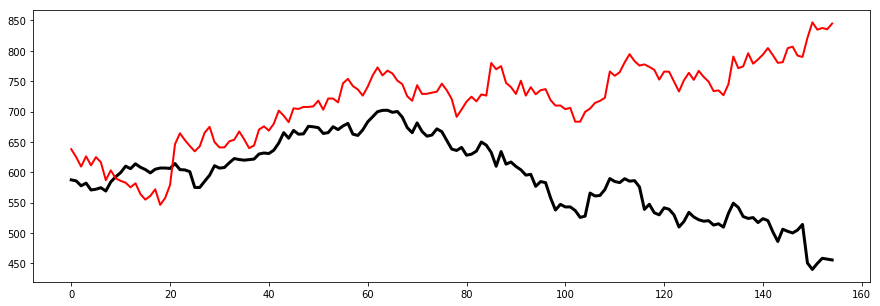

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X[:'2013-01'].values, y[:'2013-01'].values, 
                                                    train_size=.8,
                                                    shuffle=False,
                                                    random_state=1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show()

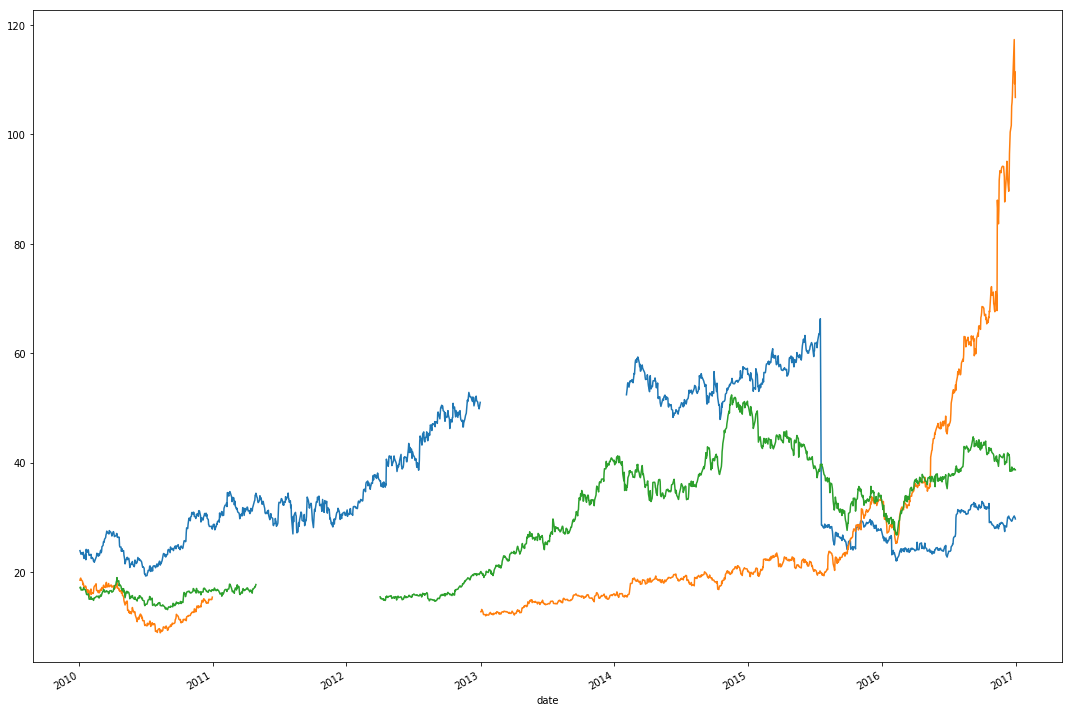

EBAY    273
NVDA    502
YHOO    232
dtype: int64


In [60]:
# data prep
prices_str = 'date,EBAY,NVDA,YHOO\n2010-01-04,23.9,18.49,17.1\n2010-01-05,23.65,18.76,17.23\n2010-01-06,23.5,18.879999,17.17\n2010-01-07,23.229998,18.51,16.700001\n2010-01-08,23.509999,18.549999,16.700001\n2010-01-11,23.45,18.290001,16.74\n2010-01-12,23.19,17.67,16.68\n2010-01-13,23.6,17.91,16.9\n2010-01-14,22.88,17.629998999999994,17.120001000000002\n2010-01-15,22.469998,17.110001,16.82\n2010-01-19,23.259999,17.43,16.75\n2010-01-20,22.23,17.360001,16.379998999999998\n2010-01-21,24.129998,17.049999,16.200001\n2010-01-22,23.579998,16.459999,15.88\n2010-01-25,23.69,16.74,15.86\n2010-01-26,24.069999,16.209999,15.99\n2010-01-27,23.969999,16.65,15.98\n2010-01-28,23.329998,16.09,15.44\n2010-01-29,23.019999,15.39,15.01\n2010-02-01,23.169999,16.57,15.05\n2010-02-02,23.079998,16.74,15.17\n2010-02-03,23.229998,16.879998999999998,15.46\n2010-02-04,22.449999,15.9,15.01\n2010-02-05,22.709999,16.219998999999998,15.19\n2010-02-08,22.49,16.190001000000002,14.99\n2010-02-09,22.369998,16.059998999999998,15.07\n2010-02-10,21.959999,16.370001000000002,14.8\n2010-02-11,22.13,17.120001000000002,15.22\n2010-02-12,21.769998,17.35,15.17\n2010-02-16,22.519998,17.67,15.41\n2010-02-17,22.68,17.84,15.44\n2010-02-18,22.84,16.67,15.54\n2010-02-19,23.419999,16.58,15.58\n2010-02-22,23.279998000000006,16.610001,15.49\n2010-02-23,22.89,16.209999,15.38\n2010-02-24,23.259999,16.549999,15.59\n2010-02-25,23.0,16.4,15.24\n2010-02-26,23.019999,16.200001,15.31\n2010-03-01,23.879998,16.85,15.79\n2010-03-02,23.99,16.84,15.73\n2010-03-03,23.509999,16.629998999999998,15.57\n2010-03-04,23.779998000000006,16.66,15.81\n2010-03-05,24.629999,17.17,16.059998999999998\n2010-03-08,24.839998,16.92,16.52\n2010-03-09,25.51,17.549999,16.530001000000002\n2010-03-10,25.56,17.59,16.790001\n2010-03-11,25.439998000000006,17.190001000000002,16.530001000000002\n2010-03-12,25.969999,17.25,16.32\n2010-03-15,26.279999,17.16,16.459999\n2010-03-16,26.789999,17.76,16.360001\n2010-03-17,26.979999,18.1,16.5\n2010-03-18,27.46,17.459999,16.559998999999998\n2010-03-19,27.189999,17.25,16.440001000000002\n2010-03-22,27.07,17.530001000000002,16.34\n2010-03-23,27.049998,17.889999,16.030001000000002\n2010-03-24,26.939999,17.290001,16.09\n2010-03-25,27.559998,17.34,16.32\n2010-03-26,27.449998,17.34,16.540001\n2010-03-29,27.279999,17.559998999999998,16.559998999999998\n2010-03-30,27.139999,17.629998999999994,16.610001\n2010-03-31,26.97,17.4,16.530001000000002\n2010-04-01,26.57,17.219998999999998,16.290001\n2010-04-05,27.37,17.48,16.51\n2010-04-06,27.27,17.049999,16.92\n2010-04-07,26.849998,17.16,16.870001000000002\n2010-04-08,26.46,16.879998999999998,17.35\n2010-04-09,26.549998,16.99,17.52\n2010-04-12,26.629999,17.299999,17.639999\n2010-04-13,26.639999,17.66,18.18\n2010-04-14,27.039999,17.879998999999994,18.379999\n2010-04-15,26.979999,18.01,18.969999\n2010-04-16,26.329999,17.059998999999998,18.17\n2010-04-19,26.32,16.98,18.389999\n2010-04-20,26.399998,17.040001,18.379999\n2010-04-21,26.289999,16.6,17.450001\n2010-04-22,24.779999,16.67,17.719998999999994\n2010-04-23,24.55,16.440001000000002,17.639999\n2010-04-26,24.559999,16.6,17.389999\n2010-04-27,23.769999,16.129998999999998,16.92\n2010-04-28,23.99,16.16,16.75\n2010-04-29,24.24,16.65,16.969998999999998\n2010-04-30,23.779998000000006,15.71,16.530001000000002\n2010-05-03,23.909999,15.54,16.950001\n2010-05-04,23.079998,14.75,16.32\n2010-05-05,22.659999,14.5,16.49\n2010-05-06,22.269998,14.2,15.92\n2010-05-07,21.48,13.96,15.29\n2010-05-10,22.33,14.56,16.33\n2010-05-11,22.38,14.4,16.41\n2010-05-12,22.509999,14.68,16.469998999999998\n2010-05-13,22.68,14.65,16.139999\n2010-05-14,22.249999,12.96,16.389999\n2010-05-17,22.509999,12.99,16.27\n2010-05-18,22.169998,12.56,16.030001000000002\n2010-05-19,21.64,12.76,15.79\n2010-05-20,20.809998,12.46,15.1\n2010-05-21,21.42,12.73,15.48\n2010-05-24,21.359999,12.36,15.54\n2010-05-25,21.59,12.69,15.31\n2010-05-26,21.38,12.75,15.45\n2010-05-27,21.909999,13.5,15.69\n2010-05-28,21.409999,13.14,15.34\n2010-06-01,20.959999,12.58,15.02\n2010-06-02,21.249999,12.72,15.18\n2010-06-03,22.18,12.7,15.43\n2010-06-04,21.99,12.1,15.0\n2010-06-07,21.549999,11.5,14.94\n2010-06-08,21.69,11.18,14.79\n2010-06-09,21.78,10.91,14.69\n2010-06-10,22.28,11.35,15.1\n2010-06-11,22.649999,11.61,15.29\n2010-06-14,22.209999,11.36,15.17\n2010-06-15,22.39,11.92,15.65\n2010-06-16,22.13,11.77,15.49\n2010-06-17,22.099999,12.22,15.6\n2010-06-18,22.159999,12.3,15.54\n2010-06-21,21.869998,12.01,15.21\n2010-06-22,21.559999,11.56,15.09\n2010-06-23,21.34,11.69,15.23\n2010-06-24,20.859998,11.11,14.83\n2010-06-25,20.949999,11.08,14.81\n2010-06-28,20.709998,11.1,14.73\n2010-06-29,19.689999,10.48,14.04\n2010-06-30,19.61,10.21,13.84\n2010-07-01,19.639999,10.38,14.09\n2010-07-02,19.26,10.25,14.07\n2010-07-06,19.349999,10.14,14.13\n2010-07-07,19.81,10.63,14.4\n2010-07-08,19.889999,10.31,14.6\n2010-07-09,20.289999,10.35,14.89\n2010-07-12,20.22,10.54,14.94\n2010-07-13,21.009999,10.92,15.52\n2010-07-14,21.109999,11.03,15.37\n2010-07-15,21.03,10.72,15.37\n2010-07-16,20.089999,10.05,14.9\n2010-07-19,20.399999,10.46,15.1\n2010-07-20,20.789999,10.72,15.2\n2010-07-21,20.17,10.37,13.91\n2010-07-22,20.939999,10.54,13.88\n2010-07-23,21.089999,10.36,13.99\n2010-07-26,21.139999,10.55,14.15\n2010-07-27,21.039999,10.46,13.95\n2010-07-28,21.039999,10.13,13.87\n2010-07-29,20.77,9.13,13.76\n2010-07-30,20.909998,9.19,13.88\n2010-08-02,21.459999,9.18,14.0\n2010-08-03,20.97,8.94,13.94\n2010-08-04,21.099999,9.32,14.18\n2010-08-05,21.07,9.44,14.16\n2010-08-06,21.449999,9.55,14.34\n2010-08-09,21.98,9.64,14.4\n2010-08-10,21.909999,9.24,14.35\n2010-08-11,21.249999,8.88,13.87\n2010-08-12,21.59,8.96,13.85\n2010-08-13,21.499999,9.39,13.83\n2010-08-16,22.049999,9.15,13.79\n2010-08-17,22.349999,9.27,13.94\n2010-08-18,22.74,9.32,13.99\n2010-08-19,23.129998,9.88,13.85\n2010-08-20,23.369999,9.97,13.79\n2010-08-23,23.269999,9.82,13.65\n2010-08-24,22.869999,9.72,13.4\n2010-08-25,23.159999,9.92,13.26\n2010-08-26,22.73,9.8,13.21\n2010-08-27,23.179998,10.12,13.43\n2010-08-30,23.129998,9.64,13.18\n2010-08-31,23.229998,9.33,13.11\n2010-09-01,24.029998000000006,9.4,13.37\n2010-09-02,24.059999,9.57,13.51\n2010-09-03,24.129998,9.9,13.62\n2010-09-07,23.529998000000006,9.99,13.53\n2010-09-08,24.569999,10.32,13.75\n2010-09-09,24.3,10.18,13.65\n2010-09-10,24.1,10.07,13.68\n2010-09-13,24.3,10.64,13.73\n2010-09-14,24.25,10.54,13.63\n2010-09-15,24.19,10.56,14.27\n2010-09-16,23.9,10.57,14.19\n2010-09-17,24.219999,10.55,13.89\n2010-09-20,24.65,10.71,13.86\n2010-09-21,24.739998,11.29,14.18\n2010-09-22,24.34,11.39,14.04\n2010-09-23,24.25,11.62,14.17\n2010-09-24,24.739998,12.26,14.5\n2010-09-27,24.769999,12.0,14.28\n2010-09-28,24.869999,11.97,14.39\n2010-09-29,24.989998,11.88,14.34\n2010-09-30,24.4,11.68,14.17\n2010-10-01,24.459999,11.35,14.27\n2010-10-04,24.079998,11.24,14.28\n2010-10-05,24.589998,11.32,14.61\n2010-10-06,24.45,10.78,14.52\n2010-10-07,24.75,10.7,14.23\n2010-10-08,24.61,10.86,14.49\n2010-10-11,24.29,10.81,14.41\n2010-10-12,24.45,11.02,14.43\n2010-10-13,24.869999,11.34,15.25\n2010-10-14,25.279999,11.16,15.93\n2010-10-15,25.679999,11.29,16.25\n2010-10-18,25.719999,11.36,15.93\n2010-10-19,25.529999,11.29,15.49\n2010-10-20,25.66,11.29,15.8\n2010-10-21,27.199998,11.09,15.97\n2010-10-22,28.07,11.8,16.309998999999998\n2010-10-25,27.93,11.91,16.4\n2010-10-26,28.749999,11.87,16.459999\n2010-10-27,29.28,12.04,16.42\n2010-10-28,29.719998,12.05,16.4\n2010-10-29,29.859999,12.02,16.49\n2010-11-01,29.359999,12.04,16.15\n2010-11-02,30.069998,12.29,16.190001000000002\n2010-11-03,30.109999,12.38,16.17\n2010-11-04,30.149999,12.4,16.200001\n2010-11-05,30.869999,12.61,16.27\n2010-11-08,30.84,12.66,16.440001000000002\n2010-11-09,30.529998,12.59,16.969998999999998\n2010-11-10,30.929998,12.74,16.940001000000002\n2010-11-11,30.79,12.61,16.799999\n2010-11-12,30.14,13.26,16.549999\n2010-11-15,30.059999,13.1,16.6\n2010-11-16,29.769998,12.71,16.24\n2010-11-17,30.14,12.92,16.15\n2010-11-18,30.569998,13.32,16.99\n2010-11-19,30.299999,13.75,16.57\n2010-11-22,30.64,13.76,16.559998999999998\n2010-11-23,30.18,13.44,16.190001000000002\n2010-11-24,31.209999,13.77,16.41\n2010-11-26,31.149999,13.6,16.219998999999998\n2010-11-29,30.23,13.75,16.379998999999998\n2010-11-30,29.139999,13.61,15.82\n2010-12-01,29.259999,14.21,16.15\n2010-12-02,29.909999,14.38,16.33\n2010-12-03,29.609999,14.79,16.35\n2010-12-06,29.489999,14.51,16.33\n2010-12-07,29.999999,14.98,16.940001000000002\n2010-12-08,30.149999,15.11,17.02\n2010-12-09,30.349999,14.86,16.950001\n2010-12-10,30.69,14.95,17.01\n2010-12-13,30.28,14.57,16.700001\n2010-12-14,30.749999,14.59,16.629998999999998\n2010-12-15,30.19,14.27,16.450001\n2010-12-16,30.529998,14.29,16.51\n2010-12-17,29.819998,14.37,16.379998999999998\n2010-12-20,29.58,14.31,16.280001000000002\n2010-12-21,28.649999,14.87,16.6\n2010-12-22,28.57,15.03,16.629998999999998\n2010-12-23,28.32,14.92,16.719998999999998\n2010-12-27,28.309998,15.0,16.48\n2010-12-28,28.349999,14.94,16.43\n2010-12-29,28.359998,14.94,16.610001\n2010-12-30,28.13,14.99,16.76\n2010-12-31,27.829999,15.4,16.629998999999998\n2011-01-03,28.68,,16.75\n2011-01-04,28.47,,16.59\n2011-01-05,28.73,,16.91\n2011-01-06,28.42,,17.059998999999998\n2011-01-07,27.699999,,16.9\n2011-01-10,28.259998,,16.6\n2011-01-11,28.359998,,16.58\n2011-01-12,28.83,,16.65\n2011-01-13,28.709998,,16.75\n2011-01-14,29.18,,16.809998999999998\n2011-01-18,29.449999,,16.5\n2011-01-19,29.099999,,16.309998999999998\n2011-01-20,30.779998,,16.23\n2011-01-21,30.019998,,15.97\n2011-01-24,30.509999,,16.09\n2011-01-25,30.909999,,16.02\n2011-01-26,31.059999,,15.57\n2011-01-27,30.959999,,16.200001\n2011-01-28,30.309999,,15.83\n2011-01-31,30.359999,,16.120001000000002\n2011-02-01,31.64,,16.379998999999998\n2011-02-02,31.879998,,16.57\n2011-02-03,32.05,,16.690001000000002\n2011-02-04,32.209999,,16.790001\n2011-02-07,32.239998,,16.799999\n2011-02-08,32.639998,,16.6\n2011-02-09,31.95,,16.43\n2011-02-10,34.489999,,16.620001000000002\n2011-02-11,34.51,,16.85\n2011-02-14,33.86,,16.889999\n2011-02-15,34.46,,17.200001\n2011-02-16,34.46,,17.76\n2011-02-17,34.689999,,17.77\n2011-02-18,34.529999,,17.66\n2011-02-22,33.649998,,16.91\n2011-02-23,32.85,,16.58\n2011-02-24,33.089998,,16.370001000000002\n2011-02-25,33.629999,,16.5\n2011-02-28,33.51,,16.4\n2011-03-01,32.289998,,16.1\n2011-03-02,32.679999,,16.629998999999998\n2011-03-03,32.929999,,16.860001\n2011-03-04,32.009999,,17.08\n2011-03-07,31.5,,16.700001\n2011-03-08,31.669999,,16.940001000000002\n2011-03-09,31.329998,,17.65\n2011-03-10,31.079998,,17.059998999999998\n2011-03-11,30.919999,,17.42\n2011-03-14,30.769998,,17.309998999999998\n2011-03-15,30.44,,16.33\n2011-03-16,29.73,,15.91\n2011-03-17,29.949999,,15.86\n2011-03-18,30.469998,,16.030001000000002\n2011-03-21,30.579998,,16.290001\n2011-03-22,30.219998,,16.360001\n2011-03-23,30.669998,,16.129998999999998\n2011-03-24,31.759999,,16.83\n2011-03-25,31.7,,16.959999\n2011-03-28,30.34,,16.58\n2011-03-29,31.079998,,16.75\n2011-03-30,31.629998,,16.74\n2011-03-31,31.04,,16.68\n2011-04-01,31.359999,,16.84\n2011-04-04,31.39,,16.870001000000002\n2011-04-05,31.84,,17.110001\n2011-04-06,31.85,,17.049999\n2011-04-07,31.529998,,17.0\n2011-04-08,31.14,,16.77\n2011-04-11,31.19,,16.59\n2011-04-12,30.699999,,16.360001\n2011-04-13,30.669998,,16.639999\n2011-04-14,30.849999,,16.690001000000002\n2011-04-15,31.609999,,16.620001000000002\n2011-04-18,31.149999,,16.35\n2011-04-19,31.149999,,16.120001000000002\n2011-04-20,31.759999,,16.870001000000002\n2011-04-21,31.95,,16.85\n2011-04-25,32.96,,17.110001\n2011-04-26,33.079999,,17.280001000000002\n2011-04-27,34.029999,,17.26\n2011-04-28,33.999998,,17.51\n2011-04-29,34.389999,,17.700001\n2011-05-02,33.639998,,\n2011-05-03,33.539998,,\n2011-05-04,33.01,,\n2011-05-05,32.679999,,\n2011-05-06,32.719999,,\n2011-05-09,33.119999,,\n2011-05-10,33.929999,,\n2011-05-11,33.31,,\n2011-05-12,33.579999,,\n2011-05-13,33.569999,,\n2011-05-16,32.369999,,\n2011-05-17,32.65,,\n2011-05-18,32.879999,,\n2011-05-19,32.9,,\n2011-05-20,32.479997999999995,,\n2011-05-23,31.629998,,\n2011-05-24,30.819998,,\n2011-05-25,30.699999,,\n2011-05-26,30.659999,,\n2011-05-27,30.679998,,\n2011-05-31,31.169999,,\n2011-06-01,30.64,,\n2011-06-02,31.279998,,\n2011-06-03,30.299999,,\n2011-06-06,29.559999,,\n2011-06-07,29.919998,,\n2011-06-08,30.569998,,\n2011-06-09,30.659999,,\n2011-06-10,29.959999,,\n2011-06-13,29.859999,,\n2011-06-14,29.759999,,\n2011-06-15,28.659998,,\n2011-06-16,28.47,,\n2011-06-17,28.83,,\n2011-06-20,28.82,,\n2011-06-21,29.78,,\n2011-06-22,29.349999,,\n2011-06-23,29.249999,,\n2011-06-24,28.349999,,\n2011-06-27,28.709998,,\n2011-06-28,28.959998,,\n2011-06-29,30.859999,,\n2011-06-30,32.269999,,\n2011-07-01,32.739998,,\n2011-07-05,32.639998,,\n2011-07-06,32.919999,,\n2011-07-07,33.329999,,\n2011-07-08,33.419999,,\n2011-07-11,32.91,,\n2011-07-12,32.259999,,\n2011-07-13,32.379998,,\n2011-07-14,32.189998,,\n2011-07-15,32.809999,,\n2011-07-18,32.7,,\n2011-07-19,33.76,,\n2011-07-20,33.169999,,\n2011-07-21,33.439998,,\n2011-07-22,33.499998,,\n2011-07-25,33.799997999999995,,\n2011-07-26,34.419999,,\n2011-07-27,33.36,,\n2011-07-28,33.35,,\n2011-07-29,32.75,,\n2011-08-01,33.019999,,\n2011-08-02,31.75,,\n2011-08-03,32.25,,\n2011-08-04,30.04,,\n2011-08-05,29.299999,,\n2011-08-08,26.949998,,\n2011-08-09,30.159999,,\n2011-08-10,29.149999,,\n2011-08-11,30.199999,,\n2011-08-12,30.529998,,\n2011-08-15,30.89,,\n2011-08-16,30.359999,,\n2011-08-17,30.249999,,\n2011-08-18,27.939999,,\n2011-08-19,27.16,,\n2011-08-22,27.36,,\n2011-08-23,28.92,,\n2011-08-24,29.049999,,\n2011-08-25,28.33,,\n2011-08-26,29.459999,,\n2011-08-29,30.49,,\n2011-08-30,30.949999,,\n2011-08-31,30.869999,,\n2011-09-01,30.39,,\n2011-09-02,29.409999,,\n2011-09-06,29.269998,,\n2011-09-07,29.749999,,\n2011-09-08,30.509999,,\n2011-09-09,28.459998,,\n2011-09-12,29.419998,,\n2011-09-13,29.399999,,\n2011-09-14,30.14,,\n2011-09-15,32.039998,,\n2011-09-16,33.689998,,\n2011-09-19,33.1,,\n2011-09-20,32.729999,,\n2011-09-21,32.239998,,\n2011-09-22,31.669999,,\n2011-09-23,32.079998,,\n2011-09-26,32.55,,\n2011-09-27,32.519999,,\n2011-09-28,31.64,,\n2011-09-29,30.669998,,\n2011-09-30,29.489999,,\n2011-10-03,28.109998,,\n2011-10-04,29.349999,,\n2011-10-05,30.529998,,\n2011-10-06,31.44,,\n2011-10-07,31.069999,,\n2011-10-10,32.3,,\n2011-10-11,32.829999,,\n2011-10-12,32.75,,\n2011-10-13,32.739998,,\n2011-10-14,33.689998,,\n2011-10-17,33.219999,,\n2011-10-18,33.869999,,\n2011-10-19,33.179999,,\n2011-10-20,32.15,,\n2011-10-21,32.119999,,\n2011-10-24,32.369999,,\n2011-10-25,31.669999,,\n2011-10-26,31.079998,,\n2011-10-27,32.289998,,\n2011-10-28,33.25,,\n2011-10-31,31.829998,,\n2011-11-01,30.89,,\n2011-11-02,31.779998,,\n2011-11-03,33.05,,\n2011-11-04,32.709999,,\n2011-11-07,32.469999,,\n2011-11-08,32.919999,,\n2011-11-09,31.179998,,\n2011-11-10,30.749999,,\n2011-11-11,31.759999,,\n2011-11-14,31.409999,,\n2011-11-15,31.45,,\n2011-11-16,30.54,,\n2011-11-17,29.649999,,\n2011-11-18,29.809999,,\n2011-11-21,28.749999,,\n2011-11-22,29.039999,,\n2011-11-23,28.549999,,\n2011-11-25,28.23,,\n2011-11-28,29.659999,,\n2011-11-29,28.749999,,\n2011-11-30,29.59,,\n2011-12-01,29.68,,\n2011-12-02,29.599999,,\n2011-12-05,30.699999,,\n2011-12-06,30.899999,,\n2011-12-07,30.94,,\n2011-12-08,31.029998,,\n2011-12-09,31.64,,\n2011-12-12,31.129998,,\n2011-12-13,30.84,,\n2011-12-14,30.269998,,\n2011-12-15,29.599999,,\n2011-12-16,30.399999,,\n2011-12-19,29.769998,,\n2011-12-20,30.629998,,\n2011-12-21,30.34,,\n2011-12-22,30.609999,,\n2011-12-23,30.84,,\n2011-12-27,30.919999,,\n2011-12-28,30.409999,,\n2011-12-29,30.359999,,\n2011-12-30,30.33,,\n2012-01-03,31.34,,\n2012-01-04,30.159999,,\n2012-01-05,30.709999,,\n2012-01-06,30.629998,,\n2012-01-09,30.509999,,\n2012-01-10,31.2,,\n2012-01-11,31.519999,,\n2012-01-12,31.579998,,\n2012-01-13,30.619998,,\n2012-01-17,30.529998,,\n2012-01-18,30.34,,\n2012-01-19,31.509999,,\n2012-01-20,31.929998,,\n2012-01-23,31.989998,,\n2012-01-24,31.95,,\n2012-01-25,31.939998,,\n2012-01-26,31.709999,,\n2012-01-27,31.85,,\n2012-01-30,31.579998,,\n2012-01-31,31.6,,\n2012-02-01,32.2,,\n2012-02-02,32.7,,\n2012-02-03,32.95,,\n2012-02-06,32.639998,,\n2012-02-07,32.869999,,\n2012-02-08,33.05,,\n2012-02-09,33.26,,\n2012-02-10,33.029999,,\n2012-02-13,33.16,,\n2012-02-14,32.96,,\n2012-02-15,33.31,,\n2012-02-16,34.51,,\n2012-02-17,35.059998,,\n2012-02-21,35.139999,,\n2012-02-22,34.67,,\n2012-02-23,36.02,,\n2012-02-24,36.359998,,\n2012-02-27,36.559998,,\n2012-02-28,36.619998,,\n2012-02-29,35.739999,,\n2012-03-01,36.37,,\n2012-03-02,36.249999,,\n2012-03-05,35.72,,\n2012-03-06,35.109998,,\n2012-03-07,35.589999,,\n2012-03-08,35.779999,,\n2012-03-09,36.249999,,\n2012-03-12,36.18,,\n2012-03-13,37.33,,\n2012-03-14,37.619998,,\n2012-03-15,36.83,,\n2012-03-16,37.689999,,\n2012-03-19,37.79,,\n2012-03-20,37.389999,,\n2012-03-21,37.419998,,\n2012-03-22,37.619998,,\n2012-03-23,37.089999,,\n2012-03-26,38.079998,,\n2012-03-27,37.869998,,\n2012-03-28,37.239999,,\n2012-03-29,36.989999,,\n2012-03-30,36.899999,,\n2012-04-02,36.589999,,15.46\n2012-04-03,36.63,,15.18\n2012-04-04,35.729999,,15.27\n2012-04-05,35.62,,15.07\n2012-04-09,36.299999,,15.1\n2012-04-10,35.47,,14.99\n2012-04-11,35.759998,,14.88\n2012-04-12,36.459998,,15.06\n2012-04-13,36.12,,14.87\n2012-04-16,35.499998,,14.79\n2012-04-17,36.079999,,15.01\n2012-04-18,35.87,,15.49\n2012-04-19,40.619997,,15.4\n2012-04-20,40.29,,15.6\n2012-04-23,39.649997,,15.33\n2012-04-24,39.299997,,15.43\n2012-04-25,39.859999,,15.5\n2012-04-26,41.049998,,15.53\n2012-04-27,41.229999,,15.57\n2012-04-30,41.019997,,15.54\n2012-05-01,40.749998,,15.63\n2012-05-02,41.16,,15.67\n2012-05-03,40.379998,,15.4\n2012-05-04,39.44,,15.15\n2012-05-07,40.070001,,15.35\n2012-05-08,40.19,,15.36\n2012-05-09,40.559999,,15.3\n2012-05-10,41.21,,15.44\n2012-05-11,40.74,,15.19\n2012-05-14,40.249997,,15.5\n2012-05-15,40.049997,,15.4\n2012-05-16,39.859999,,15.28\n2012-05-17,39.029998,,14.87\n2012-05-18,38.359999,,15.42\n2012-05-21,39.509999,,15.58\n2012-05-22,39.220001,,15.29\n2012-05-23,39.679998,,15.38\n2012-05-24,39.659999,,15.35\n2012-05-25,40.349997,,15.36\n2012-05-29,41.490001,,15.47\n2012-05-30,39.59,,15.25\n2012-05-31,39.19,,15.24\n2012-06-01,38.820001,,14.92\n2012-06-04,39.159999,,15.01\n2012-06-05,39.759999,,15.1\n2012-06-06,40.94,,15.36\n2012-06-07,40.899998,,15.36\n2012-06-08,41.049998,,15.65\n2012-06-11,40.929999,,15.3\n2012-06-12,40.909999,,15.47\n2012-06-13,40.169997,,15.34\n2012-06-14,40.129998,,15.36\n2012-06-15,40.669997,,15.36\n2012-06-18,42.490001,,15.49\n2012-06-19,43.499998,,15.65\n2012-06-20,42.949998,,15.74\n2012-06-21,41.829999,,15.52\n2012-06-22,42.799998,,15.61\n2012-06-25,41.81,,15.44\n2012-06-26,42.499998,,15.35\n2012-06-27,42.290001,,15.52\n2012-06-28,40.779999,,15.45\n2012-06-29,42.01,,15.83\n2012-07-02,41.219997,,15.84\n2012-07-03,41.199998,,15.98\n2012-07-05,40.929999,,15.85\n2012-07-06,40.409999,,15.78\n2012-07-09,40.679998,,15.75\n2012-07-10,39.679998,,15.82\n2012-07-11,39.129998,,15.8\n2012-07-12,39.309999,,15.69\n2012-07-13,39.949997,,15.74\n2012-07-16,38.599997,,15.65\n2012-07-17,39.070001,,15.6\n2012-07-18,40.459999,,15.7\n2012-07-19,43.949998,,15.73\n2012-07-20,44.849999,,15.92\n2012-07-23,44.239997,,15.76\n2012-07-24,43.519997,,15.43\n2012-07-25,43.189996,,15.5\n2012-07-26,43.789997,,15.8\n2012-07-27,45.219998,,16.110001\n2012-07-30,45.599999,,15.98\n2012-07-31,44.299999,,15.84\n2012-08-01,43.889997,,15.99\n2012-08-02,43.769998,,15.75\n2012-08-03,44.499999,,15.97\n2012-08-06,44.769998,,16.040001\n2012-08-07,45.610001,,16.219998999999998\n2012-08-08,44.939997,,16.17\n2012-08-09,44.269998,,16.01\n2012-08-10,43.989997,,15.15\n2012-08-13,45.319998,,15.02\n2012-08-14,45.360001,,14.73\n2012-08-15,44.98,,14.76\n2012-08-16,45.789997,,14.99\n2012-08-17,46.869998,,15.03\n2012-08-20,46.399999,,14.96\n2012-08-21,45.849999,,14.97\n2012-08-22,46.999999,,14.92\n2012-08-23,46.809997,,14.87\n2012-08-24,47.099999,,14.92\n2012-08-27,46.98,,14.85\n2012-08-28,46.939997,,14.72\n2012-08-29,47.489998,,14.84\n2012-08-30,46.549999,,14.67\n2012-08-31,47.469999,,14.65\n2012-09-04,47.359997,,14.89\n2012-09-05,47.159997,,15.09\n2012-09-06,48.909997,,15.11\n2012-09-07,49.239998,,15.22\n2012-09-10,48.530001,,15.11\n2012-09-11,48.330001,,15.16\n2012-09-12,47.989998,,15.4\n2012-09-13,48.880001,,15.6\n2012-09-14,49.969999,,15.77\n2012-09-17,50.479997,,15.68\n2012-09-18,49.959997,,15.91\n2012-09-19,50.389998,,15.86\n2012-09-20,50.079997,,15.79\n2012-09-21,49.469999,,15.74\n2012-09-24,49.309997,,16.0\n2012-09-25,48.030001,,15.68\n2012-09-26,47.539998,,15.61\n2012-09-27,49.119999,,16.040001\n2012-09-28,48.369999,,15.98\n2012-10-01,48.230001,,15.83\n2012-10-02,48.4,,15.94\n2012-10-03,48.589998,,16.209999\n2012-10-04,49.489998,,16.27\n2012-10-05,48.730001,,16.09\n2012-10-08,47.919999,,16.030001000000002\n2012-10-09,46.219998,,15.85\n2012-10-10,46.759997,,15.83\n2012-10-11,47.489998,,15.92\n2012-10-12,47.85,,15.88\n2012-10-15,47.399999,,15.68\n2012-10-16,48.239998,,15.92\n2012-10-17,48.2,,16.09\n2012-10-18,50.829997,,16.0\n2012-10-19,49.969999,,15.84\n2012-10-22,50.15,,15.77\n2012-10-23,49.35,,16.67\n2012-10-24,48.880001,,16.549999\n2012-10-25,48.339998,,16.610001\n2012-10-26,49.509997,,16.790001\n2012-10-31,48.259997,,16.84\n2012-11-01,49.219999,,16.950001\n2012-11-02,48.689998,,17.110001\n2012-11-05,49.35,,17.370001000000002\n2012-11-06,49.489998,,17.459999\n2012-11-07,48.4,,17.389999\n2012-11-08,47.869999,,17.24\n2012-11-09,47.73,,17.26\n2012-11-12,47.469999,,17.51\n2012-11-13,47.739998,,17.85\n2012-11-14,46.469998,,17.83\n2012-11-15,46.519998,,17.889999\n2012-11-16,47.259997,,17.860001\n2012-11-19,47.919999,,18.360001\n2012-11-20,48.259997,,18.24\n2012-11-21,48.630001,,18.4\n2012-11-23,49.009997,,18.57\n2012-11-26,51.400001,,18.76\n2012-11-27,51.15,,18.93\n2012-11-28,51.47,,18.91\n2012-11-29,52.199996,,18.870001\n2012-11-30,52.82,,18.77\n2012-12-03,52.039999,,18.549999\n2012-12-04,51.989999,,18.93\n2012-12-05,52.02,,18.889999\n2012-12-06,51.989999,,19.200001\n2012-12-07,51.739999,,19.200001\n2012-12-10,51.17,,19.43\n2012-12-11,51.989999,,19.52\n2012-12-12,51.859998,,19.379999\n2012-12-13,51.02,,19.35\n2012-12-14,50.359998,,19.639999\n2012-12-17,51.309998,,19.690001\n2012-12-18,51.909998,,19.620001\n2012-12-19,51.339999,,19.6\n2012-12-20,52.139999,,19.690001\n2012-12-21,51.350001,,19.35\n2012-12-24,51.079997,,19.65\n2012-12-26,50.239998,,19.57\n2012-12-27,50.289998,,19.6\n2012-12-28,49.809997,,19.5\n2012-12-31,51.0,,19.9\n2013-01-02,,12.72,20.08\n2013-01-03,,12.73,19.780001\n2013-01-04,,13.15,19.860001\n2013-01-07,,12.77,19.4\n2013-01-08,,12.49,19.66\n2013-01-09,,12.21,19.32\n2013-01-10,,12.23,18.99\n2013-01-11,,12.21,19.290001\n2013-01-14,,12.2,19.43\n2013-01-15,,11.98,19.52\n2013-01-16,,12.09,20.07\n2013-01-17,,12.25,20.129999\n2013-01-18,,12.17,20.02\n2013-01-22,,12.11,19.9\n2013-01-23,,12.13,20.110001\n2013-01-24,,12.19,20.440001\n2013-01-25,,12.41,20.370001\n2013-01-28,,12.61,20.309999\n2013-01-29,,12.34,19.700001\n2013-01-30,,12.32,20.120001\n2013-01-31,,12.26,19.629999\n2013-02-01,,12.37,19.76\n2013-02-04,,12.16,19.34\n2013-02-05,,12.44,19.66\n2013-02-06,,12.34,19.85\n2013-02-07,,12.29,20.32\n2013-02-08,,12.37,20.5\n2013-02-11,,12.51,20.9\n2013-02-12,,12.43,21.209999\n2013-02-13,,12.37,21.15\n2013-02-14,,12.73,21.18\n2013-02-15,,12.73,21.02\n2013-02-19,,12.56,21.290001\n2013-02-20,,12.38,20.92\n2013-02-21,,12.29,20.83\n2013-02-22,,12.52,21.219999\n2013-02-25,,12.3,20.73\n2013-02-26,,12.37,20.76\n2013-02-27,,12.6,21.16\n2013-02-28,,12.66,21.309999\n2013-03-01,,12.71,21.940001\n2013-03-04,,12.66,22.700001\n2013-03-05,,12.8,22.950001\n2013-03-06,,12.79,22.799999\n2013-03-07,,12.76,22.700001\n2013-03-08,,12.82,22.9\n2013-03-11,,12.7,22.6\n2013-03-12,,12.74,22.4\n2013-03-13,,12.74,22.34\n2013-03-14,,12.75,22.43\n2013-03-15,,12.64,22.07\n2013-03-18,,12.55,22.01\n2013-03-19,,12.47,22.17\n2013-03-20,,12.62,22.1\n2013-03-21,,12.42,22.860001\n2013-03-22,,12.48,23.26\n2013-03-25,,12.41,23.379999\n2013-03-26,,12.5,23.59\n2013-03-27,,12.65,23.59\n2013-03-28,,12.83,23.530001\n2013-04-01,,12.41,23.5\n2013-04-02,,12.28,23.780001\n2013-04-03,,12.13,23.379999\n2013-04-04,,12.25,23.52\n2013-04-05,,12.46,23.299999\n2013-04-08,,12.43,23.48\n2013-04-09,,12.63,23.83\n2013-04-10,,12.83,24.200001\n2013-04-11,,12.77,24.49\n2013-04-12,,13.09,24.690001\n2013-04-15,,12.82,23.98\n2013-04-16,,12.96,23.790001\n2013-04-17,,12.79,23.700001\n2013-04-18,,12.54,23.26\n2013-04-19,,12.57,23.469999\n2013-04-22,,12.59,23.950001\n2013-04-23,,12.92,24.379999\n2013-04-24,,13.36,24.75\n2013-04-25,,13.47,25.200001\n2013-04-26,,13.41,24.68\n2013-04-29,,13.57,24.43\n2013-04-30,,13.77,24.73\n2013-05-01,,13.65,24.299999\n2013-05-02,,13.81,24.969999\n2013-05-03,,13.87,25.07\n2013-05-06,,13.83,25.17\n2013-05-07,,13.65,26.07\n2013-05-08,,13.9,26.41\n2013-05-09,,13.91,26.24\n2013-05-10,,14.54,26.83\n2013-05-13,,14.24,26.389999\n2013-05-14,,14.45,26.639999\n2013-05-15,,14.7,27.34\n2013-05-16,,14.63,26.58\n2013-05-17,,14.87,26.52\n2013-05-20,,14.84,26.58\n2013-05-21,,14.92,27.0\n2013-05-22,,14.4,26.540001\n2013-05-23,,14.63,26.02\n2013-05-24,,14.54,26.33\n2013-05-28,,14.53,26.07\n2013-05-29,,14.44,25.809999\n2013-05-30,,14.63,26.33\n2013-05-31,,14.47,26.299999\n2013-06-03,,14.45,26.389999\n2013-06-04,,14.47,26.26\n2013-06-05,,14.16,25.75\n2013-06-06,,14.25,26.209999\n2013-06-07,,14.45,27.040001\n2013-06-10,,14.44,26.74\n2013-06-11,,14.17,26.4\n2013-06-12,,14.05,25.889999\n2013-06-13,,14.37,26.370001\n2013-06-14,,14.35,26.280001\n2013-06-17,,14.49,26.540001\n2013-06-18,,14.4,26.66\n2013-06-19,,14.84,26.24\n2013-06-20,,14.44,25.35\n2013-06-21,,14.42,25.190001\n2013-06-24,,14.12,24.07\n2013-06-25,,14.22,24.959999\n2013-06-26,,14.14,25.290001\n2013-06-27,,14.01,25.469999\n2013-06-28,,14.04,25.129999\n2013-07-01,,14.1,25.24\n2013-07-02,,14.09,24.99\n2013-07-03,,14.13,25.59\n2013-07-05,,14.24,25.68\n2013-07-08,,14.17,25.530001\n2013-07-09,,14.24,26.68\n2013-07-10,,14.43,26.559999\n2013-07-11,,14.63,27.040001\n2013-07-12,,14.64,27.23\n2013-07-15,,14.61,27.34\n2013-07-16,,14.69,26.879999\n2013-07-17,,14.61,29.66\n2013-07-18,,14.55,29.66\n2013-07-19,,14.24,29.110001\n2013-07-22,,14.23,27.860001\n2013-07-23,,14.21,27.360001\n2013-07-24,,14.21,27.84\n2013-07-25,,14.26,28.27\n2013-07-26,,14.2,28.110001\n2013-07-29,,14.17,27.93\n2013-07-30,,14.41,28.049999\n2013-07-31,,14.44,28.09\n2013-08-01,,14.64,27.959999\n2013-08-02,,14.76,27.65\n2013-08-05,,14.83,27.67\n2013-08-06,,14.61,27.32\n2013-08-07,,14.6,27.389999\n2013-08-08,,14.7,27.48\n2013-08-09,,14.49,27.68\n2013-08-12,,14.37,28.35\n2013-08-13,,14.42,28.34\n2013-08-14,,15.03,28.049999\n2013-08-15,,15.13,27.139999\n2013-08-16,,15.19,27.32\n2013-08-19,,14.95,26.91\n2013-08-20,,14.95,27.120001\n2013-08-21,,14.88,27.059999\n2013-08-22,,14.96,27.9\n2013-08-23,,14.96,27.99\n2013-08-26,,14.99,27.700001\n2013-08-27,,14.8,27.0\n2013-08-28,,14.8,27.110001\n2013-08-29,,14.77,27.299999\n2013-08-30,,14.75,27.120001\n2013-09-03,,14.76,27.780001\n2013-09-04,,14.9,28.07\n2013-09-05,,14.94,28.23\n2013-09-06,,14.88,28.17\n2013-09-09,,15.13,29.24\n2013-09-10,,15.45,29.48\n2013-09-11,,15.71,29.190001\n2013-09-12,,15.7,29.65\n2013-09-13,,15.8,29.26\n2013-09-16,,15.81,29.620001\n2013-09-17,,15.86,30.0\n2013-09-18,,16.0,30.440001\n2013-09-19,,15.93,31.030001\n2013-09-20,,15.79,30.93\n2013-09-23,,15.64,30.26\n2013-09-24,,15.7,31.27\n2013-09-25,,15.72,31.34\n2013-09-26,,15.67,32.75\n2013-09-27,,15.58,33.549999\n2013-09-30,,15.56,33.169998\n2013-10-01,,15.55,34.310001\n2013-10-02,,15.54,34.139999\n2013-10-03,,15.38,33.880001\n2013-10-04,,15.59,34.889999\n2013-10-07,,15.59,34.139999\n2013-10-08,,15.46,32.93\n2013-10-09,,15.22,33.009998\n2013-10-10,,15.39,33.869999\n2013-10-11,,15.26,34.150002\n2013-10-14,,15.49,34.0\n2013-10-15,,15.41,33.380001\n2013-10-16,,15.6,33.09\n2013-10-17,,15.63,32.740002000000004\n2013-10-18,,15.81,33.43\n2013-10-21,,15.85,34.060001\n2013-10-22,,15.77,33.939999\n2013-10-23,,15.5,33.099998\n2013-10-24,,15.39,33.080002\n2013-10-25,,15.24,32.25\n2013-10-28,,15.21,32.349998\n2013-10-29,,15.23,33.169998\n2013-10-30,,15.22,32.57\n2013-10-31,,15.19,32.939999\n2013-11-01,,15.26,33.18\n2013-11-04,,14.82,33.189999\n2013-11-05,,14.8,32.970001\n2013-11-06,,14.9,32.880001\n2013-11-07,,14.55,32.110001000000004\n2013-11-08,,15.56,33.119999\n2013-11-11,,15.69,33.82\n2013-11-12,,15.72,34.07\n2013-11-13,,16.15,35.099998\n2013-11-14,,16.219998999999998,35.689999\n2013-11-15,,16.17,35.470001\n2013-11-18,,15.78,34.98\n2013-11-19,,15.44,34.630001\n2013-11-20,,15.21,35.619999\n2013-11-21,,15.33,36.299999\n2013-11-22,,15.18,36.490002\n2013-11-25,,15.51,36.290001\n2013-11-26,,15.64,36.639999\n2013-11-27,,15.7,36.959999\n2013-11-29,,15.6,36.98\n2013-12-02,,15.75,37.009998\n2013-12-03,,15.74,36.560001\n2013-12-04,,15.96,38.130001\n2013-12-05,,15.7,38.869999\n2013-12-06,,15.47,38.860001\n2013-12-09,,15.21,38.869999\n2013-12-10,,15.56,40.220001\n2013-12-11,,15.41,39.16\n2013-12-12,,15.11,39.349998\n2013-12-13,,15.02,39.73\n2013-12-16,,15.04,39.73\n2013-12-17,,15.11,39.509998\n2013-12-18,,15.32,40.040001\n2013-12-19,,15.38,40.200001\n2013-12-20,,15.69,40.119999\n2013-12-23,,15.78,40.77\n2013-12-24,,15.82,40.849998\n2013-12-26,,15.67,40.650002\n2013-12-27,,15.76,40.490002\n2013-12-30,,15.97,40.200001\n2013-12-31,,16.02,40.439999\n2014-01-02,,15.86,39.59\n2014-01-03,,15.67,40.119999\n2014-01-06,,15.88,39.93\n2014-01-07,,16.139999,40.919998\n2014-01-08,,16.360001,41.02\n2014-01-09,,15.75,40.919998\n2014-01-10,,15.73,41.23\n2014-01-13,,15.36,39.990002\n2014-01-14,,15.84,41.139999\n2014-01-15,,16.01,41.07\n2014-01-16,,16.059998999999998,40.34\n2014-01-17,,15.99,40.009998\n2014-01-21,,16.049999,39.52\n2014-01-22,,16.030001000000002,40.18\n2014-01-23,,15.97,39.389999\n2014-01-24,,15.56,37.91\n2014-01-27,,15.46,36.650002\n2014-01-28,,15.61,38.220001\n2014-01-29,,15.46,34.889999\n2014-01-30,,15.72,35.310001\n2014-01-31,,15.7,36.009998\n2014-02-03,52.389999,15.49,34.900002\n2014-02-04,52.909998,15.58,35.66\n2014-02-05,53.52,15.44,35.49000200000001\n2014-02-06,54.36999599999999,15.64,36.240002\n2014-02-07,54.59,15.87,37.23\n2014-02-10,53.779998,15.92,37.759998\n2014-02-11,54.309999,16.25,38.5\n2014-02-12,54.830002,16.83,38.110001\n2014-02-13,54.919996,17.360001,38.52\n2014-02-14,54.770001,17.91,38.23\n2014-02-18,55.150002,17.9,38.310001\n2014-02-19,54.74,18.139999,37.810001\n2014-02-20,54.959999,18.780001,37.790001\n2014-02-21,54.59,18.639999,37.290001\n2014-02-24,56.299997,18.91,37.419998\n2014-02-25,56.150002,18.74,37.259998\n2014-02-26,57.34,18.709999,37.619999\n2014-02-27,58.340001,18.5,38.470001\n2014-02-28,58.769997,18.379999,38.669998\n2014-03-03,58.31,18.290001,38.25\n2014-03-04,59.06,18.48,39.630001\n2014-03-05,58.86,18.639999,39.5\n2014-03-06,59.299998,18.379999,39.66\n2014-03-07,59.06,18.360001,38.700001\n2014-03-10,58.220001,18.09,38.049999\n2014-03-11,57.54,18.27,37.560001\n2014-03-12,57.979999,18.32,37.5\n2014-03-13,56.699997,17.74,37.23\n2014-03-14,56.74,17.82,37.599998\n2014-03-17,57.419997,17.82,39.110001\n2014-03-18,57.84,18.24,39.450001\n2014-03-19,57.299998,18.559999,38.610001\n2014-03-20,57.119997,18.57,37.77\n2014-03-21,56.959999,18.540001,37.939999\n2014-03-24,56.54,18.450001,36.68\n2014-03-25,56.329998,18.450001,35.93\n2014-03-26,55.599997,18.030001,35.450001\n2014-03-27,55.179998,17.790001,35.59\n2014-03-28,55.189995,17.9,35.900002\n2014-03-31,55.24,17.91,35.900002\n2014-04-01,56.04,18.65,36.490002\n2014-04-02,55.449997,18.530001,36.639999\n2014-04-03,54.580002,18.73,35.759998\n2014-04-04,53.999997,18.15,34.259998\n2014-04-07,52.950001,18.209999,33.07\n2014-04-08,54.799997,18.860001,33.830002\n2014-04-09,55.89,18.84,34.869999\n2014-04-10,54.080002,18.379999,33.400002\n2014-04-11,53.459998,18.120001,32.869999\n2014-04-14,53.979998,18.32,33.450001\n2014-04-15,53.900001,18.450001,34.209999\n2014-04-16,54.689995,18.49,36.349998\n2014-04-17,54.970001,18.559999,36.380001\n2014-04-21,54.929998,18.709999,36.400002\n2014-04-22,55.470001,18.870001,36.139999\n2014-04-23,54.939995,19.09,35.439999\n2014-04-24,54.84,19.26,35.24000200000001\n2014-04-25,53.72,18.73,34.48\n2014-04-28,53.639999,18.65,33.990002000000004\n2014-04-29,54.54,18.690001,35.830002\n2014-04-30,51.830002,18.469999,35.950001\n2014-05-01,51.689999,18.57,36.509998\n2014-05-02,52.009998,18.43,36.869999\n2014-05-05,51.999996,18.629999,36.91\n2014-05-06,50.95,18.25,36.490002\n2014-05-07,50.569999,18.27,34.07\n2014-05-08,50.259997,18.5,33.919998\n2014-05-09,50.539998,18.049999,33.759998\n2014-05-12,51.330001,18.58,34.450001\n2014-05-13,51.580001,18.280001,34.400002\n2014-05-14,51.650001,18.1,34.169998\n2014-05-15,51.359998,18.0,33.799999\n2014-05-16,51.950001,17.959999,33.41\n2014-05-19,52.330002,18.540001,33.889999\n2014-05-20,51.959998,18.24,33.869999\n2014-05-21,51.88000200000001,18.24,34.360001000000004\n2014-05-22,51.500001,18.32,34.700001\n2014-05-23,52.02,18.49,35.02\n2014-05-27,51.77,18.82,35.119999\n2014-05-28,50.389998,18.98,34.779999\n2014-05-29,50.139998,18.950001,34.900002\n2014-05-30,50.729997,19.0,34.650002\n2014-06-02,50.489998,18.940001,34.869999\n2014-06-03,50.419995,18.860001,34.650002\n2014-06-04,50.45,18.879999,34.73\n2014-06-05,50.580001,18.959999,34.939999\n2014-06-06,49.7,19.030001,35.919998\n2014-06-09,49.580001,19.049999,36.040001\n2014-06-10,48.25,19.15,36.310001\n2014-06-11,48.830001,19.4,36.630001\n2014-06-12,48.560002,19.52,36.779999\n2014-06-13,49.039998,19.540001,36.939999\n2014-06-16,49.0,19.48,34.810001\n2014-06-17,49.060002,19.610001,34.43\n2014-06-18,49.659997,19.59,34.939999\n2014-06-19,49.599995,19.139999,34.68\n2014-06-20,49.339998,18.93,34.049999\n2014-06-23,49.389998,18.709999,33.639999\n2014-06-24,48.849995,18.42,33.48\n2014-06-25,49.319999,18.610001,33.25\n2014-06-26,49.469999,18.360001,33.66\n2014-06-27,50.080001,18.379999,34.25\n2014-06-30,50.060002,18.540001,35.130001\n2014-07-01,50.5,18.75,35.349998\n2014-07-02,50.549996,18.68,35.880001\n2014-07-03,50.939999,18.85,36.139999\n2014-07-07,50.739999,18.700001,35.52\n2014-07-08,50.179997,18.549999,34.529999\n2014-07-09,50.929997,19.110001,34.849998\n2014-07-10,50.339998,19.01,34.93\n2014-07-11,51.500001,19.049999,35.43\n2014-07-14,51.159998,19.290001,35.700001\n2014-07-15,50.819999,19.370001,35.61000100000001\n2014-07-16,50.7,19.35,33.790001000000004\n2014-07-17,51.029997,19.299999,33.209999\n2014-07-18,51.479997,18.440001,33.330002\n2014-07-21,51.700001,18.549999,33.279999\n2014-07-22,52.049996,18.469999,33.599998\n2014-07-23,52.659998,18.08,34.709999\n2014-07-24,53.229997,18.110001,36.169998\n2014-07-25,52.749996,17.790001,36.119999\n2014-07-28,52.929997,17.719998999999994,35.900002\n2014-07-29,53.209998,17.780001000000006,35.68\n2014-07-30,53.229997,18.08,36.599998\n2014-07-31,52.830002,17.5,35.810001\n2014-08-01,52.529997,17.690001000000006,35.619999\n2014-08-04,53.059998,17.65,36.529999\n2014-08-05,53.259998,17.66,35.700001\n2014-08-06,53.459998,17.639999,35.79000100000001\n2014-08-07,53.559998,17.459999,35.66\n2014-08-08,54.089999,19.0,35.91\n2014-08-11,53.879998,18.9,35.79000100000001\n2014-08-12,53.429997,18.9,35.52\n2014-08-13,52.939999,19.01,36.189999\n2014-08-14,52.929997,18.799999,36.360001\n2014-08-15,52.639999,19.040001,36.470001\n2014-08-18,53.109998,19.299999,37.380001\n2014-08-19,53.749997,19.370001,37.830002\n2014-08-20,53.400001,19.25,37.5\n2014-08-21,55.89,19.07,37.639999\n2014-08-22,55.499997,19.08,38.009998\n2014-08-25,55.49,19.110001,37.709999\n2014-08-26,56.249997,19.450001,37.790001\n2014-08-27,55.919996,19.23,38.18\n2014-08-28,55.429998,19.389999,38.310001\n2014-08-29,55.499997,19.450001,38.509998\n2014-09-02,54.879998,19.5,39.27\n2014-09-03,54.549997,19.68,38.869999\n2014-09-04,54.439995,20.030001,39.189999\n2014-09-05,53.900001,19.969999,39.59\n2014-09-08,54.229998,19.790001,41.810001\n2014-09-09,52.729997,19.540001,40.779999\n2014-09-10,51.099996,19.610001,41.139999\n2014-09-11,50.679997,19.41,41.259998\n2014-09-12,52.189999,19.120001,42.880001\n2014-09-15,50.959998,18.860001,42.549999\n2014-09-16,51.609998,19.139999,42.709999\n2014-09-17,51.950001,19.15,42.59\n2014-09-18,52.700001,19.440001,42.09\n2014-09-19,52.400001,19.08,40.93\n2014-09-22,52.47,18.889999,38.650002\n2014-09-23,52.739999,18.809999,39.049999\n2014-09-24,52.929997,18.92,39.880001\n2014-09-25,52.150001,18.51,38.950001\n2014-09-26,52.929997,18.549999,40.66\n2014-09-29,52.659998,18.52,40.52\n2014-09-30,56.629998,18.450001,40.75\n2014-10-01,55.459999,18.27,40.32\n2014-10-02,54.859999,18.190001,40.5\n2014-10-03,54.439995,18.23,41.029999\n2014-10-06,53.549997,18.120001,41.52\n2014-10-07,52.97,17.93,40.93\n2014-10-08,54.509999,18.26,41.080002\n2014-10-09,52.859998,17.91,41.099998\n2014-10-10,51.859998,16.85,39.599998\n2014-10-13,50.459998,16.790001,38.380001\n2014-10-14,50.589998,17.18,37.970001\n2014-10-15,50.239998,17.440001000000002,37.82\n2014-10-16,47.88,17.450001,38.119999\n2014-10-17,47.95,17.42,38.450001\n2014-10-20,49.2,17.57,39.279999\n2014-10-21,50.859998,18.32,40.18\n2014-10-22,50.130001,17.889999,42.0\n2014-10-23,50.789999,18.290001,42.599998\n2014-10-24,51.12,18.48,43.5\n2014-10-27,51.189999,18.49,44.700001\n2014-10-28,51.2,18.93,45.869999\n2014-10-29,51.330001,18.809999,45.43\n2014-10-30,51.549996,18.690001,45.630001\n2014-10-31,52.499996,19.540001,46.049999\n2014-11-03,52.700001,19.870001,46.34\n2014-11-04,53.27,20.129999,47.080002\n2014-11-05,53.589999,20.129999,47.459999\n2014-11-06,53.259998,20.219999,47.93\n2014-11-07,53.52,19.790001,48.549999\n2014-11-10,53.889999,20.02,49.41\n2014-11-11,54.189995,19.780001,49.049999\n2014-11-12,54.059999,19.65,50.599998\n2014-11-13,54.36999599999999,19.549999,50.5\n2014-11-14,54.359999,19.790001,51.75\n2014-11-17,54.830002,19.700001,52.369999\n2014-11-18,55.379998,20.17,51.75\n2014-11-19,54.939995,20.01,50.580002\n2014-11-20,54.54,20.34,51.25\n2014-11-21,54.419996,20.450001,51.040001\n2014-11-24,54.39,20.58,51.830002\n2014-11-25,54.400001,20.57,51.720001\n2014-11-26,54.569996,20.92,51.93\n2014-11-28,54.879998,20.969999,51.740002\n2014-12-01,54.86999599999999,20.58,50.099998\n2014-12-02,55.020001,20.610001,50.669998\n2014-12-03,54.809999,21.139999,50.279999\n2014-12-04,54.669996,20.950001,50.41\n2014-12-05,54.809999,21.07,50.990002\n2014-12-08,55.150002,20.799999,49.619999\n2014-12-09,55.400002,20.73,50.509998\n2014-12-10,55.270001,20.27,49.209999\n2014-12-11,56.79,20.26,49.939999\n2014-12-12,55.770001,19.629999,50.240002\n2014-12-15,55.439995,19.57,49.82\n2014-12-16,55.939995,19.35,48.849998\n2014-12-17,56.409999,20.139999,50.119999\n2014-12-18,57.529999,20.219999,50.91\n2014-12-19,57.139996,20.42,50.880001\n2014-12-22,57.329999,20.780001,51.150002\n2014-12-23,57.229998,20.65,50.02\n2014-12-24,57.099998,20.57,50.650002\n2014-12-26,57.04,20.59,50.860001\n2014-12-29,57.029998,20.559999,50.529999\n2014-12-30,57.220001,20.370001,51.220001\n2014-12-31,56.11999599999999,20.049999,50.509998\n2015-01-02,56.209999,20.129999,50.169998\n2015-01-05,55.74,19.790001,49.130001\n2015-01-06,55.019996,19.190001,49.209999\n2015-01-07,54.929998,19.139999,48.59\n2015-01-08,56.409999,19.860001,50.23\n2015-01-09,55.629998,19.940001,49.720001\n2015-01-12,55.199997,19.690001,48.799999\n2015-01-13,55.129998,19.66,48.299999\n2015-01-14,54.029998,19.74,47.509998\n2015-01-15,53.02,19.6,46.23\n2015-01-16,53.659998,19.959999,46.470001\n2015-01-20,53.679998,20.02,47.630001\n2015-01-21,53.379997,20.299999,48.18\n2015-01-22,57.149998,20.65,48.889999\n2015-01-23,56.759999,20.709999,48.950001\n2015-01-26,56.059999,20.620001,49.439999\n2015-01-27,54.69,19.629999,47.990002\n2015-01-28,53.839999,19.309999,46.459999\n2015-01-29,53.959999,19.780001,43.73\n2015-01-30,52.999996,19.200001,43.990002\n2015-02-02,53.709998,19.620001,44.689999\n2015-02-03,54.249997,20.110001,44.700001\n2015-02-04,53.709998,20.16,44.049999\n2015-02-05,54.29,20.49,43.549999\n2015-02-06,54.499997,20.4,42.939999\n2015-02-09,54.329998,20.379999,42.57\n2015-02-10,55.269996,20.950001,43.07\n2015-02-11,55.14,20.809999,42.959999\n2015-02-12,54.74,22.299999,43.93\n2015-02-13,56.469996,22.309999,44.419998\n2015-02-17,56.419996,22.379999,43.529999\n2015-02-18,56.899998,22.120001,43.650002\n2015-02-19,57.649998,22.18,44.369999\n2015-02-20,58.019997,22.34,44.110001\n2015-02-23,58.069997,22.16,43.529999\n2015-02-24,58.399998,22.309999,43.380001\n2015-02-25,58.349998,22.139999,44.43\n2015-02-26,58.539996,22.200001,44.450001\n2015-02-27,57.91,22.059999,44.279999\n2015-03-02,58.379999,22.6,44.110001\n2015-03-03,58.26,22.18,42.619999\n2015-03-04,58.31,22.43,43.990002\n2015-03-05,59.079999,22.860001,44.16\n2015-03-06,59.869997,22.549999,43.439999\n2015-03-09,60.81,22.610001,42.98\n2015-03-10,59.21,23.0,42.68\n2015-03-11,59.679999,22.879999,42.5\n2015-03-12,59.41,22.67,42.950001\n2015-03-13,59.069997,22.700001,42.869999\n2015-03-16,59.569997,22.969999,43.509998\n2015-03-17,59.489996,23.25,43.790001\n2015-03-18,58.429999,22.870001,44.669998\n2015-03-19,57.879999,23.219999,44.98\n2015-03-20,57.929999,23.469999,45.040001\n2015-03-23,58.619997,22.709999,44.720001\n2015-03-24,59.51,22.4,44.419998\n2015-03-25,58.06,21.040001,44.200001\n2015-03-26,57.519997,20.969999,44.470001\n2015-03-27,57.629999,21.379999,45.099998\n2015-03-30,57.929999,21.469999,44.950001\n2015-03-31,57.679999,20.93,44.439999\n2015-04-01,57.129998,21.01,44.130001\n2015-04-02,56.909999,21.059999,44.150002\n2015-04-06,56.819997,21.67,43.669998\n2015-04-07,57.079998,21.860001,43.610001\n2015-04-08,57.109999,22.02,45.169998\n2015-04-09,57.009999,22.530001,45.630001\n2015-04-10,57.34,22.76,45.18\n2015-04-13,56.94,22.549999,44.77\n2015-04-14,56.949998,22.360001,45.529999\n2015-04-15,57.019997,22.629999,45.73\n2015-04-16,57.04,22.49,45.779999\n2015-04-17,55.79,22.200001,44.450001\n2015-04-20,56.069996,22.09,44.66\n2015-04-21,56.419996,22.059999,44.490002\n2015-04-22,56.749997,22.309999,43.98\n2015-04-23,58.889996,22.219999,43.700001\n2015-04-24,59.199998,22.030001,44.52\n2015-04-27,59.089996,22.200001,44.360001\n2015-04-28,59.479999,22.309999,44.34\n2015-04-29,58.879999,22.139999,43.279999\n2015-04-30,58.26,22.200001,42.57\n2015-05-01,59.299998,22.75,42.509998\n2015-05-04,59.11,22.610001,42.040001\n2015-05-05,57.939996,22.030001,41.299999\n2015-05-06,57.49,22.1,41.66\n2015-05-07,57.96,22.49,43.869999\n2015-05-08,58.819997,20.83,44.09\n2015-05-11,58.339996,20.629999,43.599998\n2015-05-12,58.299998,20.83,43.84\n2015-05-13,58.81,20.950001,44.400002\n2015-05-14,60.099998,21.290001,44.950001\n2015-05-15,59.41,21.299999,44.75\n2015-05-18,59.46,21.27,44.360001\n2015-05-19,59.249998,21.040001,40.98\n2015-05-20,59.149998,21.040001,42.790001\n2015-05-21,59.739996,20.889999,43.68\n2015-05-22,59.719997,20.860001,43.490002\n2015-05-26,58.729999,20.73,42.849998\n2015-05-27,59.379999,21.84,43.380001\n2015-05-28,60.56,22.139999,43.07\n2015-05-29,61.359996,22.129999,42.939999\n2015-06-01,62.559996,22.379999,43.349998\n2015-06-02,61.999999,21.940001,43.150002\n2015-06-03,62.009996,21.700001,43.209999\n2015-06-04,62.489997,22.09,42.880001\n2015-06-05,63.23,22.26,42.810001\n2015-06-08,60.849999,21.75,42.009998\n2015-06-09,60.41,21.860001,41.630001\n2015-06-10,60.469998,21.469999,42.060001\n2015-06-11,60.449998,21.700001,40.939999\n2015-06-12,60.019997,21.110001,40.529999\n2015-06-15,59.999998,21.07,40.470001\n2015-06-16,60.519998,21.33,40.639999\n2015-06-17,60.549999,21.58,40.959999\n2015-06-18,60.689997,21.940001,40.91\n2015-06-19,61.169998,21.870001,40.509998\n2015-06-22,61.749999,21.780001,40.73\n2015-06-23,61.93,21.219999,40.650002\n2015-06-24,61.609996,21.01,40.939999\n2015-06-25,61.599999,21.17,41.07\n2015-06-26,61.039997,20.74,40.060001\n2015-06-29,59.369997,20.120001,38.91\n2015-06-30,60.239997,20.110001,39.290001\n2015-07-01,60.429999,20.4,39.330002\n2015-07-02,61.849999,20.42,39.380001\n2015-07-06,61.759996,20.17,38.610001\n2015-07-07,61.98,19.790001,38.23\n2015-07-08,60.989997,19.65,37.23\n2015-07-09,61.769998,19.41,37.610001\n2015-07-10,62.369998,19.75,37.919998\n2015-07-13,63.469998,19.879999,38.759998\n2015-07-14,63.589998,19.889999,38.630001\n2015-07-15,63.439997,19.75,38.380001\n2015-07-16,65.589998,20.190001,38.91\n2015-07-17,66.289998,20.07,39.68\n2015-07-20,28.57,19.700001,39.540001\n2015-07-21,28.6,19.790001,39.73\n2015-07-22,28.450001,19.41,39.240002\n2015-07-23,28.43,19.65,39.209999\n2015-07-24,28.23,19.42,38.849998\n2015-07-27,28.0,19.309999,37.84\n2015-07-28,28.33,19.73,37.720001\n2015-07-29,28.75,19.969999,37.669998\n2015-07-30,28.370001,20.02,37.419998\n2015-07-31,28.120001,19.950001,36.669998\n2015-08-03,28.33,20.290001,36.689999\n2015-08-04,28.41,20.370001,37.119999\n2015-08-05,28.559999,20.58,37.25\n2015-08-06,28.16,20.450001,36.459999\n2015-08-07,28.549999,22.98,36.669998\n2015-08-10,28.66,23.780001,37.150002\n2015-08-11,28.139999,23.66,36.029999\n2015-08-12,28.01,23.719999,34.490002000000004\n2015-08-13,27.99,23.52,35.93\n2015-08-14,28.26,23.540001,36.240002\n2015-08-17,28.290001,23.389999,36.099998\n2015-08-18,27.77,23.08,35.689999\n2015-08-19,27.43,22.99,35.189999\n2015-08-20,26.52,22.16,34.099998\n2015-08-21,25.77,21.469999,32.93\n2015-08-24,24.93,20.709999,31.309999\n2015-08-25,25.23,20.280001,31.74\n2015-08-26,26.17,21.809999,32.52\n2015-08-27,27.1,22.629999,33.689999\n2015-08-28,27.25,22.73,33.139999\n2015-08-31,27.110001,22.48,32.240002000000004\n2015-09-01,26.48,21.559999,31.6\n2015-09-02,26.870001,22.209999,31.77\n2015-09-03,27.040001,22.27,32.540001000000004\n2015-09-04,26.48,21.75,31.58\n2015-09-08,26.360001,22.68,30.9\n2015-09-09,26.200001,22.23,31.52\n2015-09-10,26.15,22.58,31.15\n2015-09-11,26.32,22.65,31.43\n2015-09-14,25.75,22.690001,30.32\n2015-09-15,25.98,22.940001,31.040001\n2015-09-16,26.74,23.1,31.4\n2015-09-17,26.27,23.309999,30.93\n2015-09-18,26.02,23.290001,30.74\n2015-09-21,25.92,23.530001,31.17\n2015-09-22,25.610001,22.889999,30.4\n2015-09-23,25.59,23.0,29.74\n2015-09-24,25.610001,23.440001,29.34\n2015-09-25,25.33,23.610001,29.129999\n2015-09-28,24.139999,23.299999,27.6\n2015-09-29,24.08,23.709999,28.26\n2015-09-30,24.440001,24.65,28.91\n2015-10-01,24.91,24.17,28.91\n2015-10-02,25.530001,24.799999,30.709999\n2015-10-05,25.74,25.42,30.85\n2015-10-06,25.68,25.75,30.959999\n2015-10-07,25.68,26.02,31.870001\n2015-10-08,24.15,26.17,32.369999\n2015-10-09,24.299999,26.07,32.52\n2015-10-12,24.559999,26.35,32.860001000000004\n2015-10-13,24.620001,26.4,32.34\n2015-10-14,24.0,27.360001,32.09\n2015-10-15,24.51,27.43,33.48\n2015-10-16,24.549999,27.860001,33.369999\n2015-10-19,24.559999,27.809999,33.5\n2015-10-20,24.42,27.77,32.830002\n2015-10-21,24.209999,27.41,31.120001\n2015-10-22,27.58,28.4,31.67\n2015-10-23,28.16,28.59,33.169998\n2015-10-26,28.17,28.459999,33.400002\n2015-10-27,28.370001,28.440001,34.299999\n2015-10-28,28.25,28.67,35.189999\n2015-10-29,28.18,27.68,35.049999\n2015-10-30,27.9,28.370001,35.619999\n2015-11-02,28.5,28.700001,35.27\n2015-11-03,28.9,28.5,34.720001\n2015-11-04,29.299999,28.030001,35.07\n2015-11-05,29.299999,27.709999,35.119999\n2015-11-06,29.4,31.549999,34.200001\n2015-11-09,29.18,31.41,33.68\n2015-11-10,29.139999,30.809999,33.990002000000004\n2015-11-11,28.950001,30.51,33.380001\n2015-11-12,28.559999,30.4,33.23\n2015-11-13,28.190001,29.799999,32.189999\n2015-11-16,28.48,30.4,32.950001\n2015-11-17,28.450001,30.4,32.860001000000004\n2015-11-18,28.75,31.030001,32.98\n2015-11-19,28.77,31.120001,32.630001\n2015-11-20,29.059999,31.389999,33.110001000000004\n2015-11-23,28.84,30.92,33.360001000000004\n2015-11-24,29.0,31.17,32.959999\n2015-11-25,29.0,31.129999,33.16\n2015-11-27,29.1,31.389999,32.939999\n2015-11-30,29.59,31.719999,33.810001\n2015-12-01,29.049999,32.75,33.709999\n2015-12-02,28.969999,32.5,35.650002\n2015-12-03,28.59,32.43,34.34\n2015-12-04,29.35,33.75,34.91\n2015-12-07,29.049999,33.110001000000004,34.68\n2015-12-08,28.790001,33.560001,34.849998\n2015-12-09,28.34,32.709999,34.400002\n2015-12-10,28.57,32.98,34.630001\n2015-12-11,27.969999,32.490002000000004,32.91\n2015-12-14,28.040001,32.57,32.59\n2015-12-15,28.309999,32.970001,33.029999\n2015-12-16,28.57,33.169998,33.779999\n2015-12-17,28.049999,32.669998,33.23\n2015-12-18,27.459999,32.139999,32.950001\n2015-12-21,27.59,32.900002,32.970001\n2015-12-22,27.889999,32.93,34.189999\n2015-12-23,27.780001,33.060001,34.450001\n2015-12-24,27.66,33.169998,34.110001000000004\n2015-12-28,27.639999,33.139999,33.599998\n2015-12-29,27.91,33.68,34.040001000000004\n2015-12-30,27.75,33.389999,33.369999\n2015-12-31,27.48,32.959999,33.259998\n2016-01-04,26.43,32.369999,31.4\n2016-01-05,26.120001,32.889999,32.200001\n2016-01-06,26.41,31.530001,32.16\n2016-01-07,25.690001,30.280001,30.16\n2016-01-08,25.75,29.629999,30.629999\n2016-01-11,26.1,29.68,30.17\n2016-01-12,26.209999,30.18,30.690001\n2016-01-13,25.41,29.26,29.440001\n2016-01-14,25.860001,28.67,30.32\n2016-01-15,25.26,27.110001,29.139999\n2016-01-19,25.77,27.33,29.74\n2016-01-20,25.82,27.48,28.780001\n2016-01-21,26.09,27.799999,29.309999\n2016-01-22,26.43,28.450001,29.75\n2016-01-25,26.139999,28.42,29.780001\n2016-01-26,26.65,28.700001,29.98\n2016-01-27,26.42,28.360001,29.690001\n2016-01-28,23.129999,28.049999,28.75\n2016-01-29,23.459999,29.290001,29.51\n2016-02-01,23.940001,29.299999,29.57\n2016-02-02,23.290001,28.059999,29.059999\n2016-02-03,23.5,28.200001,27.68\n2016-02-04,23.49,28.209999,29.15\n2016-02-05,23.200001,26.43,27.969999\n2016-02-08,22.48,25.219999,27.049999\n2016-02-09,22.01,25.49,26.82\n2016-02-10,22.32,25.43,27.1\n2016-02-11,22.08,25.299999,26.76\n2016-02-12,22.49,25.73,27.040001\n2016-02-16,22.950001,26.99,29.280001\n2016-02-17,23.219999,27.66,29.370001\n2016-02-18,23.530001,30.040001,29.42\n2016-02-19,23.809999,30.440001,30.040001\n2016-02-22,24.24,31.52,31.17\n2016-02-23,23.620001,31.6,30.67\n2016-02-24,23.959999,31.82,30.950001\n2016-02-25,24.18,31.889999,31.360001\n2016-02-26,24.18,31.68,31.370001\n2016-02-29,23.799999,31.360001,31.790001\n2016-03-01,24.25,32.75,32.799999\n2016-03-02,23.719999,32.939999,32.91\n2016-03-03,23.940001,32.650002,32.880001\n2016-03-04,24.41,32.549999,33.860001000000004\n2016-03-07,24.26,32.34,33.959999\n2016-03-08,24.07,31.75,32.93\n2016-03-09,23.950001,31.73,33.509998\n2016-03-10,23.690001,31.68,32.82\n2016-03-11,24.02,32.220001,33.810001\n2016-03-14,24.280001,32.299999,33.580002\n2016-03-15,23.58,32.139999,33.259998\n2016-03-16,23.68,33.099998,34.009998\n2016-03-17,23.76,32.82,34.279999\n2016-03-18,23.77,33.810001,35.169998\n2016-03-21,24.34,33.91,35.470001\n2016-03-22,24.129999,33.849998,35.41\n2016-03-23,24.17,34.43,34.799999\n2016-03-24,24.33,34.48,34.860001000000004\n2016-03-28,24.120001,34.830002,35.23\n2016-03-29,24.1,35.389999,36.32\n2016-03-30,24.040001,35.759998,36.560001\n2016-03-31,23.860001,35.630001,36.810001\n2016-04-01,23.879999,36.150002,36.48\n2016-04-04,24.030001,35.799999,37.02\n2016-04-05,24.389999,35.75,36.41\n2016-04-06,25.43,35.799999,36.66\n2016-04-07,24.1,35.43,36.169998\n2016-04-08,24.07,35.66,36.07\n2016-04-11,24.059999,35.880001,36.48\n2016-04-12,24.42,35.84,36.66\n2016-04-13,25.08,36.740002,37.310001\n2016-04-14,25.209999,36.84,37.169998\n2016-04-15,25.219999,37.130001,36.509998\n2016-04-18,25.309999,36.970001,36.52\n2016-04-19,24.299999,36.310001,36.330002\n2016-04-20,24.66,36.450001,37.84\n2016-04-21,24.690001,36.41,37.669998\n2016-04-22,24.4,36.27,37.48\n2016-04-25,24.219999,36.450001,37.23\n2016-04-26,24.49,36.48,37.110001\n2016-04-27,25.27,37.310001,36.950001\n2016-04-28,24.620001,36.200001,36.59\n2016-04-29,24.43,35.529999,36.599998\n2016-05-02,24.26,36.0,36.529999\n2016-05-03,23.98,35.57,36.009998\n2016-05-04,23.799999,34.759998,36.0\n2016-05-05,23.809999,34.970001,36.939999\n2016-05-06,23.82,35.330002,37.23\n2016-05-09,24.02,35.279999,37.18\n2016-05-10,24.16,35.959999,37.439999\n2016-05-11,23.74,36.060001,37.369999\n2016-05-12,23.58,35.57,37.029999\n2016-05-13,23.780001,40.98,36.48\n2016-05-16,23.799999,42.189999,37.48\n2016-05-17,23.27,42.279999,37.27\n2016-05-18,23.690001,43.360001,37.240002\n2016-05-19,23.42,43.549999,37.02\n2016-05-20,23.65,44.330002,36.5\n2016-05-23,23.459999,44.400002,36.66\n2016-05-24,24.049999,45.360001,37.529999\n2016-05-25,24.040001,45.169998,35.59\n2016-05-26,24.120001,45.650002,36.759998\n2016-05-27,24.360001,45.900002,37.82\n2016-05-31,24.459999,46.720001,37.939999\n2016-06-01,24.07,46.810001,36.650002\n2016-06-02,24.25,47.139999,37.150002\n2016-06-03,23.98,46.48,36.599998\n2016-06-06,23.99,46.240002,37.07\n2016-06-07,24.280001,46.330002,36.73\n2016-06-08,24.23,46.18,36.970001\n2016-06-09,24.33,47.380001,37.349998\n2016-06-10,24.07,46.200001,36.830002\n2016-06-13,23.889999,46.790001,36.470001\n2016-06-14,23.879999,46.880001,37.400002\n2016-06-15,23.959999,47.360001,37.32\n2016-06-16,23.85,47.549999,37.389999\n2016-06-17,23.790001,46.720001,36.939999\n2016-06-20,24.57,47.560001,37.290001\n2016-06-21,24.700001,47.27,37.400002\n2016-06-22,24.34,47.23,37.360001\n2016-06-23,24.85,48.490002,37.779999\n2016-06-24,23.129999,45.73,36.240002\n2016-06-27,22.719999,45.240002,35.220001\n2016-06-28,22.99,45.900002,36.040001\n2016-06-29,23.309999,46.650002,36.860001\n2016-06-30,23.41,47.009998,37.560001\n2016-07-01,23.780001,46.66,37.990002\n2016-07-05,23.76,47.349998,37.5\n2016-07-06,23.83,47.650002,37.509998\n2016-07-07,23.93,48.889999,37.52\n2016-07-08,24.610001,50.849998,37.740002\n2016-07-11,24.860001,52.02,37.959999\n2016-07-12,25.129999,52.799999,37.889999\n2016-07-13,25.120001,52.779999,37.639999\n2016-07-14,26.08,53.32,37.959999\n2016-07-15,26.34,52.700001,37.720001\n2016-07-18,26.49,52.970001,37.950001\n2016-07-19,26.5,53.52,38.169998\n2016-07-20,26.99,54.220001,38.900002\n2016-07-21,29.93,53.220001,38.849998\n2016-07-22,30.49,54.669998,39.380001\n2016-07-25,30.68,55.68,38.32\n2016-07-26,31.4,56.630001,38.759998\n2016-07-27,31.309999,56.060001,38.66\n2016-07-28,31.17,56.18,38.52\n2016-07-29,31.16,57.099998,38.189999\n2016-08-01,31.25,56.73,38.799999\n2016-08-02,30.790001,56.040001,38.57\n2016-08-03,30.950001,56.189999,38.389999\n2016-08-04,31.059999,57.23,38.919998\n2016-08-05,31.389999,58.200001,38.990002\n2016-08-08,31.15,58.740002,39.240002\n2016-08-09,31.110001,58.889999,39.240002\n2016-08-10,31.120001,58.509998,39.93\n2016-08-11,31.200001,59.700001,41.27\n2016-08-12,30.889999,63.040001,42.939999\n2016-08-15,31.049999,62.98,42.669998\n2016-08-16,30.83,62.599998,42.490002\n2016-08-17,30.610001,61.150002,42.700001\n2016-08-18,30.52,62.099998,42.900002\n2016-08-19,30.629999,62.259998,43.02\n2016-08-22,30.620001,62.52,42.52\n2016-08-23,30.67,62.91,42.599998\n2016-08-24,31.25,61.939999,41.91\n2016-08-25,31.34,61.529999,42.029999\n2016-08-26,31.309999,62.029999,42.27\n2016-08-29,31.4,61.990002,42.259998\n2016-08-30,31.77,61.630001,42.580002\n2016-08-31,32.16,61.34,42.75\n2016-09-01,32.130001,63.150002,42.93\n2016-09-02,32.279999,62.529999,43.279999\n2016-09-06,32.41,63.119999,44.709999\n2016-09-07,32.509998,62.189999,44.349998\n2016-09-08,32.700001,62.639999,44.360001\n2016-09-09,31.889999,59.52,42.919998\n2016-09-12,32.490002000000004,60.75,43.459999\n2016-09-13,31.91,59.869999,43.040001\n2016-09-14,31.799999,60.400002,43.459999\n2016-09-15,31.98,62.689999,43.990002\n2016-09-16,31.77,62.84,43.669998\n2016-09-19,31.57,63.669998,43.189999\n2016-09-20,31.360001,63.09,42.790001\n2016-09-21,31.969999,64.860001,44.139999\n2016-09-22,32.279999,65.019997,44.150002\n2016-09-23,32.07,64.949997,42.799999\n2016-09-26,31.67,64.339996,42.290001\n2016-09-27,31.940001,66.540001,43.369999\n2016-09-28,31.85,66.779999,43.689999\n2016-09-29,32.299999,67.400002,42.57\n2016-09-30,32.900002,68.519997,43.099998\n2016-10-03,32.549999,68.449997,43.130001\n2016-10-04,32.560001,68.300003,43.18\n2016-10-05,32.150002,68.230003,43.709999\n2016-10-06,32.130001,67.339996,43.68\n2016-10-07,31.620001,66.849998,43.220001\n2016-10-10,31.950001,67.099998,43.919998\n2016-10-11,31.459999,66.129997,42.68\n2016-10-12,31.5,66.43,42.360001\n2016-10-13,31.51,65.349998,41.619999\n2016-10-14,31.889999,65.989998,41.439999\n2016-10-17,31.809999,65.610001,41.790001\n2016-10-18,31.639999,66.610001,41.68\n2016-10-19,32.52,66.470001,42.73\n2016-10-20,29.02,67.730003,42.380001\n2016-10-21,29.059999,67.540001,42.169998\n2016-10-24,29.219999,70.709999,42.59\n2016-10-25,29.049999,71.870003,42.549999\n2016-10-26,28.82,72.160004,42.080002\n2016-10-27,28.809999,70.68,41.869999\n2016-10-28,28.6,70.559998,41.779999\n2016-10-31,28.51,71.160004,41.549999\n2016-11-01,28.379999,69.050003,41.330002\n2016-11-02,28.26,68.760002,40.68\n2016-11-03,28.059999,67.959999,40.23\n2016-11-04,27.950001,67.57,40.279999\n2016-11-07,28.24,71.269997,41.049999\n2016-11-08,28.030001,71.160004,41.16\n2016-11-09,28.290001,69.959999,41.209999\n2016-11-10,28.16,67.769997,40.16\n2016-11-11,28.639999,87.970001,40.419998\n2016-11-14,27.889999,83.639999,39.299999\n2016-11-15,28.49,86.190002,40.209999\n2016-11-16,28.33,91.629997,40.98\n2016-11-17,28.870001,92.389999,41.450001\n2016-11-18,28.690001,93.360001,41.189999\n2016-11-21,29.0,92.980003,41.110001\n2016-11-22,29.059999,93.650002,41.009998\n2016-11-23,28.9,93.970001,40.959999\n2016-11-25,28.950001,94.160004,40.869999\n2016-11-28,28.57,94.110001,41.450001\n2016-11-29,28.51,93.25,41.599998\n2016-11-30,27.809999,92.199997,41.02\n2016-12-01,27.389999,87.639999,39.630001\n2016-12-02,28.42,88.449997,40.07\n2016-12-05,28.35,91.879997,40.200001\n2016-12-06,28.209999,93.389999,39.970001\n2016-12-07,28.91,95.07,40.52\n2016-12-08,29.42,93.480003,41.41\n2016-12-09,29.969999,91.82,41.759998\n2016-12-12,30.209999,89.589996,41.299999\n2016-12-13,29.82,91.169998,41.470001\n2016-12-14,29.82,96.449997,40.91\n2016-12-15,29.73,98.709999,38.41\n2016-12-16,29.610001,100.410004,38.610001\n2016-12-19,29.379999,101.629997,38.419998\n2016-12-20,29.26,105.169998,39.16\n2016-12-21,29.360001,105.830002,39.150002\n2016-12-22,29.540001,107.110001,38.5\n2016-12-23,29.790001,109.779999,38.66\n2016-12-27,30.24,117.32,38.919998\n2016-12-28,30.01,109.25,38.73\n2016-12-29,29.98,111.43,38.639999\n2016-12-30,29.690001,106.739998,38.669998\n'
fh = StringIO(prices_str)
prices = pd.read_csv(fh, parse_dates=['date'], index_col='date')

# Visualize the dataset
prices.plot(legend=False)
plt.tight_layout()
plt.show()

# Count the missing values of each time series
missing_values = prices.isna().sum()
print(missing_values)

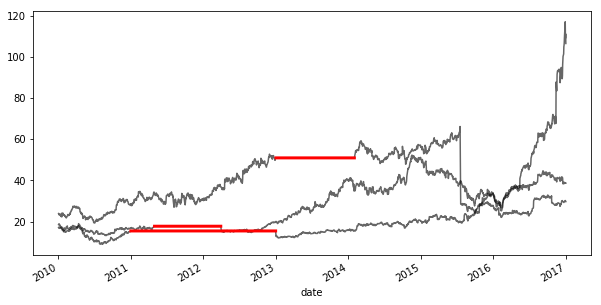

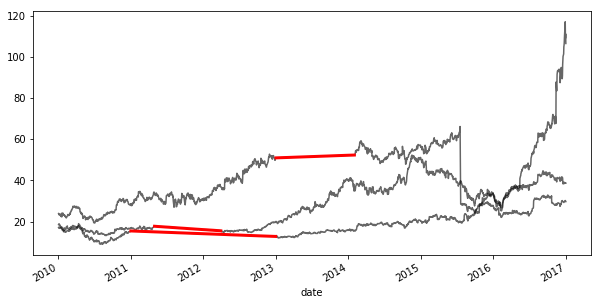

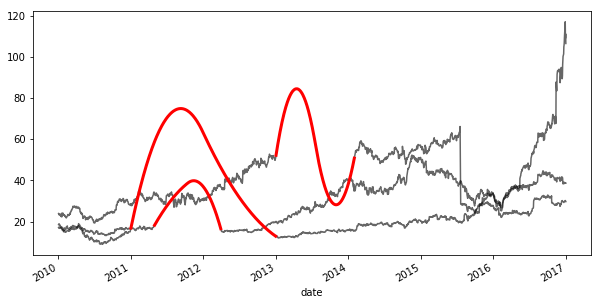

In [64]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for missing values
    missing_values = prices.isna()

    # Interpolate the missing values
    prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)
    
    # Now plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()
    
# Interpolate using the latest non-missing value
interpolation_type = 'zero'
interpolate_and_plot(prices, interpolation_type)

# Interpolate linearly
interpolation_type = 'linear'
interpolate_and_plot(prices, interpolation_type)

# Interpolate with a quadratic function
interpolation_type = 'quadratic'
interpolate_and_plot(prices, interpolation_type)

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


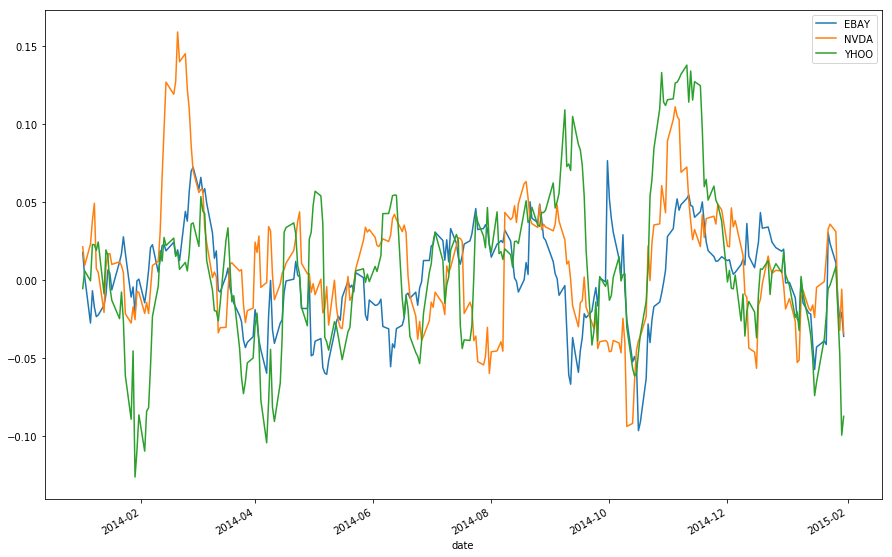

In [73]:
prices = all_prices[['EBAY', 'NVDA', 'YHOO']]

# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]

    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

# Apply your custom function and plot
prices_perc = prices.rolling(20).apply(percent_change)
prices_perc.loc["2014":"2015"].plot()
plt.show()

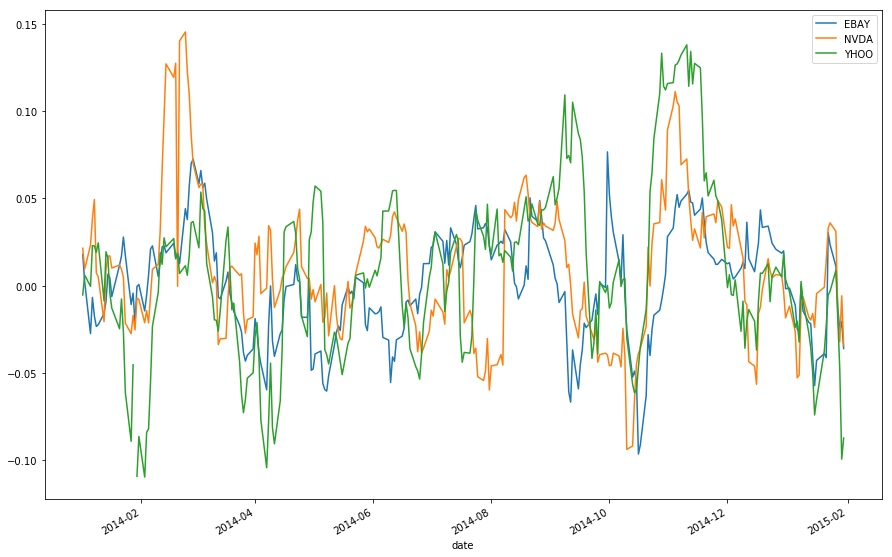

In [76]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing function to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot()
plt.show()

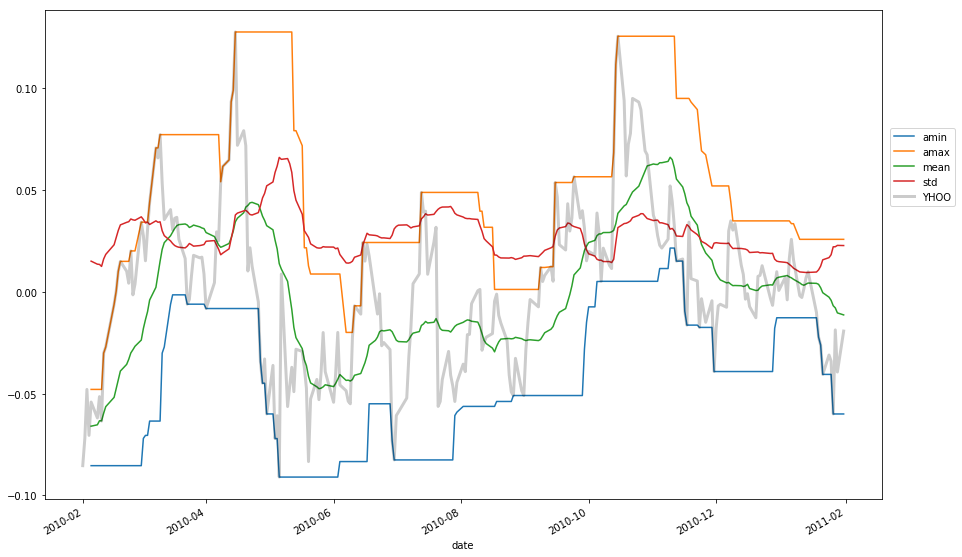

In [92]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = prices_perc['YHOO'].rolling(20, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = prices_perc_rolling.agg(features_to_calculate)

# Plot the results
ax = features.loc[:"2011-01"].plot()
prices_perc.loc[:"2011-01", 'YHOO'].plot(ax=ax, color='k', alpha=.2, lw=3)
ax.legend(loc=(1.01, .6))
plt.show()

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


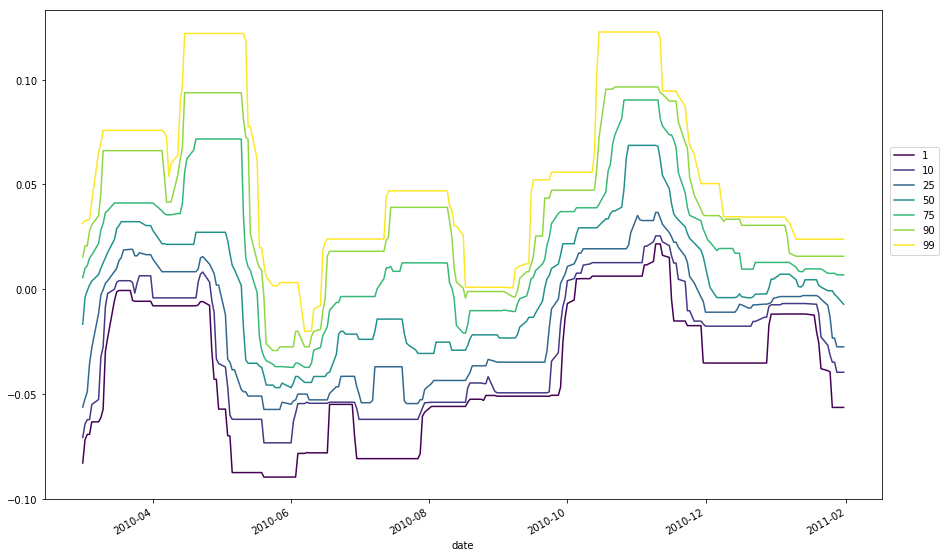

In [90]:
# Import partial from functools
from functools import partial
percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc['YHOO'].rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.agg(percentile_functions)

# Plot a subset of the result
ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis)
ax.legend(percentiles, loc=(1.01, .5))
plt.show()

In [99]:
# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.weekday
prices_perc['week_of_year'] = prices_perc.index.week
prices_perc['month_of_year'] = prices_perc.index.month

# Print prices_perc
print(prices_perc)

                EBAY      NVDA      YHOO  day_of_week  week_of_year  \
date                                                                  
2010-01-04       NaN       NaN       NaN            0             1   
2010-01-05       NaN       NaN       NaN            1             1   
2010-01-06       NaN       NaN       NaN            2             1   
2010-01-07       NaN       NaN       NaN            3             1   
2010-01-08       NaN       NaN       NaN            4             1   
2010-01-11       NaN       NaN       NaN            0             2   
2010-01-12       NaN       NaN       NaN            1             2   
2010-01-13       NaN       NaN       NaN            2             2   
2010-01-14       NaN       NaN       NaN            3             2   
2010-01-15       NaN       NaN       NaN            4             2   
2010-01-19       NaN       NaN       NaN            1             3   
2010-01-20       NaN       NaN       NaN            2             3   
2010-0